In [2]:
import os
import pickle
import numpy as np
from tqdm import tqdm

from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
import keras
from keras.models import load_model

In [3]:
base_dir  = 'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\\Flickr'


In [4]:
#import VGG16 model
model = VGG16()

#we wont be needing the last layer, hence we will take output of second last layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
#create a dictionary of image IDs and their features

features = {}
directory = os.path.join(base_dir, 'Images')

for img_name in tqdm(os.listdir(directory)):
    
    img_path = directory + '\\' + img_name
    
    image = load_img(img_path, target_size = (224,224))
    
    image = img_to_array(image)
    
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    image = preprocess_input(image)
    
    feature = model.predict(image)
    
    image_id = img_name.split('.')[0]
    
    features[image_id] = feature
    

  0%|                                                                                         | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 367ms/step


  0%|                                                                                 | 1/8091 [00:00<59:40,  2.26it/s]

1/1 [==============================] - 0s 422ms/step


  0%|                                                                               | 2/8091 [00:00<1:06:41,  2.02it/s]

1/1 [==============================] - 0s 390ms/step


  0%|                                                                               | 3/8091 [00:01<1:05:45,  2.05it/s]

1/1 [==============================] - 0s 406ms/step


  0%|                                                                               | 4/8091 [00:01<1:05:29,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


  0%|                                                                               | 5/8091 [00:02<1:03:45,  2.11it/s]

1/1 [==============================] - 0s 409ms/step


  0%|                                                                               | 6/8091 [00:02<1:04:04,  2.10it/s]

1/1 [==============================] - 0s 359ms/step


  0%|                                                                               | 7/8091 [00:03<1:02:53,  2.14it/s]

1/1 [==============================] - 0s 407ms/step


  0%|                                                                               | 8/8091 [00:03<1:03:36,  2.12it/s]

1/1 [==============================] - 0s 406ms/step


  0%|                                                                               | 9/8091 [00:04<1:04:07,  2.10it/s]

1/1 [==============================] - 0s 391ms/step


  0%|                                                                              | 10/8091 [00:04<1:03:58,  2.11it/s]

1/1 [==============================] - 0s 391ms/step


  0%|                                                                              | 11/8091 [00:05<1:03:08,  2.13it/s]

1/1 [==============================] - 0s 369ms/step


  0%|                                                                              | 12/8091 [00:05<1:02:14,  2.16it/s]

1/1 [==============================] - 0s 351ms/step


  0%|▏                                                                             | 13/8091 [00:06<1:01:09,  2.20it/s]

1/1 [==============================] - 0s 348ms/step


  0%|▏                                                                               | 14/8091 [00:06<59:57,  2.25it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▏                                                                               | 15/8091 [00:06<59:06,  2.28it/s]

1/1 [==============================] - 0s 352ms/step


  0%|▏                                                                               | 16/8091 [00:07<58:37,  2.30it/s]

1/1 [==============================] - 0s 381ms/step


  0%|▏                                                                               | 17/8091 [00:07<59:47,  2.25it/s]

1/1 [==============================] - 0s 375ms/step


  0%|▏                                                                             | 18/8091 [00:08<1:01:06,  2.20it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▏                                                                             | 19/8091 [00:08<1:00:30,  2.22it/s]

1/1 [==============================] - 0s 352ms/step


  0%|▏                                                                               | 20/8091 [00:09<59:56,  2.24it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▏                                                                             | 21/8091 [00:09<1:00:39,  2.22it/s]

1/1 [==============================] - 0s 360ms/step


  0%|▏                                                                             | 22/8091 [00:10<1:00:09,  2.24it/s]

1/1 [==============================] - 0s 382ms/step


  0%|▏                                                                             | 23/8091 [00:10<1:00:37,  2.22it/s]

1/1 [==============================] - 0s 375ms/step


  0%|▏                                                                             | 24/8091 [00:10<1:00:06,  2.24it/s]

1/1 [==============================] - 0s 391ms/step


  0%|▏                                                                             | 25/8091 [00:11<1:01:31,  2.19it/s]

1/1 [==============================] - 0s 363ms/step


  0%|▎                                                                             | 26/8091 [00:12<1:04:49,  2.07it/s]

1/1 [==============================] - 0s 391ms/step


  0%|▎                                                                             | 27/8091 [00:12<1:06:19,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


  0%|▎                                                                             | 28/8091 [00:13<1:10:15,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▎                                                                             | 29/8091 [00:13<1:08:20,  1.97it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▎                                                                             | 30/8091 [00:14<1:10:19,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▎                                                                             | 31/8091 [00:14<1:12:29,  1.85it/s]

1/1 [==============================] - 0s 375ms/step


  0%|▎                                                                             | 32/8091 [00:15<1:14:08,  1.81it/s]

1/1 [==============================] - 0s 406ms/step


  0%|▎                                                                             | 33/8091 [00:15<1:12:21,  1.86it/s]

1/1 [==============================] - 0s 391ms/step


  0%|▎                                                                             | 34/8091 [00:16<1:10:24,  1.91it/s]

1/1 [==============================] - 0s 437ms/step


  0%|▎                                                                             | 35/8091 [00:16<1:11:20,  1.88it/s]

1/1 [==============================] - 0s 375ms/step


  0%|▎                                                                             | 36/8091 [00:17<1:14:47,  1.80it/s]

1/1 [==============================] - 0s 375ms/step


  0%|▎                                                                             | 37/8091 [00:18<1:13:48,  1.82it/s]

1/1 [==============================] - 0s 359ms/step


  0%|▎                                                                             | 38/8091 [00:18<1:14:51,  1.79it/s]

1/1 [==============================] - 0s 375ms/step


  0%|▍                                                                             | 39/8091 [00:19<1:14:27,  1.80it/s]

1/1 [==============================] - 0s 344ms/step


  0%|▍                                                                             | 40/8091 [00:19<1:14:04,  1.81it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▍                                                                             | 41/8091 [00:20<1:12:41,  1.85it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▍                                                                             | 42/8091 [00:20<1:11:30,  1.88it/s]

1/1 [==============================] - 0s 406ms/step


  1%|▍                                                                             | 43/8091 [00:21<1:11:20,  1.88it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▍                                                                             | 44/8091 [00:21<1:10:06,  1.91it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▍                                                                             | 45/8091 [00:22<1:09:17,  1.94it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▍                                                                             | 46/8091 [00:22<1:10:31,  1.90it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▍                                                                             | 47/8091 [00:23<1:13:14,  1.83it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▍                                                                             | 48/8091 [00:23<1:13:47,  1.82it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▍                                                                             | 49/8091 [00:24<1:12:08,  1.86it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▍                                                                             | 50/8091 [00:24<1:08:25,  1.96it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▍                                                                             | 51/8091 [00:25<1:07:19,  1.99it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▌                                                                             | 52/8091 [00:25<1:07:46,  1.98it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▌                                                                             | 53/8091 [00:26<1:06:47,  2.01it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▌                                                                             | 54/8091 [00:27<1:13:12,  1.83it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▌                                                                             | 55/8091 [00:27<1:11:18,  1.88it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▌                                                                             | 56/8091 [00:28<1:10:52,  1.89it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▌                                                                             | 57/8091 [00:28<1:08:17,  1.96it/s]

1/1 [==============================] - 0s 365ms/step


  1%|▌                                                                             | 58/8091 [00:28<1:06:43,  2.01it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▌                                                                             | 59/8091 [00:29<1:05:13,  2.05it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▌                                                                             | 60/8091 [00:30<1:07:36,  1.98it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▌                                                                             | 61/8091 [00:30<1:05:41,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▌                                                                             | 62/8091 [00:30<1:05:40,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▌                                                                             | 63/8091 [00:31<1:06:54,  2.00it/s]

1/1 [==============================] - 0s 328ms/step


  1%|▌                                                                             | 64/8091 [00:32<1:08:13,  1.96it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▋                                                                             | 65/8091 [00:32<1:06:16,  2.02it/s]

1/1 [==============================] - 0s 329ms/step


  1%|▋                                                                             | 66/8091 [00:32<1:03:24,  2.11it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▋                                                                             | 67/8091 [00:33<1:05:57,  2.03it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▋                                                                             | 68/8091 [00:33<1:05:16,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▋                                                                             | 69/8091 [00:34<1:03:16,  2.11it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▋                                                                             | 70/8091 [00:34<1:02:24,  2.14it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▋                                                                             | 71/8091 [00:35<1:06:43,  2.00it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▋                                                                             | 72/8091 [00:35<1:08:56,  1.94it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▋                                                                             | 73/8091 [00:36<1:08:24,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▋                                                                             | 74/8091 [00:36<1:05:37,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▋                                                                             | 75/8091 [00:37<1:05:21,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▋                                                                             | 76/8091 [00:37<1:04:21,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▋                                                                             | 77/8091 [00:38<1:03:47,  2.09it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▊                                                                             | 78/8091 [00:38<1:05:18,  2.04it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▊                                                                             | 79/8091 [00:39<1:05:29,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▊                                                                             | 80/8091 [00:39<1:04:18,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▊                                                                             | 81/8091 [00:40<1:02:17,  2.14it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▊                                                                             | 82/8091 [00:40<1:03:04,  2.12it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▊                                                                             | 83/8091 [00:41<1:05:33,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▊                                                                             | 84/8091 [00:41<1:09:19,  1.92it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▊                                                                             | 85/8091 [00:42<1:07:07,  1.99it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▊                                                                             | 86/8091 [00:42<1:05:03,  2.05it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▊                                                                             | 87/8091 [00:43<1:03:37,  2.10it/s]

1/1 [==============================] - 0s 406ms/step


  1%|▊                                                                             | 88/8091 [00:43<1:04:21,  2.07it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▊                                                                             | 89/8091 [00:44<1:05:45,  2.03it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▊                                                                             | 90/8091 [00:44<1:04:56,  2.05it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▉                                                                             | 91/8091 [00:45<1:06:19,  2.01it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▉                                                                             | 92/8091 [00:45<1:04:31,  2.07it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▉                                                                             | 93/8091 [00:46<1:12:11,  1.85it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▉                                                                             | 94/8091 [00:47<1:30:41,  1.47it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▉                                                                             | 95/8091 [00:47<1:20:42,  1.65it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▉                                                                             | 96/8091 [00:48<1:15:38,  1.76it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▉                                                                             | 97/8091 [00:48<1:11:09,  1.87it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▉                                                                             | 98/8091 [00:49<1:08:44,  1.94it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▉                                                                             | 99/8091 [00:49<1:07:46,  1.97it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▉                                                                            | 100/8091 [00:50<1:07:35,  1.97it/s]

1/1 [==============================] - 0s 328ms/step


  1%|▉                                                                            | 101/8091 [00:50<1:05:18,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


  1%|▉                                                                            | 102/8091 [00:51<1:06:34,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▉                                                                            | 103/8091 [00:51<1:05:08,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  1%|▉                                                                            | 104/8091 [00:52<1:07:57,  1.96it/s]

1/1 [==============================] - 0s 344ms/step


  1%|▉                                                                            | 105/8091 [00:52<1:08:07,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


  1%|█                                                                            | 106/8091 [00:53<1:06:56,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


  1%|█                                                                            | 107/8091 [00:53<1:10:31,  1.89it/s]

1/1 [==============================] - 0s 344ms/step


  1%|█                                                                            | 108/8091 [00:54<1:06:52,  1.99it/s]

1/1 [==============================] - 0s 359ms/step


  1%|█                                                                            | 109/8091 [00:54<1:04:00,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


  1%|█                                                                            | 110/8091 [00:55<1:07:54,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


  1%|█                                                                            | 111/8091 [00:55<1:17:13,  1.72it/s]

1/1 [==============================] - 0s 344ms/step


  1%|█                                                                            | 112/8091 [00:56<1:17:32,  1.72it/s]

1/1 [==============================] - 0s 344ms/step


  1%|█                                                                            | 113/8091 [00:57<1:18:17,  1.70it/s]

1/1 [==============================] - 0s 359ms/step


  1%|█                                                                            | 114/8091 [00:57<1:27:46,  1.51it/s]

1/1 [==============================] - 0s 359ms/step


  1%|█                                                                            | 115/8091 [00:58<1:19:47,  1.67it/s]

1/1 [==============================] - 0s 375ms/step


  1%|█                                                                            | 116/8091 [00:59<1:32:42,  1.43it/s]

1/1 [==============================] - 0s 375ms/step


  1%|█                                                                            | 117/8091 [01:00<1:32:58,  1.43it/s]

1/1 [==============================] - 0s 422ms/step


  1%|█                                                                            | 118/8091 [01:00<1:39:50,  1.33it/s]

1/1 [==============================] - 0s 406ms/step


  1%|█▏                                                                           | 119/8091 [01:02<2:05:17,  1.06it/s]

1/1 [==============================] - 0s 391ms/step


  1%|█▏                                                                           | 120/8091 [01:03<2:11:52,  1.01it/s]

1/1 [==============================] - 0s 449ms/step


  1%|█▏                                                                           | 121/8091 [01:04<2:33:24,  1.15s/it]

1/1 [==============================] - 0s 422ms/step


  2%|█▏                                                                           | 122/8091 [01:05<2:11:06,  1.01it/s]

1/1 [==============================] - 0s 406ms/step


  2%|█▏                                                                           | 123/8091 [01:06<2:07:19,  1.04it/s]

1/1 [==============================] - 0s 453ms/step


  2%|█▏                                                                           | 124/8091 [01:07<2:13:34,  1.01s/it]

1/1 [==============================] - 0s 401ms/step


  2%|█▏                                                                           | 125/8091 [01:08<1:59:28,  1.11it/s]

1/1 [==============================] - 0s 380ms/step


  2%|█▏                                                                           | 126/8091 [01:09<2:14:08,  1.01s/it]

1/1 [==============================] - 0s 432ms/step


  2%|█▏                                                                           | 127/8091 [01:10<2:06:33,  1.05it/s]

1/1 [==============================] - 0s 384ms/step


  2%|█▏                                                                           | 128/8091 [01:11<2:11:17,  1.01it/s]

1/1 [==============================] - 0s 412ms/step


  2%|█▏                                                                           | 129/8091 [01:12<2:01:38,  1.09it/s]

1/1 [==============================] - 0s 440ms/step


  2%|█▏                                                                           | 130/8091 [01:12<1:52:27,  1.18it/s]

1/1 [==============================] - 0s 437ms/step


  2%|█▏                                                                           | 131/8091 [01:13<1:56:32,  1.14it/s]

1/1 [==============================] - 0s 432ms/step


  2%|█▎                                                                           | 132/8091 [01:14<1:43:53,  1.28it/s]

1/1 [==============================] - 0s 420ms/step


  2%|█▎                                                                           | 133/8091 [01:14<1:34:19,  1.41it/s]

1/1 [==============================] - 0s 412ms/step


  2%|█▎                                                                           | 134/8091 [01:15<1:27:51,  1.51it/s]

1/1 [==============================] - 0s 404ms/step


  2%|█▎                                                                           | 135/8091 [01:15<1:25:34,  1.55it/s]

1/1 [==============================] - 0s 432ms/step


  2%|█▎                                                                           | 136/8091 [01:16<1:22:01,  1.62it/s]

1/1 [==============================] - 0s 408ms/step


  2%|█▎                                                                           | 137/8091 [01:17<1:41:16,  1.31it/s]

1/1 [==============================] - 0s 412ms/step


  2%|█▎                                                                           | 138/8091 [01:18<1:31:05,  1.46it/s]

1/1 [==============================] - 0s 400ms/step


  2%|█▎                                                                           | 139/8091 [01:21<3:03:39,  1.39s/it]

1/1 [==============================] - 0s 380ms/step


  2%|█▎                                                                           | 140/8091 [01:21<2:31:39,  1.14s/it]

1/1 [==============================] - 0s 359ms/step


  2%|█▎                                                                           | 141/8091 [01:22<2:04:31,  1.06it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▎                                                                           | 142/8091 [01:22<1:45:51,  1.25it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▎                                                                           | 143/8091 [01:23<1:35:16,  1.39it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▎                                                                           | 144/8091 [01:23<1:27:12,  1.52it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▍                                                                           | 145/8091 [01:24<1:19:35,  1.66it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▍                                                                           | 146/8091 [01:24<1:13:31,  1.80it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▍                                                                           | 147/8091 [01:25<1:11:24,  1.85it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▍                                                                           | 148/8091 [01:25<1:19:15,  1.67it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▍                                                                           | 149/8091 [01:26<1:14:42,  1.77it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▍                                                                           | 150/8091 [01:26<1:15:19,  1.76it/s]

1/1 [==============================] - 0s 371ms/step


  2%|█▍                                                                           | 151/8091 [01:27<1:14:23,  1.78it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▍                                                                           | 152/8091 [01:28<1:12:26,  1.83it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▍                                                                           | 153/8091 [01:28<1:09:05,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▍                                                                           | 154/8091 [01:28<1:05:47,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▍                                                                           | 155/8091 [01:29<1:05:06,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▍                                                                           | 156/8091 [01:29<1:02:21,  2.12it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▍                                                                           | 157/8091 [01:30<1:05:19,  2.02it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 158/8091 [01:30<1:04:51,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▌                                                                           | 159/8091 [01:31<1:06:23,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 160/8091 [01:31<1:04:45,  2.04it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 161/8091 [01:32<1:04:51,  2.04it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 162/8091 [01:32<1:07:42,  1.95it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 163/8091 [01:33<1:06:25,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 164/8091 [01:33<1:03:58,  2.07it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▌                                                                           | 165/8091 [01:34<1:05:12,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 166/8091 [01:34<1:07:44,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▌                                                                           | 167/8091 [01:35<1:06:53,  1.97it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 168/8091 [01:35<1:06:19,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 169/8091 [01:36<1:07:05,  1.97it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▌                                                                           | 170/8091 [01:36<1:05:44,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▋                                                                           | 171/8091 [01:37<1:03:49,  2.07it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▋                                                                           | 172/8091 [01:37<1:03:43,  2.07it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▋                                                                           | 173/8091 [01:38<1:04:13,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▋                                                                           | 174/8091 [01:38<1:03:45,  2.07it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▋                                                                           | 175/8091 [01:39<1:04:13,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▋                                                                           | 176/8091 [01:39<1:06:57,  1.97it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▋                                                                           | 177/8091 [01:40<1:07:36,  1.95it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▋                                                                           | 178/8091 [01:40<1:07:50,  1.94it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▋                                                                           | 179/8091 [01:41<1:10:16,  1.88it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▋                                                                           | 180/8091 [01:41<1:06:14,  1.99it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▋                                                                           | 181/8091 [01:42<1:04:23,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▋                                                                           | 182/8091 [01:42<1:08:16,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▋                                                                           | 183/8091 [01:43<1:12:34,  1.82it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▊                                                                           | 184/8091 [01:44<1:09:24,  1.90it/s]

1/1 [==============================] - 0s 374ms/step


  2%|█▊                                                                           | 185/8091 [01:44<1:10:31,  1.87it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▊                                                                           | 186/8091 [01:45<1:06:24,  1.98it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▊                                                                           | 187/8091 [01:45<1:05:05,  2.02it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▊                                                                           | 188/8091 [01:45<1:04:17,  2.05it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▊                                                                           | 189/8091 [01:46<1:03:58,  2.06it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▊                                                                           | 190/8091 [01:46<1:02:10,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▊                                                                           | 191/8091 [01:47<1:04:24,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▊                                                                           | 192/8091 [01:47<1:05:14,  2.02it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▊                                                                           | 193/8091 [01:48<1:06:08,  1.99it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▊                                                                           | 194/8091 [01:48<1:05:55,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▊                                                                           | 195/8091 [01:49<1:12:53,  1.81it/s]

1/1 [==============================] - 0s 406ms/step


  2%|█▊                                                                           | 196/8091 [01:50<1:09:50,  1.88it/s]

1/1 [==============================] - 0s 359ms/step


  2%|█▊                                                                           | 197/8091 [01:50<1:06:50,  1.97it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▉                                                                           | 198/8091 [01:51<1:06:07,  1.99it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▉                                                                           | 199/8091 [01:51<1:06:04,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▉                                                                           | 200/8091 [01:52<1:08:47,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


  2%|█▉                                                                           | 201/8091 [01:52<1:06:01,  1.99it/s]

1/1 [==============================] - 0s 375ms/step


  2%|█▉                                                                           | 202/8091 [01:53<1:08:38,  1.92it/s]

1/1 [==============================] - 0s 359ms/step


  3%|█▉                                                                           | 203/8091 [01:53<1:05:28,  2.01it/s]

1/1 [==============================] - 0s 328ms/step


  3%|█▉                                                                           | 204/8091 [01:54<1:05:10,  2.02it/s]

1/1 [==============================] - 0s 359ms/step


  3%|█▉                                                                           | 205/8091 [01:54<1:07:50,  1.94it/s]

1/1 [==============================] - 0s 344ms/step


  3%|█▉                                                                           | 206/8091 [01:55<1:10:47,  1.86it/s]

1/1 [==============================] - 0s 359ms/step


  3%|█▉                                                                           | 207/8091 [01:55<1:12:16,  1.82it/s]

1/1 [==============================] - 0s 359ms/step


  3%|█▉                                                                           | 208/8091 [01:56<1:09:59,  1.88it/s]

1/1 [==============================] - 0s 359ms/step


  3%|█▉                                                                           | 209/8091 [01:56<1:06:56,  1.96it/s]

1/1 [==============================] - 0s 344ms/step


  3%|█▉                                                                           | 210/8091 [01:57<1:05:21,  2.01it/s]

1/1 [==============================] - 0s 370ms/step


  3%|██                                                                           | 211/8091 [01:57<1:05:22,  2.01it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██                                                                           | 212/8091 [01:58<1:07:49,  1.94it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██                                                                           | 213/8091 [01:58<1:13:24,  1.79it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██                                                                           | 214/8091 [01:59<1:09:29,  1.89it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██                                                                           | 215/8091 [01:59<1:08:15,  1.92it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██                                                                           | 216/8091 [02:00<1:07:30,  1.94it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██                                                                           | 217/8091 [02:00<1:07:04,  1.96it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██                                                                           | 218/8091 [02:01<1:07:49,  1.93it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██                                                                           | 219/8091 [02:01<1:08:36,  1.91it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██                                                                           | 220/8091 [02:02<1:09:04,  1.90it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██                                                                           | 221/8091 [02:03<1:13:57,  1.77it/s]

1/1 [==============================] - 0s 439ms/step


  3%|██                                                                           | 222/8091 [02:03<1:16:14,  1.72it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██                                                                           | 223/8091 [02:04<1:18:27,  1.67it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▏                                                                          | 224/8091 [02:04<1:14:15,  1.77it/s]

1/1 [==============================] - 0s 328ms/step


  3%|██▏                                                                          | 225/8091 [02:05<1:10:33,  1.86it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▏                                                                          | 226/8091 [02:05<1:08:44,  1.91it/s]

1/1 [==============================] - 0s 328ms/step


  3%|██▏                                                                          | 227/8091 [02:06<1:12:45,  1.80it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▏                                                                          | 228/8091 [02:06<1:10:05,  1.87it/s]

1/1 [==============================] - 0s 348ms/step


  3%|██▏                                                                          | 229/8091 [02:07<1:10:50,  1.85it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▏                                                                          | 230/8091 [02:07<1:08:10,  1.92it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▏                                                                          | 231/8091 [02:08<1:07:10,  1.95it/s]

1/1 [==============================] - 0s 328ms/step


  3%|██▏                                                                          | 232/8091 [02:08<1:05:15,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▏                                                                          | 233/8091 [02:09<1:04:17,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▏                                                                          | 234/8091 [02:10<1:08:09,  1.92it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▏                                                                          | 235/8091 [02:10<1:09:30,  1.88it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▏                                                                          | 236/8091 [02:11<1:08:00,  1.92it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▎                                                                          | 237/8091 [02:11<1:07:36,  1.94it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▎                                                                          | 238/8091 [02:12<1:05:33,  2.00it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▎                                                                          | 239/8091 [02:12<1:06:57,  1.95it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▎                                                                          | 240/8091 [02:13<1:08:12,  1.92it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▎                                                                          | 241/8091 [02:13<1:07:07,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▎                                                                          | 242/8091 [02:14<1:19:15,  1.65it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▎                                                                          | 243/8091 [02:15<1:26:16,  1.52it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▎                                                                          | 244/8091 [02:15<1:18:39,  1.66it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██▎                                                                          | 245/8091 [02:16<1:21:21,  1.61it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▎                                                                          | 246/8091 [02:16<1:21:04,  1.61it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▎                                                                          | 247/8091 [02:17<1:17:50,  1.68it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▎                                                                          | 248/8091 [02:18<1:13:46,  1.77it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██▎                                                                          | 249/8091 [02:18<1:13:48,  1.77it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▍                                                                          | 250/8091 [02:19<1:14:39,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


  3%|██▍                                                                          | 251/8091 [02:19<1:15:26,  1.73it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▍                                                                          | 252/8091 [02:20<1:13:16,  1.78it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▍                                                                          | 253/8091 [02:20<1:16:00,  1.72it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▍                                                                          | 254/8091 [02:21<1:18:20,  1.67it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▍                                                                          | 255/8091 [02:22<1:38:33,  1.33it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▍                                                                          | 256/8091 [02:23<1:32:25,  1.41it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▍                                                                          | 257/8091 [02:23<1:25:15,  1.53it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██▍                                                                          | 258/8091 [02:24<1:20:43,  1.62it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██▍                                                                          | 259/8091 [02:24<1:18:26,  1.66it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▍                                                                          | 260/8091 [02:25<1:15:32,  1.73it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▍                                                                          | 261/8091 [02:26<1:16:09,  1.71it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██▍                                                                          | 262/8091 [02:26<1:18:19,  1.67it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 263/8091 [02:27<1:17:19,  1.69it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 264/8091 [02:28<1:25:06,  1.53it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▌                                                                          | 265/8091 [02:28<1:21:56,  1.59it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 266/8091 [02:29<1:15:20,  1.73it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 267/8091 [02:29<1:14:48,  1.74it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▌                                                                          | 268/8091 [02:30<1:16:09,  1.71it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▌                                                                          | 269/8091 [02:30<1:19:41,  1.64it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▌                                                                          | 270/8091 [02:31<1:15:28,  1.73it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 271/8091 [02:32<1:16:58,  1.69it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 272/8091 [02:32<1:14:05,  1.76it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▌                                                                          | 273/8091 [02:33<1:10:52,  1.84it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▌                                                                          | 274/8091 [02:33<1:12:51,  1.79it/s]

1/1 [==============================] - 0s 344ms/step


  3%|██▌                                                                          | 275/8091 [02:34<1:29:36,  1.45it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▋                                                                          | 276/8091 [02:35<1:43:43,  1.26it/s]

1/1 [==============================] - 0s 359ms/step


  3%|██▋                                                                          | 277/8091 [02:36<1:35:01,  1.37it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▋                                                                          | 278/8091 [02:36<1:25:27,  1.52it/s]

1/1 [==============================] - 0s 406ms/step


  3%|██▋                                                                          | 279/8091 [02:37<1:22:42,  1.57it/s]

1/1 [==============================] - 0s 422ms/step


  3%|██▋                                                                          | 280/8091 [02:37<1:18:30,  1.66it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▋                                                                          | 281/8091 [02:38<1:17:49,  1.67it/s]

1/1 [==============================] - 0s 391ms/step


  3%|██▋                                                                          | 282/8091 [02:38<1:15:14,  1.73it/s]

1/1 [==============================] - 0s 375ms/step


  3%|██▋                                                                          | 283/8091 [02:39<1:14:18,  1.75it/s]

1/1 [==============================] - 0s 422ms/step


  4%|██▋                                                                          | 284/8091 [02:40<1:17:41,  1.67it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▋                                                                          | 285/8091 [02:40<1:18:46,  1.65it/s]

1/1 [==============================] - 0s 391ms/step


  4%|██▋                                                                          | 286/8091 [02:41<1:22:49,  1.57it/s]

1/1 [==============================] - 0s 391ms/step


  4%|██▋                                                                          | 287/8091 [02:42<1:21:39,  1.59it/s]

1/1 [==============================] - 0s 406ms/step


  4%|██▋                                                                          | 288/8091 [02:42<1:17:21,  1.68it/s]

1/1 [==============================] - 0s 359ms/step


  4%|██▊                                                                          | 289/8091 [02:43<1:12:16,  1.80it/s]

1/1 [==============================] - 0s 406ms/step


  4%|██▊                                                                          | 290/8091 [02:43<1:12:20,  1.80it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▊                                                                          | 291/8091 [02:44<1:18:40,  1.65it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▊                                                                          | 292/8091 [02:44<1:13:17,  1.77it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▊                                                                          | 293/8091 [02:45<1:15:08,  1.73it/s]

1/1 [==============================] - 0s 391ms/step


  4%|██▊                                                                          | 294/8091 [02:45<1:11:55,  1.81it/s]

1/1 [==============================] - 0s 359ms/step


  4%|██▊                                                                          | 295/8091 [02:46<1:11:27,  1.82it/s]

1/1 [==============================] - 0s 359ms/step


  4%|██▊                                                                          | 296/8091 [02:47<1:11:17,  1.82it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▊                                                                          | 297/8091 [02:47<1:08:54,  1.88it/s]

1/1 [==============================] - 0s 348ms/step


  4%|██▊                                                                          | 298/8091 [02:47<1:06:00,  1.97it/s]

1/1 [==============================] - 0s 391ms/step


  4%|██▊                                                                          | 299/8091 [02:48<1:11:25,  1.82it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▊                                                                          | 300/8091 [02:49<1:09:51,  1.86it/s]

1/1 [==============================] - 0s 404ms/step


  4%|██▊                                                                          | 301/8091 [02:49<1:14:05,  1.75it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▊                                                                          | 302/8091 [02:50<1:13:23,  1.77it/s]

1/1 [==============================] - 0s 391ms/step


  4%|██▉                                                                          | 303/8091 [02:50<1:17:06,  1.68it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▉                                                                          | 304/8091 [02:51<1:12:57,  1.78it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▉                                                                          | 305/8091 [02:51<1:11:44,  1.81it/s]

1/1 [==============================] - 0s 391ms/step


  4%|██▉                                                                          | 306/8091 [02:52<1:11:14,  1.82it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▉                                                                          | 307/8091 [02:53<1:12:12,  1.80it/s]

1/1 [==============================] - 0s 359ms/step


  4%|██▉                                                                          | 308/8091 [02:53<1:19:34,  1.63it/s]

1/1 [==============================] - 0s 359ms/step


  4%|██▉                                                                          | 309/8091 [02:54<1:16:10,  1.70it/s]

1/1 [==============================] - 0s 375ms/step


  4%|██▉                                                                          | 310/8091 [02:55<1:18:06,  1.66it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▉                                                                          | 311/8091 [02:55<1:11:31,  1.81it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▉                                                                          | 312/8091 [02:56<1:13:08,  1.77it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▉                                                                          | 313/8091 [02:56<1:10:50,  1.83it/s]

1/1 [==============================] - 0s 328ms/step


  4%|██▉                                                                          | 314/8091 [02:57<1:07:59,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


  4%|██▉                                                                          | 315/8091 [02:57<1:10:18,  1.84it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███                                                                          | 316/8091 [02:58<1:10:56,  1.83it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███                                                                          | 317/8091 [02:58<1:07:49,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███                                                                          | 318/8091 [02:59<1:05:18,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███                                                                          | 319/8091 [02:59<1:10:16,  1.84it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███                                                                          | 320/8091 [03:00<1:18:27,  1.65it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███                                                                          | 321/8091 [03:01<1:18:55,  1.64it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███                                                                          | 322/8091 [03:01<1:25:30,  1.51it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███                                                                          | 323/8091 [03:02<1:25:59,  1.51it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███                                                                          | 324/8091 [03:03<1:18:23,  1.65it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███                                                                          | 325/8091 [03:03<1:14:17,  1.74it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███                                                                          | 326/8091 [03:04<1:11:11,  1.82it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███                                                                          | 327/8091 [03:04<1:07:52,  1.91it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███                                                                          | 328/8091 [03:04<1:05:55,  1.96it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███▏                                                                         | 329/8091 [03:05<1:02:38,  2.07it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▏                                                                         | 330/8091 [03:05<1:01:28,  2.10it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███▏                                                                         | 331/8091 [03:06<1:02:46,  2.06it/s]

1/1 [==============================] - 0s 422ms/step


  4%|███▏                                                                         | 332/8091 [03:06<1:05:34,  1.97it/s]

1/1 [==============================] - 0s 406ms/step


  4%|███▏                                                                         | 333/8091 [03:07<1:06:07,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▏                                                                         | 334/8091 [03:07<1:04:28,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▏                                                                         | 335/8091 [03:08<1:03:31,  2.03it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▏                                                                         | 336/8091 [03:08<1:05:36,  1.97it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███▏                                                                         | 337/8091 [03:09<1:06:07,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▏                                                                         | 338/8091 [03:09<1:05:48,  1.96it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███▏                                                                         | 339/8091 [03:10<1:09:16,  1.87it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▏                                                                         | 340/8091 [03:11<1:08:34,  1.88it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███▏                                                                         | 341/8091 [03:11<1:11:08,  1.82it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▎                                                                         | 342/8091 [03:12<1:09:12,  1.87it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▎                                                                         | 343/8091 [03:12<1:08:01,  1.90it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▎                                                                         | 344/8091 [03:13<1:08:52,  1.87it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███▎                                                                         | 345/8091 [03:13<1:10:44,  1.82it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▎                                                                         | 346/8091 [03:14<1:10:46,  1.82it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▎                                                                         | 347/8091 [03:14<1:10:56,  1.82it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▎                                                                         | 348/8091 [03:15<1:08:35,  1.88it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▎                                                                         | 349/8091 [03:15<1:08:19,  1.89it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███▎                                                                         | 350/8091 [03:16<1:08:27,  1.88it/s]

1/1 [==============================] - 0s 406ms/step


  4%|███▎                                                                         | 351/8091 [03:17<1:18:06,  1.65it/s]

1/1 [==============================] - 0s 391ms/step


  4%|███▎                                                                         | 352/8091 [03:17<1:13:37,  1.75it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▎                                                                         | 353/8091 [03:18<1:14:32,  1.73it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▎                                                                         | 354/8091 [03:18<1:10:54,  1.82it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▍                                                                         | 355/8091 [03:19<1:13:33,  1.75it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███▍                                                                         | 356/8091 [03:19<1:10:19,  1.83it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▍                                                                         | 357/8091 [03:20<1:07:38,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


  4%|███▍                                                                         | 358/8091 [03:20<1:06:50,  1.93it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▍                                                                         | 359/8091 [03:21<1:06:33,  1.94it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▍                                                                         | 360/8091 [03:21<1:04:14,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


  4%|███▍                                                                         | 361/8091 [03:22<1:07:34,  1.91it/s]

1/1 [==============================] - 0s 387ms/step


  4%|███▍                                                                         | 362/8091 [03:22<1:06:49,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


  4%|███▍                                                                         | 363/8091 [03:23<1:12:28,  1.78it/s]

1/1 [==============================] - 0s 406ms/step


  4%|███▍                                                                         | 364/8091 [03:24<1:11:20,  1.81it/s]

1/1 [==============================] - 0s 406ms/step


  5%|███▍                                                                         | 365/8091 [03:25<1:46:49,  1.21it/s]

1/1 [==============================] - 0s 380ms/step


  5%|███▍                                                                         | 366/8091 [03:27<2:23:06,  1.11s/it]

1/1 [==============================] - 0s 359ms/step


  5%|███▍                                                                         | 367/8091 [03:27<1:58:12,  1.09it/s]

1/1 [==============================] - 0s 375ms/step


  5%|███▌                                                                         | 368/8091 [03:28<1:45:49,  1.22it/s]

1/1 [==============================] - 0s 391ms/step


  5%|███▌                                                                         | 369/8091 [03:29<1:40:52,  1.28it/s]

1/1 [==============================] - 0s 375ms/step


  5%|███▌                                                                         | 370/8091 [03:29<1:33:06,  1.38it/s]

1/1 [==============================] - 0s 391ms/step


  5%|███▌                                                                         | 371/8091 [03:30<1:24:27,  1.52it/s]

1/1 [==============================] - 0s 391ms/step


  5%|███▌                                                                         | 372/8091 [03:30<1:24:42,  1.52it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▌                                                                         | 373/8091 [03:31<1:24:42,  1.52it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▌                                                                         | 374/8091 [03:31<1:16:40,  1.68it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▌                                                                         | 375/8091 [03:32<1:14:32,  1.73it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▌                                                                         | 376/8091 [03:32<1:09:00,  1.86it/s]

1/1 [==============================] - 0s 375ms/step


  5%|███▌                                                                         | 377/8091 [03:33<1:07:20,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


  5%|███▌                                                                         | 378/8091 [03:33<1:06:30,  1.93it/s]

1/1 [==============================] - 0s 432ms/step


  5%|███▌                                                                         | 379/8091 [03:34<1:12:10,  1.78it/s]

1/1 [==============================] - 1s 501ms/step


  5%|███▌                                                                         | 380/8091 [03:35<1:16:30,  1.68it/s]

1/1 [==============================] - 0s 451ms/step


  5%|███▋                                                                         | 381/8091 [03:35<1:16:26,  1.68it/s]

1/1 [==============================] - 0s 447ms/step


  5%|███▋                                                                         | 382/8091 [03:36<1:13:52,  1.74it/s]

1/1 [==============================] - 0s 353ms/step


  5%|███▋                                                                         | 383/8091 [03:37<1:15:03,  1.71it/s]

1/1 [==============================] - 0s 399ms/step


  5%|███▋                                                                         | 384/8091 [03:37<1:11:14,  1.80it/s]

1/1 [==============================] - 0s 390ms/step


  5%|███▋                                                                         | 385/8091 [03:37<1:08:43,  1.87it/s]

1/1 [==============================] - 0s 454ms/step


  5%|███▋                                                                         | 386/8091 [03:38<1:10:50,  1.81it/s]

1/1 [==============================] - 0s 381ms/step


  5%|███▋                                                                         | 387/8091 [03:39<1:14:02,  1.73it/s]

1/1 [==============================] - 0s 369ms/step


  5%|███▋                                                                         | 388/8091 [03:39<1:10:08,  1.83it/s]

1/1 [==============================] - 0s 375ms/step


  5%|███▋                                                                         | 389/8091 [03:40<1:06:37,  1.93it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▋                                                                         | 390/8091 [03:40<1:03:33,  2.02it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▋                                                                         | 391/8091 [03:41<1:01:18,  2.09it/s]

1/1 [==============================] - 0s 366ms/step


  5%|███▋                                                                         | 392/8091 [03:41<1:00:17,  2.13it/s]

1/1 [==============================] - 0s 398ms/step


  5%|███▋                                                                         | 393/8091 [03:41<1:00:44,  2.11it/s]

1/1 [==============================] - 0s 443ms/step


  5%|███▋                                                                         | 394/8091 [03:42<1:04:55,  1.98it/s]

1/1 [==============================] - 0s 415ms/step


  5%|███▊                                                                         | 395/8091 [03:43<1:08:42,  1.87it/s]

1/1 [==============================] - 0s 393ms/step


  5%|███▊                                                                         | 396/8091 [03:43<1:11:45,  1.79it/s]

1/1 [==============================] - 0s 411ms/step


  5%|███▊                                                                         | 397/8091 [03:44<1:14:12,  1.73it/s]

1/1 [==============================] - 0s 450ms/step


  5%|███▊                                                                         | 398/8091 [03:44<1:14:12,  1.73it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▊                                                                         | 399/8091 [03:45<1:16:03,  1.69it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▊                                                                         | 400/8091 [03:46<1:12:34,  1.77it/s]

1/1 [==============================] - 0s 344ms/step


  5%|███▊                                                                         | 401/8091 [03:46<1:07:07,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


  5%|███▊                                                                         | 402/8091 [03:46<1:03:45,  2.01it/s]

1/1 [==============================] - 0s 350ms/step


  5%|███▊                                                                         | 403/8091 [03:47<1:04:50,  1.98it/s]

1/1 [==============================] - 0s 374ms/step


  5%|███▊                                                                         | 404/8091 [03:47<1:04:04,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


  5%|███▊                                                                         | 405/8091 [03:48<1:06:57,  1.91it/s]

1/1 [==============================] - 1s 549ms/step


  5%|███▊                                                                         | 406/8091 [03:49<1:15:12,  1.70it/s]

1/1 [==============================] - 1s 506ms/step


  5%|███▊                                                                         | 407/8091 [03:49<1:18:00,  1.64it/s]

1/1 [==============================] - 1s 555ms/step


  5%|███▉                                                                         | 408/8091 [03:50<1:28:01,  1.45it/s]

1/1 [==============================] - 0s 389ms/step


  5%|███▉                                                                         | 409/8091 [03:51<1:42:01,  1.25it/s]

1/1 [==============================] - 0s 405ms/step


  5%|███▉                                                                         | 410/8091 [03:52<1:33:04,  1.38it/s]

1/1 [==============================] - 0s 453ms/step


  5%|███▉                                                                         | 411/8091 [03:53<1:30:50,  1.41it/s]

1/1 [==============================] - 0s 462ms/step


  5%|███▉                                                                         | 412/8091 [03:53<1:27:47,  1.46it/s]

1/1 [==============================] - 0s 392ms/step


  5%|███▉                                                                         | 413/8091 [03:54<1:19:57,  1.60it/s]

1/1 [==============================] - 0s 399ms/step


  5%|███▉                                                                         | 414/8091 [03:54<1:15:14,  1.70it/s]

1/1 [==============================] - 0s 395ms/step


  5%|███▉                                                                         | 415/8091 [03:55<1:18:09,  1.64it/s]

1/1 [==============================] - 0s 402ms/step


  5%|███▉                                                                         | 416/8091 [03:55<1:13:34,  1.74it/s]

1/1 [==============================] - 0s 494ms/step


  5%|███▉                                                                         | 417/8091 [03:56<1:16:18,  1.68it/s]

1/1 [==============================] - 0s 456ms/step


  5%|███▉                                                                         | 418/8091 [03:57<1:18:08,  1.64it/s]

1/1 [==============================] - 0s 369ms/step


  5%|███▉                                                                         | 419/8091 [03:57<1:14:46,  1.71it/s]

1/1 [==============================] - 0s 387ms/step


  5%|███▉                                                                         | 420/8091 [03:58<1:15:59,  1.68it/s]

1/1 [==============================] - 0s 399ms/step


  5%|████                                                                         | 421/8091 [03:58<1:12:39,  1.76it/s]

1/1 [==============================] - 0s 380ms/step


  5%|████                                                                         | 422/8091 [03:59<1:17:37,  1.65it/s]

1/1 [==============================] - 0s 406ms/step


  5%|████                                                                         | 423/8091 [04:00<1:18:10,  1.63it/s]

1/1 [==============================] - 0s 371ms/step


  5%|████                                                                         | 424/8091 [04:00<1:13:25,  1.74it/s]

1/1 [==============================] - 0s 393ms/step


  5%|████                                                                         | 425/8091 [04:01<1:11:04,  1.80it/s]

1/1 [==============================] - 0s 376ms/step


  5%|████                                                                         | 426/8091 [04:01<1:11:43,  1.78it/s]

1/1 [==============================] - 0s 412ms/step


  5%|████                                                                         | 427/8091 [04:02<1:16:41,  1.67it/s]

1/1 [==============================] - 0s 392ms/step


  5%|████                                                                         | 428/8091 [04:03<1:16:40,  1.67it/s]

1/1 [==============================] - 0s 418ms/step


  5%|████                                                                         | 429/8091 [04:03<1:14:16,  1.72it/s]

1/1 [==============================] - 0s 420ms/step


  5%|████                                                                         | 430/8091 [04:04<1:11:28,  1.79it/s]

1/1 [==============================] - 0s 403ms/step


  5%|████                                                                         | 431/8091 [04:04<1:11:50,  1.78it/s]

1/1 [==============================] - 0s 386ms/step


  5%|████                                                                         | 432/8091 [04:05<1:08:55,  1.85it/s]

1/1 [==============================] - 0s 400ms/step


  5%|████                                                                         | 433/8091 [04:05<1:08:23,  1.87it/s]

1/1 [==============================] - 0s 386ms/step


  5%|████▏                                                                        | 434/8091 [04:06<1:05:17,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


  5%|████▏                                                                        | 435/8091 [04:06<1:10:39,  1.81it/s]

1/1 [==============================] - 0s 392ms/step


  5%|████▏                                                                        | 436/8091 [04:07<1:12:16,  1.77it/s]

1/1 [==============================] - 0s 366ms/step


  5%|████▏                                                                        | 437/8091 [04:07<1:09:02,  1.85it/s]

1/1 [==============================] - 0s 450ms/step


  5%|████▏                                                                        | 438/8091 [04:08<1:10:25,  1.81it/s]

1/1 [==============================] - 0s 387ms/step


  5%|████▏                                                                        | 439/8091 [04:09<1:14:46,  1.71it/s]

1/1 [==============================] - 0s 414ms/step


  5%|████▏                                                                        | 440/8091 [04:09<1:12:59,  1.75it/s]

1/1 [==============================] - 0s 374ms/step


  5%|████▏                                                                        | 441/8091 [04:10<1:09:23,  1.84it/s]

1/1 [==============================] - 0s 401ms/step


  5%|████▏                                                                        | 442/8091 [04:10<1:08:16,  1.87it/s]

1/1 [==============================] - 0s 402ms/step


  5%|████▏                                                                        | 443/8091 [04:11<1:06:50,  1.91it/s]

1/1 [==============================] - 0s 392ms/step


  5%|████▏                                                                        | 444/8091 [04:11<1:05:55,  1.93it/s]

1/1 [==============================] - 0s 407ms/step


  5%|████▏                                                                        | 445/8091 [04:12<1:06:43,  1.91it/s]

1/1 [==============================] - 0s 400ms/step


  6%|████▏                                                                        | 446/8091 [04:12<1:10:56,  1.80it/s]

1/1 [==============================] - 0s 413ms/step


  6%|████▎                                                                        | 447/8091 [04:13<1:13:34,  1.73it/s]

1/1 [==============================] - 0s 407ms/step


  6%|████▎                                                                        | 448/8091 [04:13<1:12:01,  1.77it/s]

1/1 [==============================] - 0s 426ms/step


  6%|████▎                                                                        | 449/8091 [04:14<1:10:13,  1.81it/s]

1/1 [==============================] - 0s 390ms/step


  6%|████▎                                                                        | 450/8091 [04:15<1:11:42,  1.78it/s]

1/1 [==============================] - 0s 392ms/step


  6%|████▎                                                                        | 451/8091 [04:15<1:10:47,  1.80it/s]

1/1 [==============================] - 0s 454ms/step


  6%|████▎                                                                        | 452/8091 [04:16<1:11:14,  1.79it/s]

1/1 [==============================] - 0s 417ms/step


  6%|████▎                                                                        | 453/8091 [04:16<1:10:11,  1.81it/s]

1/1 [==============================] - 0s 376ms/step


  6%|████▎                                                                        | 454/8091 [04:17<1:07:22,  1.89it/s]

1/1 [==============================] - 0s 437ms/step


  6%|████▎                                                                        | 455/8091 [04:17<1:10:47,  1.80it/s]

1/1 [==============================] - 0s 410ms/step


  6%|████▎                                                                        | 456/8091 [04:18<1:09:04,  1.84it/s]

1/1 [==============================] - 1s 508ms/step


  6%|████▎                                                                        | 457/8091 [04:19<1:17:53,  1.63it/s]

1/1 [==============================] - 0s 414ms/step


  6%|████▎                                                                        | 458/8091 [04:19<1:18:33,  1.62it/s]

1/1 [==============================] - 0s 388ms/step


  6%|████▎                                                                        | 459/8091 [04:20<1:14:21,  1.71it/s]

1/1 [==============================] - 0s 398ms/step


  6%|████▍                                                                        | 460/8091 [04:20<1:21:10,  1.57it/s]

1/1 [==============================] - 0s 461ms/step


  6%|████▍                                                                        | 461/8091 [04:21<1:24:37,  1.50it/s]

1/1 [==============================] - 0s 380ms/step


  6%|████▍                                                                        | 462/8091 [04:22<1:18:28,  1.62it/s]

1/1 [==============================] - 0s 378ms/step


  6%|████▍                                                                        | 463/8091 [04:22<1:20:09,  1.59it/s]

1/1 [==============================] - 0s 371ms/step


  6%|████▍                                                                        | 464/8091 [04:23<1:18:39,  1.62it/s]

1/1 [==============================] - 0s 374ms/step


  6%|████▍                                                                        | 465/8091 [04:23<1:15:05,  1.69it/s]

1/1 [==============================] - 0s 370ms/step


  6%|████▍                                                                        | 466/8091 [04:24<1:09:49,  1.82it/s]

1/1 [==============================] - 0s 396ms/step


  6%|████▍                                                                        | 467/8091 [04:25<1:15:18,  1.69it/s]

1/1 [==============================] - 0s 369ms/step


  6%|████▍                                                                        | 468/8091 [04:25<1:11:38,  1.77it/s]

1/1 [==============================] - 0s 378ms/step


  6%|████▍                                                                        | 469/8091 [04:26<1:10:54,  1.79it/s]

1/1 [==============================] - 0s 366ms/step


  6%|████▍                                                                        | 470/8091 [04:26<1:13:48,  1.72it/s]

1/1 [==============================] - 0s 391ms/step


  6%|████▍                                                                        | 471/8091 [04:27<1:13:15,  1.73it/s]

1/1 [==============================] - 0s 396ms/step


  6%|████▍                                                                        | 472/8091 [04:27<1:11:46,  1.77it/s]

1/1 [==============================] - 0s 391ms/step


  6%|████▌                                                                        | 473/8091 [04:28<1:11:52,  1.77it/s]

1/1 [==============================] - 0s 376ms/step


  6%|████▌                                                                        | 474/8091 [04:29<1:12:37,  1.75it/s]

1/1 [==============================] - 0s 408ms/step


  6%|████▌                                                                        | 475/8091 [04:29<1:18:58,  1.61it/s]

1/1 [==============================] - 0s 429ms/step


  6%|████▌                                                                        | 476/8091 [04:30<1:17:02,  1.65it/s]

1/1 [==============================] - 0s 388ms/step


  6%|████▌                                                                        | 477/8091 [04:31<1:18:39,  1.61it/s]

1/1 [==============================] - 0s 404ms/step


  6%|████▌                                                                        | 478/8091 [04:31<1:20:58,  1.57it/s]

1/1 [==============================] - 0s 377ms/step


  6%|████▌                                                                        | 479/8091 [04:32<1:16:24,  1.66it/s]

1/1 [==============================] - 0s 374ms/step


  6%|████▌                                                                        | 480/8091 [04:32<1:13:15,  1.73it/s]

1/1 [==============================] - 0s 383ms/step


  6%|████▌                                                                        | 481/8091 [04:33<1:09:21,  1.83it/s]

1/1 [==============================] - 0s 373ms/step


  6%|████▌                                                                        | 482/8091 [04:33<1:09:22,  1.83it/s]

1/1 [==============================] - 0s 403ms/step


  6%|████▌                                                                        | 483/8091 [04:34<1:15:23,  1.68it/s]

1/1 [==============================] - 0s 388ms/step


  6%|████▌                                                                        | 484/8091 [04:34<1:12:37,  1.75it/s]

1/1 [==============================] - 0s 386ms/step


  6%|████▌                                                                        | 485/8091 [04:35<1:11:13,  1.78it/s]

1/1 [==============================] - 0s 376ms/step


  6%|████▋                                                                        | 486/8091 [04:35<1:07:30,  1.88it/s]

1/1 [==============================] - 0s 388ms/step


  6%|████▋                                                                        | 487/8091 [04:36<1:06:44,  1.90it/s]

1/1 [==============================] - 0s 368ms/step


  6%|████▋                                                                        | 488/8091 [04:36<1:05:29,  1.93it/s]

1/1 [==============================] - 0s 379ms/step


  6%|████▋                                                                        | 489/8091 [04:37<1:05:42,  1.93it/s]

1/1 [==============================] - 0s 369ms/step


  6%|████▋                                                                        | 490/8091 [04:37<1:02:58,  2.01it/s]

1/1 [==============================] - 0s 401ms/step


  6%|████▋                                                                        | 491/8091 [04:38<1:17:25,  1.64it/s]

1/1 [==============================] - 0s 367ms/step


  6%|████▋                                                                        | 492/8091 [04:39<1:11:37,  1.77it/s]

1/1 [==============================] - 0s 378ms/step


  6%|████▋                                                                        | 493/8091 [04:39<1:09:05,  1.83it/s]

1/1 [==============================] - 1s 747ms/step


  6%|████▋                                                                        | 494/8091 [04:40<1:20:57,  1.56it/s]

1/1 [==============================] - 0s 398ms/step


  6%|████▋                                                                        | 495/8091 [04:41<1:19:18,  1.60it/s]

1/1 [==============================] - 0s 412ms/step


  6%|████▋                                                                        | 496/8091 [04:41<1:18:04,  1.62it/s]

1/1 [==============================] - 1s 550ms/step


  6%|████▋                                                                        | 497/8091 [04:42<1:23:39,  1.51it/s]

1/1 [==============================] - 0s 396ms/step


  6%|████▋                                                                        | 498/8091 [04:43<1:16:56,  1.64it/s]

1/1 [==============================] - 0s 360ms/step


  6%|████▋                                                                        | 499/8091 [04:43<1:19:58,  1.58it/s]

1/1 [==============================] - 0s 374ms/step


  6%|████▊                                                                        | 500/8091 [04:44<1:14:20,  1.70it/s]

1/1 [==============================] - 0s 362ms/step


  6%|████▊                                                                        | 501/8091 [04:44<1:09:55,  1.81it/s]

1/1 [==============================] - 0s 366ms/step


  6%|████▊                                                                        | 502/8091 [04:45<1:08:15,  1.85it/s]

1/1 [==============================] - 0s 359ms/step


  6%|████▊                                                                        | 503/8091 [04:45<1:09:03,  1.83it/s]

1/1 [==============================] - 0s 363ms/step


  6%|████▊                                                                        | 504/8091 [04:46<1:05:41,  1.93it/s]

1/1 [==============================] - 0s 348ms/step


  6%|████▊                                                                        | 505/8091 [04:46<1:07:55,  1.86it/s]

1/1 [==============================] - 0s 377ms/step


  6%|████▊                                                                        | 506/8091 [04:47<1:12:09,  1.75it/s]

1/1 [==============================] - 0s 359ms/step


  6%|████▊                                                                        | 507/8091 [04:48<1:10:38,  1.79it/s]

1/1 [==============================] - 0s 367ms/step


  6%|████▊                                                                        | 508/8091 [04:48<1:14:23,  1.70it/s]

1/1 [==============================] - 0s 393ms/step


  6%|████▊                                                                        | 509/8091 [04:49<1:10:02,  1.80it/s]

1/1 [==============================] - 0s 486ms/step


  6%|████▊                                                                        | 510/8091 [04:49<1:12:49,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


  6%|████▊                                                                        | 511/8091 [04:50<1:15:33,  1.67it/s]

1/1 [==============================] - 1s 595ms/step


  6%|████▊                                                                        | 512/8091 [04:51<1:18:59,  1.60it/s]

1/1 [==============================] - 0s 393ms/step


  6%|████▉                                                                        | 513/8091 [04:51<1:23:01,  1.52it/s]

1/1 [==============================] - 0s 401ms/step


  6%|████▉                                                                        | 514/8091 [04:52<1:17:06,  1.64it/s]

1/1 [==============================] - 0s 415ms/step


  6%|████▉                                                                        | 515/8091 [04:53<1:25:30,  1.48it/s]

1/1 [==============================] - 0s 367ms/step


  6%|████▉                                                                        | 516/8091 [04:53<1:21:14,  1.55it/s]

1/1 [==============================] - 0s 365ms/step


  6%|████▉                                                                        | 517/8091 [04:54<1:14:49,  1.69it/s]

1/1 [==============================] - 0s 376ms/step


  6%|████▉                                                                        | 518/8091 [04:54<1:13:05,  1.73it/s]

1/1 [==============================] - 0s 375ms/step


  6%|████▉                                                                        | 519/8091 [04:55<1:10:17,  1.80it/s]

1/1 [==============================] - 0s 400ms/step


  6%|████▉                                                                        | 520/8091 [04:55<1:12:01,  1.75it/s]

1/1 [==============================] - 0s 410ms/step


  6%|████▉                                                                        | 521/8091 [04:56<1:10:51,  1.78it/s]

1/1 [==============================] - 0s 399ms/step


  6%|████▉                                                                        | 522/8091 [04:56<1:08:24,  1.84it/s]

1/1 [==============================] - 0s 370ms/step


  6%|████▉                                                                        | 523/8091 [04:57<1:11:01,  1.78it/s]

1/1 [==============================] - 0s 385ms/step


  6%|████▉                                                                        | 524/8091 [04:58<1:08:05,  1.85it/s]

1/1 [==============================] - 0s 373ms/step


  6%|████▉                                                                        | 525/8091 [04:58<1:05:39,  1.92it/s]

1/1 [==============================] - 0s 390ms/step


  7%|█████                                                                        | 526/8091 [04:58<1:04:15,  1.96it/s]

1/1 [==============================] - 0s 357ms/step


  7%|█████                                                                        | 527/8091 [04:59<1:09:37,  1.81it/s]

1/1 [==============================] - 0s 395ms/step


  7%|█████                                                                        | 528/8091 [05:00<1:11:08,  1.77it/s]

1/1 [==============================] - 0s 383ms/step


  7%|█████                                                                        | 529/8091 [05:00<1:07:53,  1.86it/s]

1/1 [==============================] - 0s 395ms/step


  7%|█████                                                                        | 530/8091 [05:01<1:11:22,  1.77it/s]

1/1 [==============================] - 0s 380ms/step


  7%|█████                                                                        | 531/8091 [05:01<1:08:23,  1.84it/s]

1/1 [==============================] - 0s 350ms/step


  7%|█████                                                                        | 532/8091 [05:02<1:05:01,  1.94it/s]

1/1 [==============================] - 0s 360ms/step


  7%|█████                                                                        | 533/8091 [05:02<1:04:05,  1.97it/s]

1/1 [==============================] - 0s 380ms/step


  7%|█████                                                                        | 534/8091 [05:03<1:02:59,  2.00it/s]

1/1 [==============================] - 0s 357ms/step


  7%|█████                                                                        | 535/8091 [05:03<1:10:21,  1.79it/s]

1/1 [==============================] - 0s 354ms/step


  7%|█████                                                                        | 536/8091 [05:04<1:11:53,  1.75it/s]

1/1 [==============================] - 0s 353ms/step


  7%|█████                                                                        | 537/8091 [05:05<1:10:41,  1.78it/s]

1/1 [==============================] - 0s 389ms/step


  7%|█████                                                                        | 538/8091 [05:05<1:07:46,  1.86it/s]

1/1 [==============================] - 0s 369ms/step


  7%|█████▏                                                                       | 539/8091 [05:06<1:06:26,  1.89it/s]

1/1 [==============================] - 0s 358ms/step


  7%|█████▏                                                                       | 540/8091 [05:06<1:11:17,  1.77it/s]

1/1 [==============================] - 0s 367ms/step


  7%|█████▏                                                                       | 541/8091 [05:07<1:08:54,  1.83it/s]

1/1 [==============================] - 0s 354ms/step


  7%|█████▏                                                                       | 542/8091 [05:07<1:07:24,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


  7%|█████▏                                                                       | 543/8091 [05:08<1:08:42,  1.83it/s]

1/1 [==============================] - 0s 377ms/step


  7%|█████▏                                                                       | 544/8091 [05:09<1:18:24,  1.60it/s]

1/1 [==============================] - 0s 377ms/step


  7%|█████▏                                                                       | 545/8091 [05:09<1:19:25,  1.58it/s]

1/1 [==============================] - 0s 377ms/step


  7%|█████▏                                                                       | 546/8091 [05:10<1:18:27,  1.60it/s]

1/1 [==============================] - 0s 379ms/step


  7%|█████▏                                                                       | 547/8091 [05:11<1:20:09,  1.57it/s]

1/1 [==============================] - 0s 429ms/step


  7%|█████▏                                                                       | 548/8091 [05:11<1:19:16,  1.59it/s]

1/1 [==============================] - 0s 398ms/step


  7%|█████▏                                                                       | 549/8091 [05:12<1:22:11,  1.53it/s]

1/1 [==============================] - 0s 420ms/step


  7%|█████▏                                                                       | 550/8091 [05:12<1:16:37,  1.64it/s]

1/1 [==============================] - 0s 383ms/step


  7%|█████▏                                                                       | 551/8091 [05:13<1:12:37,  1.73it/s]

1/1 [==============================] - 0s 403ms/step


  7%|█████▎                                                                       | 552/8091 [05:13<1:10:01,  1.79it/s]

1/1 [==============================] - 0s 403ms/step


  7%|█████▎                                                                       | 553/8091 [05:14<1:07:59,  1.85it/s]

1/1 [==============================] - 0s 387ms/step


  7%|█████▎                                                                       | 554/8091 [05:15<1:11:11,  1.76it/s]

1/1 [==============================] - 0s 387ms/step


  7%|█████▎                                                                       | 555/8091 [05:15<1:12:59,  1.72it/s]

1/1 [==============================] - 1s 580ms/step


  7%|█████▎                                                                       | 556/8091 [05:16<1:25:57,  1.46it/s]

1/1 [==============================] - 0s 372ms/step


  7%|█████▎                                                                       | 557/8091 [05:17<1:19:06,  1.59it/s]

1/1 [==============================] - 0s 358ms/step


  7%|█████▎                                                                       | 558/8091 [05:17<1:13:07,  1.72it/s]

1/1 [==============================] - 0s 358ms/step


  7%|█████▎                                                                       | 559/8091 [05:17<1:07:47,  1.85it/s]

1/1 [==============================] - 0s 384ms/step


  7%|█████▎                                                                       | 560/8091 [05:18<1:05:53,  1.90it/s]

1/1 [==============================] - 0s 412ms/step


  7%|█████▎                                                                       | 561/8091 [05:19<1:14:32,  1.68it/s]

1/1 [==============================] - 0s 371ms/step


  7%|█████▎                                                                       | 562/8091 [05:19<1:11:23,  1.76it/s]

1/1 [==============================] - 0s 382ms/step


  7%|█████▎                                                                       | 563/8091 [05:20<1:13:55,  1.70it/s]

1/1 [==============================] - 0s 368ms/step


  7%|█████▎                                                                       | 564/8091 [05:20<1:10:48,  1.77it/s]

1/1 [==============================] - 0s 393ms/step


  7%|█████▍                                                                       | 565/8091 [05:21<1:08:07,  1.84it/s]

1/1 [==============================] - 0s 377ms/step


  7%|█████▍                                                                       | 566/8091 [05:21<1:07:44,  1.85it/s]

1/1 [==============================] - 0s 401ms/step


  7%|█████▍                                                                       | 567/8091 [05:22<1:07:24,  1.86it/s]

1/1 [==============================] - 0s 380ms/step


  7%|█████▍                                                                       | 568/8091 [05:22<1:05:21,  1.92it/s]

1/1 [==============================] - 0s 360ms/step


  7%|█████▍                                                                       | 569/8091 [05:23<1:02:46,  2.00it/s]

1/1 [==============================] - 0s 351ms/step


  7%|█████▍                                                                       | 570/8091 [05:23<1:00:20,  2.08it/s]

1/1 [==============================] - 0s 367ms/step


  7%|█████▍                                                                       | 571/8091 [05:24<1:01:49,  2.03it/s]

1/1 [==============================] - 0s 375ms/step


  7%|█████▍                                                                       | 572/8091 [05:24<1:07:58,  1.84it/s]

1/1 [==============================] - 0s 370ms/step


  7%|█████▍                                                                       | 573/8091 [05:25<1:16:29,  1.64it/s]

1/1 [==============================] - 0s 390ms/step


  7%|█████▍                                                                       | 574/8091 [05:26<1:21:03,  1.55it/s]

1/1 [==============================] - 0s 379ms/step


  7%|█████▍                                                                       | 575/8091 [05:27<1:33:53,  1.33it/s]

1/1 [==============================] - 0s 399ms/step


  7%|█████▍                                                                       | 576/8091 [05:28<1:27:36,  1.43it/s]

1/1 [==============================] - 0s 390ms/step


  7%|█████▍                                                                       | 577/8091 [05:28<1:24:00,  1.49it/s]

1/1 [==============================] - 0s 382ms/step


  7%|█████▌                                                                       | 578/8091 [05:29<1:24:32,  1.48it/s]

1/1 [==============================] - 0s 463ms/step


  7%|█████▌                                                                       | 579/8091 [05:30<1:31:11,  1.37it/s]

1/1 [==============================] - 0s 413ms/step


  7%|█████▌                                                                       | 580/8091 [05:30<1:30:38,  1.38it/s]

1/1 [==============================] - 1s 590ms/step


  7%|█████▌                                                                       | 581/8091 [05:31<1:40:43,  1.24it/s]

1/1 [==============================] - 0s 426ms/step


  7%|█████▌                                                                       | 582/8091 [05:32<1:32:57,  1.35it/s]

1/1 [==============================] - 1s 655ms/step


  7%|█████▌                                                                       | 583/8091 [05:33<1:38:47,  1.27it/s]

1/1 [==============================] - 0s 425ms/step


  7%|█████▌                                                                       | 584/8091 [05:33<1:30:17,  1.39it/s]

1/1 [==============================] - 0s 397ms/step


  7%|█████▌                                                                       | 585/8091 [05:34<1:25:16,  1.47it/s]

1/1 [==============================] - 0s 390ms/step


  7%|█████▌                                                                       | 586/8091 [05:35<1:18:12,  1.60it/s]

1/1 [==============================] - 0s 393ms/step


  7%|█████▌                                                                       | 587/8091 [05:35<1:15:41,  1.65it/s]

1/1 [==============================] - 0s 393ms/step


  7%|█████▌                                                                       | 588/8091 [05:36<1:21:34,  1.53it/s]

1/1 [==============================] - 0s 378ms/step


  7%|█████▌                                                                       | 589/8091 [05:36<1:17:13,  1.62it/s]

1/1 [==============================] - 0s 387ms/step


  7%|█████▌                                                                       | 590/8091 [05:37<1:17:39,  1.61it/s]

1/1 [==============================] - 0s 366ms/step


  7%|█████▌                                                                       | 591/8091 [05:38<1:14:13,  1.68it/s]

1/1 [==============================] - 0s 352ms/step


  7%|█████▋                                                                       | 592/8091 [05:38<1:14:50,  1.67it/s]

1/1 [==============================] - 0s 354ms/step


  7%|█████▋                                                                       | 593/8091 [05:39<1:13:34,  1.70it/s]

1/1 [==============================] - 0s 361ms/step


  7%|█████▋                                                                       | 594/8091 [05:39<1:08:26,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


  7%|█████▋                                                                       | 595/8091 [05:40<1:07:18,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


  7%|█████▋                                                                       | 596/8091 [05:40<1:06:57,  1.87it/s]

1/1 [==============================] - 0s 465ms/step


  7%|█████▋                                                                       | 597/8091 [05:41<1:11:43,  1.74it/s]

1/1 [==============================] - 0s 413ms/step


  7%|█████▋                                                                       | 598/8091 [05:41<1:08:55,  1.81it/s]

1/1 [==============================] - 0s 477ms/step


  7%|█████▋                                                                       | 599/8091 [05:43<1:37:13,  1.28it/s]

1/1 [==============================] - 0s 398ms/step


  7%|█████▋                                                                       | 600/8091 [05:44<1:38:21,  1.27it/s]

1/1 [==============================] - 0s 435ms/step


  7%|█████▋                                                                       | 601/8091 [05:44<1:30:55,  1.37it/s]

1/1 [==============================] - 0s 387ms/step


  7%|█████▋                                                                       | 602/8091 [05:45<1:23:30,  1.49it/s]

1/1 [==============================] - 0s 358ms/step


  7%|█████▋                                                                       | 603/8091 [05:45<1:23:21,  1.50it/s]

1/1 [==============================] - 0s 349ms/step


  7%|█████▋                                                                       | 604/8091 [05:46<1:15:20,  1.66it/s]

1/1 [==============================] - 0s 357ms/step


  7%|█████▊                                                                       | 605/8091 [05:47<1:22:04,  1.52it/s]

1/1 [==============================] - 0s 355ms/step


  7%|█████▊                                                                       | 606/8091 [05:47<1:16:00,  1.64it/s]

1/1 [==============================] - 0s 382ms/step


  8%|█████▊                                                                       | 607/8091 [05:48<1:11:20,  1.75it/s]

1/1 [==============================] - 0s 382ms/step


  8%|█████▊                                                                       | 608/8091 [05:48<1:08:47,  1.81it/s]

1/1 [==============================] - 0s 375ms/step


  8%|█████▊                                                                       | 609/8091 [05:49<1:09:32,  1.79it/s]

1/1 [==============================] - 0s 419ms/step


  8%|█████▊                                                                       | 610/8091 [05:49<1:15:03,  1.66it/s]

1/1 [==============================] - 0s 376ms/step


  8%|█████▊                                                                       | 611/8091 [05:50<1:14:04,  1.68it/s]

1/1 [==============================] - 0s 369ms/step


  8%|█████▊                                                                       | 612/8091 [05:50<1:13:21,  1.70it/s]

1/1 [==============================] - 0s 444ms/step


  8%|█████▊                                                                       | 613/8091 [05:51<1:14:37,  1.67it/s]

1/1 [==============================] - 0s 370ms/step


  8%|█████▊                                                                       | 614/8091 [05:52<1:10:01,  1.78it/s]

1/1 [==============================] - 0s 374ms/step


  8%|█████▊                                                                       | 615/8091 [05:52<1:13:12,  1.70it/s]

1/1 [==============================] - 0s 377ms/step


  8%|█████▊                                                                       | 616/8091 [05:53<1:23:00,  1.50it/s]

1/1 [==============================] - 0s 368ms/step


  8%|█████▊                                                                       | 617/8091 [05:54<1:19:23,  1.57it/s]

1/1 [==============================] - 1s 538ms/step


  8%|█████▉                                                                       | 618/8091 [05:54<1:21:37,  1.53it/s]

1/1 [==============================] - 0s 383ms/step


  8%|█████▉                                                                       | 619/8091 [05:55<1:21:43,  1.52it/s]

1/1 [==============================] - 0s 396ms/step


  8%|█████▉                                                                       | 620/8091 [05:56<1:19:16,  1.57it/s]

1/1 [==============================] - 1s 562ms/step


  8%|█████▉                                                                       | 621/8091 [05:56<1:20:09,  1.55it/s]

1/1 [==============================] - 1s 557ms/step


  8%|█████▉                                                                       | 622/8091 [05:57<1:20:24,  1.55it/s]

1/1 [==============================] - 0s 409ms/step


  8%|█████▉                                                                       | 623/8091 [05:57<1:15:31,  1.65it/s]

1/1 [==============================] - 0s 364ms/step


  8%|█████▉                                                                       | 624/8091 [05:58<1:10:15,  1.77it/s]

1/1 [==============================] - 0s 397ms/step


  8%|█████▉                                                                       | 625/8091 [05:58<1:06:48,  1.86it/s]

1/1 [==============================] - 0s 368ms/step


  8%|█████▉                                                                       | 626/8091 [05:59<1:07:40,  1.84it/s]

1/1 [==============================] - 0s 365ms/step


  8%|█████▉                                                                       | 627/8091 [05:59<1:08:12,  1.82it/s]

1/1 [==============================] - 0s 364ms/step


  8%|█████▉                                                                       | 628/8091 [06:00<1:05:08,  1.91it/s]

1/1 [==============================] - 0s 361ms/step


  8%|█████▉                                                                       | 629/8091 [06:00<1:06:34,  1.87it/s]

1/1 [==============================] - 0s 353ms/step


  8%|█████▉                                                                       | 630/8091 [06:01<1:10:22,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


  8%|██████                                                                       | 631/8091 [06:02<1:10:45,  1.76it/s]

1/1 [==============================] - 0s 352ms/step


  8%|██████                                                                       | 632/8091 [06:02<1:16:53,  1.62it/s]

1/1 [==============================] - 0s 372ms/step


  8%|██████                                                                       | 633/8091 [06:03<1:23:44,  1.48it/s]

1/1 [==============================] - 0s 367ms/step


  8%|██████                                                                       | 634/8091 [06:05<1:51:27,  1.12it/s]

1/1 [==============================] - 0s 369ms/step


  8%|██████                                                                       | 635/8091 [06:05<1:36:29,  1.29it/s]

1/1 [==============================] - 0s 376ms/step


  8%|██████                                                                       | 636/8091 [06:06<1:26:52,  1.43it/s]

1/1 [==============================] - 0s 390ms/step


  8%|██████                                                                       | 637/8091 [06:06<1:24:45,  1.47it/s]

1/1 [==============================] - 0s 415ms/step


  8%|██████                                                                       | 638/8091 [06:07<1:19:25,  1.56it/s]

1/1 [==============================] - 0s 388ms/step


  8%|██████                                                                       | 639/8091 [06:08<1:24:27,  1.47it/s]

1/1 [==============================] - 0s 412ms/step


  8%|██████                                                                       | 640/8091 [06:08<1:18:12,  1.59it/s]

1/1 [==============================] - 1s 566ms/step


  8%|██████                                                                       | 641/8091 [06:09<1:19:38,  1.56it/s]

1/1 [==============================] - 0s 389ms/step


  8%|██████                                                                       | 642/8091 [06:09<1:14:11,  1.67it/s]

1/1 [==============================] - 0s 411ms/step


  8%|██████                                                                       | 643/8091 [06:10<1:17:32,  1.60it/s]

1/1 [==============================] - 0s 475ms/step


  8%|██████▏                                                                      | 644/8091 [06:11<1:15:54,  1.64it/s]

1/1 [==============================] - 0s 394ms/step


  8%|██████▏                                                                      | 645/8091 [06:11<1:17:11,  1.61it/s]

1/1 [==============================] - 0s 403ms/step


  8%|██████▏                                                                      | 646/8091 [06:12<1:13:20,  1.69it/s]

1/1 [==============================] - 0s 394ms/step


  8%|██████▏                                                                      | 647/8091 [06:12<1:10:26,  1.76it/s]

1/1 [==============================] - 0s 407ms/step


  8%|██████▏                                                                      | 648/8091 [06:13<1:08:12,  1.82it/s]

1/1 [==============================] - 0s 369ms/step


  8%|██████▏                                                                      | 649/8091 [06:13<1:04:55,  1.91it/s]

1/1 [==============================] - 0s 364ms/step


  8%|██████▏                                                                      | 650/8091 [06:14<1:06:46,  1.86it/s]

1/1 [==============================] - 0s 364ms/step


  8%|██████▏                                                                      | 651/8091 [06:14<1:05:23,  1.90it/s]

1/1 [==============================] - 0s 382ms/step


  8%|██████▏                                                                      | 652/8091 [06:15<1:05:24,  1.90it/s]

1/1 [==============================] - 0s 363ms/step


  8%|██████▏                                                                      | 653/8091 [06:15<1:02:31,  1.98it/s]

1/1 [==============================] - 0s 377ms/step


  8%|██████▏                                                                      | 654/8091 [06:16<1:00:55,  2.03it/s]

1/1 [==============================] - 0s 365ms/step


  8%|██████▍                                                                        | 655/8091 [06:16<59:38,  2.08it/s]

1/1 [==============================] - 0s 381ms/step


  8%|██████▍                                                                        | 656/8091 [06:17<58:54,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


  8%|██████▍                                                                        | 657/8091 [06:17<57:53,  2.14it/s]

1/1 [==============================] - 0s 374ms/step


  8%|██████▍                                                                        | 658/8091 [06:18<58:16,  2.13it/s]

1/1 [==============================] - 0s 362ms/step


  8%|██████▍                                                                        | 659/8091 [06:18<57:45,  2.14it/s]

1/1 [==============================] - 0s 384ms/step


  8%|██████▍                                                                        | 660/8091 [06:19<58:32,  2.12it/s]

1/1 [==============================] - 0s 369ms/step


  8%|██████▎                                                                      | 661/8091 [06:19<1:02:55,  1.97it/s]

1/1 [==============================] - 0s 378ms/step


  8%|██████▎                                                                      | 662/8091 [06:20<1:02:03,  2.00it/s]

1/1 [==============================] - 0s 366ms/step


  8%|██████▎                                                                      | 663/8091 [06:20<1:00:28,  2.05it/s]

1/1 [==============================] - 1s 601ms/step


  8%|██████▎                                                                      | 664/8091 [06:21<1:12:31,  1.71it/s]

1/1 [==============================] - 1s 545ms/step


  8%|██████▎                                                                      | 665/8091 [06:22<1:17:44,  1.59it/s]

1/1 [==============================] - 1s 513ms/step


  8%|██████▎                                                                      | 666/8091 [06:22<1:22:13,  1.50it/s]

1/1 [==============================] - 0s 396ms/step


  8%|██████▎                                                                      | 667/8091 [06:23<1:15:53,  1.63it/s]

1/1 [==============================] - 0s 367ms/step


  8%|██████▎                                                                      | 668/8091 [06:23<1:09:47,  1.77it/s]

1/1 [==============================] - 0s 379ms/step


  8%|██████▎                                                                      | 669/8091 [06:24<1:06:35,  1.86it/s]

1/1 [==============================] - 0s 391ms/step


  8%|██████▍                                                                      | 670/8091 [06:24<1:04:20,  1.92it/s]

1/1 [==============================] - 0s 387ms/step


  8%|██████▍                                                                      | 671/8091 [06:25<1:03:23,  1.95it/s]

1/1 [==============================] - 0s 353ms/step


  8%|██████▍                                                                      | 672/8091 [06:25<1:00:17,  2.05it/s]

1/1 [==============================] - 0s 384ms/step


  8%|██████▍                                                                      | 673/8091 [06:26<1:00:10,  2.05it/s]

1/1 [==============================] - 0s 363ms/step


  8%|██████▌                                                                        | 674/8091 [06:26<59:07,  2.09it/s]

1/1 [==============================] - 0s 376ms/step


  8%|██████▍                                                                      | 675/8091 [06:27<1:00:08,  2.06it/s]

1/1 [==============================] - 0s 360ms/step


  8%|██████▍                                                                      | 676/8091 [06:27<1:11:56,  1.72it/s]

1/1 [==============================] - 0s 374ms/step


  8%|██████▍                                                                      | 677/8091 [06:28<1:07:35,  1.83it/s]

1/1 [==============================] - 0s 356ms/step


  8%|██████▍                                                                      | 678/8091 [06:28<1:03:40,  1.94it/s]

1/1 [==============================] - 0s 381ms/step


  8%|██████▍                                                                      | 679/8091 [06:29<1:01:57,  1.99it/s]

1/1 [==============================] - 0s 354ms/step


  8%|██████▋                                                                        | 680/8091 [06:29<59:36,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


  8%|██████▋                                                                        | 681/8091 [06:30<58:53,  2.10it/s]

1/1 [==============================] - 0s 390ms/step


  8%|██████▍                                                                      | 682/8091 [06:30<1:00:32,  2.04it/s]

1/1 [==============================] - 0s 387ms/step


  8%|██████▍                                                                      | 683/8091 [06:31<1:00:04,  2.06it/s]

1/1 [==============================] - 1s 508ms/step


  8%|██████▌                                                                      | 684/8091 [06:31<1:05:46,  1.88it/s]

1/1 [==============================] - 0s 361ms/step


  8%|██████▌                                                                      | 685/8091 [06:32<1:02:17,  1.98it/s]

1/1 [==============================] - 0s 360ms/step


  8%|██████▋                                                                        | 686/8091 [06:32<59:46,  2.06it/s]

1/1 [==============================] - 0s 388ms/step


  8%|██████▌                                                                      | 687/8091 [06:33<1:03:07,  1.95it/s]

1/1 [==============================] - 0s 401ms/step


  9%|██████▌                                                                      | 688/8091 [06:33<1:07:26,  1.83it/s]

1/1 [==============================] - 0s 349ms/step


  9%|██████▌                                                                      | 689/8091 [06:34<1:05:34,  1.88it/s]

1/1 [==============================] - 0s 347ms/step


  9%|██████▌                                                                      | 690/8091 [06:34<1:03:24,  1.95it/s]

1/1 [==============================] - 0s 350ms/step


  9%|██████▌                                                                      | 691/8091 [06:35<1:00:39,  2.03it/s]

1/1 [==============================] - 0s 370ms/step


  9%|██████▌                                                                      | 692/8091 [06:35<1:00:23,  2.04it/s]

1/1 [==============================] - 0s 355ms/step


  9%|██████▊                                                                        | 693/8091 [06:36<58:54,  2.09it/s]

1/1 [==============================] - 0s 362ms/step


  9%|██████▊                                                                        | 694/8091 [06:36<59:24,  2.07it/s]

1/1 [==============================] - 0s 368ms/step


  9%|██████▊                                                                        | 695/8091 [06:37<58:26,  2.11it/s]

1/1 [==============================] - 0s 362ms/step


  9%|██████▊                                                                        | 696/8091 [06:37<59:07,  2.08it/s]

1/1 [==============================] - 0s 348ms/step


  9%|██████▊                                                                        | 697/8091 [06:38<57:05,  2.16it/s]

1/1 [==============================] - 0s 358ms/step


  9%|██████▊                                                                        | 698/8091 [06:38<58:39,  2.10it/s]

1/1 [==============================] - 0s 347ms/step


  9%|██████▋                                                                      | 699/8091 [06:39<1:00:41,  2.03it/s]

1/1 [==============================] - 0s 347ms/step


  9%|██████▋                                                                      | 700/8091 [06:39<1:07:26,  1.83it/s]

1/1 [==============================] - 0s 354ms/step


  9%|██████▋                                                                      | 701/8091 [06:40<1:03:57,  1.93it/s]

1/1 [==============================] - 0s 366ms/step


  9%|██████▋                                                                      | 702/8091 [06:40<1:01:45,  1.99it/s]

1/1 [==============================] - 0s 346ms/step


  9%|██████▋                                                                      | 703/8091 [06:41<1:00:14,  2.04it/s]

1/1 [==============================] - 0s 385ms/step


  9%|██████▊                                                                        | 704/8091 [06:41<59:37,  2.06it/s]

1/1 [==============================] - 0s 353ms/step


  9%|██████▉                                                                        | 705/8091 [06:42<59:11,  2.08it/s]

1/1 [==============================] - 0s 405ms/step


  9%|██████▉                                                                        | 706/8091 [06:42<59:56,  2.05it/s]

1/1 [==============================] - 0s 386ms/step


  9%|██████▋                                                                      | 707/8091 [06:43<1:02:23,  1.97it/s]

1/1 [==============================] - 0s 397ms/step


  9%|██████▋                                                                      | 708/8091 [06:43<1:03:15,  1.95it/s]

1/1 [==============================] - 0s 389ms/step


  9%|██████▋                                                                      | 709/8091 [06:44<1:06:10,  1.86it/s]

1/1 [==============================] - 0s 373ms/step


  9%|██████▊                                                                      | 710/8091 [06:44<1:03:54,  1.92it/s]

1/1 [==============================] - 0s 354ms/step


  9%|██████▊                                                                      | 711/8091 [06:45<1:01:15,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


  9%|██████▊                                                                      | 712/8091 [06:45<1:03:02,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


  9%|██████▊                                                                      | 713/8091 [06:46<1:01:31,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


  9%|██████▊                                                                      | 714/8091 [06:46<1:00:05,  2.05it/s]

1/1 [==============================] - 0s 362ms/step


  9%|██████▉                                                                        | 715/8091 [06:47<59:18,  2.07it/s]

1/1 [==============================] - 0s 379ms/step


  9%|██████▉                                                                        | 716/8091 [06:47<59:25,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


  9%|███████                                                                        | 717/8091 [06:48<57:28,  2.14it/s]

1/1 [==============================] - 0s 377ms/step


  9%|██████▊                                                                      | 718/8091 [06:48<1:00:28,  2.03it/s]

1/1 [==============================] - 0s 398ms/step


  9%|██████▊                                                                      | 719/8091 [06:49<1:00:42,  2.02it/s]

1/1 [==============================] - 0s 360ms/step


  9%|██████▊                                                                      | 720/8091 [06:49<1:03:35,  1.93it/s]

1/1 [==============================] - 0s 354ms/step


  9%|██████▊                                                                      | 721/8091 [06:50<1:03:25,  1.94it/s]

1/1 [==============================] - 0s 363ms/step


  9%|██████▊                                                                      | 722/8091 [06:50<1:00:55,  2.02it/s]

1/1 [==============================] - 0s 355ms/step


  9%|██████▉                                                                      | 723/8091 [06:51<1:00:13,  2.04it/s]

1/1 [==============================] - 0s 404ms/step


  9%|██████▉                                                                      | 724/8091 [06:51<1:00:10,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


  9%|███████                                                                        | 725/8091 [06:52<59:44,  2.06it/s]

1/1 [==============================] - 0s 427ms/step


  9%|██████▉                                                                      | 726/8091 [06:52<1:05:22,  1.88it/s]

1/1 [==============================] - 0s 346ms/step


  9%|██████▉                                                                      | 727/8091 [06:53<1:03:17,  1.94it/s]

1/1 [==============================] - 0s 466ms/step


  9%|██████▉                                                                      | 728/8091 [06:53<1:10:18,  1.75it/s]

1/1 [==============================] - 0s 346ms/step


  9%|██████▉                                                                      | 729/8091 [06:54<1:04:54,  1.89it/s]

1/1 [==============================] - 0s 367ms/step


  9%|██████▉                                                                      | 730/8091 [06:54<1:01:40,  1.99it/s]

1/1 [==============================] - 0s 395ms/step


  9%|██████▉                                                                      | 731/8091 [06:55<1:00:59,  2.01it/s]

1/1 [==============================] - 0s 376ms/step


  9%|██████▉                                                                      | 732/8091 [06:55<1:00:41,  2.02it/s]

1/1 [==============================] - 0s 337ms/step


  9%|███████▏                                                                       | 733/8091 [06:56<57:53,  2.12it/s]

1/1 [==============================] - 0s 340ms/step


  9%|███████▏                                                                       | 734/8091 [06:56<55:48,  2.20it/s]

1/1 [==============================] - 0s 361ms/step


  9%|███████▏                                                                       | 735/8091 [06:57<57:44,  2.12it/s]

1/1 [==============================] - 0s 351ms/step


  9%|███████▏                                                                       | 736/8091 [06:57<56:57,  2.15it/s]

1/1 [==============================] - 0s 373ms/step


  9%|███████▏                                                                       | 737/8091 [06:58<57:08,  2.14it/s]

1/1 [==============================] - 0s 332ms/step


  9%|███████▏                                                                       | 738/8091 [06:58<55:28,  2.21it/s]

1/1 [==============================] - 0s 372ms/step


  9%|███████▏                                                                       | 739/8091 [06:58<55:45,  2.20it/s]

1/1 [==============================] - 0s 349ms/step


  9%|███████▏                                                                       | 740/8091 [06:59<55:04,  2.22it/s]

1/1 [==============================] - 0s 363ms/step


  9%|███████▏                                                                       | 741/8091 [06:59<54:40,  2.24it/s]

1/1 [==============================] - 0s 366ms/step


  9%|███████▏                                                                       | 742/8091 [07:00<55:11,  2.22it/s]

1/1 [==============================] - 0s 359ms/step


  9%|███████▎                                                                       | 743/8091 [07:00<55:17,  2.21it/s]

1/1 [==============================] - 0s 361ms/step


  9%|███████▎                                                                       | 744/8091 [07:01<55:18,  2.21it/s]

1/1 [==============================] - 0s 347ms/step


  9%|███████▎                                                                       | 745/8091 [07:01<55:03,  2.22it/s]

1/1 [==============================] - 0s 357ms/step


  9%|███████                                                                      | 746/8091 [07:02<1:00:37,  2.02it/s]

1/1 [==============================] - 0s 359ms/step


  9%|███████                                                                      | 747/8091 [07:02<1:04:49,  1.89it/s]

1/1 [==============================] - 0s 348ms/step


  9%|███████                                                                      | 748/8091 [07:03<1:01:56,  1.98it/s]

1/1 [==============================] - 0s 343ms/step


  9%|███████▎                                                                       | 749/8091 [07:03<59:36,  2.05it/s]

1/1 [==============================] - 0s 412ms/step


  9%|███████▏                                                                     | 750/8091 [07:04<1:00:28,  2.02it/s]

1/1 [==============================] - 0s 349ms/step


  9%|███████▎                                                                       | 751/8091 [07:04<58:37,  2.09it/s]

1/1 [==============================] - 0s 352ms/step


  9%|███████▏                                                                     | 752/8091 [07:05<1:01:12,  2.00it/s]

1/1 [==============================] - 0s 345ms/step


  9%|███████▎                                                                       | 753/8091 [07:05<58:30,  2.09it/s]

1/1 [==============================] - 0s 348ms/step


  9%|███████▎                                                                       | 754/8091 [07:06<58:05,  2.11it/s]

1/1 [==============================] - 0s 393ms/step


  9%|███████▎                                                                       | 755/8091 [07:06<58:34,  2.09it/s]

1/1 [==============================] - 0s 351ms/step


  9%|███████▍                                                                       | 756/8091 [07:07<57:34,  2.12it/s]

1/1 [==============================] - 0s 341ms/step


  9%|███████▍                                                                       | 757/8091 [07:07<57:05,  2.14it/s]

1/1 [==============================] - 0s 387ms/step


  9%|███████▍                                                                       | 758/8091 [07:08<57:33,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


  9%|███████▍                                                                       | 759/8091 [07:08<56:50,  2.15it/s]

1/1 [==============================] - 0s 352ms/step


  9%|███████▍                                                                       | 760/8091 [07:08<55:43,  2.19it/s]

1/1 [==============================] - 0s 400ms/step


  9%|███████▍                                                                       | 761/8091 [07:09<56:46,  2.15it/s]

1/1 [==============================] - 0s 348ms/step


  9%|███████▍                                                                       | 762/8091 [07:09<56:05,  2.18it/s]

1/1 [==============================] - 0s 389ms/step


  9%|███████▍                                                                       | 763/8091 [07:10<57:57,  2.11it/s]

1/1 [==============================] - 0s 343ms/step


  9%|███████▍                                                                       | 764/8091 [07:10<56:10,  2.17it/s]

1/1 [==============================] - 0s 386ms/step


  9%|███████▍                                                                       | 765/8091 [07:11<56:30,  2.16it/s]

1/1 [==============================] - 0s 328ms/step


  9%|███████▍                                                                       | 766/8091 [07:11<56:28,  2.16it/s]

1/1 [==============================] - 0s 344ms/step


  9%|███████▍                                                                       | 767/8091 [07:12<55:53,  2.18it/s]

1/1 [==============================] - 0s 355ms/step


  9%|███████▍                                                                       | 768/8091 [07:12<54:39,  2.23it/s]

1/1 [==============================] - 0s 423ms/step


 10%|███████▌                                                                       | 769/8091 [07:13<59:52,  2.04it/s]

1/1 [==============================] - 0s 389ms/step


 10%|███████▌                                                                       | 770/8091 [07:13<59:11,  2.06it/s]

1/1 [==============================] - 0s 414ms/step


 10%|███████▎                                                                     | 771/8091 [07:14<1:02:39,  1.95it/s]

1/1 [==============================] - 0s 347ms/step


 10%|███████▌                                                                       | 772/8091 [07:14<59:55,  2.04it/s]

1/1 [==============================] - 0s 368ms/step


 10%|███████▌                                                                       | 773/8091 [07:15<59:15,  2.06it/s]

1/1 [==============================] - 0s 371ms/step


 10%|███████▌                                                                       | 774/8091 [07:15<58:13,  2.09it/s]

1/1 [==============================] - 0s 364ms/step


 10%|███████▌                                                                       | 775/8091 [07:16<56:51,  2.14it/s]

1/1 [==============================] - 0s 344ms/step


 10%|███████▌                                                                       | 776/8091 [07:16<57:22,  2.12it/s]

1/1 [==============================] - 0s 335ms/step


 10%|███████▌                                                                       | 777/8091 [07:16<55:34,  2.19it/s]

1/1 [==============================] - 0s 359ms/step


 10%|███████▌                                                                       | 778/8091 [07:17<56:42,  2.15it/s]

1/1 [==============================] - 0s 344ms/step


 10%|███████▌                                                                       | 779/8091 [07:17<55:54,  2.18it/s]

1/1 [==============================] - 0s 365ms/step


 10%|███████▌                                                                       | 780/8091 [07:18<55:11,  2.21it/s]

1/1 [==============================] - 0s 337ms/step


 10%|███████▋                                                                       | 781/8091 [07:18<54:10,  2.25it/s]

1/1 [==============================] - 0s 356ms/step


 10%|███████▋                                                                       | 782/8091 [07:19<53:24,  2.28it/s]

1/1 [==============================] - 0s 363ms/step


 10%|███████▋                                                                       | 783/8091 [07:19<57:53,  2.10it/s]

1/1 [==============================] - 0s 394ms/step


 10%|███████▋                                                                       | 784/8091 [07:20<58:08,  2.09it/s]

1/1 [==============================] - 0s 344ms/step


 10%|███████▋                                                                       | 785/8091 [07:20<58:11,  2.09it/s]

1/1 [==============================] - 0s 388ms/step


 10%|███████▍                                                                     | 786/8091 [07:21<1:05:01,  1.87it/s]

1/1 [==============================] - 0s 353ms/step


 10%|███████▍                                                                     | 787/8091 [07:21<1:05:41,  1.85it/s]

1/1 [==============================] - 0s 349ms/step


 10%|███████▍                                                                     | 788/8091 [07:22<1:00:51,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 10%|███████▋                                                                       | 789/8091 [07:22<59:11,  2.06it/s]

1/1 [==============================] - 0s 351ms/step


 10%|███████▌                                                                     | 790/8091 [07:23<1:00:15,  2.02it/s]

1/1 [==============================] - 0s 375ms/step


 10%|███████▌                                                                     | 791/8091 [07:23<1:00:59,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


 10%|███████▌                                                                     | 792/8091 [07:25<1:57:38,  1.03it/s]

1/1 [==============================] - 0s 406ms/step


 10%|███████▌                                                                     | 793/8091 [07:26<1:43:56,  1.17it/s]

1/1 [==============================] - 1s 529ms/step


 10%|███████▌                                                                     | 794/8091 [07:27<1:38:09,  1.24it/s]

1/1 [==============================] - 0s 345ms/step


 10%|███████▌                                                                     | 795/8091 [07:27<1:24:38,  1.44it/s]

1/1 [==============================] - 0s 343ms/step


 10%|███████▌                                                                     | 796/8091 [07:28<1:15:23,  1.61it/s]

1/1 [==============================] - 0s 399ms/step


 10%|███████▌                                                                     | 797/8091 [07:28<1:09:57,  1.74it/s]

1/1 [==============================] - 0s 334ms/step


 10%|███████▌                                                                     | 798/8091 [07:28<1:04:13,  1.89it/s]

1/1 [==============================] - 0s 412ms/step


 10%|███████▌                                                                     | 799/8091 [07:29<1:03:17,  1.92it/s]

1/1 [==============================] - 0s 338ms/step


 10%|███████▊                                                                       | 800/8091 [07:29<59:48,  2.03it/s]

1/1 [==============================] - 0s 348ms/step


 10%|███████▊                                                                       | 801/8091 [07:30<57:50,  2.10it/s]

1/1 [==============================] - 0s 377ms/step


 10%|███████▊                                                                       | 802/8091 [07:30<58:11,  2.09it/s]

1/1 [==============================] - 0s 348ms/step


 10%|███████▊                                                                       | 803/8091 [07:31<56:04,  2.17it/s]

1/1 [==============================] - 0s 374ms/step


 10%|███████▊                                                                       | 804/8091 [07:31<56:11,  2.16it/s]

1/1 [==============================] - 0s 361ms/step


 10%|███████▊                                                                       | 805/8091 [07:32<55:07,  2.20it/s]

1/1 [==============================] - 0s 387ms/step


 10%|███████▊                                                                       | 806/8091 [07:32<55:58,  2.17it/s]

1/1 [==============================] - 0s 347ms/step


 10%|███████▉                                                                       | 807/8091 [07:33<56:37,  2.14it/s]

1/1 [==============================] - 0s 383ms/step


 10%|███████▉                                                                       | 808/8091 [07:33<58:44,  2.07it/s]

1/1 [==============================] - 0s 363ms/step


 10%|███████▉                                                                       | 809/8091 [07:33<56:59,  2.13it/s]

1/1 [==============================] - 0s 491ms/step


 10%|███████▋                                                                     | 810/8091 [07:34<1:01:26,  1.98it/s]

1/1 [==============================] - 0s 416ms/step


 10%|███████▋                                                                     | 811/8091 [07:35<1:08:14,  1.78it/s]

1/1 [==============================] - 1s 660ms/step


 10%|███████▋                                                                     | 812/8091 [07:36<1:15:58,  1.60it/s]

1/1 [==============================] - 0s 424ms/step


 10%|███████▋                                                                     | 813/8091 [07:36<1:11:39,  1.69it/s]

1/1 [==============================] - 0s 433ms/step


 10%|███████▋                                                                     | 814/8091 [07:37<1:09:14,  1.75it/s]

1/1 [==============================] - 0s 396ms/step


 10%|███████▊                                                                     | 815/8091 [07:37<1:07:20,  1.80it/s]

1/1 [==============================] - 0s 381ms/step


 10%|███████▊                                                                     | 816/8091 [07:38<1:05:08,  1.86it/s]

1/1 [==============================] - 1s 543ms/step


 10%|███████▊                                                                     | 817/8091 [07:38<1:10:56,  1.71it/s]

1/1 [==============================] - 0s 369ms/step


 10%|███████▊                                                                     | 818/8091 [07:39<1:07:56,  1.78it/s]

1/1 [==============================] - 0s 368ms/step


 10%|███████▊                                                                     | 819/8091 [07:39<1:07:19,  1.80it/s]

1/1 [==============================] - 0s 367ms/step


 10%|███████▊                                                                     | 820/8091 [07:40<1:03:31,  1.91it/s]

1/1 [==============================] - 0s 378ms/step


 10%|███████▊                                                                     | 821/8091 [07:40<1:01:00,  1.99it/s]

1/1 [==============================] - 0s 362ms/step


 10%|███████▊                                                                     | 822/8091 [07:41<1:01:50,  1.96it/s]

1/1 [==============================] - 0s 376ms/step


 10%|███████▊                                                                     | 823/8091 [07:41<1:02:29,  1.94it/s]

1/1 [==============================] - 1s 542ms/step


 10%|███████▊                                                                     | 824/8091 [07:42<1:05:59,  1.84it/s]

1/1 [==============================] - 0s 409ms/step


 10%|███████▊                                                                     | 825/8091 [07:42<1:05:52,  1.84it/s]

1/1 [==============================] - 0s 426ms/step


 10%|███████▊                                                                     | 826/8091 [07:43<1:04:50,  1.87it/s]

1/1 [==============================] - 0s 346ms/step


 10%|███████▊                                                                     | 827/8091 [07:44<1:05:36,  1.85it/s]

1/1 [==============================] - 0s 404ms/step


 10%|███████▉                                                                     | 828/8091 [07:44<1:04:31,  1.88it/s]

1/1 [==============================] - 0s 352ms/step


 10%|███████▉                                                                     | 829/8091 [07:44<1:00:54,  1.99it/s]

1/1 [==============================] - 0s 371ms/step


 10%|████████                                                                       | 830/8091 [07:45<59:16,  2.04it/s]

1/1 [==============================] - 0s 360ms/step


 10%|████████                                                                       | 831/8091 [07:45<56:59,  2.12it/s]

1/1 [==============================] - 0s 344ms/step


 10%|████████                                                                       | 832/8091 [07:46<55:13,  2.19it/s]

1/1 [==============================] - 0s 358ms/step


 10%|████████▏                                                                      | 833/8091 [07:46<54:48,  2.21it/s]

1/1 [==============================] - 0s 346ms/step


 10%|████████▏                                                                      | 834/8091 [07:47<53:47,  2.25it/s]

1/1 [==============================] - 0s 363ms/step


 10%|████████▏                                                                      | 835/8091 [07:47<54:05,  2.24it/s]

1/1 [==============================] - 0s 363ms/step


 10%|████████▏                                                                      | 836/8091 [07:48<54:26,  2.22it/s]

1/1 [==============================] - 0s 465ms/step


 10%|████████▏                                                                      | 837/8091 [07:48<58:07,  2.08it/s]

1/1 [==============================] - 0s 465ms/step


 10%|███████▉                                                                     | 838/8091 [07:49<1:01:19,  1.97it/s]

1/1 [==============================] - 1s 506ms/step


 10%|███████▉                                                                     | 839/8091 [07:49<1:05:01,  1.86it/s]

1/1 [==============================] - 0s 403ms/step


 10%|███████▉                                                                     | 840/8091 [07:50<1:04:47,  1.87it/s]

1/1 [==============================] - 0s 474ms/step


 10%|████████                                                                     | 841/8091 [07:50<1:07:47,  1.78it/s]

1/1 [==============================] - 0s 490ms/step


 10%|████████                                                                     | 842/8091 [07:51<1:08:33,  1.76it/s]

1/1 [==============================] - 0s 471ms/step


 10%|████████                                                                     | 843/8091 [07:52<1:09:13,  1.75it/s]

1/1 [==============================] - 1s 520ms/step


 10%|████████                                                                     | 844/8091 [07:52<1:11:50,  1.68it/s]

1/1 [==============================] - 0s 464ms/step


 10%|████████                                                                     | 845/8091 [07:53<1:11:18,  1.69it/s]

1/1 [==============================] - 0s 405ms/step


 10%|████████                                                                     | 846/8091 [07:53<1:08:03,  1.77it/s]

1/1 [==============================] - 0s 355ms/step


 10%|████████                                                                     | 847/8091 [07:54<1:03:34,  1.90it/s]

1/1 [==============================] - 0s 371ms/step


 10%|████████                                                                     | 848/8091 [07:54<1:04:01,  1.89it/s]

1/1 [==============================] - 0s 343ms/step


 10%|████████▎                                                                      | 849/8091 [07:55<59:53,  2.02it/s]

1/1 [==============================] - 0s 439ms/step


 11%|████████                                                                     | 850/8091 [07:55<1:01:34,  1.96it/s]

1/1 [==============================] - 0s 450ms/step


 11%|████████                                                                     | 851/8091 [07:56<1:02:51,  1.92it/s]

1/1 [==============================] - 0s 492ms/step


 11%|████████                                                                     | 852/8091 [07:56<1:05:32,  1.84it/s]

1/1 [==============================] - 0s 465ms/step


 11%|████████                                                                     | 853/8091 [07:57<1:06:52,  1.80it/s]

1/1 [==============================] - 0s 449ms/step


 11%|████████▏                                                                    | 854/8091 [07:58<1:06:48,  1.81it/s]

1/1 [==============================] - 0s 385ms/step


 11%|████████▏                                                                    | 855/8091 [07:58<1:03:55,  1.89it/s]

1/1 [==============================] - 0s 450ms/step


 11%|████████▏                                                                    | 856/8091 [07:59<1:04:37,  1.87it/s]

1/1 [==============================] - 0s 473ms/step


 11%|████████▏                                                                    | 857/8091 [07:59<1:07:09,  1.80it/s]

1/1 [==============================] - 0s 434ms/step


 11%|████████▏                                                                    | 858/8091 [08:00<1:06:41,  1.81it/s]

1/1 [==============================] - 0s 463ms/step


 11%|████████▏                                                                    | 859/8091 [08:00<1:07:16,  1.79it/s]

1/1 [==============================] - 0s 440ms/step


 11%|████████▏                                                                    | 860/8091 [08:01<1:06:01,  1.83it/s]

1/1 [==============================] - 0s 459ms/step


 11%|████████▏                                                                    | 861/8091 [08:01<1:06:26,  1.81it/s]

1/1 [==============================] - 0s 490ms/step


 11%|████████▏                                                                    | 862/8091 [08:02<1:10:06,  1.72it/s]

1/1 [==============================] - 1s 547ms/step


 11%|████████▏                                                                    | 863/8091 [08:03<1:13:50,  1.63it/s]

1/1 [==============================] - 0s 395ms/step


 11%|████████▏                                                                    | 864/8091 [08:03<1:09:07,  1.74it/s]

1/1 [==============================] - 0s 431ms/step


 11%|████████▏                                                                    | 865/8091 [08:04<1:06:16,  1.82it/s]

1/1 [==============================] - 1s 516ms/step


 11%|████████▏                                                                    | 866/8091 [08:04<1:07:58,  1.77it/s]

1/1 [==============================] - 1s 582ms/step


 11%|████████▎                                                                    | 867/8091 [08:05<1:12:28,  1.66it/s]

1/1 [==============================] - 1s 510ms/step


 11%|████████▎                                                                    | 868/8091 [08:06<1:13:22,  1.64it/s]

1/1 [==============================] - 0s 373ms/step


 11%|████████▎                                                                    | 869/8091 [08:06<1:09:59,  1.72it/s]

1/1 [==============================] - 0s 397ms/step


 11%|████████▎                                                                    | 870/8091 [08:07<1:06:46,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


 11%|████████▎                                                                    | 871/8091 [08:07<1:10:27,  1.71it/s]

1/1 [==============================] - 0s 379ms/step


 11%|████████▎                                                                    | 872/8091 [08:08<1:06:42,  1.80it/s]

1/1 [==============================] - 0s 422ms/step


 11%|████████▎                                                                    | 873/8091 [08:08<1:05:54,  1.83it/s]

1/1 [==============================] - 0s 352ms/step


 11%|████████▎                                                                    | 874/8091 [08:09<1:02:01,  1.94it/s]

1/1 [==============================] - 0s 401ms/step


 11%|████████▎                                                                    | 875/8091 [08:09<1:01:21,  1.96it/s]

1/1 [==============================] - 0s 345ms/step


 11%|████████▌                                                                      | 876/8091 [08:10<59:29,  2.02it/s]

1/1 [==============================] - 0s 358ms/step


 11%|████████▎                                                                    | 877/8091 [08:10<1:02:53,  1.91it/s]

1/1 [==============================] - 0s 388ms/step


 11%|████████▎                                                                    | 878/8091 [08:11<1:03:12,  1.90it/s]

1/1 [==============================] - 0s 391ms/step


 11%|████████▎                                                                    | 879/8091 [08:11<1:03:25,  1.90it/s]

1/1 [==============================] - 1s 662ms/step


 11%|████████▎                                                                    | 880/8091 [08:12<1:15:12,  1.60it/s]

1/1 [==============================] - 0s 384ms/step


 11%|████████▍                                                                    | 881/8091 [08:13<1:11:39,  1.68it/s]

1/1 [==============================] - 0s 388ms/step


 11%|████████▍                                                                    | 882/8091 [08:13<1:08:00,  1.77it/s]

1/1 [==============================] - 0s 378ms/step


 11%|████████▍                                                                    | 883/8091 [08:14<1:04:35,  1.86it/s]

1/1 [==============================] - 0s 375ms/step


 11%|████████▍                                                                    | 884/8091 [08:14<1:01:19,  1.96it/s]

1/1 [==============================] - 0s 450ms/step


 11%|████████▍                                                                    | 885/8091 [08:15<1:01:41,  1.95it/s]

1/1 [==============================] - 0s 429ms/step


 11%|████████▍                                                                    | 886/8091 [08:15<1:03:34,  1.89it/s]

1/1 [==============================] - 0s 373ms/step


 11%|████████▍                                                                    | 887/8091 [08:16<1:01:44,  1.94it/s]

1/1 [==============================] - 0s 371ms/step


 11%|████████▋                                                                      | 888/8091 [08:16<59:11,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 11%|████████▋                                                                      | 889/8091 [08:17<57:46,  2.08it/s]

1/1 [==============================] - 0s 369ms/step


 11%|████████▋                                                                      | 890/8091 [08:17<56:13,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 11%|████████▋                                                                      | 891/8091 [08:18<58:06,  2.06it/s]

1/1 [==============================] - 0s 368ms/step


 11%|████████▋                                                                      | 892/8091 [08:18<57:52,  2.07it/s]

1/1 [==============================] - 0s 380ms/step


 11%|████████▋                                                                      | 893/8091 [08:18<56:46,  2.11it/s]

1/1 [==============================] - 0s 362ms/step


 11%|████████▋                                                                      | 894/8091 [08:19<55:38,  2.16it/s]

1/1 [==============================] - 0s 375ms/step


 11%|████████▋                                                                      | 895/8091 [08:19<55:48,  2.15it/s]

1/1 [==============================] - 0s 364ms/step


 11%|████████▋                                                                      | 896/8091 [08:20<55:05,  2.18it/s]

1/1 [==============================] - 0s 410ms/step


 11%|████████▊                                                                      | 897/8091 [08:20<58:49,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 11%|████████▌                                                                    | 898/8091 [08:21<1:00:58,  1.97it/s]

1/1 [==============================] - 0s 370ms/step


 11%|████████▊                                                                      | 899/8091 [08:21<59:26,  2.02it/s]

1/1 [==============================] - 0s 397ms/step


 11%|████████▊                                                                      | 900/8091 [08:22<58:38,  2.04it/s]

1/1 [==============================] - 0s 370ms/step


 11%|████████▊                                                                      | 901/8091 [08:22<58:53,  2.03it/s]

1/1 [==============================] - 0s 363ms/step


 11%|████████▊                                                                      | 902/8091 [08:23<57:37,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 11%|████████▊                                                                      | 903/8091 [08:23<59:18,  2.02it/s]

1/1 [==============================] - 0s 418ms/step


 11%|████████▌                                                                    | 904/8091 [08:24<1:00:28,  1.98it/s]

1/1 [==============================] - 1s 552ms/step


 11%|████████▌                                                                    | 905/8091 [08:25<1:09:01,  1.74it/s]

1/1 [==============================] - 0s 382ms/step


 11%|████████▌                                                                    | 906/8091 [08:25<1:04:49,  1.85it/s]

1/1 [==============================] - 0s 410ms/step


 11%|████████▋                                                                    | 907/8091 [08:26<1:05:10,  1.84it/s]

1/1 [==============================] - 0s 397ms/step


 11%|████████▋                                                                    | 908/8091 [08:26<1:03:57,  1.87it/s]

1/1 [==============================] - 0s 389ms/step


 11%|████████▋                                                                    | 909/8091 [08:27<1:01:57,  1.93it/s]

1/1 [==============================] - 0s 378ms/step


 11%|████████▋                                                                    | 910/8091 [08:27<1:00:27,  1.98it/s]

1/1 [==============================] - 0s 476ms/step


 11%|████████▋                                                                    | 911/8091 [08:28<1:04:27,  1.86it/s]

1/1 [==============================] - 0s 381ms/step


 11%|████████▋                                                                    | 912/8091 [08:28<1:04:29,  1.86it/s]

1/1 [==============================] - 0s 373ms/step


 11%|████████▋                                                                    | 913/8091 [08:29<1:05:01,  1.84it/s]

1/1 [==============================] - 0s 367ms/step


 11%|████████▋                                                                    | 914/8091 [08:29<1:01:13,  1.95it/s]

1/1 [==============================] - 0s 367ms/step


 11%|████████▋                                                                    | 915/8091 [08:30<1:01:15,  1.95it/s]

1/1 [==============================] - 0s 368ms/step


 11%|████████▉                                                                      | 916/8091 [08:30<59:16,  2.02it/s]

1/1 [==============================] - 0s 420ms/step


 11%|████████▉                                                                      | 917/8091 [08:31<59:16,  2.02it/s]

1/1 [==============================] - 0s 399ms/step


 11%|████████▋                                                                    | 918/8091 [08:31<1:01:52,  1.93it/s]

1/1 [==============================] - 0s 386ms/step


 11%|████████▋                                                                    | 919/8091 [08:32<1:01:19,  1.95it/s]

1/1 [==============================] - 0s 373ms/step


 11%|████████▊                                                                    | 920/8091 [08:32<1:00:03,  1.99it/s]

1/1 [==============================] - 0s 373ms/step


 11%|████████▊                                                                    | 921/8091 [08:33<1:00:09,  1.99it/s]

1/1 [==============================] - 0s 378ms/step


 11%|█████████                                                                      | 922/8091 [08:33<58:48,  2.03it/s]

1/1 [==============================] - 0s 388ms/step


 11%|█████████                                                                      | 923/8091 [08:34<59:11,  2.02it/s]

1/1 [==============================] - 0s 388ms/step


 11%|█████████                                                                      | 924/8091 [08:34<58:41,  2.04it/s]

1/1 [==============================] - 0s 370ms/step


 11%|████████▊                                                                    | 925/8091 [08:35<1:01:09,  1.95it/s]

1/1 [==============================] - 0s 372ms/step


 11%|█████████                                                                      | 926/8091 [08:35<59:31,  2.01it/s]

1/1 [==============================] - 0s 368ms/step


 11%|█████████                                                                      | 927/8091 [08:36<58:17,  2.05it/s]

1/1 [==============================] - 0s 373ms/step


 11%|█████████                                                                      | 928/8091 [08:36<57:40,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 11%|█████████                                                                      | 929/8091 [08:37<56:21,  2.12it/s]

1/1 [==============================] - 0s 364ms/step


 11%|█████████                                                                      | 930/8091 [08:37<59:24,  2.01it/s]

1/1 [==============================] - 0s 374ms/step


 12%|█████████                                                                      | 931/8091 [08:38<58:02,  2.06it/s]

1/1 [==============================] - 0s 425ms/step


 12%|█████████                                                                      | 932/8091 [08:38<59:51,  1.99it/s]

1/1 [==============================] - 0s 370ms/step


 12%|█████████                                                                      | 933/8091 [08:39<57:46,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 12%|█████████                                                                      | 934/8091 [08:39<56:53,  2.10it/s]

1/1 [==============================] - 0s 407ms/step


 12%|█████████▏                                                                     | 935/8091 [08:40<57:32,  2.07it/s]

1/1 [==============================] - 0s 426ms/step


 12%|████████▉                                                                    | 936/8091 [08:40<1:01:16,  1.95it/s]

1/1 [==============================] - 0s 395ms/step


 12%|████████▉                                                                    | 937/8091 [08:41<1:00:08,  1.98it/s]

1/1 [==============================] - 0s 420ms/step


 12%|████████▉                                                                    | 938/8091 [08:41<1:00:38,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 12%|████████▉                                                                    | 939/8091 [08:42<1:00:23,  1.97it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▏                                                                     | 940/8091 [08:42<58:46,  2.03it/s]

1/1 [==============================] - 0s 417ms/step


 12%|█████████▏                                                                     | 941/8091 [08:43<59:19,  2.01it/s]

1/1 [==============================] - 0s 372ms/step


 12%|█████████▏                                                                     | 942/8091 [08:43<59:39,  2.00it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▏                                                                     | 943/8091 [08:44<58:12,  2.05it/s]

1/1 [==============================] - 0s 383ms/step


 12%|█████████▏                                                                     | 944/8091 [08:44<57:54,  2.06it/s]

1/1 [==============================] - 0s 376ms/step


 12%|█████████▏                                                                     | 945/8091 [08:45<56:27,  2.11it/s]

1/1 [==============================] - 0s 360ms/step


 12%|█████████▏                                                                     | 946/8091 [08:45<55:43,  2.14it/s]

1/1 [==============================] - 0s 376ms/step


 12%|█████████▏                                                                     | 947/8091 [08:45<55:43,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▎                                                                     | 948/8091 [08:46<55:38,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▎                                                                     | 949/8091 [08:46<55:06,  2.16it/s]

1/1 [==============================] - 0s 398ms/step


 12%|█████████▎                                                                     | 950/8091 [08:47<55:52,  2.13it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▎                                                                     | 951/8091 [08:47<55:39,  2.14it/s]

1/1 [==============================] - 0s 369ms/step


 12%|█████████▎                                                                     | 952/8091 [08:48<55:25,  2.15it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▎                                                                     | 953/8091 [08:48<54:32,  2.18it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▎                                                                     | 954/8091 [08:49<57:34,  2.07it/s]

1/1 [==============================] - 0s 360ms/step


 12%|█████████▎                                                                     | 955/8091 [08:49<56:56,  2.09it/s]

1/1 [==============================] - 0s 374ms/step


 12%|█████████▎                                                                     | 956/8091 [08:50<55:48,  2.13it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▎                                                                     | 957/8091 [08:50<55:58,  2.12it/s]

1/1 [==============================] - 0s 377ms/step


 12%|█████████▎                                                                     | 958/8091 [08:51<55:42,  2.13it/s]

1/1 [==============================] - 0s 364ms/step


 12%|█████████▎                                                                     | 959/8091 [08:51<58:33,  2.03it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▎                                                                     | 960/8091 [08:52<57:06,  2.08it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▍                                                                     | 961/8091 [08:52<56:17,  2.11it/s]

1/1 [==============================] - 0s 376ms/step


 12%|█████████▍                                                                     | 962/8091 [08:53<55:29,  2.14it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▍                                                                     | 963/8091 [08:53<54:28,  2.18it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▍                                                                     | 964/8091 [08:53<53:52,  2.20it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▍                                                                     | 965/8091 [08:54<55:02,  2.16it/s]

1/1 [==============================] - 0s 381ms/step


 12%|█████████▍                                                                     | 966/8091 [08:54<54:53,  2.16it/s]

1/1 [==============================] - 0s 391ms/step


 12%|█████████▍                                                                     | 967/8091 [08:55<57:42,  2.06it/s]

1/1 [==============================] - 0s 392ms/step


 12%|█████████▍                                                                     | 968/8091 [08:55<57:14,  2.07it/s]

1/1 [==============================] - 0s 382ms/step


 12%|█████████▍                                                                     | 969/8091 [08:56<57:12,  2.07it/s]

1/1 [==============================] - 0s 412ms/step


 12%|█████████▍                                                                     | 970/8091 [08:56<57:22,  2.07it/s]

1/1 [==============================] - 0s 448ms/step


 12%|█████████▏                                                                   | 971/8091 [08:57<1:00:05,  1.98it/s]

1/1 [==============================] - 0s 381ms/step


 12%|█████████▍                                                                     | 972/8091 [08:57<58:58,  2.01it/s]

1/1 [==============================] - 0s 385ms/step


 12%|█████████▎                                                                   | 973/8091 [08:58<1:01:20,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


 12%|█████████▌                                                                     | 974/8091 [08:58<58:44,  2.02it/s]

1/1 [==============================] - 0s 380ms/step


 12%|█████████▌                                                                     | 975/8091 [08:59<58:05,  2.04it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▌                                                                     | 976/8091 [08:59<57:33,  2.06it/s]

1/1 [==============================] - 0s 376ms/step


 12%|█████████▌                                                                     | 977/8091 [09:00<56:53,  2.08it/s]

1/1 [==============================] - 0s 361ms/step


 12%|█████████▌                                                                     | 978/8091 [09:00<57:36,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 12%|█████████▌                                                                     | 979/8091 [09:01<57:58,  2.04it/s]

1/1 [==============================] - 0s 360ms/step


 12%|█████████▌                                                                     | 980/8091 [09:01<57:46,  2.05it/s]

1/1 [==============================] - 0s 381ms/step


 12%|█████████▌                                                                     | 981/8091 [09:02<56:28,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 12%|█████████▌                                                                     | 982/8091 [09:02<56:05,  2.11it/s]

1/1 [==============================] - 0s 383ms/step


 12%|█████████▌                                                                     | 983/8091 [09:03<56:34,  2.09it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▌                                                                     | 984/8091 [09:03<55:07,  2.15it/s]

1/1 [==============================] - 0s 368ms/step


 12%|█████████▌                                                                     | 985/8091 [09:04<54:29,  2.17it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▋                                                                     | 986/8091 [09:04<54:11,  2.19it/s]

1/1 [==============================] - 0s 374ms/step


 12%|█████████▋                                                                     | 987/8091 [09:05<53:54,  2.20it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▋                                                                     | 988/8091 [09:05<53:58,  2.19it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▋                                                                     | 989/8091 [09:05<53:40,  2.21it/s]

1/1 [==============================] - 0s 379ms/step


 12%|█████████▋                                                                     | 990/8091 [09:06<54:25,  2.17it/s]

1/1 [==============================] - 0s 425ms/step


 12%|█████████▋                                                                     | 991/8091 [09:06<55:46,  2.12it/s]

1/1 [==============================] - 0s 372ms/step


 12%|█████████▋                                                                     | 992/8091 [09:07<55:17,  2.14it/s]

1/1 [==============================] - 0s 364ms/step


 12%|█████████▋                                                                     | 993/8091 [09:07<54:16,  2.18it/s]

1/1 [==============================] - 0s 377ms/step


 12%|█████████▋                                                                     | 994/8091 [09:08<54:24,  2.17it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▋                                                                     | 995/8091 [09:08<53:31,  2.21it/s]

1/1 [==============================] - 0s 373ms/step


 12%|█████████▋                                                                     | 996/8091 [09:09<53:39,  2.20it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▋                                                                     | 997/8091 [09:09<53:28,  2.21it/s]

1/1 [==============================] - 0s 371ms/step


 12%|█████████▋                                                                     | 998/8091 [09:10<53:33,  2.21it/s]

1/1 [==============================] - 0s 391ms/step


 12%|█████████▊                                                                     | 999/8091 [09:10<54:44,  2.16it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▋                                                                    | 1000/8091 [09:10<53:47,  2.20it/s]

1/1 [==============================] - 0s 381ms/step


 12%|█████████▋                                                                    | 1001/8091 [09:11<54:00,  2.19it/s]

1/1 [==============================] - 0s 361ms/step


 12%|█████████▋                                                                    | 1002/8091 [09:11<55:22,  2.13it/s]

1/1 [==============================] - 0s 375ms/step


 12%|█████████▋                                                                    | 1003/8091 [09:12<55:20,  2.13it/s]

1/1 [==============================] - 0s 358ms/step


 12%|█████████▋                                                                    | 1004/8091 [09:12<54:38,  2.16it/s]

1/1 [==============================] - 0s 376ms/step


 12%|█████████▋                                                                    | 1005/8091 [09:13<54:10,  2.18it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▋                                                                    | 1006/8091 [09:13<53:25,  2.21it/s]

1/1 [==============================] - 0s 375ms/step


 12%|█████████▋                                                                    | 1007/8091 [09:14<54:36,  2.16it/s]

1/1 [==============================] - 0s 366ms/step


 12%|█████████▋                                                                    | 1008/8091 [09:14<54:10,  2.18it/s]

1/1 [==============================] - 0s 366ms/step


 12%|█████████▋                                                                    | 1009/8091 [09:15<53:35,  2.20it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█████████▋                                                                    | 1010/8091 [09:15<54:02,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 12%|█████████▋                                                                    | 1011/8091 [09:16<54:46,  2.15it/s]

1/1 [==============================] - 0s 451ms/step


 13%|█████████▊                                                                    | 1012/8091 [09:16<57:04,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 13%|█████████▊                                                                    | 1013/8091 [09:17<55:55,  2.11it/s]

1/1 [==============================] - 0s 378ms/step


 13%|█████████▊                                                                    | 1014/8091 [09:17<54:56,  2.15it/s]

1/1 [==============================] - 0s 359ms/step


 13%|█████████▊                                                                    | 1015/8091 [09:17<54:07,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 13%|█████████▊                                                                    | 1016/8091 [09:18<53:58,  2.18it/s]

1/1 [==============================] - 0s 360ms/step


 13%|█████████▊                                                                    | 1017/8091 [09:18<53:39,  2.20it/s]

1/1 [==============================] - 0s 385ms/step


 13%|█████████▊                                                                    | 1018/8091 [09:19<54:08,  2.18it/s]

1/1 [==============================] - 0s 361ms/step


 13%|█████████▊                                                                    | 1019/8091 [09:19<53:07,  2.22it/s]

1/1 [==============================] - 0s 368ms/step


 13%|█████████▊                                                                    | 1020/8091 [09:20<53:00,  2.22it/s]

1/1 [==============================] - 0s 361ms/step


 13%|█████████▊                                                                    | 1021/8091 [09:20<55:14,  2.13it/s]

1/1 [==============================] - 0s 368ms/step


 13%|█████████▊                                                                    | 1022/8091 [09:21<54:48,  2.15it/s]

1/1 [==============================] - 0s 365ms/step


 13%|█████████▊                                                                    | 1023/8091 [09:21<54:32,  2.16it/s]

1/1 [==============================] - 0s 373ms/step


 13%|█████████▊                                                                    | 1024/8091 [09:22<57:47,  2.04it/s]

1/1 [==============================] - 0s 425ms/step


 13%|█████████▋                                                                  | 1025/8091 [09:22<1:02:40,  1.88it/s]

1/1 [==============================] - 1s 537ms/step


 13%|█████████▋                                                                  | 1026/8091 [09:23<1:08:03,  1.73it/s]

1/1 [==============================] - 1s 520ms/step


 13%|█████████▋                                                                  | 1027/8091 [09:24<1:11:50,  1.64it/s]

1/1 [==============================] - 0s 392ms/step


 13%|█████████▋                                                                  | 1028/8091 [09:24<1:11:11,  1.65it/s]

1/1 [==============================] - 0s 399ms/step


 13%|█████████▋                                                                  | 1029/8091 [09:25<1:06:53,  1.76it/s]

1/1 [==============================] - 0s 451ms/step


 13%|█████████▋                                                                  | 1030/8091 [09:25<1:05:48,  1.79it/s]

1/1 [==============================] - 0s 375ms/step


 13%|█████████▋                                                                  | 1031/8091 [09:26<1:03:35,  1.85it/s]

1/1 [==============================] - 0s 353ms/step


 13%|█████████▋                                                                  | 1032/8091 [09:26<1:00:40,  1.94it/s]

1/1 [==============================] - 0s 373ms/step


 13%|█████████▋                                                                  | 1033/8091 [09:27<1:00:25,  1.95it/s]

1/1 [==============================] - 0s 384ms/step


 13%|█████████▉                                                                    | 1034/8091 [09:27<59:02,  1.99it/s]

1/1 [==============================] - 0s 343ms/step


 13%|█████████▉                                                                    | 1035/8091 [09:28<56:48,  2.07it/s]

1/1 [==============================] - 0s 366ms/step


 13%|█████████▉                                                                    | 1036/8091 [09:28<55:55,  2.10it/s]

1/1 [==============================] - 0s 358ms/step


 13%|█████████▉                                                                    | 1037/8091 [09:29<55:19,  2.13it/s]

1/1 [==============================] - 0s 363ms/step


 13%|██████████                                                                    | 1038/8091 [09:29<54:47,  2.15it/s]

1/1 [==============================] - 0s 348ms/step


 13%|██████████                                                                    | 1039/8091 [09:29<53:34,  2.19it/s]

1/1 [==============================] - 0s 356ms/step


 13%|██████████                                                                    | 1040/8091 [09:30<53:19,  2.20it/s]

1/1 [==============================] - 0s 346ms/step


 13%|██████████                                                                    | 1041/8091 [09:30<52:53,  2.22it/s]

1/1 [==============================] - 0s 351ms/step


 13%|██████████                                                                    | 1042/8091 [09:31<51:47,  2.27it/s]

1/1 [==============================] - 0s 375ms/step


 13%|██████████                                                                    | 1043/8091 [09:31<52:44,  2.23it/s]

1/1 [==============================] - 0s 380ms/step


 13%|██████████                                                                    | 1044/8091 [09:32<53:16,  2.20it/s]

1/1 [==============================] - 0s 459ms/step


 13%|██████████                                                                    | 1045/8091 [09:32<58:26,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


 13%|██████████                                                                    | 1046/8091 [09:33<58:25,  2.01it/s]

1/1 [==============================] - 0s 348ms/step


 13%|██████████                                                                    | 1047/8091 [09:33<56:09,  2.09it/s]

1/1 [==============================] - 0s 360ms/step


 13%|██████████                                                                    | 1048/8091 [09:34<57:14,  2.05it/s]

1/1 [==============================] - 0s 386ms/step


 13%|██████████                                                                    | 1049/8091 [09:34<58:38,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 13%|█████████▊                                                                  | 1050/8091 [09:35<1:02:52,  1.87it/s]

1/1 [==============================] - 0s 343ms/step


 13%|█████████▊                                                                  | 1051/8091 [09:35<1:01:11,  1.92it/s]

1/1 [==============================] - 0s 350ms/step


 13%|██████████▏                                                                   | 1052/8091 [09:36<58:56,  1.99it/s]

1/1 [==============================] - 0s 342ms/step


 13%|██████████▏                                                                   | 1053/8091 [09:36<55:46,  2.10it/s]

1/1 [==============================] - 0s 345ms/step


 13%|██████████▏                                                                   | 1054/8091 [09:37<53:42,  2.18it/s]

1/1 [==============================] - 0s 381ms/step


 13%|██████████▏                                                                   | 1055/8091 [09:37<54:13,  2.16it/s]

1/1 [==============================] - 0s 349ms/step


 13%|██████████▏                                                                   | 1056/8091 [09:38<53:14,  2.20it/s]

1/1 [==============================] - 0s 373ms/step


 13%|██████████▏                                                                   | 1057/8091 [09:38<53:09,  2.21it/s]

1/1 [==============================] - 0s 348ms/step


 13%|██████████▏                                                                   | 1058/8091 [09:38<52:57,  2.21it/s]

1/1 [==============================] - 0s 357ms/step


 13%|██████████▏                                                                   | 1059/8091 [09:39<51:49,  2.26it/s]

1/1 [==============================] - 0s 336ms/step


 13%|██████████▏                                                                   | 1060/8091 [09:39<51:08,  2.29it/s]

1/1 [==============================] - 0s 349ms/step


 13%|██████████▏                                                                   | 1061/8091 [09:40<52:52,  2.22it/s]

1/1 [==============================] - 0s 374ms/step


 13%|██████████▏                                                                   | 1062/8091 [09:40<53:03,  2.21it/s]

1/1 [==============================] - 0s 347ms/step


 13%|██████████▏                                                                   | 1063/8091 [09:41<54:31,  2.15it/s]

1/1 [==============================] - 0s 344ms/step


 13%|██████████▎                                                                   | 1064/8091 [09:41<54:16,  2.16it/s]

1/1 [==============================] - 0s 391ms/step


 13%|██████████                                                                  | 1065/8091 [09:42<1:08:36,  1.71it/s]

1/1 [==============================] - 0s 354ms/step


 13%|██████████                                                                  | 1066/8091 [09:43<1:04:07,  1.83it/s]

1/1 [==============================] - 0s 354ms/step


 13%|██████████                                                                  | 1067/8091 [09:43<1:00:12,  1.94it/s]

1/1 [==============================] - 0s 357ms/step


 13%|██████████▎                                                                   | 1068/8091 [09:43<59:25,  1.97it/s]

1/1 [==============================] - 0s 351ms/step


 13%|██████████▎                                                                   | 1069/8091 [09:44<56:44,  2.06it/s]

1/1 [==============================] - 0s 360ms/step


 13%|██████████▎                                                                   | 1070/8091 [09:44<55:34,  2.11it/s]

1/1 [==============================] - 0s 357ms/step


 13%|██████████▎                                                                   | 1071/8091 [09:45<53:57,  2.17it/s]

1/1 [==============================] - 0s 367ms/step


 13%|██████████▎                                                                   | 1072/8091 [09:45<53:18,  2.19it/s]

1/1 [==============================] - 0s 334ms/step


 13%|██████████▎                                                                   | 1073/8091 [09:46<52:31,  2.23it/s]

1/1 [==============================] - 0s 395ms/step


 13%|██████████▎                                                                   | 1074/8091 [09:46<53:57,  2.17it/s]

1/1 [==============================] - 0s 360ms/step


 13%|██████████▎                                                                   | 1075/8091 [09:47<53:09,  2.20it/s]

1/1 [==============================] - 0s 381ms/step


 13%|██████████▎                                                                   | 1076/8091 [09:47<53:45,  2.18it/s]

1/1 [==============================] - 0s 424ms/step


 13%|██████████▍                                                                   | 1077/8091 [09:48<56:38,  2.06it/s]

1/1 [==============================] - 0s 427ms/step


 13%|██████████▏                                                                 | 1078/8091 [09:48<1:01:34,  1.90it/s]

1/1 [==============================] - 0s 392ms/step


 13%|██████████▍                                                                   | 1079/8091 [09:49<59:33,  1.96it/s]

1/1 [==============================] - 0s 405ms/step


 13%|██████████▏                                                                 | 1080/8091 [09:49<1:00:21,  1.94it/s]

1/1 [==============================] - 0s 384ms/step


 13%|██████████▍                                                                   | 1081/8091 [09:50<58:38,  1.99it/s]

1/1 [==============================] - 0s 444ms/step


 13%|██████████▏                                                                 | 1082/8091 [09:50<1:01:29,  1.90it/s]

1/1 [==============================] - 1s 1s/step


 13%|██████████▏                                                                 | 1083/8091 [09:52<1:29:19,  1.31it/s]

1/1 [==============================] - 1s 845ms/step


 13%|██████████▏                                                                 | 1084/8091 [09:53<1:40:46,  1.16it/s]

1/1 [==============================] - 1s 1s/step


 13%|██████████▏                                                                 | 1085/8091 [09:54<2:04:37,  1.07s/it]

1/1 [==============================] - 1s 533ms/step


 13%|██████████▏                                                                 | 1086/8091 [09:55<1:53:34,  1.03it/s]

1/1 [==============================] - 0s 438ms/step


 13%|██████████▏                                                                 | 1087/8091 [09:56<1:44:56,  1.11it/s]

1/1 [==============================] - 0s 422ms/step


 13%|██████████▏                                                                 | 1088/8091 [09:56<1:33:47,  1.24it/s]

1/1 [==============================] - 0s 406ms/step


 13%|██████████▏                                                                 | 1089/8091 [09:57<1:24:04,  1.39it/s]

1/1 [==============================] - 0s 469ms/step


 13%|██████████▏                                                                 | 1090/8091 [09:57<1:21:38,  1.43it/s]

1/1 [==============================] - 0s 383ms/step


 13%|██████████▏                                                                 | 1091/8091 [09:58<1:14:05,  1.57it/s]

1/1 [==============================] - 0s 345ms/step


 13%|██████████▎                                                                 | 1092/8091 [09:58<1:07:23,  1.73it/s]

1/1 [==============================] - 0s 384ms/step


 14%|██████████▎                                                                 | 1093/8091 [09:59<1:05:18,  1.79it/s]

1/1 [==============================] - 0s 391ms/step


 14%|██████████▎                                                                 | 1094/8091 [09:59<1:04:36,  1.80it/s]

1/1 [==============================] - 0s 395ms/step


 14%|██████████▎                                                                 | 1095/8091 [10:00<1:03:29,  1.84it/s]

1/1 [==============================] - 0s 480ms/step


 14%|██████████▎                                                                 | 1096/8091 [10:01<1:05:01,  1.79it/s]

1/1 [==============================] - 0s 365ms/step


 14%|██████████▎                                                                 | 1097/8091 [10:01<1:01:07,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


 14%|██████████▌                                                                   | 1098/8091 [10:01<59:29,  1.96it/s]

1/1 [==============================] - 0s 365ms/step


 14%|██████████▌                                                                   | 1099/8091 [10:02<58:25,  1.99it/s]

1/1 [==============================] - 0s 497ms/step


 14%|██████████▎                                                                 | 1100/8091 [10:03<1:02:47,  1.86it/s]

1/1 [==============================] - 0s 371ms/step


 14%|██████████▎                                                                 | 1101/8091 [10:03<1:00:23,  1.93it/s]

1/1 [==============================] - 0s 357ms/step


 14%|██████████▌                                                                   | 1102/8091 [10:04<57:31,  2.02it/s]

1/1 [==============================] - 0s 375ms/step


 14%|██████████▋                                                                   | 1103/8091 [10:04<58:32,  1.99it/s]

1/1 [==============================] - 0s 343ms/step


 14%|██████████▋                                                                   | 1104/8091 [10:04<56:03,  2.08it/s]

1/1 [==============================] - 0s 345ms/step


 14%|██████████▋                                                                   | 1105/8091 [10:05<55:03,  2.11it/s]

1/1 [==============================] - 0s 334ms/step


 14%|██████████▋                                                                   | 1106/8091 [10:05<53:44,  2.17it/s]

1/1 [==============================] - 0s 328ms/step


 14%|██████████▋                                                                   | 1107/8091 [10:06<55:10,  2.11it/s]

1/1 [==============================] - 0s 483ms/step


 14%|██████████▋                                                                   | 1108/8091 [10:06<58:42,  1.98it/s]

1/1 [==============================] - 0s 352ms/step


 14%|██████████▋                                                                   | 1109/8091 [10:07<56:25,  2.06it/s]

1/1 [==============================] - 0s 459ms/step


 14%|██████████▋                                                                   | 1110/8091 [10:07<58:46,  1.98it/s]

1/1 [==============================] - 0s 342ms/step


 14%|██████████▋                                                                   | 1111/8091 [10:08<57:32,  2.02it/s]

1/1 [==============================] - 0s 335ms/step


 14%|██████████▋                                                                   | 1112/8091 [10:08<54:43,  2.13it/s]

1/1 [==============================] - 0s 340ms/step


 14%|██████████▋                                                                   | 1113/8091 [10:09<54:47,  2.12it/s]

1/1 [==============================] - 0s 339ms/step


 14%|██████████▋                                                                   | 1114/8091 [10:09<54:27,  2.14it/s]

1/1 [==============================] - 0s 347ms/step


 14%|██████████▋                                                                   | 1115/8091 [10:10<53:30,  2.17it/s]

1/1 [==============================] - 0s 367ms/step


 14%|██████████▊                                                                   | 1116/8091 [10:10<53:23,  2.18it/s]

1/1 [==============================] - 0s 357ms/step


 14%|██████████▊                                                                   | 1117/8091 [10:11<52:46,  2.20it/s]

1/1 [==============================] - 0s 353ms/step


 14%|██████████▊                                                                   | 1118/8091 [10:11<53:47,  2.16it/s]

1/1 [==============================] - 0s 359ms/step


 14%|██████████▊                                                                   | 1119/8091 [10:12<53:07,  2.19it/s]

1/1 [==============================] - 0s 326ms/step


 14%|██████████▊                                                                   | 1120/8091 [10:12<51:36,  2.25it/s]

1/1 [==============================] - 0s 350ms/step


 14%|██████████▊                                                                   | 1121/8091 [10:12<51:16,  2.27it/s]

1/1 [==============================] - 0s 352ms/step


 14%|██████████▊                                                                   | 1122/8091 [10:13<50:50,  2.28it/s]

1/1 [==============================] - 0s 339ms/step


 14%|██████████▊                                                                   | 1123/8091 [10:13<49:50,  2.33it/s]

1/1 [==============================] - 0s 349ms/step


 14%|██████████▊                                                                   | 1124/8091 [10:14<51:02,  2.28it/s]

1/1 [==============================] - 0s 344ms/step


 14%|██████████▊                                                                   | 1125/8091 [10:14<50:41,  2.29it/s]

1/1 [==============================] - 0s 336ms/step


 14%|██████████▊                                                                   | 1126/8091 [10:15<50:35,  2.29it/s]

1/1 [==============================] - 0s 333ms/step


 14%|██████████▊                                                                   | 1127/8091 [10:15<50:26,  2.30it/s]

1/1 [==============================] - 0s 344ms/step


 14%|██████████▊                                                                   | 1128/8091 [10:15<50:09,  2.31it/s]

1/1 [==============================] - 0s 333ms/step


 14%|██████████▉                                                                   | 1129/8091 [10:16<50:31,  2.30it/s]

1/1 [==============================] - 0s 327ms/step


 14%|██████████▉                                                                   | 1130/8091 [10:16<49:59,  2.32it/s]

1/1 [==============================] - 0s 339ms/step


 14%|██████████▉                                                                   | 1131/8091 [10:17<51:43,  2.24it/s]

1/1 [==============================] - 0s 360ms/step


 14%|██████████▉                                                                   | 1132/8091 [10:17<51:18,  2.26it/s]

1/1 [==============================] - 0s 358ms/step


 14%|██████████▉                                                                   | 1133/8091 [10:18<51:15,  2.26it/s]

1/1 [==============================] - 0s 334ms/step


 14%|██████████▉                                                                   | 1134/8091 [10:18<50:33,  2.29it/s]

1/1 [==============================] - 0s 340ms/step


 14%|██████████▉                                                                   | 1135/8091 [10:18<51:42,  2.24it/s]

1/1 [==============================] - 0s 340ms/step


 14%|██████████▉                                                                   | 1136/8091 [10:19<52:28,  2.21it/s]

1/1 [==============================] - 0s 350ms/step


 14%|██████████▉                                                                   | 1137/8091 [10:19<51:42,  2.24it/s]

1/1 [==============================] - 0s 342ms/step


 14%|██████████▉                                                                   | 1138/8091 [10:20<51:03,  2.27it/s]

1/1 [==============================] - 0s 334ms/step


 14%|██████████▉                                                                   | 1139/8091 [10:20<51:32,  2.25it/s]

1/1 [==============================] - 0s 362ms/step


 14%|██████████▉                                                                   | 1140/8091 [10:21<51:25,  2.25it/s]

1/1 [==============================] - 0s 346ms/step


 14%|██████████▉                                                                   | 1141/8091 [10:21<51:02,  2.27it/s]

1/1 [==============================] - 0s 351ms/step


 14%|███████████                                                                   | 1142/8091 [10:22<50:21,  2.30it/s]

1/1 [==============================] - 0s 367ms/step


 14%|███████████                                                                   | 1143/8091 [10:22<50:18,  2.30it/s]

1/1 [==============================] - 0s 344ms/step


 14%|██████████▋                                                                 | 1144/8091 [10:23<1:00:51,  1.90it/s]

1/1 [==============================] - 0s 353ms/step


 14%|███████████                                                                   | 1145/8091 [10:23<57:37,  2.01it/s]

1/1 [==============================] - 0s 346ms/step


 14%|███████████                                                                   | 1146/8091 [10:24<56:22,  2.05it/s]

1/1 [==============================] - 0s 341ms/step


 14%|███████████                                                                   | 1147/8091 [10:24<54:06,  2.14it/s]

1/1 [==============================] - 0s 347ms/step


 14%|███████████                                                                   | 1148/8091 [10:24<53:07,  2.18it/s]

1/1 [==============================] - 0s 357ms/step


 14%|███████████                                                                   | 1149/8091 [10:25<52:41,  2.20it/s]

1/1 [==============================] - 0s 336ms/step


 14%|███████████                                                                   | 1150/8091 [10:25<51:40,  2.24it/s]

1/1 [==============================] - 0s 350ms/step


 14%|███████████                                                                   | 1151/8091 [10:26<50:45,  2.28it/s]

1/1 [==============================] - 0s 355ms/step


 14%|███████████                                                                   | 1152/8091 [10:26<50:20,  2.30it/s]

1/1 [==============================] - 0s 352ms/step


 14%|███████████                                                                   | 1153/8091 [10:27<52:38,  2.20it/s]

1/1 [==============================] - 0s 344ms/step


 14%|███████████                                                                   | 1154/8091 [10:27<51:25,  2.25it/s]

1/1 [==============================] - 0s 353ms/step


 14%|███████████▏                                                                  | 1155/8091 [10:28<50:21,  2.30it/s]

1/1 [==============================] - 0s 370ms/step


 14%|███████████▏                                                                  | 1156/8091 [10:28<51:40,  2.24it/s]

1/1 [==============================] - 0s 364ms/step


 14%|███████████▏                                                                  | 1157/8091 [10:29<53:10,  2.17it/s]

1/1 [==============================] - 1s 523ms/step


 14%|███████████▏                                                                  | 1158/8091 [10:29<58:46,  1.97it/s]

1/1 [==============================] - 0s 353ms/step


 14%|███████████▏                                                                  | 1159/8091 [10:30<56:26,  2.05it/s]

1/1 [==============================] - 0s 350ms/step


 14%|███████████▏                                                                  | 1160/8091 [10:30<54:11,  2.13it/s]

1/1 [==============================] - 1s 606ms/step


 14%|██████████▉                                                                 | 1161/8091 [10:31<1:01:46,  1.87it/s]

1/1 [==============================] - 0s 344ms/step


 14%|███████████▏                                                                  | 1162/8091 [10:31<58:08,  1.99it/s]

1/1 [==============================] - 0s 364ms/step


 14%|██████████▉                                                                 | 1163/8091 [10:32<1:02:47,  1.84it/s]

1/1 [==============================] - 0s 356ms/step


 14%|███████████▏                                                                  | 1164/8091 [10:32<59:07,  1.95it/s]

1/1 [==============================] - 0s 363ms/step


 14%|███████████▏                                                                  | 1165/8091 [10:33<57:53,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 14%|███████████▏                                                                  | 1166/8091 [10:33<55:20,  2.09it/s]

1/1 [==============================] - 0s 366ms/step


 14%|███████████▎                                                                  | 1167/8091 [10:34<53:54,  2.14it/s]

1/1 [==============================] - 0s 343ms/step


 14%|███████████▎                                                                  | 1168/8091 [10:34<52:55,  2.18it/s]

1/1 [==============================] - 0s 354ms/step


 14%|███████████▎                                                                  | 1169/8091 [10:34<52:30,  2.20it/s]

1/1 [==============================] - 0s 336ms/step


 14%|███████████▎                                                                  | 1170/8091 [10:35<52:14,  2.21it/s]

1/1 [==============================] - 0s 358ms/step


 14%|███████████▎                                                                  | 1171/8091 [10:35<51:27,  2.24it/s]

1/1 [==============================] - 0s 345ms/step


 14%|███████████▎                                                                  | 1172/8091 [10:36<51:17,  2.25it/s]

1/1 [==============================] - 0s 338ms/step


 14%|███████████▎                                                                  | 1173/8091 [10:36<49:50,  2.31it/s]

1/1 [==============================] - 0s 345ms/step


 15%|███████████▎                                                                  | 1174/8091 [10:37<50:49,  2.27it/s]

1/1 [==============================] - 0s 353ms/step


 15%|███████████▎                                                                  | 1175/8091 [10:37<50:23,  2.29it/s]

1/1 [==============================] - 0s 357ms/step


 15%|███████████▎                                                                  | 1176/8091 [10:38<51:59,  2.22it/s]

1/1 [==============================] - 0s 345ms/step


 15%|███████████▎                                                                  | 1177/8091 [10:38<51:02,  2.26it/s]

1/1 [==============================] - 0s 335ms/step


 15%|███████████▎                                                                  | 1178/8091 [10:38<50:58,  2.26it/s]

1/1 [==============================] - 0s 376ms/step


 15%|███████████▎                                                                  | 1179/8091 [10:39<51:52,  2.22it/s]

1/1 [==============================] - 0s 344ms/step


 15%|███████████▍                                                                  | 1180/8091 [10:39<51:13,  2.25it/s]

1/1 [==============================] - 0s 348ms/step


 15%|███████████▍                                                                  | 1181/8091 [10:40<50:40,  2.27it/s]

1/1 [==============================] - 0s 328ms/step


 15%|███████████▍                                                                  | 1182/8091 [10:40<50:41,  2.27it/s]

1/1 [==============================] - 0s 339ms/step


 15%|███████████▍                                                                  | 1183/8091 [10:41<49:59,  2.30it/s]

1/1 [==============================] - 0s 332ms/step


 15%|███████████▍                                                                  | 1184/8091 [10:41<49:18,  2.33it/s]

1/1 [==============================] - 0s 335ms/step


 15%|███████████▍                                                                  | 1185/8091 [10:41<48:31,  2.37it/s]

1/1 [==============================] - 0s 352ms/step


 15%|███████████▍                                                                  | 1186/8091 [10:42<49:02,  2.35it/s]

1/1 [==============================] - 0s 319ms/step


 15%|███████████▍                                                                  | 1187/8091 [10:42<49:00,  2.35it/s]

1/1 [==============================] - 0s 371ms/step


 15%|███████████▍                                                                  | 1188/8091 [10:43<49:32,  2.32it/s]

1/1 [==============================] - 0s 353ms/step


 15%|███████████▍                                                                  | 1189/8091 [10:43<50:59,  2.26it/s]

1/1 [==============================] - 0s 357ms/step


 15%|███████████▍                                                                  | 1190/8091 [10:44<51:12,  2.25it/s]

1/1 [==============================] - 0s 365ms/step


 15%|███████████▍                                                                  | 1191/8091 [10:44<53:07,  2.16it/s]

1/1 [==============================] - 0s 341ms/step


 15%|███████████▍                                                                  | 1192/8091 [10:45<52:25,  2.19it/s]

1/1 [==============================] - 0s 381ms/step


 15%|███████████▌                                                                  | 1193/8091 [10:45<52:57,  2.17it/s]

1/1 [==============================] - 0s 337ms/step


 15%|███████████▌                                                                  | 1194/8091 [10:45<51:26,  2.23it/s]

1/1 [==============================] - 0s 396ms/step


 15%|███████████▌                                                                  | 1195/8091 [10:46<53:19,  2.16it/s]

1/1 [==============================] - 0s 342ms/step


 15%|███████████▌                                                                  | 1196/8091 [10:46<52:59,  2.17it/s]

1/1 [==============================] - 0s 387ms/step


 15%|███████████▌                                                                  | 1197/8091 [10:47<53:56,  2.13it/s]

1/1 [==============================] - 0s 381ms/step


 15%|███████████▌                                                                  | 1198/8091 [10:47<54:29,  2.11it/s]

1/1 [==============================] - 0s 357ms/step


 15%|███████████▌                                                                  | 1199/8091 [10:48<53:31,  2.15it/s]

1/1 [==============================] - 0s 442ms/step


 15%|███████████▌                                                                  | 1200/8091 [10:48<56:50,  2.02it/s]

1/1 [==============================] - 0s 349ms/step


 15%|███████████▌                                                                  | 1201/8091 [10:49<56:32,  2.03it/s]

1/1 [==============================] - 0s 355ms/step


 15%|███████████▌                                                                  | 1202/8091 [10:49<55:21,  2.07it/s]

1/1 [==============================] - 0s 396ms/step


 15%|███████████▌                                                                  | 1203/8091 [10:50<55:17,  2.08it/s]

1/1 [==============================] - 0s 446ms/step


 15%|███████████▌                                                                  | 1204/8091 [10:50<59:22,  1.93it/s]

1/1 [==============================] - 0s 365ms/step


 15%|███████████▌                                                                  | 1205/8091 [10:51<57:56,  1.98it/s]

1/1 [==============================] - 0s 353ms/step


 15%|███████████▋                                                                  | 1206/8091 [10:51<55:27,  2.07it/s]

1/1 [==============================] - 0s 374ms/step


 15%|███████████▋                                                                  | 1207/8091 [10:52<55:27,  2.07it/s]

1/1 [==============================] - 0s 328ms/step


 15%|███████████▋                                                                  | 1208/8091 [10:52<54:33,  2.10it/s]

1/1 [==============================] - 0s 452ms/step


 15%|███████████▋                                                                  | 1209/8091 [10:53<57:18,  2.00it/s]

1/1 [==============================] - 0s 345ms/step


 15%|███████████▋                                                                  | 1210/8091 [10:53<55:32,  2.07it/s]

1/1 [==============================] - 0s 349ms/step


 15%|███████████▋                                                                  | 1211/8091 [10:54<54:21,  2.11it/s]

1/1 [==============================] - 0s 331ms/step


 15%|███████████▋                                                                  | 1212/8091 [10:54<52:00,  2.20it/s]

1/1 [==============================] - 0s 351ms/step


 15%|███████████▋                                                                  | 1213/8091 [10:55<53:08,  2.16it/s]

1/1 [==============================] - 0s 334ms/step


 15%|███████████▋                                                                  | 1214/8091 [10:55<51:14,  2.24it/s]

1/1 [==============================] - 0s 368ms/step


 15%|███████████▋                                                                  | 1215/8091 [10:55<51:50,  2.21it/s]

1/1 [==============================] - 0s 341ms/step


 15%|███████████▋                                                                  | 1216/8091 [10:56<50:43,  2.26it/s]

1/1 [==============================] - 0s 325ms/step


 15%|███████████▋                                                                  | 1217/8091 [10:56<49:35,  2.31it/s]

1/1 [==============================] - 0s 435ms/step


 15%|███████████▋                                                                  | 1218/8091 [10:57<52:24,  2.19it/s]

1/1 [==============================] - 0s 326ms/step


 15%|███████████▊                                                                  | 1219/8091 [10:57<51:30,  2.22it/s]

1/1 [==============================] - 0s 339ms/step


 15%|███████████▊                                                                  | 1220/8091 [10:58<50:37,  2.26it/s]

1/1 [==============================] - 0s 327ms/step


 15%|███████████▊                                                                  | 1221/8091 [10:58<49:49,  2.30it/s]

1/1 [==============================] - 0s 331ms/step


 15%|███████████▊                                                                  | 1222/8091 [10:59<49:02,  2.33it/s]

1/1 [==============================] - 0s 358ms/step


 15%|███████████▊                                                                  | 1223/8091 [10:59<49:16,  2.32it/s]

1/1 [==============================] - 0s 363ms/step


 15%|███████████▊                                                                  | 1224/8091 [10:59<51:00,  2.24it/s]

1/1 [==============================] - 0s 361ms/step


 15%|███████████▊                                                                  | 1225/8091 [11:00<51:21,  2.23it/s]

1/1 [==============================] - 0s 357ms/step


 15%|███████████▊                                                                  | 1226/8091 [11:00<51:32,  2.22it/s]

1/1 [==============================] - 0s 373ms/step


 15%|███████████▊                                                                  | 1227/8091 [11:01<53:29,  2.14it/s]

1/1 [==============================] - 0s 350ms/step


 15%|███████████▊                                                                  | 1228/8091 [11:01<52:15,  2.19it/s]

1/1 [==============================] - 0s 355ms/step


 15%|███████████▊                                                                  | 1229/8091 [11:02<51:34,  2.22it/s]

1/1 [==============================] - 0s 416ms/step


 15%|███████████▊                                                                  | 1230/8091 [11:02<54:17,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 15%|███████████▊                                                                  | 1231/8091 [11:03<54:28,  2.10it/s]

1/1 [==============================] - 0s 342ms/step


 15%|███████████▉                                                                  | 1232/8091 [11:03<52:06,  2.19it/s]

1/1 [==============================] - 0s 433ms/step


 15%|███████████▉                                                                  | 1233/8091 [11:04<55:09,  2.07it/s]

1/1 [==============================] - 0s 402ms/step


 15%|███████████▉                                                                  | 1234/8091 [11:04<57:44,  1.98it/s]

1/1 [==============================] - 0s 343ms/step


 15%|███████████▉                                                                  | 1235/8091 [11:05<55:14,  2.07it/s]

1/1 [==============================] - 0s 405ms/step


 15%|███████████▉                                                                  | 1236/8091 [11:05<56:47,  2.01it/s]

1/1 [==============================] - 0s 363ms/step


 15%|███████████▉                                                                  | 1237/8091 [11:06<55:09,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


 15%|███████████▉                                                                  | 1238/8091 [11:06<53:48,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


 15%|███████████▉                                                                  | 1239/8091 [11:07<54:29,  2.10it/s]

1/1 [==============================] - 0s 348ms/step


 15%|███████████▉                                                                  | 1240/8091 [11:07<54:18,  2.10it/s]

1/1 [==============================] - 0s 409ms/step


 15%|███████████▉                                                                  | 1241/8091 [11:08<55:42,  2.05it/s]

1/1 [==============================] - 0s 384ms/step


 15%|███████████▉                                                                  | 1242/8091 [11:08<56:10,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


 15%|███████████▉                                                                  | 1243/8091 [11:09<54:27,  2.10it/s]

1/1 [==============================] - 0s 367ms/step


 15%|███████████▉                                                                  | 1244/8091 [11:09<54:14,  2.10it/s]

1/1 [==============================] - 0s 364ms/step


 15%|████████████                                                                  | 1245/8091 [11:09<53:18,  2.14it/s]

1/1 [==============================] - 0s 391ms/step


 15%|████████████                                                                  | 1246/8091 [11:10<54:04,  2.11it/s]

1/1 [==============================] - 0s 337ms/step


 15%|████████████                                                                  | 1247/8091 [11:10<52:24,  2.18it/s]

1/1 [==============================] - 0s 326ms/step


 15%|████████████                                                                  | 1248/8091 [11:11<50:50,  2.24it/s]

1/1 [==============================] - 0s 340ms/step


 15%|████████████                                                                  | 1249/8091 [11:11<50:20,  2.27it/s]

1/1 [==============================] - 0s 345ms/step


 15%|████████████                                                                  | 1250/8091 [11:12<50:08,  2.27it/s]

1/1 [==============================] - 0s 358ms/step


 15%|████████████                                                                  | 1251/8091 [11:12<52:54,  2.15it/s]

1/1 [==============================] - 0s 415ms/step


 15%|███████████▊                                                                | 1252/8091 [11:13<1:04:37,  1.76it/s]

1/1 [==============================] - 0s 360ms/step


 15%|███████████▊                                                                | 1253/8091 [11:13<1:00:30,  1.88it/s]

1/1 [==============================] - 0s 411ms/step


 15%|████████████                                                                  | 1254/8091 [11:14<58:49,  1.94it/s]

1/1 [==============================] - 0s 361ms/step


 16%|████████████                                                                  | 1255/8091 [11:14<59:33,  1.91it/s]

1/1 [==============================] - 0s 359ms/step


 16%|████████████                                                                  | 1256/8091 [11:15<59:25,  1.92it/s]

1/1 [==============================] - 0s 371ms/step


 16%|████████████                                                                  | 1257/8091 [11:15<56:24,  2.02it/s]

1/1 [==============================] - 1s 631ms/step


 16%|███████████▊                                                                | 1258/8091 [11:16<1:04:34,  1.76it/s]

1/1 [==============================] - 0s 378ms/step


 16%|███████████▊                                                                | 1259/8091 [11:17<1:01:16,  1.86it/s]

1/1 [==============================] - 1s 675ms/step


 16%|███████████▊                                                                | 1260/8091 [11:17<1:09:09,  1.65it/s]

1/1 [==============================] - 0s 488ms/step


 16%|███████████▊                                                                | 1261/8091 [11:18<1:07:36,  1.68it/s]

1/1 [==============================] - 0s 439ms/step


 16%|███████████▊                                                                | 1262/8091 [11:18<1:06:02,  1.72it/s]

1/1 [==============================] - 0s 400ms/step


 16%|███████████▊                                                                | 1263/8091 [11:19<1:02:51,  1.81it/s]

1/1 [==============================] - 0s 373ms/step


 16%|████████████▏                                                                 | 1264/8091 [11:19<59:59,  1.90it/s]

1/1 [==============================] - 0s 400ms/step


 16%|███████████▉                                                                | 1265/8091 [11:20<1:00:50,  1.87it/s]

1/1 [==============================] - 0s 374ms/step


 16%|████████████▏                                                                 | 1266/8091 [11:20<58:52,  1.93it/s]

1/1 [==============================] - 0s 398ms/step


 16%|████████████▏                                                                 | 1267/8091 [11:21<58:04,  1.96it/s]

1/1 [==============================] - 0s 451ms/step


 16%|████████████▏                                                                 | 1268/8091 [11:22<59:34,  1.91it/s]

1/1 [==============================] - 0s 379ms/step


 16%|████████████▏                                                                 | 1269/8091 [11:22<59:09,  1.92it/s]

1/1 [==============================] - 0s 369ms/step


 16%|████████████▏                                                                 | 1270/8091 [11:22<56:45,  2.00it/s]

1/1 [==============================] - 0s 376ms/step


 16%|████████████▎                                                                 | 1271/8091 [11:23<55:15,  2.06it/s]

1/1 [==============================] - 0s 365ms/step


 16%|████████████▎                                                                 | 1272/8091 [11:23<54:00,  2.10it/s]

1/1 [==============================] - 0s 374ms/step


 16%|████████████▎                                                                 | 1273/8091 [11:24<54:19,  2.09it/s]

1/1 [==============================] - 1s 577ms/step


 16%|███████████▉                                                                | 1274/8091 [11:25<1:01:31,  1.85it/s]

1/1 [==============================] - 1s 516ms/step


 16%|███████████▉                                                                | 1275/8091 [11:25<1:09:24,  1.64it/s]

1/1 [==============================] - 1s 796ms/step


 16%|███████████▉                                                                | 1276/8091 [11:26<1:18:35,  1.45it/s]

1/1 [==============================] - 1s 754ms/step


 16%|███████████▉                                                                | 1277/8091 [11:27<1:27:54,  1.29it/s]

1/1 [==============================] - 0s 478ms/step


 16%|████████████                                                                | 1278/8091 [11:28<1:24:48,  1.34it/s]

1/1 [==============================] - 0s 421ms/step


 16%|████████████                                                                | 1279/8091 [11:28<1:20:48,  1.40it/s]

1/1 [==============================] - 0s 419ms/step


 16%|████████████                                                                | 1280/8091 [11:29<1:14:52,  1.52it/s]

1/1 [==============================] - 0s 388ms/step


 16%|████████████                                                                | 1281/8091 [11:30<1:08:48,  1.65it/s]

1/1 [==============================] - 0s 417ms/step


 16%|████████████                                                                | 1282/8091 [11:30<1:09:14,  1.64it/s]

1/1 [==============================] - 0s 387ms/step


 16%|████████████                                                                | 1283/8091 [11:31<1:08:21,  1.66it/s]

1/1 [==============================] - 0s 383ms/step


 16%|████████████                                                                | 1284/8091 [11:31<1:04:41,  1.75it/s]

1/1 [==============================] - 0s 387ms/step


 16%|████████████                                                                | 1285/8091 [11:32<1:02:01,  1.83it/s]

1/1 [==============================] - 0s 392ms/step


 16%|████████████                                                                | 1286/8091 [11:32<1:00:16,  1.88it/s]

1/1 [==============================] - 0s 380ms/step


 16%|████████████▍                                                                 | 1287/8091 [11:33<58:14,  1.95it/s]

1/1 [==============================] - 0s 393ms/step


 16%|████████████▍                                                                 | 1288/8091 [11:33<58:10,  1.95it/s]

1/1 [==============================] - 0s 382ms/step


 16%|████████████▍                                                                 | 1289/8091 [11:34<57:02,  1.99it/s]

1/1 [==============================] - 0s 388ms/step


 16%|████████████▍                                                                 | 1290/8091 [11:34<57:05,  1.99it/s]

1/1 [==============================] - 0s 378ms/step


 16%|████████████▍                                                                 | 1291/8091 [11:35<56:48,  1.99it/s]

1/1 [==============================] - 0s 391ms/step


 16%|████████████▍                                                                 | 1292/8091 [11:35<56:20,  2.01it/s]

1/1 [==============================] - 0s 418ms/step


 16%|████████████▍                                                                 | 1293/8091 [11:36<56:48,  1.99it/s]

1/1 [==============================] - 0s 455ms/step


 16%|████████████▍                                                                 | 1294/8091 [11:36<59:55,  1.89it/s]

1/1 [==============================] - 0s 383ms/step


 16%|████████████▍                                                                 | 1295/8091 [11:37<58:37,  1.93it/s]

1/1 [==============================] - 0s 390ms/step


 16%|████████████▍                                                                 | 1296/8091 [11:37<59:09,  1.91it/s]

1/1 [==============================] - 0s 385ms/step


 16%|████████████▌                                                                 | 1297/8091 [11:38<58:22,  1.94it/s]

1/1 [==============================] - 0s 393ms/step


 16%|████████████▌                                                                 | 1298/8091 [11:38<57:52,  1.96it/s]

1/1 [==============================] - 0s 375ms/step


 16%|████████████▌                                                                 | 1299/8091 [11:39<56:55,  1.99it/s]

1/1 [==============================] - 0s 373ms/step


 16%|████████████▌                                                                 | 1300/8091 [11:39<57:29,  1.97it/s]

1/1 [==============================] - 0s 364ms/step


 16%|████████████▌                                                                 | 1301/8091 [11:40<56:43,  1.99it/s]

1/1 [==============================] - 0s 368ms/step


 16%|████████████▌                                                                 | 1302/8091 [11:40<56:07,  2.02it/s]

1/1 [==============================] - 0s 367ms/step


 16%|████████████▌                                                                 | 1303/8091 [11:41<55:23,  2.04it/s]

1/1 [==============================] - 0s 377ms/step


 16%|████████████▌                                                                 | 1304/8091 [11:41<55:03,  2.05it/s]

1/1 [==============================] - 0s 365ms/step


 16%|████████████▌                                                                 | 1305/8091 [11:42<53:41,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 16%|████████████▌                                                                 | 1306/8091 [11:42<53:01,  2.13it/s]

1/1 [==============================] - 0s 365ms/step


 16%|████████████▌                                                                 | 1307/8091 [11:43<53:26,  2.12it/s]

1/1 [==============================] - 0s 377ms/step


 16%|████████████▌                                                                 | 1308/8091 [11:43<53:30,  2.11it/s]

1/1 [==============================] - 0s 361ms/step


 16%|████████████▌                                                                 | 1309/8091 [11:44<52:29,  2.15it/s]

1/1 [==============================] - 0s 381ms/step


 16%|████████████▋                                                                 | 1310/8091 [11:44<52:40,  2.15it/s]

1/1 [==============================] - 0s 365ms/step


 16%|████████████▋                                                                 | 1311/8091 [11:44<52:43,  2.14it/s]

1/1 [==============================] - 0s 376ms/step


 16%|████████████▋                                                                 | 1312/8091 [11:45<53:42,  2.10it/s]

1/1 [==============================] - 0s 369ms/step


 16%|████████████▋                                                                 | 1313/8091 [11:45<53:28,  2.11it/s]

1/1 [==============================] - 0s 449ms/step


 16%|████████████▋                                                                 | 1314/8091 [11:46<56:26,  2.00it/s]

1/1 [==============================] - 0s 364ms/step


 16%|████████████▋                                                                 | 1315/8091 [11:46<54:42,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 16%|████████████▋                                                                 | 1316/8091 [11:47<53:43,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 16%|████████████▋                                                                 | 1317/8091 [11:47<52:44,  2.14it/s]

1/1 [==============================] - 0s 365ms/step


 16%|████████████▋                                                                 | 1318/8091 [11:48<52:02,  2.17it/s]

1/1 [==============================] - 0s 371ms/step


 16%|████████████▋                                                                 | 1319/8091 [11:48<51:57,  2.17it/s]

1/1 [==============================] - 0s 366ms/step


 16%|████████████▋                                                                 | 1320/8091 [11:49<51:18,  2.20it/s]

1/1 [==============================] - 0s 376ms/step


 16%|████████████▋                                                                 | 1321/8091 [11:49<53:54,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 16%|████████████▋                                                                 | 1322/8091 [11:50<56:30,  2.00it/s]

1/1 [==============================] - 0s 382ms/step


 16%|████████████▊                                                                 | 1323/8091 [11:50<55:53,  2.02it/s]

1/1 [==============================] - 0s 386ms/step


 16%|████████████▊                                                                 | 1324/8091 [11:51<55:12,  2.04it/s]

1/1 [==============================] - 0s 395ms/step


 16%|████████████▊                                                                 | 1325/8091 [11:51<55:57,  2.02it/s]

1/1 [==============================] - 0s 364ms/step


 16%|████████████▊                                                                 | 1326/8091 [11:52<53:54,  2.09it/s]

1/1 [==============================] - 0s 375ms/step


 16%|████████████▊                                                                 | 1327/8091 [11:52<55:36,  2.03it/s]

1/1 [==============================] - 0s 364ms/step


 16%|████████████▊                                                                 | 1328/8091 [11:53<54:50,  2.06it/s]

1/1 [==============================] - 0s 374ms/step


 16%|████████████▊                                                                 | 1329/8091 [11:53<54:25,  2.07it/s]

1/1 [==============================] - 0s 362ms/step


 16%|████████████▊                                                                 | 1330/8091 [11:54<54:05,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 16%|████████████▊                                                                 | 1331/8091 [11:54<53:45,  2.10it/s]

1/1 [==============================] - 0s 371ms/step


 16%|████████████▊                                                                 | 1332/8091 [11:55<53:09,  2.12it/s]

1/1 [==============================] - 0s 378ms/step


 16%|████████████▊                                                                 | 1333/8091 [11:55<52:33,  2.14it/s]

1/1 [==============================] - 0s 423ms/step


 16%|████████████▊                                                                 | 1334/8091 [11:56<54:23,  2.07it/s]

1/1 [==============================] - 0s 367ms/step


 16%|████████████▊                                                                 | 1335/8091 [11:56<53:46,  2.09it/s]

1/1 [==============================] - 1s 640ms/step


 17%|████████████▌                                                               | 1336/8091 [11:57<1:06:45,  1.69it/s]

1/1 [==============================] - 1s 514ms/step


 17%|████████████▌                                                               | 1337/8091 [11:57<1:07:45,  1.66it/s]

1/1 [==============================] - 0s 392ms/step


 17%|████████████▌                                                               | 1338/8091 [11:58<1:03:23,  1.78it/s]

1/1 [==============================] - 0s 375ms/step


 17%|████████████▌                                                               | 1339/8091 [11:58<1:00:52,  1.85it/s]

1/1 [==============================] - 0s 352ms/step


 17%|████████████▉                                                                 | 1340/8091 [11:59<57:00,  1.97it/s]

1/1 [==============================] - 0s 365ms/step


 17%|████████████▉                                                                 | 1341/8091 [11:59<54:45,  2.05it/s]

1/1 [==============================] - 0s 404ms/step


 17%|████████████▉                                                                 | 1342/8091 [12:00<55:05,  2.04it/s]

1/1 [==============================] - 0s 396ms/step


 17%|████████████▉                                                                 | 1343/8091 [12:00<54:33,  2.06it/s]

1/1 [==============================] - 0s 372ms/step


 17%|████████████▉                                                                 | 1344/8091 [12:01<53:14,  2.11it/s]

1/1 [==============================] - 0s 384ms/step


 17%|████████████▉                                                                 | 1345/8091 [12:01<53:33,  2.10it/s]

1/1 [==============================] - 0s 354ms/step


 17%|████████████▉                                                                 | 1346/8091 [12:02<52:13,  2.15it/s]

1/1 [==============================] - 0s 354ms/step


 17%|████████████▉                                                                 | 1347/8091 [12:02<51:09,  2.20it/s]

1/1 [==============================] - 0s 364ms/step


 17%|████████████▉                                                                 | 1348/8091 [12:03<51:25,  2.19it/s]

1/1 [==============================] - 0s 358ms/step


 17%|█████████████                                                                 | 1349/8091 [12:03<51:04,  2.20it/s]

1/1 [==============================] - 0s 346ms/step


 17%|█████████████                                                                 | 1350/8091 [12:03<50:42,  2.22it/s]

1/1 [==============================] - 0s 380ms/step


 17%|█████████████                                                                 | 1351/8091 [12:04<51:00,  2.20it/s]

1/1 [==============================] - 0s 392ms/step


 17%|█████████████                                                                 | 1352/8091 [12:04<51:31,  2.18it/s]

1/1 [==============================] - 1s 550ms/step


 17%|█████████████                                                                 | 1353/8091 [12:05<58:14,  1.93it/s]

1/1 [==============================] - 0s 364ms/step


 17%|█████████████                                                                 | 1354/8091 [12:05<56:03,  2.00it/s]

1/1 [==============================] - 0s 368ms/step


 17%|█████████████                                                                 | 1355/8091 [12:06<54:31,  2.06it/s]

1/1 [==============================] - 0s 363ms/step


 17%|█████████████                                                                 | 1356/8091 [12:06<53:30,  2.10it/s]

1/1 [==============================] - 0s 369ms/step


 17%|█████████████                                                                 | 1357/8091 [12:07<54:35,  2.06it/s]

1/1 [==============================] - 0s 388ms/step


 17%|█████████████                                                                 | 1358/8091 [12:07<53:50,  2.08it/s]

1/1 [==============================] - 0s 365ms/step


 17%|█████████████                                                                 | 1359/8091 [12:08<52:49,  2.12it/s]

1/1 [==============================] - 0s 371ms/step


 17%|█████████████                                                                 | 1360/8091 [12:08<52:31,  2.14it/s]

1/1 [==============================] - 1s 599ms/step


 17%|████████████▊                                                               | 1361/8091 [12:09<1:02:50,  1.78it/s]

1/1 [==============================] - 0s 374ms/step


 17%|█████████████▏                                                                | 1362/8091 [12:09<58:58,  1.90it/s]

1/1 [==============================] - 0s 374ms/step


 17%|█████████████▏                                                                | 1363/8091 [12:10<57:13,  1.96it/s]

1/1 [==============================] - 1s 550ms/step


 17%|████████████▊                                                               | 1364/8091 [12:11<1:02:45,  1.79it/s]

1/1 [==============================] - 0s 376ms/step


 17%|█████████████▏                                                                | 1365/8091 [12:11<59:49,  1.87it/s]

1/1 [==============================] - 0s 377ms/step


 17%|█████████████▏                                                                | 1366/8091 [12:12<57:45,  1.94it/s]

1/1 [==============================] - 0s 410ms/step


 17%|█████████████▏                                                                | 1367/8091 [12:12<57:22,  1.95it/s]

1/1 [==============================] - 0s 396ms/step


 17%|█████████████▏                                                                | 1368/8091 [12:13<56:31,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


 17%|█████████████▏                                                                | 1369/8091 [12:13<56:23,  1.99it/s]

1/1 [==============================] - 0s 446ms/step


 17%|█████████████▏                                                                | 1370/8091 [12:14<57:42,  1.94it/s]

1/1 [==============================] - 1s 584ms/step


 17%|████████████▉                                                               | 1371/8091 [12:14<1:03:38,  1.76it/s]

1/1 [==============================] - 0s 411ms/step


 17%|████████████▉                                                               | 1372/8091 [12:15<1:01:55,  1.81it/s]

1/1 [==============================] - 0s 408ms/step


 17%|████████████▉                                                               | 1373/8091 [12:15<1:00:48,  1.84it/s]

1/1 [==============================] - 0s 383ms/step


 17%|█████████████▏                                                                | 1374/8091 [12:16<58:20,  1.92it/s]

1/1 [==============================] - 0s 389ms/step


 17%|█████████████▎                                                                | 1375/8091 [12:16<56:54,  1.97it/s]

1/1 [==============================] - 0s 396ms/step


 17%|█████████████▎                                                                | 1376/8091 [12:17<57:53,  1.93it/s]

1/1 [==============================] - 0s 399ms/step


 17%|█████████████▎                                                                | 1377/8091 [12:17<57:20,  1.95it/s]

1/1 [==============================] - 0s 394ms/step


 17%|█████████████▎                                                                | 1378/8091 [12:18<57:16,  1.95it/s]

1/1 [==============================] - 0s 474ms/step


 17%|████████████▉                                                               | 1379/8091 [12:18<1:01:50,  1.81it/s]

1/1 [==============================] - 0s 385ms/step


 17%|████████████▉                                                               | 1380/8091 [12:19<1:02:25,  1.79it/s]

1/1 [==============================] - 0s 374ms/step


 17%|████████████▉                                                               | 1381/8091 [12:20<1:00:13,  1.86it/s]

1/1 [==============================] - 0s 386ms/step


 17%|█████████████▎                                                                | 1382/8091 [12:20<58:20,  1.92it/s]

1/1 [==============================] - 0s 387ms/step


 17%|█████████████▎                                                                | 1383/8091 [12:21<57:33,  1.94it/s]

1/1 [==============================] - 0s 378ms/step


 17%|█████████████▎                                                                | 1384/8091 [12:21<56:05,  1.99it/s]

1/1 [==============================] - 0s 387ms/step


 17%|█████████████▎                                                                | 1385/8091 [12:21<55:32,  2.01it/s]

1/1 [==============================] - 0s 371ms/step


 17%|█████████████▎                                                                | 1386/8091 [12:22<59:08,  1.89it/s]

1/1 [==============================] - 0s 430ms/step


 17%|█████████████▎                                                                | 1387/8091 [12:23<58:29,  1.91it/s]

1/1 [==============================] - 0s 374ms/step


 17%|█████████████▍                                                                | 1388/8091 [12:23<56:26,  1.98it/s]

1/1 [==============================] - 0s 366ms/step


 17%|█████████████▍                                                                | 1389/8091 [12:24<55:04,  2.03it/s]

1/1 [==============================] - 0s 364ms/step


 17%|█████████████▍                                                                | 1390/8091 [12:24<53:44,  2.08it/s]

1/1 [==============================] - 0s 364ms/step


 17%|█████████████▍                                                                | 1391/8091 [12:24<52:55,  2.11it/s]

1/1 [==============================] - 0s 365ms/step


 17%|█████████████▍                                                                | 1392/8091 [12:25<51:50,  2.15it/s]

1/1 [==============================] - 0s 377ms/step


 17%|█████████████▍                                                                | 1393/8091 [12:25<51:30,  2.17it/s]

1/1 [==============================] - 0s 362ms/step


 17%|█████████████▍                                                                | 1394/8091 [12:26<51:43,  2.16it/s]

1/1 [==============================] - 0s 373ms/step


 17%|█████████████▍                                                                | 1395/8091 [12:26<52:21,  2.13it/s]

1/1 [==============================] - 0s 365ms/step


 17%|█████████████▍                                                                | 1396/8091 [12:27<51:39,  2.16it/s]

1/1 [==============================] - 0s 374ms/step


 17%|█████████████▍                                                                | 1397/8091 [12:27<57:38,  1.94it/s]

1/1 [==============================] - 0s 360ms/step


 17%|█████████████▍                                                                | 1398/8091 [12:28<55:09,  2.02it/s]

1/1 [==============================] - 0s 371ms/step


 17%|█████████████▍                                                                | 1399/8091 [12:28<55:09,  2.02it/s]

1/1 [==============================] - 0s 366ms/step


 17%|█████████████▍                                                                | 1400/8091 [12:29<53:53,  2.07it/s]

1/1 [==============================] - 0s 376ms/step


 17%|█████████████▌                                                                | 1401/8091 [12:29<54:11,  2.06it/s]

1/1 [==============================] - 0s 363ms/step


 17%|█████████████▌                                                                | 1402/8091 [12:30<52:45,  2.11it/s]

1/1 [==============================] - 0s 374ms/step


 17%|█████████████▌                                                                | 1403/8091 [12:30<52:12,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 17%|█████████████▌                                                                | 1404/8091 [12:31<51:26,  2.17it/s]

1/1 [==============================] - 0s 383ms/step


 17%|█████████████▌                                                                | 1405/8091 [12:31<53:40,  2.08it/s]

1/1 [==============================] - 0s 360ms/step


 17%|█████████████▌                                                                | 1406/8091 [12:32<52:03,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 17%|█████████████▌                                                                | 1407/8091 [12:32<51:14,  2.17it/s]

1/1 [==============================] - 0s 422ms/step


 17%|█████████████▌                                                                | 1408/8091 [12:33<53:56,  2.07it/s]

1/1 [==============================] - 0s 369ms/step


 17%|█████████████▌                                                                | 1409/8091 [12:33<52:57,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 17%|█████████████▌                                                                | 1410/8091 [12:34<56:03,  1.99it/s]

1/1 [==============================] - 0s 366ms/step


 17%|█████████████▌                                                                | 1411/8091 [12:34<54:50,  2.03it/s]

1/1 [==============================] - 0s 372ms/step


 17%|█████████████▌                                                                | 1412/8091 [12:35<55:13,  2.02it/s]

1/1 [==============================] - 0s 365ms/step


 17%|█████████████▌                                                                | 1413/8091 [12:35<53:57,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 17%|█████████████▋                                                                | 1414/8091 [12:35<53:12,  2.09it/s]

1/1 [==============================] - 0s 363ms/step


 17%|█████████████▋                                                                | 1415/8091 [12:36<52:39,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 18%|█████████████▋                                                                | 1416/8091 [12:36<52:44,  2.11it/s]

1/1 [==============================] - 0s 365ms/step


 18%|█████████████▋                                                                | 1417/8091 [12:37<51:53,  2.14it/s]

1/1 [==============================] - 0s 377ms/step


 18%|█████████████▋                                                                | 1418/8091 [12:37<52:03,  2.14it/s]

1/1 [==============================] - 0s 369ms/step


 18%|█████████████▋                                                                | 1419/8091 [12:38<53:26,  2.08it/s]

1/1 [==============================] - 0s 374ms/step


 18%|█████████████▋                                                                | 1420/8091 [12:38<53:18,  2.09it/s]

1/1 [==============================] - 0s 364ms/step


 18%|█████████████▋                                                                | 1421/8091 [12:39<52:22,  2.12it/s]

1/1 [==============================] - 0s 380ms/step


 18%|█████████████▋                                                                | 1422/8091 [12:39<52:12,  2.13it/s]

1/1 [==============================] - 0s 366ms/step


 18%|█████████████▋                                                                | 1423/8091 [12:40<52:01,  2.14it/s]

1/1 [==============================] - 0s 376ms/step


 18%|█████████████▋                                                                | 1424/8091 [12:40<51:50,  2.14it/s]

1/1 [==============================] - 0s 408ms/step


 18%|█████████████▋                                                                | 1425/8091 [12:41<52:25,  2.12it/s]

1/1 [==============================] - 0s 374ms/step


 18%|█████████████▋                                                                | 1426/8091 [12:41<51:57,  2.14it/s]

1/1 [==============================] - 0s 371ms/step


 18%|█████████████▊                                                                | 1427/8091 [12:42<51:46,  2.15it/s]

1/1 [==============================] - 0s 423ms/step


 18%|█████████████▊                                                                | 1428/8091 [12:42<53:00,  2.09it/s]

1/1 [==============================] - 0s 361ms/step


 18%|█████████████▊                                                                | 1429/8091 [12:43<55:22,  2.01it/s]

1/1 [==============================] - 0s 367ms/step


 18%|█████████████▊                                                                | 1430/8091 [12:43<53:55,  2.06it/s]

1/1 [==============================] - 0s 363ms/step


 18%|█████████████▊                                                                | 1431/8091 [12:44<53:50,  2.06it/s]

1/1 [==============================] - 0s 371ms/step


 18%|█████████████▊                                                                | 1432/8091 [12:44<52:55,  2.10it/s]

1/1 [==============================] - 0s 365ms/step


 18%|█████████████▊                                                                | 1433/8091 [12:44<53:20,  2.08it/s]

1/1 [==============================] - 0s 364ms/step


 18%|█████████████▊                                                                | 1434/8091 [12:45<52:52,  2.10it/s]

1/1 [==============================] - 0s 374ms/step


 18%|█████████████▊                                                                | 1435/8091 [12:45<52:27,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 18%|█████████████▊                                                                | 1436/8091 [12:46<52:24,  2.12it/s]

1/1 [==============================] - 0s 369ms/step


 18%|█████████████▊                                                                | 1437/8091 [12:46<51:44,  2.14it/s]

1/1 [==============================] - 0s 366ms/step


 18%|█████████████▊                                                                | 1438/8091 [12:47<51:20,  2.16it/s]

1/1 [==============================] - 0s 373ms/step


 18%|█████████████▊                                                                | 1439/8091 [12:47<51:31,  2.15it/s]

1/1 [==============================] - 0s 362ms/step


 18%|█████████████▉                                                                | 1440/8091 [12:48<55:06,  2.01it/s]

1/1 [==============================] - 0s 372ms/step


 18%|█████████████▉                                                                | 1441/8091 [12:48<54:14,  2.04it/s]

1/1 [==============================] - 0s 363ms/step


 18%|█████████████▉                                                                | 1442/8091 [12:49<52:48,  2.10it/s]

1/1 [==============================] - 0s 376ms/step


 18%|█████████████▉                                                                | 1443/8091 [12:49<52:51,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 18%|█████████████▉                                                                | 1444/8091 [12:50<52:29,  2.11it/s]

1/1 [==============================] - 0s 372ms/step


 18%|█████████████▉                                                                | 1445/8091 [12:50<52:12,  2.12it/s]

1/1 [==============================] - 0s 375ms/step


 18%|█████████████▉                                                                | 1446/8091 [12:51<51:33,  2.15it/s]

1/1 [==============================] - 0s 365ms/step


 18%|█████████████▉                                                                | 1447/8091 [12:51<54:26,  2.03it/s]

1/1 [==============================] - 0s 361ms/step


 18%|█████████████▉                                                                | 1448/8091 [12:52<53:02,  2.09it/s]

1/1 [==============================] - 1s 631ms/step


 18%|█████████████▌                                                              | 1449/8091 [12:52<1:01:52,  1.79it/s]

1/1 [==============================] - 0s 399ms/step


 18%|█████████████▌                                                              | 1450/8091 [12:53<1:00:03,  1.84it/s]

1/1 [==============================] - 0s 389ms/step


 18%|█████████████▉                                                                | 1451/8091 [12:53<58:15,  1.90it/s]

1/1 [==============================] - 0s 374ms/step


 18%|█████████████▉                                                                | 1452/8091 [12:54<56:55,  1.94it/s]

1/1 [==============================] - 0s 386ms/step


 18%|██████████████                                                                | 1453/8091 [12:54<55:55,  1.98it/s]

1/1 [==============================] - 0s 460ms/step


 18%|██████████████                                                                | 1454/8091 [12:55<57:57,  1.91it/s]

1/1 [==============================] - 0s 397ms/step


 18%|██████████████                                                                | 1455/8091 [12:55<57:21,  1.93it/s]

1/1 [==============================] - 0s 391ms/step


 18%|██████████████                                                                | 1456/8091 [12:56<59:10,  1.87it/s]

1/1 [==============================] - 0s 487ms/step


 18%|█████████████▋                                                              | 1457/8091 [12:57<1:04:47,  1.71it/s]

1/1 [==============================] - 1s 911ms/step


 18%|█████████████▋                                                              | 1458/8091 [12:58<1:31:03,  1.21it/s]

1/1 [==============================] - 0s 388ms/step


 18%|█████████████▋                                                              | 1459/8091 [12:59<1:20:43,  1.37it/s]

1/1 [==============================] - 0s 405ms/step


 18%|█████████████▋                                                              | 1460/8091 [12:59<1:13:13,  1.51it/s]

1/1 [==============================] - 0s 392ms/step


 18%|█████████████▋                                                              | 1461/8091 [13:00<1:07:52,  1.63it/s]

1/1 [==============================] - 0s 424ms/step


 18%|█████████████▋                                                              | 1462/8091 [13:00<1:11:18,  1.55it/s]

1/1 [==============================] - 0s 434ms/step


 18%|█████████████▋                                                              | 1463/8091 [13:01<1:10:49,  1.56it/s]

1/1 [==============================] - 0s 411ms/step


 18%|█████████████▊                                                              | 1464/8091 [13:01<1:06:14,  1.67it/s]

1/1 [==============================] - 0s 440ms/step


 18%|█████████████▊                                                              | 1465/8091 [13:02<1:14:09,  1.49it/s]

1/1 [==============================] - 1s 730ms/step


 18%|█████████████▊                                                              | 1466/8091 [13:03<1:21:05,  1.36it/s]

1/1 [==============================] - 1s 569ms/step


 18%|█████████████▊                                                              | 1467/8091 [13:04<1:28:27,  1.25it/s]

1/1 [==============================] - 0s 425ms/step


 18%|█████████████▊                                                              | 1468/8091 [13:05<1:19:57,  1.38it/s]

1/1 [==============================] - 0s 374ms/step


 18%|█████████████▊                                                              | 1469/8091 [13:05<1:11:38,  1.54it/s]

1/1 [==============================] - 0s 375ms/step


 18%|█████████████▊                                                              | 1470/8091 [13:06<1:05:48,  1.68it/s]

1/1 [==============================] - 0s 366ms/step


 18%|█████████████▊                                                              | 1471/8091 [13:06<1:03:28,  1.74it/s]

1/1 [==============================] - 0s 385ms/step


 18%|█████████████▊                                                              | 1472/8091 [13:07<1:00:00,  1.84it/s]

1/1 [==============================] - 0s 404ms/step


 18%|█████████████▊                                                              | 1473/8091 [13:07<1:02:51,  1.75it/s]

1/1 [==============================] - 0s 384ms/step


 18%|██████████████▏                                                               | 1474/8091 [13:08<59:50,  1.84it/s]

1/1 [==============================] - 0s 375ms/step


 18%|██████████████▏                                                               | 1475/8091 [13:08<56:35,  1.95it/s]

1/1 [==============================] - 0s 387ms/step


 18%|██████████████▏                                                               | 1476/8091 [13:09<55:13,  2.00it/s]

1/1 [==============================] - 0s 391ms/step


 18%|██████████████▏                                                               | 1477/8091 [13:09<54:28,  2.02it/s]

1/1 [==============================] - 1s 727ms/step


 18%|█████████████▉                                                              | 1478/8091 [13:10<1:05:14,  1.69it/s]

1/1 [==============================] - 0s 491ms/step


 18%|█████████████▉                                                              | 1479/8091 [13:11<1:11:23,  1.54it/s]

1/1 [==============================] - 1s 732ms/step


 18%|█████████████▉                                                              | 1480/8091 [13:12<1:19:40,  1.38it/s]

1/1 [==============================] - 0s 409ms/step


 18%|█████████████▉                                                              | 1481/8091 [13:12<1:18:22,  1.41it/s]

1/1 [==============================] - 0s 396ms/step


 18%|█████████████▉                                                              | 1482/8091 [13:13<1:11:09,  1.55it/s]

1/1 [==============================] - 0s 392ms/step


 18%|█████████████▉                                                              | 1483/8091 [13:13<1:06:16,  1.66it/s]

1/1 [==============================] - 0s 389ms/step


 18%|█████████████▉                                                              | 1484/8091 [13:14<1:02:31,  1.76it/s]

1/1 [==============================] - 0s 383ms/step


 18%|██████████████▎                                                               | 1485/8091 [13:14<59:42,  1.84it/s]

1/1 [==============================] - 0s 376ms/step


 18%|██████████████▎                                                               | 1486/8091 [13:15<58:01,  1.90it/s]

1/1 [==============================] - 0s 465ms/step


 18%|██████████████▎                                                               | 1487/8091 [13:15<59:52,  1.84it/s]

1/1 [==============================] - 0s 372ms/step


 18%|██████████████▎                                                               | 1488/8091 [13:16<58:06,  1.89it/s]

1/1 [==============================] - 0s 374ms/step


 18%|██████████████▎                                                               | 1489/8091 [13:16<56:20,  1.95it/s]

1/1 [==============================] - 0s 397ms/step


 18%|██████████████▎                                                               | 1490/8091 [13:17<59:58,  1.83it/s]

1/1 [==============================] - 0s 413ms/step


 18%|██████████████                                                              | 1491/8091 [13:17<1:00:10,  1.83it/s]

1/1 [==============================] - 0s 385ms/step


 18%|██████████████▍                                                               | 1492/8091 [13:18<57:56,  1.90it/s]

1/1 [==============================] - 0s 385ms/step


 18%|██████████████▍                                                               | 1493/8091 [13:18<57:31,  1.91it/s]

1/1 [==============================] - 0s 390ms/step


 18%|██████████████▍                                                               | 1494/8091 [13:19<56:53,  1.93it/s]

1/1 [==============================] - 0s 449ms/step


 18%|██████████████▍                                                               | 1495/8091 [13:20<58:55,  1.87it/s]

1/1 [==============================] - 0s 377ms/step


 18%|██████████████▍                                                               | 1496/8091 [13:20<57:05,  1.93it/s]

1/1 [==============================] - 0s 379ms/step


 19%|██████████████▍                                                               | 1497/8091 [13:21<56:20,  1.95it/s]

1/1 [==============================] - 0s 380ms/step


 19%|██████████████▍                                                               | 1498/8091 [13:21<55:37,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 19%|██████████████▍                                                               | 1499/8091 [13:22<55:39,  1.97it/s]

1/1 [==============================] - 0s 392ms/step


 19%|██████████████▍                                                               | 1500/8091 [13:22<54:56,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 19%|██████████████▍                                                               | 1501/8091 [13:22<54:16,  2.02it/s]

1/1 [==============================] - 0s 366ms/step


 19%|██████████████▍                                                               | 1502/8091 [13:23<53:32,  2.05it/s]

1/1 [==============================] - 0s 388ms/step


 19%|██████████████▍                                                               | 1503/8091 [13:23<53:31,  2.05it/s]

1/1 [==============================] - 0s 443ms/step


 19%|██████████████▍                                                               | 1504/8091 [13:24<56:29,  1.94it/s]

1/1 [==============================] - 0s 420ms/step


 19%|██████████████▌                                                               | 1505/8091 [13:25<56:53,  1.93it/s]

1/1 [==============================] - 0s 414ms/step


 19%|██████████████▌                                                               | 1506/8091 [13:25<59:51,  1.83it/s]

1/1 [==============================] - 0s 477ms/step


 19%|██████████████▏                                                             | 1507/8091 [13:26<1:01:51,  1.77it/s]

1/1 [==============================] - 0s 364ms/step


 19%|██████████████▌                                                               | 1508/8091 [13:26<58:45,  1.87it/s]

1/1 [==============================] - 0s 377ms/step


 19%|██████████████▌                                                               | 1509/8091 [13:27<56:06,  1.95it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▌                                                               | 1510/8091 [13:27<53:54,  2.03it/s]

1/1 [==============================] - 0s 398ms/step


 19%|██████████████▌                                                               | 1511/8091 [13:28<54:14,  2.02it/s]

1/1 [==============================] - 0s 367ms/step


 19%|██████████████▌                                                               | 1512/8091 [13:28<52:14,  2.10it/s]

1/1 [==============================] - 0s 370ms/step


 19%|██████████████▌                                                               | 1513/8091 [13:29<51:35,  2.13it/s]

1/1 [==============================] - 0s 424ms/step


 19%|██████████████▌                                                               | 1514/8091 [13:29<54:56,  2.00it/s]

1/1 [==============================] - 0s 372ms/step


 19%|██████████████▌                                                               | 1515/8091 [13:30<53:04,  2.06it/s]

1/1 [==============================] - 0s 367ms/step


 19%|██████████████▌                                                               | 1516/8091 [13:30<53:02,  2.07it/s]

1/1 [==============================] - 0s 377ms/step


 19%|██████████████▌                                                               | 1517/8091 [13:31<52:44,  2.08it/s]

1/1 [==============================] - 0s 367ms/step


 19%|██████████████▋                                                               | 1518/8091 [13:31<52:26,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▋                                                               | 1519/8091 [13:31<52:20,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 19%|██████████████▋                                                               | 1520/8091 [13:32<51:50,  2.11it/s]

1/1 [==============================] - 0s 370ms/step


 19%|██████████████▋                                                               | 1521/8091 [13:32<51:29,  2.13it/s]

1/1 [==============================] - 0s 363ms/step


 19%|██████████████▋                                                               | 1522/8091 [13:33<51:21,  2.13it/s]

1/1 [==============================] - 0s 369ms/step


 19%|██████████████▋                                                               | 1523/8091 [13:33<50:54,  2.15it/s]

1/1 [==============================] - 0s 379ms/step


 19%|██████████████▋                                                               | 1524/8091 [13:34<51:12,  2.14it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▋                                                               | 1525/8091 [13:34<50:51,  2.15it/s]

1/1 [==============================] - 0s 383ms/step


 19%|██████████████▋                                                               | 1526/8091 [13:35<50:45,  2.16it/s]

1/1 [==============================] - 0s 367ms/step


 19%|██████████████▋                                                               | 1527/8091 [13:35<51:04,  2.14it/s]

1/1 [==============================] - 0s 369ms/step


 19%|██████████████▋                                                               | 1528/8091 [13:36<50:44,  2.16it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▋                                                               | 1529/8091 [13:36<51:00,  2.14it/s]

1/1 [==============================] - 0s 370ms/step


 19%|██████████████▋                                                               | 1530/8091 [13:37<50:23,  2.17it/s]

1/1 [==============================] - 0s 373ms/step


 19%|██████████████▊                                                               | 1531/8091 [13:37<50:00,  2.19it/s]

1/1 [==============================] - 0s 371ms/step


 19%|██████████████▊                                                               | 1532/8091 [13:37<49:55,  2.19it/s]

1/1 [==============================] - 0s 375ms/step


 19%|██████████████▊                                                               | 1533/8091 [13:38<49:54,  2.19it/s]

1/1 [==============================] - 0s 426ms/step


 19%|██████████████▊                                                               | 1534/8091 [13:38<51:26,  2.12it/s]

1/1 [==============================] - 0s 368ms/step


 19%|██████████████▊                                                               | 1535/8091 [13:39<51:27,  2.12it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▊                                                               | 1536/8091 [13:39<51:26,  2.12it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▊                                                               | 1537/8091 [13:40<52:01,  2.10it/s]

1/1 [==============================] - 0s 372ms/step


 19%|██████████████▊                                                               | 1538/8091 [13:40<51:22,  2.13it/s]

1/1 [==============================] - 0s 378ms/step


 19%|██████████████▊                                                               | 1539/8091 [13:41<51:37,  2.11it/s]

1/1 [==============================] - 0s 365ms/step


 19%|██████████████▊                                                               | 1540/8091 [13:41<50:53,  2.15it/s]

1/1 [==============================] - 0s 382ms/step


 19%|██████████████▊                                                               | 1541/8091 [13:42<50:48,  2.15it/s]

1/1 [==============================] - 0s 364ms/step


 19%|██████████████▊                                                               | 1542/8091 [13:42<49:57,  2.19it/s]

1/1 [==============================] - 0s 372ms/step


 19%|██████████████▉                                                               | 1543/8091 [13:43<49:58,  2.18it/s]

1/1 [==============================] - 0s 363ms/step


 19%|██████████████▉                                                               | 1544/8091 [13:43<50:05,  2.18it/s]

1/1 [==============================] - 0s 370ms/step


 19%|██████████████▉                                                               | 1545/8091 [13:44<49:48,  2.19it/s]

1/1 [==============================] - 0s 366ms/step


 19%|██████████████▉                                                               | 1546/8091 [13:44<50:06,  2.18it/s]

1/1 [==============================] - 0s 367ms/step


 19%|██████████████▉                                                               | 1547/8091 [13:44<51:58,  2.10it/s]

1/1 [==============================] - 0s 369ms/step


 19%|██████████████▉                                                               | 1548/8091 [13:45<51:53,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 19%|██████████████▉                                                               | 1549/8091 [13:45<50:40,  2.15it/s]

1/1 [==============================] - 0s 401ms/step


 19%|██████████████▉                                                               | 1550/8091 [13:46<51:36,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 19%|██████████████▉                                                               | 1551/8091 [13:46<51:02,  2.14it/s]

1/1 [==============================] - 0s 370ms/step


 19%|██████████████▉                                                               | 1552/8091 [13:47<50:41,  2.15it/s]

1/1 [==============================] - 0s 363ms/step


 19%|██████████████▉                                                               | 1553/8091 [13:47<52:02,  2.09it/s]

1/1 [==============================] - 0s 370ms/step


 19%|██████████████▉                                                               | 1554/8091 [13:48<52:10,  2.09it/s]

1/1 [==============================] - 0s 428ms/step


 19%|██████████████▉                                                               | 1555/8091 [13:48<53:27,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


 19%|███████████████                                                               | 1556/8091 [13:49<52:10,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 19%|███████████████                                                               | 1557/8091 [13:49<52:31,  2.07it/s]

1/1 [==============================] - 0s 371ms/step


 19%|███████████████                                                               | 1558/8091 [13:50<51:57,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 19%|███████████████                                                               | 1559/8091 [13:50<50:51,  2.14it/s]

1/1 [==============================] - 0s 374ms/step


 19%|███████████████                                                               | 1560/8091 [13:51<50:14,  2.17it/s]

1/1 [==============================] - 0s 362ms/step


 19%|███████████████                                                               | 1561/8091 [13:51<51:45,  2.10it/s]

1/1 [==============================] - 0s 367ms/step


 19%|███████████████                                                               | 1562/8091 [13:52<50:40,  2.15it/s]

1/1 [==============================] - 0s 375ms/step


 19%|███████████████                                                               | 1563/8091 [13:52<50:09,  2.17it/s]

1/1 [==============================] - 0s 364ms/step


 19%|███████████████                                                               | 1564/8091 [13:52<50:04,  2.17it/s]

1/1 [==============================] - 0s 363ms/step


 19%|███████████████                                                               | 1565/8091 [13:53<49:53,  2.18it/s]

1/1 [==============================] - 0s 367ms/step


 19%|███████████████                                                               | 1566/8091 [13:53<49:48,  2.18it/s]

1/1 [==============================] - 0s 378ms/step


 19%|███████████████                                                               | 1567/8091 [13:54<50:00,  2.17it/s]

1/1 [==============================] - 0s 368ms/step


 19%|███████████████                                                               | 1568/8091 [13:54<49:48,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 19%|███████████████▏                                                              | 1569/8091 [13:55<54:40,  1.99it/s]

1/1 [==============================] - 0s 368ms/step


 19%|███████████████▏                                                              | 1570/8091 [13:55<53:41,  2.02it/s]

1/1 [==============================] - 0s 376ms/step


 19%|███████████████▏                                                              | 1571/8091 [13:56<52:51,  2.06it/s]

1/1 [==============================] - 0s 362ms/step


 19%|███████████████▏                                                              | 1572/8091 [13:56<55:42,  1.95it/s]

1/1 [==============================] - 0s 375ms/step


 19%|███████████████▏                                                              | 1573/8091 [13:57<54:31,  1.99it/s]

1/1 [==============================] - 0s 362ms/step


 19%|███████████████▏                                                              | 1574/8091 [13:58<59:23,  1.83it/s]

1/1 [==============================] - 0s 420ms/step


 19%|███████████████▏                                                              | 1575/8091 [13:58<58:53,  1.84it/s]

1/1 [==============================] - 0s 370ms/step


 19%|███████████████▏                                                              | 1576/8091 [13:59<56:08,  1.93it/s]

1/1 [==============================] - 0s 381ms/step


 19%|███████████████▏                                                              | 1577/8091 [13:59<55:08,  1.97it/s]

1/1 [==============================] - 0s 364ms/step


 20%|███████████████▏                                                              | 1578/8091 [13:59<53:14,  2.04it/s]

1/1 [==============================] - 0s 374ms/step


 20%|███████████████▏                                                              | 1579/8091 [14:00<52:37,  2.06it/s]

1/1 [==============================] - 0s 362ms/step


 20%|███████████████▏                                                              | 1580/8091 [14:00<52:01,  2.09it/s]

1/1 [==============================] - 0s 380ms/step


 20%|███████████████▏                                                              | 1581/8091 [14:01<51:35,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 20%|███████████████▎                                                              | 1582/8091 [14:01<51:44,  2.10it/s]

1/1 [==============================] - 0s 374ms/step


 20%|███████████████▎                                                              | 1583/8091 [14:02<51:32,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 20%|███████████████▎                                                              | 1584/8091 [14:02<51:25,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 20%|███████████████▎                                                              | 1585/8091 [14:03<50:47,  2.14it/s]

1/1 [==============================] - 0s 386ms/step


 20%|███████████████▎                                                              | 1586/8091 [14:03<50:53,  2.13it/s]

1/1 [==============================] - 0s 377ms/step


 20%|███████████████▎                                                              | 1587/8091 [14:04<53:06,  2.04it/s]

1/1 [==============================] - 0s 363ms/step


 20%|███████████████▎                                                              | 1588/8091 [14:04<52:27,  2.07it/s]

1/1 [==============================] - 0s 377ms/step


 20%|███████████████▎                                                              | 1589/8091 [14:05<52:29,  2.06it/s]

1/1 [==============================] - 0s 364ms/step


 20%|███████████████▎                                                              | 1590/8091 [14:05<51:35,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 20%|███████████████▎                                                              | 1591/8091 [14:06<52:19,  2.07it/s]

1/1 [==============================] - 0s 362ms/step


 20%|███████████████▎                                                              | 1592/8091 [14:06<52:08,  2.08it/s]

1/1 [==============================] - 1s 539ms/step


 20%|███████████████▎                                                              | 1593/8091 [14:07<57:51,  1.87it/s]

1/1 [==============================] - 1s 812ms/step


 20%|██████████████▉                                                             | 1594/8091 [14:08<1:10:59,  1.53it/s]

1/1 [==============================] - 1s 520ms/step


 20%|██████████████▉                                                             | 1595/8091 [14:08<1:10:41,  1.53it/s]

1/1 [==============================] - 0s 378ms/step


 20%|██████████████▉                                                             | 1596/8091 [14:09<1:04:28,  1.68it/s]

1/1 [==============================] - 0s 372ms/step


 20%|███████████████▍                                                              | 1597/8091 [14:09<59:47,  1.81it/s]

1/1 [==============================] - 0s 346ms/step


 20%|███████████████▍                                                              | 1598/8091 [14:10<55:59,  1.93it/s]

1/1 [==============================] - 0s 397ms/step


 20%|███████████████▍                                                              | 1599/8091 [14:10<55:10,  1.96it/s]

1/1 [==============================] - 0s 414ms/step


 20%|███████████████▍                                                              | 1600/8091 [14:11<55:16,  1.96it/s]

1/1 [==============================] - 0s 406ms/step


 20%|███████████████▍                                                              | 1601/8091 [14:11<55:58,  1.93it/s]

1/1 [==============================] - 0s 383ms/step


 20%|███████████████▍                                                              | 1602/8091 [14:12<55:02,  1.97it/s]

1/1 [==============================] - 0s 353ms/step


 20%|███████████████▍                                                              | 1603/8091 [14:12<53:02,  2.04it/s]

1/1 [==============================] - 0s 354ms/step


 20%|███████████████▍                                                              | 1604/8091 [14:13<50:57,  2.12it/s]

1/1 [==============================] - 0s 445ms/step


 20%|███████████████▍                                                              | 1605/8091 [14:13<53:11,  2.03it/s]

1/1 [==============================] - 0s 347ms/step


 20%|███████████████▍                                                              | 1606/8091 [14:14<51:18,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 20%|███████████████▍                                                              | 1607/8091 [14:14<50:50,  2.13it/s]

1/1 [==============================] - 0s 373ms/step


 20%|███████████████▌                                                              | 1608/8091 [14:15<52:26,  2.06it/s]

1/1 [==============================] - 0s 341ms/step


 20%|███████████████▌                                                              | 1609/8091 [14:15<50:20,  2.15it/s]

1/1 [==============================] - 0s 348ms/step


 20%|███████████████▌                                                              | 1610/8091 [14:15<49:26,  2.18it/s]

1/1 [==============================] - 0s 354ms/step


 20%|███████████████▌                                                              | 1611/8091 [14:16<50:44,  2.13it/s]

1/1 [==============================] - 0s 344ms/step


 20%|███████████████▌                                                              | 1612/8091 [14:16<49:28,  2.18it/s]

1/1 [==============================] - 0s 359ms/step


 20%|███████████████▌                                                              | 1613/8091 [14:17<49:01,  2.20it/s]

1/1 [==============================] - 0s 345ms/step


 20%|███████████████▌                                                              | 1614/8091 [14:17<48:28,  2.23it/s]

1/1 [==============================] - 0s 393ms/step


 20%|███████████████▌                                                              | 1615/8091 [14:18<51:16,  2.11it/s]

1/1 [==============================] - 0s 398ms/step


 20%|███████████████▌                                                              | 1616/8091 [14:18<51:01,  2.11it/s]

1/1 [==============================] - 0s 421ms/step


 20%|███████████████▌                                                              | 1617/8091 [14:19<52:47,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 20%|███████████████▌                                                              | 1618/8091 [14:19<52:20,  2.06it/s]

1/1 [==============================] - 1s 506ms/step


 20%|███████████████▌                                                              | 1619/8091 [14:20<57:26,  1.88it/s]

1/1 [==============================] - 0s 385ms/step


 20%|███████████████▌                                                              | 1620/8091 [14:20<57:42,  1.87it/s]

1/1 [==============================] - 0s 356ms/step


 20%|███████████████▋                                                              | 1621/8091 [14:21<55:13,  1.95it/s]

1/1 [==============================] - 0s 346ms/step


 20%|███████████████▋                                                              | 1622/8091 [14:21<53:06,  2.03it/s]

1/1 [==============================] - 0s 353ms/step


 20%|███████████████▋                                                              | 1623/8091 [14:22<51:06,  2.11it/s]

1/1 [==============================] - 1s 548ms/step


 20%|███████████████▋                                                              | 1624/8091 [14:22<57:24,  1.88it/s]

1/1 [==============================] - 0s 403ms/step


 20%|███████████████▋                                                              | 1625/8091 [14:23<56:29,  1.91it/s]

1/1 [==============================] - 0s 385ms/step


 20%|███████████████▋                                                              | 1626/8091 [14:24<56:48,  1.90it/s]

1/1 [==============================] - 0s 386ms/step


 20%|███████████████▋                                                              | 1627/8091 [14:24<56:47,  1.90it/s]

1/1 [==============================] - 0s 378ms/step


 20%|███████████████▋                                                              | 1628/8091 [14:25<56:34,  1.90it/s]

1/1 [==============================] - 0s 363ms/step


 20%|███████████████▋                                                              | 1629/8091 [14:25<55:13,  1.95it/s]

1/1 [==============================] - 0s 363ms/step


 20%|███████████████▋                                                              | 1630/8091 [14:26<54:18,  1.98it/s]

1/1 [==============================] - 0s 418ms/step


 20%|███████████████▋                                                              | 1631/8091 [14:26<53:55,  2.00it/s]

1/1 [==============================] - 0s 365ms/step


 20%|███████████████▋                                                              | 1632/8091 [14:26<52:47,  2.04it/s]

1/1 [==============================] - 0s 407ms/step


 20%|███████████████▋                                                              | 1633/8091 [14:27<52:24,  2.05it/s]

1/1 [==============================] - 0s 391ms/step


 20%|███████████████▊                                                              | 1634/8091 [14:27<53:03,  2.03it/s]

1/1 [==============================] - 1s 546ms/step


 20%|███████████████▊                                                              | 1635/8091 [14:28<58:25,  1.84it/s]

1/1 [==============================] - 0s 348ms/step


 20%|███████████████▊                                                              | 1636/8091 [14:29<54:57,  1.96it/s]

1/1 [==============================] - 0s 358ms/step


 20%|███████████████▊                                                              | 1637/8091 [14:29<54:45,  1.96it/s]

1/1 [==============================] - 1s 538ms/step


 20%|███████████████▊                                                              | 1638/8091 [14:30<59:45,  1.80it/s]

1/1 [==============================] - 0s 338ms/step


 20%|███████████████▊                                                              | 1639/8091 [14:30<58:19,  1.84it/s]

1/1 [==============================] - 0s 364ms/step


 20%|███████████████▍                                                            | 1640/8091 [14:31<1:00:22,  1.78it/s]

1/1 [==============================] - 0s 353ms/step


 20%|███████████████▊                                                              | 1641/8091 [14:31<56:05,  1.92it/s]

1/1 [==============================] - 0s 354ms/step


 20%|███████████████▊                                                              | 1642/8091 [14:32<54:10,  1.98it/s]

1/1 [==============================] - 0s 355ms/step


 20%|███████████████▊                                                              | 1643/8091 [14:32<58:07,  1.85it/s]

1/1 [==============================] - 0s 360ms/step


 20%|███████████████▊                                                              | 1644/8091 [14:33<54:32,  1.97it/s]

1/1 [==============================] - 0s 355ms/step


 20%|███████████████▊                                                              | 1645/8091 [14:33<52:09,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 20%|███████████████▊                                                              | 1646/8091 [14:34<51:15,  2.10it/s]

1/1 [==============================] - 0s 355ms/step


 20%|███████████████▉                                                              | 1647/8091 [14:34<50:35,  2.12it/s]

1/1 [==============================] - 0s 368ms/step


 20%|███████████████▉                                                              | 1648/8091 [14:35<49:48,  2.16it/s]

1/1 [==============================] - 1s 566ms/step


 20%|███████████████▉                                                              | 1649/8091 [14:35<55:48,  1.92it/s]

1/1 [==============================] - 0s 345ms/step


 20%|███████████████▉                                                              | 1650/8091 [14:36<53:53,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 20%|███████████████▉                                                              | 1651/8091 [14:36<52:10,  2.06it/s]

1/1 [==============================] - 0s 352ms/step


 20%|███████████████▉                                                              | 1652/8091 [14:37<50:00,  2.15it/s]

1/1 [==============================] - 0s 353ms/step


 20%|███████████████▉                                                              | 1653/8091 [14:37<49:38,  2.16it/s]

1/1 [==============================] - 0s 357ms/step


 20%|███████████████▉                                                              | 1654/8091 [14:37<48:49,  2.20it/s]

1/1 [==============================] - 0s 347ms/step


 20%|███████████████▉                                                              | 1655/8091 [14:38<47:58,  2.24it/s]

1/1 [==============================] - 1s 569ms/step


 20%|███████████████▉                                                              | 1656/8091 [14:39<54:42,  1.96it/s]

1/1 [==============================] - 0s 340ms/step


 20%|███████████████▉                                                              | 1657/8091 [14:39<51:48,  2.07it/s]

1/1 [==============================] - 0s 334ms/step


 20%|███████████████▉                                                              | 1658/8091 [14:39<49:39,  2.16it/s]

1/1 [==============================] - 0s 355ms/step


 21%|███████████████▉                                                              | 1659/8091 [14:40<49:20,  2.17it/s]

1/1 [==============================] - 0s 361ms/step


 21%|████████████████                                                              | 1660/8091 [14:40<49:11,  2.18it/s]

1/1 [==============================] - 0s 359ms/step


 21%|████████████████                                                              | 1661/8091 [14:41<48:45,  2.20it/s]

1/1 [==============================] - 0s 361ms/step


 21%|████████████████                                                              | 1662/8091 [14:41<48:29,  2.21it/s]

1/1 [==============================] - 0s 346ms/step


 21%|████████████████                                                              | 1663/8091 [14:42<48:00,  2.23it/s]

1/1 [==============================] - 0s 335ms/step


 21%|████████████████                                                              | 1664/8091 [14:42<47:05,  2.27it/s]

1/1 [==============================] - 0s 368ms/step


 21%|████████████████                                                              | 1665/8091 [14:43<48:12,  2.22it/s]

1/1 [==============================] - 0s 337ms/step


 21%|████████████████                                                              | 1666/8091 [14:43<47:27,  2.26it/s]

1/1 [==============================] - 0s 399ms/step


 21%|████████████████                                                              | 1667/8091 [14:43<48:15,  2.22it/s]

1/1 [==============================] - 0s 350ms/step


 21%|████████████████                                                              | 1668/8091 [14:44<48:30,  2.21it/s]

1/1 [==============================] - 0s 348ms/step


 21%|████████████████                                                              | 1669/8091 [14:44<47:30,  2.25it/s]

1/1 [==============================] - 0s 342ms/step


 21%|████████████████                                                              | 1670/8091 [14:45<47:49,  2.24it/s]

1/1 [==============================] - 0s 394ms/step


 21%|████████████████                                                              | 1671/8091 [14:45<48:41,  2.20it/s]

1/1 [==============================] - 0s 362ms/step


 21%|████████████████                                                              | 1672/8091 [14:46<49:08,  2.18it/s]

1/1 [==============================] - 0s 371ms/step


 21%|████████████████▏                                                             | 1673/8091 [14:46<49:26,  2.16it/s]

1/1 [==============================] - 0s 340ms/step


 21%|████████████████▏                                                             | 1674/8091 [14:47<48:20,  2.21it/s]

1/1 [==============================] - 0s 337ms/step


 21%|████████████████▏                                                             | 1675/8091 [14:47<48:08,  2.22it/s]

1/1 [==============================] - 0s 348ms/step


 21%|████████████████▏                                                             | 1676/8091 [14:47<47:58,  2.23it/s]

1/1 [==============================] - 0s 335ms/step


 21%|████████████████▏                                                             | 1677/8091 [14:48<46:54,  2.28it/s]

1/1 [==============================] - 0s 347ms/step


 21%|████████████████▏                                                             | 1678/8091 [14:48<47:59,  2.23it/s]

1/1 [==============================] - 0s 329ms/step


 21%|████████████████▏                                                             | 1679/8091 [14:49<54:31,  1.96it/s]

1/1 [==============================] - 0s 356ms/step


 21%|████████████████▏                                                             | 1680/8091 [14:49<52:35,  2.03it/s]

1/1 [==============================] - 0s 323ms/step


 21%|████████████████▏                                                             | 1681/8091 [14:50<50:43,  2.11it/s]

1/1 [==============================] - 0s 359ms/step


 21%|████████████████▏                                                             | 1682/8091 [14:50<49:34,  2.15it/s]

1/1 [==============================] - 0s 380ms/step


 21%|████████████████▏                                                             | 1683/8091 [14:51<49:08,  2.17it/s]

1/1 [==============================] - 0s 338ms/step


 21%|████████████████▏                                                             | 1684/8091 [14:51<49:57,  2.14it/s]

1/1 [==============================] - 0s 420ms/step


 21%|████████████████▏                                                             | 1685/8091 [14:52<51:14,  2.08it/s]

1/1 [==============================] - 0s 342ms/step


 21%|████████████████▎                                                             | 1686/8091 [14:52<50:03,  2.13it/s]

1/1 [==============================] - 0s 337ms/step


 21%|████████████████▎                                                             | 1687/8091 [14:53<52:39,  2.03it/s]

1/1 [==============================] - 0s 352ms/step


 21%|████████████████▎                                                             | 1688/8091 [14:53<50:13,  2.12it/s]

1/1 [==============================] - 0s 356ms/step


 21%|████████████████▎                                                             | 1689/8091 [14:54<49:30,  2.16it/s]

1/1 [==============================] - 0s 395ms/step


 21%|████████████████▎                                                             | 1690/8091 [14:54<56:23,  1.89it/s]

1/1 [==============================] - 0s 345ms/step


 21%|████████████████▎                                                             | 1691/8091 [14:55<54:12,  1.97it/s]

1/1 [==============================] - 0s 349ms/step


 21%|████████████████▎                                                             | 1692/8091 [14:55<52:02,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


 21%|████████████████▎                                                             | 1693/8091 [14:56<50:43,  2.10it/s]

1/1 [==============================] - 0s 431ms/step


 21%|████████████████▎                                                             | 1694/8091 [14:56<52:10,  2.04it/s]

1/1 [==============================] - 0s 372ms/step


 21%|████████████████▎                                                             | 1695/8091 [14:57<55:14,  1.93it/s]

1/1 [==============================] - 0s 334ms/step


 21%|████████████████▎                                                             | 1696/8091 [14:57<52:28,  2.03it/s]

1/1 [==============================] - 0s 351ms/step


 21%|████████████████▎                                                             | 1697/8091 [14:58<51:51,  2.05it/s]

1/1 [==============================] - 0s 356ms/step


 21%|████████████████▎                                                             | 1698/8091 [14:58<50:49,  2.10it/s]

1/1 [==============================] - 0s 366ms/step


 21%|████████████████▍                                                             | 1699/8091 [14:59<50:51,  2.09it/s]

1/1 [==============================] - 0s 360ms/step


 21%|████████████████▍                                                             | 1700/8091 [14:59<50:41,  2.10it/s]

1/1 [==============================] - 0s 374ms/step


 21%|████████████████▍                                                             | 1701/8091 [15:00<49:46,  2.14it/s]

1/1 [==============================] - 0s 370ms/step


 21%|████████████████▍                                                             | 1702/8091 [15:00<49:00,  2.17it/s]

1/1 [==============================] - 0s 348ms/step


 21%|████████████████▍                                                             | 1703/8091 [15:00<49:12,  2.16it/s]

1/1 [==============================] - 0s 376ms/step


 21%|████████████████▍                                                             | 1704/8091 [15:01<48:47,  2.18it/s]

1/1 [==============================] - 0s 351ms/step


 21%|████████████████▍                                                             | 1705/8091 [15:01<48:43,  2.18it/s]

1/1 [==============================] - 0s 355ms/step


 21%|████████████████▍                                                             | 1706/8091 [15:02<47:34,  2.24it/s]

1/1 [==============================] - 0s 347ms/step


 21%|████████████████▍                                                             | 1707/8091 [15:02<46:45,  2.28it/s]

1/1 [==============================] - 0s 345ms/step


 21%|████████████████▍                                                             | 1708/8091 [15:03<47:06,  2.26it/s]

1/1 [==============================] - 0s 328ms/step


 21%|████████████████▍                                                             | 1709/8091 [15:03<46:50,  2.27it/s]

1/1 [==============================] - 0s 347ms/step


 21%|████████████████▍                                                             | 1710/8091 [15:04<46:25,  2.29it/s]

1/1 [==============================] - 0s 343ms/step


 21%|████████████████▍                                                             | 1711/8091 [15:04<46:00,  2.31it/s]

1/1 [==============================] - 0s 382ms/step


 21%|████████████████▌                                                             | 1712/8091 [15:04<47:23,  2.24it/s]

1/1 [==============================] - 0s 352ms/step


 21%|████████████████▌                                                             | 1713/8091 [15:05<47:39,  2.23it/s]

1/1 [==============================] - 0s 367ms/step


 21%|████████████████▌                                                             | 1714/8091 [15:05<48:25,  2.19it/s]

1/1 [==============================] - 0s 344ms/step


 21%|████████████████▌                                                             | 1715/8091 [15:06<49:29,  2.15it/s]

1/1 [==============================] - 0s 371ms/step


 21%|████████████████▌                                                             | 1716/8091 [15:06<52:17,  2.03it/s]

1/1 [==============================] - 0s 353ms/step


 21%|████████████████▌                                                             | 1717/8091 [15:07<51:02,  2.08it/s]

1/1 [==============================] - 1s 545ms/step


 21%|████████████████▌                                                             | 1718/8091 [15:07<56:11,  1.89it/s]

1/1 [==============================] - 0s 348ms/step


 21%|████████████████▌                                                             | 1719/8091 [15:08<55:04,  1.93it/s]

1/1 [==============================] - 0s 354ms/step


 21%|████████████████▌                                                             | 1720/8091 [15:08<52:46,  2.01it/s]

1/1 [==============================] - 0s 343ms/step


 21%|████████████████▌                                                             | 1721/8091 [15:09<51:02,  2.08it/s]

1/1 [==============================] - 0s 352ms/step


 21%|████████████████▌                                                             | 1722/8091 [15:09<48:59,  2.17it/s]

1/1 [==============================] - 1s 547ms/step


 21%|████████████████▌                                                             | 1723/8091 [15:10<54:48,  1.94it/s]

1/1 [==============================] - 0s 347ms/step


 21%|████████████████▌                                                             | 1724/8091 [15:10<52:05,  2.04it/s]

1/1 [==============================] - 0s 324ms/step


 21%|████████████████▋                                                             | 1725/8091 [15:11<50:35,  2.10it/s]

1/1 [==============================] - 0s 371ms/step


 21%|████████████████▋                                                             | 1726/8091 [15:11<50:15,  2.11it/s]

1/1 [==============================] - 0s 334ms/step


 21%|████████████████▋                                                             | 1727/8091 [15:12<49:21,  2.15it/s]

1/1 [==============================] - 0s 371ms/step


 21%|████████████████▋                                                             | 1728/8091 [15:12<49:23,  2.15it/s]

1/1 [==============================] - 0s 348ms/step


 21%|████████████████▋                                                             | 1729/8091 [15:13<53:06,  2.00it/s]

1/1 [==============================] - 0s 371ms/step


 21%|████████████████▋                                                             | 1730/8091 [15:13<51:26,  2.06it/s]

1/1 [==============================] - 0s 335ms/step


 21%|████████████████▋                                                             | 1731/8091 [15:14<49:32,  2.14it/s]

1/1 [==============================] - 0s 335ms/step


 21%|████████████████▋                                                             | 1732/8091 [15:14<48:52,  2.17it/s]

1/1 [==============================] - 0s 366ms/step


 21%|████████████████▋                                                             | 1733/8091 [15:15<48:14,  2.20it/s]

1/1 [==============================] - 0s 359ms/step


 21%|████████████████▋                                                             | 1734/8091 [15:15<48:33,  2.18it/s]

1/1 [==============================] - 0s 352ms/step


 21%|████████████████▋                                                             | 1735/8091 [15:15<48:22,  2.19it/s]

1/1 [==============================] - 0s 366ms/step


 21%|████████████████▋                                                             | 1736/8091 [15:16<48:43,  2.17it/s]

1/1 [==============================] - 0s 356ms/step


 21%|████████████████▋                                                             | 1737/8091 [15:16<47:52,  2.21it/s]

1/1 [==============================] - 0s 327ms/step


 21%|████████████████▊                                                             | 1738/8091 [15:17<47:15,  2.24it/s]

1/1 [==============================] - 0s 368ms/step


 21%|████████████████▊                                                             | 1739/8091 [15:17<47:26,  2.23it/s]

1/1 [==============================] - 0s 370ms/step


 22%|████████████████▊                                                             | 1740/8091 [15:18<47:22,  2.23it/s]

1/1 [==============================] - 0s 356ms/step


 22%|████████████████▊                                                             | 1741/8091 [15:18<47:06,  2.25it/s]

1/1 [==============================] - 0s 372ms/step


 22%|████████████████▊                                                             | 1742/8091 [15:19<49:39,  2.13it/s]

1/1 [==============================] - 0s 359ms/step


 22%|████████████████▊                                                             | 1743/8091 [15:19<50:48,  2.08it/s]

1/1 [==============================] - 0s 375ms/step


 22%|████████████████▊                                                             | 1744/8091 [15:20<50:53,  2.08it/s]

1/1 [==============================] - 0s 336ms/step


 22%|████████████████▊                                                             | 1745/8091 [15:20<54:55,  1.93it/s]

1/1 [==============================] - 0s 353ms/step


 22%|████████████████▊                                                             | 1746/8091 [15:21<52:43,  2.01it/s]

1/1 [==============================] - 0s 340ms/step


 22%|████████████████▊                                                             | 1747/8091 [15:21<54:56,  1.92it/s]

1/1 [==============================] - 0s 376ms/step


 22%|████████████████▊                                                             | 1748/8091 [15:22<53:06,  1.99it/s]

1/1 [==============================] - 0s 381ms/step


 22%|████████████████▊                                                             | 1749/8091 [15:22<52:10,  2.03it/s]

1/1 [==============================] - 0s 369ms/step


 22%|████████████████▊                                                             | 1750/8091 [15:23<55:35,  1.90it/s]

1/1 [==============================] - 0s 344ms/step


 22%|████████████████▉                                                             | 1751/8091 [15:23<52:58,  1.99it/s]

1/1 [==============================] - 0s 353ms/step


 22%|████████████████▉                                                             | 1752/8091 [15:24<52:38,  2.01it/s]

1/1 [==============================] - 0s 351ms/step


 22%|████████████████▉                                                             | 1753/8091 [15:24<50:16,  2.10it/s]

1/1 [==============================] - 0s 377ms/step


 22%|████████████████▉                                                             | 1754/8091 [15:25<51:10,  2.06it/s]

1/1 [==============================] - 0s 409ms/step


 22%|████████████████▉                                                             | 1755/8091 [15:25<52:22,  2.02it/s]

1/1 [==============================] - 0s 427ms/step


 22%|████████████████▉                                                             | 1756/8091 [15:26<58:26,  1.81it/s]

1/1 [==============================] - 0s 381ms/step


 22%|████████████████▌                                                           | 1757/8091 [15:27<1:05:59,  1.60it/s]

1/1 [==============================] - 0s 361ms/step


 22%|████████████████▌                                                           | 1758/8091 [15:27<1:00:33,  1.74it/s]

1/1 [==============================] - 0s 366ms/step


 22%|████████████████▉                                                             | 1759/8091 [15:28<57:20,  1.84it/s]

1/1 [==============================] - 0s 375ms/step


 22%|████████████████▉                                                             | 1760/8091 [15:28<55:05,  1.92it/s]

1/1 [==============================] - 0s 356ms/step


 22%|████████████████▉                                                             | 1761/8091 [15:29<52:56,  1.99it/s]

1/1 [==============================] - 0s 365ms/step


 22%|████████████████▉                                                             | 1762/8091 [15:29<51:05,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 22%|████████████████▉                                                             | 1763/8091 [15:30<52:27,  2.01it/s]

1/1 [==============================] - 0s 429ms/step


 22%|█████████████████                                                             | 1764/8091 [15:30<52:44,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


 22%|█████████████████                                                             | 1765/8091 [15:30<51:31,  2.05it/s]

1/1 [==============================] - 0s 368ms/step


 22%|█████████████████                                                             | 1766/8091 [15:31<50:36,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 22%|█████████████████                                                             | 1767/8091 [15:31<52:19,  2.01it/s]

1/1 [==============================] - 0s 340ms/step


 22%|█████████████████                                                             | 1768/8091 [15:32<50:24,  2.09it/s]

1/1 [==============================] - 0s 356ms/step


 22%|█████████████████                                                             | 1769/8091 [15:32<49:44,  2.12it/s]

1/1 [==============================] - 0s 399ms/step


 22%|█████████████████                                                             | 1770/8091 [15:33<50:33,  2.08it/s]

1/1 [==============================] - 0s 380ms/step


 22%|█████████████████                                                             | 1771/8091 [15:33<50:47,  2.07it/s]

1/1 [==============================] - 0s 361ms/step


 22%|█████████████████                                                             | 1772/8091 [15:34<50:44,  2.08it/s]

1/1 [==============================] - 0s 339ms/step


 22%|█████████████████                                                             | 1773/8091 [15:34<49:54,  2.11it/s]

1/1 [==============================] - 0s 353ms/step


 22%|█████████████████                                                             | 1774/8091 [15:35<48:32,  2.17it/s]

1/1 [==============================] - 0s 327ms/step


 22%|█████████████████                                                             | 1775/8091 [15:35<47:10,  2.23it/s]

1/1 [==============================] - 0s 364ms/step


 22%|█████████████████                                                             | 1776/8091 [15:36<46:47,  2.25it/s]

1/1 [==============================] - 0s 367ms/step


 22%|█████████████████▏                                                            | 1777/8091 [15:36<46:49,  2.25it/s]

1/1 [==============================] - 0s 349ms/step


 22%|█████████████████▏                                                            | 1778/8091 [15:37<48:13,  2.18it/s]

1/1 [==============================] - 0s 362ms/step


 22%|█████████████████▏                                                            | 1779/8091 [15:37<49:56,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 22%|█████████████████▏                                                            | 1780/8091 [15:37<48:25,  2.17it/s]

1/1 [==============================] - 0s 365ms/step


 22%|█████████████████▏                                                            | 1781/8091 [15:38<47:49,  2.20it/s]

1/1 [==============================] - 0s 342ms/step


 22%|█████████████████▏                                                            | 1782/8091 [15:38<46:59,  2.24it/s]

1/1 [==============================] - 0s 340ms/step


 22%|█████████████████▏                                                            | 1783/8091 [15:39<46:29,  2.26it/s]

1/1 [==============================] - 0s 335ms/step


 22%|█████████████████▏                                                            | 1784/8091 [15:39<50:14,  2.09it/s]

1/1 [==============================] - 0s 359ms/step


 22%|█████████████████▏                                                            | 1785/8091 [15:40<50:17,  2.09it/s]

1/1 [==============================] - 0s 323ms/step


 22%|█████████████████▏                                                            | 1786/8091 [15:40<49:29,  2.12it/s]

1/1 [==============================] - 0s 334ms/step


 22%|█████████████████▏                                                            | 1787/8091 [15:41<47:55,  2.19it/s]

1/1 [==============================] - 0s 339ms/step


 22%|█████████████████▏                                                            | 1788/8091 [15:41<47:24,  2.22it/s]

1/1 [==============================] - 0s 329ms/step


 22%|█████████████████▏                                                            | 1789/8091 [15:42<46:21,  2.27it/s]

1/1 [==============================] - 0s 377ms/step


 22%|█████████████████▎                                                            | 1790/8091 [15:42<46:30,  2.26it/s]

1/1 [==============================] - 0s 400ms/step


 22%|█████████████████▎                                                            | 1791/8091 [15:42<49:21,  2.13it/s]

1/1 [==============================] - 1s 553ms/step


 22%|█████████████████▎                                                            | 1792/8091 [15:43<54:23,  1.93it/s]

1/1 [==============================] - 0s 353ms/step


 22%|█████████████████▎                                                            | 1793/8091 [15:44<51:51,  2.02it/s]

1/1 [==============================] - 0s 360ms/step


 22%|█████████████████▎                                                            | 1794/8091 [15:44<50:10,  2.09it/s]

1/1 [==============================] - 0s 417ms/step


 22%|█████████████████▎                                                            | 1795/8091 [15:45<54:24,  1.93it/s]

1/1 [==============================] - 1s 600ms/step


 22%|████████████████▊                                                           | 1796/8091 [15:45<1:01:24,  1.71it/s]

1/1 [==============================] - 1s 622ms/step


 22%|████████████████▉                                                           | 1797/8091 [15:46<1:05:06,  1.61it/s]

1/1 [==============================] - 0s 400ms/step


 22%|████████████████▉                                                           | 1798/8091 [15:47<1:07:02,  1.56it/s]

1/1 [==============================] - 0s 379ms/step


 22%|████████████████▉                                                           | 1799/8091 [15:47<1:02:21,  1.68it/s]

1/1 [==============================] - 0s 386ms/step


 22%|████████████████▉                                                           | 1800/8091 [15:48<1:00:08,  1.74it/s]

1/1 [==============================] - 0s 402ms/step


 22%|█████████████████▎                                                            | 1801/8091 [15:48<57:40,  1.82it/s]

1/1 [==============================] - 0s 476ms/step


 22%|█████████████████▎                                                            | 1802/8091 [15:49<57:51,  1.81it/s]

1/1 [==============================] - 0s 395ms/step


 22%|█████████████████▍                                                            | 1803/8091 [15:49<56:22,  1.86it/s]

1/1 [==============================] - 0s 418ms/step


 22%|█████████████████▍                                                            | 1804/8091 [15:50<55:37,  1.88it/s]

1/1 [==============================] - 0s 469ms/step


 22%|█████████████████▍                                                            | 1805/8091 [15:50<56:55,  1.84it/s]

1/1 [==============================] - 0s 380ms/step


 22%|████████████████▉                                                           | 1806/8091 [15:51<1:00:12,  1.74it/s]

1/1 [==============================] - 0s 366ms/step


 22%|█████████████████▍                                                            | 1807/8091 [15:52<56:09,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 22%|█████████████████▍                                                            | 1808/8091 [15:52<54:08,  1.93it/s]

1/1 [==============================] - 0s 367ms/step


 22%|█████████████████▍                                                            | 1809/8091 [15:52<51:40,  2.03it/s]

1/1 [==============================] - 0s 417ms/step


 22%|█████████████████▍                                                            | 1810/8091 [15:53<53:37,  1.95it/s]

1/1 [==============================] - 0s 368ms/step


 22%|█████████████████▍                                                            | 1811/8091 [15:53<52:09,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 22%|█████████████████▍                                                            | 1812/8091 [15:54<52:27,  2.00it/s]

1/1 [==============================] - 0s 365ms/step


 22%|█████████████████▍                                                            | 1813/8091 [15:54<50:40,  2.06it/s]

1/1 [==============================] - 0s 367ms/step


 22%|█████████████████▍                                                            | 1814/8091 [15:55<49:15,  2.12it/s]

1/1 [==============================] - 0s 371ms/step


 22%|█████████████████▍                                                            | 1815/8091 [15:55<48:37,  2.15it/s]

1/1 [==============================] - 0s 469ms/step


 22%|█████████████████▌                                                            | 1816/8091 [15:56<51:53,  2.02it/s]

1/1 [==============================] - 0s 364ms/step


 22%|█████████████████▌                                                            | 1817/8091 [15:56<51:50,  2.02it/s]

1/1 [==============================] - 0s 365ms/step


 22%|█████████████████▌                                                            | 1818/8091 [15:57<50:23,  2.07it/s]

1/1 [==============================] - 0s 363ms/step


 22%|█████████████████▌                                                            | 1819/8091 [15:57<50:37,  2.07it/s]

1/1 [==============================] - 0s 374ms/step


 22%|█████████████████▌                                                            | 1820/8091 [15:58<50:14,  2.08it/s]

1/1 [==============================] - 0s 384ms/step


 23%|█████████████████▌                                                            | 1821/8091 [15:58<49:24,  2.12it/s]

1/1 [==============================] - 0s 385ms/step


 23%|█████████████████▌                                                            | 1822/8091 [15:59<49:37,  2.11it/s]

1/1 [==============================] - 0s 392ms/step


 23%|█████████████████▌                                                            | 1823/8091 [15:59<50:15,  2.08it/s]

1/1 [==============================] - 0s 385ms/step


 23%|█████████████████▌                                                            | 1824/8091 [16:00<49:40,  2.10it/s]

1/1 [==============================] - 0s 385ms/step


 23%|█████████████████▌                                                            | 1825/8091 [16:00<49:52,  2.09it/s]

1/1 [==============================] - 0s 375ms/step


 23%|█████████████████▌                                                            | 1826/8091 [16:01<50:35,  2.06it/s]

1/1 [==============================] - 0s 393ms/step


 23%|█████████████████▌                                                            | 1827/8091 [16:01<50:25,  2.07it/s]

1/1 [==============================] - 0s 368ms/step


 23%|█████████████████▌                                                            | 1828/8091 [16:02<49:45,  2.10it/s]

1/1 [==============================] - 0s 392ms/step


 23%|█████████████████▋                                                            | 1829/8091 [16:02<50:09,  2.08it/s]

1/1 [==============================] - 0s 364ms/step


 23%|█████████████████▋                                                            | 1830/8091 [16:03<49:37,  2.10it/s]

1/1 [==============================] - 0s 386ms/step


 23%|█████████████████▋                                                            | 1831/8091 [16:03<49:25,  2.11it/s]

1/1 [==============================] - 0s 360ms/step


 23%|█████████████████▋                                                            | 1832/8091 [16:03<50:19,  2.07it/s]

1/1 [==============================] - 0s 375ms/step


 23%|█████████████████▋                                                            | 1833/8091 [16:04<52:24,  1.99it/s]

1/1 [==============================] - 0s 373ms/step


 23%|█████████████████▋                                                            | 1834/8091 [16:05<51:05,  2.04it/s]

1/1 [==============================] - 0s 403ms/step


 23%|█████████████████▋                                                            | 1835/8091 [16:05<50:58,  2.05it/s]

1/1 [==============================] - 1s 613ms/step


 23%|█████████████████▋                                                            | 1836/8091 [16:06<56:58,  1.83it/s]

1/1 [==============================] - 0s 402ms/step


 23%|█████████████████▋                                                            | 1837/8091 [16:06<54:52,  1.90it/s]

1/1 [==============================] - 0s 392ms/step


 23%|█████████████████▋                                                            | 1838/8091 [16:07<53:03,  1.96it/s]

1/1 [==============================] - 0s 396ms/step


 23%|█████████████████▋                                                            | 1839/8091 [16:07<53:35,  1.94it/s]

1/1 [==============================] - 0s 404ms/step


 23%|█████████████████▋                                                            | 1840/8091 [16:08<53:41,  1.94it/s]

1/1 [==============================] - 1s 703ms/step


 23%|█████████████████▎                                                          | 1841/8091 [16:08<1:02:41,  1.66it/s]

1/1 [==============================] - 0s 379ms/step


 23%|█████████████████▊                                                            | 1842/8091 [16:09<59:29,  1.75it/s]

1/1 [==============================] - 1s 576ms/step


 23%|█████████████████▎                                                          | 1843/8091 [16:10<1:01:53,  1.68it/s]

1/1 [==============================] - 0s 385ms/step


 23%|█████████████████▊                                                            | 1844/8091 [16:10<58:19,  1.78it/s]

1/1 [==============================] - 0s 417ms/step


 23%|█████████████████▊                                                            | 1845/8091 [16:11<56:09,  1.85it/s]

1/1 [==============================] - 0s 374ms/step


 23%|█████████████████▊                                                            | 1846/8091 [16:11<54:32,  1.91it/s]

1/1 [==============================] - 0s 399ms/step


 23%|█████████████████▊                                                            | 1847/8091 [16:12<53:50,  1.93it/s]

1/1 [==============================] - 0s 368ms/step


 23%|█████████████████▊                                                            | 1848/8091 [16:12<52:30,  1.98it/s]

1/1 [==============================] - 0s 365ms/step


 23%|█████████████████▊                                                            | 1849/8091 [16:13<50:45,  2.05it/s]

1/1 [==============================] - 0s 370ms/step


 23%|█████████████████▊                                                            | 1850/8091 [16:13<49:20,  2.11it/s]

1/1 [==============================] - 0s 383ms/step


 23%|█████████████████▊                                                            | 1851/8091 [16:13<49:03,  2.12it/s]

1/1 [==============================] - 0s 367ms/step


 23%|█████████████████▊                                                            | 1852/8091 [16:14<48:01,  2.17it/s]

1/1 [==============================] - 0s 376ms/step


 23%|█████████████████▊                                                            | 1853/8091 [16:14<48:29,  2.14it/s]

1/1 [==============================] - 0s 373ms/step


 23%|█████████████████▊                                                            | 1854/8091 [16:15<48:12,  2.16it/s]

1/1 [==============================] - 0s 392ms/step


 23%|█████████████████▉                                                            | 1855/8091 [16:15<48:23,  2.15it/s]

1/1 [==============================] - 0s 372ms/step


 23%|█████████████████▉                                                            | 1856/8091 [16:16<48:04,  2.16it/s]

1/1 [==============================] - 0s 370ms/step


 23%|█████████████████▉                                                            | 1857/8091 [16:16<48:12,  2.16it/s]

1/1 [==============================] - 0s 364ms/step


 23%|█████████████████▉                                                            | 1858/8091 [16:17<48:03,  2.16it/s]

1/1 [==============================] - 0s 384ms/step


 23%|█████████████████▉                                                            | 1859/8091 [16:17<48:04,  2.16it/s]

1/1 [==============================] - 0s 365ms/step


 23%|█████████████████▉                                                            | 1860/8091 [16:18<49:02,  2.12it/s]

1/1 [==============================] - 0s 364ms/step


 23%|█████████████████▉                                                            | 1861/8091 [16:18<47:56,  2.17it/s]

1/1 [==============================] - 0s 346ms/step


 23%|█████████████████▉                                                            | 1862/8091 [16:18<47:39,  2.18it/s]

1/1 [==============================] - 0s 344ms/step


 23%|█████████████████▉                                                            | 1863/8091 [16:19<46:16,  2.24it/s]

1/1 [==============================] - 0s 345ms/step


 23%|█████████████████▉                                                            | 1864/8091 [16:19<45:46,  2.27it/s]

1/1 [==============================] - 0s 363ms/step


 23%|█████████████████▉                                                            | 1865/8091 [16:20<47:40,  2.18it/s]

1/1 [==============================] - 0s 360ms/step


 23%|█████████████████▉                                                            | 1866/8091 [16:20<47:53,  2.17it/s]

1/1 [==============================] - 0s 346ms/step


 23%|█████████████████▉                                                            | 1867/8091 [16:21<47:29,  2.18it/s]

1/1 [==============================] - 0s 353ms/step


 23%|██████████████████                                                            | 1868/8091 [16:21<46:35,  2.23it/s]

1/1 [==============================] - 0s 362ms/step


 23%|██████████████████                                                            | 1869/8091 [16:22<46:06,  2.25it/s]

1/1 [==============================] - 0s 359ms/step


 23%|██████████████████                                                            | 1870/8091 [16:22<45:47,  2.26it/s]

1/1 [==============================] - 0s 379ms/step


 23%|██████████████████                                                            | 1871/8091 [16:23<46:22,  2.24it/s]

1/1 [==============================] - 0s 361ms/step


 23%|██████████████████                                                            | 1872/8091 [16:23<47:20,  2.19it/s]

1/1 [==============================] - 0s 355ms/step


 23%|██████████████████                                                            | 1873/8091 [16:23<46:26,  2.23it/s]

1/1 [==============================] - 0s 349ms/step


 23%|██████████████████                                                            | 1874/8091 [16:24<45:59,  2.25it/s]

1/1 [==============================] - 0s 353ms/step


 23%|██████████████████                                                            | 1875/8091 [16:24<46:35,  2.22it/s]

1/1 [==============================] - 0s 341ms/step


 23%|██████████████████                                                            | 1876/8091 [16:25<45:17,  2.29it/s]

1/1 [==============================] - 0s 360ms/step


 23%|██████████████████                                                            | 1877/8091 [16:25<45:55,  2.25it/s]

1/1 [==============================] - 0s 368ms/step


 23%|██████████████████                                                            | 1878/8091 [16:26<45:43,  2.26it/s]

1/1 [==============================] - 0s 383ms/step


 23%|██████████████████                                                            | 1879/8091 [16:26<47:03,  2.20it/s]

1/1 [==============================] - 1s 540ms/step


 23%|██████████████████                                                            | 1880/8091 [16:27<52:30,  1.97it/s]

1/1 [==============================] - 0s 498ms/step


 23%|██████████████████▏                                                           | 1881/8091 [16:27<55:55,  1.85it/s]

1/1 [==============================] - 0s 400ms/step


 23%|█████████████████▋                                                          | 1882/8091 [16:28<1:01:29,  1.68it/s]

1/1 [==============================] - 0s 378ms/step


 23%|██████████████████▏                                                           | 1883/8091 [16:29<58:17,  1.77it/s]

1/1 [==============================] - 0s 427ms/step


 23%|██████████████████▏                                                           | 1884/8091 [16:29<56:45,  1.82it/s]

1/1 [==============================] - 0s 382ms/step


 23%|██████████████████▏                                                           | 1885/8091 [16:30<54:35,  1.89it/s]

1/1 [==============================] - 0s 455ms/step


 23%|██████████████████▏                                                           | 1886/8091 [16:30<55:26,  1.87it/s]

1/1 [==============================] - 0s 446ms/step


 23%|██████████████████▏                                                           | 1887/8091 [16:31<58:11,  1.78it/s]

1/1 [==============================] - 0s 377ms/step


 23%|██████████████████▏                                                           | 1888/8091 [16:31<56:25,  1.83it/s]

1/1 [==============================] - 0s 375ms/step


 23%|██████████████████▏                                                           | 1889/8091 [16:32<53:46,  1.92it/s]

1/1 [==============================] - 0s 373ms/step


 23%|██████████████████▏                                                           | 1890/8091 [16:32<51:55,  1.99it/s]

1/1 [==============================] - 0s 368ms/step


 23%|██████████████████▏                                                           | 1891/8091 [16:33<50:35,  2.04it/s]

1/1 [==============================] - 0s 372ms/step


 23%|██████████████████▏                                                           | 1892/8091 [16:33<49:41,  2.08it/s]

1/1 [==============================] - 0s 363ms/step


 23%|██████████████████▏                                                           | 1893/8091 [16:34<48:44,  2.12it/s]

1/1 [==============================] - 0s 373ms/step


 23%|██████████████████▎                                                           | 1894/8091 [16:34<48:30,  2.13it/s]

1/1 [==============================] - 0s 387ms/step


 23%|██████████████████▎                                                           | 1895/8091 [16:34<49:06,  2.10it/s]

1/1 [==============================] - 0s 399ms/step


 23%|██████████████████▎                                                           | 1896/8091 [16:35<51:24,  2.01it/s]

1/1 [==============================] - 0s 402ms/step


 23%|██████████████████▎                                                           | 1897/8091 [16:36<51:14,  2.01it/s]

1/1 [==============================] - 0s 421ms/step


 23%|██████████████████▎                                                           | 1898/8091 [16:36<51:59,  1.99it/s]

1/1 [==============================] - 0s 394ms/step


 23%|██████████████████▎                                                           | 1899/8091 [16:37<51:59,  1.98it/s]

1/1 [==============================] - 0s 411ms/step


 23%|██████████████████▎                                                           | 1900/8091 [16:37<53:05,  1.94it/s]

1/1 [==============================] - 0s 386ms/step


 23%|██████████████████▎                                                           | 1901/8091 [16:38<52:20,  1.97it/s]

1/1 [==============================] - 0s 399ms/step


 24%|██████████████████▎                                                           | 1902/8091 [16:38<51:51,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 24%|██████████████████▎                                                           | 1903/8091 [16:39<53:47,  1.92it/s]

1/1 [==============================] - 0s 398ms/step


 24%|██████████████████▎                                                           | 1904/8091 [16:39<53:49,  1.92it/s]

1/1 [==============================] - 0s 389ms/step


 24%|██████████████████▎                                                           | 1905/8091 [16:40<52:57,  1.95it/s]

1/1 [==============================] - 0s 406ms/step


 24%|██████████████████▎                                                           | 1906/8091 [16:40<54:05,  1.91it/s]

1/1 [==============================] - 0s 390ms/step


 24%|██████████████████▍                                                           | 1907/8091 [16:41<53:24,  1.93it/s]

1/1 [==============================] - 0s 397ms/step


 24%|██████████████████▍                                                           | 1908/8091 [16:41<53:25,  1.93it/s]

1/1 [==============================] - 0s 388ms/step


 24%|██████████████████▍                                                           | 1909/8091 [16:42<52:35,  1.96it/s]

1/1 [==============================] - 0s 399ms/step


 24%|██████████████████▍                                                           | 1910/8091 [16:42<52:37,  1.96it/s]

1/1 [==============================] - 0s 370ms/step


 24%|██████████████████▍                                                           | 1911/8091 [16:43<51:52,  1.99it/s]

1/1 [==============================] - 0s 374ms/step


 24%|██████████████████▍                                                           | 1912/8091 [16:43<50:42,  2.03it/s]

1/1 [==============================] - 0s 368ms/step


 24%|██████████████████▍                                                           | 1913/8091 [16:44<49:19,  2.09it/s]

1/1 [==============================] - 0s 379ms/step


 24%|██████████████████▍                                                           | 1914/8091 [16:44<49:31,  2.08it/s]

1/1 [==============================] - 0s 363ms/step


 24%|██████████████████▍                                                           | 1915/8091 [16:45<49:45,  2.07it/s]

1/1 [==============================] - 0s 388ms/step


 24%|██████████████████▍                                                           | 1916/8091 [16:45<49:03,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 24%|██████████████████▍                                                           | 1917/8091 [16:46<48:20,  2.13it/s]

1/1 [==============================] - 0s 370ms/step


 24%|██████████████████▍                                                           | 1918/8091 [16:46<48:27,  2.12it/s]

1/1 [==============================] - 0s 371ms/step


 24%|██████████████████▍                                                           | 1919/8091 [16:46<48:16,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 24%|██████████████████▌                                                           | 1920/8091 [16:47<48:17,  2.13it/s]

1/1 [==============================] - 0s 364ms/step


 24%|██████████████████▌                                                           | 1921/8091 [16:47<48:10,  2.13it/s]

1/1 [==============================] - 0s 366ms/step


 24%|██████████████████▌                                                           | 1922/8091 [16:48<49:40,  2.07it/s]

1/1 [==============================] - 0s 363ms/step


 24%|██████████████████▌                                                           | 1923/8091 [16:48<48:34,  2.12it/s]

1/1 [==============================] - 0s 370ms/step


 24%|██████████████████▌                                                           | 1924/8091 [16:49<47:56,  2.14it/s]

1/1 [==============================] - 0s 369ms/step


 24%|██████████████████▌                                                           | 1925/8091 [16:49<47:56,  2.14it/s]

1/1 [==============================] - 0s 366ms/step


 24%|██████████████████▌                                                           | 1926/8091 [16:50<47:17,  2.17it/s]

1/1 [==============================] - 0s 436ms/step


 24%|██████████████████▌                                                           | 1927/8091 [16:50<48:45,  2.11it/s]

1/1 [==============================] - 1s 526ms/step


 24%|██████████████████▌                                                           | 1928/8091 [16:51<54:08,  1.90it/s]

1/1 [==============================] - 1s 646ms/step


 24%|██████████████████                                                          | 1929/8091 [16:52<1:04:39,  1.59it/s]

1/1 [==============================] - 0s 373ms/step


 24%|██████████████████▏                                                         | 1930/8091 [16:52<1:01:19,  1.67it/s]

1/1 [==============================] - 1s 567ms/step


 24%|██████████████████▏                                                         | 1931/8091 [16:53<1:07:42,  1.52it/s]

1/1 [==============================] - 0s 465ms/step


 24%|██████████████████▏                                                         | 1932/8091 [16:54<1:09:09,  1.48it/s]

1/1 [==============================] - 0s 450ms/step


 24%|██████████████████▏                                                         | 1933/8091 [16:54<1:10:05,  1.46it/s]

1/1 [==============================] - 0s 367ms/step


 24%|██████████████████▏                                                         | 1934/8091 [16:55<1:03:17,  1.62it/s]

1/1 [==============================] - 0s 405ms/step


 24%|██████████████████▏                                                         | 1935/8091 [16:56<1:01:18,  1.67it/s]

1/1 [==============================] - 0s 406ms/step


 24%|██████████████████▋                                                           | 1936/8091 [16:56<58:50,  1.74it/s]

1/1 [==============================] - 0s 423ms/step


 24%|██████████████████▋                                                           | 1937/8091 [16:57<56:40,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


 24%|██████████████████▋                                                           | 1938/8091 [16:57<56:26,  1.82it/s]

1/1 [==============================] - 0s 388ms/step


 24%|██████████████████▋                                                           | 1939/8091 [16:58<54:39,  1.88it/s]

1/1 [==============================] - 0s 400ms/step


 24%|██████████████████▋                                                           | 1940/8091 [16:58<53:17,  1.92it/s]

1/1 [==============================] - 0s 453ms/step


 24%|██████████████████▋                                                           | 1941/8091 [16:59<54:24,  1.88it/s]

1/1 [==============================] - 0s 401ms/step


 24%|██████████████████▋                                                           | 1942/8091 [16:59<55:27,  1.85it/s]

1/1 [==============================] - 0s 399ms/step


 24%|██████████████████▋                                                           | 1943/8091 [17:00<53:59,  1.90it/s]

1/1 [==============================] - 0s 392ms/step


 24%|██████████████████▋                                                           | 1944/8091 [17:00<59:45,  1.71it/s]

1/1 [==============================] - 0s 463ms/step


 24%|██████████████████▎                                                         | 1945/8091 [17:01<1:03:36,  1.61it/s]

1/1 [==============================] - 0s 376ms/step


 24%|██████████████████▊                                                           | 1946/8091 [17:02<59:14,  1.73it/s]

1/1 [==============================] - 0s 373ms/step


 24%|██████████████████▎                                                         | 1947/8091 [17:02<1:00:05,  1.70it/s]

1/1 [==============================] - 0s 361ms/step


 24%|██████████████████▊                                                           | 1948/8091 [17:03<55:57,  1.83it/s]

1/1 [==============================] - 0s 359ms/step


 24%|██████████████████▊                                                           | 1949/8091 [17:03<52:38,  1.94it/s]

1/1 [==============================] - 0s 365ms/step


 24%|██████████████████▊                                                           | 1950/8091 [17:04<53:31,  1.91it/s]

1/1 [==============================] - 0s 352ms/step


 24%|██████████████████▊                                                           | 1951/8091 [17:04<52:02,  1.97it/s]

1/1 [==============================] - 0s 375ms/step


 24%|██████████████████▊                                                           | 1952/8091 [17:05<50:47,  2.01it/s]

1/1 [==============================] - 0s 384ms/step


 24%|██████████████████▊                                                           | 1953/8091 [17:05<49:47,  2.05it/s]

1/1 [==============================] - 0s 388ms/step


 24%|██████████████████▊                                                           | 1954/8091 [17:06<49:45,  2.06it/s]

1/1 [==============================] - 0s 386ms/step


 24%|██████████████████▊                                                           | 1955/8091 [17:06<49:50,  2.05it/s]

1/1 [==============================] - 1s 550ms/step


 24%|██████████████████▊                                                           | 1956/8091 [17:07<56:33,  1.81it/s]

1/1 [==============================] - 0s 374ms/step


 24%|██████████████████▊                                                           | 1957/8091 [17:07<54:12,  1.89it/s]

1/1 [==============================] - 0s 372ms/step


 24%|██████████████████▉                                                           | 1958/8091 [17:08<52:08,  1.96it/s]

1/1 [==============================] - 1s 560ms/step


 24%|██████████████████▉                                                           | 1959/8091 [17:08<56:54,  1.80it/s]

1/1 [==============================] - 0s 372ms/step


 24%|██████████████████▉                                                           | 1960/8091 [17:09<54:19,  1.88it/s]

1/1 [==============================] - 1s 579ms/step


 24%|██████████████████▍                                                         | 1961/8091 [17:10<1:02:36,  1.63it/s]

1/1 [==============================] - 1s 554ms/step


 24%|██████████████████▍                                                         | 1962/8091 [17:10<1:03:59,  1.60it/s]

1/1 [==============================] - 0s 396ms/step


 24%|██████████████████▉                                                           | 1963/8091 [17:11<59:16,  1.72it/s]

1/1 [==============================] - 0s 462ms/step


 24%|██████████████████▉                                                           | 1964/8091 [17:11<58:24,  1.75it/s]

1/1 [==============================] - 0s 365ms/step


 24%|██████████████████▉                                                           | 1965/8091 [17:12<54:48,  1.86it/s]

1/1 [==============================] - 0s 438ms/step


 24%|██████████████████▉                                                           | 1966/8091 [17:12<54:44,  1.86it/s]

1/1 [==============================] - 0s 385ms/step


 24%|██████████████████▉                                                           | 1967/8091 [17:13<53:39,  1.90it/s]

1/1 [==============================] - 0s 455ms/step


 24%|██████████████████▉                                                           | 1968/8091 [17:13<56:07,  1.82it/s]

1/1 [==============================] - 0s 347ms/step


 24%|██████████████████▉                                                           | 1969/8091 [17:14<53:24,  1.91it/s]

1/1 [==============================] - 0s 373ms/step


 24%|██████████████████▉                                                           | 1970/8091 [17:14<51:13,  1.99it/s]

1/1 [==============================] - 0s 363ms/step


 24%|███████████████████                                                           | 1971/8091 [17:15<50:07,  2.04it/s]

1/1 [==============================] - 0s 362ms/step


 24%|███████████████████                                                           | 1972/8091 [17:15<50:01,  2.04it/s]

1/1 [==============================] - 0s 372ms/step


 24%|██████████████████▌                                                         | 1973/8091 [17:16<1:08:10,  1.50it/s]

1/1 [==============================] - 0s 357ms/step


 24%|██████████████████▌                                                         | 1974/8091 [17:17<1:03:31,  1.60it/s]

1/1 [==============================] - 0s 371ms/step


 24%|███████████████████                                                           | 1975/8091 [17:17<58:49,  1.73it/s]

1/1 [==============================] - 0s 391ms/step


 24%|███████████████████                                                           | 1976/8091 [17:18<55:45,  1.83it/s]

1/1 [==============================] - 0s 383ms/step


 24%|███████████████████                                                           | 1977/8091 [17:18<53:31,  1.90it/s]

1/1 [==============================] - 1s 510ms/step


 24%|███████████████████                                                           | 1978/8091 [17:19<56:23,  1.81it/s]

1/1 [==============================] - 0s 483ms/step


 24%|██████████████████▌                                                         | 1979/8091 [17:20<1:01:24,  1.66it/s]

1/1 [==============================] - 0s 389ms/step


 24%|███████████████████                                                           | 1980/8091 [17:20<58:18,  1.75it/s]

1/1 [==============================] - 0s 393ms/step


 24%|███████████████████                                                           | 1981/8091 [17:21<55:29,  1.84it/s]

1/1 [==============================] - 0s 389ms/step


 24%|███████████████████                                                           | 1982/8091 [17:21<54:11,  1.88it/s]

1/1 [==============================] - 0s 395ms/step


 25%|███████████████████                                                           | 1983/8091 [17:22<54:07,  1.88it/s]

1/1 [==============================] - 0s 389ms/step


 25%|███████████████████▏                                                          | 1984/8091 [17:22<52:19,  1.94it/s]

1/1 [==============================] - 0s 380ms/step


 25%|███████████████████▏                                                          | 1985/8091 [17:23<52:07,  1.95it/s]

1/1 [==============================] - 0s 458ms/step


 25%|███████████████████▏                                                          | 1986/8091 [17:23<54:07,  1.88it/s]

1/1 [==============================] - 0s 368ms/step


 25%|███████████████████▏                                                          | 1987/8091 [17:24<52:01,  1.96it/s]

1/1 [==============================] - 0s 408ms/step


 25%|███████████████████▏                                                          | 1988/8091 [17:24<52:04,  1.95it/s]

1/1 [==============================] - 0s 414ms/step


 25%|███████████████████▏                                                          | 1989/8091 [17:25<51:21,  1.98it/s]

1/1 [==============================] - 0s 403ms/step


 25%|███████████████████▏                                                          | 1990/8091 [17:25<53:41,  1.89it/s]

1/1 [==============================] - 0s 415ms/step


 25%|███████████████████▏                                                          | 1991/8091 [17:26<53:15,  1.91it/s]

1/1 [==============================] - 0s 378ms/step


 25%|███████████████████▏                                                          | 1992/8091 [17:26<56:06,  1.81it/s]

1/1 [==============================] - 0s 377ms/step


 25%|███████████████████▏                                                          | 1993/8091 [17:27<53:59,  1.88it/s]

1/1 [==============================] - 0s 374ms/step


 25%|███████████████████▏                                                          | 1994/8091 [17:27<52:21,  1.94it/s]

1/1 [==============================] - 0s 390ms/step


 25%|███████████████████▏                                                          | 1995/8091 [17:28<51:05,  1.99it/s]

1/1 [==============================] - 0s 365ms/step


 25%|███████████████████▏                                                          | 1996/8091 [17:28<49:56,  2.03it/s]

1/1 [==============================] - 0s 380ms/step


 25%|███████████████████▎                                                          | 1997/8091 [17:29<49:22,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 25%|███████████████████▎                                                          | 1998/8091 [17:29<53:58,  1.88it/s]

1/1 [==============================] - 0s 374ms/step


 25%|███████████████████▎                                                          | 1999/8091 [17:30<52:20,  1.94it/s]

1/1 [==============================] - 0s 368ms/step


 25%|███████████████████▎                                                          | 2000/8091 [17:30<51:16,  1.98it/s]

1/1 [==============================] - 0s 372ms/step


 25%|███████████████████▎                                                          | 2001/8091 [17:31<49:32,  2.05it/s]

1/1 [==============================] - 0s 417ms/step


 25%|███████████████████▎                                                          | 2002/8091 [17:31<49:40,  2.04it/s]

1/1 [==============================] - 0s 498ms/step


 25%|███████████████████▎                                                          | 2003/8091 [17:32<54:59,  1.85it/s]

1/1 [==============================] - 0s 397ms/step


 25%|███████████████████▎                                                          | 2004/8091 [17:32<53:50,  1.88it/s]

1/1 [==============================] - 0s 399ms/step


 25%|███████████████████▎                                                          | 2005/8091 [17:33<53:01,  1.91it/s]

1/1 [==============================] - 0s 393ms/step


 25%|███████████████████▎                                                          | 2006/8091 [17:33<51:35,  1.97it/s]

1/1 [==============================] - 1s 571ms/step


 25%|███████████████████▎                                                          | 2007/8091 [17:34<57:10,  1.77it/s]

1/1 [==============================] - 0s 472ms/step


 25%|███████████████████▎                                                          | 2008/8091 [17:35<58:14,  1.74it/s]

1/1 [==============================] - 0s 406ms/step


 25%|███████████████████▎                                                          | 2009/8091 [17:35<56:32,  1.79it/s]

1/1 [==============================] - 0s 399ms/step


 25%|███████████████████▍                                                          | 2010/8091 [17:36<56:05,  1.81it/s]

1/1 [==============================] - 0s 428ms/step


 25%|███████████████████▍                                                          | 2011/8091 [17:36<55:05,  1.84it/s]

1/1 [==============================] - 1s 577ms/step


 25%|██████████████████▉                                                         | 2012/8091 [17:37<1:06:19,  1.53it/s]

1/1 [==============================] - 1s 817ms/step


 25%|██████████████████▉                                                         | 2013/8091 [17:38<1:21:59,  1.24it/s]

1/1 [==============================] - 1s 727ms/step


 25%|██████████████████▉                                                         | 2014/8091 [17:39<1:30:15,  1.12it/s]

1/1 [==============================] - 1s 649ms/step


 25%|██████████████████▉                                                         | 2015/8091 [17:40<1:30:57,  1.11it/s]

1/1 [==============================] - 1s 676ms/step


 25%|██████████████████▉                                                         | 2016/8091 [17:41<1:31:30,  1.11it/s]

1/1 [==============================] - 0s 424ms/step


 25%|██████████████████▉                                                         | 2017/8091 [17:42<1:21:38,  1.24it/s]

1/1 [==============================] - 0s 443ms/step


 25%|██████████████████▉                                                         | 2018/8091 [17:42<1:14:00,  1.37it/s]

1/1 [==============================] - 1s 636ms/step


 25%|██████████████████▉                                                         | 2019/8091 [17:43<1:16:05,  1.33it/s]

1/1 [==============================] - 1s 679ms/step


 25%|██████████████████▉                                                         | 2020/8091 [17:44<1:20:29,  1.26it/s]

1/1 [==============================] - 1s 518ms/step


 25%|██████████████████▉                                                         | 2021/8091 [17:45<1:18:46,  1.28it/s]

1/1 [==============================] - 0s 446ms/step


 25%|██████████████████▉                                                         | 2022/8091 [17:46<1:17:11,  1.31it/s]

1/1 [==============================] - 1s 643ms/step


 25%|███████████████████                                                         | 2023/8091 [17:46<1:19:10,  1.28it/s]

1/1 [==============================] - 1s 513ms/step


 25%|███████████████████                                                         | 2024/8091 [17:47<1:15:18,  1.34it/s]

1/1 [==============================] - 1s 551ms/step


 25%|███████████████████                                                         | 2025/8091 [17:48<1:21:27,  1.24it/s]

1/1 [==============================] - 1s 658ms/step


 25%|███████████████████                                                         | 2026/8091 [17:49<1:22:26,  1.23it/s]

1/1 [==============================] - 0s 402ms/step


 25%|███████████████████                                                         | 2027/8091 [17:49<1:13:18,  1.38it/s]

1/1 [==============================] - 0s 492ms/step


 25%|███████████████████                                                         | 2028/8091 [17:50<1:09:07,  1.46it/s]

1/1 [==============================] - 0s 394ms/step


 25%|███████████████████                                                         | 2029/8091 [17:50<1:04:00,  1.58it/s]

1/1 [==============================] - 0s 469ms/step


 25%|███████████████████                                                         | 2030/8091 [17:51<1:02:38,  1.61it/s]

1/1 [==============================] - 0s 451ms/step


 25%|███████████████████                                                         | 2031/8091 [17:52<1:02:05,  1.63it/s]

1/1 [==============================] - 0s 388ms/step


 25%|███████████████████▌                                                          | 2032/8091 [17:52<58:03,  1.74it/s]

1/1 [==============================] - 0s 373ms/step


 25%|███████████████████▌                                                          | 2033/8091 [17:53<54:54,  1.84it/s]

1/1 [==============================] - 0s 380ms/step


 25%|███████████████████▌                                                          | 2034/8091 [17:53<54:15,  1.86it/s]

1/1 [==============================] - 0s 372ms/step


 25%|███████████████████▌                                                          | 2035/8091 [17:54<53:21,  1.89it/s]

1/1 [==============================] - 0s 379ms/step


 25%|███████████████████▋                                                          | 2036/8091 [17:54<52:56,  1.91it/s]

1/1 [==============================] - 0s 386ms/step


 25%|███████████████████▋                                                          | 2037/8091 [17:55<52:48,  1.91it/s]

1/1 [==============================] - 0s 406ms/step


 25%|███████████████████▋                                                          | 2038/8091 [17:55<51:45,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


 25%|███████████████████▋                                                          | 2039/8091 [17:56<50:26,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 25%|███████████████████▋                                                          | 2040/8091 [17:56<51:09,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 25%|███████████████████▋                                                          | 2041/8091 [17:57<49:44,  2.03it/s]

1/1 [==============================] - 0s 399ms/step


 25%|███████████████████▋                                                          | 2042/8091 [17:57<49:04,  2.05it/s]

1/1 [==============================] - 0s 371ms/step


 25%|███████████████████▋                                                          | 2043/8091 [17:58<48:39,  2.07it/s]

1/1 [==============================] - 1s 567ms/step


 25%|███████████████████▋                                                          | 2044/8091 [17:58<53:53,  1.87it/s]

1/1 [==============================] - 0s 462ms/step


 25%|███████████████████▋                                                          | 2045/8091 [17:59<54:05,  1.86it/s]

1/1 [==============================] - 0s 397ms/step


 25%|███████████████████▋                                                          | 2046/8091 [17:59<52:22,  1.92it/s]

1/1 [==============================] - 0s 399ms/step


 25%|███████████████████▋                                                          | 2047/8091 [18:00<52:03,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


 25%|███████████████████▋                                                          | 2048/8091 [18:00<50:17,  2.00it/s]

1/1 [==============================] - 0s 395ms/step


 25%|███████████████████▊                                                          | 2049/8091 [18:01<50:06,  2.01it/s]

1/1 [==============================] - 0s 377ms/step


 25%|███████████████████▊                                                          | 2050/8091 [18:01<49:47,  2.02it/s]

1/1 [==============================] - 0s 380ms/step


 25%|███████████████████▊                                                          | 2051/8091 [18:02<52:54,  1.90it/s]

1/1 [==============================] - 0s 382ms/step


 25%|███████████████████▊                                                          | 2052/8091 [18:02<51:32,  1.95it/s]

1/1 [==============================] - 0s 486ms/step


 25%|███████████████████▊                                                          | 2053/8091 [18:03<53:09,  1.89it/s]

1/1 [==============================] - 0s 378ms/step


 25%|███████████████████▊                                                          | 2054/8091 [18:03<54:28,  1.85it/s]

1/1 [==============================] - 0s 422ms/step


 25%|███████████████████▊                                                          | 2055/8091 [18:04<53:41,  1.87it/s]

1/1 [==============================] - 0s 363ms/step


 25%|███████████████████▊                                                          | 2056/8091 [18:04<51:29,  1.95it/s]

1/1 [==============================] - 0s 391ms/step


 25%|███████████████████▊                                                          | 2057/8091 [18:05<50:30,  1.99it/s]

1/1 [==============================] - 0s 459ms/step


 25%|███████████████████▊                                                          | 2058/8091 [18:06<59:27,  1.69it/s]

1/1 [==============================] - 0s 415ms/step


 25%|███████████████████▊                                                          | 2059/8091 [18:06<59:44,  1.68it/s]

1/1 [==============================] - 0s 384ms/step


 25%|███████████████████▊                                                          | 2060/8091 [18:07<57:20,  1.75it/s]

1/1 [==============================] - 0s 383ms/step


 25%|███████████████████▊                                                          | 2061/8091 [18:07<54:49,  1.83it/s]

1/1 [==============================] - 0s 387ms/step


 25%|███████████████████▉                                                          | 2062/8091 [18:08<53:27,  1.88it/s]

1/1 [==============================] - 0s 451ms/step


 25%|███████████████████▉                                                          | 2063/8091 [18:08<53:33,  1.88it/s]

1/1 [==============================] - 0s 379ms/step


 26%|███████████████████▉                                                          | 2064/8091 [18:09<51:59,  1.93it/s]

1/1 [==============================] - 0s 381ms/step


 26%|███████████████████▉                                                          | 2065/8091 [18:09<50:28,  1.99it/s]

1/1 [==============================] - 0s 374ms/step


 26%|███████████████████▉                                                          | 2066/8091 [18:10<50:41,  1.98it/s]

1/1 [==============================] - 0s 364ms/step


 26%|███████████████████▉                                                          | 2067/8091 [18:10<50:09,  2.00it/s]

1/1 [==============================] - 0s 370ms/step


 26%|███████████████████▉                                                          | 2068/8091 [18:11<48:39,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 26%|███████████████████▉                                                          | 2069/8091 [18:11<48:37,  2.06it/s]

1/1 [==============================] - 0s 374ms/step


 26%|███████████████████▉                                                          | 2070/8091 [18:12<48:23,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


 26%|███████████████████▉                                                          | 2071/8091 [18:12<47:40,  2.10it/s]

1/1 [==============================] - 0s 371ms/step


 26%|███████████████████▉                                                          | 2072/8091 [18:13<47:41,  2.10it/s]

1/1 [==============================] - 0s 411ms/step


 26%|███████████████████▉                                                          | 2073/8091 [18:13<48:12,  2.08it/s]

1/1 [==============================] - 0s 373ms/step


 26%|███████████████████▉                                                          | 2074/8091 [18:14<48:17,  2.08it/s]

1/1 [==============================] - 0s 374ms/step


 26%|████████████████████                                                          | 2075/8091 [18:14<48:50,  2.05it/s]

1/1 [==============================] - 0s 377ms/step


 26%|████████████████████                                                          | 2076/8091 [18:15<47:51,  2.09it/s]

1/1 [==============================] - 0s 376ms/step


 26%|████████████████████                                                          | 2077/8091 [18:15<47:50,  2.10it/s]

1/1 [==============================] - 0s 377ms/step


 26%|████████████████████                                                          | 2078/8091 [18:15<48:04,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 26%|████████████████████                                                          | 2079/8091 [18:16<47:44,  2.10it/s]

1/1 [==============================] - 0s 374ms/step


 26%|████████████████████                                                          | 2080/8091 [18:16<47:53,  2.09it/s]

1/1 [==============================] - 0s 374ms/step


 26%|████████████████████                                                          | 2081/8091 [18:17<48:49,  2.05it/s]

1/1 [==============================] - 0s 370ms/step


 26%|████████████████████                                                          | 2082/8091 [18:17<48:38,  2.06it/s]

1/1 [==============================] - 0s 395ms/step


 26%|████████████████████                                                          | 2083/8091 [18:18<48:39,  2.06it/s]

1/1 [==============================] - 0s 374ms/step


 26%|████████████████████                                                          | 2084/8091 [18:18<48:40,  2.06it/s]

1/1 [==============================] - 0s 395ms/step


 26%|████████████████████                                                          | 2085/8091 [18:19<48:24,  2.07it/s]

1/1 [==============================] - 0s 381ms/step


 26%|████████████████████                                                          | 2086/8091 [18:19<47:32,  2.11it/s]

1/1 [==============================] - 0s 390ms/step


 26%|████████████████████                                                          | 2087/8091 [18:20<47:40,  2.10it/s]

1/1 [==============================] - 0s 360ms/step


 26%|████████████████████▏                                                         | 2088/8091 [18:20<47:05,  2.12it/s]

1/1 [==============================] - 0s 374ms/step


 26%|████████████████████▏                                                         | 2089/8091 [18:21<46:50,  2.14it/s]

1/1 [==============================] - 0s 368ms/step


 26%|████████████████████▏                                                         | 2090/8091 [18:21<46:31,  2.15it/s]

1/1 [==============================] - 0s 365ms/step


 26%|████████████████████▏                                                         | 2091/8091 [18:22<47:55,  2.09it/s]

1/1 [==============================] - 0s 373ms/step


 26%|████████████████████▏                                                         | 2092/8091 [18:22<47:16,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 26%|████████████████████▏                                                         | 2093/8091 [18:23<47:11,  2.12it/s]

1/1 [==============================] - 0s 385ms/step


 26%|████████████████████▏                                                         | 2094/8091 [18:23<49:13,  2.03it/s]

1/1 [==============================] - 0s 412ms/step


 26%|████████████████████▏                                                         | 2095/8091 [18:24<50:01,  2.00it/s]

1/1 [==============================] - 1s 522ms/step


 26%|███████████████████▋                                                        | 2096/8091 [18:26<1:36:08,  1.04it/s]

1/1 [==============================] - 1s 540ms/step


 26%|███████████████████▋                                                        | 2097/8091 [18:27<1:30:14,  1.11it/s]

1/1 [==============================] - 0s 424ms/step


 26%|███████████████████▋                                                        | 2098/8091 [18:27<1:19:15,  1.26it/s]

1/1 [==============================] - 0s 479ms/step


 26%|███████████████████▋                                                        | 2099/8091 [18:28<1:13:09,  1.36it/s]

1/1 [==============================] - 0s 401ms/step


 26%|███████████████████▋                                                        | 2100/8091 [18:28<1:07:00,  1.49it/s]

1/1 [==============================] - 0s 396ms/step


 26%|███████████████████▋                                                        | 2101/8091 [18:29<1:01:21,  1.63it/s]

1/1 [==============================] - 0s 388ms/step


 26%|████████████████████▎                                                         | 2102/8091 [18:29<57:55,  1.72it/s]

1/1 [==============================] - 1s 569ms/step


 26%|███████████████████▊                                                        | 2103/8091 [18:30<1:00:48,  1.64it/s]

1/1 [==============================] - 1s 598ms/step


 26%|███████████████████▊                                                        | 2104/8091 [18:31<1:09:08,  1.44it/s]

1/1 [==============================] - 0s 424ms/step


 26%|███████████████████▊                                                        | 2105/8091 [18:31<1:05:13,  1.53it/s]

1/1 [==============================] - 0s 367ms/step


 26%|████████████████████▎                                                         | 2106/8091 [18:32<59:22,  1.68it/s]

1/1 [==============================] - 0s 379ms/step


 26%|████████████████████▎                                                         | 2107/8091 [18:32<57:02,  1.75it/s]

1/1 [==============================] - 0s 424ms/step


 26%|████████████████████▎                                                         | 2108/8091 [18:33<54:56,  1.82it/s]

1/1 [==============================] - 1s 555ms/step


 26%|████████████████████▎                                                         | 2109/8091 [18:33<58:12,  1.71it/s]

1/1 [==============================] - 0s 397ms/step


 26%|████████████████████▎                                                         | 2110/8091 [18:34<59:46,  1.67it/s]

1/1 [==============================] - 0s 491ms/step


 26%|████████████████████▎                                                         | 2111/8091 [18:35<59:57,  1.66it/s]

1/1 [==============================] - 0s 381ms/step


 26%|████████████████████▎                                                         | 2112/8091 [18:35<56:14,  1.77it/s]

1/1 [==============================] - 0s 466ms/step


 26%|████████████████████▎                                                         | 2113/8091 [18:36<55:46,  1.79it/s]

1/1 [==============================] - 0s 377ms/step


 26%|████████████████████▍                                                         | 2114/8091 [18:36<53:54,  1.85it/s]

1/1 [==============================] - 0s 379ms/step


 26%|████████████████████▍                                                         | 2115/8091 [18:37<54:25,  1.83it/s]

1/1 [==============================] - 0s 379ms/step


 26%|████████████████████▍                                                         | 2116/8091 [18:37<52:08,  1.91it/s]

1/1 [==============================] - 0s 360ms/step


 26%|████████████████████▍                                                         | 2117/8091 [18:38<52:28,  1.90it/s]

1/1 [==============================] - 0s 358ms/step


 26%|████████████████████▍                                                         | 2118/8091 [18:38<49:23,  2.02it/s]

1/1 [==============================] - 0s 356ms/step


 26%|████████████████████▍                                                         | 2119/8091 [18:39<47:41,  2.09it/s]

1/1 [==============================] - 0s 363ms/step


 26%|████████████████████▍                                                         | 2120/8091 [18:39<46:24,  2.14it/s]

1/1 [==============================] - 0s 358ms/step


 26%|████████████████████▍                                                         | 2121/8091 [18:39<45:38,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 26%|████████████████████▍                                                         | 2122/8091 [18:40<46:52,  2.12it/s]

1/1 [==============================] - 0s 354ms/step


 26%|████████████████████▍                                                         | 2123/8091 [18:40<46:01,  2.16it/s]

1/1 [==============================] - 0s 492ms/step


 26%|████████████████████▍                                                         | 2124/8091 [18:41<49:32,  2.01it/s]

1/1 [==============================] - 0s 343ms/step


 26%|████████████████████▍                                                         | 2125/8091 [18:41<47:49,  2.08it/s]

1/1 [==============================] - 0s 353ms/step


 26%|████████████████████▍                                                         | 2126/8091 [18:42<46:42,  2.13it/s]

1/1 [==============================] - 0s 365ms/step


 26%|████████████████████▌                                                         | 2127/8091 [18:42<45:34,  2.18it/s]

1/1 [==============================] - 0s 356ms/step


 26%|████████████████████▌                                                         | 2128/8091 [18:43<45:16,  2.20it/s]

1/1 [==============================] - 0s 373ms/step


 26%|████████████████████▌                                                         | 2129/8091 [18:43<45:28,  2.18it/s]

1/1 [==============================] - 0s 369ms/step


 26%|████████████████████▌                                                         | 2130/8091 [18:44<44:59,  2.21it/s]

1/1 [==============================] - 0s 358ms/step


 26%|████████████████████▌                                                         | 2131/8091 [18:44<44:46,  2.22it/s]

1/1 [==============================] - 0s 385ms/step


 26%|████████████████████▌                                                         | 2132/8091 [18:45<46:11,  2.15it/s]

1/1 [==============================] - 0s 403ms/step


 26%|████████████████████▌                                                         | 2133/8091 [18:45<47:29,  2.09it/s]

1/1 [==============================] - 0s 463ms/step


 26%|████████████████████▌                                                         | 2134/8091 [18:46<50:43,  1.96it/s]

1/1 [==============================] - 0s 373ms/step


 26%|████████████████████▌                                                         | 2135/8091 [18:46<50:19,  1.97it/s]

1/1 [==============================] - 0s 406ms/step


 26%|████████████████████▌                                                         | 2136/8091 [18:47<50:05,  1.98it/s]

1/1 [==============================] - 0s 361ms/step


 26%|████████████████████▌                                                         | 2137/8091 [18:47<48:30,  2.05it/s]

1/1 [==============================] - 0s 385ms/step


 26%|████████████████████▌                                                         | 2138/8091 [18:48<47:33,  2.09it/s]

1/1 [==============================] - 0s 422ms/step


 26%|████████████████████▌                                                         | 2139/8091 [18:48<50:03,  1.98it/s]

1/1 [==============================] - 0s 428ms/step


 26%|████████████████████▋                                                         | 2140/8091 [18:49<51:23,  1.93it/s]

1/1 [==============================] - 0s 381ms/step


 26%|████████████████████▋                                                         | 2141/8091 [18:49<50:37,  1.96it/s]

1/1 [==============================] - 0s 361ms/step


 26%|████████████████████▋                                                         | 2142/8091 [18:50<49:29,  2.00it/s]

1/1 [==============================] - 0s 381ms/step


 26%|████████████████████▋                                                         | 2143/8091 [18:50<51:14,  1.93it/s]

1/1 [==============================] - 0s 396ms/step


 26%|████████████████████▋                                                         | 2144/8091 [18:51<53:33,  1.85it/s]

1/1 [==============================] - 0s 369ms/step


 27%|████████████████████▋                                                         | 2145/8091 [18:51<51:48,  1.91it/s]

1/1 [==============================] - 0s 371ms/step


 27%|████████████████████▋                                                         | 2146/8091 [18:52<49:36,  2.00it/s]

1/1 [==============================] - 0s 355ms/step


 27%|████████████████████▋                                                         | 2147/8091 [18:52<49:05,  2.02it/s]

1/1 [==============================] - 0s 392ms/step


 27%|████████████████████▋                                                         | 2148/8091 [18:53<48:56,  2.02it/s]

1/1 [==============================] - 0s 387ms/step


 27%|████████████████████▋                                                         | 2149/8091 [18:53<49:28,  2.00it/s]

1/1 [==============================] - 0s 368ms/step


 27%|████████████████████▋                                                         | 2150/8091 [18:54<48:01,  2.06it/s]

1/1 [==============================] - 0s 374ms/step


 27%|████████████████████▋                                                         | 2151/8091 [18:54<46:36,  2.12it/s]

1/1 [==============================] - 0s 400ms/step


 27%|████████████████████▋                                                         | 2152/8091 [18:55<46:36,  2.12it/s]

1/1 [==============================] - 0s 342ms/step


 27%|████████████████████▊                                                         | 2153/8091 [18:55<45:06,  2.19it/s]

1/1 [==============================] - 0s 342ms/step


 27%|████████████████████▊                                                         | 2154/8091 [18:56<45:44,  2.16it/s]

1/1 [==============================] - 0s 351ms/step


 27%|████████████████████▊                                                         | 2155/8091 [18:56<46:22,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 27%|████████████████████▊                                                         | 2156/8091 [18:56<46:23,  2.13it/s]

1/1 [==============================] - 0s 366ms/step


 27%|████████████████████▊                                                         | 2157/8091 [18:57<47:08,  2.10it/s]

1/1 [==============================] - 0s 380ms/step


 27%|████████████████████▊                                                         | 2158/8091 [18:57<46:22,  2.13it/s]

1/1 [==============================] - 0s 392ms/step


 27%|████████████████████▊                                                         | 2159/8091 [18:58<46:48,  2.11it/s]

1/1 [==============================] - 0s 348ms/step


 27%|████████████████████▊                                                         | 2160/8091 [18:58<48:16,  2.05it/s]

1/1 [==============================] - 0s 370ms/step


 27%|████████████████████▊                                                         | 2161/8091 [18:59<46:53,  2.11it/s]

1/1 [==============================] - 0s 341ms/step


 27%|████████████████████▊                                                         | 2162/8091 [18:59<45:24,  2.18it/s]

1/1 [==============================] - 0s 356ms/step


 27%|████████████████████▊                                                         | 2163/8091 [19:00<46:03,  2.14it/s]

1/1 [==============================] - 0s 325ms/step


 27%|████████████████████▊                                                         | 2164/8091 [19:00<45:52,  2.15it/s]

1/1 [==============================] - 0s 351ms/step


 27%|████████████████████▊                                                         | 2165/8091 [19:01<45:26,  2.17it/s]

1/1 [==============================] - 0s 349ms/step


 27%|████████████████████▉                                                         | 2166/8091 [19:01<44:22,  2.23it/s]

1/1 [==============================] - 0s 328ms/step


 27%|████████████████████▉                                                         | 2167/8091 [19:02<44:13,  2.23it/s]

1/1 [==============================] - 0s 362ms/step


 27%|████████████████████▉                                                         | 2168/8091 [19:02<44:42,  2.21it/s]

1/1 [==============================] - 0s 378ms/step


 27%|████████████████████▉                                                         | 2169/8091 [19:03<45:56,  2.15it/s]

1/1 [==============================] - 0s 376ms/step


 27%|████████████████████▉                                                         | 2170/8091 [19:03<45:12,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 27%|████████████████████▉                                                         | 2171/8091 [19:03<45:00,  2.19it/s]

1/1 [==============================] - 0s 358ms/step


 27%|████████████████████▉                                                         | 2172/8091 [19:04<44:13,  2.23it/s]

1/1 [==============================] - 0s 367ms/step


 27%|████████████████████▉                                                         | 2173/8091 [19:04<44:11,  2.23it/s]

1/1 [==============================] - 0s 359ms/step


 27%|████████████████████▉                                                         | 2174/8091 [19:05<44:31,  2.22it/s]

1/1 [==============================] - 0s 349ms/step


 27%|████████████████████▉                                                         | 2175/8091 [19:05<44:03,  2.24it/s]

1/1 [==============================] - 0s 352ms/step


 27%|████████████████████▉                                                         | 2176/8091 [19:06<43:18,  2.28it/s]

1/1 [==============================] - 0s 342ms/step


 27%|████████████████████▉                                                         | 2177/8091 [19:06<43:04,  2.29it/s]

1/1 [==============================] - 0s 338ms/step


 27%|████████████████████▉                                                         | 2178/8091 [19:07<44:13,  2.23it/s]

1/1 [==============================] - 0s 341ms/step


 27%|█████████████████████                                                         | 2179/8091 [19:07<44:42,  2.20it/s]

1/1 [==============================] - 0s 362ms/step


 27%|█████████████████████                                                         | 2180/8091 [19:07<44:14,  2.23it/s]

1/1 [==============================] - 0s 349ms/step


 27%|█████████████████████                                                         | 2181/8091 [19:08<43:43,  2.25it/s]

1/1 [==============================] - 0s 332ms/step


 27%|█████████████████████                                                         | 2182/8091 [19:08<42:39,  2.31it/s]

1/1 [==============================] - 0s 369ms/step


 27%|█████████████████████                                                         | 2183/8091 [19:09<43:50,  2.25it/s]

1/1 [==============================] - 0s 357ms/step


 27%|█████████████████████                                                         | 2184/8091 [19:09<45:20,  2.17it/s]

1/1 [==============================] - 0s 359ms/step


 27%|█████████████████████                                                         | 2185/8091 [19:10<45:44,  2.15it/s]

1/1 [==============================] - 0s 368ms/step


 27%|█████████████████████                                                         | 2186/8091 [19:10<45:51,  2.15it/s]

1/1 [==============================] - 0s 340ms/step


 27%|█████████████████████                                                         | 2187/8091 [19:11<45:13,  2.18it/s]

1/1 [==============================] - 0s 387ms/step


 27%|█████████████████████                                                         | 2188/8091 [19:11<47:05,  2.09it/s]

1/1 [==============================] - 0s 350ms/step


 27%|█████████████████████                                                         | 2189/8091 [19:12<45:25,  2.17it/s]

1/1 [==============================] - 0s 364ms/step


 27%|█████████████████████                                                         | 2190/8091 [19:12<45:16,  2.17it/s]

1/1 [==============================] - 0s 350ms/step


 27%|█████████████████████                                                         | 2191/8091 [19:12<44:27,  2.21it/s]

1/1 [==============================] - 0s 359ms/step


 27%|█████████████████████▏                                                        | 2192/8091 [19:13<45:39,  2.15it/s]

1/1 [==============================] - 0s 336ms/step


 27%|█████████████████████▏                                                        | 2193/8091 [19:13<45:01,  2.18it/s]

1/1 [==============================] - 0s 363ms/step


 27%|█████████████████████▏                                                        | 2194/8091 [19:14<46:01,  2.14it/s]

1/1 [==============================] - 0s 326ms/step


 27%|█████████████████████▏                                                        | 2195/8091 [19:14<45:58,  2.14it/s]

1/1 [==============================] - 0s 344ms/step


 27%|█████████████████████▏                                                        | 2196/8091 [19:15<44:57,  2.19it/s]

1/1 [==============================] - 0s 356ms/step


 27%|█████████████████████▏                                                        | 2197/8091 [19:15<44:49,  2.19it/s]

1/1 [==============================] - 0s 361ms/step


 27%|█████████████████████▏                                                        | 2198/8091 [19:16<45:20,  2.17it/s]

1/1 [==============================] - 0s 370ms/step


 27%|█████████████████████▏                                                        | 2199/8091 [19:16<45:34,  2.15it/s]

1/1 [==============================] - 1s 635ms/step


 27%|█████████████████████▏                                                        | 2200/8091 [19:17<52:36,  1.87it/s]

1/1 [==============================] - 1s 601ms/step


 27%|████████████████████▋                                                       | 2201/8091 [19:18<1:00:56,  1.61it/s]

1/1 [==============================] - 0s 414ms/step


 27%|█████████████████████▏                                                        | 2202/8091 [19:18<57:35,  1.70it/s]

1/1 [==============================] - 0s 442ms/step


 27%|█████████████████████▏                                                        | 2203/8091 [19:19<55:54,  1.76it/s]

1/1 [==============================] - 0s 383ms/step


 27%|█████████████████████▏                                                        | 2204/8091 [19:19<53:35,  1.83it/s]

1/1 [==============================] - 0s 382ms/step


 27%|█████████████████████▎                                                        | 2205/8091 [19:20<51:45,  1.90it/s]

1/1 [==============================] - 0s 483ms/step


 27%|█████████████████████▎                                                        | 2206/8091 [19:20<53:07,  1.85it/s]

1/1 [==============================] - 0s 372ms/step


 27%|█████████████████████▎                                                        | 2207/8091 [19:21<51:27,  1.91it/s]

1/1 [==============================] - 0s 374ms/step


 27%|█████████████████████▎                                                        | 2208/8091 [19:21<50:07,  1.96it/s]

1/1 [==============================] - 0s 377ms/step


 27%|█████████████████████▎                                                        | 2209/8091 [19:22<50:04,  1.96it/s]

1/1 [==============================] - 0s 366ms/step


 27%|█████████████████████▎                                                        | 2210/8091 [19:22<48:50,  2.01it/s]

1/1 [==============================] - 0s 384ms/step


 27%|█████████████████████▎                                                        | 2211/8091 [19:23<48:39,  2.01it/s]

1/1 [==============================] - 0s 372ms/step


 27%|█████████████████████▎                                                        | 2212/8091 [19:23<47:51,  2.05it/s]

1/1 [==============================] - 0s 374ms/step


 27%|█████████████████████▎                                                        | 2213/8091 [19:24<48:00,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 27%|█████████████████████▎                                                        | 2214/8091 [19:24<47:36,  2.06it/s]

1/1 [==============================] - 0s 420ms/step


 27%|█████████████████████▎                                                        | 2215/8091 [19:25<48:01,  2.04it/s]

1/1 [==============================] - 0s 407ms/step


 27%|█████████████████████▎                                                        | 2216/8091 [19:25<50:01,  1.96it/s]

1/1 [==============================] - 0s 419ms/step


 27%|█████████████████████▎                                                        | 2217/8091 [19:26<49:23,  1.98it/s]

1/1 [==============================] - 0s 439ms/step


 27%|█████████████████████▍                                                        | 2218/8091 [19:26<52:04,  1.88it/s]

1/1 [==============================] - 0s 394ms/step


 27%|█████████████████████▍                                                        | 2219/8091 [19:27<58:51,  1.66it/s]

1/1 [==============================] - 0s 383ms/step


 27%|█████████████████████▍                                                        | 2220/8091 [19:28<54:59,  1.78it/s]

1/1 [==============================] - 0s 414ms/step


 27%|█████████████████████▍                                                        | 2221/8091 [19:28<53:07,  1.84it/s]

1/1 [==============================] - 0s 370ms/step


 27%|█████████████████████▍                                                        | 2222/8091 [19:29<51:13,  1.91it/s]

1/1 [==============================] - 0s 382ms/step


 27%|█████████████████████▍                                                        | 2223/8091 [19:29<49:57,  1.96it/s]

1/1 [==============================] - 0s 378ms/step


 27%|█████████████████████▍                                                        | 2224/8091 [19:29<48:32,  2.01it/s]

1/1 [==============================] - 0s 391ms/step


 27%|█████████████████████▍                                                        | 2225/8091 [19:30<47:49,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 28%|█████████████████████▍                                                        | 2226/8091 [19:30<47:08,  2.07it/s]

1/1 [==============================] - 0s 378ms/step


 28%|█████████████████████▍                                                        | 2227/8091 [19:31<47:47,  2.04it/s]

1/1 [==============================] - 0s 368ms/step


 28%|█████████████████████▍                                                        | 2228/8091 [19:31<46:27,  2.10it/s]

1/1 [==============================] - 0s 384ms/step


 28%|█████████████████████▍                                                        | 2229/8091 [19:32<46:38,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 28%|█████████████████████▍                                                        | 2230/8091 [19:32<46:21,  2.11it/s]

1/1 [==============================] - 0s 377ms/step


 28%|█████████████████████▌                                                        | 2231/8091 [19:33<46:13,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 28%|█████████████████████▌                                                        | 2232/8091 [19:33<45:35,  2.14it/s]

1/1 [==============================] - 0s 381ms/step


 28%|█████████████████████▌                                                        | 2233/8091 [19:34<47:20,  2.06it/s]

1/1 [==============================] - 0s 365ms/step


 28%|█████████████████████▌                                                        | 2234/8091 [19:34<47:01,  2.08it/s]

1/1 [==============================] - 0s 382ms/step


 28%|█████████████████████▌                                                        | 2235/8091 [19:35<46:24,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 28%|█████████████████████▌                                                        | 2236/8091 [19:35<46:13,  2.11it/s]

1/1 [==============================] - 0s 380ms/step


 28%|█████████████████████▌                                                        | 2237/8091 [19:36<46:00,  2.12it/s]

1/1 [==============================] - 0s 391ms/step


 28%|█████████████████████▌                                                        | 2238/8091 [19:36<45:56,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 28%|█████████████████████▌                                                        | 2239/8091 [19:37<48:11,  2.02it/s]

1/1 [==============================] - 0s 369ms/step


 28%|█████████████████████▌                                                        | 2240/8091 [19:37<47:45,  2.04it/s]

1/1 [==============================] - 0s 362ms/step


 28%|█████████████████████▌                                                        | 2241/8091 [19:38<48:03,  2.03it/s]

1/1 [==============================] - 0s 367ms/step


 28%|█████████████████████▌                                                        | 2242/8091 [19:38<47:26,  2.06it/s]

1/1 [==============================] - 0s 362ms/step


 28%|█████████████████████▌                                                        | 2243/8091 [19:39<46:56,  2.08it/s]

1/1 [==============================] - 1s 554ms/step


 28%|█████████████████████▋                                                        | 2244/8091 [19:39<52:01,  1.87it/s]

1/1 [==============================] - 0s 391ms/step


 28%|█████████████████████▋                                                        | 2245/8091 [19:40<50:03,  1.95it/s]

1/1 [==============================] - 0s 377ms/step


 28%|█████████████████████▋                                                        | 2246/8091 [19:40<49:31,  1.97it/s]

1/1 [==============================] - 0s 373ms/step


 28%|█████████████████████▋                                                        | 2247/8091 [19:41<48:29,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 28%|█████████████████████▋                                                        | 2248/8091 [19:41<48:25,  2.01it/s]

1/1 [==============================] - 0s 395ms/step


 28%|█████████████████████▋                                                        | 2249/8091 [19:42<48:29,  2.01it/s]

1/1 [==============================] - 0s 452ms/step


 28%|█████████████████████▋                                                        | 2250/8091 [19:42<50:13,  1.94it/s]

1/1 [==============================] - 0s 368ms/step


 28%|█████████████████████▋                                                        | 2251/8091 [19:43<49:12,  1.98it/s]

1/1 [==============================] - 0s 372ms/step


 28%|█████████████████████▋                                                        | 2252/8091 [19:43<47:32,  2.05it/s]

1/1 [==============================] - 0s 367ms/step


 28%|█████████████████████▋                                                        | 2253/8091 [19:44<48:02,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 28%|█████████████████████▋                                                        | 2254/8091 [19:44<47:04,  2.07it/s]

1/1 [==============================] - 0s 366ms/step


 28%|█████████████████████▋                                                        | 2255/8091 [19:45<48:17,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 28%|█████████████████████▋                                                        | 2256/8091 [19:45<47:20,  2.05it/s]

1/1 [==============================] - 0s 376ms/step


 28%|█████████████████████▊                                                        | 2257/8091 [19:46<46:22,  2.10it/s]

1/1 [==============================] - 0s 438ms/step


 28%|█████████████████████▊                                                        | 2258/8091 [19:46<49:07,  1.98it/s]

1/1 [==============================] - 0s 368ms/step


 28%|█████████████████████▊                                                        | 2259/8091 [19:47<48:11,  2.02it/s]

1/1 [==============================] - 0s 376ms/step


 28%|█████████████████████▊                                                        | 2260/8091 [19:47<47:27,  2.05it/s]

1/1 [==============================] - 0s 363ms/step


 28%|█████████████████████▊                                                        | 2261/8091 [19:48<47:12,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 28%|█████████████████████▊                                                        | 2262/8091 [19:48<46:50,  2.07it/s]

1/1 [==============================] - 0s 368ms/step


 28%|█████████████████████▊                                                        | 2263/8091 [19:48<46:23,  2.09it/s]

1/1 [==============================] - 0s 378ms/step


 28%|█████████████████████▊                                                        | 2264/8091 [19:49<46:13,  2.10it/s]

1/1 [==============================] - 0s 360ms/step


 28%|█████████████████████▊                                                        | 2265/8091 [19:49<45:33,  2.13it/s]

1/1 [==============================] - 0s 374ms/step


 28%|█████████████████████▊                                                        | 2266/8091 [19:50<45:53,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 28%|█████████████████████▊                                                        | 2267/8091 [19:50<45:46,  2.12it/s]

1/1 [==============================] - 0s 389ms/step


 28%|█████████████████████▊                                                        | 2268/8091 [19:51<46:21,  2.09it/s]

1/1 [==============================] - 0s 375ms/step


 28%|█████████████████████▊                                                        | 2269/8091 [19:51<46:40,  2.08it/s]

1/1 [==============================] - 0s 373ms/step


 28%|█████████████████████▉                                                        | 2270/8091 [19:52<47:07,  2.06it/s]

1/1 [==============================] - 0s 371ms/step


 28%|█████████████████████▉                                                        | 2271/8091 [19:52<46:56,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 28%|█████████████████████▉                                                        | 2272/8091 [19:53<47:55,  2.02it/s]

1/1 [==============================] - 0s 402ms/step


 28%|█████████████████████▉                                                        | 2273/8091 [19:53<48:20,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 28%|█████████████████████▉                                                        | 2274/8091 [19:54<48:48,  1.99it/s]

1/1 [==============================] - 0s 394ms/step


 28%|█████████████████████▉                                                        | 2275/8091 [19:54<48:54,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 28%|█████████████████████▉                                                        | 2276/8091 [19:55<48:50,  1.98it/s]

1/1 [==============================] - 0s 402ms/step


 28%|█████████████████████▉                                                        | 2277/8091 [19:55<48:39,  1.99it/s]

1/1 [==============================] - 0s 458ms/step


 28%|█████████████████████▉                                                        | 2278/8091 [19:56<50:13,  1.93it/s]

1/1 [==============================] - 0s 400ms/step


 28%|█████████████████████▉                                                        | 2279/8091 [19:56<50:03,  1.93it/s]

1/1 [==============================] - 0s 426ms/step


 28%|█████████████████████▉                                                        | 2280/8091 [19:57<50:13,  1.93it/s]

1/1 [==============================] - 0s 371ms/step


 28%|█████████████████████▉                                                        | 2281/8091 [19:57<48:08,  2.01it/s]

1/1 [==============================] - 0s 425ms/step


 28%|█████████████████████▉                                                        | 2282/8091 [19:58<48:59,  1.98it/s]

1/1 [==============================] - 0s 372ms/step


 28%|██████████████████████                                                        | 2283/8091 [19:58<48:35,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 28%|██████████████████████                                                        | 2284/8091 [19:59<48:08,  2.01it/s]

1/1 [==============================] - 0s 362ms/step


 28%|██████████████████████                                                        | 2285/8091 [19:59<47:50,  2.02it/s]

1/1 [==============================] - 0s 375ms/step


 28%|██████████████████████                                                        | 2286/8091 [20:00<47:34,  2.03it/s]

1/1 [==============================] - 0s 366ms/step


 28%|██████████████████████                                                        | 2287/8091 [20:00<46:15,  2.09it/s]

1/1 [==============================] - 0s 375ms/step


 28%|██████████████████████                                                        | 2288/8091 [20:01<46:07,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 28%|██████████████████████                                                        | 2289/8091 [20:01<45:59,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 28%|██████████████████████                                                        | 2290/8091 [20:02<46:36,  2.07it/s]

1/1 [==============================] - 0s 363ms/step


 28%|██████████████████████                                                        | 2291/8091 [20:02<45:57,  2.10it/s]

1/1 [==============================] - 0s 371ms/step


 28%|██████████████████████                                                        | 2292/8091 [20:03<45:49,  2.11it/s]

1/1 [==============================] - 0s 376ms/step


 28%|██████████████████████                                                        | 2293/8091 [20:03<45:15,  2.14it/s]

1/1 [==============================] - 0s 365ms/step


 28%|██████████████████████                                                        | 2294/8091 [20:04<44:56,  2.15it/s]

1/1 [==============================] - 0s 381ms/step


 28%|██████████████████████                                                        | 2295/8091 [20:04<44:39,  2.16it/s]

1/1 [==============================] - 0s 382ms/step


 28%|██████████████████████▏                                                       | 2296/8091 [20:05<44:57,  2.15it/s]

1/1 [==============================] - 0s 393ms/step


 28%|██████████████████████▏                                                       | 2297/8091 [20:05<45:23,  2.13it/s]

1/1 [==============================] - 0s 433ms/step


 28%|██████████████████████▏                                                       | 2298/8091 [20:06<46:52,  2.06it/s]

1/1 [==============================] - 0s 382ms/step


 28%|██████████████████████▏                                                       | 2299/8091 [20:06<46:08,  2.09it/s]

1/1 [==============================] - 0s 377ms/step


 28%|██████████████████████▏                                                       | 2300/8091 [20:06<45:49,  2.11it/s]

1/1 [==============================] - 0s 391ms/step


 28%|██████████████████████▏                                                       | 2301/8091 [20:07<45:34,  2.12it/s]

1/1 [==============================] - 0s 369ms/step


 28%|██████████████████████▏                                                       | 2302/8091 [20:07<44:38,  2.16it/s]

1/1 [==============================] - 0s 376ms/step


 28%|██████████████████████▏                                                       | 2303/8091 [20:08<45:00,  2.14it/s]

1/1 [==============================] - 0s 361ms/step


 28%|██████████████████████▏                                                       | 2304/8091 [20:08<45:57,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 28%|██████████████████████▏                                                       | 2305/8091 [20:09<45:23,  2.12it/s]

1/1 [==============================] - 0s 385ms/step


 29%|██████████████████████▏                                                       | 2306/8091 [20:09<45:13,  2.13it/s]

1/1 [==============================] - 0s 387ms/step


 29%|██████████████████████▏                                                       | 2307/8091 [20:10<46:08,  2.09it/s]

1/1 [==============================] - 0s 380ms/step


 29%|██████████████████████▏                                                       | 2308/8091 [20:10<45:27,  2.12it/s]

1/1 [==============================] - 0s 386ms/step


 29%|██████████████████████▎                                                       | 2309/8091 [20:11<53:29,  1.80it/s]

1/1 [==============================] - 0s 371ms/step


 29%|██████████████████████▎                                                       | 2310/8091 [20:11<51:26,  1.87it/s]

1/1 [==============================] - 0s 390ms/step


 29%|██████████████████████▎                                                       | 2311/8091 [20:12<49:53,  1.93it/s]

1/1 [==============================] - 0s 388ms/step


 29%|██████████████████████▎                                                       | 2312/8091 [20:12<49:01,  1.96it/s]

1/1 [==============================] - 0s 388ms/step


 29%|██████████████████████▎                                                       | 2313/8091 [20:13<48:41,  1.98it/s]

1/1 [==============================] - 0s 369ms/step


 29%|██████████████████████▎                                                       | 2314/8091 [20:13<47:20,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 29%|██████████████████████▎                                                       | 2315/8091 [20:14<46:59,  2.05it/s]

1/1 [==============================] - 0s 373ms/step


 29%|██████████████████████▎                                                       | 2316/8091 [20:14<47:35,  2.02it/s]

1/1 [==============================] - 0s 383ms/step


 29%|██████████████████████▎                                                       | 2317/8091 [20:15<47:58,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


 29%|██████████████████████▎                                                       | 2318/8091 [20:15<48:18,  1.99it/s]

1/1 [==============================] - 0s 385ms/step


 29%|██████████████████████▎                                                       | 2319/8091 [20:16<48:09,  2.00it/s]

1/1 [==============================] - 0s 399ms/step


 29%|██████████████████████▎                                                       | 2320/8091 [20:16<48:17,  1.99it/s]

1/1 [==============================] - 0s 379ms/step


 29%|██████████████████████▍                                                       | 2321/8091 [20:17<47:26,  2.03it/s]

1/1 [==============================] - 0s 380ms/step


 29%|██████████████████████▍                                                       | 2322/8091 [20:17<46:55,  2.05it/s]

1/1 [==============================] - 0s 394ms/step


 29%|██████████████████████▍                                                       | 2323/8091 [20:18<46:08,  2.08it/s]

1/1 [==============================] - 0s 425ms/step


 29%|██████████████████████▍                                                       | 2324/8091 [20:18<47:08,  2.04it/s]

1/1 [==============================] - 0s 456ms/step


 29%|██████████████████████▍                                                       | 2325/8091 [20:19<52:02,  1.85it/s]

1/1 [==============================] - 1s 550ms/step


 29%|██████████████████████▍                                                       | 2326/8091 [20:20<58:31,  1.64it/s]

1/1 [==============================] - 0s 437ms/step


 29%|██████████████████████▍                                                       | 2327/8091 [20:20<56:34,  1.70it/s]

1/1 [==============================] - 1s 535ms/step


 29%|██████████████████████▍                                                       | 2328/8091 [20:21<57:47,  1.66it/s]

1/1 [==============================] - 0s 381ms/step


 29%|██████████████████████▍                                                       | 2329/8091 [20:21<54:45,  1.75it/s]

1/1 [==============================] - 0s 377ms/step


 29%|██████████████████████▍                                                       | 2330/8091 [20:22<51:36,  1.86it/s]

1/1 [==============================] - 0s 394ms/step


 29%|██████████████████████▍                                                       | 2331/8091 [20:22<50:27,  1.90it/s]

1/1 [==============================] - 0s 391ms/step


 29%|██████████████████████▍                                                       | 2332/8091 [20:23<49:18,  1.95it/s]

1/1 [==============================] - 0s 389ms/step


 29%|██████████████████████▍                                                       | 2333/8091 [20:23<47:53,  2.00it/s]

1/1 [==============================] - 0s 399ms/step


 29%|██████████████████████▌                                                       | 2334/8091 [20:24<47:20,  2.03it/s]

1/1 [==============================] - 0s 368ms/step


 29%|██████████████████████▌                                                       | 2335/8091 [20:24<45:52,  2.09it/s]

1/1 [==============================] - 0s 373ms/step


 29%|██████████████████████▌                                                       | 2336/8091 [20:25<45:15,  2.12it/s]

1/1 [==============================] - 0s 371ms/step


 29%|██████████████████████▌                                                       | 2337/8091 [20:25<46:39,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 29%|██████████████████████▌                                                       | 2338/8091 [20:26<45:49,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 29%|██████████████████████▌                                                       | 2339/8091 [20:26<45:37,  2.10it/s]

1/1 [==============================] - 0s 360ms/step


 29%|██████████████████████▌                                                       | 2340/8091 [20:27<44:50,  2.14it/s]

1/1 [==============================] - 0s 402ms/step


 29%|██████████████████████▌                                                       | 2341/8091 [20:27<45:35,  2.10it/s]

1/1 [==============================] - 0s 375ms/step


 29%|██████████████████████▌                                                       | 2342/8091 [20:28<44:35,  2.15it/s]

1/1 [==============================] - 0s 368ms/step


 29%|██████████████████████▌                                                       | 2343/8091 [20:28<44:03,  2.17it/s]

1/1 [==============================] - 0s 368ms/step


 29%|██████████████████████▌                                                       | 2344/8091 [20:28<43:46,  2.19it/s]

1/1 [==============================] - 0s 369ms/step


 29%|██████████████████████▌                                                       | 2345/8091 [20:29<43:33,  2.20it/s]

1/1 [==============================] - 0s 366ms/step


 29%|██████████████████████▌                                                       | 2346/8091 [20:29<43:04,  2.22it/s]

1/1 [==============================] - 0s 390ms/step


 29%|██████████████████████▋                                                       | 2347/8091 [20:30<43:30,  2.20it/s]

1/1 [==============================] - 0s 387ms/step


 29%|██████████████████████▋                                                       | 2348/8091 [20:30<44:08,  2.17it/s]

1/1 [==============================] - 0s 386ms/step


 29%|██████████████████████▋                                                       | 2349/8091 [20:31<44:58,  2.13it/s]

1/1 [==============================] - 0s 362ms/step


 29%|██████████████████████▋                                                       | 2350/8091 [20:31<45:25,  2.11it/s]

1/1 [==============================] - 0s 361ms/step


 29%|██████████████████████▋                                                       | 2351/8091 [20:32<45:07,  2.12it/s]

1/1 [==============================] - 0s 366ms/step


 29%|██████████████████████▋                                                       | 2352/8091 [20:32<44:57,  2.13it/s]

1/1 [==============================] - 0s 340ms/step


 29%|██████████████████████▋                                                       | 2353/8091 [20:33<45:33,  2.10it/s]

1/1 [==============================] - 0s 342ms/step


 29%|██████████████████████▋                                                       | 2354/8091 [20:33<44:37,  2.14it/s]

1/1 [==============================] - 0s 384ms/step


 29%|██████████████████████▋                                                       | 2355/8091 [20:34<45:47,  2.09it/s]

1/1 [==============================] - 0s 368ms/step


 29%|██████████████████████▋                                                       | 2356/8091 [20:34<51:06,  1.87it/s]

1/1 [==============================] - 0s 337ms/step


 29%|██████████████████████▋                                                       | 2357/8091 [20:35<49:18,  1.94it/s]

1/1 [==============================] - 0s 361ms/step


 29%|██████████████████████▋                                                       | 2358/8091 [20:35<47:27,  2.01it/s]

1/1 [==============================] - 0s 351ms/step


 29%|██████████████████████▋                                                       | 2359/8091 [20:36<47:32,  2.01it/s]

1/1 [==============================] - 0s 360ms/step


 29%|██████████████████████▊                                                       | 2360/8091 [20:36<45:44,  2.09it/s]

1/1 [==============================] - 0s 338ms/step


 29%|██████████████████████▊                                                       | 2361/8091 [20:37<44:48,  2.13it/s]

1/1 [==============================] - 0s 384ms/step


 29%|██████████████████████▊                                                       | 2362/8091 [20:37<44:31,  2.14it/s]

1/1 [==============================] - 0s 360ms/step


 29%|██████████████████████▊                                                       | 2363/8091 [20:38<44:37,  2.14it/s]

1/1 [==============================] - 0s 389ms/step


 29%|██████████████████████▊                                                       | 2364/8091 [20:38<45:06,  2.12it/s]

1/1 [==============================] - 0s 366ms/step


 29%|██████████████████████▊                                                       | 2365/8091 [20:38<44:16,  2.16it/s]

1/1 [==============================] - 0s 382ms/step


 29%|██████████████████████▊                                                       | 2366/8091 [20:39<45:36,  2.09it/s]

1/1 [==============================] - 0s 337ms/step


 29%|██████████████████████▊                                                       | 2367/8091 [20:39<43:46,  2.18it/s]

1/1 [==============================] - 0s 345ms/step


 29%|██████████████████████▊                                                       | 2368/8091 [20:40<46:44,  2.04it/s]

1/1 [==============================] - 0s 376ms/step


 29%|██████████████████████▊                                                       | 2369/8091 [20:40<45:43,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 29%|██████████████████████▊                                                       | 2370/8091 [20:41<46:09,  2.07it/s]

1/1 [==============================] - 0s 361ms/step


 29%|██████████████████████▊                                                       | 2371/8091 [20:41<45:18,  2.10it/s]

1/1 [==============================] - 0s 353ms/step


 29%|██████████████████████▊                                                       | 2372/8091 [20:42<44:00,  2.17it/s]

1/1 [==============================] - 0s 372ms/step


 29%|██████████████████████▉                                                       | 2373/8091 [20:42<43:59,  2.17it/s]

1/1 [==============================] - 0s 350ms/step


 29%|██████████████████████▉                                                       | 2374/8091 [20:43<43:21,  2.20it/s]

1/1 [==============================] - 0s 378ms/step


 29%|██████████████████████▉                                                       | 2375/8091 [20:43<43:36,  2.18it/s]

1/1 [==============================] - 0s 376ms/step


 29%|██████████████████████▉                                                       | 2376/8091 [20:44<44:04,  2.16it/s]

1/1 [==============================] - 0s 371ms/step


 29%|██████████████████████▉                                                       | 2377/8091 [20:44<43:25,  2.19it/s]

1/1 [==============================] - 0s 355ms/step


 29%|██████████████████████▉                                                       | 2378/8091 [20:45<43:09,  2.21it/s]

1/1 [==============================] - 0s 351ms/step


 29%|██████████████████████▉                                                       | 2379/8091 [20:45<42:37,  2.23it/s]

1/1 [==============================] - 0s 341ms/step


 29%|██████████████████████▉                                                       | 2380/8091 [20:45<42:52,  2.22it/s]

1/1 [==============================] - 0s 360ms/step


 29%|██████████████████████▉                                                       | 2381/8091 [20:46<42:32,  2.24it/s]

1/1 [==============================] - 0s 434ms/step


 29%|██████████████████████▉                                                       | 2382/8091 [20:46<44:54,  2.12it/s]

1/1 [==============================] - 0s 368ms/step


 29%|██████████████████████▉                                                       | 2383/8091 [20:47<46:14,  2.06it/s]

1/1 [==============================] - 0s 355ms/step


 29%|██████████████████████▉                                                       | 2384/8091 [20:47<45:34,  2.09it/s]

1/1 [==============================] - 0s 357ms/step


 29%|██████████████████████▉                                                       | 2385/8091 [20:48<44:31,  2.14it/s]

1/1 [==============================] - 0s 366ms/step


 29%|███████████████████████                                                       | 2386/8091 [20:48<44:54,  2.12it/s]

1/1 [==============================] - 0s 370ms/step


 30%|███████████████████████                                                       | 2387/8091 [20:49<44:15,  2.15it/s]

1/1 [==============================] - 0s 352ms/step


 30%|███████████████████████                                                       | 2388/8091 [20:49<43:03,  2.21it/s]

1/1 [==============================] - 0s 332ms/step


 30%|███████████████████████                                                       | 2389/8091 [20:50<42:36,  2.23it/s]

1/1 [==============================] - 0s 390ms/step


 30%|███████████████████████                                                       | 2390/8091 [20:50<43:57,  2.16it/s]

1/1 [==============================] - 0s 364ms/step


 30%|███████████████████████                                                       | 2391/8091 [20:51<46:25,  2.05it/s]

1/1 [==============================] - 0s 377ms/step


 30%|███████████████████████                                                       | 2392/8091 [20:51<46:04,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 30%|███████████████████████                                                       | 2393/8091 [20:52<45:00,  2.11it/s]

1/1 [==============================] - 0s 370ms/step


 30%|███████████████████████                                                       | 2394/8091 [20:52<44:43,  2.12it/s]

1/1 [==============================] - 0s 349ms/step


 30%|███████████████████████                                                       | 2395/8091 [20:52<43:24,  2.19it/s]

1/1 [==============================] - 0s 349ms/step


 30%|███████████████████████                                                       | 2396/8091 [20:53<43:30,  2.18it/s]

1/1 [==============================] - 0s 357ms/step


 30%|███████████████████████                                                       | 2397/8091 [20:53<42:49,  2.22it/s]

1/1 [==============================] - 0s 344ms/step


 30%|███████████████████████                                                       | 2398/8091 [20:54<42:03,  2.26it/s]

1/1 [==============================] - 0s 381ms/step


 30%|███████████████████████▏                                                      | 2399/8091 [20:54<42:17,  2.24it/s]

1/1 [==============================] - 0s 368ms/step


 30%|███████████████████████▏                                                      | 2400/8091 [20:55<42:42,  2.22it/s]

1/1 [==============================] - 0s 383ms/step


 30%|███████████████████████▏                                                      | 2401/8091 [20:55<43:46,  2.17it/s]

1/1 [==============================] - 0s 368ms/step


 30%|███████████████████████▏                                                      | 2402/8091 [20:56<42:59,  2.21it/s]

1/1 [==============================] - 0s 363ms/step


 30%|███████████████████████▏                                                      | 2403/8091 [20:56<44:02,  2.15it/s]

1/1 [==============================] - 0s 388ms/step


 30%|███████████████████████▏                                                      | 2404/8091 [20:57<43:54,  2.16it/s]

1/1 [==============================] - 0s 412ms/step


 30%|███████████████████████▏                                                      | 2405/8091 [20:57<45:13,  2.10it/s]

1/1 [==============================] - 0s 372ms/step


 30%|███████████████████████▏                                                      | 2406/8091 [20:58<47:22,  2.00it/s]

1/1 [==============================] - 1s 514ms/step


 30%|███████████████████████▏                                                      | 2407/8091 [20:58<51:17,  1.85it/s]

1/1 [==============================] - 0s 487ms/step


 30%|███████████████████████▏                                                      | 2408/8091 [20:59<53:02,  1.79it/s]

1/1 [==============================] - 1s 594ms/step


 30%|██████████████████████▋                                                     | 2409/8091 [21:00<1:00:48,  1.56it/s]

1/1 [==============================] - 0s 473ms/step


 30%|██████████████████████▋                                                     | 2410/8091 [21:00<1:00:27,  1.57it/s]

1/1 [==============================] - 0s 404ms/step


 30%|███████████████████████▏                                                      | 2411/8091 [21:01<58:17,  1.62it/s]

1/1 [==============================] - 0s 427ms/step


 30%|███████████████████████▎                                                      | 2412/8091 [21:01<55:05,  1.72it/s]

1/1 [==============================] - 0s 412ms/step


 30%|███████████████████████▎                                                      | 2413/8091 [21:02<53:35,  1.77it/s]

1/1 [==============================] - 0s 399ms/step


 30%|███████████████████████▎                                                      | 2414/8091 [21:02<51:51,  1.82it/s]

1/1 [==============================] - 0s 426ms/step


 30%|███████████████████████▎                                                      | 2415/8091 [21:03<51:21,  1.84it/s]

1/1 [==============================] - 0s 467ms/step


 30%|███████████████████████▎                                                      | 2416/8091 [21:04<53:43,  1.76it/s]

1/1 [==============================] - 0s 386ms/step


 30%|███████████████████████▎                                                      | 2417/8091 [21:04<51:07,  1.85it/s]

1/1 [==============================] - 0s 369ms/step


 30%|███████████████████████▎                                                      | 2418/8091 [21:05<48:43,  1.94it/s]

1/1 [==============================] - 0s 423ms/step


 30%|███████████████████████▎                                                      | 2419/8091 [21:05<48:17,  1.96it/s]

1/1 [==============================] - 0s 385ms/step


 30%|███████████████████████▎                                                      | 2420/8091 [21:06<54:40,  1.73it/s]

1/1 [==============================] - 0s 396ms/step


 30%|███████████████████████▎                                                      | 2421/8091 [21:06<52:31,  1.80it/s]

1/1 [==============================] - 0s 391ms/step


 30%|███████████████████████▎                                                      | 2422/8091 [21:07<50:25,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


 30%|███████████████████████▎                                                      | 2423/8091 [21:07<50:53,  1.86it/s]

1/1 [==============================] - 0s 372ms/step


 30%|███████████████████████▎                                                      | 2424/8091 [21:08<49:04,  1.92it/s]

1/1 [==============================] - 0s 419ms/step


 30%|███████████████████████▍                                                      | 2425/8091 [21:08<49:18,  1.92it/s]

1/1 [==============================] - 0s 372ms/step


 30%|███████████████████████▍                                                      | 2426/8091 [21:09<48:18,  1.95it/s]

1/1 [==============================] - 0s 377ms/step


 30%|███████████████████████▍                                                      | 2427/8091 [21:09<48:54,  1.93it/s]

1/1 [==============================] - 0s 449ms/step


 30%|███████████████████████▍                                                      | 2428/8091 [21:10<49:53,  1.89it/s]

1/1 [==============================] - 0s 397ms/step


 30%|███████████████████████▍                                                      | 2429/8091 [21:10<49:42,  1.90it/s]

1/1 [==============================] - 0s 402ms/step


 30%|███████████████████████▍                                                      | 2430/8091 [21:11<49:14,  1.92it/s]

1/1 [==============================] - 0s 392ms/step


 30%|███████████████████████▍                                                      | 2431/8091 [21:11<49:44,  1.90it/s]

1/1 [==============================] - 0s 371ms/step


 30%|███████████████████████▍                                                      | 2432/8091 [21:12<48:14,  1.96it/s]

1/1 [==============================] - 0s 431ms/step


 30%|███████████████████████▍                                                      | 2433/8091 [21:12<49:23,  1.91it/s]

1/1 [==============================] - 0s 457ms/step


 30%|███████████████████████▍                                                      | 2434/8091 [21:13<51:42,  1.82it/s]

1/1 [==============================] - 0s 421ms/step


 30%|███████████████████████▍                                                      | 2435/8091 [21:14<51:28,  1.83it/s]

1/1 [==============================] - 0s 379ms/step


 30%|███████████████████████▍                                                      | 2436/8091 [21:14<49:17,  1.91it/s]

1/1 [==============================] - 0s 379ms/step


 30%|███████████████████████▍                                                      | 2437/8091 [21:15<48:05,  1.96it/s]

1/1 [==============================] - 0s 373ms/step


 30%|███████████████████████▌                                                      | 2438/8091 [21:15<46:59,  2.01it/s]

1/1 [==============================] - 0s 384ms/step


 30%|███████████████████████▌                                                      | 2439/8091 [21:16<46:47,  2.01it/s]

1/1 [==============================] - 0s 399ms/step


 30%|███████████████████████▌                                                      | 2440/8091 [21:16<47:10,  2.00it/s]

1/1 [==============================] - 0s 393ms/step


 30%|███████████████████████▌                                                      | 2441/8091 [21:17<47:02,  2.00it/s]

1/1 [==============================] - 0s 397ms/step


 30%|███████████████████████▌                                                      | 2442/8091 [21:17<47:15,  1.99it/s]

1/1 [==============================] - 0s 406ms/step


 30%|███████████████████████▌                                                      | 2443/8091 [21:18<47:46,  1.97it/s]

1/1 [==============================] - 0s 398ms/step


 30%|███████████████████████▌                                                      | 2444/8091 [21:18<47:52,  1.97it/s]

1/1 [==============================] - 0s 375ms/step


 30%|███████████████████████▌                                                      | 2445/8091 [21:19<48:47,  1.93it/s]

1/1 [==============================] - 0s 374ms/step


 30%|███████████████████████▌                                                      | 2446/8091 [21:19<47:20,  1.99it/s]

1/1 [==============================] - 0s 434ms/step


 30%|███████████████████████▌                                                      | 2447/8091 [21:20<48:54,  1.92it/s]

1/1 [==============================] - 0s 370ms/step


 30%|███████████████████████▌                                                      | 2448/8091 [21:20<47:46,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 30%|███████████████████████▌                                                      | 2449/8091 [21:21<46:29,  2.02it/s]

1/1 [==============================] - 0s 373ms/step


 30%|███████████████████████▌                                                      | 2450/8091 [21:21<46:10,  2.04it/s]

1/1 [==============================] - 0s 372ms/step


 30%|███████████████████████▋                                                      | 2451/8091 [21:22<46:29,  2.02it/s]

1/1 [==============================] - 0s 372ms/step


 30%|███████████████████████▋                                                      | 2452/8091 [21:22<45:47,  2.05it/s]

1/1 [==============================] - 0s 379ms/step


 30%|███████████████████████▋                                                      | 2453/8091 [21:22<45:05,  2.08it/s]

1/1 [==============================] - 0s 365ms/step


 30%|███████████████████████▋                                                      | 2454/8091 [21:23<46:37,  2.01it/s]

1/1 [==============================] - 0s 409ms/step


 30%|███████████████████████▋                                                      | 2455/8091 [21:24<47:10,  1.99it/s]

1/1 [==============================] - 0s 458ms/step


 30%|███████████████████████▋                                                      | 2456/8091 [21:24<48:33,  1.93it/s]

1/1 [==============================] - 0s 451ms/step


 30%|███████████████████████▋                                                      | 2457/8091 [21:25<49:35,  1.89it/s]

1/1 [==============================] - 0s 392ms/step


 30%|███████████████████████▋                                                      | 2458/8091 [21:25<49:58,  1.88it/s]

1/1 [==============================] - 0s 399ms/step


 30%|███████████████████████▋                                                      | 2459/8091 [21:26<49:44,  1.89it/s]

1/1 [==============================] - 0s 415ms/step


 30%|███████████████████████▋                                                      | 2460/8091 [21:26<48:35,  1.93it/s]

1/1 [==============================] - 1s 644ms/step


 30%|███████████████████████▋                                                      | 2461/8091 [21:27<54:54,  1.71it/s]

1/1 [==============================] - 1s 583ms/step


 30%|███████████████████████▋                                                      | 2462/8091 [21:28<57:48,  1.62it/s]

1/1 [==============================] - 1s 526ms/step


 30%|███████████████████████▏                                                    | 2463/8091 [21:28<1:01:32,  1.52it/s]

1/1 [==============================] - 0s 462ms/step


 30%|███████████████████████▊                                                      | 2464/8091 [21:29<59:51,  1.57it/s]

1/1 [==============================] - 0s 360ms/step


 30%|███████████████████████▊                                                      | 2465/8091 [21:29<55:00,  1.70it/s]

1/1 [==============================] - 0s 414ms/step


 30%|███████████████████████▊                                                      | 2466/8091 [21:30<52:12,  1.80it/s]

1/1 [==============================] - 0s 465ms/step


 30%|███████████████████████▊                                                      | 2467/8091 [21:31<52:26,  1.79it/s]

1/1 [==============================] - 0s 435ms/step


 31%|███████████████████████▊                                                      | 2468/8091 [21:31<51:44,  1.81it/s]

1/1 [==============================] - 0s 419ms/step


 31%|███████████████████████▊                                                      | 2469/8091 [21:32<51:55,  1.80it/s]

1/1 [==============================] - 0s 394ms/step


 31%|███████████████████████▊                                                      | 2470/8091 [21:32<50:16,  1.86it/s]

1/1 [==============================] - 0s 371ms/step


 31%|███████████████████████▊                                                      | 2471/8091 [21:33<47:57,  1.95it/s]

1/1 [==============================] - 0s 368ms/step


 31%|███████████████████████▊                                                      | 2472/8091 [21:33<46:17,  2.02it/s]

1/1 [==============================] - 0s 431ms/step


 31%|███████████████████████▊                                                      | 2473/8091 [21:34<47:19,  1.98it/s]

1/1 [==============================] - 0s 353ms/step


 31%|███████████████████████▊                                                      | 2474/8091 [21:34<48:31,  1.93it/s]

1/1 [==============================] - 0s 368ms/step


 31%|███████████████████████▊                                                      | 2475/8091 [21:35<47:03,  1.99it/s]

1/1 [==============================] - 0s 350ms/step


 31%|███████████████████████▊                                                      | 2476/8091 [21:35<45:40,  2.05it/s]

1/1 [==============================] - 0s 356ms/step


 31%|███████████████████████▉                                                      | 2477/8091 [21:35<44:43,  2.09it/s]

1/1 [==============================] - 0s 355ms/step


 31%|███████████████████████▉                                                      | 2478/8091 [21:36<43:15,  2.16it/s]

1/1 [==============================] - 0s 375ms/step


 31%|███████████████████████▉                                                      | 2479/8091 [21:36<43:17,  2.16it/s]

1/1 [==============================] - 0s 361ms/step


 31%|███████████████████████▉                                                      | 2480/8091 [21:37<43:10,  2.17it/s]

1/1 [==============================] - 0s 378ms/step


 31%|███████████████████████▉                                                      | 2481/8091 [21:37<42:51,  2.18it/s]

1/1 [==============================] - 0s 356ms/step


 31%|███████████████████████▉                                                      | 2482/8091 [21:38<43:01,  2.17it/s]

1/1 [==============================] - 0s 359ms/step


 31%|███████████████████████▉                                                      | 2483/8091 [21:38<43:44,  2.14it/s]

1/1 [==============================] - 0s 384ms/step


 31%|███████████████████████▉                                                      | 2484/8091 [21:39<44:05,  2.12it/s]

1/1 [==============================] - 0s 356ms/step


 31%|███████████████████████▉                                                      | 2485/8091 [21:39<43:51,  2.13it/s]

1/1 [==============================] - 0s 365ms/step


 31%|███████████████████████▉                                                      | 2486/8091 [21:40<44:25,  2.10it/s]

1/1 [==============================] - 0s 350ms/step


 31%|███████████████████████▉                                                      | 2487/8091 [21:40<44:11,  2.11it/s]

1/1 [==============================] - 0s 376ms/step


 31%|███████████████████████▉                                                      | 2488/8091 [21:41<44:02,  2.12it/s]

1/1 [==============================] - 0s 350ms/step


 31%|███████████████████████▉                                                      | 2489/8091 [21:41<44:55,  2.08it/s]

1/1 [==============================] - 0s 372ms/step


 31%|████████████████████████                                                      | 2490/8091 [21:42<44:57,  2.08it/s]

1/1 [==============================] - 0s 350ms/step


 31%|████████████████████████                                                      | 2491/8091 [21:42<44:42,  2.09it/s]

1/1 [==============================] - 0s 367ms/step


 31%|████████████████████████                                                      | 2492/8091 [21:42<43:42,  2.13it/s]

1/1 [==============================] - 0s 399ms/step


 31%|████████████████████████                                                      | 2493/8091 [21:43<44:19,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 31%|████████████████████████                                                      | 2494/8091 [21:44<46:14,  2.02it/s]

1/1 [==============================] - 0s 373ms/step


 31%|████████████████████████                                                      | 2495/8091 [21:44<45:45,  2.04it/s]

1/1 [==============================] - 0s 387ms/step


 31%|████████████████████████                                                      | 2496/8091 [21:44<45:33,  2.05it/s]

1/1 [==============================] - 0s 408ms/step


 31%|████████████████████████                                                      | 2497/8091 [21:45<45:44,  2.04it/s]

1/1 [==============================] - 0s 399ms/step


 31%|████████████████████████                                                      | 2498/8091 [21:45<45:17,  2.06it/s]

1/1 [==============================] - 0s 351ms/step


 31%|████████████████████████                                                      | 2499/8091 [21:46<44:28,  2.10it/s]

1/1 [==============================] - 1s 579ms/step


 31%|████████████████████████                                                      | 2500/8091 [21:47<50:38,  1.84it/s]

1/1 [==============================] - 1s 605ms/step


 31%|████████████████████████                                                      | 2501/8091 [21:47<56:56,  1.64it/s]

1/1 [==============================] - 0s 408ms/step


 31%|████████████████████████                                                      | 2502/8091 [21:48<54:27,  1.71it/s]

1/1 [==============================] - 0s 390ms/step


 31%|████████████████████████▏                                                     | 2503/8091 [21:48<53:11,  1.75it/s]

1/1 [==============================] - 0s 428ms/step


 31%|████████████████████████▏                                                     | 2504/8091 [21:49<52:03,  1.79it/s]

1/1 [==============================] - 0s 381ms/step


 31%|████████████████████████▏                                                     | 2505/8091 [21:49<50:49,  1.83it/s]

1/1 [==============================] - 0s 372ms/step


 31%|████████████████████████▏                                                     | 2506/8091 [21:50<50:01,  1.86it/s]

1/1 [==============================] - 0s 415ms/step


 31%|████████████████████████▏                                                     | 2507/8091 [21:51<49:59,  1.86it/s]

1/1 [==============================] - 0s 393ms/step


 31%|████████████████████████▏                                                     | 2508/8091 [21:51<48:17,  1.93it/s]

1/1 [==============================] - 0s 412ms/step


 31%|████████████████████████▏                                                     | 2509/8091 [21:51<47:19,  1.97it/s]

1/1 [==============================] - 0s 396ms/step


 31%|████████████████████████▏                                                     | 2510/8091 [21:52<49:21,  1.88it/s]

1/1 [==============================] - 0s 392ms/step


 31%|████████████████████████▏                                                     | 2511/8091 [21:53<47:32,  1.96it/s]

1/1 [==============================] - 0s 390ms/step


 31%|████████████████████████▏                                                     | 2512/8091 [21:53<46:20,  2.01it/s]

1/1 [==============================] - 0s 371ms/step


 31%|████████████████████████▏                                                     | 2513/8091 [21:53<46:03,  2.02it/s]

1/1 [==============================] - 0s 368ms/step


 31%|████████████████████████▏                                                     | 2514/8091 [21:54<44:57,  2.07it/s]

1/1 [==============================] - 0s 396ms/step


 31%|████████████████████████▏                                                     | 2515/8091 [21:54<44:44,  2.08it/s]

1/1 [==============================] - 0s 446ms/step


 31%|████████████████████████▎                                                     | 2516/8091 [21:55<45:37,  2.04it/s]

1/1 [==============================] - 0s 388ms/step


 31%|████████████████████████▎                                                     | 2517/8091 [21:55<44:47,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


 31%|████████████████████████▎                                                     | 2518/8091 [21:56<44:00,  2.11it/s]

1/1 [==============================] - 0s 408ms/step


 31%|████████████████████████▎                                                     | 2519/8091 [21:56<45:53,  2.02it/s]

1/1 [==============================] - 0s 363ms/step


 31%|████████████████████████▎                                                     | 2520/8091 [21:57<45:25,  2.04it/s]

1/1 [==============================] - 0s 373ms/step


 31%|████████████████████████▎                                                     | 2521/8091 [21:57<44:58,  2.06it/s]

1/1 [==============================] - 0s 382ms/step


 31%|████████████████████████▎                                                     | 2522/8091 [21:58<44:32,  2.08it/s]

1/1 [==============================] - 0s 367ms/step


 31%|████████████████████████▎                                                     | 2523/8091 [21:58<44:56,  2.06it/s]

1/1 [==============================] - 0s 369ms/step


 31%|████████████████████████▎                                                     | 2524/8091 [21:59<44:14,  2.10it/s]

1/1 [==============================] - 0s 369ms/step


 31%|████████████████████████▎                                                     | 2525/8091 [21:59<44:03,  2.11it/s]

1/1 [==============================] - 0s 395ms/step


 31%|████████████████████████▎                                                     | 2526/8091 [22:00<43:57,  2.11it/s]

1/1 [==============================] - 0s 377ms/step


 31%|████████████████████████▎                                                     | 2527/8091 [22:00<43:40,  2.12it/s]

1/1 [==============================] - 0s 380ms/step


 31%|████████████████████████▎                                                     | 2528/8091 [22:01<43:35,  2.13it/s]

1/1 [==============================] - 0s 384ms/step


 31%|████████████████████████▍                                                     | 2529/8091 [22:01<43:25,  2.14it/s]

1/1 [==============================] - 0s 408ms/step


 31%|████████████████████████▍                                                     | 2530/8091 [22:02<43:40,  2.12it/s]

1/1 [==============================] - 0s 372ms/step


 31%|████████████████████████▍                                                     | 2531/8091 [22:02<43:41,  2.12it/s]

1/1 [==============================] - 0s 418ms/step


 31%|████████████████████████▍                                                     | 2532/8091 [22:03<44:57,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 31%|████████████████████████▍                                                     | 2533/8091 [22:03<44:49,  2.07it/s]

1/1 [==============================] - 0s 394ms/step


 31%|████████████████████████▍                                                     | 2534/8091 [22:04<45:03,  2.06it/s]

1/1 [==============================] - 0s 420ms/step


 31%|████████████████████████▍                                                     | 2535/8091 [22:04<45:21,  2.04it/s]

1/1 [==============================] - 0s 455ms/step


 31%|████████████████████████▍                                                     | 2536/8091 [22:05<47:28,  1.95it/s]

1/1 [==============================] - 0s 399ms/step


 31%|████████████████████████▍                                                     | 2537/8091 [22:05<47:54,  1.93it/s]

1/1 [==============================] - 0s 393ms/step


 31%|████████████████████████▍                                                     | 2538/8091 [22:06<47:24,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


 31%|████████████████████████▍                                                     | 2539/8091 [22:06<45:57,  2.01it/s]

1/1 [==============================] - 0s 401ms/step


 31%|████████████████████████▍                                                     | 2540/8091 [22:07<45:50,  2.02it/s]

1/1 [==============================] - 0s 394ms/step


 31%|████████████████████████▍                                                     | 2541/8091 [22:07<45:48,  2.02it/s]

1/1 [==============================] - 0s 425ms/step


 31%|████████████████████████▌                                                     | 2542/8091 [22:08<46:57,  1.97it/s]

1/1 [==============================] - 0s 394ms/step


 31%|████████████████████████▌                                                     | 2543/8091 [22:08<46:50,  1.97it/s]

1/1 [==============================] - 0s 401ms/step


 31%|████████████████████████▌                                                     | 2544/8091 [22:09<46:50,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 31%|████████████████████████▌                                                     | 2545/8091 [22:09<45:12,  2.04it/s]

1/1 [==============================] - 0s 376ms/step


 31%|████████████████████████▌                                                     | 2546/8091 [22:10<45:03,  2.05it/s]

1/1 [==============================] - 0s 371ms/step


 31%|████████████████████████▌                                                     | 2547/8091 [22:10<44:47,  2.06it/s]

1/1 [==============================] - 0s 385ms/step


 31%|████████████████████████▌                                                     | 2548/8091 [22:11<45:00,  2.05it/s]

1/1 [==============================] - 0s 369ms/step


 32%|████████████████████████▌                                                     | 2549/8091 [22:11<45:04,  2.05it/s]

1/1 [==============================] - 0s 379ms/step


 32%|████████████████████████▌                                                     | 2550/8091 [22:11<44:20,  2.08it/s]

1/1 [==============================] - 0s 362ms/step


 32%|████████████████████████▌                                                     | 2551/8091 [22:12<44:15,  2.09it/s]

1/1 [==============================] - 0s 383ms/step


 32%|████████████████████████▌                                                     | 2552/8091 [22:12<44:12,  2.09it/s]

1/1 [==============================] - 0s 387ms/step


 32%|████████████████████████▌                                                     | 2553/8091 [22:13<43:56,  2.10it/s]

1/1 [==============================] - 0s 388ms/step


 32%|████████████████████████▌                                                     | 2554/8091 [22:13<44:29,  2.07it/s]

1/1 [==============================] - 0s 384ms/step


 32%|████████████████████████▋                                                     | 2555/8091 [22:14<43:59,  2.10it/s]

1/1 [==============================] - 0s 456ms/step


 32%|████████████████████████▋                                                     | 2556/8091 [22:14<45:34,  2.02it/s]

1/1 [==============================] - 0s 384ms/step


 32%|████████████████████████▋                                                     | 2557/8091 [22:15<44:35,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 32%|████████████████████████▋                                                     | 2558/8091 [22:15<43:47,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 32%|████████████████████████▋                                                     | 2559/8091 [22:16<43:38,  2.11it/s]

1/1 [==============================] - 0s 424ms/step


 32%|████████████████████████▋                                                     | 2560/8091 [22:16<44:17,  2.08it/s]

1/1 [==============================] - 0s 363ms/step


 32%|████████████████████████▋                                                     | 2561/8091 [22:17<44:34,  2.07it/s]

1/1 [==============================] - 0s 374ms/step


 32%|████████████████████████▋                                                     | 2562/8091 [22:17<44:35,  2.07it/s]

1/1 [==============================] - 0s 366ms/step


 32%|████████████████████████▋                                                     | 2563/8091 [22:18<44:17,  2.08it/s]

1/1 [==============================] - 0s 365ms/step


 32%|████████████████████████▋                                                     | 2564/8091 [22:18<44:01,  2.09it/s]

1/1 [==============================] - 0s 384ms/step


 32%|████████████████████████▋                                                     | 2565/8091 [22:19<43:39,  2.11it/s]

1/1 [==============================] - 0s 372ms/step


 32%|████████████████████████▋                                                     | 2566/8091 [22:19<42:42,  2.16it/s]

1/1 [==============================] - 0s 400ms/step


 32%|████████████████████████▋                                                     | 2567/8091 [22:20<43:21,  2.12it/s]

1/1 [==============================] - 0s 388ms/step


 32%|████████████████████████▊                                                     | 2568/8091 [22:20<43:33,  2.11it/s]

1/1 [==============================] - 0s 380ms/step


 32%|████████████████████████▊                                                     | 2569/8091 [22:21<44:13,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 32%|████████████████████████▊                                                     | 2570/8091 [22:21<44:10,  2.08it/s]

1/1 [==============================] - 0s 386ms/step


 32%|████████████████████████▊                                                     | 2571/8091 [22:22<44:46,  2.05it/s]

1/1 [==============================] - 0s 370ms/step


 32%|████████████████████████▊                                                     | 2572/8091 [22:22<44:21,  2.07it/s]

1/1 [==============================] - 0s 395ms/step


 32%|████████████████████████▊                                                     | 2573/8091 [22:23<44:53,  2.05it/s]

1/1 [==============================] - 0s 385ms/step


 32%|████████████████████████▊                                                     | 2574/8091 [22:23<44:40,  2.06it/s]

1/1 [==============================] - 0s 383ms/step


 32%|████████████████████████▊                                                     | 2575/8091 [22:24<45:14,  2.03it/s]

1/1 [==============================] - 0s 369ms/step


 32%|████████████████████████▊                                                     | 2576/8091 [22:24<44:10,  2.08it/s]

1/1 [==============================] - 0s 443ms/step


 32%|████████████████████████▊                                                     | 2577/8091 [22:25<45:28,  2.02it/s]

1/1 [==============================] - 0s 388ms/step


 32%|████████████████████████▊                                                     | 2578/8091 [22:25<45:27,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 32%|████████████████████████▊                                                     | 2579/8091 [22:26<45:35,  2.02it/s]

1/1 [==============================] - 0s 369ms/step


 32%|████████████████████████▊                                                     | 2580/8091 [22:26<45:09,  2.03it/s]

1/1 [==============================] - 0s 416ms/step


 32%|████████████████████████▉                                                     | 2581/8091 [22:27<45:54,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 32%|████████████████████████▉                                                     | 2582/8091 [22:27<46:08,  1.99it/s]

1/1 [==============================] - 0s 385ms/step


 32%|████████████████████████▉                                                     | 2583/8091 [22:28<45:55,  2.00it/s]

1/1 [==============================] - 0s 374ms/step


 32%|████████████████████████▉                                                     | 2584/8091 [22:28<44:52,  2.05it/s]

1/1 [==============================] - 0s 379ms/step


 32%|████████████████████████▉                                                     | 2585/8091 [22:28<45:36,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 32%|████████████████████████▉                                                     | 2586/8091 [22:29<45:17,  2.03it/s]

1/1 [==============================] - 0s 389ms/step


 32%|████████████████████████▉                                                     | 2587/8091 [22:29<45:29,  2.02it/s]

1/1 [==============================] - 0s 369ms/step


 32%|████████████████████████▉                                                     | 2588/8091 [22:30<46:15,  1.98it/s]

1/1 [==============================] - 0s 383ms/step


 32%|████████████████████████▉                                                     | 2589/8091 [22:30<45:50,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 32%|████████████████████████▉                                                     | 2590/8091 [22:31<45:38,  2.01it/s]

1/1 [==============================] - 0s 385ms/step


 32%|████████████████████████▉                                                     | 2591/8091 [22:32<46:54,  1.95it/s]

1/1 [==============================] - 0s 371ms/step


 32%|████████████████████████▉                                                     | 2592/8091 [22:32<45:52,  2.00it/s]

1/1 [==============================] - 0s 388ms/step


 32%|████████████████████████▉                                                     | 2593/8091 [22:32<45:39,  2.01it/s]

1/1 [==============================] - 0s 368ms/step


 32%|█████████████████████████                                                     | 2594/8091 [22:33<44:55,  2.04it/s]

1/1 [==============================] - 0s 380ms/step


 32%|█████████████████████████                                                     | 2595/8091 [22:33<45:13,  2.03it/s]

1/1 [==============================] - 0s 431ms/step


 32%|█████████████████████████                                                     | 2596/8091 [22:34<46:56,  1.95it/s]

1/1 [==============================] - 0s 392ms/step


 32%|█████████████████████████                                                     | 2597/8091 [22:35<46:29,  1.97it/s]

1/1 [==============================] - 0s 370ms/step


 32%|█████████████████████████                                                     | 2598/8091 [22:35<45:20,  2.02it/s]

1/1 [==============================] - 0s 399ms/step


 32%|█████████████████████████                                                     | 2599/8091 [22:35<45:40,  2.00it/s]

1/1 [==============================] - 0s 365ms/step


 32%|█████████████████████████                                                     | 2600/8091 [22:36<44:57,  2.04it/s]

1/1 [==============================] - 0s 381ms/step


 32%|█████████████████████████                                                     | 2601/8091 [22:36<44:27,  2.06it/s]

1/1 [==============================] - 0s 367ms/step


 32%|█████████████████████████                                                     | 2602/8091 [22:37<43:45,  2.09it/s]

1/1 [==============================] - 0s 374ms/step


 32%|█████████████████████████                                                     | 2603/8091 [22:37<45:30,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 32%|█████████████████████████                                                     | 2604/8091 [22:38<45:04,  2.03it/s]

1/1 [==============================] - 0s 497ms/step


 32%|█████████████████████████                                                     | 2605/8091 [22:39<50:59,  1.79it/s]

1/1 [==============================] - 0s 389ms/step


 32%|█████████████████████████                                                     | 2606/8091 [22:39<48:56,  1.87it/s]

1/1 [==============================] - 0s 394ms/step


 32%|█████████████████████████▏                                                    | 2607/8091 [22:40<48:53,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


 32%|█████████████████████████▏                                                    | 2608/8091 [22:40<47:21,  1.93it/s]

1/1 [==============================] - 0s 453ms/step


 32%|█████████████████████████▏                                                    | 2609/8091 [22:41<48:44,  1.87it/s]

1/1 [==============================] - 0s 489ms/step


 32%|█████████████████████████▏                                                    | 2610/8091 [22:41<50:30,  1.81it/s]

1/1 [==============================] - 0s 381ms/step


 32%|█████████████████████████▏                                                    | 2611/8091 [22:42<48:56,  1.87it/s]

1/1 [==============================] - 0s 379ms/step


 32%|█████████████████████████▏                                                    | 2612/8091 [22:42<47:12,  1.93it/s]

1/1 [==============================] - 0s 368ms/step


 32%|█████████████████████████▏                                                    | 2613/8091 [22:43<46:30,  1.96it/s]

1/1 [==============================] - 0s 451ms/step


 32%|█████████████████████████▏                                                    | 2614/8091 [22:43<47:45,  1.91it/s]

1/1 [==============================] - 0s 375ms/step


 32%|█████████████████████████▏                                                    | 2615/8091 [22:44<46:50,  1.95it/s]

1/1 [==============================] - 0s 391ms/step


 32%|█████████████████████████▏                                                    | 2616/8091 [22:44<46:14,  1.97it/s]

1/1 [==============================] - 0s 379ms/step


 32%|█████████████████████████▏                                                    | 2617/8091 [22:45<45:12,  2.02it/s]

1/1 [==============================] - 0s 372ms/step


 32%|█████████████████████████▏                                                    | 2618/8091 [22:45<44:47,  2.04it/s]

1/1 [==============================] - 0s 378ms/step


 32%|█████████████████████████▏                                                    | 2619/8091 [22:46<44:52,  2.03it/s]

1/1 [==============================] - 0s 390ms/step


 32%|█████████████████████████▎                                                    | 2620/8091 [22:46<45:00,  2.03it/s]

1/1 [==============================] - 0s 382ms/step


 32%|█████████████████████████▎                                                    | 2621/8091 [22:47<45:01,  2.02it/s]

1/1 [==============================] - 0s 376ms/step


 32%|█████████████████████████▎                                                    | 2622/8091 [22:47<44:46,  2.04it/s]

1/1 [==============================] - 0s 378ms/step


 32%|█████████████████████████▎                                                    | 2623/8091 [22:48<47:22,  1.92it/s]

1/1 [==============================] - 0s 381ms/step


 32%|█████████████████████████▎                                                    | 2624/8091 [22:48<46:18,  1.97it/s]

1/1 [==============================] - 0s 381ms/step


 32%|█████████████████████████▎                                                    | 2625/8091 [22:49<45:58,  1.98it/s]

1/1 [==============================] - 0s 369ms/step


 32%|█████████████████████████▎                                                    | 2626/8091 [22:49<45:37,  2.00it/s]

1/1 [==============================] - 0s 367ms/step


 32%|█████████████████████████▎                                                    | 2627/8091 [22:50<45:18,  2.01it/s]

1/1 [==============================] - 0s 367ms/step


 32%|█████████████████████████▎                                                    | 2628/8091 [22:50<44:41,  2.04it/s]

1/1 [==============================] - 0s 379ms/step


 32%|█████████████████████████▎                                                    | 2629/8091 [22:51<44:22,  2.05it/s]

1/1 [==============================] - 0s 376ms/step


 33%|█████████████████████████▎                                                    | 2630/8091 [22:51<43:43,  2.08it/s]

1/1 [==============================] - 0s 377ms/step


 33%|█████████████████████████▎                                                    | 2631/8091 [22:52<44:36,  2.04it/s]

1/1 [==============================] - 0s 368ms/step


 33%|█████████████████████████▎                                                    | 2632/8091 [22:52<43:54,  2.07it/s]

1/1 [==============================] - 0s 381ms/step


 33%|█████████████████████████▍                                                    | 2633/8091 [22:53<43:47,  2.08it/s]

1/1 [==============================] - 0s 432ms/step


 33%|█████████████████████████▍                                                    | 2634/8091 [22:53<45:39,  1.99it/s]

1/1 [==============================] - 0s 368ms/step


 33%|█████████████████████████▍                                                    | 2635/8091 [22:54<46:27,  1.96it/s]

1/1 [==============================] - 0s 372ms/step


 33%|█████████████████████████▍                                                    | 2636/8091 [22:54<45:26,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 33%|█████████████████████████▍                                                    | 2637/8091 [22:55<45:32,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


 33%|█████████████████████████▍                                                    | 2638/8091 [22:55<44:34,  2.04it/s]

1/1 [==============================] - 0s 388ms/step


 33%|█████████████████████████▍                                                    | 2639/8091 [22:56<44:49,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 33%|█████████████████████████▍                                                    | 2640/8091 [22:56<44:31,  2.04it/s]

1/1 [==============================] - 0s 382ms/step


 33%|█████████████████████████▍                                                    | 2641/8091 [22:57<43:59,  2.06it/s]

1/1 [==============================] - 0s 373ms/step


 33%|█████████████████████████▍                                                    | 2642/8091 [22:57<43:33,  2.08it/s]

1/1 [==============================] - 0s 383ms/step


 33%|█████████████████████████▍                                                    | 2643/8091 [22:58<44:04,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 33%|█████████████████████████▍                                                    | 2644/8091 [22:58<43:58,  2.06it/s]

1/1 [==============================] - 0s 379ms/step


 33%|█████████████████████████▍                                                    | 2645/8091 [22:59<44:08,  2.06it/s]

1/1 [==============================] - 0s 380ms/step


 33%|█████████████████████████▌                                                    | 2646/8091 [22:59<44:12,  2.05it/s]

1/1 [==============================] - 0s 386ms/step


 33%|█████████████████████████▌                                                    | 2647/8091 [23:00<44:25,  2.04it/s]

1/1 [==============================] - 0s 383ms/step


 33%|█████████████████████████▌                                                    | 2648/8091 [23:00<44:03,  2.06it/s]

1/1 [==============================] - 0s 373ms/step


 33%|█████████████████████████▌                                                    | 2649/8091 [23:00<43:49,  2.07it/s]

1/1 [==============================] - 0s 378ms/step


 33%|█████████████████████████▌                                                    | 2650/8091 [23:01<43:35,  2.08it/s]

1/1 [==============================] - 0s 386ms/step


 33%|█████████████████████████▌                                                    | 2651/8091 [23:01<44:19,  2.05it/s]

1/1 [==============================] - 0s 424ms/step


 33%|█████████████████████████▌                                                    | 2652/8091 [23:02<45:23,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 33%|█████████████████████████▌                                                    | 2653/8091 [23:02<44:53,  2.02it/s]

1/1 [==============================] - 0s 374ms/step


 33%|█████████████████████████▌                                                    | 2654/8091 [23:03<45:23,  2.00it/s]

1/1 [==============================] - 0s 393ms/step


 33%|█████████████████████████▌                                                    | 2655/8091 [23:04<45:26,  1.99it/s]

1/1 [==============================] - 0s 379ms/step


 33%|█████████████████████████▌                                                    | 2656/8091 [23:04<45:22,  2.00it/s]

1/1 [==============================] - 0s 374ms/step


 33%|█████████████████████████▌                                                    | 2657/8091 [23:04<45:06,  2.01it/s]

1/1 [==============================] - 0s 389ms/step


 33%|█████████████████████████▌                                                    | 2658/8091 [23:05<44:49,  2.02it/s]

1/1 [==============================] - 0s 399ms/step


 33%|█████████████████████████▋                                                    | 2659/8091 [23:05<45:04,  2.01it/s]

1/1 [==============================] - 0s 373ms/step


 33%|█████████████████████████▋                                                    | 2660/8091 [23:06<44:29,  2.03it/s]

1/1 [==============================] - 0s 384ms/step


 33%|█████████████████████████▋                                                    | 2661/8091 [23:06<44:24,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 33%|█████████████████████████▋                                                    | 2662/8091 [23:07<44:25,  2.04it/s]

1/1 [==============================] - 0s 382ms/step


 33%|█████████████████████████▋                                                    | 2663/8091 [23:07<44:49,  2.02it/s]

1/1 [==============================] - 0s 374ms/step


 33%|█████████████████████████▋                                                    | 2664/8091 [23:08<44:38,  2.03it/s]

1/1 [==============================] - 0s 389ms/step


 33%|█████████████████████████▋                                                    | 2665/8091 [23:08<44:48,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 33%|█████████████████████████▋                                                    | 2666/8091 [23:09<44:33,  2.03it/s]

1/1 [==============================] - 0s 475ms/step


 33%|█████████████████████████▋                                                    | 2667/8091 [23:10<53:02,  1.70it/s]

1/1 [==============================] - 0s 435ms/step


 33%|█████████████████████████▋                                                    | 2668/8091 [23:10<52:27,  1.72it/s]

1/1 [==============================] - 0s 450ms/step


 33%|█████████████████████████▋                                                    | 2669/8091 [23:11<52:50,  1.71it/s]

1/1 [==============================] - 0s 433ms/step


 33%|█████████████████████████▋                                                    | 2670/8091 [23:11<51:22,  1.76it/s]

1/1 [==============================] - 1s 520ms/step


 33%|█████████████████████████▋                                                    | 2671/8091 [23:12<53:17,  1.70it/s]

1/1 [==============================] - 1s 526ms/step


 33%|█████████████████████████▊                                                    | 2672/8091 [23:13<55:05,  1.64it/s]

1/1 [==============================] - 0s 444ms/step


 33%|█████████████████████████▊                                                    | 2673/8091 [23:13<54:07,  1.67it/s]

1/1 [==============================] - 0s 414ms/step


 33%|█████████████████████████▊                                                    | 2674/8091 [23:14<52:11,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


 33%|█████████████████████████▊                                                    | 2675/8091 [23:14<52:32,  1.72it/s]

1/1 [==============================] - 0s 403ms/step


 33%|█████████████████████████▊                                                    | 2676/8091 [23:15<51:16,  1.76it/s]

1/1 [==============================] - 0s 444ms/step


 33%|█████████████████████████▊                                                    | 2677/8091 [23:16<51:13,  1.76it/s]

1/1 [==============================] - 0s 475ms/step


 33%|█████████████████████████▊                                                    | 2678/8091 [23:16<55:40,  1.62it/s]

1/1 [==============================] - 0s 390ms/step


 33%|█████████████████████████▊                                                    | 2679/8091 [23:17<53:43,  1.68it/s]

1/1 [==============================] - 0s 359ms/step


 33%|█████████████████████████▊                                                    | 2680/8091 [23:17<49:56,  1.81it/s]

1/1 [==============================] - 0s 353ms/step


 33%|█████████████████████████▊                                                    | 2681/8091 [23:18<49:15,  1.83it/s]

1/1 [==============================] - 0s 402ms/step


 33%|█████████████████████████▊                                                    | 2682/8091 [23:18<49:45,  1.81it/s]

1/1 [==============================] - 0s 414ms/step


 33%|█████████████████████████▊                                                    | 2683/8091 [23:19<50:59,  1.77it/s]

1/1 [==============================] - 0s 361ms/step


 33%|█████████████████████████▊                                                    | 2684/8091 [23:19<48:57,  1.84it/s]

1/1 [==============================] - 0s 360ms/step


 33%|█████████████████████████▉                                                    | 2685/8091 [23:20<47:43,  1.89it/s]

1/1 [==============================] - 0s 374ms/step


 33%|█████████████████████████▉                                                    | 2686/8091 [23:20<46:00,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


 33%|█████████████████████████▉                                                    | 2687/8091 [23:21<54:26,  1.65it/s]

1/1 [==============================] - 0s 425ms/step


 33%|█████████████████████████▏                                                  | 2688/8091 [23:22<1:06:34,  1.35it/s]

1/1 [==============================] - 0s 359ms/step


 33%|█████████████████████████▎                                                  | 2689/8091 [23:23<1:01:02,  1.47it/s]

1/1 [==============================] - 0s 363ms/step


 33%|█████████████████████████▎                                                  | 2690/8091 [23:24<1:11:38,  1.26it/s]

1/1 [==============================] - 0s 465ms/step


 33%|█████████████████████████▎                                                  | 2691/8091 [23:25<1:07:03,  1.34it/s]

1/1 [==============================] - 0s 408ms/step


 33%|█████████████████████████▎                                                  | 2692/8091 [23:25<1:04:28,  1.40it/s]

1/1 [==============================] - 0s 403ms/step


 33%|█████████████████████████▉                                                    | 2693/8091 [23:26<58:14,  1.54it/s]

1/1 [==============================] - 0s 393ms/step


 33%|█████████████████████████▉                                                    | 2694/8091 [23:26<53:25,  1.68it/s]

1/1 [==============================] - 0s 384ms/step


 33%|█████████████████████████▉                                                    | 2695/8091 [23:27<50:59,  1.76it/s]

1/1 [==============================] - 0s 353ms/step


 33%|█████████████████████████▉                                                    | 2696/8091 [23:27<47:37,  1.89it/s]

1/1 [==============================] - 0s 369ms/step


 33%|██████████████████████████                                                    | 2697/8091 [23:28<45:40,  1.97it/s]

1/1 [==============================] - 0s 353ms/step


 33%|██████████████████████████                                                    | 2698/8091 [23:28<43:59,  2.04it/s]

1/1 [==============================] - 0s 371ms/step


 33%|██████████████████████████                                                    | 2699/8091 [23:28<43:52,  2.05it/s]

1/1 [==============================] - 0s 372ms/step


 33%|██████████████████████████                                                    | 2700/8091 [23:29<43:56,  2.04it/s]

1/1 [==============================] - 0s 358ms/step


 33%|██████████████████████████                                                    | 2701/8091 [23:29<44:17,  2.03it/s]

1/1 [==============================] - 0s 356ms/step


 33%|██████████████████████████                                                    | 2702/8091 [23:30<43:07,  2.08it/s]

1/1 [==============================] - 0s 358ms/step


 33%|██████████████████████████                                                    | 2703/8091 [23:30<42:45,  2.10it/s]

1/1 [==============================] - 0s 358ms/step


 33%|██████████████████████████                                                    | 2704/8091 [23:31<43:24,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 33%|██████████████████████████                                                    | 2705/8091 [23:31<42:40,  2.10it/s]

1/1 [==============================] - 0s 352ms/step


 33%|██████████████████████████                                                    | 2706/8091 [23:32<41:58,  2.14it/s]

1/1 [==============================] - 0s 349ms/step


 33%|██████████████████████████                                                    | 2707/8091 [23:32<43:54,  2.04it/s]

1/1 [==============================] - 0s 356ms/step


 33%|██████████████████████████                                                    | 2708/8091 [23:33<42:47,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 33%|██████████████████████████                                                    | 2709/8091 [23:33<42:02,  2.13it/s]

1/1 [==============================] - 0s 379ms/step


 33%|██████████████████████████▏                                                   | 2710/8091 [23:34<42:32,  2.11it/s]

1/1 [==============================] - 0s 348ms/step


 34%|██████████████████████████▏                                                   | 2711/8091 [23:34<42:08,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 34%|██████████████████████████▏                                                   | 2712/8091 [23:35<41:54,  2.14it/s]

1/1 [==============================] - 0s 353ms/step


 34%|██████████████████████████▏                                                   | 2713/8091 [23:35<43:07,  2.08it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▏                                                   | 2714/8091 [23:36<42:25,  2.11it/s]

1/1 [==============================] - 0s 359ms/step


 34%|██████████████████████████▏                                                   | 2715/8091 [23:36<42:03,  2.13it/s]

1/1 [==============================] - 0s 363ms/step


 34%|██████████████████████████▏                                                   | 2716/8091 [23:37<43:06,  2.08it/s]

1/1 [==============================] - 0s 364ms/step


 34%|██████████████████████████▏                                                   | 2717/8091 [23:37<42:28,  2.11it/s]

1/1 [==============================] - 0s 355ms/step


 34%|██████████████████████████▏                                                   | 2718/8091 [23:37<41:41,  2.15it/s]

1/1 [==============================] - 0s 355ms/step


 34%|██████████████████████████▏                                                   | 2719/8091 [23:38<41:04,  2.18it/s]

1/1 [==============================] - 0s 371ms/step


 34%|██████████████████████████▏                                                   | 2720/8091 [23:38<41:28,  2.16it/s]

1/1 [==============================] - 0s 360ms/step


 34%|██████████████████████████▏                                                   | 2721/8091 [23:39<41:28,  2.16it/s]

1/1 [==============================] - 0s 350ms/step


 34%|██████████████████████████▏                                                   | 2722/8091 [23:39<40:53,  2.19it/s]

1/1 [==============================] - 0s 347ms/step


 34%|██████████████████████████▎                                                   | 2723/8091 [23:40<41:00,  2.18it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▎                                                   | 2724/8091 [23:40<40:39,  2.20it/s]

1/1 [==============================] - 0s 361ms/step


 34%|██████████████████████████▎                                                   | 2725/8091 [23:41<40:49,  2.19it/s]

1/1 [==============================] - 0s 352ms/step


 34%|██████████████████████████▎                                                   | 2726/8091 [23:41<40:57,  2.18it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▎                                                   | 2727/8091 [23:42<40:56,  2.18it/s]

1/1 [==============================] - 0s 401ms/step


 34%|██████████████████████████▎                                                   | 2728/8091 [23:42<41:48,  2.14it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▎                                                   | 2729/8091 [23:43<41:33,  2.15it/s]

1/1 [==============================] - 0s 404ms/step


 34%|██████████████████████████▎                                                   | 2730/8091 [23:43<42:41,  2.09it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▎                                                   | 2731/8091 [23:43<42:36,  2.10it/s]

1/1 [==============================] - 0s 346ms/step


 34%|██████████████████████████▎                                                   | 2732/8091 [23:44<42:38,  2.09it/s]

1/1 [==============================] - 0s 368ms/step


 34%|██████████████████████████▎                                                   | 2733/8091 [23:45<45:58,  1.94it/s]

1/1 [==============================] - 0s 360ms/step


 34%|██████████████████████████▎                                                   | 2734/8091 [23:45<44:57,  1.99it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▎                                                   | 2735/8091 [23:46<44:02,  2.03it/s]

1/1 [==============================] - 0s 361ms/step


 34%|██████████████████████████▍                                                   | 2736/8091 [23:46<43:09,  2.07it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▍                                                   | 2737/8091 [23:46<42:19,  2.11it/s]

1/1 [==============================] - 0s 345ms/step


 34%|██████████████████████████▍                                                   | 2738/8091 [23:47<41:41,  2.14it/s]

1/1 [==============================] - 0s 347ms/step


 34%|██████████████████████████▍                                                   | 2739/8091 [23:47<43:06,  2.07it/s]

1/1 [==============================] - 0s 348ms/step


 34%|██████████████████████████▍                                                   | 2740/8091 [23:48<42:04,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


 34%|██████████████████████████▍                                                   | 2741/8091 [23:48<41:52,  2.13it/s]

1/1 [==============================] - 0s 351ms/step


 34%|██████████████████████████▍                                                   | 2742/8091 [23:49<41:57,  2.12it/s]

1/1 [==============================] - 0s 345ms/step


 34%|██████████████████████████▍                                                   | 2743/8091 [23:49<42:39,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 34%|██████████████████████████▍                                                   | 2744/8091 [23:50<42:16,  2.11it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▍                                                   | 2745/8091 [23:50<42:38,  2.09it/s]

1/1 [==============================] - 0s 358ms/step


 34%|██████████████████████████▍                                                   | 2746/8091 [23:51<43:25,  2.05it/s]

1/1 [==============================] - 0s 347ms/step


 34%|██████████████████████████▍                                                   | 2747/8091 [23:51<45:47,  1.94it/s]

1/1 [==============================] - 0s 362ms/step


 34%|██████████████████████████▍                                                   | 2748/8091 [23:52<44:28,  2.00it/s]

1/1 [==============================] - 0s 403ms/step


 34%|██████████████████████████▌                                                   | 2749/8091 [23:52<44:08,  2.02it/s]

1/1 [==============================] - 0s 356ms/step


 34%|██████████████████████████▌                                                   | 2750/8091 [23:53<47:06,  1.89it/s]

1/1 [==============================] - 0s 354ms/step


 34%|██████████████████████████▌                                                   | 2751/8091 [23:53<45:35,  1.95it/s]

1/1 [==============================] - 0s 362ms/step


 34%|██████████████████████████▌                                                   | 2752/8091 [23:54<50:49,  1.75it/s]

1/1 [==============================] - 0s 354ms/step


 34%|██████████████████████████▌                                                   | 2753/8091 [23:55<50:37,  1.76it/s]

1/1 [==============================] - 0s 361ms/step


 34%|██████████████████████████▌                                                   | 2754/8091 [23:55<47:22,  1.88it/s]

1/1 [==============================] - 0s 345ms/step


 34%|██████████████████████████▌                                                   | 2755/8091 [23:56<51:22,  1.73it/s]

1/1 [==============================] - 0s 374ms/step


 34%|██████████████████████████▌                                                   | 2756/8091 [23:56<48:19,  1.84it/s]

1/1 [==============================] - 0s 355ms/step


 34%|██████████████████████████▌                                                   | 2757/8091 [23:57<46:43,  1.90it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▌                                                   | 2758/8091 [23:57<44:59,  1.98it/s]

1/1 [==============================] - 0s 344ms/step


 34%|██████████████████████████▌                                                   | 2759/8091 [23:58<44:26,  2.00it/s]

1/1 [==============================] - 0s 364ms/step


 34%|██████████████████████████▌                                                   | 2760/8091 [23:58<43:39,  2.04it/s]

1/1 [==============================] - 0s 376ms/step


 34%|██████████████████████████▌                                                   | 2761/8091 [23:59<43:04,  2.06it/s]

1/1 [==============================] - 0s 367ms/step


 34%|██████████████████████████▋                                                   | 2762/8091 [23:59<42:12,  2.10it/s]

1/1 [==============================] - 0s 348ms/step


 34%|██████████████████████████▋                                                   | 2763/8091 [24:00<41:56,  2.12it/s]

1/1 [==============================] - 0s 361ms/step


 34%|██████████████████████████▋                                                   | 2764/8091 [24:00<42:52,  2.07it/s]

1/1 [==============================] - 0s 369ms/step


 34%|██████████████████████████▋                                                   | 2765/8091 [24:01<42:45,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


 34%|██████████████████████████▋                                                   | 2766/8091 [24:01<43:36,  2.04it/s]

1/1 [==============================] - 0s 349ms/step


 34%|██████████████████████████▋                                                   | 2767/8091 [24:01<42:36,  2.08it/s]

1/1 [==============================] - 0s 388ms/step


 34%|██████████████████████████▋                                                   | 2768/8091 [24:02<42:51,  2.07it/s]

1/1 [==============================] - 0s 362ms/step


 34%|██████████████████████████▋                                                   | 2769/8091 [24:02<42:46,  2.07it/s]

1/1 [==============================] - 0s 359ms/step


 34%|██████████████████████████▋                                                   | 2770/8091 [24:03<41:54,  2.12it/s]

1/1 [==============================] - 0s 377ms/step


 34%|██████████████████████████▋                                                   | 2771/8091 [24:03<42:30,  2.09it/s]

1/1 [==============================] - 0s 346ms/step


 34%|██████████████████████████▋                                                   | 2772/8091 [24:04<42:08,  2.10it/s]

1/1 [==============================] - 0s 351ms/step


 34%|██████████████████████████▋                                                   | 2773/8091 [24:04<42:08,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 34%|██████████████████████████▋                                                   | 2774/8091 [24:05<43:44,  2.03it/s]

1/1 [==============================] - 0s 346ms/step


 34%|██████████████████████████▊                                                   | 2775/8091 [24:06<47:40,  1.86it/s]

1/1 [==============================] - 0s 355ms/step


 34%|██████████████████████████                                                  | 2776/8091 [24:07<1:00:21,  1.47it/s]

1/1 [==============================] - 0s 357ms/step


 34%|██████████████████████████▊                                                   | 2777/8091 [24:07<54:02,  1.64it/s]

1/1 [==============================] - 0s 351ms/step


 34%|██████████████████████████▊                                                   | 2778/8091 [24:07<49:55,  1.77it/s]

1/1 [==============================] - 0s 347ms/step


 34%|██████████████████████████▊                                                   | 2779/8091 [24:08<46:46,  1.89it/s]

1/1 [==============================] - 0s 366ms/step


 34%|██████████████████████████▊                                                   | 2780/8091 [24:08<44:42,  1.98it/s]

1/1 [==============================] - 0s 365ms/step


 34%|██████████████████████████▊                                                   | 2781/8091 [24:09<43:31,  2.03it/s]

1/1 [==============================] - 0s 348ms/step


 34%|██████████████████████████▊                                                   | 2782/8091 [24:09<43:18,  2.04it/s]

1/1 [==============================] - 0s 373ms/step


 34%|██████████████████████████▊                                                   | 2783/8091 [24:10<43:43,  2.02it/s]

1/1 [==============================] - 0s 349ms/step


 34%|██████████████████████████▊                                                   | 2784/8091 [24:10<42:16,  2.09it/s]

1/1 [==============================] - 0s 354ms/step


 34%|██████████████████████████▊                                                   | 2785/8091 [24:11<42:05,  2.10it/s]

1/1 [==============================] - 0s 350ms/step


 34%|██████████████████████████▊                                                   | 2786/8091 [24:11<41:13,  2.14it/s]

1/1 [==============================] - 0s 354ms/step


 34%|██████████████████████████▊                                                   | 2787/8091 [24:12<41:49,  2.11it/s]

1/1 [==============================] - 0s 423ms/step


 34%|██████████████████████████▉                                                   | 2788/8091 [24:12<42:40,  2.07it/s]

1/1 [==============================] - 0s 376ms/step


 34%|██████████████████████████▉                                                   | 2789/8091 [24:13<42:44,  2.07it/s]

1/1 [==============================] - 0s 351ms/step


 34%|██████████████████████████▉                                                   | 2790/8091 [24:13<41:46,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 34%|██████████████████████████▉                                                   | 2791/8091 [24:14<41:27,  2.13it/s]

1/1 [==============================] - 0s 359ms/step


 35%|██████████████████████████▉                                                   | 2792/8091 [24:14<41:02,  2.15it/s]

1/1 [==============================] - 0s 353ms/step


 35%|██████████████████████████▉                                                   | 2793/8091 [24:14<40:22,  2.19it/s]

1/1 [==============================] - 0s 352ms/step


 35%|██████████████████████████▉                                                   | 2794/8091 [24:15<40:17,  2.19it/s]

1/1 [==============================] - 0s 387ms/step


 35%|██████████████████████████▉                                                   | 2795/8091 [24:15<41:32,  2.12it/s]

1/1 [==============================] - 0s 374ms/step


 35%|██████████████████████████▉                                                   | 2796/8091 [24:16<46:45,  1.89it/s]

1/1 [==============================] - 0s 373ms/step


 35%|██████████████████████████▉                                                   | 2797/8091 [24:16<45:01,  1.96it/s]

1/1 [==============================] - 0s 387ms/step


 35%|██████████████████████████▉                                                   | 2798/8091 [24:17<44:03,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 35%|██████████████████████████▉                                                   | 2799/8091 [24:17<43:52,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


 35%|██████████████████████████▉                                                   | 2800/8091 [24:18<43:14,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 35%|███████████████████████████                                                   | 2801/8091 [24:18<42:28,  2.08it/s]

1/1 [==============================] - 0s 371ms/step


 35%|███████████████████████████                                                   | 2802/8091 [24:19<42:00,  2.10it/s]

1/1 [==============================] - 0s 370ms/step


 35%|███████████████████████████                                                   | 2803/8091 [24:19<42:06,  2.09it/s]

1/1 [==============================] - 0s 377ms/step


 35%|███████████████████████████                                                   | 2804/8091 [24:20<41:47,  2.11it/s]

1/1 [==============================] - 0s 359ms/step


 35%|███████████████████████████                                                   | 2805/8091 [24:20<41:23,  2.13it/s]

1/1 [==============================] - 0s 371ms/step


 35%|███████████████████████████                                                   | 2806/8091 [24:21<40:56,  2.15it/s]

1/1 [==============================] - 0s 354ms/step


 35%|███████████████████████████                                                   | 2807/8091 [24:21<41:02,  2.15it/s]

1/1 [==============================] - 0s 366ms/step


 35%|███████████████████████████                                                   | 2808/8091 [24:22<40:43,  2.16it/s]

1/1 [==============================] - 0s 347ms/step


 35%|███████████████████████████                                                   | 2809/8091 [24:22<42:23,  2.08it/s]

1/1 [==============================] - 0s 420ms/step


 35%|███████████████████████████                                                   | 2810/8091 [24:23<43:08,  2.04it/s]

1/1 [==============================] - 0s 345ms/step


 35%|███████████████████████████                                                   | 2811/8091 [24:23<42:12,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 35%|███████████████████████████                                                   | 2812/8091 [24:24<41:40,  2.11it/s]

1/1 [==============================] - 0s 349ms/step


 35%|███████████████████████████                                                   | 2813/8091 [24:24<41:08,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 35%|███████████████████████████▏                                                  | 2814/8091 [24:25<47:15,  1.86it/s]

1/1 [==============================] - 0s 351ms/step


 35%|███████████████████████████▏                                                  | 2815/8091 [24:25<46:04,  1.91it/s]

1/1 [==============================] - 0s 363ms/step


 35%|███████████████████████████▏                                                  | 2816/8091 [24:26<45:47,  1.92it/s]

1/1 [==============================] - 0s 349ms/step


 35%|███████████████████████████▏                                                  | 2817/8091 [24:26<43:54,  2.00it/s]

1/1 [==============================] - 0s 367ms/step


 35%|███████████████████████████▏                                                  | 2818/8091 [24:27<42:58,  2.04it/s]

1/1 [==============================] - 0s 363ms/step


 35%|███████████████████████████▏                                                  | 2819/8091 [24:27<46:18,  1.90it/s]

1/1 [==============================] - 0s 359ms/step


 35%|███████████████████████████▏                                                  | 2820/8091 [24:28<45:15,  1.94it/s]

1/1 [==============================] - 0s 348ms/step


 35%|███████████████████████████▏                                                  | 2821/8091 [24:28<47:11,  1.86it/s]

1/1 [==============================] - 0s 374ms/step


 35%|███████████████████████████▏                                                  | 2822/8091 [24:29<45:05,  1.95it/s]

1/1 [==============================] - 0s 347ms/step


 35%|███████████████████████████▏                                                  | 2823/8091 [24:29<43:24,  2.02it/s]

1/1 [==============================] - 0s 364ms/step


 35%|███████████████████████████▏                                                  | 2824/8091 [24:30<42:29,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 35%|███████████████████████████▏                                                  | 2825/8091 [24:30<41:45,  2.10it/s]

1/1 [==============================] - 0s 359ms/step


 35%|███████████████████████████▏                                                  | 2826/8091 [24:31<41:08,  2.13it/s]

1/1 [==============================] - 0s 349ms/step


 35%|███████████████████████████▎                                                  | 2827/8091 [24:31<40:29,  2.17it/s]

1/1 [==============================] - 0s 351ms/step


 35%|███████████████████████████▎                                                  | 2828/8091 [24:32<40:08,  2.19it/s]

1/1 [==============================] - 0s 412ms/step


 35%|███████████████████████████▎                                                  | 2829/8091 [24:32<41:39,  2.11it/s]

1/1 [==============================] - 0s 354ms/step


 35%|███████████████████████████▎                                                  | 2830/8091 [24:32<40:48,  2.15it/s]

1/1 [==============================] - 0s 367ms/step


 35%|███████████████████████████▎                                                  | 2831/8091 [24:33<40:45,  2.15it/s]

1/1 [==============================] - 0s 345ms/step


 35%|███████████████████████████▎                                                  | 2832/8091 [24:33<40:24,  2.17it/s]

1/1 [==============================] - 0s 389ms/step


 35%|███████████████████████████▎                                                  | 2833/8091 [24:34<41:32,  2.11it/s]

1/1 [==============================] - 0s 361ms/step


 35%|███████████████████████████▎                                                  | 2834/8091 [24:34<41:50,  2.09it/s]

1/1 [==============================] - 0s 359ms/step


 35%|███████████████████████████▎                                                  | 2835/8091 [24:35<41:43,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 35%|███████████████████████████▎                                                  | 2836/8091 [24:35<41:14,  2.12it/s]

1/1 [==============================] - 0s 416ms/step


 35%|███████████████████████████▎                                                  | 2837/8091 [24:36<42:07,  2.08it/s]

1/1 [==============================] - 0s 352ms/step


 35%|███████████████████████████▎                                                  | 2838/8091 [24:36<41:23,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 35%|███████████████████████████▎                                                  | 2839/8091 [24:37<42:03,  2.08it/s]

1/1 [==============================] - 0s 348ms/step


 35%|███████████████████████████▍                                                  | 2840/8091 [24:37<41:11,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 35%|███████████████████████████▍                                                  | 2841/8091 [24:38<40:55,  2.14it/s]

1/1 [==============================] - 0s 352ms/step


 35%|███████████████████████████▍                                                  | 2842/8091 [24:38<40:17,  2.17it/s]

1/1 [==============================] - 0s 365ms/step


 35%|███████████████████████████▍                                                  | 2843/8091 [24:39<40:26,  2.16it/s]

1/1 [==============================] - 0s 354ms/step


 35%|███████████████████████████▍                                                  | 2844/8091 [24:39<40:11,  2.18it/s]

1/1 [==============================] - 0s 363ms/step


 35%|███████████████████████████▍                                                  | 2845/8091 [24:40<40:17,  2.17it/s]

1/1 [==============================] - 0s 353ms/step


 35%|███████████████████████████▍                                                  | 2846/8091 [24:40<39:52,  2.19it/s]

1/1 [==============================] - 0s 358ms/step


 35%|███████████████████████████▍                                                  | 2847/8091 [24:40<40:30,  2.16it/s]

1/1 [==============================] - 0s 361ms/step


 35%|███████████████████████████▍                                                  | 2848/8091 [24:41<40:08,  2.18it/s]

1/1 [==============================] - 0s 366ms/step


 35%|███████████████████████████▍                                                  | 2849/8091 [24:41<39:54,  2.19it/s]

1/1 [==============================] - 0s 436ms/step


 35%|███████████████████████████▍                                                  | 2850/8091 [24:42<41:37,  2.10it/s]

1/1 [==============================] - 0s 348ms/step


 35%|███████████████████████████▍                                                  | 2851/8091 [24:42<40:45,  2.14it/s]

1/1 [==============================] - 0s 378ms/step


 35%|███████████████████████████▍                                                  | 2852/8091 [24:43<40:37,  2.15it/s]

1/1 [==============================] - 0s 347ms/step


 35%|███████████████████████████▌                                                  | 2853/8091 [24:43<40:34,  2.15it/s]

1/1 [==============================] - 0s 368ms/step


 35%|███████████████████████████▌                                                  | 2854/8091 [24:44<40:15,  2.17it/s]

1/1 [==============================] - 0s 347ms/step


 35%|███████████████████████████▌                                                  | 2855/8091 [24:44<40:48,  2.14it/s]

1/1 [==============================] - 0s 361ms/step


 35%|███████████████████████████▌                                                  | 2856/8091 [24:45<40:34,  2.15it/s]

1/1 [==============================] - 0s 352ms/step


 35%|███████████████████████████▌                                                  | 2857/8091 [24:45<40:11,  2.17it/s]

1/1 [==============================] - 0s 361ms/step


 35%|███████████████████████████▌                                                  | 2858/8091 [24:46<40:17,  2.16it/s]

1/1 [==============================] - 0s 356ms/step


 35%|███████████████████████████▌                                                  | 2859/8091 [24:46<40:08,  2.17it/s]

1/1 [==============================] - 0s 353ms/step


 35%|███████████████████████████▌                                                  | 2860/8091 [24:46<39:53,  2.19it/s]

1/1 [==============================] - 0s 362ms/step


 35%|███████████████████████████▌                                                  | 2861/8091 [24:47<39:56,  2.18it/s]

1/1 [==============================] - 0s 346ms/step


 35%|███████████████████████████▌                                                  | 2862/8091 [24:47<39:52,  2.19it/s]

1/1 [==============================] - 0s 358ms/step


 35%|███████████████████████████▌                                                  | 2863/8091 [24:48<40:51,  2.13it/s]

1/1 [==============================] - 0s 375ms/step


 35%|███████████████████████████▌                                                  | 2864/8091 [24:48<41:20,  2.11it/s]

1/1 [==============================] - 0s 376ms/step


 35%|███████████████████████████▌                                                  | 2865/8091 [24:49<41:14,  2.11it/s]

1/1 [==============================] - 0s 355ms/step


 35%|███████████████████████████▋                                                  | 2866/8091 [24:49<40:24,  2.16it/s]

1/1 [==============================] - 0s 369ms/step


 35%|███████████████████████████▋                                                  | 2867/8091 [24:50<40:45,  2.14it/s]

1/1 [==============================] - 0s 346ms/step


 35%|███████████████████████████▋                                                  | 2868/8091 [24:50<41:09,  2.12it/s]

1/1 [==============================] - 0s 362ms/step


 35%|███████████████████████████▋                                                  | 2869/8091 [24:51<40:53,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


 35%|███████████████████████████▋                                                  | 2870/8091 [24:51<40:04,  2.17it/s]

1/1 [==============================] - 0s 420ms/step


 35%|███████████████████████████▋                                                  | 2871/8091 [24:52<41:55,  2.08it/s]

1/1 [==============================] - 0s 351ms/step


 35%|███████████████████████████▋                                                  | 2872/8091 [24:52<40:53,  2.13it/s]

1/1 [==============================] - 0s 361ms/step


 36%|███████████████████████████▋                                                  | 2873/8091 [24:53<40:38,  2.14it/s]

1/1 [==============================] - 0s 348ms/step


 36%|███████████████████████████▋                                                  | 2874/8091 [24:53<40:29,  2.15it/s]

1/1 [==============================] - 0s 347ms/step


 36%|███████████████████████████▋                                                  | 2875/8091 [24:53<40:26,  2.15it/s]

1/1 [==============================] - 0s 374ms/step


 36%|███████████████████████████▋                                                  | 2876/8091 [24:54<40:22,  2.15it/s]

1/1 [==============================] - 0s 349ms/step


 36%|███████████████████████████▋                                                  | 2877/8091 [24:54<42:15,  2.06it/s]

1/1 [==============================] - 0s 347ms/step


 36%|███████████████████████████▋                                                  | 2878/8091 [24:55<51:09,  1.70it/s]

1/1 [==============================] - 0s 351ms/step


 36%|███████████████████████████▊                                                  | 2879/8091 [24:56<47:34,  1.83it/s]

1/1 [==============================] - 0s 362ms/step


 36%|███████████████████████████▊                                                  | 2880/8091 [24:56<45:34,  1.91it/s]

1/1 [==============================] - 0s 350ms/step


 36%|███████████████████████████▊                                                  | 2881/8091 [24:57<43:16,  2.01it/s]

1/1 [==============================] - 0s 371ms/step


 36%|███████████████████████████▊                                                  | 2882/8091 [24:57<42:31,  2.04it/s]

1/1 [==============================] - 0s 357ms/step


 36%|███████████████████████████▊                                                  | 2883/8091 [24:58<41:42,  2.08it/s]

1/1 [==============================] - 0s 364ms/step


 36%|███████████████████████████▊                                                  | 2884/8091 [24:58<41:03,  2.11it/s]

1/1 [==============================] - 0s 363ms/step


 36%|███████████████████████████▊                                                  | 2885/8091 [24:59<40:37,  2.14it/s]

1/1 [==============================] - 0s 362ms/step


 36%|███████████████████████████▊                                                  | 2886/8091 [24:59<40:15,  2.15it/s]

1/1 [==============================] - 0s 346ms/step


 36%|███████████████████████████▊                                                  | 2887/8091 [24:59<40:30,  2.14it/s]

1/1 [==============================] - 0s 354ms/step


 36%|███████████████████████████▊                                                  | 2888/8091 [25:00<39:55,  2.17it/s]

1/1 [==============================] - 0s 368ms/step


 36%|███████████████████████████▊                                                  | 2889/8091 [25:00<40:29,  2.14it/s]

1/1 [==============================] - 0s 353ms/step


 36%|███████████████████████████▊                                                  | 2890/8091 [25:01<42:24,  2.04it/s]

1/1 [==============================] - 0s 409ms/step


 36%|███████████████████████████▊                                                  | 2891/8091 [25:02<46:14,  1.87it/s]

1/1 [==============================] - 0s 361ms/step


 36%|███████████████████████████▉                                                  | 2892/8091 [25:02<44:35,  1.94it/s]

1/1 [==============================] - 0s 344ms/step


 36%|███████████████████████████▉                                                  | 2893/8091 [25:03<45:31,  1.90it/s]

1/1 [==============================] - 0s 358ms/step


 36%|███████████████████████████▉                                                  | 2894/8091 [25:03<45:50,  1.89it/s]

1/1 [==============================] - 0s 349ms/step


 36%|███████████████████████████▉                                                  | 2895/8091 [25:04<43:44,  1.98it/s]

1/1 [==============================] - 0s 351ms/step


 36%|███████████████████████████▉                                                  | 2896/8091 [25:04<42:06,  2.06it/s]

1/1 [==============================] - 0s 352ms/step


 36%|███████████████████████████▉                                                  | 2897/8091 [25:04<41:07,  2.10it/s]

1/1 [==============================] - 0s 367ms/step


 36%|███████████████████████████▉                                                  | 2898/8091 [25:05<40:27,  2.14it/s]

1/1 [==============================] - 0s 357ms/step


 36%|███████████████████████████▉                                                  | 2899/8091 [25:05<40:23,  2.14it/s]

1/1 [==============================] - 0s 347ms/step


 36%|███████████████████████████▉                                                  | 2900/8091 [25:06<42:20,  2.04it/s]

1/1 [==============================] - 0s 362ms/step


 36%|███████████████████████████▉                                                  | 2901/8091 [25:06<41:35,  2.08it/s]

1/1 [==============================] - 0s 355ms/step


 36%|███████████████████████████▉                                                  | 2902/8091 [25:07<40:34,  2.13it/s]

1/1 [==============================] - 0s 358ms/step


 36%|███████████████████████████▉                                                  | 2903/8091 [25:07<40:16,  2.15it/s]

1/1 [==============================] - 0s 356ms/step


 36%|███████████████████████████▉                                                  | 2904/8091 [25:08<40:15,  2.15it/s]

1/1 [==============================] - 0s 372ms/step


 36%|████████████████████████████                                                  | 2905/8091 [25:08<40:10,  2.15it/s]

1/1 [==============================] - 0s 346ms/step


 36%|████████████████████████████                                                  | 2906/8091 [25:09<39:35,  2.18it/s]

1/1 [==============================] - 0s 355ms/step


 36%|████████████████████████████                                                  | 2907/8091 [25:09<40:01,  2.16it/s]

1/1 [==============================] - 0s 363ms/step


 36%|████████████████████████████                                                  | 2908/8091 [25:10<39:29,  2.19it/s]

1/1 [==============================] - 0s 365ms/step


 36%|████████████████████████████                                                  | 2909/8091 [25:10<39:14,  2.20it/s]

1/1 [==============================] - 0s 348ms/step


 36%|████████████████████████████                                                  | 2910/8091 [25:10<39:14,  2.20it/s]

1/1 [==============================] - 0s 351ms/step


 36%|████████████████████████████                                                  | 2911/8091 [25:11<39:44,  2.17it/s]

1/1 [==============================] - 0s 413ms/step


 36%|████████████████████████████                                                  | 2912/8091 [25:11<40:48,  2.12it/s]

1/1 [==============================] - 0s 350ms/step


 36%|████████████████████████████                                                  | 2913/8091 [25:12<40:07,  2.15it/s]

1/1 [==============================] - 0s 362ms/step


 36%|████████████████████████████                                                  | 2914/8091 [25:12<40:00,  2.16it/s]

1/1 [==============================] - 0s 344ms/step


 36%|████████████████████████████                                                  | 2915/8091 [25:13<39:38,  2.18it/s]

1/1 [==============================] - 0s 366ms/step


 36%|████████████████████████████                                                  | 2916/8091 [25:13<39:52,  2.16it/s]

1/1 [==============================] - 0s 373ms/step


 36%|████████████████████████████                                                  | 2917/8091 [25:14<41:08,  2.10it/s]

1/1 [==============================] - 0s 364ms/step


 36%|████████████████████████████▏                                                 | 2918/8091 [25:14<40:24,  2.13it/s]

1/1 [==============================] - 0s 358ms/step


 36%|████████████████████████████▏                                                 | 2919/8091 [25:15<40:08,  2.15it/s]

1/1 [==============================] - 0s 361ms/step


 36%|████████████████████████████▏                                                 | 2920/8091 [25:15<40:00,  2.15it/s]

1/1 [==============================] - 0s 362ms/step


 36%|████████████████████████████▏                                                 | 2921/8091 [25:16<39:40,  2.17it/s]

1/1 [==============================] - 0s 352ms/step


 36%|████████████████████████████▏                                                 | 2922/8091 [25:16<39:11,  2.20it/s]

1/1 [==============================] - 0s 349ms/step


 36%|████████████████████████████▏                                                 | 2923/8091 [25:16<39:13,  2.20it/s]

1/1 [==============================] - 0s 365ms/step


 36%|████████████████████████████▏                                                 | 2924/8091 [25:17<39:23,  2.19it/s]

1/1 [==============================] - 0s 376ms/step


 36%|████████████████████████████▏                                                 | 2925/8091 [25:17<39:27,  2.18it/s]

1/1 [==============================] - 0s 349ms/step


 36%|████████████████████████████▏                                                 | 2926/8091 [25:18<39:08,  2.20it/s]

1/1 [==============================] - 0s 356ms/step


 36%|████████████████████████████▏                                                 | 2927/8091 [25:18<39:06,  2.20it/s]

1/1 [==============================] - 0s 358ms/step


 36%|████████████████████████████▏                                                 | 2928/8091 [25:19<39:26,  2.18it/s]

1/1 [==============================] - 0s 362ms/step


 36%|████████████████████████████▏                                                 | 2929/8091 [25:19<39:37,  2.17it/s]

1/1 [==============================] - 0s 354ms/step


 36%|████████████████████████████▏                                                 | 2930/8091 [25:20<39:03,  2.20it/s]

1/1 [==============================] - 0s 352ms/step


 36%|████████████████████████████▎                                                 | 2931/8091 [25:20<45:08,  1.91it/s]

1/1 [==============================] - 0s 362ms/step


 36%|████████████████████████████▎                                                 | 2932/8091 [25:21<43:24,  1.98it/s]

1/1 [==============================] - 0s 470ms/step


 36%|████████████████████████████▎                                                 | 2933/8091 [25:21<45:23,  1.89it/s]

1/1 [==============================] - 0s 370ms/step


 36%|████████████████████████████▎                                                 | 2934/8091 [25:22<44:13,  1.94it/s]

1/1 [==============================] - 0s 365ms/step


 36%|████████████████████████████▎                                                 | 2935/8091 [25:22<43:17,  1.99it/s]

1/1 [==============================] - 0s 368ms/step


 36%|████████████████████████████▎                                                 | 2936/8091 [25:23<42:53,  2.00it/s]

1/1 [==============================] - 0s 362ms/step


 36%|████████████████████████████▎                                                 | 2937/8091 [25:23<42:10,  2.04it/s]

1/1 [==============================] - 0s 353ms/step


 36%|████████████████████████████▎                                                 | 2938/8091 [25:24<41:31,  2.07it/s]

1/1 [==============================] - 0s 427ms/step


 36%|████████████████████████████▎                                                 | 2939/8091 [25:24<43:11,  1.99it/s]

1/1 [==============================] - 0s 383ms/step


 36%|████████████████████████████▎                                                 | 2940/8091 [25:25<42:34,  2.02it/s]

1/1 [==============================] - 0s 396ms/step


 36%|████████████████████████████▎                                                 | 2941/8091 [25:25<42:18,  2.03it/s]

1/1 [==============================] - 0s 366ms/step


 36%|████████████████████████████▎                                                 | 2942/8091 [25:26<41:48,  2.05it/s]

1/1 [==============================] - 0s 363ms/step


 36%|████████████████████████████▎                                                 | 2943/8091 [25:26<44:35,  1.92it/s]

1/1 [==============================] - 0s 350ms/step


 36%|████████████████████████████▍                                                 | 2944/8091 [25:27<42:34,  2.01it/s]

1/1 [==============================] - 0s 370ms/step


 36%|████████████████████████████▍                                                 | 2945/8091 [25:27<41:48,  2.05it/s]

1/1 [==============================] - 0s 368ms/step


 36%|████████████████████████████▍                                                 | 2946/8091 [25:28<41:20,  2.07it/s]

1/1 [==============================] - 0s 375ms/step


 36%|████████████████████████████▍                                                 | 2947/8091 [25:28<41:19,  2.07it/s]

1/1 [==============================] - 0s 352ms/step


 36%|████████████████████████████▍                                                 | 2948/8091 [25:29<40:07,  2.14it/s]

1/1 [==============================] - 0s 354ms/step


 36%|████████████████████████████▍                                                 | 2949/8091 [25:29<39:28,  2.17it/s]

1/1 [==============================] - 0s 360ms/step


 36%|████████████████████████████▍                                                 | 2950/8091 [25:30<39:43,  2.16it/s]

1/1 [==============================] - 0s 354ms/step


 36%|████████████████████████████▍                                                 | 2951/8091 [25:30<39:24,  2.17it/s]

1/1 [==============================] - 0s 358ms/step


 36%|████████████████████████████▍                                                 | 2952/8091 [25:31<39:26,  2.17it/s]

1/1 [==============================] - 0s 356ms/step


 36%|████████████████████████████▍                                                 | 2953/8091 [25:31<39:03,  2.19it/s]

1/1 [==============================] - 0s 375ms/step


 37%|████████████████████████████▍                                                 | 2954/8091 [25:31<39:27,  2.17it/s]

1/1 [==============================] - 0s 352ms/step


 37%|████████████████████████████▍                                                 | 2955/8091 [25:32<39:08,  2.19it/s]

1/1 [==============================] - 0s 362ms/step


 37%|████████████████████████████▍                                                 | 2956/8091 [25:32<39:04,  2.19it/s]

1/1 [==============================] - 0s 346ms/step


 37%|████████████████████████████▌                                                 | 2957/8091 [25:33<41:25,  2.07it/s]

1/1 [==============================] - 0s 358ms/step


 37%|████████████████████████████▌                                                 | 2958/8091 [25:33<40:22,  2.12it/s]

1/1 [==============================] - 0s 365ms/step


 37%|████████████████████████████▌                                                 | 2959/8091 [25:34<40:28,  2.11it/s]

1/1 [==============================] - 0s 389ms/step


 37%|████████████████████████████▌                                                 | 2960/8091 [25:34<40:54,  2.09it/s]

1/1 [==============================] - 0s 350ms/step


 37%|████████████████████████████▌                                                 | 2961/8091 [25:35<41:29,  2.06it/s]

1/1 [==============================] - 0s 359ms/step


 37%|████████████████████████████▌                                                 | 2962/8091 [25:35<40:37,  2.10it/s]

1/1 [==============================] - 0s 359ms/step


 37%|████████████████████████████▌                                                 | 2963/8091 [25:36<40:19,  2.12it/s]

1/1 [==============================] - 0s 355ms/step


 37%|████████████████████████████▌                                                 | 2964/8091 [25:36<40:05,  2.13it/s]

1/1 [==============================] - 0s 357ms/step


 37%|████████████████████████████▌                                                 | 2965/8091 [25:37<39:32,  2.16it/s]

1/1 [==============================] - 0s 369ms/step


 37%|████████████████████████████▌                                                 | 2966/8091 [25:37<39:13,  2.18it/s]

1/1 [==============================] - 0s 363ms/step


 37%|████████████████████████████▌                                                 | 2967/8091 [25:38<39:21,  2.17it/s]

1/1 [==============================] - 0s 363ms/step


 37%|████████████████████████████▌                                                 | 2968/8091 [25:38<38:53,  2.20it/s]

1/1 [==============================] - 0s 362ms/step


 37%|████████████████████████████▌                                                 | 2969/8091 [25:38<38:39,  2.21it/s]

1/1 [==============================] - 0s 363ms/step


 37%|████████████████████████████▋                                                 | 2970/8091 [25:39<39:57,  2.14it/s]

1/1 [==============================] - 0s 371ms/step


 37%|████████████████████████████▋                                                 | 2971/8091 [25:39<40:05,  2.13it/s]

1/1 [==============================] - 0s 359ms/step


 37%|████████████████████████████▋                                                 | 2972/8091 [25:40<39:57,  2.14it/s]

1/1 [==============================] - 0s 368ms/step


 37%|████████████████████████████▋                                                 | 2973/8091 [25:40<40:15,  2.12it/s]

1/1 [==============================] - 0s 349ms/step


 37%|████████████████████████████▋                                                 | 2974/8091 [25:41<40:02,  2.13it/s]

1/1 [==============================] - 0s 354ms/step


 37%|████████████████████████████▋                                                 | 2975/8091 [25:41<39:47,  2.14it/s]

1/1 [==============================] - 0s 390ms/step


 37%|████████████████████████████▋                                                 | 2976/8091 [25:42<40:24,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 37%|████████████████████████████▋                                                 | 2977/8091 [25:42<41:03,  2.08it/s]

1/1 [==============================] - 0s 435ms/step


 37%|████████████████████████████▋                                                 | 2978/8091 [25:43<41:59,  2.03it/s]

1/1 [==============================] - 0s 368ms/step


 37%|████████████████████████████▋                                                 | 2979/8091 [25:43<41:40,  2.04it/s]

1/1 [==============================] - 0s 364ms/step


 37%|████████████████████████████▋                                                 | 2980/8091 [25:44<40:54,  2.08it/s]

1/1 [==============================] - 0s 363ms/step


 37%|████████████████████████████▋                                                 | 2981/8091 [25:44<40:35,  2.10it/s]

1/1 [==============================] - 0s 348ms/step


 37%|████████████████████████████▋                                                 | 2982/8091 [25:45<40:56,  2.08it/s]

1/1 [==============================] - 0s 346ms/step


 37%|████████████████████████████▊                                                 | 2983/8091 [25:45<41:53,  2.03it/s]

1/1 [==============================] - 0s 349ms/step


 37%|████████████████████████████▊                                                 | 2984/8091 [25:46<42:51,  1.99it/s]

1/1 [==============================] - 0s 354ms/step


 37%|████████████████████████████▊                                                 | 2985/8091 [25:46<45:10,  1.88it/s]

1/1 [==============================] - 0s 365ms/step


 37%|████████████████████████████▊                                                 | 2986/8091 [25:47<43:18,  1.96it/s]

1/1 [==============================] - 0s 350ms/step


 37%|████████████████████████████▊                                                 | 2987/8091 [25:47<43:17,  1.97it/s]

1/1 [==============================] - 0s 347ms/step


 37%|████████████████████████████▊                                                 | 2988/8091 [25:48<44:19,  1.92it/s]

1/1 [==============================] - 0s 359ms/step


 37%|████████████████████████████▊                                                 | 2989/8091 [25:48<47:46,  1.78it/s]

1/1 [==============================] - 0s 348ms/step


 37%|████████████████████████████▊                                                 | 2990/8091 [25:49<50:10,  1.69it/s]

1/1 [==============================] - 0s 354ms/step


 37%|████████████████████████████▊                                                 | 2991/8091 [25:50<55:50,  1.52it/s]

1/1 [==============================] - 0s 349ms/step


 37%|████████████████████████████▊                                                 | 2992/8091 [25:51<56:00,  1.52it/s]

1/1 [==============================] - 0s 356ms/step


 37%|████████████████████████████▊                                                 | 2993/8091 [25:51<51:44,  1.64it/s]

1/1 [==============================] - 0s 354ms/step


 37%|████████████████████████████▊                                                 | 2994/8091 [25:52<54:39,  1.55it/s]

1/1 [==============================] - 0s 371ms/step


 37%|████████████████████████████▊                                                 | 2995/8091 [25:52<51:37,  1.65it/s]

1/1 [==============================] - 0s 371ms/step


 37%|████████████████████████████▉                                                 | 2996/8091 [25:53<49:21,  1.72it/s]

1/1 [==============================] - 0s 361ms/step


 37%|████████████████████████████▉                                                 | 2997/8091 [25:53<46:47,  1.81it/s]

1/1 [==============================] - 0s 367ms/step


 37%|████████████████████████████▉                                                 | 2998/8091 [25:54<44:22,  1.91it/s]

1/1 [==============================] - 0s 378ms/step


 37%|████████████████████████████▉                                                 | 2999/8091 [25:54<43:27,  1.95it/s]

1/1 [==============================] - 0s 354ms/step


 37%|████████████████████████████▉                                                 | 3000/8091 [25:55<43:15,  1.96it/s]

1/1 [==============================] - 0s 361ms/step


 37%|████████████████████████████▉                                                 | 3001/8091 [25:55<41:52,  2.03it/s]

1/1 [==============================] - 0s 349ms/step


 37%|████████████████████████████▉                                                 | 3002/8091 [25:56<42:07,  2.01it/s]

1/1 [==============================] - 0s 356ms/step


 37%|████████████████████████████▉                                                 | 3003/8091 [25:56<42:24,  2.00it/s]

1/1 [==============================] - 0s 355ms/step


 37%|████████████████████████████▉                                                 | 3004/8091 [25:57<41:05,  2.06it/s]

1/1 [==============================] - 0s 358ms/step


 37%|████████████████████████████▉                                                 | 3005/8091 [25:57<41:34,  2.04it/s]

1/1 [==============================] - 0s 347ms/step


 37%|████████████████████████████▉                                                 | 3006/8091 [25:58<41:49,  2.03it/s]

1/1 [==============================] - 0s 358ms/step


 37%|████████████████████████████▉                                                 | 3007/8091 [25:58<47:50,  1.77it/s]

1/1 [==============================] - 0s 352ms/step


 37%|████████████████████████████▉                                                 | 3008/8091 [25:59<44:39,  1.90it/s]

1/1 [==============================] - 0s 378ms/step


 37%|█████████████████████████████                                                 | 3009/8091 [25:59<43:03,  1.97it/s]

1/1 [==============================] - 0s 361ms/step


 37%|█████████████████████████████                                                 | 3010/8091 [26:00<41:39,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 37%|█████████████████████████████                                                 | 3011/8091 [26:00<41:15,  2.05it/s]

1/1 [==============================] - 0s 347ms/step


 37%|█████████████████████████████                                                 | 3012/8091 [26:01<40:44,  2.08it/s]

1/1 [==============================] - 0s 376ms/step


 37%|█████████████████████████████                                                 | 3013/8091 [26:01<40:21,  2.10it/s]

1/1 [==============================] - 0s 350ms/step


 37%|█████████████████████████████                                                 | 3014/8091 [26:02<39:38,  2.13it/s]

1/1 [==============================] - 0s 359ms/step


 37%|█████████████████████████████                                                 | 3015/8091 [26:02<39:24,  2.15it/s]

1/1 [==============================] - 0s 411ms/step


 37%|█████████████████████████████                                                 | 3016/8091 [26:03<40:14,  2.10it/s]

1/1 [==============================] - 0s 358ms/step


 37%|█████████████████████████████                                                 | 3017/8091 [26:03<39:37,  2.13it/s]

1/1 [==============================] - 0s 364ms/step


 37%|█████████████████████████████                                                 | 3018/8091 [26:04<39:55,  2.12it/s]

1/1 [==============================] - 0s 356ms/step


 37%|█████████████████████████████                                                 | 3019/8091 [26:04<39:17,  2.15it/s]

1/1 [==============================] - 0s 378ms/step


 37%|█████████████████████████████                                                 | 3020/8091 [26:05<40:20,  2.09it/s]

1/1 [==============================] - 0s 356ms/step


 37%|█████████████████████████████                                                 | 3021/8091 [26:05<39:26,  2.14it/s]

1/1 [==============================] - 0s 409ms/step


 37%|█████████████████████████████▏                                                | 3022/8091 [26:05<40:17,  2.10it/s]

1/1 [==============================] - 0s 366ms/step


 37%|█████████████████████████████▏                                                | 3023/8091 [26:06<40:13,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 37%|█████████████████████████████▏                                                | 3024/8091 [26:06<39:31,  2.14it/s]

1/1 [==============================] - 0s 350ms/step


 37%|█████████████████████████████▏                                                | 3025/8091 [26:07<38:57,  2.17it/s]

1/1 [==============================] - 0s 359ms/step


 37%|█████████████████████████████▏                                                | 3026/8091 [26:07<38:59,  2.17it/s]

1/1 [==============================] - 0s 344ms/step


 37%|█████████████████████████████▏                                                | 3027/8091 [26:08<39:10,  2.15it/s]

1/1 [==============================] - 0s 357ms/step


 37%|█████████████████████████████▏                                                | 3028/8091 [26:08<39:24,  2.14it/s]

1/1 [==============================] - 0s 359ms/step


 37%|█████████████████████████████▏                                                | 3029/8091 [26:09<39:08,  2.16it/s]

1/1 [==============================] - 0s 355ms/step


 37%|█████████████████████████████▏                                                | 3030/8091 [26:09<38:48,  2.17it/s]

1/1 [==============================] - 0s 347ms/step


 37%|█████████████████████████████▏                                                | 3031/8091 [26:10<38:54,  2.17it/s]

1/1 [==============================] - 0s 356ms/step


 37%|█████████████████████████████▏                                                | 3032/8091 [26:10<38:29,  2.19it/s]

1/1 [==============================] - 0s 364ms/step


 37%|█████████████████████████████▏                                                | 3033/8091 [26:11<38:50,  2.17it/s]

1/1 [==============================] - 0s 357ms/step


 37%|█████████████████████████████▏                                                | 3034/8091 [26:11<38:25,  2.19it/s]

1/1 [==============================] - 0s 367ms/step


 38%|█████████████████████████████▎                                                | 3035/8091 [26:11<39:02,  2.16it/s]

1/1 [==============================] - 0s 363ms/step


 38%|█████████████████████████████▎                                                | 3036/8091 [26:12<38:53,  2.17it/s]

1/1 [==============================] - 0s 419ms/step


 38%|█████████████████████████████▎                                                | 3037/8091 [26:12<40:24,  2.08it/s]

1/1 [==============================] - 0s 351ms/step


 38%|█████████████████████████████▎                                                | 3038/8091 [26:13<39:32,  2.13it/s]

1/1 [==============================] - 0s 356ms/step


 38%|█████████████████████████████▎                                                | 3039/8091 [26:14<43:48,  1.92it/s]

1/1 [==============================] - 0s 362ms/step


 38%|█████████████████████████████▎                                                | 3040/8091 [26:14<41:57,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 38%|█████████████████████████████▎                                                | 3041/8091 [26:14<41:16,  2.04it/s]

1/1 [==============================] - 0s 360ms/step


 38%|█████████████████████████████▎                                                | 3042/8091 [26:15<41:00,  2.05it/s]

1/1 [==============================] - 0s 375ms/step


 38%|█████████████████████████████▎                                                | 3043/8091 [26:15<41:03,  2.05it/s]

1/1 [==============================] - 0s 383ms/step


 38%|█████████████████████████████▎                                                | 3044/8091 [26:16<41:59,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


 38%|█████████████████████████████▎                                                | 3045/8091 [26:17<43:38,  1.93it/s]

1/1 [==============================] - 0s 360ms/step


 38%|█████████████████████████████▎                                                | 3046/8091 [26:17<42:22,  1.98it/s]

1/1 [==============================] - 0s 353ms/step


 38%|█████████████████████████████▎                                                | 3047/8091 [26:17<42:29,  1.98it/s]

1/1 [==============================] - 0s 360ms/step


 38%|█████████████████████████████▍                                                | 3048/8091 [26:18<41:10,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 38%|█████████████████████████████▍                                                | 3049/8091 [26:18<41:02,  2.05it/s]

1/1 [==============================] - 0s 348ms/step


 38%|█████████████████████████████▍                                                | 3050/8091 [26:19<41:29,  2.03it/s]

1/1 [==============================] - 0s 360ms/step


 38%|█████████████████████████████▍                                                | 3051/8091 [26:19<40:27,  2.08it/s]

1/1 [==============================] - 0s 355ms/step


 38%|█████████████████████████████▍                                                | 3052/8091 [26:20<39:34,  2.12it/s]

1/1 [==============================] - 0s 355ms/step


 38%|█████████████████████████████▍                                                | 3053/8091 [26:20<39:18,  2.14it/s]

1/1 [==============================] - 0s 361ms/step


 38%|█████████████████████████████▍                                                | 3054/8091 [26:21<38:50,  2.16it/s]

1/1 [==============================] - 0s 364ms/step


 38%|█████████████████████████████▍                                                | 3055/8091 [26:21<38:57,  2.15it/s]

1/1 [==============================] - 0s 349ms/step


 38%|█████████████████████████████▍                                                | 3056/8091 [26:22<41:19,  2.03it/s]

1/1 [==============================] - 0s 373ms/step


 38%|█████████████████████████████▍                                                | 3057/8091 [26:22<40:47,  2.06it/s]

1/1 [==============================] - 0s 383ms/step


 38%|█████████████████████████████▍                                                | 3058/8091 [26:23<41:34,  2.02it/s]

1/1 [==============================] - 0s 358ms/step


 38%|█████████████████████████████▍                                                | 3059/8091 [26:23<40:27,  2.07it/s]

1/1 [==============================] - 0s 360ms/step


 38%|█████████████████████████████▍                                                | 3060/8091 [26:24<40:13,  2.08it/s]

1/1 [==============================] - 0s 352ms/step


 38%|█████████████████████████████▌                                                | 3061/8091 [26:24<40:22,  2.08it/s]

1/1 [==============================] - 0s 356ms/step


 38%|█████████████████████████████▌                                                | 3062/8091 [26:25<40:47,  2.05it/s]

1/1 [==============================] - 0s 350ms/step


 38%|█████████████████████████████▌                                                | 3063/8091 [26:25<47:35,  1.76it/s]

1/1 [==============================] - 0s 359ms/step


 38%|█████████████████████████████▌                                                | 3064/8091 [26:26<45:52,  1.83it/s]

1/1 [==============================] - 0s 354ms/step


 38%|█████████████████████████████▌                                                | 3065/8091 [26:26<44:32,  1.88it/s]

1/1 [==============================] - 0s 352ms/step


 38%|████████████████████████████▊                                               | 3066/8091 [26:28<1:01:33,  1.36it/s]

1/1 [==============================] - 0s 381ms/step


 38%|█████████████████████████████▌                                                | 3067/8091 [26:28<55:29,  1.51it/s]

1/1 [==============================] - 0s 466ms/step


 38%|█████████████████████████████▌                                                | 3068/8091 [26:29<52:41,  1.59it/s]

1/1 [==============================] - 0s 381ms/step


 38%|█████████████████████████████▌                                                | 3069/8091 [26:29<50:04,  1.67it/s]

1/1 [==============================] - 0s 370ms/step


 38%|█████████████████████████████▌                                                | 3070/8091 [26:30<46:39,  1.79it/s]

1/1 [==============================] - 0s 395ms/step


 38%|█████████████████████████████▌                                                | 3071/8091 [26:30<45:19,  1.85it/s]

1/1 [==============================] - 0s 368ms/step


 38%|█████████████████████████████▌                                                | 3072/8091 [26:31<43:30,  1.92it/s]

1/1 [==============================] - 0s 368ms/step


 38%|█████████████████████████████▌                                                | 3073/8091 [26:31<44:15,  1.89it/s]

1/1 [==============================] - 0s 373ms/step


 38%|█████████████████████████████▋                                                | 3074/8091 [26:32<42:59,  1.95it/s]

1/1 [==============================] - 0s 373ms/step


 38%|█████████████████████████████▋                                                | 3075/8091 [26:32<42:15,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 38%|█████████████████████████████▋                                                | 3076/8091 [26:33<43:44,  1.91it/s]

1/1 [==============================] - 0s 355ms/step


 38%|█████████████████████████████▋                                                | 3077/8091 [26:33<44:12,  1.89it/s]

1/1 [==============================] - 0s 362ms/step


 38%|█████████████████████████████▋                                                | 3078/8091 [26:34<42:24,  1.97it/s]

1/1 [==============================] - 0s 353ms/step


 38%|█████████████████████████████▋                                                | 3079/8091 [26:34<41:26,  2.02it/s]

1/1 [==============================] - 0s 355ms/step


 38%|█████████████████████████████▋                                                | 3080/8091 [26:35<40:06,  2.08it/s]

1/1 [==============================] - 0s 357ms/step


 38%|█████████████████████████████▋                                                | 3081/8091 [26:35<39:16,  2.13it/s]

1/1 [==============================] - 0s 348ms/step


 38%|█████████████████████████████▋                                                | 3082/8091 [26:36<41:42,  2.00it/s]

1/1 [==============================] - 0s 356ms/step


 38%|█████████████████████████████▋                                                | 3083/8091 [26:36<40:16,  2.07it/s]

1/1 [==============================] - 0s 347ms/step


 38%|█████████████████████████████▋                                                | 3084/8091 [26:37<41:30,  2.01it/s]

1/1 [==============================] - 0s 351ms/step


 38%|█████████████████████████████▋                                                | 3085/8091 [26:37<40:43,  2.05it/s]

1/1 [==============================] - 0s 369ms/step


 38%|█████████████████████████████▊                                                | 3086/8091 [26:38<40:03,  2.08it/s]

1/1 [==============================] - 0s 353ms/step


 38%|█████████████████████████████▊                                                | 3087/8091 [26:38<40:16,  2.07it/s]

1/1 [==============================] - 0s 351ms/step


 38%|█████████████████████████████▊                                                | 3088/8091 [26:39<42:33,  1.96it/s]

1/1 [==============================] - 0s 355ms/step


 38%|█████████████████████████████▊                                                | 3089/8091 [26:39<40:54,  2.04it/s]

1/1 [==============================] - 0s 367ms/step


 38%|█████████████████████████████▊                                                | 3090/8091 [26:40<40:26,  2.06it/s]

1/1 [==============================] - 0s 350ms/step


 38%|█████████████████████████████▊                                                | 3091/8091 [26:40<40:22,  2.06it/s]

1/1 [==============================] - 0s 361ms/step


 38%|█████████████████████████████▊                                                | 3092/8091 [26:40<39:45,  2.10it/s]

1/1 [==============================] - 0s 347ms/step


 38%|█████████████████████████████▊                                                | 3093/8091 [26:41<42:22,  1.97it/s]

1/1 [==============================] - 0s 372ms/step


 38%|█████████████████████████████▊                                                | 3094/8091 [26:42<41:40,  2.00it/s]

1/1 [==============================] - 0s 347ms/step


 38%|█████████████████████████████▊                                                | 3095/8091 [26:42<43:53,  1.90it/s]

1/1 [==============================] - 0s 418ms/step


 38%|█████████████████████████████▊                                                | 3096/8091 [26:43<43:22,  1.92it/s]

1/1 [==============================] - 0s 363ms/step


 38%|█████████████████████████████▊                                                | 3097/8091 [26:43<41:41,  2.00it/s]

1/1 [==============================] - 0s 376ms/step


 38%|█████████████████████████████▊                                                | 3098/8091 [26:44<41:13,  2.02it/s]

1/1 [==============================] - 0s 359ms/step


 38%|█████████████████████████████▉                                                | 3099/8091 [26:44<41:40,  2.00it/s]

1/1 [==============================] - 0s 368ms/step


 38%|█████████████████████████████▉                                                | 3100/8091 [26:45<41:05,  2.02it/s]

1/1 [==============================] - 0s 382ms/step


 38%|█████████████████████████████▉                                                | 3101/8091 [26:45<41:07,  2.02it/s]

1/1 [==============================] - 0s 359ms/step


 38%|█████████████████████████████▉                                                | 3102/8091 [26:46<40:07,  2.07it/s]

1/1 [==============================] - 0s 361ms/step


 38%|█████████████████████████████▉                                                | 3103/8091 [26:46<39:47,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 38%|█████████████████████████████▉                                                | 3104/8091 [26:46<39:32,  2.10it/s]

1/1 [==============================] - 0s 365ms/step


 38%|█████████████████████████████▉                                                | 3105/8091 [26:47<39:36,  2.10it/s]

1/1 [==============================] - 0s 372ms/step


 38%|█████████████████████████████▉                                                | 3106/8091 [26:47<39:25,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 38%|█████████████████████████████▉                                                | 3107/8091 [26:48<39:12,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 38%|█████████████████████████████▉                                                | 3108/8091 [26:48<38:42,  2.15it/s]

1/1 [==============================] - 0s 350ms/step


 38%|█████████████████████████████▉                                                | 3109/8091 [26:49<38:18,  2.17it/s]

1/1 [==============================] - 0s 358ms/step


 38%|█████████████████████████████▉                                                | 3110/8091 [26:49<38:12,  2.17it/s]

1/1 [==============================] - 0s 349ms/step


 38%|█████████████████████████████▉                                                | 3111/8091 [26:50<38:51,  2.14it/s]

1/1 [==============================] - 0s 349ms/step


 38%|██████████████████████████████                                                | 3112/8091 [26:50<41:48,  1.98it/s]

1/1 [==============================] - 0s 357ms/step


 38%|██████████████████████████████                                                | 3113/8091 [26:51<40:37,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 38%|██████████████████████████████                                                | 3114/8091 [26:51<39:55,  2.08it/s]

1/1 [==============================] - 0s 347ms/step


 38%|██████████████████████████████                                                | 3115/8091 [26:52<40:19,  2.06it/s]

1/1 [==============================] - 0s 356ms/step


 39%|██████████████████████████████                                                | 3116/8091 [26:52<39:12,  2.11it/s]

1/1 [==============================] - 0s 486ms/step


 39%|██████████████████████████████                                                | 3117/8091 [26:53<41:46,  1.98it/s]

1/1 [==============================] - 0s 349ms/step


 39%|██████████████████████████████                                                | 3118/8091 [26:53<41:09,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


 39%|██████████████████████████████                                                | 3119/8091 [26:54<40:28,  2.05it/s]

1/1 [==============================] - 0s 351ms/step


 39%|██████████████████████████████                                                | 3120/8091 [26:54<39:14,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 39%|██████████████████████████████                                                | 3121/8091 [26:55<38:53,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


 39%|██████████████████████████████                                                | 3122/8091 [26:55<38:08,  2.17it/s]

1/1 [==============================] - 0s 372ms/step


 39%|██████████████████████████████                                                | 3123/8091 [26:56<38:48,  2.13it/s]

1/1 [==============================] - 0s 349ms/step


 39%|██████████████████████████████                                                | 3124/8091 [26:56<38:36,  2.14it/s]

1/1 [==============================] - 0s 374ms/step


 39%|██████████████████████████████▏                                               | 3125/8091 [26:56<38:37,  2.14it/s]

1/1 [==============================] - 0s 365ms/step


 39%|██████████████████████████████▏                                               | 3126/8091 [26:57<38:29,  2.15it/s]

1/1 [==============================] - 0s 357ms/step


 39%|██████████████████████████████▏                                               | 3127/8091 [26:57<38:40,  2.14it/s]

1/1 [==============================] - 0s 351ms/step


 39%|██████████████████████████████▏                                               | 3128/8091 [26:58<38:07,  2.17it/s]

1/1 [==============================] - 0s 364ms/step


 39%|██████████████████████████████▏                                               | 3129/8091 [26:58<38:26,  2.15it/s]

1/1 [==============================] - 0s 349ms/step


 39%|██████████████████████████████▏                                               | 3130/8091 [26:59<37:53,  2.18it/s]

1/1 [==============================] - 0s 360ms/step


 39%|██████████████████████████████▏                                               | 3131/8091 [26:59<38:12,  2.16it/s]

1/1 [==============================] - 0s 345ms/step


 39%|██████████████████████████████▏                                               | 3132/8091 [27:00<39:02,  2.12it/s]

1/1 [==============================] - 0s 368ms/step


 39%|██████████████████████████████▏                                               | 3133/8091 [27:00<38:32,  2.14it/s]

1/1 [==============================] - 0s 360ms/step


 39%|██████████████████████████████▏                                               | 3134/8091 [27:01<38:11,  2.16it/s]

1/1 [==============================] - 0s 352ms/step


 39%|██████████████████████████████▏                                               | 3135/8091 [27:01<37:37,  2.19it/s]

1/1 [==============================] - 0s 376ms/step


 39%|██████████████████████████████▏                                               | 3136/8091 [27:02<37:45,  2.19it/s]

1/1 [==============================] - 0s 350ms/step


 39%|██████████████████████████████▏                                               | 3137/8091 [27:02<37:18,  2.21it/s]

1/1 [==============================] - 0s 433ms/step


 39%|██████████████████████████████▎                                               | 3138/8091 [27:02<39:33,  2.09it/s]

1/1 [==============================] - 0s 352ms/step


 39%|██████████████████████████████▎                                               | 3139/8091 [27:03<38:46,  2.13it/s]

1/1 [==============================] - 0s 357ms/step


 39%|██████████████████████████████▎                                               | 3140/8091 [27:03<38:16,  2.16it/s]

1/1 [==============================] - 0s 352ms/step


 39%|██████████████████████████████▎                                               | 3141/8091 [27:04<37:53,  2.18it/s]

1/1 [==============================] - 0s 401ms/step


 39%|██████████████████████████████▎                                               | 3142/8091 [27:04<38:48,  2.13it/s]

1/1 [==============================] - 0s 349ms/step


 39%|██████████████████████████████▎                                               | 3143/8091 [27:05<38:23,  2.15it/s]

1/1 [==============================] - 0s 348ms/step


 39%|██████████████████████████████▎                                               | 3144/8091 [27:05<41:03,  2.01it/s]

1/1 [==============================] - 0s 351ms/step


 39%|██████████████████████████████▎                                               | 3145/8091 [27:06<39:51,  2.07it/s]

1/1 [==============================] - 0s 369ms/step


 39%|██████████████████████████████▎                                               | 3146/8091 [27:06<39:38,  2.08it/s]

1/1 [==============================] - 0s 345ms/step


 39%|██████████████████████████████▎                                               | 3147/8091 [27:07<39:47,  2.07it/s]

1/1 [==============================] - 0s 367ms/step


 39%|██████████████████████████████▎                                               | 3148/8091 [27:07<39:20,  2.09it/s]

1/1 [==============================] - 0s 358ms/step


 39%|██████████████████████████████▎                                               | 3149/8091 [27:08<38:44,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


 39%|██████████████████████████████▎                                               | 3150/8091 [27:08<38:12,  2.16it/s]

1/1 [==============================] - 0s 369ms/step


 39%|██████████████████████████████▍                                               | 3151/8091 [27:09<38:30,  2.14it/s]

1/1 [==============================] - 0s 366ms/step


 39%|██████████████████████████████▍                                               | 3152/8091 [27:09<38:19,  2.15it/s]

1/1 [==============================] - 0s 360ms/step


 39%|██████████████████████████████▍                                               | 3153/8091 [27:10<38:01,  2.16it/s]

1/1 [==============================] - 0s 363ms/step


 39%|██████████████████████████████▍                                               | 3154/8091 [27:10<38:06,  2.16it/s]

1/1 [==============================] - 0s 356ms/step


 39%|██████████████████████████████▍                                               | 3155/8091 [27:10<38:27,  2.14it/s]

1/1 [==============================] - 0s 355ms/step


 39%|██████████████████████████████▍                                               | 3156/8091 [27:11<37:59,  2.16it/s]

1/1 [==============================] - 0s 358ms/step


 39%|██████████████████████████████▍                                               | 3157/8091 [27:11<37:41,  2.18it/s]

1/1 [==============================] - 0s 360ms/step


 39%|██████████████████████████████▍                                               | 3158/8091 [27:12<37:39,  2.18it/s]

1/1 [==============================] - 0s 407ms/step


 39%|██████████████████████████████▍                                               | 3159/8091 [27:12<40:10,  2.05it/s]

1/1 [==============================] - 0s 365ms/step


 39%|██████████████████████████████▍                                               | 3160/8091 [27:13<39:35,  2.08it/s]

1/1 [==============================] - 0s 352ms/step


 39%|██████████████████████████████▍                                               | 3161/8091 [27:14<43:49,  1.87it/s]

1/1 [==============================] - 0s 353ms/step


 39%|██████████████████████████████▍                                               | 3162/8091 [27:14<41:45,  1.97it/s]

1/1 [==============================] - 0s 353ms/step


 39%|██████████████████████████████▍                                               | 3163/8091 [27:14<40:36,  2.02it/s]

1/1 [==============================] - 0s 351ms/step


 39%|██████████████████████████████▌                                               | 3164/8091 [27:15<39:32,  2.08it/s]

1/1 [==============================] - 0s 353ms/step


 39%|██████████████████████████████▌                                               | 3165/8091 [27:15<38:34,  2.13it/s]

1/1 [==============================] - 0s 422ms/step


 39%|██████████████████████████████▌                                               | 3166/8091 [27:16<39:56,  2.05it/s]

1/1 [==============================] - 0s 409ms/step


 39%|██████████████████████████████▌                                               | 3167/8091 [27:16<40:55,  2.01it/s]

1/1 [==============================] - 0s 350ms/step


 39%|█████████████████████████████▊                                              | 3168/8091 [27:18<1:02:11,  1.32it/s]

1/1 [==============================] - 0s 375ms/step


 39%|██████████████████████████████▌                                               | 3169/8091 [27:18<55:55,  1.47it/s]

1/1 [==============================] - 0s 385ms/step


 39%|██████████████████████████████▌                                               | 3170/8091 [27:19<51:39,  1.59it/s]

1/1 [==============================] - 0s 391ms/step


 39%|██████████████████████████████▌                                               | 3171/8091 [27:19<48:29,  1.69it/s]

1/1 [==============================] - 0s 372ms/step


 39%|██████████████████████████████▌                                               | 3172/8091 [27:20<45:44,  1.79it/s]

1/1 [==============================] - 0s 434ms/step


 39%|██████████████████████████████▌                                               | 3173/8091 [27:20<45:20,  1.81it/s]

1/1 [==============================] - 0s 373ms/step


 39%|██████████████████████████████▌                                               | 3174/8091 [27:21<43:23,  1.89it/s]

1/1 [==============================] - 0s 413ms/step


 39%|██████████████████████████████▌                                               | 3175/8091 [27:21<44:11,  1.85it/s]

1/1 [==============================] - 0s 484ms/step


 39%|██████████████████████████████▌                                               | 3176/8091 [27:22<45:51,  1.79it/s]

1/1 [==============================] - 0s 448ms/step


 39%|██████████████████████████████▋                                               | 3177/8091 [27:22<46:21,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


 39%|██████████████████████████████▋                                               | 3178/8091 [27:23<44:21,  1.85it/s]

1/1 [==============================] - 0s 363ms/step


 39%|██████████████████████████████▋                                               | 3179/8091 [27:23<42:35,  1.92it/s]

1/1 [==============================] - 0s 356ms/step


 39%|██████████████████████████████▋                                               | 3180/8091 [27:24<43:24,  1.89it/s]

1/1 [==============================] - 0s 462ms/step


 39%|██████████████████████████████▋                                               | 3181/8091 [27:25<44:36,  1.83it/s]

1/1 [==============================] - 0s 435ms/step


 39%|██████████████████████████████▋                                               | 3182/8091 [27:25<44:10,  1.85it/s]

1/1 [==============================] - 0s 390ms/step


 39%|██████████████████████████████▋                                               | 3183/8091 [27:26<44:34,  1.84it/s]

1/1 [==============================] - 0s 354ms/step


 39%|██████████████████████████████▋                                               | 3184/8091 [27:26<45:40,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


 39%|██████████████████████████████▋                                               | 3185/8091 [27:27<49:36,  1.65it/s]

1/1 [==============================] - 0s 368ms/step


 39%|██████████████████████████████▋                                               | 3186/8091 [27:28<49:08,  1.66it/s]

1/1 [==============================] - 0s 364ms/step


 39%|██████████████████████████████▋                                               | 3187/8091 [27:28<54:50,  1.49it/s]

1/1 [==============================] - 0s 366ms/step


 39%|██████████████████████████████▋                                               | 3188/8091 [27:29<52:56,  1.54it/s]

1/1 [==============================] - 0s 355ms/step


 39%|██████████████████████████████▋                                               | 3189/8091 [27:29<48:20,  1.69it/s]

1/1 [==============================] - 0s 359ms/step


 39%|██████████████████████████████▊                                               | 3190/8091 [27:30<44:52,  1.82it/s]

1/1 [==============================] - 0s 353ms/step


 39%|██████████████████████████████▊                                               | 3191/8091 [27:30<44:24,  1.84it/s]

1/1 [==============================] - 0s 355ms/step


 39%|██████████████████████████████▊                                               | 3192/8091 [27:31<42:23,  1.93it/s]

1/1 [==============================] - 0s 355ms/step


 39%|██████████████████████████████▊                                               | 3193/8091 [27:31<40:49,  2.00it/s]

1/1 [==============================] - 0s 367ms/step


 39%|██████████████████████████████▊                                               | 3194/8091 [27:32<39:49,  2.05it/s]

1/1 [==============================] - 0s 413ms/step


 39%|██████████████████████████████▊                                               | 3195/8091 [27:32<42:21,  1.93it/s]

1/1 [==============================] - 0s 355ms/step


 40%|██████████████████████████████▊                                               | 3196/8091 [27:33<40:43,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


 40%|██████████████████████████████▊                                               | 3197/8091 [27:33<39:27,  2.07it/s]

1/1 [==============================] - 0s 353ms/step


 40%|██████████████████████████████▊                                               | 3198/8091 [27:34<40:37,  2.01it/s]

1/1 [==============================] - 0s 361ms/step


 40%|██████████████████████████████▊                                               | 3199/8091 [27:34<39:57,  2.04it/s]

1/1 [==============================] - 0s 393ms/step


 40%|██████████████████████████████▊                                               | 3200/8091 [27:35<40:29,  2.01it/s]

1/1 [==============================] - 0s 386ms/step


 40%|██████████████████████████████▊                                               | 3201/8091 [27:35<40:20,  2.02it/s]

1/1 [==============================] - 0s 391ms/step


 40%|██████████████████████████████▊                                               | 3202/8091 [27:36<40:25,  2.02it/s]

1/1 [==============================] - 0s 373ms/step


 40%|██████████████████████████████▉                                               | 3203/8091 [27:36<40:35,  2.01it/s]

1/1 [==============================] - 0s 377ms/step


 40%|██████████████████████████████▉                                               | 3204/8091 [27:37<40:03,  2.03it/s]

1/1 [==============================] - 0s 395ms/step


 40%|██████████████████████████████▉                                               | 3205/8091 [27:37<40:13,  2.02it/s]

1/1 [==============================] - 0s 407ms/step


 40%|██████████████████████████████▉                                               | 3206/8091 [27:38<40:32,  2.01it/s]

1/1 [==============================] - 0s 409ms/step


 40%|██████████████████████████████▉                                               | 3207/8091 [27:38<41:05,  1.98it/s]

1/1 [==============================] - 0s 374ms/step


 40%|██████████████████████████████▉                                               | 3208/8091 [27:39<43:35,  1.87it/s]

1/1 [==============================] - 0s 358ms/step


 40%|██████████████████████████████▉                                               | 3209/8091 [27:39<42:36,  1.91it/s]

1/1 [==============================] - 0s 355ms/step


 40%|██████████████████████████████▉                                               | 3210/8091 [27:40<41:28,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


 40%|██████████████████████████████▉                                               | 3211/8091 [27:40<41:18,  1.97it/s]

1/1 [==============================] - 0s 359ms/step


 40%|██████████████████████████████▉                                               | 3212/8091 [27:41<40:34,  2.00it/s]

1/1 [==============================] - 0s 350ms/step


 40%|██████████████████████████████▉                                               | 3213/8091 [27:41<40:07,  2.03it/s]

1/1 [==============================] - 0s 367ms/step


 40%|██████████████████████████████▉                                               | 3214/8091 [27:42<39:18,  2.07it/s]

1/1 [==============================] - 0s 435ms/step


 40%|██████████████████████████████▉                                               | 3215/8091 [27:42<40:40,  2.00it/s]

1/1 [==============================] - 0s 368ms/step


 40%|███████████████████████████████                                               | 3216/8091 [27:43<42:39,  1.90it/s]

1/1 [==============================] - 0s 352ms/step


 40%|███████████████████████████████                                               | 3217/8091 [27:43<41:20,  1.96it/s]

1/1 [==============================] - 0s 385ms/step


 40%|███████████████████████████████                                               | 3218/8091 [27:44<41:22,  1.96it/s]

1/1 [==============================] - 0s 354ms/step


 40%|███████████████████████████████                                               | 3219/8091 [27:44<40:56,  1.98it/s]

1/1 [==============================] - 0s 377ms/step


 40%|███████████████████████████████                                               | 3220/8091 [27:45<40:38,  2.00it/s]

1/1 [==============================] - 0s 382ms/step


 40%|███████████████████████████████                                               | 3221/8091 [27:46<47:02,  1.73it/s]

1/1 [==============================] - 0s 369ms/step


 40%|███████████████████████████████                                               | 3222/8091 [27:46<45:12,  1.80it/s]

1/1 [==============================] - 0s 381ms/step


 40%|███████████████████████████████                                               | 3223/8091 [27:47<43:50,  1.85it/s]

1/1 [==============================] - 0s 359ms/step


 40%|███████████████████████████████                                               | 3224/8091 [27:47<41:51,  1.94it/s]

1/1 [==============================] - 0s 369ms/step


 40%|███████████████████████████████                                               | 3225/8091 [27:48<40:56,  1.98it/s]

1/1 [==============================] - 0s 377ms/step


 40%|███████████████████████████████                                               | 3226/8091 [27:48<40:23,  2.01it/s]

1/1 [==============================] - 0s 382ms/step


 40%|███████████████████████████████                                               | 3227/8091 [27:49<39:41,  2.04it/s]

1/1 [==============================] - 0s 417ms/step


 40%|███████████████████████████████                                               | 3228/8091 [27:49<41:15,  1.96it/s]

1/1 [==============================] - 0s 375ms/step


 40%|███████████████████████████████▏                                              | 3229/8091 [27:50<40:29,  2.00it/s]

1/1 [==============================] - 0s 386ms/step


 40%|███████████████████████████████▏                                              | 3230/8091 [27:50<40:31,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


 40%|███████████████████████████████▏                                              | 3231/8091 [27:51<39:55,  2.03it/s]

1/1 [==============================] - 0s 388ms/step


 40%|███████████████████████████████▏                                              | 3232/8091 [27:51<40:15,  2.01it/s]

1/1 [==============================] - 0s 373ms/step


 40%|███████████████████████████████▏                                              | 3233/8091 [27:52<39:18,  2.06it/s]

1/1 [==============================] - 0s 426ms/step


 40%|███████████████████████████████▏                                              | 3234/8091 [27:52<41:55,  1.93it/s]

1/1 [==============================] - 0s 426ms/step


 40%|███████████████████████████████▏                                              | 3235/8091 [27:53<43:58,  1.84it/s]

1/1 [==============================] - 0s 355ms/step


 40%|███████████████████████████████▏                                              | 3236/8091 [27:53<42:45,  1.89it/s]

1/1 [==============================] - 0s 354ms/step


 40%|███████████████████████████████▏                                              | 3237/8091 [27:54<42:24,  1.91it/s]

1/1 [==============================] - 0s 373ms/step


 40%|███████████████████████████████▏                                              | 3238/8091 [27:54<40:56,  1.98it/s]

1/1 [==============================] - 0s 398ms/step


 40%|███████████████████████████████▏                                              | 3239/8091 [27:55<47:24,  1.71it/s]

1/1 [==============================] - 0s 366ms/step


 40%|███████████████████████████████▏                                              | 3240/8091 [27:55<45:41,  1.77it/s]

1/1 [==============================] - 0s 405ms/step


 40%|███████████████████████████████▏                                              | 3241/8091 [27:56<43:55,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


 40%|███████████████████████████████▎                                              | 3242/8091 [27:57<44:44,  1.81it/s]

1/1 [==============================] - 0s 377ms/step


 40%|███████████████████████████████▎                                              | 3243/8091 [27:57<46:07,  1.75it/s]

1/1 [==============================] - 0s 367ms/step


 40%|███████████████████████████████▎                                              | 3244/8091 [27:58<45:12,  1.79it/s]

1/1 [==============================] - 0s 399ms/step


 40%|███████████████████████████████▎                                              | 3245/8091 [27:58<45:10,  1.79it/s]

1/1 [==============================] - 0s 393ms/step


 40%|███████████████████████████████▎                                              | 3246/8091 [27:59<46:15,  1.75it/s]

1/1 [==============================] - 0s 399ms/step


 40%|███████████████████████████████▎                                              | 3247/8091 [27:59<45:16,  1.78it/s]

1/1 [==============================] - 0s 419ms/step


 40%|███████████████████████████████▎                                              | 3248/8091 [28:00<44:52,  1.80it/s]

1/1 [==============================] - 0s 383ms/step


 40%|███████████████████████████████▎                                              | 3249/8091 [28:00<43:30,  1.86it/s]

1/1 [==============================] - 0s 377ms/step


 40%|███████████████████████████████▎                                              | 3250/8091 [28:01<43:47,  1.84it/s]

1/1 [==============================] - 0s 358ms/step


 40%|███████████████████████████████▎                                              | 3251/8091 [28:02<47:03,  1.71it/s]

1/1 [==============================] - 0s 372ms/step


 40%|███████████████████████████████▎                                              | 3252/8091 [28:02<46:15,  1.74it/s]

1/1 [==============================] - 0s 355ms/step


 40%|███████████████████████████████▎                                              | 3253/8091 [28:03<42:54,  1.88it/s]

1/1 [==============================] - 0s 379ms/step


 40%|███████████████████████████████▎                                              | 3254/8091 [28:03<41:26,  1.95it/s]

1/1 [==============================] - 0s 348ms/step


 40%|███████████████████████████████▍                                              | 3255/8091 [28:04<40:18,  2.00it/s]

1/1 [==============================] - 0s 371ms/step


 40%|███████████████████████████████▍                                              | 3256/8091 [28:04<39:18,  2.05it/s]

1/1 [==============================] - 0s 349ms/step


 40%|███████████████████████████████▍                                              | 3257/8091 [28:05<38:24,  2.10it/s]

1/1 [==============================] - 0s 354ms/step


 40%|███████████████████████████████▍                                              | 3258/8091 [28:05<38:05,  2.12it/s]

1/1 [==============================] - 0s 345ms/step


 40%|███████████████████████████████▍                                              | 3259/8091 [28:06<39:27,  2.04it/s]

1/1 [==============================] - 0s 364ms/step


 40%|███████████████████████████████▍                                              | 3260/8091 [28:06<38:46,  2.08it/s]

1/1 [==============================] - 0s 351ms/step


 40%|███████████████████████████████▍                                              | 3261/8091 [28:06<38:17,  2.10it/s]

1/1 [==============================] - 0s 359ms/step


 40%|███████████████████████████████▍                                              | 3262/8091 [28:07<37:30,  2.15it/s]

1/1 [==============================] - 0s 372ms/step


 40%|███████████████████████████████▍                                              | 3263/8091 [28:07<37:32,  2.14it/s]

1/1 [==============================] - 0s 350ms/step


 40%|███████████████████████████████▍                                              | 3264/8091 [28:08<37:03,  2.17it/s]

1/1 [==============================] - 0s 374ms/step


 40%|███████████████████████████████▍                                              | 3265/8091 [28:08<38:13,  2.10it/s]

1/1 [==============================] - 0s 407ms/step


 40%|███████████████████████████████▍                                              | 3266/8091 [28:09<38:48,  2.07it/s]

1/1 [==============================] - 0s 380ms/step


 40%|███████████████████████████████▍                                              | 3267/8091 [28:09<38:45,  2.07it/s]

1/1 [==============================] - 0s 353ms/step


 40%|███████████████████████████████▌                                              | 3268/8091 [28:10<38:50,  2.07it/s]

1/1 [==============================] - 0s 373ms/step


 40%|███████████████████████████████▌                                              | 3269/8091 [28:10<38:13,  2.10it/s]

1/1 [==============================] - 0s 356ms/step


 40%|███████████████████████████████▌                                              | 3270/8091 [28:11<39:58,  2.01it/s]

1/1 [==============================] - 0s 372ms/step


 40%|███████████████████████████████▌                                              | 3271/8091 [28:11<39:21,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 40%|███████████████████████████████▌                                              | 3272/8091 [28:12<39:36,  2.03it/s]

1/1 [==============================] - 0s 375ms/step


 40%|███████████████████████████████▌                                              | 3273/8091 [28:12<39:20,  2.04it/s]

1/1 [==============================] - 0s 354ms/step


 40%|███████████████████████████████▌                                              | 3274/8091 [28:13<39:37,  2.03it/s]

1/1 [==============================] - 0s 369ms/step


 40%|███████████████████████████████▌                                              | 3275/8091 [28:13<39:33,  2.03it/s]

1/1 [==============================] - 0s 357ms/step


 40%|███████████████████████████████▌                                              | 3276/8091 [28:14<38:18,  2.10it/s]

1/1 [==============================] - 0s 380ms/step


 41%|███████████████████████████████▌                                              | 3277/8091 [28:14<38:32,  2.08it/s]

1/1 [==============================] - 0s 349ms/step


 41%|███████████████████████████████▌                                              | 3278/8091 [28:15<38:35,  2.08it/s]

1/1 [==============================] - 0s 395ms/step


 41%|███████████████████████████████▌                                              | 3279/8091 [28:15<38:51,  2.06it/s]

1/1 [==============================] - 0s 366ms/step


 41%|███████████████████████████████▌                                              | 3280/8091 [28:16<38:31,  2.08it/s]

1/1 [==============================] - 0s 414ms/step


 41%|███████████████████████████████▋                                              | 3281/8091 [28:16<39:54,  2.01it/s]

1/1 [==============================] - 0s 371ms/step


 41%|███████████████████████████████▋                                              | 3282/8091 [28:17<39:10,  2.05it/s]

1/1 [==============================] - 0s 416ms/step


 41%|███████████████████████████████▋                                              | 3283/8091 [28:17<39:57,  2.01it/s]

1/1 [==============================] - 0s 395ms/step


 41%|███████████████████████████████▋                                              | 3284/8091 [28:18<39:59,  2.00it/s]

1/1 [==============================] - 0s 384ms/step


 41%|███████████████████████████████▋                                              | 3285/8091 [28:18<43:57,  1.82it/s]

1/1 [==============================] - 0s 364ms/step


 41%|███████████████████████████████▋                                              | 3286/8091 [28:19<44:45,  1.79it/s]

1/1 [==============================] - 0s 376ms/step


 41%|███████████████████████████████▋                                              | 3287/8091 [28:19<45:50,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


 41%|██████████████████████████████▉                                             | 3288/8091 [28:21<1:04:52,  1.23it/s]

1/1 [==============================] - 0s 452ms/step


 41%|███████████████████████████████▋                                              | 3289/8091 [28:21<58:58,  1.36it/s]

1/1 [==============================] - 1s 518ms/step


 41%|███████████████████████████████▋                                              | 3290/8091 [28:22<57:26,  1.39it/s]

1/1 [==============================] - 0s 353ms/step


 41%|███████████████████████████████▋                                              | 3291/8091 [28:23<53:07,  1.51it/s]

1/1 [==============================] - 0s 350ms/step


 41%|███████████████████████████████▋                                              | 3292/8091 [28:23<53:08,  1.50it/s]

1/1 [==============================] - 0s 416ms/step


 41%|███████████████████████████████▋                                              | 3293/8091 [28:24<50:16,  1.59it/s]

1/1 [==============================] - 0s 390ms/step


 41%|███████████████████████████████▊                                              | 3294/8091 [28:24<48:07,  1.66it/s]

1/1 [==============================] - 0s 379ms/step


 41%|███████████████████████████████▊                                              | 3295/8091 [28:25<46:08,  1.73it/s]

1/1 [==============================] - 0s 395ms/step


 41%|███████████████████████████████▊                                              | 3296/8091 [28:25<44:19,  1.80it/s]

1/1 [==============================] - 0s 376ms/step


 41%|███████████████████████████████▊                                              | 3297/8091 [28:26<43:38,  1.83it/s]

1/1 [==============================] - 0s 354ms/step


 41%|███████████████████████████████▊                                              | 3298/8091 [28:26<41:33,  1.92it/s]

1/1 [==============================] - 0s 372ms/step


 41%|███████████████████████████████▊                                              | 3299/8091 [28:27<41:35,  1.92it/s]

1/1 [==============================] - 0s 353ms/step


 41%|███████████████████████████████▊                                              | 3300/8091 [28:28<44:57,  1.78it/s]

1/1 [==============================] - 0s 379ms/step


 41%|███████████████████████████████▊                                              | 3301/8091 [28:28<44:33,  1.79it/s]

1/1 [==============================] - 0s 348ms/step


 41%|███████████████████████████████▊                                              | 3302/8091 [28:29<46:17,  1.72it/s]

1/1 [==============================] - 0s 372ms/step


 41%|███████████████████████████████▊                                              | 3303/8091 [28:29<47:56,  1.66it/s]

1/1 [==============================] - 0s 376ms/step


 41%|███████████████████████████████▊                                              | 3304/8091 [28:30<45:09,  1.77it/s]

1/1 [==============================] - 0s 372ms/step


 41%|███████████████████████████████▊                                              | 3305/8091 [28:30<42:33,  1.87it/s]

1/1 [==============================] - 0s 365ms/step


 41%|███████████████████████████████▊                                              | 3306/8091 [28:31<40:41,  1.96it/s]

1/1 [==============================] - 0s 377ms/step


 41%|███████████████████████████████▉                                              | 3307/8091 [28:31<40:09,  1.99it/s]

1/1 [==============================] - 0s 407ms/step


 41%|███████████████████████████████▉                                              | 3308/8091 [28:32<41:36,  1.92it/s]

1/1 [==============================] - 0s 361ms/step


 41%|███████████████████████████████▉                                              | 3309/8091 [28:33<45:18,  1.76it/s]

1/1 [==============================] - 0s 362ms/step


 41%|███████████████████████████████▉                                              | 3310/8091 [28:33<44:14,  1.80it/s]

1/1 [==============================] - 0s 362ms/step


 41%|███████████████████████████████▉                                              | 3311/8091 [28:34<43:45,  1.82it/s]

1/1 [==============================] - 0s 401ms/step


 41%|███████████████████████████████▉                                              | 3312/8091 [28:34<45:09,  1.76it/s]

1/1 [==============================] - 1s 529ms/step


 41%|███████████████████████████████▉                                              | 3313/8091 [28:35<56:15,  1.42it/s]

1/1 [==============================] - 0s 399ms/step


 41%|███████████████████████████████▉                                              | 3314/8091 [28:36<57:25,  1.39it/s]

1/1 [==============================] - 0s 468ms/step


 41%|███████████████████████████████▉                                              | 3315/8091 [28:37<54:48,  1.45it/s]

1/1 [==============================] - 0s 494ms/step


 41%|███████████████████████████████▉                                              | 3316/8091 [28:37<57:50,  1.38it/s]

1/1 [==============================] - 0s 415ms/step


 41%|███████████████████████████████▉                                              | 3317/8091 [28:38<55:12,  1.44it/s]

1/1 [==============================] - 0s 425ms/step


 41%|███████████████████████████████▉                                              | 3318/8091 [28:39<58:59,  1.35it/s]

1/1 [==============================] - 1s 503ms/step


 41%|███████████████████████████████▏                                            | 3319/8091 [28:40<1:02:39,  1.27it/s]

1/1 [==============================] - 0s 479ms/step


 41%|████████████████████████████████                                              | 3320/8091 [28:40<58:45,  1.35it/s]

1/1 [==============================] - 0s 454ms/step


 41%|████████████████████████████████                                              | 3321/8091 [28:41<59:36,  1.33it/s]

1/1 [==============================] - 0s 423ms/step


 41%|███████████████████████████████▏                                            | 3322/8091 [28:42<1:01:28,  1.29it/s]

1/1 [==============================] - 0s 476ms/step


 41%|███████████████████████████████▏                                            | 3323/8091 [28:43<1:04:26,  1.23it/s]

1/1 [==============================] - 0s 415ms/step


 41%|███████████████████████████████▏                                            | 3324/8091 [28:44<1:00:51,  1.31it/s]

1/1 [==============================] - 0s 446ms/step


 41%|████████████████████████████████                                              | 3325/8091 [28:44<58:26,  1.36it/s]

1/1 [==============================] - 0s 400ms/step


 41%|████████████████████████████████                                              | 3326/8091 [28:45<55:18,  1.44it/s]

1/1 [==============================] - 0s 390ms/step


 41%|████████████████████████████████                                              | 3327/8091 [28:46<59:35,  1.33it/s]

1/1 [==============================] - 0s 396ms/step


 41%|███████████████████████████████▎                                            | 3328/8091 [28:47<1:02:07,  1.28it/s]

1/1 [==============================] - 0s 402ms/step


 41%|████████████████████████████████                                              | 3329/8091 [28:47<55:22,  1.43it/s]

1/1 [==============================] - 0s 424ms/step


 41%|████████████████████████████████                                              | 3330/8091 [28:48<51:52,  1.53it/s]

1/1 [==============================] - 0s 386ms/step


 41%|████████████████████████████████                                              | 3331/8091 [28:48<49:38,  1.60it/s]

1/1 [==============================] - 0s 414ms/step


 41%|████████████████████████████████                                              | 3332/8091 [28:49<47:43,  1.66it/s]

1/1 [==============================] - 0s 379ms/step


 41%|████████████████████████████████▏                                             | 3333/8091 [28:50<53:43,  1.48it/s]

1/1 [==============================] - 0s 466ms/step


 41%|████████████████████████████████▏                                             | 3334/8091 [28:50<51:12,  1.55it/s]

1/1 [==============================] - 0s 486ms/step


 41%|████████████████████████████████▏                                             | 3335/8091 [28:51<51:15,  1.55it/s]

1/1 [==============================] - 0s 430ms/step


 41%|████████████████████████████████▏                                             | 3336/8091 [28:51<49:07,  1.61it/s]

1/1 [==============================] - 0s 426ms/step


 41%|████████████████████████████████▏                                             | 3337/8091 [28:52<47:02,  1.68it/s]

1/1 [==============================] - 0s 428ms/step


 41%|████████████████████████████████▏                                             | 3338/8091 [28:52<46:45,  1.69it/s]

1/1 [==============================] - 0s 388ms/step


 41%|████████████████████████████████▏                                             | 3339/8091 [28:53<44:45,  1.77it/s]

1/1 [==============================] - 0s 399ms/step


 41%|████████████████████████████████▏                                             | 3340/8091 [28:53<43:16,  1.83it/s]

1/1 [==============================] - 0s 376ms/step


 41%|████████████████████████████████▏                                             | 3341/8091 [28:54<41:35,  1.90it/s]

1/1 [==============================] - 0s 413ms/step


 41%|████████████████████████████████▏                                             | 3342/8091 [28:55<42:43,  1.85it/s]

1/1 [==============================] - 0s 446ms/step


 41%|████████████████████████████████▏                                             | 3343/8091 [28:55<43:59,  1.80it/s]

1/1 [==============================] - 0s 391ms/step


 41%|████████████████████████████████▏                                             | 3344/8091 [28:56<44:29,  1.78it/s]

1/1 [==============================] - 0s 428ms/step


 41%|████████████████████████████████▏                                             | 3345/8091 [28:56<44:24,  1.78it/s]

1/1 [==============================] - 0s 387ms/step


 41%|████████████████████████████████▎                                             | 3346/8091 [28:57<43:30,  1.82it/s]

1/1 [==============================] - 0s 406ms/step


 41%|████████████████████████████████▎                                             | 3347/8091 [28:57<43:54,  1.80it/s]

1/1 [==============================] - 0s 398ms/step


 41%|████████████████████████████████▎                                             | 3348/8091 [28:58<42:33,  1.86it/s]

1/1 [==============================] - 0s 385ms/step


 41%|████████████████████████████████▎                                             | 3349/8091 [28:58<41:08,  1.92it/s]

1/1 [==============================] - 0s 402ms/step


 41%|████████████████████████████████▎                                             | 3350/8091 [28:59<41:02,  1.93it/s]

1/1 [==============================] - 0s 379ms/step


 41%|████████████████████████████████▎                                             | 3351/8091 [28:59<40:02,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 41%|████████████████████████████████▎                                             | 3352/8091 [29:00<40:02,  1.97it/s]

1/1 [==============================] - 0s 404ms/step


 41%|████████████████████████████████▎                                             | 3353/8091 [29:00<41:31,  1.90it/s]

1/1 [==============================] - 0s 410ms/step


 41%|████████████████████████████████▎                                             | 3354/8091 [29:01<43:34,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


 41%|████████████████████████████████▎                                             | 3355/8091 [29:02<43:31,  1.81it/s]

1/1 [==============================] - 0s 413ms/step


 41%|████████████████████████████████▎                                             | 3356/8091 [29:02<42:52,  1.84it/s]

1/1 [==============================] - 0s 412ms/step


 41%|████████████████████████████████▎                                             | 3357/8091 [29:03<42:47,  1.84it/s]

1/1 [==============================] - 0s 403ms/step


 42%|████████████████████████████████▎                                             | 3358/8091 [29:03<42:15,  1.87it/s]

1/1 [==============================] - 0s 399ms/step


 42%|████████████████████████████████▍                                             | 3359/8091 [29:04<45:17,  1.74it/s]

1/1 [==============================] - 0s 403ms/step


 42%|████████████████████████████████▍                                             | 3360/8091 [29:04<46:00,  1.71it/s]

1/1 [==============================] - 0s 406ms/step


 42%|████████████████████████████████▍                                             | 3361/8091 [29:05<44:35,  1.77it/s]

1/1 [==============================] - 0s 376ms/step


 42%|████████████████████████████████▍                                             | 3362/8091 [29:05<42:24,  1.86it/s]

1/1 [==============================] - 0s 402ms/step


 42%|████████████████████████████████▍                                             | 3363/8091 [29:06<42:06,  1.87it/s]

1/1 [==============================] - 0s 395ms/step


 42%|████████████████████████████████▍                                             | 3364/8091 [29:06<41:14,  1.91it/s]

1/1 [==============================] - 0s 386ms/step


 42%|████████████████████████████████▍                                             | 3365/8091 [29:07<40:28,  1.95it/s]

1/1 [==============================] - 0s 370ms/step


 42%|████████████████████████████████▍                                             | 3366/8091 [29:07<41:35,  1.89it/s]

1/1 [==============================] - 0s 398ms/step


 42%|████████████████████████████████▍                                             | 3367/8091 [29:08<41:15,  1.91it/s]

1/1 [==============================] - 0s 389ms/step


 42%|████████████████████████████████▍                                             | 3368/8091 [29:09<46:29,  1.69it/s]

1/1 [==============================] - 0s 394ms/step


 42%|████████████████████████████████▍                                             | 3369/8091 [29:09<44:30,  1.77it/s]

1/1 [==============================] - 0s 415ms/step


 42%|████████████████████████████████▍                                             | 3370/8091 [29:10<44:20,  1.77it/s]

1/1 [==============================] - 0s 483ms/step


 42%|████████████████████████████████▍                                             | 3371/8091 [29:10<45:19,  1.74it/s]

1/1 [==============================] - 0s 372ms/step


 42%|████████████████████████████████▌                                             | 3372/8091 [29:11<51:20,  1.53it/s]

1/1 [==============================] - 0s 404ms/step


 42%|████████████████████████████████▌                                             | 3373/8091 [29:12<49:58,  1.57it/s]

1/1 [==============================] - 0s 384ms/step


 42%|████████████████████████████████▌                                             | 3374/8091 [29:12<46:44,  1.68it/s]

1/1 [==============================] - 0s 414ms/step


 42%|████████████████████████████████▌                                             | 3375/8091 [29:13<51:19,  1.53it/s]

1/1 [==============================] - 0s 385ms/step


 42%|████████████████████████████████▌                                             | 3376/8091 [29:14<50:33,  1.55it/s]

1/1 [==============================] - 0s 420ms/step


 42%|████████████████████████████████▌                                             | 3377/8091 [29:14<48:32,  1.62it/s]

1/1 [==============================] - 0s 403ms/step


 42%|████████████████████████████████▌                                             | 3378/8091 [29:15<49:57,  1.57it/s]

1/1 [==============================] - 0s 382ms/step


 42%|████████████████████████████████▌                                             | 3379/8091 [29:16<48:01,  1.64it/s]

1/1 [==============================] - 0s 399ms/step


 42%|████████████████████████████████▌                                             | 3380/8091 [29:16<47:40,  1.65it/s]

1/1 [==============================] - 0s 386ms/step


 42%|████████████████████████████████▌                                             | 3381/8091 [29:17<47:24,  1.66it/s]

1/1 [==============================] - 0s 413ms/step


 42%|████████████████████████████████▌                                             | 3382/8091 [29:17<47:23,  1.66it/s]

1/1 [==============================] - 0s 408ms/step


 42%|████████████████████████████████▌                                             | 3383/8091 [29:18<49:35,  1.58it/s]

1/1 [==============================] - 0s 411ms/step


 42%|████████████████████████████████▌                                             | 3384/8091 [29:19<47:51,  1.64it/s]

1/1 [==============================] - 0s 487ms/step


 42%|████████████████████████████████▋                                             | 3385/8091 [29:19<49:21,  1.59it/s]

1/1 [==============================] - 0s 395ms/step


 42%|████████████████████████████████▋                                             | 3386/8091 [29:20<48:25,  1.62it/s]

1/1 [==============================] - 0s 385ms/step


 42%|████████████████████████████████▋                                             | 3387/8091 [29:20<47:53,  1.64it/s]

1/1 [==============================] - 0s 422ms/step


 42%|████████████████████████████████▋                                             | 3388/8091 [29:21<46:22,  1.69it/s]

1/1 [==============================] - 0s 393ms/step


 42%|████████████████████████████████▋                                             | 3389/8091 [29:22<46:17,  1.69it/s]

1/1 [==============================] - 0s 443ms/step


 42%|████████████████████████████████▋                                             | 3390/8091 [29:22<45:32,  1.72it/s]

1/1 [==============================] - 0s 382ms/step


 42%|████████████████████████████████▋                                             | 3391/8091 [29:23<45:43,  1.71it/s]

1/1 [==============================] - 0s 382ms/step


 42%|████████████████████████████████▋                                             | 3392/8091 [29:23<43:34,  1.80it/s]

1/1 [==============================] - 0s 383ms/step


 42%|████████████████████████████████▋                                             | 3393/8091 [29:24<43:01,  1.82it/s]

1/1 [==============================] - 0s 399ms/step


 42%|████████████████████████████████▋                                             | 3394/8091 [29:24<42:22,  1.85it/s]

1/1 [==============================] - 0s 446ms/step


 42%|████████████████████████████████▋                                             | 3395/8091 [29:25<55:45,  1.40it/s]

1/1 [==============================] - 0s 426ms/step


 42%|████████████████████████████████▋                                             | 3396/8091 [29:26<55:22,  1.41it/s]

1/1 [==============================] - 0s 439ms/step


 42%|████████████████████████████████▋                                             | 3397/8091 [29:27<53:28,  1.46it/s]

1/1 [==============================] - 0s 450ms/step


 42%|████████████████████████████████▊                                             | 3398/8091 [29:27<51:18,  1.52it/s]

1/1 [==============================] - 0s 401ms/step


 42%|████████████████████████████████▊                                             | 3399/8091 [29:28<52:23,  1.49it/s]

1/1 [==============================] - 0s 407ms/step


 42%|████████████████████████████████▊                                             | 3400/8091 [29:29<49:54,  1.57it/s]

1/1 [==============================] - 0s 411ms/step


 42%|████████████████████████████████▊                                             | 3401/8091 [29:29<50:29,  1.55it/s]

1/1 [==============================] - 0s 474ms/step


 42%|████████████████████████████████▊                                             | 3402/8091 [29:30<54:53,  1.42it/s]

1/1 [==============================] - 0s 391ms/step


 42%|████████████████████████████████▊                                             | 3403/8091 [29:31<54:41,  1.43it/s]

1/1 [==============================] - 0s 369ms/step


 42%|████████████████████████████████▊                                             | 3404/8091 [29:31<52:39,  1.48it/s]

1/1 [==============================] - 0s 423ms/step


 42%|████████████████████████████████▊                                             | 3405/8091 [29:32<49:31,  1.58it/s]

1/1 [==============================] - 0s 377ms/step


 42%|████████████████████████████████▊                                             | 3406/8091 [29:32<46:39,  1.67it/s]

1/1 [==============================] - 0s 396ms/step


 42%|████████████████████████████████▊                                             | 3407/8091 [29:33<44:18,  1.76it/s]

1/1 [==============================] - 0s 396ms/step


 42%|████████████████████████████████▊                                             | 3408/8091 [29:33<42:45,  1.83it/s]

1/1 [==============================] - 0s 383ms/step


 42%|████████████████████████████████▊                                             | 3409/8091 [29:34<43:42,  1.79it/s]

1/1 [==============================] - 0s 366ms/step


 42%|████████████████████████████████▊                                             | 3410/8091 [29:35<54:20,  1.44it/s]

1/1 [==============================] - 0s 394ms/step


 42%|████████████████████████████████▉                                             | 3411/8091 [29:36<50:25,  1.55it/s]

1/1 [==============================] - 0s 421ms/step


 42%|████████████████████████████████▉                                             | 3412/8091 [29:36<47:46,  1.63it/s]

1/1 [==============================] - 0s 423ms/step


 42%|████████████████████████████████▉                                             | 3413/8091 [29:37<46:04,  1.69it/s]

1/1 [==============================] - 0s 403ms/step


 42%|████████████████████████████████▉                                             | 3414/8091 [29:37<45:30,  1.71it/s]

1/1 [==============================] - 0s 397ms/step


 42%|████████████████████████████████▉                                             | 3415/8091 [29:38<43:54,  1.77it/s]

1/1 [==============================] - 0s 368ms/step


 42%|████████████████████████████████▉                                             | 3416/8091 [29:38<42:28,  1.83it/s]

1/1 [==============================] - 0s 391ms/step


 42%|████████████████████████████████▉                                             | 3417/8091 [29:39<41:15,  1.89it/s]

1/1 [==============================] - 0s 401ms/step


 42%|████████████████████████████████▉                                             | 3418/8091 [29:39<41:42,  1.87it/s]

1/1 [==============================] - 0s 396ms/step


 42%|████████████████████████████████▉                                             | 3419/8091 [29:40<41:08,  1.89it/s]

1/1 [==============================] - 0s 392ms/step


 42%|████████████████████████████████▉                                             | 3420/8091 [29:40<41:46,  1.86it/s]

1/1 [==============================] - 0s 399ms/step


 42%|████████████████████████████████▉                                             | 3421/8091 [29:41<45:26,  1.71it/s]

1/1 [==============================] - 0s 489ms/step


 42%|████████████████████████████████▉                                             | 3422/8091 [29:42<49:00,  1.59it/s]

1/1 [==============================] - 1s 693ms/step


 42%|████████████████████████████████▉                                             | 3423/8091 [29:43<58:57,  1.32it/s]

1/1 [==============================] - 0s 378ms/step


 42%|█████████████████████████████████                                             | 3424/8091 [29:43<53:52,  1.44it/s]

1/1 [==============================] - 0s 386ms/step


 42%|█████████████████████████████████                                             | 3425/8091 [29:44<51:35,  1.51it/s]

1/1 [==============================] - 0s 405ms/step


 42%|█████████████████████████████████                                             | 3426/8091 [29:44<48:16,  1.61it/s]

1/1 [==============================] - 0s 422ms/step


 42%|█████████████████████████████████                                             | 3427/8091 [29:45<46:25,  1.67it/s]

1/1 [==============================] - 0s 426ms/step


 42%|█████████████████████████████████                                             | 3428/8091 [29:46<44:57,  1.73it/s]

1/1 [==============================] - 0s 415ms/step


 42%|█████████████████████████████████                                             | 3429/8091 [29:46<43:34,  1.78it/s]

1/1 [==============================] - 0s 441ms/step


 42%|█████████████████████████████████                                             | 3430/8091 [29:47<44:00,  1.77it/s]

1/1 [==============================] - 0s 397ms/step


 42%|█████████████████████████████████                                             | 3431/8091 [29:47<42:28,  1.83it/s]

1/1 [==============================] - 0s 447ms/step


 42%|█████████████████████████████████                                             | 3432/8091 [29:48<43:38,  1.78it/s]

1/1 [==============================] - 0s 443ms/step


 42%|█████████████████████████████████                                             | 3433/8091 [29:48<43:56,  1.77it/s]

1/1 [==============================] - 0s 448ms/step


 42%|█████████████████████████████████                                             | 3434/8091 [29:49<44:03,  1.76it/s]

1/1 [==============================] - 1s 611ms/step


 42%|█████████████████████████████████                                             | 3435/8091 [29:50<49:49,  1.56it/s]

1/1 [==============================] - 0s 387ms/step


 42%|█████████████████████████████████                                             | 3436/8091 [29:50<46:43,  1.66it/s]

1/1 [==============================] - 1s 700ms/step


 42%|█████████████████████████████████▏                                            | 3437/8091 [29:51<52:56,  1.47it/s]

1/1 [==============================] - 0s 405ms/step


 42%|█████████████████████████████████▏                                            | 3438/8091 [29:52<49:46,  1.56it/s]

1/1 [==============================] - 0s 380ms/step


 43%|█████████████████████████████████▏                                            | 3439/8091 [29:52<46:02,  1.68it/s]

1/1 [==============================] - 0s 368ms/step


 43%|█████████████████████████████████▏                                            | 3440/8091 [29:53<42:56,  1.81it/s]

1/1 [==============================] - 0s 355ms/step


 43%|█████████████████████████████████▏                                            | 3441/8091 [29:53<40:21,  1.92it/s]

1/1 [==============================] - 0s 404ms/step


 43%|█████████████████████████████████▏                                            | 3442/8091 [29:54<39:49,  1.95it/s]

1/1 [==============================] - 0s 419ms/step


 43%|█████████████████████████████████▏                                            | 3443/8091 [29:54<40:35,  1.91it/s]

1/1 [==============================] - 0s 371ms/step


 43%|█████████████████████████████████▏                                            | 3444/8091 [29:55<39:26,  1.96it/s]

1/1 [==============================] - 0s 347ms/step


 43%|█████████████████████████████████▏                                            | 3445/8091 [29:55<40:00,  1.94it/s]

1/1 [==============================] - 0s 358ms/step


 43%|█████████████████████████████████▏                                            | 3446/8091 [29:56<38:25,  2.02it/s]

1/1 [==============================] - 0s 363ms/step


 43%|█████████████████████████████████▏                                            | 3447/8091 [29:56<37:21,  2.07it/s]

1/1 [==============================] - 0s 407ms/step


 43%|█████████████████████████████████▏                                            | 3448/8091 [29:57<38:10,  2.03it/s]

1/1 [==============================] - 0s 401ms/step


 43%|█████████████████████████████████▏                                            | 3449/8091 [29:57<38:13,  2.02it/s]

1/1 [==============================] - 0s 391ms/step


 43%|█████████████████████████████████▎                                            | 3450/8091 [29:58<38:51,  1.99it/s]

1/1 [==============================] - 0s 352ms/step


 43%|█████████████████████████████████▎                                            | 3451/8091 [29:58<37:45,  2.05it/s]

1/1 [==============================] - 0s 385ms/step


 43%|█████████████████████████████████▎                                            | 3452/8091 [29:58<37:24,  2.07it/s]

1/1 [==============================] - 0s 394ms/step


 43%|█████████████████████████████████▎                                            | 3453/8091 [29:59<38:31,  2.01it/s]

1/1 [==============================] - 0s 493ms/step


 43%|█████████████████████████████████▎                                            | 3454/8091 [30:00<40:57,  1.89it/s]

1/1 [==============================] - 0s 375ms/step


 43%|█████████████████████████████████▎                                            | 3455/8091 [30:00<40:11,  1.92it/s]

1/1 [==============================] - 0s 354ms/step


 43%|█████████████████████████████████▎                                            | 3456/8091 [30:01<42:30,  1.82it/s]

1/1 [==============================] - 0s 377ms/step


 43%|█████████████████████████████████▎                                            | 3457/8091 [30:01<40:32,  1.90it/s]

1/1 [==============================] - 0s 416ms/step


 43%|█████████████████████████████████▎                                            | 3458/8091 [30:02<41:35,  1.86it/s]

1/1 [==============================] - 0s 397ms/step


 43%|█████████████████████████████████▎                                            | 3459/8091 [30:02<40:36,  1.90it/s]

1/1 [==============================] - 0s 386ms/step


 43%|█████████████████████████████████▎                                            | 3460/8091 [30:03<39:41,  1.94it/s]

1/1 [==============================] - 0s 416ms/step


 43%|█████████████████████████████████▎                                            | 3461/8091 [30:03<40:41,  1.90it/s]

1/1 [==============================] - 0s 375ms/step


 43%|█████████████████████████████████▎                                            | 3462/8091 [30:04<39:57,  1.93it/s]

1/1 [==============================] - 0s 398ms/step


 43%|█████████████████████████████████▍                                            | 3463/8091 [30:04<40:35,  1.90it/s]

1/1 [==============================] - 0s 347ms/step


 43%|█████████████████████████████████▍                                            | 3464/8091 [30:05<38:29,  2.00it/s]

1/1 [==============================] - 0s 366ms/step


 43%|█████████████████████████████████▍                                            | 3465/8091 [30:05<37:49,  2.04it/s]

1/1 [==============================] - 0s 370ms/step


 43%|█████████████████████████████████▍                                            | 3466/8091 [30:06<37:08,  2.08it/s]

1/1 [==============================] - 0s 360ms/step


 43%|█████████████████████████████████▍                                            | 3467/8091 [30:06<36:57,  2.09it/s]

1/1 [==============================] - 0s 394ms/step


 43%|█████████████████████████████████▍                                            | 3468/8091 [30:07<37:05,  2.08it/s]

1/1 [==============================] - 0s 380ms/step


 43%|█████████████████████████████████▍                                            | 3469/8091 [30:07<38:14,  2.01it/s]

1/1 [==============================] - 0s 381ms/step


 43%|█████████████████████████████████▍                                            | 3470/8091 [30:08<37:34,  2.05it/s]

1/1 [==============================] - 1s 557ms/step


 43%|█████████████████████████████████▍                                            | 3471/8091 [30:08<42:07,  1.83it/s]

1/1 [==============================] - 0s 355ms/step


 43%|█████████████████████████████████▍                                            | 3472/8091 [30:09<42:23,  1.82it/s]

1/1 [==============================] - 0s 491ms/step


 43%|█████████████████████████████████▍                                            | 3473/8091 [30:10<45:52,  1.68it/s]

1/1 [==============================] - 0s 347ms/step


 43%|█████████████████████████████████▍                                            | 3474/8091 [30:10<49:34,  1.55it/s]

1/1 [==============================] - 0s 356ms/step


 43%|█████████████████████████████████▌                                            | 3475/8091 [30:11<54:56,  1.40it/s]

1/1 [==============================] - 0s 376ms/step


 43%|█████████████████████████████████▌                                            | 3476/8091 [30:12<48:55,  1.57it/s]

1/1 [==============================] - 0s 352ms/step


 43%|█████████████████████████████████▌                                            | 3477/8091 [30:12<44:20,  1.73it/s]

1/1 [==============================] - 0s 390ms/step


 43%|█████████████████████████████████▌                                            | 3478/8091 [30:13<41:58,  1.83it/s]

1/1 [==============================] - 0s 344ms/step


 43%|█████████████████████████████████▌                                            | 3479/8091 [30:13<41:22,  1.86it/s]

1/1 [==============================] - 0s 358ms/step


 43%|█████████████████████████████████▌                                            | 3480/8091 [30:14<39:41,  1.94it/s]

1/1 [==============================] - 0s 340ms/step


 43%|█████████████████████████████████▌                                            | 3481/8091 [30:14<38:02,  2.02it/s]

1/1 [==============================] - 0s 383ms/step


 43%|█████████████████████████████████▌                                            | 3482/8091 [30:15<39:34,  1.94it/s]

1/1 [==============================] - 0s 349ms/step


 43%|█████████████████████████████████▌                                            | 3483/8091 [30:15<38:30,  1.99it/s]

1/1 [==============================] - 0s 366ms/step


 43%|█████████████████████████████████▌                                            | 3484/8091 [30:16<37:38,  2.04it/s]

1/1 [==============================] - 0s 340ms/step


 43%|█████████████████████████████████▌                                            | 3485/8091 [30:16<36:43,  2.09it/s]

1/1 [==============================] - 0s 363ms/step


 43%|█████████████████████████████████▌                                            | 3486/8091 [30:16<36:09,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


 43%|█████████████████████████████████▌                                            | 3487/8091 [30:17<36:14,  2.12it/s]

1/1 [==============================] - 0s 365ms/step


 43%|█████████████████████████████████▋                                            | 3488/8091 [30:17<35:45,  2.15it/s]

1/1 [==============================] - 0s 401ms/step


 43%|█████████████████████████████████▋                                            | 3489/8091 [30:18<36:24,  2.11it/s]

1/1 [==============================] - 0s 349ms/step


 43%|█████████████████████████████████▋                                            | 3490/8091 [30:18<36:41,  2.09it/s]

1/1 [==============================] - 0s 366ms/step


 43%|█████████████████████████████████▋                                            | 3491/8091 [30:19<36:43,  2.09it/s]

1/1 [==============================] - 0s 349ms/step


 43%|█████████████████████████████████▋                                            | 3492/8091 [30:19<36:08,  2.12it/s]

1/1 [==============================] - 0s 354ms/step


 43%|█████████████████████████████████▋                                            | 3493/8091 [30:20<35:44,  2.14it/s]

1/1 [==============================] - 0s 349ms/step


 43%|█████████████████████████████████▋                                            | 3494/8091 [30:20<35:14,  2.17it/s]

1/1 [==============================] - 0s 402ms/step


 43%|█████████████████████████████████▋                                            | 3495/8091 [30:21<37:06,  2.06it/s]

1/1 [==============================] - 0s 353ms/step


 43%|█████████████████████████████████▋                                            | 3496/8091 [30:21<36:45,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 43%|█████████████████████████████████▋                                            | 3497/8091 [30:22<37:57,  2.02it/s]

1/1 [==============================] - 1s 541ms/step


 43%|█████████████████████████████████▋                                            | 3498/8091 [30:22<41:25,  1.85it/s]

1/1 [==============================] - 0s 367ms/step


 43%|█████████████████████████████████▋                                            | 3499/8091 [30:23<39:31,  1.94it/s]

1/1 [==============================] - 1s 555ms/step


 43%|█████████████████████████████████▋                                            | 3500/8091 [30:23<42:35,  1.80it/s]

1/1 [==============================] - 0s 370ms/step


 43%|█████████████████████████████████▊                                            | 3501/8091 [30:24<40:35,  1.88it/s]

1/1 [==============================] - 0s 371ms/step


 43%|█████████████████████████████████▊                                            | 3502/8091 [30:24<38:59,  1.96it/s]

1/1 [==============================] - 0s 386ms/step


 43%|█████████████████████████████████▊                                            | 3503/8091 [30:25<39:13,  1.95it/s]

1/1 [==============================] - 0s 385ms/step


 43%|█████████████████████████████████▊                                            | 3504/8091 [30:25<38:36,  1.98it/s]

1/1 [==============================] - 0s 362ms/step


 43%|█████████████████████████████████▊                                            | 3505/8091 [30:26<37:29,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 43%|█████████████████████████████████▊                                            | 3506/8091 [30:26<36:49,  2.08it/s]

1/1 [==============================] - 0s 377ms/step


 43%|█████████████████████████████████▊                                            | 3507/8091 [30:27<37:16,  2.05it/s]

1/1 [==============================] - 0s 351ms/step


 43%|█████████████████████████████████▊                                            | 3508/8091 [30:27<36:28,  2.09it/s]

1/1 [==============================] - 0s 381ms/step


 43%|█████████████████████████████████▊                                            | 3509/8091 [30:28<36:42,  2.08it/s]

1/1 [==============================] - 0s 357ms/step


 43%|█████████████████████████████████▊                                            | 3510/8091 [30:28<37:58,  2.01it/s]

1/1 [==============================] - 1s 537ms/step


 43%|█████████████████████████████████▊                                            | 3511/8091 [30:29<42:06,  1.81it/s]

1/1 [==============================] - 0s 349ms/step


 43%|█████████████████████████████████▊                                            | 3512/8091 [30:29<40:46,  1.87it/s]

1/1 [==============================] - 1s 578ms/step


 43%|█████████████████████████████████▊                                            | 3513/8091 [30:30<43:47,  1.74it/s]

1/1 [==============================] - 0s 357ms/step


 43%|█████████████████████████████████▉                                            | 3514/8091 [30:31<41:11,  1.85it/s]

1/1 [==============================] - 0s 372ms/step


 43%|█████████████████████████████████▉                                            | 3515/8091 [30:31<39:35,  1.93it/s]

1/1 [==============================] - 0s 389ms/step


 43%|█████████████████████████████████▉                                            | 3516/8091 [30:32<38:59,  1.96it/s]

1/1 [==============================] - 0s 356ms/step


 43%|█████████████████████████████████▉                                            | 3517/8091 [30:32<37:36,  2.03it/s]

1/1 [==============================] - 0s 346ms/step


 43%|█████████████████████████████████▉                                            | 3518/8091 [30:33<37:31,  2.03it/s]

1/1 [==============================] - 0s 394ms/step


 43%|█████████████████████████████████▉                                            | 3519/8091 [30:33<37:34,  2.03it/s]

1/1 [==============================] - 0s 397ms/step


 44%|█████████████████████████████████▉                                            | 3520/8091 [30:34<37:49,  2.01it/s]

1/1 [==============================] - 0s 384ms/step


 44%|█████████████████████████████████▉                                            | 3521/8091 [30:34<37:24,  2.04it/s]

1/1 [==============================] - 0s 342ms/step


 44%|█████████████████████████████████▉                                            | 3522/8091 [30:34<36:23,  2.09it/s]

1/1 [==============================] - 0s 406ms/step


 44%|█████████████████████████████████▉                                            | 3523/8091 [30:35<37:29,  2.03it/s]

1/1 [==============================] - 0s 388ms/step


 44%|█████████████████████████████████▉                                            | 3524/8091 [30:35<37:33,  2.03it/s]

1/1 [==============================] - 0s 359ms/step


 44%|█████████████████████████████████▉                                            | 3525/8091 [30:36<36:52,  2.06it/s]

1/1 [==============================] - 0s 394ms/step


 44%|█████████████████████████████████▉                                            | 3526/8091 [30:36<36:56,  2.06it/s]

1/1 [==============================] - 0s 420ms/step


 44%|██████████████████████████████████                                            | 3527/8091 [30:37<37:58,  2.00it/s]

1/1 [==============================] - 0s 396ms/step


 44%|██████████████████████████████████                                            | 3528/8091 [30:37<37:42,  2.02it/s]

1/1 [==============================] - 0s 364ms/step


 44%|██████████████████████████████████                                            | 3529/8091 [30:38<38:14,  1.99it/s]

1/1 [==============================] - 0s 372ms/step


 44%|██████████████████████████████████                                            | 3530/8091 [30:38<37:14,  2.04it/s]

1/1 [==============================] - 0s 397ms/step


 44%|██████████████████████████████████                                            | 3531/8091 [30:39<37:31,  2.03it/s]

1/1 [==============================] - 0s 350ms/step


 44%|██████████████████████████████████                                            | 3532/8091 [30:39<36:23,  2.09it/s]

1/1 [==============================] - 0s 404ms/step


 44%|██████████████████████████████████                                            | 3533/8091 [30:40<37:17,  2.04it/s]

1/1 [==============================] - 0s 383ms/step


 44%|██████████████████████████████████                                            | 3534/8091 [30:40<37:25,  2.03it/s]

1/1 [==============================] - 0s 352ms/step


 44%|██████████████████████████████████                                            | 3535/8091 [30:42<52:43,  1.44it/s]

1/1 [==============================] - 0s 356ms/step


 44%|██████████████████████████████████                                            | 3536/8091 [30:42<48:53,  1.55it/s]

1/1 [==============================] - 0s 328ms/step


 44%|██████████████████████████████████                                            | 3537/8091 [30:43<46:58,  1.62it/s]

1/1 [==============================] - 0s 378ms/step


 44%|██████████████████████████████████                                            | 3538/8091 [30:43<43:39,  1.74it/s]

1/1 [==============================] - 0s 372ms/step


 44%|██████████████████████████████████                                            | 3539/8091 [30:44<41:31,  1.83it/s]

1/1 [==============================] - 1s 597ms/step


 44%|██████████████████████████████████▏                                           | 3540/8091 [30:44<45:11,  1.68it/s]

1/1 [==============================] - 0s 375ms/step


 44%|██████████████████████████████████▏                                           | 3541/8091 [30:45<43:43,  1.73it/s]

1/1 [==============================] - 0s 435ms/step


 44%|██████████████████████████████████▏                                           | 3542/8091 [30:45<42:42,  1.78it/s]

1/1 [==============================] - 0s 356ms/step


 44%|██████████████████████████████████▏                                           | 3543/8091 [30:46<41:11,  1.84it/s]

1/1 [==============================] - 0s 352ms/step


 44%|██████████████████████████████████▏                                           | 3544/8091 [30:46<39:13,  1.93it/s]

1/1 [==============================] - 0s 351ms/step


 44%|██████████████████████████████████▏                                           | 3545/8091 [30:47<37:32,  2.02it/s]

1/1 [==============================] - 0s 377ms/step


 44%|██████████████████████████████████▏                                           | 3546/8091 [30:47<37:50,  2.00it/s]

1/1 [==============================] - 0s 435ms/step


 44%|██████████████████████████████████▏                                           | 3547/8091 [30:48<40:54,  1.85it/s]

1/1 [==============================] - 0s 338ms/step


 44%|██████████████████████████████████▏                                           | 3548/8091 [30:48<38:50,  1.95it/s]

1/1 [==============================] - 0s 386ms/step


 44%|██████████████████████████████████▏                                           | 3549/8091 [30:49<37:51,  2.00it/s]

1/1 [==============================] - 0s 346ms/step


 44%|██████████████████████████████████▏                                           | 3550/8091 [30:49<36:51,  2.05it/s]

1/1 [==============================] - 0s 362ms/step


 44%|██████████████████████████████████▏                                           | 3551/8091 [30:50<36:21,  2.08it/s]

1/1 [==============================] - 0s 381ms/step


 44%|██████████████████████████████████▏                                           | 3552/8091 [30:50<37:24,  2.02it/s]

1/1 [==============================] - 0s 364ms/step


 44%|██████████████████████████████████▎                                           | 3553/8091 [30:51<37:14,  2.03it/s]

1/1 [==============================] - 0s 398ms/step


 44%|██████████████████████████████████▎                                           | 3554/8091 [30:51<37:27,  2.02it/s]

1/1 [==============================] - 0s 403ms/step


 44%|██████████████████████████████████▎                                           | 3555/8091 [30:52<38:11,  1.98it/s]

1/1 [==============================] - 0s 408ms/step


 44%|██████████████████████████████████▎                                           | 3556/8091 [30:52<38:10,  1.98it/s]

1/1 [==============================] - 0s 404ms/step


 44%|██████████████████████████████████▎                                           | 3557/8091 [30:53<38:03,  1.99it/s]

1/1 [==============================] - 0s 411ms/step


 44%|██████████████████████████████████▎                                           | 3558/8091 [30:53<38:17,  1.97it/s]

1/1 [==============================] - 0s 363ms/step


 44%|██████████████████████████████████▎                                           | 3559/8091 [30:54<37:58,  1.99it/s]

1/1 [==============================] - 0s 447ms/step


 44%|██████████████████████████████████▎                                           | 3560/8091 [30:54<39:38,  1.90it/s]

1/1 [==============================] - 0s 376ms/step


 44%|██████████████████████████████████▎                                           | 3561/8091 [30:55<38:29,  1.96it/s]

1/1 [==============================] - 0s 388ms/step


 44%|██████████████████████████████████▎                                           | 3562/8091 [30:55<37:48,  2.00it/s]

1/1 [==============================] - 0s 349ms/step


 44%|██████████████████████████████████▎                                           | 3563/8091 [30:56<37:05,  2.03it/s]

1/1 [==============================] - 0s 361ms/step


 44%|██████████████████████████████████▎                                           | 3564/8091 [30:56<36:44,  2.05it/s]

1/1 [==============================] - 0s 328ms/step


 44%|██████████████████████████████████▎                                           | 3565/8091 [30:57<36:34,  2.06it/s]

1/1 [==============================] - 0s 398ms/step


 44%|██████████████████████████████████▍                                           | 3566/8091 [30:57<36:58,  2.04it/s]

1/1 [==============================] - 0s 354ms/step


 44%|██████████████████████████████████▍                                           | 3567/8091 [30:58<36:28,  2.07it/s]

1/1 [==============================] - 0s 381ms/step


 44%|██████████████████████████████████▍                                           | 3568/8091 [30:58<36:17,  2.08it/s]

1/1 [==============================] - 1s 611ms/step


 44%|██████████████████████████████████▍                                           | 3569/8091 [30:59<41:34,  1.81it/s]

1/1 [==============================] - 0s 380ms/step


 44%|██████████████████████████████████▍                                           | 3570/8091 [30:59<41:05,  1.83it/s]

1/1 [==============================] - 0s 389ms/step


 44%|██████████████████████████████████▍                                           | 3571/8091 [31:00<40:08,  1.88it/s]

1/1 [==============================] - 0s 368ms/step


 44%|██████████████████████████████████▍                                           | 3572/8091 [31:00<38:48,  1.94it/s]

1/1 [==============================] - 0s 360ms/step


 44%|██████████████████████████████████▍                                           | 3573/8091 [31:01<37:58,  1.98it/s]

1/1 [==============================] - 1s 565ms/step


 44%|██████████████████████████████████▍                                           | 3574/8091 [31:02<41:19,  1.82it/s]

1/1 [==============================] - 0s 345ms/step


 44%|██████████████████████████████████▍                                           | 3575/8091 [31:02<39:18,  1.91it/s]

1/1 [==============================] - 0s 337ms/step


 44%|██████████████████████████████████▍                                           | 3576/8091 [31:02<37:34,  2.00it/s]

1/1 [==============================] - 0s 388ms/step


 44%|██████████████████████████████████▍                                           | 3577/8091 [31:03<36:55,  2.04it/s]

1/1 [==============================] - 0s 373ms/step


 44%|██████████████████████████████████▍                                           | 3578/8091 [31:03<36:45,  2.05it/s]

1/1 [==============================] - 0s 349ms/step


 44%|██████████████████████████████████▌                                           | 3579/8091 [31:04<38:29,  1.95it/s]

1/1 [==============================] - 0s 386ms/step


 44%|██████████████████████████████████▌                                           | 3580/8091 [31:04<37:36,  2.00it/s]

1/1 [==============================] - 0s 364ms/step


 44%|██████████████████████████████████▌                                           | 3581/8091 [31:05<36:47,  2.04it/s]

1/1 [==============================] - 0s 392ms/step


 44%|██████████████████████████████████▌                                           | 3582/8091 [31:05<36:31,  2.06it/s]

1/1 [==============================] - 0s 353ms/step


 44%|██████████████████████████████████▌                                           | 3583/8091 [31:06<36:30,  2.06it/s]

1/1 [==============================] - 0s 361ms/step


 44%|██████████████████████████████████▌                                           | 3584/8091 [31:06<36:05,  2.08it/s]

1/1 [==============================] - 0s 361ms/step


 44%|██████████████████████████████████▌                                           | 3585/8091 [31:07<35:26,  2.12it/s]

1/1 [==============================] - 0s 382ms/step


 44%|██████████████████████████████████▌                                           | 3586/8091 [31:07<35:47,  2.10it/s]

1/1 [==============================] - 0s 392ms/step


 44%|██████████████████████████████████▌                                           | 3587/8091 [31:08<40:34,  1.85it/s]

1/1 [==============================] - 0s 391ms/step


 44%|██████████████████████████████████▌                                           | 3588/8091 [31:08<39:42,  1.89it/s]

1/1 [==============================] - 0s 340ms/step


 44%|██████████████████████████████████▌                                           | 3589/8091 [31:09<46:22,  1.62it/s]

1/1 [==============================] - 0s 368ms/step


 44%|██████████████████████████████████▌                                           | 3590/8091 [31:10<43:08,  1.74it/s]

1/1 [==============================] - 0s 349ms/step


 44%|██████████████████████████████████▌                                           | 3591/8091 [31:10<40:27,  1.85it/s]

1/1 [==============================] - 0s 333ms/step


 44%|██████████████████████████████████▋                                           | 3592/8091 [31:11<38:34,  1.94it/s]

1/1 [==============================] - 0s 347ms/step


 44%|██████████████████████████████████▋                                           | 3593/8091 [31:11<37:05,  2.02it/s]

1/1 [==============================] - 0s 345ms/step


 44%|██████████████████████████████████▋                                           | 3594/8091 [31:12<38:27,  1.95it/s]

1/1 [==============================] - 0s 351ms/step


 44%|██████████████████████████████████▋                                           | 3595/8091 [31:12<40:34,  1.85it/s]

1/1 [==============================] - 0s 368ms/step


 44%|██████████████████████████████████▋                                           | 3596/8091 [31:13<38:54,  1.93it/s]

1/1 [==============================] - 0s 406ms/step


 44%|██████████████████████████████████▋                                           | 3597/8091 [31:13<40:08,  1.87it/s]

1/1 [==============================] - 0s 384ms/step


 44%|██████████████████████████████████▋                                           | 3598/8091 [31:14<39:20,  1.90it/s]

1/1 [==============================] - 1s 522ms/step


 44%|██████████████████████████████████▋                                           | 3599/8091 [31:15<42:00,  1.78it/s]

1/1 [==============================] - 0s 363ms/step


 44%|██████████████████████████████████▋                                           | 3600/8091 [31:15<40:36,  1.84it/s]

1/1 [==============================] - 0s 367ms/step


 45%|██████████████████████████████████▋                                           | 3601/8091 [31:15<38:33,  1.94it/s]

1/1 [==============================] - 0s 356ms/step


 45%|██████████████████████████████████▋                                           | 3602/8091 [31:16<37:18,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 45%|██████████████████████████████████▋                                           | 3603/8091 [31:16<37:31,  1.99it/s]

1/1 [==============================] - 1s 554ms/step


 45%|██████████████████████████████████▋                                           | 3604/8091 [31:17<40:48,  1.83it/s]

1/1 [==============================] - 0s 367ms/step


 45%|██████████████████████████████████▊                                           | 3605/8091 [31:18<38:53,  1.92it/s]

1/1 [==============================] - 0s 369ms/step


 45%|██████████████████████████████████▊                                           | 3606/8091 [31:18<37:31,  1.99it/s]

1/1 [==============================] - 0s 332ms/step


 45%|██████████████████████████████████▊                                           | 3607/8091 [31:18<36:52,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


 45%|██████████████████████████████████▊                                           | 3608/8091 [31:19<35:31,  2.10it/s]

1/1 [==============================] - 0s 359ms/step


 45%|██████████████████████████████████▊                                           | 3609/8091 [31:19<35:07,  2.13it/s]

1/1 [==============================] - 0s 333ms/step


 45%|██████████████████████████████████▊                                           | 3610/8091 [31:20<34:32,  2.16it/s]

1/1 [==============================] - 0s 351ms/step


 45%|██████████████████████████████████▊                                           | 3611/8091 [31:20<34:23,  2.17it/s]

1/1 [==============================] - 0s 333ms/step


 45%|██████████████████████████████████▊                                           | 3612/8091 [31:21<33:36,  2.22it/s]

1/1 [==============================] - 0s 391ms/step


 45%|██████████████████████████████████▊                                           | 3613/8091 [31:21<34:18,  2.18it/s]

1/1 [==============================] - 0s 352ms/step


 45%|██████████████████████████████████▊                                           | 3614/8091 [31:22<34:01,  2.19it/s]

1/1 [==============================] - 0s 388ms/step


 45%|██████████████████████████████████▊                                           | 3615/8091 [31:22<34:49,  2.14it/s]

1/1 [==============================] - 0s 346ms/step


 45%|██████████████████████████████████▊                                           | 3616/8091 [31:23<34:29,  2.16it/s]

1/1 [==============================] - 0s 371ms/step


 45%|██████████████████████████████████▊                                           | 3617/8091 [31:23<34:50,  2.14it/s]

1/1 [==============================] - 0s 376ms/step


 45%|██████████████████████████████████▉                                           | 3618/8091 [31:24<35:19,  2.11it/s]

1/1 [==============================] - 0s 361ms/step


 45%|██████████████████████████████████▉                                           | 3619/8091 [31:25<56:11,  1.33it/s]

1/1 [==============================] - 0s 384ms/step


 45%|██████████████████████████████████▉                                           | 3620/8091 [31:25<50:50,  1.47it/s]

1/1 [==============================] - 0s 367ms/step


 45%|██████████████████████████████████▉                                           | 3621/8091 [31:26<47:04,  1.58it/s]

1/1 [==============================] - 0s 352ms/step


 45%|██████████████████████████████████▉                                           | 3622/8091 [31:26<43:04,  1.73it/s]

1/1 [==============================] - 0s 347ms/step


 45%|██████████████████████████████████▉                                           | 3623/8091 [31:27<43:21,  1.72it/s]

1/1 [==============================] - 0s 365ms/step


 45%|██████████████████████████████████▉                                           | 3624/8091 [31:28<42:17,  1.76it/s]

1/1 [==============================] - 0s 344ms/step


 45%|██████████████████████████████████▉                                           | 3625/8091 [31:28<40:47,  1.82it/s]

1/1 [==============================] - 0s 438ms/step


 45%|██████████████████████████████████▉                                           | 3626/8091 [31:29<55:45,  1.33it/s]

1/1 [==============================] - 0s 416ms/step


 45%|██████████████████████████████████▉                                           | 3627/8091 [31:30<51:12,  1.45it/s]

1/1 [==============================] - 0s 404ms/step


 45%|██████████████████████████████████▉                                           | 3628/8091 [31:30<46:36,  1.60it/s]

1/1 [==============================] - 1s 594ms/step


 45%|██████████████████████████████████▉                                           | 3629/8091 [31:31<48:02,  1.55it/s]

1/1 [==============================] - 0s 393ms/step


 45%|██████████████████████████████████▉                                           | 3630/8091 [31:31<45:04,  1.65it/s]

1/1 [==============================] - 0s 354ms/step


 45%|███████████████████████████████████                                           | 3631/8091 [31:32<41:38,  1.79it/s]

1/1 [==============================] - 0s 406ms/step


 45%|███████████████████████████████████                                           | 3632/8091 [31:32<40:12,  1.85it/s]

1/1 [==============================] - 0s 353ms/step


 45%|███████████████████████████████████                                           | 3633/8091 [31:33<38:32,  1.93it/s]

1/1 [==============================] - 1s 574ms/step


 45%|███████████████████████████████████                                           | 3634/8091 [31:34<42:02,  1.77it/s]

1/1 [==============================] - 0s 339ms/step


 45%|███████████████████████████████████                                           | 3635/8091 [31:34<39:25,  1.88it/s]

1/1 [==============================] - 0s 375ms/step


 45%|███████████████████████████████████                                           | 3636/8091 [31:35<38:05,  1.95it/s]

1/1 [==============================] - 0s 350ms/step


 45%|███████████████████████████████████                                           | 3637/8091 [31:35<36:27,  2.04it/s]

1/1 [==============================] - 0s 374ms/step


 45%|███████████████████████████████████                                           | 3638/8091 [31:35<35:50,  2.07it/s]

1/1 [==============================] - 0s 359ms/step


 45%|███████████████████████████████████                                           | 3639/8091 [31:36<36:28,  2.03it/s]

1/1 [==============================] - 0s 383ms/step


 45%|███████████████████████████████████                                           | 3640/8091 [31:36<36:12,  2.05it/s]

1/1 [==============================] - 0s 358ms/step


 45%|███████████████████████████████████                                           | 3641/8091 [31:37<35:33,  2.09it/s]

1/1 [==============================] - 0s 372ms/step


 45%|███████████████████████████████████                                           | 3642/8091 [31:37<36:38,  2.02it/s]

1/1 [==============================] - 0s 325ms/step


 45%|███████████████████████████████████                                           | 3643/8091 [31:38<35:34,  2.08it/s]

1/1 [==============================] - 0s 349ms/step


 45%|███████████████████████████████████▏                                          | 3644/8091 [31:38<35:16,  2.10it/s]

1/1 [==============================] - 0s 334ms/step


 45%|███████████████████████████████████▏                                          | 3645/8091 [31:39<35:12,  2.10it/s]

1/1 [==============================] - 0s 350ms/step


 45%|███████████████████████████████████▏                                          | 3646/8091 [31:39<34:34,  2.14it/s]

1/1 [==============================] - 0s 351ms/step


 45%|███████████████████████████████████▏                                          | 3647/8091 [31:40<34:10,  2.17it/s]

1/1 [==============================] - 0s 351ms/step


 45%|███████████████████████████████████▏                                          | 3648/8091 [31:40<33:41,  2.20it/s]

1/1 [==============================] - 0s 379ms/step


 45%|███████████████████████████████████▏                                          | 3649/8091 [31:41<33:51,  2.19it/s]

1/1 [==============================] - 0s 376ms/step


 45%|███████████████████████████████████▏                                          | 3650/8091 [31:41<34:33,  2.14it/s]

1/1 [==============================] - 0s 356ms/step


 45%|███████████████████████████████████▏                                          | 3651/8091 [31:42<35:08,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 45%|███████████████████████████████████▏                                          | 3652/8091 [31:42<35:23,  2.09it/s]

1/1 [==============================] - 0s 382ms/step


 45%|███████████████████████████████████▏                                          | 3653/8091 [31:43<35:31,  2.08it/s]

1/1 [==============================] - 0s 355ms/step


 45%|███████████████████████████████████▏                                          | 3654/8091 [31:43<36:28,  2.03it/s]

1/1 [==============================] - 0s 385ms/step


 45%|███████████████████████████████████▏                                          | 3655/8091 [31:44<36:18,  2.04it/s]

1/1 [==============================] - 0s 351ms/step


 45%|███████████████████████████████████▏                                          | 3656/8091 [31:44<35:40,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 45%|███████████████████████████████████▎                                          | 3657/8091 [31:44<35:25,  2.09it/s]

1/1 [==============================] - 0s 354ms/step


 45%|███████████████████████████████████▎                                          | 3658/8091 [31:45<36:09,  2.04it/s]

1/1 [==============================] - 0s 393ms/step


 45%|███████████████████████████████████▎                                          | 3659/8091 [31:45<36:04,  2.05it/s]

1/1 [==============================] - 0s 394ms/step


 45%|███████████████████████████████████▎                                          | 3660/8091 [31:46<36:25,  2.03it/s]

1/1 [==============================] - 0s 383ms/step


 45%|███████████████████████████████████▎                                          | 3661/8091 [31:46<36:38,  2.01it/s]

1/1 [==============================] - 0s 440ms/step


 45%|███████████████████████████████████▎                                          | 3662/8091 [31:47<37:30,  1.97it/s]

1/1 [==============================] - 0s 359ms/step


 45%|███████████████████████████████████▎                                          | 3663/8091 [31:48<37:19,  1.98it/s]

1/1 [==============================] - 0s 353ms/step


 45%|███████████████████████████████████▎                                          | 3664/8091 [31:48<35:52,  2.06it/s]

1/1 [==============================] - 0s 336ms/step


 45%|███████████████████████████████████▎                                          | 3665/8091 [31:48<34:35,  2.13it/s]

1/1 [==============================] - 0s 372ms/step


 45%|███████████████████████████████████▎                                          | 3666/8091 [31:49<34:58,  2.11it/s]

1/1 [==============================] - 0s 371ms/step


 45%|███████████████████████████████████▎                                          | 3667/8091 [31:49<35:35,  2.07it/s]

1/1 [==============================] - 0s 371ms/step


 45%|███████████████████████████████████▎                                          | 3668/8091 [31:50<35:31,  2.07it/s]

1/1 [==============================] - 0s 363ms/step


 45%|███████████████████████████████████▎                                          | 3669/8091 [31:50<35:00,  2.10it/s]

1/1 [==============================] - 0s 395ms/step


 45%|███████████████████████████████████▍                                          | 3670/8091 [31:51<35:15,  2.09it/s]

1/1 [==============================] - 0s 358ms/step


 45%|███████████████████████████████████▍                                          | 3671/8091 [31:51<36:32,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 45%|███████████████████████████████████▍                                          | 3672/8091 [31:52<36:15,  2.03it/s]

1/1 [==============================] - 0s 357ms/step


 45%|███████████████████████████████████▍                                          | 3673/8091 [31:52<35:41,  2.06it/s]

1/1 [==============================] - 0s 369ms/step


 45%|███████████████████████████████████▍                                          | 3674/8091 [31:53<35:04,  2.10it/s]

1/1 [==============================] - 0s 345ms/step


 45%|███████████████████████████████████▍                                          | 3675/8091 [31:53<34:44,  2.12it/s]

1/1 [==============================] - 0s 368ms/step


 45%|███████████████████████████████████▍                                          | 3676/8091 [31:54<34:55,  2.11it/s]

1/1 [==============================] - 0s 380ms/step


 45%|███████████████████████████████████▍                                          | 3677/8091 [31:54<34:47,  2.11it/s]

1/1 [==============================] - 0s 393ms/step


 45%|███████████████████████████████████▍                                          | 3678/8091 [31:55<35:04,  2.10it/s]

1/1 [==============================] - 0s 370ms/step


 45%|███████████████████████████████████▍                                          | 3679/8091 [31:55<36:13,  2.03it/s]

1/1 [==============================] - 0s 368ms/step


 45%|███████████████████████████████████▍                                          | 3680/8091 [31:56<37:01,  1.99it/s]

1/1 [==============================] - 0s 345ms/step


 45%|███████████████████████████████████▍                                          | 3681/8091 [31:56<35:28,  2.07it/s]

1/1 [==============================] - 0s 408ms/step


 46%|███████████████████████████████████▍                                          | 3682/8091 [31:57<38:06,  1.93it/s]

1/1 [==============================] - 0s 379ms/step


 46%|███████████████████████████████████▌                                          | 3683/8091 [31:57<39:39,  1.85it/s]

1/1 [==============================] - 0s 380ms/step


 46%|███████████████████████████████████▌                                          | 3684/8091 [31:58<38:11,  1.92it/s]

1/1 [==============================] - 0s 379ms/step


 46%|███████████████████████████████████▌                                          | 3685/8091 [31:58<38:01,  1.93it/s]

1/1 [==============================] - 1s 713ms/step


 46%|███████████████████████████████████▌                                          | 3686/8091 [31:59<44:22,  1.65it/s]

1/1 [==============================] - 1s 554ms/step


 46%|███████████████████████████████████▌                                          | 3687/8091 [32:00<49:28,  1.48it/s]

1/1 [==============================] - 1s 568ms/step


 46%|███████████████████████████████████▌                                          | 3688/8091 [32:01<50:19,  1.46it/s]

1/1 [==============================] - 0s 339ms/step


 46%|███████████████████████████████████▌                                          | 3689/8091 [32:01<45:21,  1.62it/s]

1/1 [==============================] - 0s 352ms/step


 46%|███████████████████████████████████▌                                          | 3690/8091 [32:02<42:41,  1.72it/s]

1/1 [==============================] - 1s 508ms/step


 46%|███████████████████████████████████▌                                          | 3691/8091 [32:02<43:18,  1.69it/s]

1/1 [==============================] - 0s 362ms/step


 46%|███████████████████████████████████▌                                          | 3692/8091 [32:03<40:24,  1.81it/s]

1/1 [==============================] - 0s 359ms/step


 46%|███████████████████████████████████▌                                          | 3693/8091 [32:03<40:05,  1.83it/s]

1/1 [==============================] - 0s 370ms/step


 46%|███████████████████████████████████▌                                          | 3694/8091 [32:04<38:03,  1.93it/s]

1/1 [==============================] - 1s 558ms/step


 46%|███████████████████████████████████▌                                          | 3695/8091 [32:04<41:08,  1.78it/s]

1/1 [==============================] - 0s 342ms/step


 46%|███████████████████████████████████▋                                          | 3696/8091 [32:05<38:02,  1.93it/s]

1/1 [==============================] - 0s 333ms/step


 46%|███████████████████████████████████▋                                          | 3697/8091 [32:05<36:23,  2.01it/s]

1/1 [==============================] - 0s 333ms/step


 46%|███████████████████████████████████▋                                          | 3698/8091 [32:06<35:15,  2.08it/s]

1/1 [==============================] - 0s 356ms/step


 46%|███████████████████████████████████▋                                          | 3699/8091 [32:06<35:04,  2.09it/s]

1/1 [==============================] - 0s 332ms/step


 46%|███████████████████████████████████▋                                          | 3700/8091 [32:07<34:47,  2.10it/s]

1/1 [==============================] - 0s 346ms/step


 46%|███████████████████████████████████▋                                          | 3701/8091 [32:07<38:28,  1.90it/s]

1/1 [==============================] - 0s 338ms/step


 46%|███████████████████████████████████▋                                          | 3702/8091 [32:08<37:07,  1.97it/s]

1/1 [==============================] - 0s 345ms/step


 46%|███████████████████████████████████▋                                          | 3703/8091 [32:08<36:52,  1.98it/s]

1/1 [==============================] - 0s 344ms/step


 46%|███████████████████████████████████▋                                          | 3704/8091 [32:09<36:39,  1.99it/s]

1/1 [==============================] - 0s 348ms/step


 46%|███████████████████████████████████▋                                          | 3705/8091 [32:09<35:36,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


 46%|███████████████████████████████████▋                                          | 3706/8091 [32:10<34:19,  2.13it/s]

1/1 [==============================] - 0s 340ms/step


 46%|███████████████████████████████████▋                                          | 3707/8091 [32:10<34:03,  2.15it/s]

1/1 [==============================] - 0s 331ms/step


 46%|███████████████████████████████████▋                                          | 3708/8091 [32:10<33:30,  2.18it/s]

1/1 [==============================] - 0s 365ms/step


 46%|███████████████████████████████████▊                                          | 3709/8091 [32:11<33:21,  2.19it/s]

1/1 [==============================] - 0s 327ms/step


 46%|███████████████████████████████████▊                                          | 3710/8091 [32:11<33:45,  2.16it/s]

1/1 [==============================] - 0s 339ms/step


 46%|███████████████████████████████████▊                                          | 3711/8091 [32:12<33:29,  2.18it/s]

1/1 [==============================] - 0s 356ms/step


 46%|███████████████████████████████████▊                                          | 3712/8091 [32:12<33:20,  2.19it/s]

1/1 [==============================] - 0s 371ms/step


 46%|███████████████████████████████████▊                                          | 3713/8091 [32:13<33:26,  2.18it/s]

1/1 [==============================] - 0s 322ms/step


 46%|███████████████████████████████████▊                                          | 3714/8091 [32:13<32:39,  2.23it/s]

1/1 [==============================] - 0s 386ms/step


 46%|███████████████████████████████████▊                                          | 3715/8091 [32:14<33:25,  2.18it/s]

1/1 [==============================] - 0s 341ms/step


 46%|███████████████████████████████████▊                                          | 3716/8091 [32:14<33:48,  2.16it/s]

1/1 [==============================] - 0s 335ms/step


 46%|███████████████████████████████████▊                                          | 3717/8091 [32:15<33:41,  2.16it/s]

1/1 [==============================] - 0s 343ms/step


 46%|███████████████████████████████████▊                                          | 3718/8091 [32:15<33:15,  2.19it/s]

1/1 [==============================] - 0s 328ms/step


 46%|███████████████████████████████████▊                                          | 3719/8091 [32:16<33:05,  2.20it/s]

1/1 [==============================] - 0s 351ms/step


 46%|███████████████████████████████████▊                                          | 3720/8091 [32:16<33:20,  2.19it/s]

1/1 [==============================] - 0s 354ms/step


 46%|███████████████████████████████████▊                                          | 3721/8091 [32:16<33:08,  2.20it/s]

1/1 [==============================] - 0s 364ms/step


 46%|███████████████████████████████████▉                                          | 3722/8091 [32:17<33:53,  2.15it/s]

1/1 [==============================] - 0s 336ms/step


 46%|███████████████████████████████████▉                                          | 3723/8091 [32:18<48:37,  1.50it/s]

1/1 [==============================] - 0s 339ms/step


 46%|███████████████████████████████████▉                                          | 3724/8091 [32:18<43:40,  1.67it/s]

1/1 [==============================] - 0s 350ms/step


 46%|███████████████████████████████████▉                                          | 3725/8091 [32:19<40:35,  1.79it/s]

1/1 [==============================] - 0s 360ms/step


 46%|███████████████████████████████████▉                                          | 3726/8091 [32:19<38:25,  1.89it/s]

1/1 [==============================] - 0s 364ms/step


 46%|███████████████████████████████████▉                                          | 3727/8091 [32:20<38:06,  1.91it/s]

1/1 [==============================] - 0s 333ms/step


 46%|███████████████████████████████████▉                                          | 3728/8091 [32:20<36:55,  1.97it/s]

1/1 [==============================] - 0s 384ms/step


 46%|███████████████████████████████████▉                                          | 3729/8091 [32:21<36:37,  1.98it/s]

1/1 [==============================] - 1s 564ms/step


 46%|███████████████████████████████████▉                                          | 3730/8091 [32:22<40:11,  1.81it/s]

1/1 [==============================] - 0s 392ms/step


 46%|███████████████████████████████████▉                                          | 3731/8091 [32:22<39:40,  1.83it/s]

1/1 [==============================] - 0s 366ms/step


 46%|███████████████████████████████████▉                                          | 3732/8091 [32:23<37:57,  1.91it/s]

1/1 [==============================] - 1s 640ms/step


 46%|███████████████████████████████████▉                                          | 3733/8091 [32:23<44:17,  1.64it/s]

1/1 [==============================] - 0s 412ms/step


 46%|███████████████████████████████████▉                                          | 3734/8091 [32:24<42:23,  1.71it/s]

1/1 [==============================] - 0s 433ms/step


 46%|████████████████████████████████████                                          | 3735/8091 [32:24<41:36,  1.75it/s]

1/1 [==============================] - 0s 412ms/step


 46%|████████████████████████████████████                                          | 3736/8091 [32:25<40:06,  1.81it/s]

1/1 [==============================] - 0s 391ms/step


 46%|████████████████████████████████████                                          | 3737/8091 [32:25<38:31,  1.88it/s]

1/1 [==============================] - 0s 391ms/step


 46%|████████████████████████████████████                                          | 3738/8091 [32:26<37:30,  1.93it/s]

1/1 [==============================] - 0s 389ms/step


 46%|████████████████████████████████████                                          | 3739/8091 [32:26<37:03,  1.96it/s]

1/1 [==============================] - 0s 399ms/step


 46%|████████████████████████████████████                                          | 3740/8091 [32:27<37:07,  1.95it/s]

1/1 [==============================] - 0s 382ms/step


 46%|████████████████████████████████████                                          | 3741/8091 [32:27<36:40,  1.98it/s]

1/1 [==============================] - 0s 386ms/step


 46%|████████████████████████████████████                                          | 3742/8091 [32:28<37:54,  1.91it/s]

1/1 [==============================] - 0s 386ms/step


 46%|████████████████████████████████████                                          | 3743/8091 [32:29<38:32,  1.88it/s]

1/1 [==============================] - 0s 469ms/step


 46%|████████████████████████████████████                                          | 3744/8091 [32:29<39:52,  1.82it/s]

1/1 [==============================] - 0s 374ms/step


 46%|████████████████████████████████████                                          | 3745/8091 [32:30<38:19,  1.89it/s]

1/1 [==============================] - 0s 372ms/step


 46%|████████████████████████████████████                                          | 3746/8091 [32:30<37:06,  1.95it/s]

1/1 [==============================] - 0s 367ms/step


 46%|████████████████████████████████████                                          | 3747/8091 [32:31<37:05,  1.95it/s]

1/1 [==============================] - 0s 390ms/step


 46%|████████████████████████████████████▏                                         | 3748/8091 [32:31<36:35,  1.98it/s]

1/1 [==============================] - 0s 373ms/step


 46%|████████████████████████████████████▏                                         | 3749/8091 [32:32<39:10,  1.85it/s]

1/1 [==============================] - 0s 386ms/step


 46%|████████████████████████████████████▏                                         | 3750/8091 [32:32<38:01,  1.90it/s]

1/1 [==============================] - 0s 431ms/step


 46%|████████████████████████████████████▏                                         | 3751/8091 [32:33<38:24,  1.88it/s]

1/1 [==============================] - 0s 363ms/step


 46%|████████████████████████████████████▏                                         | 3752/8091 [32:33<40:17,  1.79it/s]

1/1 [==============================] - 0s 378ms/step


 46%|████████████████████████████████████▏                                         | 3753/8091 [32:34<38:45,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


 46%|████████████████████████████████████▏                                         | 3754/8091 [32:34<37:43,  1.92it/s]

1/1 [==============================] - 0s 364ms/step


 46%|████████████████████████████████████▏                                         | 3755/8091 [32:35<36:37,  1.97it/s]

1/1 [==============================] - 0s 378ms/step


 46%|████████████████████████████████████▏                                         | 3756/8091 [32:35<36:15,  1.99it/s]

1/1 [==============================] - 0s 366ms/step


 46%|████████████████████████████████████▏                                         | 3757/8091 [32:36<35:31,  2.03it/s]

1/1 [==============================] - 0s 366ms/step


 46%|████████████████████████████████████▏                                         | 3758/8091 [32:36<35:05,  2.06it/s]

1/1 [==============================] - 0s 365ms/step


 46%|████████████████████████████████████▏                                         | 3759/8091 [32:37<34:21,  2.10it/s]

1/1 [==============================] - 0s 389ms/step


 46%|████████████████████████████████████▏                                         | 3760/8091 [32:37<34:26,  2.10it/s]

1/1 [==============================] - 0s 376ms/step


 46%|████████████████████████████████████▎                                         | 3761/8091 [32:38<34:30,  2.09it/s]

1/1 [==============================] - 0s 388ms/step


 46%|████████████████████████████████████▎                                         | 3762/8091 [32:38<34:40,  2.08it/s]

1/1 [==============================] - 0s 369ms/step


 47%|████████████████████████████████████▎                                         | 3763/8091 [32:39<34:49,  2.07it/s]

1/1 [==============================] - 0s 381ms/step


 47%|████████████████████████████████████▎                                         | 3764/8091 [32:39<34:46,  2.07it/s]

1/1 [==============================] - 0s 366ms/step


 47%|████████████████████████████████████▎                                         | 3765/8091 [32:40<34:18,  2.10it/s]

1/1 [==============================] - 1s 657ms/step


 47%|████████████████████████████████████▎                                         | 3766/8091 [32:40<40:19,  1.79it/s]

1/1 [==============================] - 1s 611ms/step


 47%|████████████████████████████████████▎                                         | 3767/8091 [32:41<44:33,  1.62it/s]

1/1 [==============================] - 0s 383ms/step


 47%|████████████████████████████████████▎                                         | 3768/8091 [32:42<41:55,  1.72it/s]

1/1 [==============================] - 0s 387ms/step


 47%|████████████████████████████████████▎                                         | 3769/8091 [32:42<40:14,  1.79it/s]

1/1 [==============================] - 0s 423ms/step


 47%|████████████████████████████████████▎                                         | 3770/8091 [32:43<40:25,  1.78it/s]

1/1 [==============================] - 0s 385ms/step


 47%|████████████████████████████████████▎                                         | 3771/8091 [32:43<39:47,  1.81it/s]

1/1 [==============================] - 0s 373ms/step


 47%|████████████████████████████████████▎                                         | 3772/8091 [32:44<38:26,  1.87it/s]

1/1 [==============================] - 0s 475ms/step


 47%|████████████████████████████████████▎                                         | 3773/8091 [32:44<39:22,  1.83it/s]

1/1 [==============================] - 0s 376ms/step


 47%|████████████████████████████████████▍                                         | 3774/8091 [32:45<38:18,  1.88it/s]

1/1 [==============================] - 1s 506ms/step


 47%|████████████████████████████████████▍                                         | 3775/8091 [32:46<44:04,  1.63it/s]

1/1 [==============================] - 0s 411ms/step


 47%|████████████████████████████████████▍                                         | 3776/8091 [32:46<41:59,  1.71it/s]

1/1 [==============================] - 0s 395ms/step


 47%|████████████████████████████████████▍                                         | 3777/8091 [32:47<39:54,  1.80it/s]

1/1 [==============================] - 0s 394ms/step


 47%|████████████████████████████████████▍                                         | 3778/8091 [32:47<38:33,  1.86it/s]

1/1 [==============================] - 0s 376ms/step


 47%|████████████████████████████████████▍                                         | 3779/8091 [32:48<37:23,  1.92it/s]

1/1 [==============================] - 0s 408ms/step


 47%|████████████████████████████████████▍                                         | 3780/8091 [32:48<38:27,  1.87it/s]

1/1 [==============================] - 0s 460ms/step


 47%|████████████████████████████████████▍                                         | 3781/8091 [32:49<41:00,  1.75it/s]

1/1 [==============================] - 0s 392ms/step


 47%|████████████████████████████████████▍                                         | 3782/8091 [32:49<41:23,  1.73it/s]

1/1 [==============================] - 0s 383ms/step


 47%|████████████████████████████████████▍                                         | 3783/8091 [32:50<39:40,  1.81it/s]

1/1 [==============================] - 0s 405ms/step


 47%|████████████████████████████████████▍                                         | 3784/8091 [32:50<38:55,  1.84it/s]

1/1 [==============================] - 1s 640ms/step


 47%|████████████████████████████████████▍                                         | 3785/8091 [32:51<43:26,  1.65it/s]

1/1 [==============================] - 1s 533ms/step


 47%|████████████████████████████████████▍                                         | 3786/8091 [32:52<45:47,  1.57it/s]

1/1 [==============================] - 0s 494ms/step


 47%|████████████████████████████████████▌                                         | 3787/8091 [32:52<46:23,  1.55it/s]

1/1 [==============================] - 0s 466ms/step


 47%|████████████████████████████████████▌                                         | 3788/8091 [32:53<44:57,  1.60it/s]

1/1 [==============================] - 0s 388ms/step


 47%|████████████████████████████████████▌                                         | 3789/8091 [32:54<43:06,  1.66it/s]

1/1 [==============================] - 0s 391ms/step


 47%|████████████████████████████████████▌                                         | 3790/8091 [32:54<40:53,  1.75it/s]

1/1 [==============================] - 0s 489ms/step


 47%|████████████████████████████████████▌                                         | 3791/8091 [32:55<40:56,  1.75it/s]

1/1 [==============================] - 1s 648ms/step


 47%|████████████████████████████████████▌                                         | 3792/8091 [32:55<45:34,  1.57it/s]

1/1 [==============================] - 1s 539ms/step


 47%|████████████████████████████████████▌                                         | 3793/8091 [32:56<46:25,  1.54it/s]

1/1 [==============================] - 0s 464ms/step


 47%|████████████████████████████████████▌                                         | 3794/8091 [32:57<44:49,  1.60it/s]

1/1 [==============================] - 0s 478ms/step


 47%|████████████████████████████████████▌                                         | 3795/8091 [32:57<45:12,  1.58it/s]

1/1 [==============================] - 0s 419ms/step


 47%|████████████████████████████████████▌                                         | 3796/8091 [32:58<43:17,  1.65it/s]

1/1 [==============================] - 1s 553ms/step


 47%|████████████████████████████████████▌                                         | 3797/8091 [32:59<46:08,  1.55it/s]

1/1 [==============================] - 0s 438ms/step


 47%|████████████████████████████████████▌                                         | 3798/8091 [32:59<43:59,  1.63it/s]

1/1 [==============================] - 0s 415ms/step


 47%|████████████████████████████████████▌                                         | 3799/8091 [33:00<42:42,  1.68it/s]

1/1 [==============================] - 0s 383ms/step


 47%|████████████████████████████████████▋                                         | 3800/8091 [33:00<40:29,  1.77it/s]

1/1 [==============================] - 1s 624ms/step


 47%|████████████████████████████████████▋                                         | 3801/8091 [33:01<44:44,  1.60it/s]

1/1 [==============================] - 0s 389ms/step


 47%|████████████████████████████████████▋                                         | 3802/8091 [33:02<42:35,  1.68it/s]

1/1 [==============================] - 0s 383ms/step


 47%|████████████████████████████████████▋                                         | 3803/8091 [33:02<40:28,  1.77it/s]

1/1 [==============================] - 0s 382ms/step


 47%|████████████████████████████████████▋                                         | 3804/8091 [33:03<39:44,  1.80it/s]

1/1 [==============================] - 0s 410ms/step


 47%|████████████████████████████████████▋                                         | 3805/8091 [33:03<39:05,  1.83it/s]

1/1 [==============================] - 0s 400ms/step


 47%|████████████████████████████████████▋                                         | 3806/8091 [33:04<39:39,  1.80it/s]

1/1 [==============================] - 0s 411ms/step


 47%|████████████████████████████████████▋                                         | 3807/8091 [33:04<40:53,  1.75it/s]

1/1 [==============================] - 0s 470ms/step


 47%|████████████████████████████████████▋                                         | 3808/8091 [33:05<40:55,  1.74it/s]

1/1 [==============================] - 0s 422ms/step


 47%|████████████████████████████████████▋                                         | 3809/8091 [33:05<40:10,  1.78it/s]

1/1 [==============================] - 0s 382ms/step


 47%|████████████████████████████████████▋                                         | 3810/8091 [33:06<38:29,  1.85it/s]

1/1 [==============================] - 0s 415ms/step


 47%|████████████████████████████████████▋                                         | 3811/8091 [33:06<39:29,  1.81it/s]

1/1 [==============================] - 0s 380ms/step


 47%|████████████████████████████████████▋                                         | 3812/8091 [33:07<37:49,  1.89it/s]

1/1 [==============================] - 0s 394ms/step


 47%|████████████████████████████████████▊                                         | 3813/8091 [33:07<36:57,  1.93it/s]

1/1 [==============================] - 0s 376ms/step


 47%|████████████████████████████████████▊                                         | 3814/8091 [33:08<36:07,  1.97it/s]

1/1 [==============================] - 0s 361ms/step


 47%|████████████████████████████████████▊                                         | 3815/8091 [33:08<36:34,  1.95it/s]

1/1 [==============================] - 0s 363ms/step


 47%|████████████████████████████████████▊                                         | 3816/8091 [33:09<36:12,  1.97it/s]

1/1 [==============================] - 0s 364ms/step


 47%|████████████████████████████████████▊                                         | 3817/8091 [33:09<35:07,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 47%|████████████████████████████████████▊                                         | 3818/8091 [33:10<34:34,  2.06it/s]

1/1 [==============================] - 0s 382ms/step


 47%|████████████████████████████████████▊                                         | 3819/8091 [33:10<34:39,  2.05it/s]

1/1 [==============================] - 0s 438ms/step


 47%|████████████████████████████████████▊                                         | 3820/8091 [33:11<37:30,  1.90it/s]

1/1 [==============================] - 0s 349ms/step


 47%|████████████████████████████████████▊                                         | 3821/8091 [33:11<35:57,  1.98it/s]

1/1 [==============================] - 1s 573ms/step


 47%|████████████████████████████████████▊                                         | 3822/8091 [33:12<40:28,  1.76it/s]

1/1 [==============================] - 0s 345ms/step


 47%|████████████████████████████████████▊                                         | 3823/8091 [33:13<38:33,  1.84it/s]

1/1 [==============================] - 0s 347ms/step


 47%|████████████████████████████████████▊                                         | 3824/8091 [33:13<36:37,  1.94it/s]

1/1 [==============================] - 0s 357ms/step


 47%|████████████████████████████████████▊                                         | 3825/8091 [33:14<35:27,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


 47%|████████████████████████████████████▉                                         | 3826/8091 [33:14<34:32,  2.06it/s]

1/1 [==============================] - 0s 419ms/step


 47%|████████████████████████████████████▉                                         | 3827/8091 [33:15<35:30,  2.00it/s]

1/1 [==============================] - 0s 354ms/step


 47%|████████████████████████████████████▉                                         | 3828/8091 [33:15<35:06,  2.02it/s]

1/1 [==============================] - 0s 350ms/step


 47%|████████████████████████████████████▉                                         | 3829/8091 [33:15<34:22,  2.07it/s]

1/1 [==============================] - 0s 349ms/step


 47%|████████████████████████████████████▉                                         | 3830/8091 [33:16<35:40,  1.99it/s]

1/1 [==============================] - 0s 374ms/step


 47%|████████████████████████████████████▉                                         | 3831/8091 [33:16<35:21,  2.01it/s]

1/1 [==============================] - 0s 357ms/step


 47%|████████████████████████████████████▉                                         | 3832/8091 [33:17<34:36,  2.05it/s]

1/1 [==============================] - 0s 358ms/step


 47%|████████████████████████████████████▉                                         | 3833/8091 [33:17<33:56,  2.09it/s]

1/1 [==============================] - 0s 363ms/step


 47%|████████████████████████████████████▉                                         | 3834/8091 [33:18<33:34,  2.11it/s]

1/1 [==============================] - 0s 370ms/step


 47%|████████████████████████████████████▉                                         | 3835/8091 [33:18<33:44,  2.10it/s]

1/1 [==============================] - 0s 386ms/step


 47%|████████████████████████████████████▉                                         | 3836/8091 [33:19<33:58,  2.09it/s]

1/1 [==============================] - 0s 352ms/step


 47%|████████████████████████████████████▉                                         | 3837/8091 [33:19<33:16,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


 47%|████████████████████████████████████▉                                         | 3838/8091 [33:20<32:54,  2.15it/s]

1/1 [==============================] - 0s 362ms/step


 47%|█████████████████████████████████████                                         | 3839/8091 [33:20<33:20,  2.13it/s]

1/1 [==============================] - 0s 380ms/step


 47%|█████████████████████████████████████                                         | 3840/8091 [33:21<33:25,  2.12it/s]

1/1 [==============================] - 0s 370ms/step


 47%|█████████████████████████████████████                                         | 3841/8091 [33:21<33:10,  2.13it/s]

1/1 [==============================] - 0s 352ms/step


 47%|█████████████████████████████████████                                         | 3842/8091 [33:22<32:47,  2.16it/s]

1/1 [==============================] - 0s 365ms/step


 47%|█████████████████████████████████████                                         | 3843/8091 [33:22<33:06,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 48%|█████████████████████████████████████                                         | 3844/8091 [33:23<34:10,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


 48%|█████████████████████████████████████                                         | 3845/8091 [33:23<33:35,  2.11it/s]

1/1 [==============================] - 0s 367ms/step


 48%|█████████████████████████████████████                                         | 3846/8091 [33:24<33:26,  2.12it/s]

1/1 [==============================] - 0s 453ms/step


 48%|█████████████████████████████████████                                         | 3847/8091 [33:24<35:36,  1.99it/s]

1/1 [==============================] - 1s 698ms/step


 48%|█████████████████████████████████████                                         | 3848/8091 [33:25<42:27,  1.67it/s]

1/1 [==============================] - 1s 670ms/step


 48%|█████████████████████████████████████                                         | 3849/8091 [33:26<46:27,  1.52it/s]

1/1 [==============================] - 0s 432ms/step


 48%|█████████████████████████████████████                                         | 3850/8091 [33:26<43:26,  1.63it/s]

1/1 [==============================] - 0s 460ms/step


 48%|█████████████████████████████████████                                         | 3851/8091 [33:27<42:22,  1.67it/s]

1/1 [==============================] - 0s 416ms/step


 48%|█████████████████████████████████████▏                                        | 3852/8091 [33:27<40:32,  1.74it/s]

1/1 [==============================] - 0s 437ms/step


 48%|█████████████████████████████████████▏                                        | 3853/8091 [33:28<40:02,  1.76it/s]

1/1 [==============================] - 1s 526ms/step


 48%|█████████████████████████████████████▏                                        | 3854/8091 [33:29<42:09,  1.68it/s]

1/1 [==============================] - 0s 446ms/step


 48%|█████████████████████████████████████▏                                        | 3855/8091 [33:29<41:21,  1.71it/s]

1/1 [==============================] - 0s 405ms/step


 48%|█████████████████████████████████████▏                                        | 3856/8091 [33:30<39:44,  1.78it/s]

1/1 [==============================] - 0s 374ms/step


 48%|█████████████████████████████████████▏                                        | 3857/8091 [33:30<37:37,  1.88it/s]

1/1 [==============================] - 0s 387ms/step


 48%|█████████████████████████████████████▏                                        | 3858/8091 [33:31<36:48,  1.92it/s]

1/1 [==============================] - 0s 372ms/step


 48%|█████████████████████████████████████▏                                        | 3859/8091 [33:31<35:48,  1.97it/s]

1/1 [==============================] - 0s 370ms/step


 48%|█████████████████████████████████████▏                                        | 3860/8091 [33:32<35:07,  2.01it/s]

1/1 [==============================] - 0s 400ms/step


 48%|█████████████████████████████████████▏                                        | 3861/8091 [33:32<35:26,  1.99it/s]

1/1 [==============================] - 0s 395ms/step


 48%|█████████████████████████████████████▏                                        | 3862/8091 [33:33<35:11,  2.00it/s]

1/1 [==============================] - 0s 366ms/step


 48%|█████████████████████████████████████▏                                        | 3863/8091 [33:33<34:47,  2.03it/s]

1/1 [==============================] - 0s 375ms/step


 48%|█████████████████████████████████████▎                                        | 3864/8091 [33:33<34:35,  2.04it/s]

1/1 [==============================] - 0s 367ms/step


 48%|█████████████████████████████████████▎                                        | 3865/8091 [33:34<34:12,  2.06it/s]

1/1 [==============================] - 0s 376ms/step


 48%|█████████████████████████████████████▎                                        | 3866/8091 [33:34<33:57,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 48%|█████████████████████████████████████▎                                        | 3867/8091 [33:35<37:02,  1.90it/s]

1/1 [==============================] - 1s 536ms/step


 48%|█████████████████████████████████████▎                                        | 3868/8091 [33:36<39:49,  1.77it/s]

1/1 [==============================] - 0s 406ms/step


 48%|█████████████████████████████████████▎                                        | 3869/8091 [33:36<40:21,  1.74it/s]

1/1 [==============================] - 0s 474ms/step


 48%|█████████████████████████████████████▎                                        | 3870/8091 [33:37<41:30,  1.69it/s]

1/1 [==============================] - 0s 414ms/step


 48%|█████████████████████████████████████▎                                        | 3871/8091 [33:37<40:11,  1.75it/s]

1/1 [==============================] - 0s 384ms/step


 48%|█████████████████████████████████████▎                                        | 3872/8091 [33:38<38:08,  1.84it/s]

1/1 [==============================] - 0s 403ms/step


 48%|█████████████████████████████████████▎                                        | 3873/8091 [33:38<37:19,  1.88it/s]

1/1 [==============================] - 0s 370ms/step


 48%|█████████████████████████████████████▎                                        | 3874/8091 [33:39<35:48,  1.96it/s]

1/1 [==============================] - 0s 380ms/step


 48%|█████████████████████████████████████▎                                        | 3875/8091 [33:39<35:45,  1.96it/s]

1/1 [==============================] - 1s 564ms/step


 48%|█████████████████████████████████████▎                                        | 3876/8091 [33:40<39:00,  1.80it/s]

1/1 [==============================] - 1s 598ms/step


 48%|█████████████████████████████████████▍                                        | 3877/8091 [33:42<57:49,  1.21it/s]

1/1 [==============================] - 1s 820ms/step


 48%|████████████████████████████████████▍                                       | 3878/8091 [33:43<1:04:37,  1.09it/s]

1/1 [==============================] - 1s 717ms/step


 48%|████████████████████████████████████▍                                       | 3879/8091 [33:44<1:06:18,  1.06it/s]

1/1 [==============================] - 1s 761ms/step


 48%|████████████████████████████████████▍                                       | 3880/8091 [33:45<1:07:30,  1.04it/s]

1/1 [==============================] - 1s 539ms/step


 48%|████████████████████████████████████▍                                       | 3881/8091 [33:45<1:03:32,  1.10it/s]

1/1 [==============================] - 0s 423ms/step


 48%|█████████████████████████████████████▍                                        | 3882/8091 [33:46<56:30,  1.24it/s]

1/1 [==============================] - 0s 443ms/step


 48%|█████████████████████████████████████▍                                        | 3883/8091 [33:47<51:26,  1.36it/s]

1/1 [==============================] - 1s 717ms/step


 48%|█████████████████████████████████████▍                                        | 3884/8091 [33:47<53:05,  1.32it/s]

1/1 [==============================] - 0s 457ms/step


 48%|█████████████████████████████████████▍                                        | 3885/8091 [33:48<48:48,  1.44it/s]

1/1 [==============================] - 0s 440ms/step


 48%|█████████████████████████████████████▍                                        | 3886/8091 [33:48<45:38,  1.54it/s]

1/1 [==============================] - 1s 582ms/step


 48%|█████████████████████████████████████▍                                        | 3887/8091 [33:49<51:56,  1.35it/s]

1/1 [==============================] - 1s 645ms/step


 48%|█████████████████████████████████████▍                                        | 3888/8091 [33:50<57:33,  1.22it/s]

1/1 [==============================] - 1s 700ms/step


 48%|████████████████████████████████████▌                                       | 3889/8091 [33:51<1:00:33,  1.16it/s]

1/1 [==============================] - 1s 667ms/step


 48%|████████████████████████████████████▌                                       | 3890/8091 [33:52<1:01:50,  1.13it/s]

1/1 [==============================] - 1s 588ms/step


 48%|████████████████████████████████████▌                                       | 3891/8091 [33:53<1:02:23,  1.12it/s]

1/1 [==============================] - 1s 629ms/step


 48%|████████████████████████████████████▌                                       | 3892/8091 [33:54<1:00:28,  1.16it/s]

1/1 [==============================] - 1s 597ms/step


 48%|█████████████████████████████████████▌                                        | 3893/8091 [33:55<58:39,  1.19it/s]

1/1 [==============================] - 0s 437ms/step


 48%|█████████████████████████████████████▌                                        | 3894/8091 [33:55<53:29,  1.31it/s]

1/1 [==============================] - 1s 599ms/step


 48%|█████████████████████████████████████▌                                        | 3895/8091 [33:56<53:35,  1.30it/s]

1/1 [==============================] - 0s 434ms/step


 48%|█████████████████████████████████████▌                                        | 3896/8091 [33:57<50:43,  1.38it/s]

1/1 [==============================] - 0s 399ms/step


 48%|█████████████████████████████████████▌                                        | 3897/8091 [33:57<46:02,  1.52it/s]

1/1 [==============================] - 0s 394ms/step


 48%|█████████████████████████████████████▌                                        | 3898/8091 [33:58<42:45,  1.63it/s]

1/1 [==============================] - 0s 409ms/step


 48%|█████████████████████████████████████▌                                        | 3899/8091 [33:58<41:08,  1.70it/s]

1/1 [==============================] - 0s 385ms/step


 48%|█████████████████████████████████████▌                                        | 3900/8091 [33:59<39:10,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


 48%|█████████████████████████████████████▌                                        | 3901/8091 [33:59<39:14,  1.78it/s]

1/1 [==============================] - 0s 453ms/step


 48%|█████████████████████████████████████▌                                        | 3902/8091 [34:00<40:09,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


 48%|█████████████████████████████████████▋                                        | 3903/8091 [34:01<39:28,  1.77it/s]

1/1 [==============================] - 0s 423ms/step


 48%|█████████████████████████████████████▋                                        | 3904/8091 [34:01<40:06,  1.74it/s]

1/1 [==============================] - 0s 423ms/step


 48%|█████████████████████████████████████▋                                        | 3905/8091 [34:02<39:26,  1.77it/s]

1/1 [==============================] - 0s 431ms/step


 48%|█████████████████████████████████████▋                                        | 3906/8091 [34:02<38:46,  1.80it/s]

1/1 [==============================] - 1s 555ms/step


 48%|█████████████████████████████████████▋                                        | 3907/8091 [34:03<41:39,  1.67it/s]

1/1 [==============================] - 1s 658ms/step


 48%|█████████████████████████████████████▋                                        | 3908/8091 [34:04<53:12,  1.31it/s]

1/1 [==============================] - 0s 494ms/step


 48%|█████████████████████████████████████▋                                        | 3909/8091 [34:05<50:22,  1.38it/s]

1/1 [==============================] - 1s 506ms/step


 48%|█████████████████████████████████████▋                                        | 3910/8091 [34:05<48:46,  1.43it/s]

1/1 [==============================] - 0s 452ms/step


 48%|█████████████████████████████████████▋                                        | 3911/8091 [34:06<54:34,  1.28it/s]

1/1 [==============================] - 0s 475ms/step


 48%|████████████████████████████████████▋                                       | 3912/8091 [34:08<1:06:43,  1.04it/s]

1/1 [==============================] - 1s 528ms/step


 48%|████████████████████████████████████▊                                       | 3913/8091 [34:09<1:05:00,  1.07it/s]

1/1 [==============================] - 1s 515ms/step


 48%|████████████████████████████████████▊                                       | 3914/8091 [34:10<1:06:38,  1.04it/s]

1/1 [==============================] - 0s 468ms/step


 48%|████████████████████████████████████▊                                       | 3915/8091 [34:11<1:06:53,  1.04it/s]

1/1 [==============================] - 0s 416ms/step


 48%|█████████████████████████████████████▊                                        | 3916/8091 [34:11<58:43,  1.19it/s]

1/1 [==============================] - 0s 386ms/step


 48%|█████████████████████████████████████▊                                        | 3917/8091 [34:12<58:23,  1.19it/s]

1/1 [==============================] - 0s 442ms/step


 48%|█████████████████████████████████████▊                                        | 3918/8091 [34:13<54:58,  1.27it/s]

1/1 [==============================] - 0s 440ms/step


 48%|█████████████████████████████████████▊                                        | 3919/8091 [34:13<50:42,  1.37it/s]

1/1 [==============================] - 0s 378ms/step


 48%|█████████████████████████████████████▊                                        | 3920/8091 [34:14<46:32,  1.49it/s]

1/1 [==============================] - 0s 399ms/step


 48%|█████████████████████████████████████▊                                        | 3921/8091 [34:14<43:05,  1.61it/s]

1/1 [==============================] - 0s 405ms/step


 48%|█████████████████████████████████████▊                                        | 3922/8091 [34:15<40:42,  1.71it/s]

1/1 [==============================] - 1s 729ms/step


 48%|█████████████████████████████████████▊                                        | 3923/8091 [34:16<46:23,  1.50it/s]

1/1 [==============================] - 0s 408ms/step


 48%|█████████████████████████████████████▊                                        | 3924/8091 [34:16<44:11,  1.57it/s]

1/1 [==============================] - 0s 394ms/step


 49%|█████████████████████████████████████▊                                        | 3925/8091 [34:17<44:57,  1.54it/s]

1/1 [==============================] - 0s 407ms/step


 49%|█████████████████████████████████████▊                                        | 3926/8091 [34:17<41:52,  1.66it/s]

1/1 [==============================] - 0s 394ms/step


 49%|█████████████████████████████████████▊                                        | 3927/8091 [34:18<40:16,  1.72it/s]

1/1 [==============================] - 0s 426ms/step


 49%|█████████████████████████████████████▊                                        | 3928/8091 [34:18<39:30,  1.76it/s]

1/1 [==============================] - 1s 546ms/step


 49%|█████████████████████████████████████▉                                        | 3929/8091 [34:19<42:12,  1.64it/s]

1/1 [==============================] - 0s 459ms/step


 49%|█████████████████████████████████████▉                                        | 3930/8091 [34:20<41:39,  1.66it/s]

1/1 [==============================] - 0s 410ms/step


 49%|█████████████████████████████████████▉                                        | 3931/8091 [34:21<45:33,  1.52it/s]

1/1 [==============================] - 0s 496ms/step


 49%|█████████████████████████████████████▉                                        | 3932/8091 [34:21<45:13,  1.53it/s]

1/1 [==============================] - 0s 447ms/step


 49%|█████████████████████████████████████▉                                        | 3933/8091 [34:22<43:31,  1.59it/s]

1/1 [==============================] - 0s 441ms/step


 49%|█████████████████████████████████████▉                                        | 3934/8091 [34:22<43:48,  1.58it/s]

1/1 [==============================] - 0s 414ms/step


 49%|█████████████████████████████████████▉                                        | 3935/8091 [34:23<41:51,  1.65it/s]

1/1 [==============================] - 0s 398ms/step


 49%|█████████████████████████████████████▉                                        | 3936/8091 [34:23<39:53,  1.74it/s]

1/1 [==============================] - 0s 415ms/step


 49%|█████████████████████████████████████▉                                        | 3937/8091 [34:24<40:03,  1.73it/s]

1/1 [==============================] - 0s 436ms/step


 49%|█████████████████████████████████████▉                                        | 3938/8091 [34:25<40:57,  1.69it/s]

1/1 [==============================] - 0s 457ms/step


 49%|█████████████████████████████████████▉                                        | 3939/8091 [34:25<43:59,  1.57it/s]

1/1 [==============================] - 0s 406ms/step


 49%|█████████████████████████████████████▉                                        | 3940/8091 [34:26<45:08,  1.53it/s]

1/1 [==============================] - 0s 389ms/step


 49%|█████████████████████████████████████▉                                        | 3941/8091 [34:27<45:18,  1.53it/s]

1/1 [==============================] - 0s 389ms/step


 49%|██████████████████████████████████████                                        | 3942/8091 [34:27<42:57,  1.61it/s]

1/1 [==============================] - 0s 382ms/step


 49%|██████████████████████████████████████                                        | 3943/8091 [34:28<40:25,  1.71it/s]

1/1 [==============================] - 0s 391ms/step


 49%|██████████████████████████████████████                                        | 3944/8091 [34:28<38:15,  1.81it/s]

1/1 [==============================] - 0s 400ms/step


 49%|██████████████████████████████████████                                        | 3945/8091 [34:29<37:39,  1.84it/s]

1/1 [==============================] - 0s 411ms/step


 49%|██████████████████████████████████████                                        | 3946/8091 [34:29<38:24,  1.80it/s]

1/1 [==============================] - 0s 443ms/step


 49%|██████████████████████████████████████                                        | 3947/8091 [34:30<39:42,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


 49%|██████████████████████████████████████                                        | 3948/8091 [34:31<39:57,  1.73it/s]

1/1 [==============================] - 0s 382ms/step


 49%|██████████████████████████████████████                                        | 3949/8091 [34:31<45:34,  1.51it/s]

1/1 [==============================] - 0s 399ms/step


 49%|██████████████████████████████████████                                        | 3950/8091 [34:32<42:56,  1.61it/s]

1/1 [==============================] - 0s 400ms/step


 49%|██████████████████████████████████████                                        | 3951/8091 [34:33<43:24,  1.59it/s]

1/1 [==============================] - 0s 395ms/step


 49%|██████████████████████████████████████                                        | 3952/8091 [34:33<41:45,  1.65it/s]

1/1 [==============================] - 0s 405ms/step


 49%|██████████████████████████████████████                                        | 3953/8091 [34:34<40:05,  1.72it/s]

1/1 [==============================] - 0s 440ms/step


 49%|██████████████████████████████████████                                        | 3954/8091 [34:34<40:52,  1.69it/s]

1/1 [==============================] - 0s 427ms/step


 49%|██████████████████████████████████████▏                                       | 3955/8091 [34:35<40:45,  1.69it/s]

1/1 [==============================] - 0s 418ms/step


 49%|██████████████████████████████████████▏                                       | 3956/8091 [34:35<40:06,  1.72it/s]

1/1 [==============================] - 0s 454ms/step


 49%|██████████████████████████████████████▏                                       | 3957/8091 [34:36<40:18,  1.71it/s]

1/1 [==============================] - 0s 409ms/step


 49%|██████████████████████████████████████▏                                       | 3958/8091 [34:37<39:32,  1.74it/s]

1/1 [==============================] - 0s 415ms/step


 49%|██████████████████████████████████████▏                                       | 3959/8091 [34:37<38:41,  1.78it/s]

1/1 [==============================] - 0s 413ms/step


 49%|██████████████████████████████████████▏                                       | 3960/8091 [34:38<39:26,  1.75it/s]

1/1 [==============================] - 0s 390ms/step


 49%|██████████████████████████████████████▏                                       | 3961/8091 [34:38<38:37,  1.78it/s]

1/1 [==============================] - 0s 399ms/step


 49%|██████████████████████████████████████▏                                       | 3962/8091 [34:39<37:45,  1.82it/s]

1/1 [==============================] - 0s 402ms/step


 49%|██████████████████████████████████████▏                                       | 3963/8091 [34:39<37:49,  1.82it/s]

1/1 [==============================] - 0s 387ms/step


 49%|██████████████████████████████████████▏                                       | 3964/8091 [34:40<38:07,  1.80it/s]

1/1 [==============================] - 0s 386ms/step


 49%|██████████████████████████████████████▏                                       | 3965/8091 [34:40<36:56,  1.86it/s]

1/1 [==============================] - 0s 405ms/step


 49%|██████████████████████████████████████▏                                       | 3966/8091 [34:41<36:11,  1.90it/s]

1/1 [==============================] - 0s 378ms/step


 49%|██████████████████████████████████████▏                                       | 3967/8091 [34:41<36:24,  1.89it/s]

1/1 [==============================] - 0s 403ms/step


 49%|██████████████████████████████████████▎                                       | 3968/8091 [34:42<36:02,  1.91it/s]

1/1 [==============================] - 0s 371ms/step


 49%|██████████████████████████████████████▎                                       | 3969/8091 [34:42<35:37,  1.93it/s]

1/1 [==============================] - 0s 398ms/step


 49%|██████████████████████████████████████▎                                       | 3970/8091 [34:43<35:15,  1.95it/s]

1/1 [==============================] - 0s 368ms/step


 49%|██████████████████████████████████████▎                                       | 3971/8091 [34:43<34:14,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 49%|██████████████████████████████████████▎                                       | 3972/8091 [34:44<34:17,  2.00it/s]

1/1 [==============================] - 0s 367ms/step


 49%|██████████████████████████████████████▎                                       | 3973/8091 [34:44<33:39,  2.04it/s]

1/1 [==============================] - 0s 402ms/step


 49%|██████████████████████████████████████▎                                       | 3974/8091 [34:45<33:46,  2.03it/s]

1/1 [==============================] - 0s 367ms/step


 49%|██████████████████████████████████████▎                                       | 3975/8091 [34:45<33:25,  2.05it/s]

1/1 [==============================] - 0s 383ms/step


 49%|██████████████████████████████████████▎                                       | 3976/8091 [34:46<33:35,  2.04it/s]

1/1 [==============================] - 0s 367ms/step


 49%|██████████████████████████████████████▎                                       | 3977/8091 [34:46<33:09,  2.07it/s]

1/1 [==============================] - 0s 394ms/step


 49%|██████████████████████████████████████▎                                       | 3978/8091 [34:47<33:27,  2.05it/s]

1/1 [==============================] - 0s 369ms/step


 49%|██████████████████████████████████████▎                                       | 3979/8091 [34:47<33:22,  2.05it/s]

1/1 [==============================] - 0s 404ms/step


 49%|██████████████████████████████████████▎                                       | 3980/8091 [34:48<33:50,  2.02it/s]

1/1 [==============================] - 0s 366ms/step


 49%|██████████████████████████████████████▍                                       | 3981/8091 [34:48<34:12,  2.00it/s]

1/1 [==============================] - 0s 382ms/step


 49%|██████████████████████████████████████▍                                       | 3982/8091 [34:49<35:53,  1.91it/s]

1/1 [==============================] - 0s 364ms/step


 49%|██████████████████████████████████████▍                                       | 3983/8091 [34:50<39:15,  1.74it/s]

1/1 [==============================] - 1s 706ms/step


 49%|█████████████████████████████████████▍                                      | 3984/8091 [34:51<1:00:38,  1.13it/s]

1/1 [==============================] - 0s 482ms/step


 49%|██████████████████████████████████████▍                                       | 3985/8091 [34:52<54:48,  1.25it/s]

1/1 [==============================] - 0s 474ms/step


 49%|██████████████████████████████████████▍                                       | 3986/8091 [34:52<50:35,  1.35it/s]

1/1 [==============================] - 0s 394ms/step


 49%|██████████████████████████████████████▍                                       | 3987/8091 [34:53<45:47,  1.49it/s]

1/1 [==============================] - 1s 587ms/step


 49%|██████████████████████████████████████▍                                       | 3988/8091 [34:54<46:30,  1.47it/s]

1/1 [==============================] - 1s 513ms/step


 49%|██████████████████████████████████████▍                                       | 3989/8091 [34:54<47:16,  1.45it/s]

1/1 [==============================] - 0s 394ms/step


 49%|██████████████████████████████████████▍                                       | 3990/8091 [34:55<43:32,  1.57it/s]

1/1 [==============================] - 0s 384ms/step


 49%|██████████████████████████████████████▍                                       | 3991/8091 [34:55<41:40,  1.64it/s]

1/1 [==============================] - 0s 384ms/step


 49%|██████████████████████████████████████▍                                       | 3992/8091 [34:56<39:31,  1.73it/s]

1/1 [==============================] - 0s 373ms/step


 49%|██████████████████████████████████████▍                                       | 3993/8091 [34:56<37:14,  1.83it/s]

1/1 [==============================] - 0s 400ms/step


 49%|██████████████████████████████████████▌                                       | 3994/8091 [34:57<36:01,  1.90it/s]

1/1 [==============================] - 0s 396ms/step


 49%|██████████████████████████████████████▌                                       | 3995/8091 [34:57<35:51,  1.90it/s]

1/1 [==============================] - 0s 371ms/step


 49%|██████████████████████████████████████▌                                       | 3996/8091 [34:58<34:42,  1.97it/s]

1/1 [==============================] - 0s 403ms/step


 49%|██████████████████████████████████████▌                                       | 3997/8091 [34:58<34:46,  1.96it/s]

1/1 [==============================] - 0s 397ms/step


 49%|██████████████████████████████████████▌                                       | 3998/8091 [34:59<34:33,  1.97it/s]

1/1 [==============================] - 0s 365ms/step


 49%|██████████████████████████████████████▌                                       | 3999/8091 [34:59<33:59,  2.01it/s]

1/1 [==============================] - 0s 354ms/step


 49%|██████████████████████████████████████▌                                       | 4000/8091 [35:00<32:40,  2.09it/s]

1/1 [==============================] - 0s 392ms/step


 49%|██████████████████████████████████████▌                                       | 4001/8091 [35:00<32:41,  2.08it/s]

1/1 [==============================] - 0s 347ms/step


 49%|██████████████████████████████████████▌                                       | 4002/8091 [35:01<34:08,  2.00it/s]

1/1 [==============================] - 0s 365ms/step


 49%|██████████████████████████████████████▌                                       | 4003/8091 [35:01<34:29,  1.98it/s]

1/1 [==============================] - 0s 349ms/step


 49%|██████████████████████████████████████▌                                       | 4004/8091 [35:02<33:21,  2.04it/s]

1/1 [==============================] - 0s 378ms/step


 49%|██████████████████████████████████████▌                                       | 4005/8091 [35:02<35:16,  1.93it/s]

1/1 [==============================] - 0s 361ms/step


 50%|██████████████████████████████████████▌                                       | 4006/8091 [35:03<33:49,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 50%|██████████████████████████████████████▋                                       | 4007/8091 [35:03<35:21,  1.92it/s]

1/1 [==============================] - 0s 389ms/step


 50%|██████████████████████████████████████▋                                       | 4008/8091 [35:04<34:30,  1.97it/s]

1/1 [==============================] - 0s 382ms/step


 50%|██████████████████████████████████████▋                                       | 4009/8091 [35:04<34:13,  1.99it/s]

1/1 [==============================] - 0s 345ms/step


 50%|██████████████████████████████████████▋                                       | 4010/8091 [35:05<34:17,  1.98it/s]

1/1 [==============================] - 0s 405ms/step


 50%|██████████████████████████████████████▋                                       | 4011/8091 [35:05<34:21,  1.98it/s]

1/1 [==============================] - 0s 351ms/step


 50%|██████████████████████████████████████▋                                       | 4012/8091 [35:06<33:10,  2.05it/s]

1/1 [==============================] - 0s 369ms/step


 50%|██████████████████████████████████████▋                                       | 4013/8091 [35:06<32:45,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 50%|██████████████████████████████████████▋                                       | 4014/8091 [35:07<32:21,  2.10it/s]

1/1 [==============================] - 0s 357ms/step


 50%|██████████████████████████████████████▋                                       | 4015/8091 [35:07<35:43,  1.90it/s]

1/1 [==============================] - 0s 345ms/step


 50%|██████████████████████████████████████▋                                       | 4016/8091 [35:08<33:48,  2.01it/s]

1/1 [==============================] - 0s 400ms/step


 50%|██████████████████████████████████████▋                                       | 4017/8091 [35:08<33:59,  2.00it/s]

1/1 [==============================] - 0s 348ms/step


 50%|██████████████████████████████████████▋                                       | 4018/8091 [35:09<33:26,  2.03it/s]

1/1 [==============================] - 0s 388ms/step


 50%|██████████████████████████████████████▋                                       | 4019/8091 [35:09<34:48,  1.95it/s]

1/1 [==============================] - 0s 355ms/step


 50%|██████████████████████████████████████▊                                       | 4020/8091 [35:10<43:44,  1.55it/s]

1/1 [==============================] - 0s 359ms/step


 50%|██████████████████████████████████████▊                                       | 4021/8091 [35:11<39:26,  1.72it/s]

1/1 [==============================] - 0s 355ms/step


 50%|██████████████████████████████████████▊                                       | 4022/8091 [35:11<39:09,  1.73it/s]

1/1 [==============================] - 0s 368ms/step


 50%|██████████████████████████████████████▊                                       | 4023/8091 [35:12<37:00,  1.83it/s]

1/1 [==============================] - 0s 371ms/step


 50%|██████████████████████████████████████▊                                       | 4024/8091 [35:12<35:18,  1.92it/s]

1/1 [==============================] - 0s 375ms/step


 50%|██████████████████████████████████████▊                                       | 4025/8091 [35:13<34:30,  1.96it/s]

1/1 [==============================] - 0s 360ms/step


 50%|██████████████████████████████████████▊                                       | 4026/8091 [35:13<33:41,  2.01it/s]

1/1 [==============================] - 0s 390ms/step


 50%|██████████████████████████████████████▊                                       | 4027/8091 [35:14<33:55,  2.00it/s]

1/1 [==============================] - 0s 408ms/step


 50%|██████████████████████████████████████▊                                       | 4028/8091 [35:14<33:52,  2.00it/s]

1/1 [==============================] - 0s 388ms/step


 50%|██████████████████████████████████████▊                                       | 4029/8091 [35:15<33:35,  2.02it/s]

1/1 [==============================] - 0s 356ms/step


 50%|██████████████████████████████████████▊                                       | 4030/8091 [35:15<32:32,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 50%|██████████████████████████████████████▊                                       | 4031/8091 [35:16<33:04,  2.05it/s]

1/1 [==============================] - 0s 380ms/step


 50%|██████████████████████████████████████▊                                       | 4032/8091 [35:16<33:01,  2.05it/s]

1/1 [==============================] - 0s 396ms/step


 50%|██████████████████████████████████████▉                                       | 4033/8091 [35:17<33:58,  1.99it/s]

1/1 [==============================] - 0s 355ms/step


 50%|██████████████████████████████████████▉                                       | 4034/8091 [35:17<32:56,  2.05it/s]

1/1 [==============================] - 0s 433ms/step


 50%|██████████████████████████████████████▉                                       | 4035/8091 [35:18<34:44,  1.95it/s]

1/1 [==============================] - 0s 374ms/step


 50%|██████████████████████████████████████▉                                       | 4036/8091 [35:18<33:43,  2.00it/s]

1/1 [==============================] - 0s 396ms/step


 50%|██████████████████████████████████████▉                                       | 4037/8091 [35:19<34:23,  1.96it/s]

1/1 [==============================] - 1s 609ms/step


 50%|██████████████████████████████████████▉                                       | 4038/8091 [35:19<38:55,  1.74it/s]

1/1 [==============================] - 1s 553ms/step


 50%|██████████████████████████████████████▉                                       | 4039/8091 [35:20<44:33,  1.52it/s]

1/1 [==============================] - 0s 456ms/step


 50%|██████████████████████████████████████▉                                       | 4040/8091 [35:21<42:43,  1.58it/s]

1/1 [==============================] - 0s 393ms/step


 50%|██████████████████████████████████████▉                                       | 4041/8091 [35:21<41:30,  1.63it/s]

1/1 [==============================] - 0s 392ms/step


 50%|██████████████████████████████████████▉                                       | 4042/8091 [35:22<39:07,  1.73it/s]

1/1 [==============================] - 0s 386ms/step


 50%|██████████████████████████████████████▉                                       | 4043/8091 [35:22<37:22,  1.80it/s]

1/1 [==============================] - 0s 469ms/step


 50%|██████████████████████████████████████▉                                       | 4044/8091 [35:23<38:01,  1.77it/s]

1/1 [==============================] - 0s 385ms/step


 50%|██████████████████████████████████████▉                                       | 4045/8091 [35:23<36:38,  1.84it/s]

1/1 [==============================] - 0s 382ms/step


 50%|███████████████████████████████████████                                       | 4046/8091 [35:24<38:01,  1.77it/s]

1/1 [==============================] - 1s 502ms/step


 50%|███████████████████████████████████████                                       | 4047/8091 [35:25<38:48,  1.74it/s]

1/1 [==============================] - 0s 370ms/step


 50%|███████████████████████████████████████                                       | 4048/8091 [35:25<36:15,  1.86it/s]

1/1 [==============================] - 0s 417ms/step


 50%|███████████████████████████████████████                                       | 4049/8091 [35:26<35:36,  1.89it/s]

1/1 [==============================] - 0s 394ms/step


 50%|███████████████████████████████████████                                       | 4050/8091 [35:26<34:25,  1.96it/s]

1/1 [==============================] - 0s 389ms/step


 50%|███████████████████████████████████████                                       | 4051/8091 [35:27<34:01,  1.98it/s]

1/1 [==============================] - 0s 436ms/step


 50%|███████████████████████████████████████                                       | 4052/8091 [35:27<34:20,  1.96it/s]

1/1 [==============================] - 0s 379ms/step


 50%|███████████████████████████████████████                                       | 4053/8091 [35:28<33:42,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 50%|███████████████████████████████████████                                       | 4054/8091 [35:28<33:21,  2.02it/s]

1/1 [==============================] - 0s 410ms/step


 50%|███████████████████████████████████████                                       | 4055/8091 [35:29<34:53,  1.93it/s]

1/1 [==============================] - 0s 439ms/step


 50%|███████████████████████████████████████                                       | 4056/8091 [35:29<35:20,  1.90it/s]

1/1 [==============================] - 0s 383ms/step


 50%|███████████████████████████████████████                                       | 4057/8091 [35:30<34:39,  1.94it/s]

1/1 [==============================] - 0s 371ms/step


 50%|███████████████████████████████████████                                       | 4058/8091 [35:30<33:39,  2.00it/s]

1/1 [==============================] - 0s 369ms/step


 50%|███████████████████████████████████████▏                                      | 4059/8091 [35:31<33:13,  2.02it/s]

1/1 [==============================] - 0s 376ms/step


 50%|███████████████████████████████████████▏                                      | 4060/8091 [35:31<33:33,  2.00it/s]

1/1 [==============================] - 0s 389ms/step


 50%|███████████████████████████████████████▏                                      | 4061/8091 [35:32<33:23,  2.01it/s]

1/1 [==============================] - 0s 373ms/step


 50%|███████████████████████████████████████▏                                      | 4062/8091 [35:32<33:15,  2.02it/s]

1/1 [==============================] - 0s 374ms/step


 50%|███████████████████████████████████████▏                                      | 4063/8091 [35:33<34:48,  1.93it/s]

1/1 [==============================] - 0s 368ms/step


 50%|███████████████████████████████████████▏                                      | 4064/8091 [35:33<33:44,  1.99it/s]

1/1 [==============================] - 0s 382ms/step


 50%|███████████████████████████████████████▏                                      | 4065/8091 [35:34<36:59,  1.81it/s]

1/1 [==============================] - 0s 368ms/step


 50%|███████████████████████████████████████▏                                      | 4066/8091 [35:34<35:29,  1.89it/s]

1/1 [==============================] - 0s 385ms/step


 50%|███████████████████████████████████████▏                                      | 4067/8091 [35:35<36:21,  1.84it/s]

1/1 [==============================] - 0s 364ms/step


 50%|███████████████████████████████████████▏                                      | 4068/8091 [35:35<36:09,  1.85it/s]

1/1 [==============================] - 0s 385ms/step


 50%|███████████████████████████████████████▏                                      | 4069/8091 [35:36<35:03,  1.91it/s]

1/1 [==============================] - 0s 364ms/step


 50%|███████████████████████████████████████▏                                      | 4070/8091 [35:36<35:51,  1.87it/s]

1/1 [==============================] - 0s 371ms/step


 50%|███████████████████████████████████████▏                                      | 4071/8091 [35:37<34:51,  1.92it/s]

1/1 [==============================] - 0s 366ms/step


 50%|███████████████████████████████████████▎                                      | 4072/8091 [35:37<34:52,  1.92it/s]

1/1 [==============================] - 0s 383ms/step


 50%|███████████████████████████████████████▎                                      | 4073/8091 [35:38<34:13,  1.96it/s]

1/1 [==============================] - 0s 369ms/step


 50%|███████████████████████████████████████▎                                      | 4074/8091 [35:38<33:15,  2.01it/s]

1/1 [==============================] - 0s 465ms/step


 50%|███████████████████████████████████████▎                                      | 4075/8091 [35:39<39:36,  1.69it/s]

1/1 [==============================] - 0s 407ms/step


 50%|███████████████████████████████████████▎                                      | 4076/8091 [35:40<39:45,  1.68it/s]

1/1 [==============================] - 0s 449ms/step


 50%|███████████████████████████████████████▎                                      | 4077/8091 [35:40<39:52,  1.68it/s]

1/1 [==============================] - 0s 395ms/step


 50%|███████████████████████████████████████▎                                      | 4078/8091 [35:41<38:34,  1.73it/s]

1/1 [==============================] - 0s 378ms/step


 50%|███████████████████████████████████████▎                                      | 4079/8091 [35:42<38:34,  1.73it/s]

1/1 [==============================] - 0s 392ms/step


 50%|███████████████████████████████████████▎                                      | 4080/8091 [35:42<37:59,  1.76it/s]

1/1 [==============================] - 0s 370ms/step


 50%|███████████████████████████████████████▎                                      | 4081/8091 [35:43<54:38,  1.22it/s]

1/1 [==============================] - 0s 382ms/step


 50%|███████████████████████████████████████▎                                      | 4082/8091 [35:44<48:34,  1.38it/s]

1/1 [==============================] - 0s 371ms/step


 50%|███████████████████████████████████████▎                                      | 4083/8091 [35:45<48:28,  1.38it/s]

1/1 [==============================] - 0s 366ms/step


 50%|███████████████████████████████████████▎                                      | 4084/8091 [35:46<58:00,  1.15it/s]

1/1 [==============================] - 0s 403ms/step


 50%|███████████████████████████████████████▍                                      | 4085/8091 [35:46<50:42,  1.32it/s]

1/1 [==============================] - 0s 367ms/step


 51%|███████████████████████████████████████▍                                      | 4086/8091 [35:47<47:47,  1.40it/s]

1/1 [==============================] - 0s 365ms/step


 51%|███████████████████████████████████████▍                                      | 4087/8091 [35:48<43:13,  1.54it/s]

1/1 [==============================] - 0s 367ms/step


 51%|███████████████████████████████████████▍                                      | 4088/8091 [35:48<39:46,  1.68it/s]

1/1 [==============================] - 0s 366ms/step


 51%|███████████████████████████████████████▍                                      | 4089/8091 [35:49<38:08,  1.75it/s]

1/1 [==============================] - 0s 373ms/step


 51%|███████████████████████████████████████▍                                      | 4090/8091 [35:49<36:01,  1.85it/s]

1/1 [==============================] - 0s 379ms/step


 51%|███████████████████████████████████████▍                                      | 4091/8091 [35:49<35:02,  1.90it/s]

1/1 [==============================] - 0s 390ms/step


 51%|███████████████████████████████████████▍                                      | 4092/8091 [35:50<34:25,  1.94it/s]

1/1 [==============================] - 0s 365ms/step


 51%|███████████████████████████████████████▍                                      | 4093/8091 [35:50<33:44,  1.97it/s]

1/1 [==============================] - 0s 372ms/step


 51%|███████████████████████████████████████▍                                      | 4094/8091 [35:51<33:10,  2.01it/s]

1/1 [==============================] - 0s 377ms/step


 51%|███████████████████████████████████████▍                                      | 4095/8091 [35:51<32:53,  2.02it/s]

1/1 [==============================] - 0s 428ms/step


 51%|███████████████████████████████████████▍                                      | 4096/8091 [35:52<33:45,  1.97it/s]

1/1 [==============================] - 0s 393ms/step


 51%|███████████████████████████████████████▍                                      | 4097/8091 [35:52<33:24,  1.99it/s]

1/1 [==============================] - 0s 434ms/step


 51%|███████████████████████████████████████▌                                      | 4098/8091 [35:53<36:39,  1.82it/s]

1/1 [==============================] - 0s 381ms/step


 51%|███████████████████████████████████████▌                                      | 4099/8091 [35:54<35:26,  1.88it/s]

1/1 [==============================] - 0s 379ms/step


 51%|███████████████████████████████████████▌                                      | 4100/8091 [35:54<37:19,  1.78it/s]

1/1 [==============================] - 0s 363ms/step


 51%|███████████████████████████████████████▌                                      | 4101/8091 [35:55<36:30,  1.82it/s]

1/1 [==============================] - 0s 387ms/step


 51%|███████████████████████████████████████▌                                      | 4102/8091 [35:55<35:13,  1.89it/s]

1/1 [==============================] - 0s 363ms/step


 51%|███████████████████████████████████████▌                                      | 4103/8091 [35:56<34:52,  1.91it/s]

1/1 [==============================] - 0s 385ms/step


 51%|███████████████████████████████████████▌                                      | 4104/8091 [35:56<34:05,  1.95it/s]

1/1 [==============================] - 0s 364ms/step


 51%|███████████████████████████████████████▌                                      | 4105/8091 [35:57<33:21,  1.99it/s]

1/1 [==============================] - 0s 391ms/step


 51%|███████████████████████████████████████▌                                      | 4106/8091 [35:57<33:21,  1.99it/s]

1/1 [==============================] - 0s 369ms/step


 51%|███████████████████████████████████████▌                                      | 4107/8091 [35:58<32:41,  2.03it/s]

1/1 [==============================] - 0s 378ms/step


 51%|███████████████████████████████████████▌                                      | 4108/8091 [35:58<32:30,  2.04it/s]

1/1 [==============================] - 0s 366ms/step


 51%|███████████████████████████████████████▌                                      | 4109/8091 [35:59<32:04,  2.07it/s]

1/1 [==============================] - 0s 387ms/step


 51%|███████████████████████████████████████▌                                      | 4110/8091 [35:59<32:10,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 51%|███████████████████████████████████████▋                                      | 4111/8091 [36:00<31:57,  2.08it/s]

1/1 [==============================] - 0s 371ms/step


 51%|███████████████████████████████████████▋                                      | 4112/8091 [36:00<31:48,  2.09it/s]

1/1 [==============================] - 0s 386ms/step


 51%|███████████████████████████████████████▋                                      | 4113/8091 [36:01<32:05,  2.07it/s]

1/1 [==============================] - 0s 386ms/step


 51%|███████████████████████████████████████▋                                      | 4114/8091 [36:01<31:59,  2.07it/s]

1/1 [==============================] - 0s 373ms/step


 51%|███████████████████████████████████████▋                                      | 4115/8091 [36:02<32:10,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 51%|███████████████████████████████████████▋                                      | 4116/8091 [36:02<31:54,  2.08it/s]

1/1 [==============================] - 0s 431ms/step


 51%|███████████████████████████████████████▋                                      | 4117/8091 [36:03<34:03,  1.94it/s]

1/1 [==============================] - 0s 414ms/step


 51%|███████████████████████████████████████▋                                      | 4118/8091 [36:03<35:07,  1.89it/s]

1/1 [==============================] - 0s 367ms/step


 51%|███████████████████████████████████████▋                                      | 4119/8091 [36:04<33:56,  1.95it/s]

1/1 [==============================] - 0s 370ms/step


 51%|███████████████████████████████████████▋                                      | 4120/8091 [36:04<33:10,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


 51%|███████████████████████████████████████▋                                      | 4121/8091 [36:05<32:43,  2.02it/s]

1/1 [==============================] - 0s 378ms/step


 51%|███████████████████████████████████████▋                                      | 4122/8091 [36:05<32:33,  2.03it/s]

1/1 [==============================] - 0s 386ms/step


 51%|███████████████████████████████████████▋                                      | 4123/8091 [36:06<32:46,  2.02it/s]

1/1 [==============================] - 0s 380ms/step


 51%|███████████████████████████████████████▊                                      | 4124/8091 [36:06<32:31,  2.03it/s]

1/1 [==============================] - 0s 381ms/step


 51%|███████████████████████████████████████▊                                      | 4125/8091 [36:07<32:21,  2.04it/s]

1/1 [==============================] - 0s 396ms/step


 51%|███████████████████████████████████████▊                                      | 4126/8091 [36:07<32:21,  2.04it/s]

1/1 [==============================] - 1s 640ms/step


 51%|███████████████████████████████████████▊                                      | 4127/8091 [36:08<37:43,  1.75it/s]

1/1 [==============================] - 0s 498ms/step


 51%|███████████████████████████████████████▊                                      | 4128/8091 [36:09<41:01,  1.61it/s]

1/1 [==============================] - 0s 393ms/step


 51%|███████████████████████████████████████▊                                      | 4129/8091 [36:09<38:53,  1.70it/s]

1/1 [==============================] - 0s 401ms/step


 51%|███████████████████████████████████████▊                                      | 4130/8091 [36:10<38:47,  1.70it/s]

1/1 [==============================] - 0s 424ms/step


 51%|███████████████████████████████████████▊                                      | 4131/8091 [36:10<37:36,  1.75it/s]

1/1 [==============================] - 0s 377ms/step


 51%|███████████████████████████████████████▊                                      | 4132/8091 [36:11<36:07,  1.83it/s]

1/1 [==============================] - 0s 390ms/step


 51%|███████████████████████████████████████▊                                      | 4133/8091 [36:11<35:06,  1.88it/s]

1/1 [==============================] - 1s 504ms/step


 51%|███████████████████████████████████████▊                                      | 4134/8091 [36:12<36:40,  1.80it/s]

1/1 [==============================] - 0s 407ms/step


 51%|███████████████████████████████████████▊                                      | 4135/8091 [36:12<36:41,  1.80it/s]

1/1 [==============================] - 0s 380ms/step


 51%|███████████████████████████████████████▊                                      | 4136/8091 [36:13<35:14,  1.87it/s]

1/1 [==============================] - 0s 388ms/step


 51%|███████████████████████████████████████▉                                      | 4137/8091 [36:13<34:46,  1.90it/s]

1/1 [==============================] - 0s 386ms/step


 51%|███████████████████████████████████████▉                                      | 4138/8091 [36:14<33:47,  1.95it/s]

1/1 [==============================] - 0s 391ms/step


 51%|███████████████████████████████████████▉                                      | 4139/8091 [36:14<33:41,  1.96it/s]

1/1 [==============================] - 0s 371ms/step


 51%|███████████████████████████████████████▉                                      | 4140/8091 [36:15<33:16,  1.98it/s]

1/1 [==============================] - 0s 387ms/step


 51%|███████████████████████████████████████▉                                      | 4141/8091 [36:15<33:09,  1.99it/s]

1/1 [==============================] - 0s 382ms/step


 51%|███████████████████████████████████████▉                                      | 4142/8091 [36:16<33:01,  1.99it/s]

1/1 [==============================] - 0s 382ms/step


 51%|███████████████████████████████████████▉                                      | 4143/8091 [36:16<32:54,  2.00it/s]

1/1 [==============================] - 0s 376ms/step


 51%|███████████████████████████████████████▉                                      | 4144/8091 [36:17<32:17,  2.04it/s]

1/1 [==============================] - 0s 401ms/step


 51%|███████████████████████████████████████▉                                      | 4145/8091 [36:17<32:25,  2.03it/s]

1/1 [==============================] - 0s 372ms/step


 51%|███████████████████████████████████████▉                                      | 4146/8091 [36:18<31:48,  2.07it/s]

1/1 [==============================] - 0s 377ms/step


 51%|███████████████████████████████████████▉                                      | 4147/8091 [36:18<32:26,  2.03it/s]

1/1 [==============================] - 0s 378ms/step


 51%|███████████████████████████████████████▉                                      | 4148/8091 [36:19<31:58,  2.06it/s]

1/1 [==============================] - 0s 412ms/step


 51%|███████████████████████████████████████▉                                      | 4149/8091 [36:19<32:30,  2.02it/s]

1/1 [==============================] - 0s 428ms/step


 51%|████████████████████████████████████████                                      | 4150/8091 [36:20<33:55,  1.94it/s]

1/1 [==============================] - 0s 401ms/step


 51%|████████████████████████████████████████                                      | 4151/8091 [36:20<34:12,  1.92it/s]

1/1 [==============================] - 0s 399ms/step


 51%|████████████████████████████████████████                                      | 4152/8091 [36:21<33:27,  1.96it/s]

1/1 [==============================] - 0s 492ms/step


 51%|████████████████████████████████████████                                      | 4153/8091 [36:21<35:52,  1.83it/s]

1/1 [==============================] - 0s 381ms/step


 51%|████████████████████████████████████████                                      | 4154/8091 [36:22<34:46,  1.89it/s]

1/1 [==============================] - 0s 396ms/step


 51%|████████████████████████████████████████                                      | 4155/8091 [36:22<34:01,  1.93it/s]

1/1 [==============================] - 0s 390ms/step


 51%|████████████████████████████████████████                                      | 4156/8091 [36:23<35:12,  1.86it/s]

1/1 [==============================] - 0s 391ms/step


 51%|████████████████████████████████████████                                      | 4157/8091 [36:24<35:06,  1.87it/s]

1/1 [==============================] - 0s 389ms/step


 51%|████████████████████████████████████████                                      | 4158/8091 [36:24<34:29,  1.90it/s]

1/1 [==============================] - 0s 378ms/step


 51%|████████████████████████████████████████                                      | 4159/8091 [36:25<34:18,  1.91it/s]

1/1 [==============================] - 0s 370ms/step


 51%|████████████████████████████████████████                                      | 4160/8091 [36:25<33:19,  1.97it/s]

1/1 [==============================] - 0s 389ms/step


 51%|████████████████████████████████████████                                      | 4161/8091 [36:26<33:09,  1.98it/s]

1/1 [==============================] - 0s 373ms/step


 51%|████████████████████████████████████████                                      | 4162/8091 [36:26<33:25,  1.96it/s]

1/1 [==============================] - 0s 370ms/step


 51%|████████████████████████████████████████▏                                     | 4163/8091 [36:27<32:53,  1.99it/s]

1/1 [==============================] - 0s 372ms/step


 51%|████████████████████████████████████████▏                                     | 4164/8091 [36:27<32:21,  2.02it/s]

1/1 [==============================] - 0s 393ms/step


 51%|████████████████████████████████████████▏                                     | 4165/8091 [36:28<32:13,  2.03it/s]

1/1 [==============================] - 0s 374ms/step


 51%|████████████████████████████████████████▏                                     | 4166/8091 [36:28<31:46,  2.06it/s]

1/1 [==============================] - 0s 391ms/step


 52%|████████████████████████████████████████▏                                     | 4167/8091 [36:29<33:31,  1.95it/s]

1/1 [==============================] - 0s 390ms/step


 52%|████████████████████████████████████████▏                                     | 4168/8091 [36:29<32:59,  1.98it/s]

1/1 [==============================] - 0s 393ms/step


 52%|████████████████████████████████████████▏                                     | 4169/8091 [36:30<32:50,  1.99it/s]

1/1 [==============================] - 0s 367ms/step


 52%|████████████████████████████████████████▏                                     | 4170/8091 [36:30<32:57,  1.98it/s]

1/1 [==============================] - 0s 367ms/step


 52%|████████████████████████████████████████▏                                     | 4171/8091 [36:31<32:44,  2.00it/s]

1/1 [==============================] - 0s 368ms/step


 52%|████████████████████████████████████████▏                                     | 4172/8091 [36:31<31:58,  2.04it/s]

1/1 [==============================] - 0s 374ms/step


 52%|████████████████████████████████████████▏                                     | 4173/8091 [36:32<32:41,  2.00it/s]

1/1 [==============================] - 1s 550ms/step


 52%|████████████████████████████████████████▏                                     | 4174/8091 [36:32<35:49,  1.82it/s]

1/1 [==============================] - 0s 413ms/step


 52%|████████████████████████████████████████▏                                     | 4175/8091 [36:33<35:51,  1.82it/s]

1/1 [==============================] - 1s 609ms/step


 52%|████████████████████████████████████████▎                                     | 4176/8091 [36:34<41:23,  1.58it/s]

1/1 [==============================] - 0s 449ms/step


 52%|████████████████████████████████████████▎                                     | 4177/8091 [36:34<40:29,  1.61it/s]

1/1 [==============================] - 0s 377ms/step


 52%|████████████████████████████████████████▎                                     | 4178/8091 [36:35<37:56,  1.72it/s]

1/1 [==============================] - 1s 617ms/step


 52%|████████████████████████████████████████▎                                     | 4179/8091 [36:35<41:03,  1.59it/s]

1/1 [==============================] - 0s 435ms/step


 52%|████████████████████████████████████████▎                                     | 4180/8091 [36:36<40:15,  1.62it/s]

1/1 [==============================] - 0s 388ms/step


 52%|████████████████████████████████████████▎                                     | 4181/8091 [36:36<37:34,  1.73it/s]

1/1 [==============================] - 0s 396ms/step


 52%|████████████████████████████████████████▎                                     | 4182/8091 [36:37<37:43,  1.73it/s]

1/1 [==============================] - 0s 383ms/step


 52%|████████████████████████████████████████▎                                     | 4183/8091 [36:38<35:53,  1.81it/s]

1/1 [==============================] - 0s 352ms/step


 52%|████████████████████████████████████████▎                                     | 4184/8091 [36:38<34:43,  1.88it/s]

1/1 [==============================] - 0s 396ms/step


 52%|████████████████████████████████████████▎                                     | 4185/8091 [36:39<33:59,  1.92it/s]

1/1 [==============================] - 0s 365ms/step


 52%|████████████████████████████████████████▎                                     | 4186/8091 [36:39<33:00,  1.97it/s]

1/1 [==============================] - 0s 365ms/step


 52%|████████████████████████████████████████▎                                     | 4187/8091 [36:40<34:09,  1.91it/s]

1/1 [==============================] - 0s 348ms/step


 52%|████████████████████████████████████████▎                                     | 4188/8091 [36:40<32:31,  2.00it/s]

1/1 [==============================] - 0s 383ms/step


 52%|████████████████████████████████████████▍                                     | 4189/8091 [36:40<32:02,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 52%|████████████████████████████████████████▍                                     | 4190/8091 [36:41<31:35,  2.06it/s]

1/1 [==============================] - 0s 364ms/step


 52%|████████████████████████████████████████▍                                     | 4191/8091 [36:41<31:23,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 52%|████████████████████████████████████████▍                                     | 4192/8091 [36:42<30:57,  2.10it/s]

1/1 [==============================] - 0s 370ms/step


 52%|████████████████████████████████████████▍                                     | 4193/8091 [36:42<30:51,  2.10it/s]

1/1 [==============================] - 0s 370ms/step


 52%|████████████████████████████████████████▍                                     | 4194/8091 [36:43<30:31,  2.13it/s]

1/1 [==============================] - 0s 355ms/step


 52%|████████████████████████████████████████▍                                     | 4195/8091 [36:43<31:04,  2.09it/s]

1/1 [==============================] - 0s 367ms/step


 52%|████████████████████████████████████████▍                                     | 4196/8091 [36:44<30:20,  2.14it/s]

1/1 [==============================] - 0s 364ms/step


 52%|████████████████████████████████████████▍                                     | 4197/8091 [36:44<30:46,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 52%|████████████████████████████████████████▍                                     | 4198/8091 [36:45<30:25,  2.13it/s]

1/1 [==============================] - 0s 415ms/step


 52%|████████████████████████████████████████▍                                     | 4199/8091 [36:45<31:02,  2.09it/s]

1/1 [==============================] - 0s 397ms/step


 52%|████████████████████████████████████████▍                                     | 4200/8091 [36:46<31:35,  2.05it/s]

1/1 [==============================] - 0s 375ms/step


 52%|████████████████████████████████████████▍                                     | 4201/8091 [36:46<31:13,  2.08it/s]

1/1 [==============================] - 0s 346ms/step


 52%|████████████████████████████████████████▌                                     | 4202/8091 [36:47<32:13,  2.01it/s]

1/1 [==============================] - 0s 361ms/step


 52%|████████████████████████████████████████▌                                     | 4203/8091 [36:47<32:23,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 52%|████████████████████████████████████████▌                                     | 4204/8091 [36:48<31:56,  2.03it/s]

1/1 [==============================] - 0s 366ms/step


 52%|████████████████████████████████████████▌                                     | 4205/8091 [36:48<31:37,  2.05it/s]

1/1 [==============================] - 0s 340ms/step


 52%|████████████████████████████████████████▌                                     | 4206/8091 [36:49<31:29,  2.06it/s]

1/1 [==============================] - 0s 358ms/step


 52%|████████████████████████████████████████▌                                     | 4207/8091 [36:49<32:54,  1.97it/s]

1/1 [==============================] - 0s 378ms/step


 52%|████████████████████████████████████████▌                                     | 4208/8091 [36:50<34:24,  1.88it/s]

1/1 [==============================] - 0s 383ms/step


 52%|████████████████████████████████████████▌                                     | 4209/8091 [36:50<34:55,  1.85it/s]

1/1 [==============================] - 0s 432ms/step


 52%|████████████████████████████████████████▌                                     | 4210/8091 [36:51<34:37,  1.87it/s]

1/1 [==============================] - 0s 410ms/step


 52%|████████████████████████████████████████▌                                     | 4211/8091 [36:51<34:07,  1.89it/s]

1/1 [==============================] - 0s 410ms/step


 52%|████████████████████████████████████████▌                                     | 4212/8091 [36:52<35:55,  1.80it/s]

1/1 [==============================] - 0s 381ms/step


 52%|████████████████████████████████████████▌                                     | 4213/8091 [36:53<34:52,  1.85it/s]

1/1 [==============================] - 0s 363ms/step


 52%|████████████████████████████████████████▌                                     | 4214/8091 [36:53<34:01,  1.90it/s]

1/1 [==============================] - 0s 381ms/step


 52%|████████████████████████████████████████▋                                     | 4215/8091 [36:54<33:34,  1.92it/s]

1/1 [==============================] - 1s 622ms/step


 52%|████████████████████████████████████████▋                                     | 4216/8091 [36:54<38:59,  1.66it/s]

1/1 [==============================] - 0s 394ms/step


 52%|████████████████████████████████████████▋                                     | 4217/8091 [36:55<38:12,  1.69it/s]

1/1 [==============================] - 0s 380ms/step


 52%|████████████████████████████████████████▋                                     | 4218/8091 [36:55<35:41,  1.81it/s]

1/1 [==============================] - 0s 359ms/step


 52%|████████████████████████████████████████▋                                     | 4219/8091 [36:56<35:18,  1.83it/s]

1/1 [==============================] - 1s 546ms/step


 52%|████████████████████████████████████████▋                                     | 4220/8091 [36:57<37:25,  1.72it/s]

1/1 [==============================] - 0s 372ms/step


 52%|████████████████████████████████████████▋                                     | 4221/8091 [36:57<35:17,  1.83it/s]

1/1 [==============================] - 0s 371ms/step


 52%|████████████████████████████████████████▋                                     | 4222/8091 [36:57<34:01,  1.89it/s]

1/1 [==============================] - 0s 386ms/step


 52%|████████████████████████████████████████▋                                     | 4223/8091 [36:58<32:58,  1.95it/s]

1/1 [==============================] - 0s 373ms/step


 52%|████████████████████████████████████████▋                                     | 4224/8091 [36:58<33:28,  1.93it/s]

1/1 [==============================] - 0s 357ms/step


 52%|████████████████████████████████████████▋                                     | 4225/8091 [36:59<32:08,  2.01it/s]

1/1 [==============================] - 0s 364ms/step


 52%|████████████████████████████████████████▋                                     | 4226/8091 [36:59<31:31,  2.04it/s]

1/1 [==============================] - 0s 344ms/step


 52%|████████████████████████████████████████▋                                     | 4227/8091 [37:00<30:59,  2.08it/s]

1/1 [==============================] - 0s 355ms/step


 52%|████████████████████████████████████████▊                                     | 4228/8091 [37:00<30:06,  2.14it/s]

1/1 [==============================] - 0s 362ms/step


 52%|████████████████████████████████████████▊                                     | 4229/8091 [37:01<29:30,  2.18it/s]

1/1 [==============================] - 0s 383ms/step


 52%|████████████████████████████████████████▊                                     | 4230/8091 [37:01<30:46,  2.09it/s]

1/1 [==============================] - 0s 408ms/step


 52%|████████████████████████████████████████▊                                     | 4231/8091 [37:02<31:20,  2.05it/s]

1/1 [==============================] - 0s 346ms/step


 52%|████████████████████████████████████████▊                                     | 4232/8091 [37:02<30:22,  2.12it/s]

1/1 [==============================] - 0s 398ms/step


 52%|████████████████████████████████████████▊                                     | 4233/8091 [37:03<30:39,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 52%|████████████████████████████████████████▊                                     | 4234/8091 [37:03<31:24,  2.05it/s]

1/1 [==============================] - 0s 374ms/step


 52%|████████████████████████████████████████▊                                     | 4235/8091 [37:04<31:19,  2.05it/s]

1/1 [==============================] - 0s 356ms/step


 52%|████████████████████████████████████████▊                                     | 4236/8091 [37:04<30:04,  2.14it/s]

1/1 [==============================] - 0s 400ms/step


 52%|████████████████████████████████████████▊                                     | 4237/8091 [37:05<30:38,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 52%|████████████████████████████████████████▊                                     | 4238/8091 [37:05<30:19,  2.12it/s]

1/1 [==============================] - 0s 387ms/step


 52%|████████████████████████████████████████▊                                     | 4239/8091 [37:06<30:27,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 52%|████████████████████████████████████████▉                                     | 4240/8091 [37:06<30:28,  2.11it/s]

1/1 [==============================] - 0s 382ms/step


 52%|████████████████████████████████████████▉                                     | 4241/8091 [37:07<30:20,  2.11it/s]

1/1 [==============================] - 0s 338ms/step


 52%|████████████████████████████████████████▉                                     | 4242/8091 [37:07<29:45,  2.16it/s]

1/1 [==============================] - 0s 352ms/step


 52%|████████████████████████████████████████▉                                     | 4243/8091 [37:07<29:50,  2.15it/s]

1/1 [==============================] - 0s 368ms/step


 52%|████████████████████████████████████████▉                                     | 4244/8091 [37:08<30:17,  2.12it/s]

1/1 [==============================] - 0s 361ms/step


 52%|████████████████████████████████████████▉                                     | 4245/8091 [37:08<30:07,  2.13it/s]

1/1 [==============================] - 0s 495ms/step


 52%|████████████████████████████████████████▉                                     | 4246/8091 [37:09<34:56,  1.83it/s]

1/1 [==============================] - 0s 361ms/step


 52%|████████████████████████████████████████▉                                     | 4247/8091 [37:10<33:03,  1.94it/s]

1/1 [==============================] - 0s 372ms/step


 53%|████████████████████████████████████████▉                                     | 4248/8091 [37:10<31:54,  2.01it/s]

1/1 [==============================] - 0s 476ms/step


 53%|████████████████████████████████████████▉                                     | 4249/8091 [37:11<33:47,  1.89it/s]

1/1 [==============================] - 0s 489ms/step


 53%|████████████████████████████████████████▉                                     | 4250/8091 [37:11<35:20,  1.81it/s]

1/1 [==============================] - 0s 350ms/step


 53%|████████████████████████████████████████▉                                     | 4251/8091 [37:12<33:20,  1.92it/s]

1/1 [==============================] - 0s 373ms/step


 53%|████████████████████████████████████████▉                                     | 4252/8091 [37:12<32:42,  1.96it/s]

1/1 [==============================] - 0s 358ms/step


 53%|█████████████████████████████████████████                                     | 4253/8091 [37:13<31:22,  2.04it/s]

1/1 [==============================] - 0s 368ms/step


 53%|█████████████████████████████████████████                                     | 4254/8091 [37:13<30:35,  2.09it/s]

1/1 [==============================] - 0s 380ms/step


 53%|█████████████████████████████████████████                                     | 4255/8091 [37:14<31:42,  2.02it/s]

1/1 [==============================] - 0s 356ms/step


 53%|█████████████████████████████████████████                                     | 4256/8091 [37:14<31:00,  2.06it/s]

1/1 [==============================] - 0s 382ms/step


 53%|█████████████████████████████████████████                                     | 4257/8091 [37:15<30:37,  2.09it/s]

1/1 [==============================] - 0s 349ms/step


 53%|█████████████████████████████████████████                                     | 4258/8091 [37:15<30:22,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 53%|█████████████████████████████████████████                                     | 4259/8091 [37:15<30:46,  2.08it/s]

1/1 [==============================] - 0s 361ms/step


 53%|█████████████████████████████████████████                                     | 4260/8091 [37:16<30:09,  2.12it/s]

1/1 [==============================] - 0s 395ms/step


 53%|█████████████████████████████████████████                                     | 4261/8091 [37:16<30:29,  2.09it/s]

1/1 [==============================] - 0s 358ms/step


 53%|█████████████████████████████████████████                                     | 4262/8091 [37:17<30:03,  2.12it/s]

1/1 [==============================] - 0s 355ms/step


 53%|█████████████████████████████████████████                                     | 4263/8091 [37:17<30:08,  2.12it/s]

1/1 [==============================] - 0s 391ms/step


 53%|█████████████████████████████████████████                                     | 4264/8091 [37:18<30:28,  2.09it/s]

1/1 [==============================] - 0s 357ms/step


 53%|█████████████████████████████████████████                                     | 4265/8091 [37:18<29:54,  2.13it/s]

1/1 [==============================] - 0s 378ms/step


 53%|█████████████████████████████████████████▏                                    | 4266/8091 [37:19<30:11,  2.11it/s]

1/1 [==============================] - 0s 345ms/step


 53%|█████████████████████████████████████████▏                                    | 4267/8091 [37:19<30:10,  2.11it/s]

1/1 [==============================] - 0s 386ms/step


 53%|█████████████████████████████████████████▏                                    | 4268/8091 [37:20<30:48,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 53%|█████████████████████████████████████████▏                                    | 4269/8091 [37:20<30:01,  2.12it/s]

1/1 [==============================] - 0s 371ms/step


 53%|█████████████████████████████████████████▏                                    | 4270/8091 [37:21<29:44,  2.14it/s]

1/1 [==============================] - 0s 355ms/step


 53%|█████████████████████████████████████████▏                                    | 4271/8091 [37:21<30:20,  2.10it/s]

1/1 [==============================] - 0s 355ms/step


 53%|█████████████████████████████████████████▏                                    | 4272/8091 [37:22<30:44,  2.07it/s]

1/1 [==============================] - 0s 373ms/step


 53%|█████████████████████████████████████████▏                                    | 4273/8091 [37:22<30:39,  2.08it/s]

1/1 [==============================] - 0s 406ms/step


 53%|█████████████████████████████████████████▏                                    | 4274/8091 [37:23<32:55,  1.93it/s]

1/1 [==============================] - 0s 496ms/step


 53%|█████████████████████████████████████████▏                                    | 4275/8091 [37:23<36:45,  1.73it/s]

1/1 [==============================] - 0s 409ms/step


 53%|█████████████████████████████████████████▏                                    | 4276/8091 [37:24<39:33,  1.61it/s]

1/1 [==============================] - 1s 508ms/step


 53%|█████████████████████████████████████████▏                                    | 4277/8091 [37:25<39:54,  1.59it/s]

1/1 [==============================] - 0s 406ms/step


 53%|█████████████████████████████████████████▏                                    | 4278/8091 [37:25<37:22,  1.70it/s]

1/1 [==============================] - 0s 458ms/step


 53%|█████████████████████████████████████████▎                                    | 4279/8091 [37:26<37:44,  1.68it/s]

1/1 [==============================] - 1s 547ms/step


 53%|█████████████████████████████████████████▎                                    | 4280/8091 [37:27<38:47,  1.64it/s]

1/1 [==============================] - 0s 396ms/step


 53%|█████████████████████████████████████████▎                                    | 4281/8091 [37:27<38:11,  1.66it/s]

1/1 [==============================] - 0s 456ms/step


 53%|█████████████████████████████████████████▎                                    | 4282/8091 [37:28<37:33,  1.69it/s]

1/1 [==============================] - 0s 390ms/step


 53%|█████████████████████████████████████████▎                                    | 4283/8091 [37:28<35:48,  1.77it/s]

1/1 [==============================] - 0s 418ms/step


 53%|█████████████████████████████████████████▎                                    | 4284/8091 [37:29<34:48,  1.82it/s]

1/1 [==============================] - 0s 415ms/step


 53%|█████████████████████████████████████████▎                                    | 4285/8091 [37:29<34:06,  1.86it/s]

1/1 [==============================] - 0s 401ms/step


 53%|█████████████████████████████████████████▎                                    | 4286/8091 [37:30<34:38,  1.83it/s]

1/1 [==============================] - 0s 371ms/step


 53%|█████████████████████████████████████████▎                                    | 4287/8091 [37:30<33:12,  1.91it/s]

1/1 [==============================] - 0s 434ms/step


 53%|█████████████████████████████████████████▎                                    | 4288/8091 [37:31<34:11,  1.85it/s]

1/1 [==============================] - 1s 642ms/step


 53%|█████████████████████████████████████████▎                                    | 4289/8091 [37:32<39:13,  1.62it/s]

1/1 [==============================] - 0s 438ms/step


 53%|█████████████████████████████████████████▎                                    | 4290/8091 [37:32<41:21,  1.53it/s]

1/1 [==============================] - 0s 422ms/step


 53%|█████████████████████████████████████████▎                                    | 4291/8091 [37:33<41:49,  1.51it/s]

1/1 [==============================] - 0s 369ms/step


 53%|█████████████████████████████████████████▍                                    | 4292/8091 [37:34<38:11,  1.66it/s]

1/1 [==============================] - 1s 724ms/step


 53%|█████████████████████████████████████████▍                                    | 4293/8091 [37:34<42:16,  1.50it/s]

1/1 [==============================] - 0s 392ms/step


 53%|█████████████████████████████████████████▍                                    | 4294/8091 [37:35<41:06,  1.54it/s]

1/1 [==============================] - 0s 388ms/step


 53%|█████████████████████████████████████████▍                                    | 4295/8091 [37:36<40:55,  1.55it/s]

1/1 [==============================] - 0s 397ms/step


 53%|█████████████████████████████████████████▍                                    | 4296/8091 [37:36<38:56,  1.62it/s]

1/1 [==============================] - 0s 381ms/step


 53%|█████████████████████████████████████████▍                                    | 4297/8091 [37:37<37:11,  1.70it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████████████████████████████████████████▍                                    | 4298/8091 [37:37<35:11,  1.80it/s]

1/1 [==============================] - 0s 464ms/step


 53%|█████████████████████████████████████████▍                                    | 4299/8091 [37:38<35:16,  1.79it/s]

1/1 [==============================] - 0s 364ms/step


 53%|█████████████████████████████████████████▍                                    | 4300/8091 [37:38<36:36,  1.73it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████████████████████████████████████████▍                                    | 4301/8091 [37:39<35:21,  1.79it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████████████████████████████████████████▍                                    | 4302/8091 [37:39<33:55,  1.86it/s]

1/1 [==============================] - 1s 708ms/step


 53%|█████████████████████████████████████████▍                                    | 4303/8091 [37:40<42:05,  1.50it/s]

1/1 [==============================] - 0s 424ms/step


 53%|█████████████████████████████████████████▍                                    | 4304/8091 [37:41<39:22,  1.60it/s]

1/1 [==============================] - 0s 375ms/step


 53%|█████████████████████████████████████████▌                                    | 4305/8091 [37:41<36:37,  1.72it/s]

1/1 [==============================] - 0s 385ms/step


 53%|█████████████████████████████████████████▌                                    | 4306/8091 [37:42<34:45,  1.82it/s]

1/1 [==============================] - 0s 367ms/step


 53%|█████████████████████████████████████████▌                                    | 4307/8091 [37:42<33:22,  1.89it/s]

1/1 [==============================] - 0s 411ms/step


 53%|█████████████████████████████████████████▌                                    | 4308/8091 [37:43<33:06,  1.90it/s]

1/1 [==============================] - 0s 350ms/step


 53%|█████████████████████████████████████████▌                                    | 4309/8091 [37:43<31:55,  1.97it/s]

1/1 [==============================] - 0s 362ms/step


 53%|█████████████████████████████████████████▌                                    | 4310/8091 [37:44<31:01,  2.03it/s]

1/1 [==============================] - 0s 351ms/step


 53%|█████████████████████████████████████████▌                                    | 4311/8091 [37:44<31:02,  2.03it/s]

1/1 [==============================] - 0s 392ms/step


 53%|█████████████████████████████████████████▌                                    | 4312/8091 [37:45<31:03,  2.03it/s]

1/1 [==============================] - 0s 366ms/step


 53%|█████████████████████████████████████████▌                                    | 4313/8091 [37:45<30:15,  2.08it/s]

1/1 [==============================] - 0s 375ms/step


 53%|█████████████████████████████████████████▌                                    | 4314/8091 [37:46<30:00,  2.10it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████████████████████████████████████████▌                                    | 4315/8091 [37:46<30:16,  2.08it/s]

1/1 [==============================] - 0s 366ms/step


 53%|█████████████████████████████████████████▌                                    | 4316/8091 [37:47<29:46,  2.11it/s]

1/1 [==============================] - 0s 387ms/step


 53%|█████████████████████████████████████████▌                                    | 4317/8091 [37:47<29:45,  2.11it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████████████████████████████████████████▋                                    | 4318/8091 [37:47<29:38,  2.12it/s]

1/1 [==============================] - 0s 396ms/step


 53%|█████████████████████████████████████████▋                                    | 4319/8091 [37:48<30:18,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 53%|█████████████████████████████████████████▋                                    | 4320/8091 [37:48<29:51,  2.10it/s]

1/1 [==============================] - 0s 380ms/step


 53%|█████████████████████████████████████████▋                                    | 4321/8091 [37:49<30:03,  2.09it/s]

1/1 [==============================] - 0s 394ms/step


 53%|█████████████████████████████████████████▋                                    | 4322/8091 [37:49<30:19,  2.07it/s]

1/1 [==============================] - 0s 420ms/step


 53%|█████████████████████████████████████████▋                                    | 4323/8091 [37:50<31:49,  1.97it/s]

1/1 [==============================] - 0s 389ms/step


 53%|█████████████████████████████████████████▋                                    | 4324/8091 [37:50<31:29,  1.99it/s]

1/1 [==============================] - 0s 378ms/step


 53%|█████████████████████████████████████████▋                                    | 4325/8091 [37:51<31:12,  2.01it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████████████████████████████████████████▋                                    | 4326/8091 [37:51<30:56,  2.03it/s]

1/1 [==============================] - 0s 363ms/step


 53%|█████████████████████████████████████████▋                                    | 4327/8091 [37:52<33:18,  1.88it/s]

1/1 [==============================] - 0s 373ms/step


 53%|█████████████████████████████████████████▋                                    | 4328/8091 [37:53<33:17,  1.88it/s]

1/1 [==============================] - 0s 362ms/step


 54%|█████████████████████████████████████████▋                                    | 4329/8091 [37:53<33:54,  1.85it/s]

1/1 [==============================] - 0s 380ms/step


 54%|█████████████████████████████████████████▋                                    | 4330/8091 [37:54<32:44,  1.91it/s]

1/1 [==============================] - 0s 379ms/step


 54%|█████████████████████████████████████████▊                                    | 4331/8091 [37:54<32:07,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


 54%|█████████████████████████████████████████▊                                    | 4332/8091 [37:55<31:54,  1.96it/s]

1/1 [==============================] - 0s 399ms/step


 54%|█████████████████████████████████████████▊                                    | 4333/8091 [37:55<32:16,  1.94it/s]

1/1 [==============================] - 0s 407ms/step


 54%|█████████████████████████████████████████▊                                    | 4334/8091 [37:56<34:01,  1.84it/s]

1/1 [==============================] - 0s 404ms/step


 54%|█████████████████████████████████████████▊                                    | 4335/8091 [37:56<33:22,  1.88it/s]

1/1 [==============================] - 0s 402ms/step


 54%|█████████████████████████████████████████▊                                    | 4336/8091 [37:57<33:06,  1.89it/s]

1/1 [==============================] - 1s 954ms/step


 54%|█████████████████████████████████████████▊                                    | 4337/8091 [37:58<43:48,  1.43it/s]

1/1 [==============================] - 0s 410ms/step


 54%|█████████████████████████████████████████▊                                    | 4338/8091 [37:58<40:20,  1.55it/s]

1/1 [==============================] - 0s 420ms/step


 54%|█████████████████████████████████████████▊                                    | 4339/8091 [37:59<38:33,  1.62it/s]

1/1 [==============================] - 0s 398ms/step


 54%|█████████████████████████████████████████▊                                    | 4340/8091 [37:59<36:26,  1.72it/s]

1/1 [==============================] - 0s 409ms/step


 54%|█████████████████████████████████████████▊                                    | 4341/8091 [38:00<37:46,  1.65it/s]

1/1 [==============================] - 0s 477ms/step


 54%|█████████████████████████████████████████▊                                    | 4342/8091 [38:01<37:14,  1.68it/s]

1/1 [==============================] - 0s 380ms/step


 54%|█████████████████████████████████████████▊                                    | 4343/8091 [38:01<35:44,  1.75it/s]

1/1 [==============================] - 0s 396ms/step


 54%|█████████████████████████████████████████▉                                    | 4344/8091 [38:02<34:09,  1.83it/s]

1/1 [==============================] - 0s 381ms/step


 54%|█████████████████████████████████████████▉                                    | 4345/8091 [38:02<33:01,  1.89it/s]

1/1 [==============================] - 0s 380ms/step


 54%|█████████████████████████████████████████▉                                    | 4346/8091 [38:03<32:02,  1.95it/s]

1/1 [==============================] - 0s 385ms/step


 54%|█████████████████████████████████████████▉                                    | 4347/8091 [38:03<31:52,  1.96it/s]

1/1 [==============================] - 0s 374ms/step


 54%|█████████████████████████████████████████▉                                    | 4348/8091 [38:04<31:09,  2.00it/s]

1/1 [==============================] - 0s 381ms/step


 54%|█████████████████████████████████████████▉                                    | 4349/8091 [38:04<30:47,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 54%|█████████████████████████████████████████▉                                    | 4350/8091 [38:05<30:27,  2.05it/s]

1/1 [==============================] - 0s 378ms/step


 54%|█████████████████████████████████████████▉                                    | 4351/8091 [38:05<30:47,  2.02it/s]

1/1 [==============================] - 0s 395ms/step


 54%|█████████████████████████████████████████▉                                    | 4352/8091 [38:06<30:51,  2.02it/s]

1/1 [==============================] - 0s 370ms/step


 54%|█████████████████████████████████████████▉                                    | 4353/8091 [38:06<30:29,  2.04it/s]

1/1 [==============================] - 0s 374ms/step


 54%|█████████████████████████████████████████▉                                    | 4354/8091 [38:07<32:25,  1.92it/s]

1/1 [==============================] - 0s 428ms/step


 54%|█████████████████████████████████████████▉                                    | 4355/8091 [38:07<32:38,  1.91it/s]

1/1 [==============================] - 0s 399ms/step


 54%|█████████████████████████████████████████▉                                    | 4356/8091 [38:08<33:14,  1.87it/s]

1/1 [==============================] - 0s 375ms/step


 54%|██████████████████████████████████████████                                    | 4357/8091 [38:08<32:04,  1.94it/s]

1/1 [==============================] - 0s 396ms/step


 54%|██████████████████████████████████████████                                    | 4358/8091 [38:09<31:38,  1.97it/s]

1/1 [==============================] - 0s 379ms/step


 54%|██████████████████████████████████████████                                    | 4359/8091 [38:09<31:29,  1.97it/s]

1/1 [==============================] - 0s 391ms/step


 54%|██████████████████████████████████████████                                    | 4360/8091 [38:10<31:01,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 54%|██████████████████████████████████████████                                    | 4361/8091 [38:10<30:45,  2.02it/s]

1/1 [==============================] - 0s 392ms/step


 54%|██████████████████████████████████████████                                    | 4362/8091 [38:11<31:10,  1.99it/s]

1/1 [==============================] - 0s 380ms/step


 54%|██████████████████████████████████████████                                    | 4363/8091 [38:11<31:59,  1.94it/s]

1/1 [==============================] - 0s 385ms/step


 54%|██████████████████████████████████████████                                    | 4364/8091 [38:12<34:32,  1.80it/s]

1/1 [==============================] - 0s 371ms/step


 54%|██████████████████████████████████████████                                    | 4365/8091 [38:12<32:55,  1.89it/s]

1/1 [==============================] - 0s 394ms/step


 54%|██████████████████████████████████████████                                    | 4366/8091 [38:13<32:05,  1.93it/s]

1/1 [==============================] - 0s 381ms/step


 54%|██████████████████████████████████████████                                    | 4367/8091 [38:13<31:39,  1.96it/s]

1/1 [==============================] - 0s 395ms/step


 54%|██████████████████████████████████████████                                    | 4368/8091 [38:14<31:52,  1.95it/s]

1/1 [==============================] - 0s 386ms/step


 54%|██████████████████████████████████████████                                    | 4369/8091 [38:14<31:49,  1.95it/s]

1/1 [==============================] - 0s 379ms/step


 54%|██████████████████████████████████████████▏                                   | 4370/8091 [38:15<31:12,  1.99it/s]

1/1 [==============================] - 0s 365ms/step


 54%|██████████████████████████████████████████▏                                   | 4371/8091 [38:15<30:48,  2.01it/s]

1/1 [==============================] - 0s 380ms/step


 54%|██████████████████████████████████████████▏                                   | 4372/8091 [38:16<30:25,  2.04it/s]

1/1 [==============================] - 0s 387ms/step


 54%|██████████████████████████████████████████▏                                   | 4373/8091 [38:16<31:49,  1.95it/s]

1/1 [==============================] - 0s 474ms/step


 54%|██████████████████████████████████████████▏                                   | 4374/8091 [38:17<33:55,  1.83it/s]

1/1 [==============================] - 0s 372ms/step


 54%|██████████████████████████████████████████▏                                   | 4375/8091 [38:18<32:44,  1.89it/s]

1/1 [==============================] - 0s 399ms/step


 54%|██████████████████████████████████████████▏                                   | 4376/8091 [38:18<32:11,  1.92it/s]

1/1 [==============================] - 0s 387ms/step


 54%|██████████████████████████████████████████▏                                   | 4377/8091 [38:19<31:41,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


 54%|██████████████████████████████████████████▏                                   | 4378/8091 [38:19<31:08,  1.99it/s]

1/1 [==============================] - 0s 366ms/step


 54%|██████████████████████████████████████████▏                                   | 4379/8091 [38:19<30:44,  2.01it/s]

1/1 [==============================] - 0s 404ms/step


 54%|██████████████████████████████████████████▏                                   | 4380/8091 [38:20<30:35,  2.02it/s]

1/1 [==============================] - 0s 369ms/step


 54%|██████████████████████████████████████████▏                                   | 4381/8091 [38:21<31:07,  1.99it/s]

1/1 [==============================] - 0s 386ms/step


 54%|██████████████████████████████████████████▏                                   | 4382/8091 [38:21<30:49,  2.01it/s]

1/1 [==============================] - 0s 371ms/step


 54%|██████████████████████████████████████████▎                                   | 4383/8091 [38:22<35:07,  1.76it/s]

1/1 [==============================] - 0s 391ms/step


 54%|██████████████████████████████████████████▎                                   | 4384/8091 [38:22<33:43,  1.83it/s]

1/1 [==============================] - 0s 381ms/step


 54%|██████████████████████████████████████████▎                                   | 4385/8091 [38:23<34:29,  1.79it/s]

1/1 [==============================] - 0s 374ms/step


 54%|██████████████████████████████████████████▎                                   | 4386/8091 [38:23<32:58,  1.87it/s]

1/1 [==============================] - 0s 469ms/step


 54%|██████████████████████████████████████████▎                                   | 4387/8091 [38:24<34:36,  1.78it/s]

1/1 [==============================] - 0s 415ms/step


 54%|██████████████████████████████████████████▎                                   | 4388/8091 [38:24<34:34,  1.78it/s]

1/1 [==============================] - 0s 394ms/step


 54%|██████████████████████████████████████████▎                                   | 4389/8091 [38:25<33:26,  1.85it/s]

1/1 [==============================] - 0s 396ms/step


 54%|██████████████████████████████████████████▎                                   | 4390/8091 [38:26<33:26,  1.84it/s]

1/1 [==============================] - 0s 382ms/step


 54%|██████████████████████████████████████████▎                                   | 4391/8091 [38:26<34:10,  1.80it/s]

1/1 [==============================] - 0s 435ms/step


 54%|██████████████████████████████████████████▎                                   | 4392/8091 [38:27<34:19,  1.80it/s]

1/1 [==============================] - 0s 370ms/step


 54%|██████████████████████████████████████████▎                                   | 4393/8091 [38:27<33:02,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


 54%|██████████████████████████████████████████▎                                   | 4394/8091 [38:28<32:20,  1.91it/s]

1/1 [==============================] - 0s 368ms/step


 54%|██████████████████████████████████████████▎                                   | 4395/8091 [38:28<34:57,  1.76it/s]

1/1 [==============================] - 0s 381ms/step


 54%|██████████████████████████████████████████▍                                   | 4396/8091 [38:29<42:52,  1.44it/s]

1/1 [==============================] - 0s 376ms/step


 54%|██████████████████████████████████████████▍                                   | 4397/8091 [38:30<50:36,  1.22it/s]

1/1 [==============================] - 0s 373ms/step


 54%|██████████████████████████████████████████▍                                   | 4398/8091 [38:31<44:31,  1.38it/s]

1/1 [==============================] - 0s 409ms/step


 54%|██████████████████████████████████████████▍                                   | 4399/8091 [38:31<41:05,  1.50it/s]

1/1 [==============================] - 0s 410ms/step


 54%|██████████████████████████████████████████▍                                   | 4400/8091 [38:32<38:53,  1.58it/s]

1/1 [==============================] - 0s 397ms/step


 54%|██████████████████████████████████████████▍                                   | 4401/8091 [38:33<37:07,  1.66it/s]

1/1 [==============================] - 0s 411ms/step


 54%|██████████████████████████████████████████▍                                   | 4402/8091 [38:33<35:18,  1.74it/s]

1/1 [==============================] - 0s 429ms/step


 54%|██████████████████████████████████████████▍                                   | 4403/8091 [38:34<34:53,  1.76it/s]

1/1 [==============================] - 0s 382ms/step


 54%|██████████████████████████████████████████▍                                   | 4404/8091 [38:34<33:29,  1.83it/s]

1/1 [==============================] - 0s 377ms/step


 54%|██████████████████████████████████████████▍                                   | 4405/8091 [38:35<32:34,  1.89it/s]

1/1 [==============================] - 0s 386ms/step


 54%|██████████████████████████████████████████▍                                   | 4406/8091 [38:35<32:29,  1.89it/s]

1/1 [==============================] - 0s 396ms/step


 54%|██████████████████████████████████████████▍                                   | 4407/8091 [38:36<32:21,  1.90it/s]

1/1 [==============================] - 0s 412ms/step


 54%|██████████████████████████████████████████▍                                   | 4408/8091 [38:36<32:06,  1.91it/s]

1/1 [==============================] - 0s 462ms/step


 54%|██████████████████████████████████████████▌                                   | 4409/8091 [38:37<32:37,  1.88it/s]

1/1 [==============================] - 0s 373ms/step


 55%|██████████████████████████████████████████▌                                   | 4410/8091 [38:37<31:39,  1.94it/s]

1/1 [==============================] - 0s 371ms/step


 55%|██████████████████████████████████████████▌                                   | 4411/8091 [38:38<33:09,  1.85it/s]

1/1 [==============================] - 0s 368ms/step


 55%|██████████████████████████████████████████▌                                   | 4412/8091 [38:38<33:35,  1.83it/s]

1/1 [==============================] - 0s 369ms/step


 55%|██████████████████████████████████████████▌                                   | 4413/8091 [38:39<32:15,  1.90it/s]

1/1 [==============================] - 0s 389ms/step


 55%|██████████████████████████████████████████▌                                   | 4414/8091 [38:39<31:31,  1.94it/s]

1/1 [==============================] - 0s 384ms/step


 55%|██████████████████████████████████████████▌                                   | 4415/8091 [38:40<31:15,  1.96it/s]

1/1 [==============================] - 0s 375ms/step


 55%|██████████████████████████████████████████▌                                   | 4416/8091 [38:40<30:30,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 55%|██████████████████████████████████████████▌                                   | 4417/8091 [38:41<31:12,  1.96it/s]

1/1 [==============================] - 0s 389ms/step


 55%|██████████████████████████████████████████▌                                   | 4418/8091 [38:41<30:52,  1.98it/s]

1/1 [==============================] - 0s 365ms/step


 55%|██████████████████████████████████████████▌                                   | 4419/8091 [38:42<32:25,  1.89it/s]

1/1 [==============================] - 0s 372ms/step


 55%|██████████████████████████████████████████▌                                   | 4420/8091 [38:42<31:25,  1.95it/s]

1/1 [==============================] - 0s 385ms/step


 55%|██████████████████████████████████████████▌                                   | 4421/8091 [38:43<31:01,  1.97it/s]

1/1 [==============================] - 0s 391ms/step


 55%|██████████████████████████████████████████▋                                   | 4422/8091 [38:43<30:27,  2.01it/s]

1/1 [==============================] - 0s 365ms/step


 55%|██████████████████████████████████████████▋                                   | 4423/8091 [38:44<30:57,  1.98it/s]

1/1 [==============================] - 0s 424ms/step


 55%|██████████████████████████████████████████▋                                   | 4424/8091 [38:44<31:01,  1.97it/s]

1/1 [==============================] - 0s 378ms/step


 55%|██████████████████████████████████████████▋                                   | 4425/8091 [38:45<30:46,  1.99it/s]

1/1 [==============================] - 0s 461ms/step


 55%|██████████████████████████████████████████▋                                   | 4426/8091 [38:45<31:58,  1.91it/s]

1/1 [==============================] - 0s 377ms/step


 55%|██████████████████████████████████████████▋                                   | 4427/8091 [38:46<32:42,  1.87it/s]

1/1 [==============================] - 0s 446ms/step


 55%|██████████████████████████████████████████▋                                   | 4428/8091 [38:47<33:37,  1.82it/s]

1/1 [==============================] - 0s 394ms/step


 55%|██████████████████████████████████████████▋                                   | 4429/8091 [38:47<32:58,  1.85it/s]

1/1 [==============================] - 0s 382ms/step


 55%|██████████████████████████████████████████▋                                   | 4430/8091 [38:48<32:01,  1.91it/s]

1/1 [==============================] - 0s 388ms/step


 55%|██████████████████████████████████████████▋                                   | 4431/8091 [38:48<32:02,  1.90it/s]

1/1 [==============================] - 0s 386ms/step


 55%|██████████████████████████████████████████▋                                   | 4432/8091 [38:49<34:02,  1.79it/s]

1/1 [==============================] - 0s 397ms/step


 55%|██████████████████████████████████████████▋                                   | 4433/8091 [38:49<32:51,  1.86it/s]

1/1 [==============================] - 0s 368ms/step


 55%|██████████████████████████████████████████▋                                   | 4434/8091 [38:50<35:01,  1.74it/s]

1/1 [==============================] - 0s 387ms/step


 55%|██████████████████████████████████████████▊                                   | 4435/8091 [38:51<38:58,  1.56it/s]

1/1 [==============================] - 0s 377ms/step


 55%|██████████████████████████████████████████▊                                   | 4436/8091 [38:51<35:52,  1.70it/s]

1/1 [==============================] - 0s 407ms/step


 55%|██████████████████████████████████████████▊                                   | 4437/8091 [38:52<34:08,  1.78it/s]

1/1 [==============================] - 0s 376ms/step


 55%|██████████████████████████████████████████▊                                   | 4438/8091 [38:52<32:34,  1.87it/s]

1/1 [==============================] - 0s 400ms/step


 55%|██████████████████████████████████████████▊                                   | 4439/8091 [38:53<32:10,  1.89it/s]

1/1 [==============================] - 0s 386ms/step


 55%|██████████████████████████████████████████▊                                   | 4440/8091 [38:53<31:35,  1.93it/s]

1/1 [==============================] - 0s 407ms/step


 55%|██████████████████████████████████████████▊                                   | 4441/8091 [38:54<31:22,  1.94it/s]

1/1 [==============================] - 0s 373ms/step


 55%|██████████████████████████████████████████▊                                   | 4442/8091 [38:54<32:02,  1.90it/s]

1/1 [==============================] - 0s 393ms/step


 55%|██████████████████████████████████████████▊                                   | 4443/8091 [38:55<31:27,  1.93it/s]

1/1 [==============================] - 0s 389ms/step


 55%|██████████████████████████████████████████▊                                   | 4444/8091 [38:55<30:57,  1.96it/s]

1/1 [==============================] - 0s 389ms/step


 55%|██████████████████████████████████████████▊                                   | 4445/8091 [38:56<31:32,  1.93it/s]

1/1 [==============================] - 0s 383ms/step


 55%|██████████████████████████████████████████▊                                   | 4446/8091 [38:56<30:43,  1.98it/s]

1/1 [==============================] - 0s 389ms/step


 55%|██████████████████████████████████████████▊                                   | 4447/8091 [38:57<30:39,  1.98it/s]

1/1 [==============================] - 0s 440ms/step


 55%|██████████████████████████████████████████▉                                   | 4448/8091 [38:57<32:10,  1.89it/s]

1/1 [==============================] - 0s 397ms/step


 55%|██████████████████████████████████████████▉                                   | 4449/8091 [38:58<31:40,  1.92it/s]

1/1 [==============================] - 0s 366ms/step


 55%|██████████████████████████████████████████▉                                   | 4450/8091 [38:58<31:21,  1.94it/s]

1/1 [==============================] - 0s 405ms/step


 55%|██████████████████████████████████████████▉                                   | 4451/8091 [38:59<31:15,  1.94it/s]

1/1 [==============================] - 0s 375ms/step


 55%|██████████████████████████████████████████▉                                   | 4452/8091 [38:59<30:22,  2.00it/s]

1/1 [==============================] - 0s 387ms/step


 55%|██████████████████████████████████████████▉                                   | 4453/8091 [39:00<29:58,  2.02it/s]

1/1 [==============================] - 0s 373ms/step


 55%|██████████████████████████████████████████▉                                   | 4454/8091 [39:00<29:38,  2.04it/s]

1/1 [==============================] - 0s 405ms/step


 55%|██████████████████████████████████████████▉                                   | 4455/8091 [39:01<30:06,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 55%|██████████████████████████████████████████▉                                   | 4456/8091 [39:01<30:07,  2.01it/s]

1/1 [==============================] - 0s 411ms/step


 55%|██████████████████████████████████████████▉                                   | 4457/8091 [39:02<30:35,  1.98it/s]

1/1 [==============================] - 0s 375ms/step


 55%|██████████████████████████████████████████▉                                   | 4458/8091 [39:02<32:40,  1.85it/s]

1/1 [==============================] - 0s 394ms/step


 55%|██████████████████████████████████████████▉                                   | 4459/8091 [39:03<31:55,  1.90it/s]

1/1 [==============================] - 0s 385ms/step


 55%|██████████████████████████████████████████▉                                   | 4460/8091 [39:03<31:10,  1.94it/s]

1/1 [==============================] - 0s 391ms/step


 55%|███████████████████████████████████████████                                   | 4461/8091 [39:04<31:31,  1.92it/s]

1/1 [==============================] - 0s 390ms/step


 55%|███████████████████████████████████████████                                   | 4462/8091 [39:04<31:02,  1.95it/s]

1/1 [==============================] - 0s 386ms/step


 55%|███████████████████████████████████████████                                   | 4463/8091 [39:05<30:43,  1.97it/s]

1/1 [==============================] - 0s 373ms/step


 55%|███████████████████████████████████████████                                   | 4464/8091 [39:05<30:18,  2.00it/s]

1/1 [==============================] - 0s 395ms/step


 55%|███████████████████████████████████████████                                   | 4465/8091 [39:06<30:19,  1.99it/s]

1/1 [==============================] - 0s 382ms/step


 55%|███████████████████████████████████████████                                   | 4466/8091 [39:07<32:37,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


 55%|███████████████████████████████████████████                                   | 4467/8091 [39:07<32:55,  1.83it/s]

1/1 [==============================] - 0s 384ms/step


 55%|███████████████████████████████████████████                                   | 4468/8091 [39:08<32:10,  1.88it/s]

1/1 [==============================] - 0s 377ms/step


 55%|███████████████████████████████████████████                                   | 4469/8091 [39:08<31:13,  1.93it/s]

1/1 [==============================] - 0s 374ms/step


 55%|███████████████████████████████████████████                                   | 4470/8091 [39:09<30:27,  1.98it/s]

1/1 [==============================] - 0s 389ms/step


 55%|███████████████████████████████████████████                                   | 4471/8091 [39:09<30:37,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 55%|███████████████████████████████████████████                                   | 4472/8091 [39:10<29:54,  2.02it/s]

1/1 [==============================] - 0s 417ms/step


 55%|███████████████████████████████████████████                                   | 4473/8091 [39:10<30:12,  2.00it/s]

1/1 [==============================] - 0s 396ms/step


 55%|███████████████████████████████████████████▏                                  | 4474/8091 [39:11<30:16,  1.99it/s]

1/1 [==============================] - 0s 396ms/step


 55%|███████████████████████████████████████████▏                                  | 4475/8091 [39:11<30:38,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 55%|███████████████████████████████████████████▏                                  | 4476/8091 [39:12<29:55,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 55%|███████████████████████████████████████████▏                                  | 4477/8091 [39:12<30:13,  1.99it/s]

1/1 [==============================] - 0s 373ms/step


 55%|███████████████████████████████████████████▏                                  | 4478/8091 [39:13<29:39,  2.03it/s]

1/1 [==============================] - 0s 375ms/step


 55%|███████████████████████████████████████████▏                                  | 4479/8091 [39:13<29:30,  2.04it/s]

1/1 [==============================] - 0s 390ms/step


 55%|███████████████████████████████████████████▏                                  | 4480/8091 [39:13<29:25,  2.04it/s]

1/1 [==============================] - 0s 403ms/step


 55%|███████████████████████████████████████████▏                                  | 4481/8091 [39:14<29:44,  2.02it/s]

1/1 [==============================] - 0s 376ms/step


 55%|███████████████████████████████████████████▏                                  | 4482/8091 [39:14<29:15,  2.06it/s]

1/1 [==============================] - 0s 371ms/step


 55%|███████████████████████████████████████████▏                                  | 4483/8091 [39:15<29:26,  2.04it/s]

1/1 [==============================] - 0s 376ms/step


 55%|███████████████████████████████████████████▏                                  | 4484/8091 [39:15<29:10,  2.06it/s]

1/1 [==============================] - 0s 401ms/step


 55%|███████████████████████████████████████████▏                                  | 4485/8091 [39:16<29:36,  2.03it/s]

1/1 [==============================] - 0s 432ms/step


 55%|███████████████████████████████████████████▏                                  | 4486/8091 [39:16<30:16,  1.98it/s]

1/1 [==============================] - 0s 388ms/step


 55%|███████████████████████████████████████████▎                                  | 4487/8091 [39:17<32:15,  1.86it/s]

1/1 [==============================] - 0s 378ms/step


 55%|███████████████████████████████████████████▎                                  | 4488/8091 [39:18<30:54,  1.94it/s]

1/1 [==============================] - 0s 389ms/step


 55%|███████████████████████████████████████████▎                                  | 4489/8091 [39:18<30:41,  1.96it/s]

1/1 [==============================] - 0s 376ms/step


 55%|███████████████████████████████████████████▎                                  | 4490/8091 [39:19<29:53,  2.01it/s]

1/1 [==============================] - 0s 376ms/step


 56%|███████████████████████████████████████████▎                                  | 4491/8091 [39:19<29:51,  2.01it/s]

1/1 [==============================] - 0s 380ms/step


 56%|███████████████████████████████████████████▎                                  | 4492/8091 [39:19<29:21,  2.04it/s]

1/1 [==============================] - 0s 385ms/step


 56%|███████████████████████████████████████████▎                                  | 4493/8091 [39:20<29:23,  2.04it/s]

1/1 [==============================] - 0s 392ms/step


 56%|███████████████████████████████████████████▎                                  | 4494/8091 [39:20<29:08,  2.06it/s]

1/1 [==============================] - 0s 373ms/step


 56%|███████████████████████████████████████████▎                                  | 4495/8091 [39:21<29:21,  2.04it/s]

1/1 [==============================] - 0s 372ms/step


 56%|███████████████████████████████████████████▎                                  | 4496/8091 [39:21<28:58,  2.07it/s]

1/1 [==============================] - 0s 384ms/step


 56%|███████████████████████████████████████████▎                                  | 4497/8091 [39:22<29:45,  2.01it/s]

1/1 [==============================] - 0s 373ms/step


 56%|███████████████████████████████████████████▎                                  | 4498/8091 [39:22<29:21,  2.04it/s]

1/1 [==============================] - 0s 400ms/step


 56%|███████████████████████████████████████████▎                                  | 4499/8091 [39:23<29:48,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 56%|███████████████████████████████████████████▍                                  | 4500/8091 [39:23<29:27,  2.03it/s]

1/1 [==============================] - 0s 389ms/step


 56%|███████████████████████████████████████████▍                                  | 4501/8091 [39:24<29:37,  2.02it/s]

1/1 [==============================] - 0s 424ms/step


 56%|███████████████████████████████████████████▍                                  | 4502/8091 [39:24<30:00,  1.99it/s]

1/1 [==============================] - 0s 393ms/step


 56%|███████████████████████████████████████████▍                                  | 4503/8091 [39:25<29:45,  2.01it/s]

1/1 [==============================] - 0s 401ms/step


 56%|███████████████████████████████████████████▍                                  | 4504/8091 [39:25<29:40,  2.02it/s]

1/1 [==============================] - 1s 650ms/step


 56%|███████████████████████████████████████████▍                                  | 4505/8091 [39:26<33:58,  1.76it/s]

1/1 [==============================] - 0s 432ms/step


 56%|███████████████████████████████████████████▍                                  | 4506/8091 [39:27<33:51,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


 56%|███████████████████████████████████████████▍                                  | 4507/8091 [39:27<36:31,  1.64it/s]

1/1 [==============================] - 1s 528ms/step


 56%|███████████████████████████████████████████▍                                  | 4508/8091 [39:28<36:46,  1.62it/s]

1/1 [==============================] - 0s 388ms/step


 56%|███████████████████████████████████████████▍                                  | 4509/8091 [39:29<34:20,  1.74it/s]

1/1 [==============================] - 0s 398ms/step


 56%|███████████████████████████████████████████▍                                  | 4510/8091 [39:29<33:06,  1.80it/s]

1/1 [==============================] - 1s 530ms/step


 56%|███████████████████████████████████████████▍                                  | 4511/8091 [39:30<34:39,  1.72it/s]

1/1 [==============================] - 0s 393ms/step


 56%|███████████████████████████████████████████▍                                  | 4512/8091 [39:30<33:00,  1.81it/s]

1/1 [==============================] - 0s 383ms/step


 56%|███████████████████████████████████████████▌                                  | 4513/8091 [39:31<31:45,  1.88it/s]

1/1 [==============================] - 0s 387ms/step


 56%|███████████████████████████████████████████▌                                  | 4514/8091 [39:31<31:08,  1.91it/s]

1/1 [==============================] - 0s 382ms/step


 56%|███████████████████████████████████████████▌                                  | 4515/8091 [39:32<30:40,  1.94it/s]

1/1 [==============================] - 0s 381ms/step


 56%|███████████████████████████████████████████▌                                  | 4516/8091 [39:32<30:05,  1.98it/s]

1/1 [==============================] - 0s 381ms/step


 56%|███████████████████████████████████████████▌                                  | 4517/8091 [39:33<29:52,  1.99it/s]

1/1 [==============================] - 0s 388ms/step


 56%|███████████████████████████████████████████▌                                  | 4518/8091 [39:33<29:43,  2.00it/s]

1/1 [==============================] - 0s 400ms/step


 56%|███████████████████████████████████████████▌                                  | 4519/8091 [39:34<30:07,  1.98it/s]

1/1 [==============================] - 0s 421ms/step


 56%|███████████████████████████████████████████▌                                  | 4520/8091 [39:34<31:00,  1.92it/s]

1/1 [==============================] - 0s 384ms/step


 56%|███████████████████████████████████████████▌                                  | 4521/8091 [39:35<30:12,  1.97it/s]

1/1 [==============================] - 0s 370ms/step


 56%|███████████████████████████████████████████▌                                  | 4522/8091 [39:35<29:38,  2.01it/s]

1/1 [==============================] - 0s 470ms/step


 56%|███████████████████████████████████████████▌                                  | 4523/8091 [39:36<31:04,  1.91it/s]

1/1 [==============================] - 0s 372ms/step


 56%|███████████████████████████████████████████▌                                  | 4524/8091 [39:36<30:02,  1.98it/s]

1/1 [==============================] - 0s 382ms/step


 56%|███████████████████████████████████████████▌                                  | 4525/8091 [39:37<29:54,  1.99it/s]

1/1 [==============================] - 0s 370ms/step


 56%|███████████████████████████████████████████▋                                  | 4526/8091 [39:37<29:44,  2.00it/s]

1/1 [==============================] - 0s 392ms/step


 56%|███████████████████████████████████████████▋                                  | 4527/8091 [39:38<29:38,  2.00it/s]

1/1 [==============================] - 0s 389ms/step


 56%|███████████████████████████████████████████▋                                  | 4528/8091 [39:38<29:32,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 56%|███████████████████████████████████████████▋                                  | 4529/8091 [39:39<30:11,  1.97it/s]

1/1 [==============================] - 0s 370ms/step


 56%|███████████████████████████████████████████▋                                  | 4530/8091 [39:39<32:07,  1.85it/s]

1/1 [==============================] - 0s 406ms/step


 56%|███████████████████████████████████████████▋                                  | 4531/8091 [39:40<32:13,  1.84it/s]

1/1 [==============================] - 0s 391ms/step


 56%|███████████████████████████████████████████▋                                  | 4532/8091 [39:40<31:07,  1.91it/s]

1/1 [==============================] - 0s 388ms/step


 56%|███████████████████████████████████████████▋                                  | 4533/8091 [39:41<31:08,  1.90it/s]

1/1 [==============================] - 0s 408ms/step


 56%|███████████████████████████████████████████▋                                  | 4534/8091 [39:41<31:44,  1.87it/s]

1/1 [==============================] - 0s 401ms/step


 56%|███████████████████████████████████████████▋                                  | 4535/8091 [39:42<33:42,  1.76it/s]

1/1 [==============================] - 0s 415ms/step


 56%|███████████████████████████████████████████▋                                  | 4536/8091 [39:43<32:46,  1.81it/s]

1/1 [==============================] - 0s 399ms/step


 56%|███████████████████████████████████████████▋                                  | 4537/8091 [39:43<32:12,  1.84it/s]

1/1 [==============================] - 0s 412ms/step


 56%|███████████████████████████████████████████▋                                  | 4538/8091 [39:44<31:57,  1.85it/s]

1/1 [==============================] - 0s 400ms/step


 56%|███████████████████████████████████████████▊                                  | 4539/8091 [39:44<31:39,  1.87it/s]

1/1 [==============================] - 0s 408ms/step


 56%|███████████████████████████████████████████▊                                  | 4540/8091 [39:45<31:20,  1.89it/s]

1/1 [==============================] - 0s 391ms/step


 56%|███████████████████████████████████████████▊                                  | 4541/8091 [39:45<30:46,  1.92it/s]

1/1 [==============================] - 0s 496ms/step


 56%|███████████████████████████████████████████▊                                  | 4542/8091 [39:46<32:19,  1.83it/s]

1/1 [==============================] - 0s 372ms/step


 56%|███████████████████████████████████████████▊                                  | 4543/8091 [39:46<31:49,  1.86it/s]

1/1 [==============================] - 0s 405ms/step


 56%|███████████████████████████████████████████▊                                  | 4544/8091 [39:47<31:04,  1.90it/s]

1/1 [==============================] - 0s 391ms/step


 56%|███████████████████████████████████████████▊                                  | 4545/8091 [39:47<30:16,  1.95it/s]

1/1 [==============================] - 0s 409ms/step


 56%|███████████████████████████████████████████▊                                  | 4546/8091 [39:48<29:58,  1.97it/s]

1/1 [==============================] - 0s 372ms/step


 56%|███████████████████████████████████████████▊                                  | 4547/8091 [39:48<29:33,  2.00it/s]

1/1 [==============================] - 0s 392ms/step


 56%|███████████████████████████████████████████▊                                  | 4548/8091 [39:49<29:28,  2.00it/s]

1/1 [==============================] - 0s 407ms/step


 56%|███████████████████████████████████████████▊                                  | 4549/8091 [39:49<29:49,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


 56%|███████████████████████████████████████████▊                                  | 4550/8091 [39:50<29:46,  1.98it/s]

1/1 [==============================] - 0s 374ms/step


 56%|███████████████████████████████████████████▊                                  | 4551/8091 [39:50<29:29,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 56%|███████████████████████████████████████████▉                                  | 4552/8091 [39:51<29:48,  1.98it/s]

1/1 [==============================] - 0s 386ms/step


 56%|███████████████████████████████████████████▉                                  | 4553/8091 [39:51<29:31,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 56%|███████████████████████████████████████████▉                                  | 4554/8091 [39:52<30:18,  1.95it/s]

1/1 [==============================] - 0s 377ms/step


 56%|███████████████████████████████████████████▉                                  | 4555/8091 [39:52<29:51,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 56%|███████████████████████████████████████████▉                                  | 4556/8091 [39:53<29:47,  1.98it/s]

1/1 [==============================] - 0s 374ms/step


 56%|███████████████████████████████████████████▉                                  | 4557/8091 [39:53<29:12,  2.02it/s]

1/1 [==============================] - 0s 385ms/step


 56%|███████████████████████████████████████████▉                                  | 4558/8091 [39:54<28:57,  2.03it/s]

1/1 [==============================] - 0s 370ms/step


 56%|███████████████████████████████████████████▉                                  | 4559/8091 [39:54<28:48,  2.04it/s]

1/1 [==============================] - 0s 381ms/step


 56%|███████████████████████████████████████████▉                                  | 4560/8091 [39:55<29:47,  1.98it/s]

1/1 [==============================] - 0s 378ms/step


 56%|███████████████████████████████████████████▉                                  | 4561/8091 [39:55<29:23,  2.00it/s]

1/1 [==============================] - 0s 400ms/step


 56%|███████████████████████████████████████████▉                                  | 4562/8091 [39:56<30:16,  1.94it/s]

1/1 [==============================] - 0s 370ms/step


 56%|███████████████████████████████████████████▉                                  | 4563/8091 [39:56<29:42,  1.98it/s]

1/1 [==============================] - 0s 387ms/step


 56%|███████████████████████████████████████████▉                                  | 4564/8091 [39:57<31:14,  1.88it/s]

1/1 [==============================] - 0s 393ms/step


 56%|████████████████████████████████████████████                                  | 4565/8091 [39:57<30:30,  1.93it/s]

1/1 [==============================] - 0s 387ms/step


 56%|████████████████████████████████████████████                                  | 4566/8091 [39:58<30:07,  1.95it/s]

1/1 [==============================] - 0s 379ms/step


 56%|████████████████████████████████████████████                                  | 4567/8091 [39:58<29:57,  1.96it/s]

1/1 [==============================] - 0s 392ms/step


 56%|████████████████████████████████████████████                                  | 4568/8091 [39:59<29:39,  1.98it/s]

1/1 [==============================] - 0s 369ms/step


 56%|████████████████████████████████████████████                                  | 4569/8091 [39:59<29:04,  2.02it/s]

1/1 [==============================] - 0s 393ms/step


 56%|████████████████████████████████████████████                                  | 4570/8091 [40:00<29:01,  2.02it/s]

1/1 [==============================] - 0s 388ms/step


 56%|████████████████████████████████████████████                                  | 4571/8091 [40:00<29:07,  2.01it/s]

1/1 [==============================] - 0s 375ms/step


 57%|████████████████████████████████████████████                                  | 4572/8091 [40:01<31:34,  1.86it/s]

1/1 [==============================] - 0s 373ms/step


 57%|████████████████████████████████████████████                                  | 4573/8091 [40:02<30:32,  1.92it/s]

1/1 [==============================] - 0s 368ms/step


 57%|████████████████████████████████████████████                                  | 4574/8091 [40:02<31:43,  1.85it/s]

1/1 [==============================] - 0s 369ms/step


 57%|████████████████████████████████████████████                                  | 4575/8091 [40:03<30:40,  1.91it/s]

1/1 [==============================] - 0s 387ms/step


 57%|████████████████████████████████████████████                                  | 4576/8091 [40:03<29:57,  1.96it/s]

1/1 [==============================] - 0s 402ms/step


 57%|████████████████████████████████████████████                                  | 4577/8091 [40:04<29:38,  1.98it/s]

1/1 [==============================] - 0s 389ms/step


 57%|████████████████████████████████████████████▏                                 | 4578/8091 [40:04<29:17,  2.00it/s]

1/1 [==============================] - 0s 372ms/step


 57%|████████████████████████████████████████████▏                                 | 4579/8091 [40:05<28:59,  2.02it/s]

1/1 [==============================] - 0s 370ms/step


 57%|████████████████████████████████████████████▏                                 | 4580/8091 [40:05<31:55,  1.83it/s]

1/1 [==============================] - 0s 378ms/step


 57%|████████████████████████████████████████████▏                                 | 4581/8091 [40:06<32:06,  1.82it/s]

1/1 [==============================] - 0s 377ms/step


 57%|████████████████████████████████████████████▏                                 | 4582/8091 [40:06<30:56,  1.89it/s]

1/1 [==============================] - 0s 384ms/step


 57%|████████████████████████████████████████████▏                                 | 4583/8091 [40:07<30:24,  1.92it/s]

1/1 [==============================] - 0s 368ms/step


 57%|████████████████████████████████████████████▏                                 | 4584/8091 [40:07<31:14,  1.87it/s]

1/1 [==============================] - 0s 388ms/step


 57%|████████████████████████████████████████████▏                                 | 4585/8091 [40:08<31:01,  1.88it/s]

1/1 [==============================] - 0s 444ms/step


 57%|████████████████████████████████████████████▏                                 | 4586/8091 [40:08<31:10,  1.87it/s]

1/1 [==============================] - 0s 384ms/step


 57%|████████████████████████████████████████████▏                                 | 4587/8091 [40:09<30:52,  1.89it/s]

1/1 [==============================] - 0s 388ms/step


 57%|████████████████████████████████████████████▏                                 | 4588/8091 [40:09<30:09,  1.94it/s]

1/1 [==============================] - 0s 391ms/step


 57%|████████████████████████████████████████████▏                                 | 4589/8091 [40:10<29:47,  1.96it/s]

1/1 [==============================] - 0s 371ms/step


 57%|████████████████████████████████████████████▏                                 | 4590/8091 [40:10<29:11,  2.00it/s]

1/1 [==============================] - 0s 385ms/step


 57%|████████████████████████████████████████████▎                                 | 4591/8091 [40:11<29:07,  2.00it/s]

1/1 [==============================] - 0s 371ms/step


 57%|████████████████████████████████████████████▎                                 | 4592/8091 [40:11<28:45,  2.03it/s]

1/1 [==============================] - 0s 378ms/step


 57%|████████████████████████████████████████████▎                                 | 4593/8091 [40:12<28:28,  2.05it/s]

1/1 [==============================] - 0s 371ms/step


 57%|████████████████████████████████████████████▎                                 | 4594/8091 [40:12<28:23,  2.05it/s]

1/1 [==============================] - 0s 388ms/step


 57%|████████████████████████████████████████████▎                                 | 4595/8091 [40:13<28:38,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 57%|████████████████████████████████████████████▎                                 | 4596/8091 [40:13<28:16,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 57%|████████████████████████████████████████████▎                                 | 4597/8091 [40:14<28:18,  2.06it/s]

1/1 [==============================] - 0s 366ms/step


 57%|████████████████████████████████████████████▎                                 | 4598/8091 [40:14<29:28,  1.98it/s]

1/1 [==============================] - 0s 413ms/step


 57%|████████████████████████████████████████████▎                                 | 4599/8091 [40:15<29:49,  1.95it/s]

1/1 [==============================] - 0s 463ms/step


 57%|████████████████████████████████████████████▎                                 | 4600/8091 [40:15<30:23,  1.91it/s]

1/1 [==============================] - 0s 384ms/step


 57%|████████████████████████████████████████████▎                                 | 4601/8091 [40:16<31:29,  1.85it/s]

1/1 [==============================] - 0s 367ms/step


 57%|████████████████████████████████████████████▎                                 | 4602/8091 [40:16<30:52,  1.88it/s]

1/1 [==============================] - 0s 395ms/step


 57%|████████████████████████████████████████████▎                                 | 4603/8091 [40:17<30:45,  1.89it/s]

1/1 [==============================] - 0s 370ms/step


 57%|████████████████████████████████████████████▍                                 | 4604/8091 [40:17<29:51,  1.95it/s]

1/1 [==============================] - 0s 391ms/step


 57%|████████████████████████████████████████████▍                                 | 4605/8091 [40:18<29:33,  1.97it/s]

1/1 [==============================] - 0s 373ms/step


 57%|████████████████████████████████████████████▍                                 | 4606/8091 [40:18<28:47,  2.02it/s]

1/1 [==============================] - 0s 399ms/step


 57%|████████████████████████████████████████████▍                                 | 4607/8091 [40:19<29:05,  2.00it/s]

1/1 [==============================] - 0s 386ms/step


 57%|████████████████████████████████████████████▍                                 | 4608/8091 [40:19<28:43,  2.02it/s]

1/1 [==============================] - 0s 406ms/step


 57%|████████████████████████████████████████████▍                                 | 4609/8091 [40:20<28:59,  2.00it/s]

1/1 [==============================] - 0s 372ms/step


 57%|████████████████████████████████████████████▍                                 | 4610/8091 [40:20<28:26,  2.04it/s]

1/1 [==============================] - 0s 393ms/step


 57%|████████████████████████████████████████████▍                                 | 4611/8091 [40:21<32:25,  1.79it/s]

1/1 [==============================] - 0s 389ms/step


 57%|████████████████████████████████████████████▍                                 | 4612/8091 [40:22<31:17,  1.85it/s]

1/1 [==============================] - 0s 394ms/step


 57%|████████████████████████████████████████████▍                                 | 4613/8091 [40:22<30:24,  1.91it/s]

1/1 [==============================] - 0s 381ms/step


 57%|████████████████████████████████████████████▍                                 | 4614/8091 [40:23<29:31,  1.96it/s]

1/1 [==============================] - 0s 383ms/step


 57%|████████████████████████████████████████████▍                                 | 4615/8091 [40:23<29:46,  1.95it/s]

1/1 [==============================] - 0s 390ms/step


 57%|████████████████████████████████████████████▍                                 | 4616/8091 [40:24<29:20,  1.97it/s]

1/1 [==============================] - 0s 391ms/step


 57%|████████████████████████████████████████████▌                                 | 4617/8091 [40:24<28:59,  2.00it/s]

1/1 [==============================] - 0s 372ms/step


 57%|████████████████████████████████████████████▌                                 | 4618/8091 [40:25<28:37,  2.02it/s]

1/1 [==============================] - 0s 420ms/step


 57%|████████████████████████████████████████████▌                                 | 4619/8091 [40:25<29:05,  1.99it/s]

1/1 [==============================] - 0s 375ms/step


 57%|████████████████████████████████████████████▌                                 | 4620/8091 [40:26<28:32,  2.03it/s]

1/1 [==============================] - 0s 392ms/step


 57%|████████████████████████████████████████████▌                                 | 4621/8091 [40:26<28:45,  2.01it/s]

1/1 [==============================] - 0s 367ms/step


 57%|████████████████████████████████████████████▌                                 | 4622/8091 [40:27<28:40,  2.02it/s]

1/1 [==============================] - 0s 391ms/step


 57%|████████████████████████████████████████████▌                                 | 4623/8091 [40:27<28:53,  2.00it/s]

1/1 [==============================] - 0s 372ms/step


 57%|████████████████████████████████████████████▌                                 | 4624/8091 [40:28<28:16,  2.04it/s]

1/1 [==============================] - 0s 368ms/step


 57%|████████████████████████████████████████████▌                                 | 4625/8091 [40:28<36:28,  1.58it/s]

1/1 [==============================] - 0s 377ms/step


 57%|████████████████████████████████████████████▌                                 | 4626/8091 [40:29<33:56,  1.70it/s]

1/1 [==============================] - 0s 368ms/step


 57%|████████████████████████████████████████████▌                                 | 4627/8091 [40:29<32:21,  1.78it/s]

1/1 [==============================] - 0s 386ms/step


 57%|████████████████████████████████████████████▌                                 | 4628/8091 [40:30<30:57,  1.86it/s]

1/1 [==============================] - 0s 391ms/step


 57%|████████████████████████████████████████████▋                                 | 4629/8091 [40:30<29:59,  1.92it/s]

1/1 [==============================] - 0s 392ms/step


 57%|████████████████████████████████████████████▋                                 | 4630/8091 [40:31<29:31,  1.95it/s]

1/1 [==============================] - 0s 411ms/step


 57%|████████████████████████████████████████████▋                                 | 4631/8091 [40:31<29:47,  1.94it/s]

1/1 [==============================] - 0s 412ms/step


 57%|████████████████████████████████████████████▋                                 | 4632/8091 [40:32<29:34,  1.95it/s]

1/1 [==============================] - 0s 405ms/step


 57%|████████████████████████████████████████████▋                                 | 4633/8091 [40:32<29:18,  1.97it/s]

1/1 [==============================] - 0s 374ms/step


 57%|████████████████████████████████████████████▋                                 | 4634/8091 [40:33<28:49,  2.00it/s]

1/1 [==============================] - 0s 385ms/step


 57%|████████████████████████████████████████████▋                                 | 4635/8091 [40:33<28:40,  2.01it/s]

1/1 [==============================] - 0s 380ms/step


 57%|████████████████████████████████████████████▋                                 | 4636/8091 [40:34<28:23,  2.03it/s]

1/1 [==============================] - 0s 398ms/step


 57%|████████████████████████████████████████████▋                                 | 4637/8091 [40:34<28:53,  1.99it/s]

1/1 [==============================] - 0s 432ms/step


 57%|████████████████████████████████████████████▋                                 | 4638/8091 [40:35<29:26,  1.96it/s]

1/1 [==============================] - 0s 370ms/step


 57%|████████████████████████████████████████████▋                                 | 4639/8091 [40:35<29:12,  1.97it/s]

1/1 [==============================] - 0s 374ms/step


 57%|████████████████████████████████████████████▋                                 | 4640/8091 [40:36<28:33,  2.01it/s]

1/1 [==============================] - 0s 404ms/step


 57%|████████████████████████████████████████████▋                                 | 4641/8091 [40:36<28:34,  2.01it/s]

1/1 [==============================] - 0s 377ms/step


 57%|████████████████████████████████████████████▊                                 | 4642/8091 [40:37<28:11,  2.04it/s]

1/1 [==============================] - 0s 400ms/step


 57%|████████████████████████████████████████████▊                                 | 4643/8091 [40:37<28:41,  2.00it/s]

1/1 [==============================] - 0s 370ms/step


 57%|████████████████████████████████████████████▊                                 | 4644/8091 [40:38<28:43,  2.00it/s]

1/1 [==============================] - 0s 394ms/step


 57%|████████████████████████████████████████████▊                                 | 4645/8091 [40:38<28:44,  2.00it/s]

1/1 [==============================] - 0s 388ms/step


 57%|████████████████████████████████████████████▊                                 | 4646/8091 [40:39<28:34,  2.01it/s]

1/1 [==============================] - 0s 386ms/step


 57%|████████████████████████████████████████████▊                                 | 4647/8091 [40:39<28:27,  2.02it/s]

1/1 [==============================] - 0s 393ms/step


 57%|████████████████████████████████████████████▊                                 | 4648/8091 [40:40<28:22,  2.02it/s]

1/1 [==============================] - 0s 395ms/step


 57%|████████████████████████████████████████████▊                                 | 4649/8091 [40:40<28:07,  2.04it/s]

1/1 [==============================] - 0s 438ms/step


 57%|████████████████████████████████████████████▊                                 | 4650/8091 [40:41<30:21,  1.89it/s]

1/1 [==============================] - 0s 408ms/step


 57%|████████████████████████████████████████████▊                                 | 4651/8091 [40:42<31:00,  1.85it/s]

1/1 [==============================] - 0s 393ms/step


 57%|████████████████████████████████████████████▊                                 | 4652/8091 [40:42<30:08,  1.90it/s]

1/1 [==============================] - 0s 394ms/step


 58%|████████████████████████████████████████████▊                                 | 4653/8091 [40:43<29:36,  1.94it/s]

1/1 [==============================] - 0s 371ms/step


 58%|████████████████████████████████████████████▊                                 | 4654/8091 [40:43<29:04,  1.97it/s]

1/1 [==============================] - 0s 379ms/step


 58%|████████████████████████████████████████████▉                                 | 4655/8091 [40:44<28:47,  1.99it/s]

1/1 [==============================] - 0s 376ms/step


 58%|████████████████████████████████████████████▉                                 | 4656/8091 [40:44<28:11,  2.03it/s]

1/1 [==============================] - 0s 397ms/step


 58%|████████████████████████████████████████████▉                                 | 4657/8091 [40:45<29:17,  1.95it/s]

1/1 [==============================] - 0s 393ms/step


 58%|████████████████████████████████████████████▉                                 | 4658/8091 [40:45<29:29,  1.94it/s]

1/1 [==============================] - 0s 375ms/step


 58%|████████████████████████████████████████████▉                                 | 4659/8091 [40:46<28:58,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 58%|████████████████████████████████████████████▉                                 | 4660/8091 [40:46<28:26,  2.01it/s]

1/1 [==============================] - 0s 396ms/step


 58%|████████████████████████████████████████████▉                                 | 4661/8091 [40:47<28:20,  2.02it/s]

1/1 [==============================] - 0s 416ms/step


 58%|████████████████████████████████████████████▉                                 | 4662/8091 [40:47<28:35,  2.00it/s]

1/1 [==============================] - 0s 415ms/step


 58%|████████████████████████████████████████████▉                                 | 4663/8091 [40:48<29:42,  1.92it/s]

1/1 [==============================] - 0s 424ms/step


 58%|████████████████████████████████████████████▉                                 | 4664/8091 [40:48<29:45,  1.92it/s]

1/1 [==============================] - 0s 397ms/step


 58%|████████████████████████████████████████████▉                                 | 4665/8091 [40:49<29:42,  1.92it/s]

1/1 [==============================] - 0s 407ms/step


 58%|████████████████████████████████████████████▉                                 | 4666/8091 [40:49<29:38,  1.93it/s]

1/1 [==============================] - 0s 400ms/step


 58%|████████████████████████████████████████████▉                                 | 4667/8091 [40:50<29:56,  1.91it/s]

1/1 [==============================] - 0s 432ms/step


 58%|█████████████████████████████████████████████                                 | 4668/8091 [40:50<30:43,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 58%|█████████████████████████████████████████████                                 | 4669/8091 [40:51<30:22,  1.88it/s]

1/1 [==============================] - 0s 393ms/step


 58%|█████████████████████████████████████████████                                 | 4670/8091 [40:51<30:03,  1.90it/s]

1/1 [==============================] - 0s 399ms/step


 58%|█████████████████████████████████████████████                                 | 4671/8091 [40:52<29:53,  1.91it/s]

1/1 [==============================] - 0s 401ms/step


 58%|█████████████████████████████████████████████                                 | 4672/8091 [40:52<29:36,  1.92it/s]

1/1 [==============================] - 0s 375ms/step


 58%|█████████████████████████████████████████████                                 | 4673/8091 [40:53<28:50,  1.98it/s]

1/1 [==============================] - 0s 403ms/step


 58%|█████████████████████████████████████████████                                 | 4674/8091 [40:53<28:40,  1.99it/s]

1/1 [==============================] - 0s 384ms/step


 58%|█████████████████████████████████████████████                                 | 4675/8091 [40:54<28:37,  1.99it/s]

1/1 [==============================] - 0s 438ms/step


 58%|█████████████████████████████████████████████                                 | 4676/8091 [40:54<29:23,  1.94it/s]

1/1 [==============================] - 0s 403ms/step


 58%|█████████████████████████████████████████████                                 | 4677/8091 [40:55<30:02,  1.89it/s]

1/1 [==============================] - 0s 394ms/step


 58%|█████████████████████████████████████████████                                 | 4678/8091 [40:55<30:19,  1.88it/s]

1/1 [==============================] - 0s 374ms/step


 58%|█████████████████████████████████████████████                                 | 4679/8091 [40:56<30:16,  1.88it/s]

1/1 [==============================] - 0s 377ms/step


 58%|█████████████████████████████████████████████                                 | 4680/8091 [40:56<29:41,  1.91it/s]

1/1 [==============================] - 0s 380ms/step


 58%|█████████████████████████████████████████████▏                                | 4681/8091 [40:57<31:24,  1.81it/s]

1/1 [==============================] - 0s 375ms/step


 58%|█████████████████████████████████████████████▏                                | 4682/8091 [40:58<38:01,  1.49it/s]

1/1 [==============================] - 0s 387ms/step


 58%|█████████████████████████████████████████████▏                                | 4683/8091 [40:59<35:32,  1.60it/s]

1/1 [==============================] - 0s 428ms/step


 58%|█████████████████████████████████████████████▏                                | 4684/8091 [40:59<34:05,  1.67it/s]

1/1 [==============================] - 0s 378ms/step


 58%|█████████████████████████████████████████████▏                                | 4685/8091 [41:00<32:04,  1.77it/s]

1/1 [==============================] - 0s 395ms/step


 58%|█████████████████████████████████████████████▏                                | 4686/8091 [41:00<30:39,  1.85it/s]

1/1 [==============================] - 0s 391ms/step


 58%|█████████████████████████████████████████████▏                                | 4687/8091 [41:01<30:26,  1.86it/s]

1/1 [==============================] - 0s 374ms/step


 58%|█████████████████████████████████████████████▏                                | 4688/8091 [41:01<31:34,  1.80it/s]

1/1 [==============================] - 0s 367ms/step


 58%|█████████████████████████████████████████████▏                                | 4689/8091 [41:02<32:27,  1.75it/s]

1/1 [==============================] - 0s 377ms/step


 58%|█████████████████████████████████████████████▏                                | 4690/8091 [41:03<35:17,  1.61it/s]

1/1 [==============================] - 0s 390ms/step


 58%|█████████████████████████████████████████████▏                                | 4691/8091 [41:03<33:17,  1.70it/s]

1/1 [==============================] - 0s 398ms/step


 58%|█████████████████████████████████████████████▏                                | 4692/8091 [41:04<32:10,  1.76it/s]

1/1 [==============================] - 0s 378ms/step


 58%|█████████████████████████████████████████████▏                                | 4693/8091 [41:04<30:32,  1.85it/s]

1/1 [==============================] - 0s 479ms/step


 58%|█████████████████████████████████████████████▎                                | 4694/8091 [41:05<31:00,  1.83it/s]

1/1 [==============================] - 0s 400ms/step


 58%|█████████████████████████████████████████████▎                                | 4695/8091 [41:05<30:16,  1.87it/s]

1/1 [==============================] - 0s 413ms/step


 58%|█████████████████████████████████████████████▎                                | 4696/8091 [41:06<29:51,  1.90it/s]

1/1 [==============================] - 0s 394ms/step


 58%|█████████████████████████████████████████████▎                                | 4697/8091 [41:06<29:27,  1.92it/s]

1/1 [==============================] - 0s 399ms/step


 58%|█████████████████████████████████████████████▎                                | 4698/8091 [41:07<29:08,  1.94it/s]

1/1 [==============================] - 0s 381ms/step


 58%|█████████████████████████████████████████████▎                                | 4699/8091 [41:07<29:00,  1.95it/s]

1/1 [==============================] - 0s 399ms/step


 58%|█████████████████████████████████████████████▎                                | 4700/8091 [41:08<28:50,  1.96it/s]

1/1 [==============================] - 0s 370ms/step


 58%|█████████████████████████████████████████████▎                                | 4701/8091 [41:08<31:23,  1.80it/s]

1/1 [==============================] - 0s 403ms/step


 58%|█████████████████████████████████████████████▎                                | 4702/8091 [41:09<30:27,  1.85it/s]

1/1 [==============================] - 0s 391ms/step


 58%|█████████████████████████████████████████████▎                                | 4703/8091 [41:09<29:42,  1.90it/s]

1/1 [==============================] - 0s 382ms/step


 58%|█████████████████████████████████████████████▎                                | 4704/8091 [41:10<28:57,  1.95it/s]

1/1 [==============================] - 0s 391ms/step


 58%|█████████████████████████████████████████████▎                                | 4705/8091 [41:10<28:48,  1.96it/s]

1/1 [==============================] - 0s 402ms/step


 58%|█████████████████████████████████████████████▎                                | 4706/8091 [41:11<28:46,  1.96it/s]

1/1 [==============================] - 0s 372ms/step


 58%|█████████████████████████████████████████████▍                                | 4707/8091 [41:11<28:16,  1.99it/s]

1/1 [==============================] - 0s 382ms/step


 58%|█████████████████████████████████████████████▍                                | 4708/8091 [41:12<27:47,  2.03it/s]

1/1 [==============================] - 0s 368ms/step


 58%|█████████████████████████████████████████████▍                                | 4709/8091 [41:12<27:45,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 58%|█████████████████████████████████████████████▍                                | 4710/8091 [41:13<27:18,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 58%|█████████████████████████████████████████████▍                                | 4711/8091 [41:13<27:09,  2.07it/s]

1/1 [==============================] - 0s 399ms/step


 58%|█████████████████████████████████████████████▍                                | 4712/8091 [41:14<27:27,  2.05it/s]

1/1 [==============================] - 1s 534ms/step


 58%|█████████████████████████████████████████████▍                                | 4713/8091 [41:14<30:06,  1.87it/s]

1/1 [==============================] - 0s 401ms/step


 58%|█████████████████████████████████████████████▍                                | 4714/8091 [41:15<29:33,  1.90it/s]

1/1 [==============================] - 0s 389ms/step


 58%|█████████████████████████████████████████████▍                                | 4715/8091 [41:15<29:25,  1.91it/s]

1/1 [==============================] - 0s 402ms/step


 58%|█████████████████████████████████████████████▍                                | 4716/8091 [41:16<29:01,  1.94it/s]

1/1 [==============================] - 0s 375ms/step


 58%|█████████████████████████████████████████████▍                                | 4717/8091 [41:17<31:05,  1.81it/s]

1/1 [==============================] - 0s 374ms/step


 58%|█████████████████████████████████████████████▍                                | 4718/8091 [41:17<29:56,  1.88it/s]

1/1 [==============================] - 0s 384ms/step


 58%|█████████████████████████████████████████████▍                                | 4719/8091 [41:17<29:12,  1.92it/s]

1/1 [==============================] - 0s 393ms/step


 58%|█████████████████████████████████████████████▌                                | 4720/8091 [41:18<28:51,  1.95it/s]

1/1 [==============================] - 0s 394ms/step


 58%|█████████████████████████████████████████████▌                                | 4721/8091 [41:18<28:30,  1.97it/s]

1/1 [==============================] - 0s 402ms/step


 58%|█████████████████████████████████████████████▌                                | 4722/8091 [41:19<28:37,  1.96it/s]

1/1 [==============================] - 0s 378ms/step


 58%|█████████████████████████████████████████████▌                                | 4723/8091 [41:19<28:26,  1.97it/s]

1/1 [==============================] - 0s 377ms/step


 58%|█████████████████████████████████████████████▌                                | 4724/8091 [41:20<28:02,  2.00it/s]

1/1 [==============================] - 1s 648ms/step


 58%|█████████████████████████████████████████████▌                                | 4725/8091 [41:21<32:22,  1.73it/s]

1/1 [==============================] - 0s 497ms/step


 58%|█████████████████████████████████████████████▌                                | 4726/8091 [41:22<36:21,  1.54it/s]

1/1 [==============================] - 1s 698ms/step


 58%|█████████████████████████████████████████████▌                                | 4727/8091 [41:23<42:12,  1.33it/s]

1/1 [==============================] - 1s 735ms/step


 58%|█████████████████████████████████████████████▌                                | 4728/8091 [41:23<44:40,  1.25it/s]

1/1 [==============================] - 1s 574ms/step


 58%|█████████████████████████████████████████████▌                                | 4729/8091 [41:24<43:27,  1.29it/s]

1/1 [==============================] - 1s 529ms/step


 58%|█████████████████████████████████████████████▌                                | 4730/8091 [41:25<43:22,  1.29it/s]

1/1 [==============================] - 0s 395ms/step


 58%|█████████████████████████████████████████████▌                                | 4731/8091 [41:26<41:52,  1.34it/s]

1/1 [==============================] - 1s 501ms/step


 58%|█████████████████████████████████████████████▌                                | 4732/8091 [41:26<40:08,  1.39it/s]

1/1 [==============================] - 1s 731ms/step


 58%|█████████████████████████████████████████████▋                                | 4733/8091 [41:27<44:06,  1.27it/s]

1/1 [==============================] - 1s 722ms/step


 59%|█████████████████████████████████████████████▋                                | 4734/8091 [41:28<46:14,  1.21it/s]

1/1 [==============================] - 1s 755ms/step


 59%|█████████████████████████████████████████████▋                                | 4735/8091 [41:29<53:14,  1.05it/s]

1/1 [==============================] - 0s 436ms/step


 59%|█████████████████████████████████████████████▋                                | 4736/8091 [41:30<46:44,  1.20it/s]

1/1 [==============================] - 0s 426ms/step


 59%|█████████████████████████████████████████████▋                                | 4737/8091 [41:30<41:42,  1.34it/s]

1/1 [==============================] - 0s 419ms/step


 59%|█████████████████████████████████████████████▋                                | 4738/8091 [41:31<37:57,  1.47it/s]

1/1 [==============================] - 0s 423ms/step


 59%|█████████████████████████████████████████████▋                                | 4739/8091 [41:32<35:46,  1.56it/s]

1/1 [==============================] - 0s 383ms/step


 59%|█████████████████████████████████████████████▋                                | 4740/8091 [41:32<33:15,  1.68it/s]

1/1 [==============================] - 0s 373ms/step


 59%|█████████████████████████████████████████████▋                                | 4741/8091 [41:33<31:12,  1.79it/s]

1/1 [==============================] - 0s 424ms/step


 59%|█████████████████████████████████████████████▋                                | 4742/8091 [41:33<30:35,  1.82it/s]

1/1 [==============================] - 0s 400ms/step


 59%|█████████████████████████████████████████████▋                                | 4743/8091 [41:34<29:53,  1.87it/s]

1/1 [==============================] - 0s 425ms/step


 59%|█████████████████████████████████████████████▋                                | 4744/8091 [41:34<29:41,  1.88it/s]

1/1 [==============================] - 0s 393ms/step


 59%|█████████████████████████████████████████████▋                                | 4745/8091 [41:35<30:02,  1.86it/s]

1/1 [==============================] - 0s 397ms/step


 59%|█████████████████████████████████████████████▊                                | 4746/8091 [41:35<29:27,  1.89it/s]

1/1 [==============================] - 0s 394ms/step


 59%|█████████████████████████████████████████████▊                                | 4747/8091 [41:36<29:09,  1.91it/s]

1/1 [==============================] - 0s 405ms/step


 59%|█████████████████████████████████████████████▊                                | 4748/8091 [41:36<28:36,  1.95it/s]

1/1 [==============================] - 0s 376ms/step


 59%|█████████████████████████████████████████████▊                                | 4749/8091 [41:37<28:03,  1.99it/s]

1/1 [==============================] - 0s 399ms/step


 59%|█████████████████████████████████████████████▊                                | 4750/8091 [41:37<27:52,  2.00it/s]

1/1 [==============================] - 0s 366ms/step


 59%|█████████████████████████████████████████████▊                                | 4751/8091 [41:38<27:17,  2.04it/s]

1/1 [==============================] - 0s 385ms/step


 59%|█████████████████████████████████████████████▊                                | 4752/8091 [41:38<26:53,  2.07it/s]

1/1 [==============================] - 0s 378ms/step


 59%|█████████████████████████████████████████████▊                                | 4753/8091 [41:39<27:01,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 59%|█████████████████████████████████████████████▊                                | 4754/8091 [41:39<27:03,  2.06it/s]

1/1 [==============================] - 0s 462ms/step


 59%|█████████████████████████████████████████████▊                                | 4755/8091 [41:40<29:10,  1.91it/s]

1/1 [==============================] - 0s 414ms/step


 59%|█████████████████████████████████████████████▊                                | 4756/8091 [41:40<29:35,  1.88it/s]

1/1 [==============================] - 0s 495ms/step


 59%|█████████████████████████████████████████████▊                                | 4757/8091 [41:41<30:50,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


 59%|█████████████████████████████████████████████▊                                | 4758/8091 [41:41<30:52,  1.80it/s]

1/1 [==============================] - 1s 640ms/step


 59%|█████████████████████████████████████████████▉                                | 4759/8091 [41:42<34:22,  1.62it/s]

1/1 [==============================] - 0s 452ms/step


 59%|█████████████████████████████████████████████▉                                | 4760/8091 [41:43<36:11,  1.53it/s]

1/1 [==============================] - 0s 438ms/step


 59%|█████████████████████████████████████████████▉                                | 4761/8091 [41:43<34:35,  1.60it/s]

1/1 [==============================] - 0s 408ms/step


 59%|█████████████████████████████████████████████▉                                | 4762/8091 [41:44<33:44,  1.64it/s]

1/1 [==============================] - 0s 422ms/step


 59%|█████████████████████████████████████████████▉                                | 4763/8091 [41:45<32:41,  1.70it/s]

1/1 [==============================] - 0s 437ms/step


 59%|█████████████████████████████████████████████▉                                | 4764/8091 [41:45<32:07,  1.73it/s]

1/1 [==============================] - 1s 649ms/step


 59%|█████████████████████████████████████████████▉                                | 4765/8091 [41:46<35:53,  1.54it/s]

1/1 [==============================] - 1s 516ms/step


 59%|█████████████████████████████████████████████▉                                | 4766/8091 [41:47<37:34,  1.47it/s]

1/1 [==============================] - 1s 716ms/step


 59%|█████████████████████████████████████████████▉                                | 4767/8091 [41:48<40:42,  1.36it/s]

1/1 [==============================] - 1s 601ms/step


 59%|█████████████████████████████████████████████▉                                | 4768/8091 [41:48<40:38,  1.36it/s]

1/1 [==============================] - 1s 601ms/step


 59%|█████████████████████████████████████████████▉                                | 4769/8091 [41:49<41:10,  1.34it/s]

1/1 [==============================] - 1s 634ms/step


 59%|█████████████████████████████████████████████▉                                | 4770/8091 [41:50<42:46,  1.29it/s]

1/1 [==============================] - 1s 556ms/step


 59%|█████████████████████████████████████████████▉                                | 4771/8091 [41:51<44:57,  1.23it/s]

1/1 [==============================] - 1s 594ms/step


 59%|██████████████████████████████████████████████                                | 4772/8091 [41:52<44:26,  1.24it/s]

1/1 [==============================] - 1s 606ms/step


 59%|██████████████████████████████████████████████                                | 4773/8091 [41:52<44:21,  1.25it/s]

1/1 [==============================] - 1s 697ms/step


 59%|██████████████████████████████████████████████                                | 4774/8091 [41:53<46:33,  1.19it/s]

1/1 [==============================] - 1s 707ms/step


 59%|██████████████████████████████████████████████                                | 4775/8091 [41:54<48:29,  1.14it/s]

1/1 [==============================] - 1s 535ms/step


 59%|██████████████████████████████████████████████                                | 4776/8091 [41:55<46:53,  1.18it/s]

1/1 [==============================] - 0s 479ms/step


 59%|██████████████████████████████████████████████                                | 4777/8091 [41:56<42:30,  1.30it/s]

1/1 [==============================] - 0s 449ms/step


 59%|██████████████████████████████████████████████                                | 4778/8091 [41:56<39:24,  1.40it/s]

1/1 [==============================] - 0s 436ms/step


 59%|██████████████████████████████████████████████                                | 4779/8091 [41:57<37:40,  1.47it/s]

1/1 [==============================] - 1s 507ms/step


 59%|██████████████████████████████████████████████                                | 4780/8091 [41:58<38:14,  1.44it/s]

1/1 [==============================] - 0s 418ms/step


 59%|██████████████████████████████████████████████                                | 4781/8091 [41:58<35:56,  1.53it/s]

1/1 [==============================] - 0s 439ms/step


 59%|██████████████████████████████████████████████                                | 4782/8091 [41:59<36:55,  1.49it/s]

1/1 [==============================] - 1s 549ms/step


 59%|██████████████████████████████████████████████                                | 4783/8091 [41:59<37:23,  1.47it/s]

1/1 [==============================] - 0s 392ms/step


 59%|██████████████████████████████████████████████                                | 4784/8091 [42:00<36:15,  1.52it/s]

1/1 [==============================] - 0s 420ms/step


 59%|██████████████████████████████████████████████▏                               | 4785/8091 [42:01<34:26,  1.60it/s]

1/1 [==============================] - 0s 421ms/step


 59%|██████████████████████████████████████████████▏                               | 4786/8091 [42:01<32:53,  1.67it/s]

1/1 [==============================] - 0s 409ms/step


 59%|██████████████████████████████████████████████▏                               | 4787/8091 [42:02<31:59,  1.72it/s]

1/1 [==============================] - 0s 431ms/step


 59%|██████████████████████████████████████████████▏                               | 4788/8091 [42:02<31:37,  1.74it/s]

1/1 [==============================] - 0s 417ms/step


 59%|██████████████████████████████████████████████▏                               | 4789/8091 [42:03<31:21,  1.75it/s]

1/1 [==============================] - 0s 462ms/step


 59%|██████████████████████████████████████████████▏                               | 4790/8091 [42:03<31:33,  1.74it/s]

1/1 [==============================] - 0s 459ms/step


 59%|██████████████████████████████████████████████▏                               | 4791/8091 [42:04<32:21,  1.70it/s]

1/1 [==============================] - 0s 449ms/step


 59%|██████████████████████████████████████████████▏                               | 4792/8091 [42:05<32:19,  1.70it/s]

1/1 [==============================] - 0s 463ms/step


 59%|██████████████████████████████████████████████▏                               | 4793/8091 [42:05<34:15,  1.60it/s]

1/1 [==============================] - 0s 440ms/step


 59%|██████████████████████████████████████████████▏                               | 4794/8091 [42:06<33:45,  1.63it/s]

1/1 [==============================] - 1s 517ms/step


 59%|██████████████████████████████████████████████▏                               | 4795/8091 [42:07<35:08,  1.56it/s]

1/1 [==============================] - 0s 426ms/step


 59%|██████████████████████████████████████████████▏                               | 4796/8091 [42:07<34:45,  1.58it/s]

1/1 [==============================] - 0s 464ms/step


 59%|██████████████████████████████████████████████▏                               | 4797/8091 [42:08<39:29,  1.39it/s]

1/1 [==============================] - 0s 377ms/step


 59%|██████████████████████████████████████████████▎                               | 4798/8091 [42:09<36:50,  1.49it/s]

1/1 [==============================] - 0s 370ms/step


 59%|██████████████████████████████████████████████▎                               | 4799/8091 [42:10<39:21,  1.39it/s]

1/1 [==============================] - 0s 373ms/step


 59%|██████████████████████████████████████████████▎                               | 4800/8091 [42:10<40:00,  1.37it/s]

1/1 [==============================] - 0s 392ms/step


 59%|██████████████████████████████████████████████▎                               | 4801/8091 [42:11<37:10,  1.47it/s]

1/1 [==============================] - 0s 397ms/step


 59%|██████████████████████████████████████████████▎                               | 4802/8091 [42:11<36:27,  1.50it/s]

1/1 [==============================] - 0s 397ms/step


 59%|██████████████████████████████████████████████▎                               | 4803/8091 [42:12<34:44,  1.58it/s]

1/1 [==============================] - 0s 420ms/step


 59%|██████████████████████████████████████████████▎                               | 4804/8091 [42:13<33:07,  1.65it/s]

1/1 [==============================] - 0s 406ms/step


 59%|██████████████████████████████████████████████▎                               | 4805/8091 [42:13<33:05,  1.66it/s]

1/1 [==============================] - 1s 591ms/step


 59%|██████████████████████████████████████████████▎                               | 4806/8091 [42:14<34:43,  1.58it/s]

1/1 [==============================] - 0s 423ms/step


 59%|██████████████████████████████████████████████▎                               | 4807/8091 [42:15<35:34,  1.54it/s]

1/1 [==============================] - 0s 450ms/step


 59%|██████████████████████████████████████████████▎                               | 4808/8091 [42:15<34:04,  1.61it/s]

1/1 [==============================] - 0s 461ms/step


 59%|██████████████████████████████████████████████▎                               | 4809/8091 [42:16<33:31,  1.63it/s]

1/1 [==============================] - 0s 418ms/step


 59%|██████████████████████████████████████████████▎                               | 4810/8091 [42:16<32:33,  1.68it/s]

1/1 [==============================] - 0s 432ms/step


 59%|██████████████████████████████████████████████▍                               | 4811/8091 [42:17<31:56,  1.71it/s]

1/1 [==============================] - 0s 407ms/step


 59%|██████████████████████████████████████████████▍                               | 4812/8091 [42:17<32:19,  1.69it/s]

1/1 [==============================] - 0s 481ms/step


 59%|██████████████████████████████████████████████▍                               | 4813/8091 [42:18<32:36,  1.68it/s]

1/1 [==============================] - 0s 400ms/step


 59%|██████████████████████████████████████████████▍                               | 4814/8091 [42:19<31:42,  1.72it/s]

1/1 [==============================] - 0s 411ms/step


 60%|██████████████████████████████████████████████▍                               | 4815/8091 [42:19<31:00,  1.76it/s]

1/1 [==============================] - 0s 407ms/step


 60%|██████████████████████████████████████████████▍                               | 4816/8091 [42:20<30:15,  1.80it/s]

1/1 [==============================] - 0s 397ms/step


 60%|██████████████████████████████████████████████▍                               | 4817/8091 [42:20<30:36,  1.78it/s]

1/1 [==============================] - 1s 598ms/step


 60%|██████████████████████████████████████████████▍                               | 4818/8091 [42:21<34:35,  1.58it/s]

1/1 [==============================] - 0s 403ms/step


 60%|██████████████████████████████████████████████▍                               | 4819/8091 [42:22<33:09,  1.64it/s]

1/1 [==============================] - 0s 412ms/step


 60%|██████████████████████████████████████████████▍                               | 4820/8091 [42:22<31:36,  1.72it/s]

1/1 [==============================] - 0s 386ms/step


 60%|██████████████████████████████████████████████▍                               | 4821/8091 [42:23<31:23,  1.74it/s]

1/1 [==============================] - 0s 411ms/step


 60%|██████████████████████████████████████████████▍                               | 4822/8091 [42:23<30:12,  1.80it/s]

1/1 [==============================] - 0s 389ms/step


 60%|██████████████████████████████████████████████▍                               | 4823/8091 [42:24<29:36,  1.84it/s]

1/1 [==============================] - 0s 489ms/step


 60%|██████████████████████████████████████████████▌                               | 4824/8091 [42:24<30:16,  1.80it/s]

1/1 [==============================] - 0s 394ms/step


 60%|██████████████████████████████████████████████▌                               | 4825/8091 [42:25<29:22,  1.85it/s]

1/1 [==============================] - 0s 376ms/step


 60%|██████████████████████████████████████████████▌                               | 4826/8091 [42:25<30:08,  1.81it/s]

1/1 [==============================] - 0s 393ms/step


 60%|██████████████████████████████████████████████▌                               | 4827/8091 [42:26<29:27,  1.85it/s]

1/1 [==============================] - 0s 394ms/step


 60%|██████████████████████████████████████████████▌                               | 4828/8091 [42:26<28:44,  1.89it/s]

1/1 [==============================] - 0s 394ms/step


 60%|██████████████████████████████████████████████▌                               | 4829/8091 [42:27<28:13,  1.93it/s]

1/1 [==============================] - 0s 380ms/step


 60%|██████████████████████████████████████████████▌                               | 4830/8091 [42:27<27:27,  1.98it/s]

1/1 [==============================] - 1s 604ms/step


 60%|██████████████████████████████████████████████▌                               | 4831/8091 [42:28<31:16,  1.74it/s]

1/1 [==============================] - 0s 390ms/step


 60%|██████████████████████████████████████████████▌                               | 4832/8091 [42:29<30:06,  1.80it/s]

1/1 [==============================] - 1s 686ms/step


 60%|██████████████████████████████████████████████▌                               | 4833/8091 [42:29<34:00,  1.60it/s]

1/1 [==============================] - 0s 364ms/step


 60%|██████████████████████████████████████████████▌                               | 4834/8091 [42:30<31:18,  1.73it/s]

1/1 [==============================] - 0s 362ms/step


 60%|██████████████████████████████████████████████▌                               | 4835/8091 [42:30<29:32,  1.84it/s]

1/1 [==============================] - 0s 360ms/step


 60%|██████████████████████████████████████████████▌                               | 4836/8091 [42:31<28:14,  1.92it/s]

1/1 [==============================] - 0s 380ms/step


 60%|██████████████████████████████████████████████▋                               | 4837/8091 [42:31<27:58,  1.94it/s]

1/1 [==============================] - 0s 411ms/step


 60%|██████████████████████████████████████████████▋                               | 4838/8091 [42:32<28:12,  1.92it/s]

1/1 [==============================] - 0s 433ms/step


 60%|██████████████████████████████████████████████▋                               | 4839/8091 [42:32<28:51,  1.88it/s]

1/1 [==============================] - 0s 362ms/step


 60%|██████████████████████████████████████████████▋                               | 4840/8091 [42:33<28:05,  1.93it/s]

1/1 [==============================] - 0s 360ms/step


 60%|██████████████████████████████████████████████▋                               | 4841/8091 [42:33<27:37,  1.96it/s]

1/1 [==============================] - 0s 363ms/step


 60%|██████████████████████████████████████████████▋                               | 4842/8091 [42:34<28:30,  1.90it/s]

1/1 [==============================] - 0s 378ms/step


 60%|██████████████████████████████████████████████▋                               | 4843/8091 [42:34<27:44,  1.95it/s]

1/1 [==============================] - 0s 364ms/step


 60%|██████████████████████████████████████████████▋                               | 4844/8091 [42:35<27:59,  1.93it/s]

1/1 [==============================] - 0s 379ms/step


 60%|██████████████████████████████████████████████▋                               | 4845/8091 [42:35<27:16,  1.98it/s]

1/1 [==============================] - 0s 362ms/step


 60%|██████████████████████████████████████████████▋                               | 4846/8091 [42:36<26:29,  2.04it/s]

1/1 [==============================] - 0s 357ms/step


 60%|██████████████████████████████████████████████▋                               | 4847/8091 [42:36<27:24,  1.97it/s]

1/1 [==============================] - 0s 377ms/step


 60%|██████████████████████████████████████████████▋                               | 4848/8091 [42:37<27:00,  2.00it/s]

1/1 [==============================] - 0s 374ms/step


 60%|██████████████████████████████████████████████▋                               | 4849/8091 [42:37<26:51,  2.01it/s]

1/1 [==============================] - 0s 362ms/step


 60%|██████████████████████████████████████████████▊                               | 4850/8091 [42:38<26:10,  2.06it/s]

1/1 [==============================] - 0s 362ms/step


 60%|██████████████████████████████████████████████▊                               | 4851/8091 [42:38<25:50,  2.09it/s]

1/1 [==============================] - 0s 378ms/step


 60%|██████████████████████████████████████████████▊                               | 4852/8091 [42:39<25:54,  2.08it/s]

1/1 [==============================] - 0s 368ms/step


 60%|██████████████████████████████████████████████▊                               | 4853/8091 [42:39<25:50,  2.09it/s]

1/1 [==============================] - 0s 362ms/step


 60%|██████████████████████████████████████████████▊                               | 4854/8091 [42:40<25:26,  2.12it/s]

1/1 [==============================] - 0s 366ms/step


 60%|██████████████████████████████████████████████▊                               | 4855/8091 [42:40<25:34,  2.11it/s]

1/1 [==============================] - 0s 357ms/step


 60%|██████████████████████████████████████████████▊                               | 4856/8091 [42:41<24:58,  2.16it/s]

1/1 [==============================] - 0s 383ms/step


 60%|██████████████████████████████████████████████▊                               | 4857/8091 [42:41<25:06,  2.15it/s]

1/1 [==============================] - 0s 370ms/step


 60%|██████████████████████████████████████████████▊                               | 4858/8091 [42:42<24:53,  2.16it/s]

1/1 [==============================] - 0s 372ms/step


 60%|██████████████████████████████████████████████▊                               | 4859/8091 [42:42<24:53,  2.16it/s]

1/1 [==============================] - 0s 369ms/step


 60%|██████████████████████████████████████████████▊                               | 4860/8091 [42:42<25:00,  2.15it/s]

1/1 [==============================] - 0s 357ms/step


 60%|██████████████████████████████████████████████▊                               | 4861/8091 [42:43<24:46,  2.17it/s]

1/1 [==============================] - 0s 352ms/step


 60%|██████████████████████████████████████████████▊                               | 4862/8091 [42:43<24:40,  2.18it/s]

1/1 [==============================] - 0s 373ms/step


 60%|██████████████████████████████████████████████▉                               | 4863/8091 [42:44<24:51,  2.16it/s]

1/1 [==============================] - 0s 428ms/step


 60%|██████████████████████████████████████████████▉                               | 4864/8091 [42:44<25:55,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 60%|██████████████████████████████████████████████▉                               | 4865/8091 [42:45<25:51,  2.08it/s]

1/1 [==============================] - 0s 351ms/step


 60%|██████████████████████████████████████████████▉                               | 4866/8091 [42:45<25:27,  2.11it/s]

1/1 [==============================] - 0s 347ms/step


 60%|██████████████████████████████████████████████▉                               | 4867/8091 [42:46<25:43,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 60%|██████████████████████████████████████████████▉                               | 4868/8091 [42:46<25:20,  2.12it/s]

1/1 [==============================] - 0s 375ms/step


 60%|██████████████████████████████████████████████▉                               | 4869/8091 [42:47<25:26,  2.11it/s]

1/1 [==============================] - 0s 367ms/step


 60%|██████████████████████████████████████████████▉                               | 4870/8091 [42:47<25:18,  2.12it/s]

1/1 [==============================] - 0s 354ms/step


 60%|██████████████████████████████████████████████▉                               | 4871/8091 [42:48<25:01,  2.14it/s]

1/1 [==============================] - 0s 383ms/step


 60%|██████████████████████████████████████████████▉                               | 4872/8091 [42:48<25:16,  2.12it/s]

1/1 [==============================] - 0s 350ms/step


 60%|██████████████████████████████████████████████▉                               | 4873/8091 [42:49<25:05,  2.14it/s]

1/1 [==============================] - 0s 373ms/step


 60%|██████████████████████████████████████████████▉                               | 4874/8091 [42:49<25:08,  2.13it/s]

1/1 [==============================] - 0s 349ms/step


 60%|██████████████████████████████████████████████▉                               | 4875/8091 [42:50<25:03,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 60%|███████████████████████████████████████████████                               | 4876/8091 [42:50<24:52,  2.15it/s]

1/1 [==============================] - 0s 371ms/step


 60%|███████████████████████████████████████████████                               | 4877/8091 [42:50<24:55,  2.15it/s]

1/1 [==============================] - 0s 375ms/step


 60%|███████████████████████████████████████████████                               | 4878/8091 [42:51<25:00,  2.14it/s]

1/1 [==============================] - 0s 354ms/step


 60%|███████████████████████████████████████████████                               | 4879/8091 [42:51<24:56,  2.15it/s]

1/1 [==============================] - 0s 360ms/step


 60%|███████████████████████████████████████████████                               | 4880/8091 [42:52<24:47,  2.16it/s]

1/1 [==============================] - 0s 382ms/step


 60%|███████████████████████████████████████████████                               | 4881/8091 [42:52<24:57,  2.14it/s]

1/1 [==============================] - 0s 372ms/step


 60%|███████████████████████████████████████████████                               | 4882/8091 [42:53<25:03,  2.13it/s]

1/1 [==============================] - 0s 435ms/step


 60%|███████████████████████████████████████████████                               | 4883/8091 [42:53<26:17,  2.03it/s]

1/1 [==============================] - 0s 356ms/step


 60%|███████████████████████████████████████████████                               | 4884/8091 [42:54<25:26,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 60%|███████████████████████████████████████████████                               | 4885/8091 [42:54<25:22,  2.11it/s]

1/1 [==============================] - 0s 367ms/step


 60%|███████████████████████████████████████████████                               | 4886/8091 [42:55<26:00,  2.05it/s]

1/1 [==============================] - 0s 372ms/step


 60%|███████████████████████████████████████████████                               | 4887/8091 [42:55<25:58,  2.06it/s]

1/1 [==============================] - 0s 349ms/step


 60%|███████████████████████████████████████████████                               | 4888/8091 [42:56<26:32,  2.01it/s]

1/1 [==============================] - 0s 361ms/step


 60%|███████████████████████████████████████████████▏                              | 4889/8091 [42:56<26:14,  2.03it/s]

1/1 [==============================] - 0s 354ms/step


 60%|███████████████████████████████████████████████▏                              | 4890/8091 [42:57<26:07,  2.04it/s]

1/1 [==============================] - 0s 367ms/step


 60%|███████████████████████████████████████████████▏                              | 4891/8091 [42:57<27:10,  1.96it/s]

1/1 [==============================] - 0s 353ms/step


 60%|███████████████████████████████████████████████▏                              | 4892/8091 [42:58<26:12,  2.03it/s]

1/1 [==============================] - 0s 384ms/step


 60%|███████████████████████████████████████████████▏                              | 4893/8091 [42:58<25:55,  2.06it/s]

1/1 [==============================] - 0s 383ms/step


 60%|███████████████████████████████████████████████▏                              | 4894/8091 [42:59<26:01,  2.05it/s]

1/1 [==============================] - 0s 404ms/step


 60%|███████████████████████████████████████████████▏                              | 4895/8091 [42:59<26:50,  1.98it/s]

1/1 [==============================] - 0s 370ms/step


 61%|███████████████████████████████████████████████▏                              | 4896/8091 [43:00<25:58,  2.05it/s]

1/1 [==============================] - 0s 381ms/step


 61%|███████████████████████████████████████████████▏                              | 4897/8091 [43:00<25:45,  2.07it/s]

1/1 [==============================] - 0s 384ms/step


 61%|███████████████████████████████████████████████▏                              | 4898/8091 [43:01<25:34,  2.08it/s]

1/1 [==============================] - 0s 368ms/step


 61%|███████████████████████████████████████████████▏                              | 4899/8091 [43:01<26:53,  1.98it/s]

1/1 [==============================] - 0s 365ms/step


 61%|███████████████████████████████████████████████▏                              | 4900/8091 [43:02<26:45,  1.99it/s]

1/1 [==============================] - 0s 358ms/step


 61%|███████████████████████████████████████████████▏                              | 4901/8091 [43:02<27:59,  1.90it/s]

1/1 [==============================] - 0s 383ms/step


 61%|███████████████████████████████████████████████▎                              | 4902/8091 [43:03<27:16,  1.95it/s]

1/1 [==============================] - 0s 398ms/step


 61%|███████████████████████████████████████████████▎                              | 4903/8091 [43:03<27:08,  1.96it/s]

1/1 [==============================] - 0s 366ms/step


 61%|███████████████████████████████████████████████▎                              | 4904/8091 [43:04<26:17,  2.02it/s]

1/1 [==============================] - 0s 428ms/step


 61%|███████████████████████████████████████████████▎                              | 4905/8091 [43:04<26:41,  1.99it/s]

1/1 [==============================] - 0s 404ms/step


 61%|███████████████████████████████████████████████▎                              | 4906/8091 [43:05<26:31,  2.00it/s]

1/1 [==============================] - 0s 364ms/step


 61%|███████████████████████████████████████████████▎                              | 4907/8091 [43:05<25:57,  2.04it/s]

1/1 [==============================] - 0s 356ms/step


 61%|███████████████████████████████████████████████▎                              | 4908/8091 [43:06<25:33,  2.08it/s]

1/1 [==============================] - 0s 367ms/step


 61%|███████████████████████████████████████████████▎                              | 4909/8091 [43:06<25:10,  2.11it/s]

1/1 [==============================] - 0s 378ms/step


 61%|███████████████████████████████████████████████▎                              | 4910/8091 [43:07<25:04,  2.11it/s]

1/1 [==============================] - 0s 380ms/step


 61%|███████████████████████████████████████████████▎                              | 4911/8091 [43:07<25:13,  2.10it/s]

1/1 [==============================] - 0s 356ms/step


 61%|███████████████████████████████████████████████▎                              | 4912/8091 [43:08<24:44,  2.14it/s]

1/1 [==============================] - 0s 381ms/step


 61%|███████████████████████████████████████████████▎                              | 4913/8091 [43:08<24:52,  2.13it/s]

1/1 [==============================] - 0s 347ms/step


 61%|███████████████████████████████████████████████▎                              | 4914/8091 [43:09<25:13,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 61%|███████████████████████████████████████████████▍                              | 4915/8091 [43:09<25:16,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 61%|███████████████████████████████████████████████▍                              | 4916/8091 [43:09<25:01,  2.11it/s]

1/1 [==============================] - 0s 365ms/step


 61%|███████████████████████████████████████████████▍                              | 4917/8091 [43:10<24:48,  2.13it/s]

1/1 [==============================] - 0s 363ms/step


 61%|███████████████████████████████████████████████▍                              | 4918/8091 [43:10<24:30,  2.16it/s]

1/1 [==============================] - 0s 351ms/step


 61%|███████████████████████████████████████████████▍                              | 4919/8091 [43:11<26:29,  2.00it/s]

1/1 [==============================] - 0s 358ms/step


 61%|███████████████████████████████████████████████▍                              | 4920/8091 [43:11<25:41,  2.06it/s]

1/1 [==============================] - 0s 383ms/step


 61%|███████████████████████████████████████████████▍                              | 4921/8091 [43:12<25:41,  2.06it/s]

1/1 [==============================] - 0s 381ms/step


 61%|███████████████████████████████████████████████▍                              | 4922/8091 [43:12<25:28,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


 61%|███████████████████████████████████████████████▍                              | 4923/8091 [43:13<24:57,  2.12it/s]

1/1 [==============================] - 0s 376ms/step


 61%|███████████████████████████████████████████████▍                              | 4924/8091 [43:13<24:59,  2.11it/s]

1/1 [==============================] - 0s 367ms/step


 61%|███████████████████████████████████████████████▍                              | 4925/8091 [43:14<25:03,  2.11it/s]

1/1 [==============================] - 0s 408ms/step


 61%|███████████████████████████████████████████████▍                              | 4926/8091 [43:14<25:59,  2.03it/s]

1/1 [==============================] - 0s 365ms/step


 61%|███████████████████████████████████████████████▍                              | 4927/8091 [43:15<25:45,  2.05it/s]

1/1 [==============================] - 0s 363ms/step


 61%|███████████████████████████████████████████████▌                              | 4928/8091 [43:15<25:26,  2.07it/s]

1/1 [==============================] - 0s 367ms/step


 61%|███████████████████████████████████████████████▌                              | 4929/8091 [43:16<25:12,  2.09it/s]

1/1 [==============================] - 0s 381ms/step


 61%|███████████████████████████████████████████████▌                              | 4930/8091 [43:16<25:04,  2.10it/s]

1/1 [==============================] - 0s 371ms/step


 61%|███████████████████████████████████████████████▌                              | 4931/8091 [43:17<24:57,  2.11it/s]

1/1 [==============================] - 0s 365ms/step


 61%|███████████████████████████████████████████████▌                              | 4932/8091 [43:17<24:35,  2.14it/s]

1/1 [==============================] - 0s 356ms/step


 61%|███████████████████████████████████████████████▌                              | 4933/8091 [43:18<24:18,  2.16it/s]

1/1 [==============================] - 0s 381ms/step


 61%|███████████████████████████████████████████████▌                              | 4934/8091 [43:18<24:26,  2.15it/s]

1/1 [==============================] - 0s 349ms/step


 61%|███████████████████████████████████████████████▌                              | 4935/8091 [43:19<24:19,  2.16it/s]

1/1 [==============================] - 0s 360ms/step


 61%|███████████████████████████████████████████████▌                              | 4936/8091 [43:19<24:10,  2.18it/s]

1/1 [==============================] - 0s 362ms/step


 61%|███████████████████████████████████████████████▌                              | 4937/8091 [43:19<24:08,  2.18it/s]

1/1 [==============================] - 0s 360ms/step


 61%|███████████████████████████████████████████████▌                              | 4938/8091 [43:20<24:03,  2.18it/s]

1/1 [==============================] - 0s 362ms/step


 61%|███████████████████████████████████████████████▌                              | 4939/8091 [43:20<24:13,  2.17it/s]

1/1 [==============================] - 0s 356ms/step


 61%|███████████████████████████████████████████████▌                              | 4940/8091 [43:21<27:50,  1.89it/s]

1/1 [==============================] - 0s 375ms/step


 61%|███████████████████████████████████████████████▋                              | 4941/8091 [43:21<26:48,  1.96it/s]

1/1 [==============================] - 0s 371ms/step


 61%|███████████████████████████████████████████████▋                              | 4942/8091 [43:22<26:01,  2.02it/s]

1/1 [==============================] - 0s 406ms/step


 61%|███████████████████████████████████████████████▋                              | 4943/8091 [43:23<27:02,  1.94it/s]

1/1 [==============================] - 0s 358ms/step


 61%|███████████████████████████████████████████████▋                              | 4944/8091 [43:23<26:02,  2.01it/s]

1/1 [==============================] - 0s 402ms/step


 61%|███████████████████████████████████████████████▋                              | 4945/8091 [43:23<26:05,  2.01it/s]

1/1 [==============================] - 1s 508ms/step


 61%|███████████████████████████████████████████████▋                              | 4946/8091 [43:24<28:16,  1.85it/s]

1/1 [==============================] - 0s 412ms/step


 61%|███████████████████████████████████████████████▋                              | 4947/8091 [43:25<28:18,  1.85it/s]

1/1 [==============================] - 0s 395ms/step


 61%|███████████████████████████████████████████████▋                              | 4948/8091 [43:25<27:31,  1.90it/s]

1/1 [==============================] - 0s 390ms/step


 61%|███████████████████████████████████████████████▋                              | 4949/8091 [43:26<26:58,  1.94it/s]

1/1 [==============================] - 0s 387ms/step


 61%|███████████████████████████████████████████████▋                              | 4950/8091 [43:26<26:19,  1.99it/s]

1/1 [==============================] - 0s 371ms/step


 61%|███████████████████████████████████████████████▋                              | 4951/8091 [43:27<27:12,  1.92it/s]

1/1 [==============================] - 0s 417ms/step


 61%|███████████████████████████████████████████████▋                              | 4952/8091 [43:27<26:57,  1.94it/s]

1/1 [==============================] - 0s 354ms/step


 61%|███████████████████████████████████████████████▋                              | 4953/8091 [43:28<25:53,  2.02it/s]

1/1 [==============================] - 0s 382ms/step


 61%|███████████████████████████████████████████████▊                              | 4954/8091 [43:28<25:31,  2.05it/s]

1/1 [==============================] - 0s 368ms/step


 61%|███████████████████████████████████████████████▊                              | 4955/8091 [43:29<25:14,  2.07it/s]

1/1 [==============================] - 0s 386ms/step


 61%|███████████████████████████████████████████████▊                              | 4956/8091 [43:29<25:04,  2.08it/s]

1/1 [==============================] - 0s 365ms/step


 61%|███████████████████████████████████████████████▊                              | 4957/8091 [43:29<24:46,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 61%|███████████████████████████████████████████████▊                              | 4958/8091 [43:30<24:30,  2.13it/s]

1/1 [==============================] - 0s 381ms/step


 61%|███████████████████████████████████████████████▊                              | 4959/8091 [43:30<24:39,  2.12it/s]

1/1 [==============================] - 0s 355ms/step


 61%|███████████████████████████████████████████████▊                              | 4960/8091 [43:31<24:26,  2.14it/s]

1/1 [==============================] - 0s 370ms/step


 61%|███████████████████████████████████████████████▊                              | 4961/8091 [43:31<24:43,  2.11it/s]

1/1 [==============================] - 0s 362ms/step


 61%|███████████████████████████████████████████████▊                              | 4962/8091 [43:32<24:23,  2.14it/s]

1/1 [==============================] - 0s 360ms/step


 61%|███████████████████████████████████████████████▊                              | 4963/8091 [43:32<25:35,  2.04it/s]

1/1 [==============================] - 0s 353ms/step


 61%|███████████████████████████████████████████████▊                              | 4964/8091 [43:33<25:06,  2.08it/s]

1/1 [==============================] - 0s 374ms/step


 61%|███████████████████████████████████████████████▊                              | 4965/8091 [43:33<24:42,  2.11it/s]

1/1 [==============================] - 0s 435ms/step


 61%|███████████████████████████████████████████████▊                              | 4966/8091 [43:34<25:36,  2.03it/s]

1/1 [==============================] - 0s 400ms/step


 61%|███████████████████████████████████████████████▉                              | 4967/8091 [43:34<26:43,  1.95it/s]

1/1 [==============================] - 0s 393ms/step


 61%|███████████████████████████████████████████████▉                              | 4968/8091 [43:35<26:23,  1.97it/s]

1/1 [==============================] - 0s 367ms/step


 61%|███████████████████████████████████████████████▉                              | 4969/8091 [43:35<26:05,  1.99it/s]

1/1 [==============================] - 0s 363ms/step


 61%|███████████████████████████████████████████████▉                              | 4970/8091 [43:36<25:58,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 61%|███████████████████████████████████████████████▉                              | 4971/8091 [43:36<25:40,  2.03it/s]

1/1 [==============================] - 0s 372ms/step


 61%|███████████████████████████████████████████████▉                              | 4972/8091 [43:37<25:16,  2.06it/s]

1/1 [==============================] - 0s 383ms/step


 61%|███████████████████████████████████████████████▉                              | 4973/8091 [43:37<25:05,  2.07it/s]

1/1 [==============================] - 0s 359ms/step


 61%|███████████████████████████████████████████████▉                              | 4974/8091 [43:38<24:37,  2.11it/s]

1/1 [==============================] - 0s 360ms/step


 61%|███████████████████████████████████████████████▉                              | 4975/8091 [43:38<24:31,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 62%|███████████████████████████████████████████████▉                              | 4976/8091 [43:39<24:17,  2.14it/s]

1/1 [==============================] - 0s 372ms/step


 62%|███████████████████████████████████████████████▉                              | 4977/8091 [43:39<24:18,  2.13it/s]

1/1 [==============================] - 0s 357ms/step


 62%|███████████████████████████████████████████████▉                              | 4978/8091 [43:40<23:58,  2.16it/s]

1/1 [==============================] - 0s 362ms/step


 62%|███████████████████████████████████████████████▉                              | 4979/8091 [43:40<23:58,  2.16it/s]

1/1 [==============================] - 0s 363ms/step


 62%|████████████████████████████████████████████████                              | 4980/8091 [43:41<24:09,  2.15it/s]

1/1 [==============================] - 0s 378ms/step


 62%|████████████████████████████████████████████████                              | 4981/8091 [43:41<24:14,  2.14it/s]

1/1 [==============================] - 0s 371ms/step


 62%|████████████████████████████████████████████████                              | 4982/8091 [43:41<24:14,  2.14it/s]

1/1 [==============================] - 0s 373ms/step


 62%|████████████████████████████████████████████████                              | 4983/8091 [43:42<24:19,  2.13it/s]

1/1 [==============================] - 0s 360ms/step


 62%|████████████████████████████████████████████████                              | 4984/8091 [43:42<24:05,  2.15it/s]

1/1 [==============================] - 0s 374ms/step


 62%|████████████████████████████████████████████████                              | 4985/8091 [43:43<24:11,  2.14it/s]

1/1 [==============================] - 0s 366ms/step


 62%|████████████████████████████████████████████████                              | 4986/8091 [43:43<24:02,  2.15it/s]

1/1 [==============================] - 0s 415ms/step


 62%|████████████████████████████████████████████████                              | 4987/8091 [43:44<24:51,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 62%|████████████████████████████████████████████████                              | 4988/8091 [43:44<24:53,  2.08it/s]

1/1 [==============================] - 0s 376ms/step


 62%|████████████████████████████████████████████████                              | 4989/8091 [43:45<24:57,  2.07it/s]

1/1 [==============================] - 0s 369ms/step


 62%|████████████████████████████████████████████████                              | 4990/8091 [43:45<24:31,  2.11it/s]

1/1 [==============================] - 0s 360ms/step


 62%|████████████████████████████████████████████████                              | 4991/8091 [43:46<24:12,  2.13it/s]

1/1 [==============================] - 0s 379ms/step


 62%|████████████████████████████████████████████████                              | 4992/8091 [43:46<24:19,  2.12it/s]

1/1 [==============================] - 0s 357ms/step


 62%|████████████████████████████████████████████████▏                             | 4993/8091 [43:47<24:05,  2.14it/s]

1/1 [==============================] - 0s 380ms/step


 62%|████████████████████████████████████████████████▏                             | 4994/8091 [43:47<24:08,  2.14it/s]

1/1 [==============================] - 0s 378ms/step


 62%|████████████████████████████████████████████████▏                             | 4995/8091 [43:48<24:15,  2.13it/s]

1/1 [==============================] - 0s 365ms/step


 62%|████████████████████████████████████████████████▏                             | 4996/8091 [43:48<23:59,  2.15it/s]

1/1 [==============================] - 0s 372ms/step


 62%|████████████████████████████████████████████████▏                             | 4997/8091 [43:49<24:05,  2.14it/s]

1/1 [==============================] - 0s 359ms/step


 62%|████████████████████████████████████████████████▏                             | 4998/8091 [43:49<23:54,  2.16it/s]

1/1 [==============================] - 0s 374ms/step


 62%|████████████████████████████████████████████████▏                             | 4999/8091 [43:49<24:10,  2.13it/s]

1/1 [==============================] - 0s 449ms/step


 62%|████████████████████████████████████████████████▏                             | 5000/8091 [43:50<25:22,  2.03it/s]

1/1 [==============================] - 0s 349ms/step


 62%|████████████████████████████████████████████████▏                             | 5001/8091 [43:50<25:16,  2.04it/s]

1/1 [==============================] - 0s 381ms/step


 62%|████████████████████████████████████████████████▏                             | 5002/8091 [43:51<24:50,  2.07it/s]

1/1 [==============================] - 0s 359ms/step


 62%|████████████████████████████████████████████████▏                             | 5003/8091 [43:51<24:34,  2.09it/s]

1/1 [==============================] - 0s 353ms/step


 62%|████████████████████████████████████████████████▏                             | 5004/8091 [43:52<24:47,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 62%|████████████████████████████████████████████████▏                             | 5005/8091 [43:52<24:36,  2.09it/s]

1/1 [==============================] - 0s 388ms/step


 62%|████████████████████████████████████████████████▎                             | 5006/8091 [43:53<24:49,  2.07it/s]

1/1 [==============================] - 0s 381ms/step


 62%|████████████████████████████████████████████████▎                             | 5007/8091 [43:53<26:11,  1.96it/s]

1/1 [==============================] - 0s 369ms/step


 62%|████████████████████████████████████████████████▎                             | 5008/8091 [43:54<25:31,  2.01it/s]

1/1 [==============================] - 0s 367ms/step


 62%|████████████████████████████████████████████████▎                             | 5009/8091 [43:54<25:07,  2.05it/s]

1/1 [==============================] - 0s 417ms/step


 62%|████████████████████████████████████████████████▎                             | 5010/8091 [43:55<26:36,  1.93it/s]

1/1 [==============================] - 0s 392ms/step


 62%|████████████████████████████████████████████████▎                             | 5011/8091 [43:56<27:28,  1.87it/s]

1/1 [==============================] - 0s 393ms/step


 62%|████████████████████████████████████████████████▎                             | 5012/8091 [43:56<27:43,  1.85it/s]

1/1 [==============================] - 0s 370ms/step


 62%|████████████████████████████████████████████████▎                             | 5013/8091 [43:57<29:47,  1.72it/s]

1/1 [==============================] - 0s 373ms/step


 62%|████████████████████████████████████████████████▎                             | 5014/8091 [43:58<34:40,  1.48it/s]

1/1 [==============================] - 0s 401ms/step


 62%|████████████████████████████████████████████████▎                             | 5015/8091 [43:59<43:36,  1.18it/s]

1/1 [==============================] - 0s 401ms/step


 62%|████████████████████████████████████████████████▎                             | 5016/8091 [44:00<45:03,  1.14it/s]

1/1 [==============================] - 0s 387ms/step


 62%|████████████████████████████████████████████████▎                             | 5017/8091 [44:01<41:35,  1.23it/s]

1/1 [==============================] - 0s 381ms/step


 62%|████████████████████████████████████████████████▍                             | 5018/8091 [44:01<39:30,  1.30it/s]

1/1 [==============================] - 0s 405ms/step


 62%|████████████████████████████████████████████████▍                             | 5019/8091 [44:02<37:13,  1.38it/s]

1/1 [==============================] - 0s 418ms/step


 62%|████████████████████████████████████████████████▍                             | 5020/8091 [44:02<34:14,  1.49it/s]

1/1 [==============================] - 0s 396ms/step


 62%|████████████████████████████████████████████████▍                             | 5021/8091 [44:03<35:57,  1.42it/s]

1/1 [==============================] - 0s 408ms/step


 62%|████████████████████████████████████████████████▍                             | 5022/8091 [44:04<35:16,  1.45it/s]

1/1 [==============================] - 0s 447ms/step


 62%|████████████████████████████████████████████████▍                             | 5023/8091 [44:05<44:54,  1.14it/s]

1/1 [==============================] - 0s 441ms/step


 62%|████████████████████████████████████████████████▍                             | 5024/8091 [44:06<43:43,  1.17it/s]

1/1 [==============================] - 0s 441ms/step


 62%|████████████████████████████████████████████████▍                             | 5025/8091 [44:07<42:45,  1.19it/s]

1/1 [==============================] - 0s 440ms/step


 62%|████████████████████████████████████████████████▍                             | 5026/8091 [44:07<39:02,  1.31it/s]

1/1 [==============================] - 0s 420ms/step


 62%|████████████████████████████████████████████████▍                             | 5027/8091 [44:08<36:11,  1.41it/s]

1/1 [==============================] - 0s 427ms/step


 62%|████████████████████████████████████████████████▍                             | 5028/8091 [44:09<35:03,  1.46it/s]

1/1 [==============================] - 0s 396ms/step


 62%|████████████████████████████████████████████████▍                             | 5029/8091 [44:09<35:13,  1.45it/s]

1/1 [==============================] - 0s 464ms/step


 62%|████████████████████████████████████████████████▍                             | 5030/8091 [44:10<34:30,  1.48it/s]

1/1 [==============================] - 0s 393ms/step


 62%|████████████████████████████████████████████████▌                             | 5031/8091 [44:11<36:51,  1.38it/s]

1/1 [==============================] - 0s 387ms/step


 62%|████████████████████████████████████████████████▌                             | 5032/8091 [44:11<34:19,  1.49it/s]

1/1 [==============================] - 0s 433ms/step


 62%|████████████████████████████████████████████████▌                             | 5033/8091 [44:12<33:33,  1.52it/s]

1/1 [==============================] - 0s 386ms/step


 62%|████████████████████████████████████████████████▌                             | 5034/8091 [44:12<31:48,  1.60it/s]

1/1 [==============================] - 0s 370ms/step


 62%|████████████████████████████████████████████████▌                             | 5035/8091 [44:13<33:20,  1.53it/s]

1/1 [==============================] - 0s 391ms/step


 62%|████████████████████████████████████████████████▌                             | 5036/8091 [44:14<32:55,  1.55it/s]

1/1 [==============================] - 0s 370ms/step


 62%|████████████████████████████████████████████████▌                             | 5037/8091 [44:14<30:45,  1.65it/s]

1/1 [==============================] - 0s 383ms/step


 62%|████████████████████████████████████████████████▌                             | 5038/8091 [44:15<33:35,  1.52it/s]

1/1 [==============================] - 0s 400ms/step


 62%|████████████████████████████████████████████████▌                             | 5039/8091 [44:16<33:16,  1.53it/s]

1/1 [==============================] - 0s 379ms/step


 62%|████████████████████████████████████████████████▌                             | 5040/8091 [44:16<31:20,  1.62it/s]

1/1 [==============================] - 0s 354ms/step


 62%|████████████████████████████████████████████████▌                             | 5041/8091 [44:17<29:28,  1.72it/s]

1/1 [==============================] - 0s 369ms/step


 62%|████████████████████████████████████████████████▌                             | 5042/8091 [44:17<27:51,  1.82it/s]

1/1 [==============================] - 0s 422ms/step


 62%|████████████████████████████████████████████████▌                             | 5043/8091 [44:18<30:20,  1.67it/s]

1/1 [==============================] - 0s 381ms/step


 62%|████████████████████████████████████████████████▋                             | 5044/8091 [44:18<28:21,  1.79it/s]

1/1 [==============================] - 0s 390ms/step


 62%|████████████████████████████████████████████████▋                             | 5045/8091 [44:19<27:26,  1.85it/s]

1/1 [==============================] - 0s 373ms/step


 62%|████████████████████████████████████████████████▋                             | 5046/8091 [44:20<28:50,  1.76it/s]

1/1 [==============================] - 0s 367ms/step


 62%|████████████████████████████████████████████████▋                             | 5047/8091 [44:20<28:09,  1.80it/s]

1/1 [==============================] - 0s 359ms/step


 62%|████████████████████████████████████████████████▋                             | 5048/8091 [44:21<26:46,  1.89it/s]

1/1 [==============================] - 0s 388ms/step


 62%|████████████████████████████████████████████████▋                             | 5049/8091 [44:21<27:58,  1.81it/s]

1/1 [==============================] - 0s 376ms/step


 62%|████████████████████████████████████████████████▋                             | 5050/8091 [44:22<27:24,  1.85it/s]

1/1 [==============================] - 0s 379ms/step


 62%|████████████████████████████████████████████████▋                             | 5051/8091 [44:22<28:21,  1.79it/s]

1/1 [==============================] - 0s 376ms/step


 62%|████████████████████████████████████████████████▋                             | 5052/8091 [44:23<27:25,  1.85it/s]

1/1 [==============================] - 0s 470ms/step


 62%|████████████████████████████████████████████████▋                             | 5053/8091 [44:23<28:48,  1.76it/s]

1/1 [==============================] - 0s 404ms/step


 62%|████████████████████████████████████████████████▋                             | 5054/8091 [44:24<28:16,  1.79it/s]

1/1 [==============================] - 0s 368ms/step


 62%|████████████████████████████████████████████████▋                             | 5055/8091 [44:25<32:31,  1.56it/s]

1/1 [==============================] - 0s 361ms/step


 62%|████████████████████████████████████████████████▋                             | 5056/8091 [44:25<30:42,  1.65it/s]

1/1 [==============================] - 0s 367ms/step


 63%|████████████████████████████████████████████████▊                             | 5057/8091 [44:26<30:21,  1.67it/s]

1/1 [==============================] - 0s 387ms/step


 63%|████████████████████████████████████████████████▊                             | 5058/8091 [44:26<28:57,  1.75it/s]

1/1 [==============================] - 0s 410ms/step


 63%|████████████████████████████████████████████████▊                             | 5059/8091 [44:27<29:36,  1.71it/s]

1/1 [==============================] - 0s 379ms/step


 63%|████████████████████████████████████████████████▊                             | 5060/8091 [44:28<29:32,  1.71it/s]

1/1 [==============================] - 0s 360ms/step


 63%|████████████████████████████████████████████████▊                             | 5061/8091 [44:28<28:23,  1.78it/s]

1/1 [==============================] - 0s 384ms/step


 63%|████████████████████████████████████████████████▊                             | 5062/8091 [44:29<27:43,  1.82it/s]

1/1 [==============================] - 0s 406ms/step


 63%|████████████████████████████████████████████████▊                             | 5063/8091 [44:29<27:09,  1.86it/s]

1/1 [==============================] - 0s 384ms/step


 63%|████████████████████████████████████████████████▊                             | 5064/8091 [44:30<28:56,  1.74it/s]

1/1 [==============================] - 0s 394ms/step


 63%|████████████████████████████████████████████████▊                             | 5065/8091 [44:30<27:51,  1.81it/s]

1/1 [==============================] - 0s 378ms/step


 63%|████████████████████████████████████████████████▊                             | 5066/8091 [44:31<27:19,  1.84it/s]

1/1 [==============================] - 0s 386ms/step


 63%|████████████████████████████████████████████████▊                             | 5067/8091 [44:31<26:45,  1.88it/s]

1/1 [==============================] - 0s 411ms/step


 63%|████████████████████████████████████████████████▊                             | 5068/8091 [44:32<26:11,  1.92it/s]

1/1 [==============================] - 0s 407ms/step


 63%|████████████████████████████████████████████████▊                             | 5069/8091 [44:32<25:54,  1.94it/s]

1/1 [==============================] - 0s 384ms/step


 63%|████████████████████████████████████████████████▉                             | 5070/8091 [44:33<25:46,  1.95it/s]

1/1 [==============================] - 0s 474ms/step


 63%|████████████████████████████████████████████████▉                             | 5071/8091 [44:33<26:52,  1.87it/s]

1/1 [==============================] - 0s 385ms/step


 63%|████████████████████████████████████████████████▉                             | 5072/8091 [44:34<26:23,  1.91it/s]

1/1 [==============================] - 0s 379ms/step


 63%|████████████████████████████████████████████████▉                             | 5073/8091 [44:34<26:32,  1.90it/s]

1/1 [==============================] - 0s 395ms/step


 63%|████████████████████████████████████████████████▉                             | 5074/8091 [44:35<25:56,  1.94it/s]

1/1 [==============================] - 0s 391ms/step


 63%|████████████████████████████████████████████████▉                             | 5075/8091 [44:35<26:19,  1.91it/s]

1/1 [==============================] - 0s 384ms/step


 63%|████████████████████████████████████████████████▉                             | 5076/8091 [44:36<26:18,  1.91it/s]

1/1 [==============================] - 0s 386ms/step


 63%|████████████████████████████████████████████████▉                             | 5077/8091 [44:37<26:30,  1.89it/s]

1/1 [==============================] - 0s 393ms/step


 63%|████████████████████████████████████████████████▉                             | 5078/8091 [44:37<25:54,  1.94it/s]

1/1 [==============================] - 0s 397ms/step


 63%|████████████████████████████████████████████████▉                             | 5079/8091 [44:37<25:37,  1.96it/s]

1/1 [==============================] - 0s 388ms/step


 63%|████████████████████████████████████████████████▉                             | 5080/8091 [44:38<25:38,  1.96it/s]

1/1 [==============================] - 0s 373ms/step


 63%|████████████████████████████████████████████████▉                             | 5081/8091 [44:38<25:21,  1.98it/s]

1/1 [==============================] - 0s 382ms/step


 63%|████████████████████████████████████████████████▉                             | 5082/8091 [44:39<25:23,  1.98it/s]

1/1 [==============================] - 0s 390ms/step


 63%|█████████████████████████████████████████████████                             | 5083/8091 [44:40<25:20,  1.98it/s]

1/1 [==============================] - 0s 387ms/step


 63%|█████████████████████████████████████████████████                             | 5084/8091 [44:40<26:39,  1.88it/s]

1/1 [==============================] - 0s 382ms/step


 63%|█████████████████████████████████████████████████                             | 5085/8091 [44:41<26:57,  1.86it/s]

1/1 [==============================] - 0s 388ms/step


 63%|█████████████████████████████████████████████████                             | 5086/8091 [44:41<28:13,  1.77it/s]

1/1 [==============================] - 0s 366ms/step


 63%|█████████████████████████████████████████████████                             | 5087/8091 [44:42<28:12,  1.77it/s]

1/1 [==============================] - 0s 401ms/step


 63%|█████████████████████████████████████████████████                             | 5088/8091 [44:42<27:12,  1.84it/s]

1/1 [==============================] - 0s 385ms/step


 63%|█████████████████████████████████████████████████                             | 5089/8091 [44:43<27:32,  1.82it/s]

1/1 [==============================] - 0s 448ms/step


 63%|█████████████████████████████████████████████████                             | 5090/8091 [44:43<28:02,  1.78it/s]

1/1 [==============================] - 0s 392ms/step


 63%|█████████████████████████████████████████████████                             | 5091/8091 [44:44<27:05,  1.85it/s]

1/1 [==============================] - 0s 384ms/step


 63%|█████████████████████████████████████████████████                             | 5092/8091 [44:44<26:20,  1.90it/s]

1/1 [==============================] - 0s 387ms/step


 63%|█████████████████████████████████████████████████                             | 5093/8091 [44:45<25:34,  1.95it/s]

1/1 [==============================] - 0s 390ms/step


 63%|█████████████████████████████████████████████████                             | 5094/8091 [44:45<25:14,  1.98it/s]

1/1 [==============================] - 0s 363ms/step


 63%|█████████████████████████████████████████████████                             | 5095/8091 [44:46<24:47,  2.01it/s]

1/1 [==============================] - 0s 369ms/step


 63%|█████████████████████████████████████████████████▏                            | 5096/8091 [44:46<24:48,  2.01it/s]

1/1 [==============================] - 0s 352ms/step


 63%|█████████████████████████████████████████████████▏                            | 5097/8091 [44:47<24:29,  2.04it/s]

1/1 [==============================] - 0s 364ms/step


 63%|█████████████████████████████████████████████████▏                            | 5098/8091 [44:47<24:01,  2.08it/s]

1/1 [==============================] - 0s 365ms/step


 63%|█████████████████████████████████████████████████▏                            | 5099/8091 [44:48<23:59,  2.08it/s]

1/1 [==============================] - 0s 375ms/step


 63%|█████████████████████████████████████████████████▏                            | 5100/8091 [44:48<23:50,  2.09it/s]

1/1 [==============================] - 0s 361ms/step


 63%|█████████████████████████████████████████████████▏                            | 5101/8091 [44:49<23:23,  2.13it/s]

1/1 [==============================] - 0s 359ms/step


 63%|█████████████████████████████████████████████████▏                            | 5102/8091 [44:49<23:06,  2.16it/s]

1/1 [==============================] - 0s 354ms/step


 63%|█████████████████████████████████████████████████▏                            | 5103/8091 [44:50<23:10,  2.15it/s]

1/1 [==============================] - 0s 393ms/step


 63%|█████████████████████████████████████████████████▏                            | 5104/8091 [44:50<24:15,  2.05it/s]

1/1 [==============================] - 0s 358ms/step


 63%|█████████████████████████████████████████████████▏                            | 5105/8091 [44:51<23:46,  2.09it/s]

1/1 [==============================] - 0s 360ms/step


 63%|█████████████████████████████████████████████████▏                            | 5106/8091 [44:51<23:23,  2.13it/s]

1/1 [==============================] - 0s 371ms/step


 63%|█████████████████████████████████████████████████▏                            | 5107/8091 [44:52<23:23,  2.13it/s]

1/1 [==============================] - 0s 365ms/step


 63%|█████████████████████████████████████████████████▏                            | 5108/8091 [44:52<23:17,  2.13it/s]

1/1 [==============================] - 0s 374ms/step


 63%|█████████████████████████████████████████████████▎                            | 5109/8091 [44:53<23:15,  2.14it/s]

1/1 [==============================] - 0s 451ms/step


 63%|█████████████████████████████████████████████████▎                            | 5110/8091 [44:53<24:47,  2.00it/s]

1/1 [==============================] - 0s 490ms/step


 63%|█████████████████████████████████████████████████▎                            | 5111/8091 [44:54<26:36,  1.87it/s]

1/1 [==============================] - 0s 377ms/step


 63%|█████████████████████████████████████████████████▎                            | 5112/8091 [44:54<25:45,  1.93it/s]

1/1 [==============================] - 0s 382ms/step


 63%|█████████████████████████████████████████████████▎                            | 5113/8091 [44:55<25:06,  1.98it/s]

1/1 [==============================] - 0s 402ms/step


 63%|█████████████████████████████████████████████████▎                            | 5114/8091 [44:55<25:10,  1.97it/s]

1/1 [==============================] - 0s 401ms/step


 63%|█████████████████████████████████████████████████▎                            | 5115/8091 [44:56<25:09,  1.97it/s]

1/1 [==============================] - 0s 411ms/step


 63%|█████████████████████████████████████████████████▎                            | 5116/8091 [44:56<25:07,  1.97it/s]

1/1 [==============================] - 0s 385ms/step


 63%|█████████████████████████████████████████████████▎                            | 5117/8091 [44:57<25:40,  1.93it/s]

1/1 [==============================] - 0s 409ms/step


 63%|█████████████████████████████████████████████████▎                            | 5118/8091 [44:57<25:24,  1.95it/s]

1/1 [==============================] - 0s 398ms/step


 63%|█████████████████████████████████████████████████▎                            | 5119/8091 [44:58<25:46,  1.92it/s]

1/1 [==============================] - 0s 388ms/step


 63%|█████████████████████████████████████████████████▎                            | 5120/8091 [44:58<26:25,  1.87it/s]

1/1 [==============================] - 0s 392ms/step


 63%|█████████████████████████████████████████████████▎                            | 5121/8091 [44:59<26:22,  1.88it/s]

1/1 [==============================] - 0s 432ms/step


 63%|█████████████████████████████████████████████████▍                            | 5122/8091 [44:59<26:19,  1.88it/s]

1/1 [==============================] - 0s 380ms/step


 63%|█████████████████████████████████████████████████▍                            | 5123/8091 [45:00<26:01,  1.90it/s]

1/1 [==============================] - 0s 390ms/step


 63%|█████████████████████████████████████████████████▍                            | 5124/8091 [45:01<27:47,  1.78it/s]

1/1 [==============================] - 0s 385ms/step


 63%|█████████████████████████████████████████████████▍                            | 5125/8091 [45:01<33:04,  1.49it/s]

1/1 [==============================] - 0s 397ms/step


 63%|█████████████████████████████████████████████████▍                            | 5126/8091 [45:02<37:53,  1.30it/s]

1/1 [==============================] - 0s 406ms/step


 63%|█████████████████████████████████████████████████▍                            | 5127/8091 [45:03<34:31,  1.43it/s]

1/1 [==============================] - 0s 493ms/step


 63%|█████████████████████████████████████████████████▍                            | 5128/8091 [45:04<33:00,  1.50it/s]

1/1 [==============================] - 0s 407ms/step


 63%|█████████████████████████████████████████████████▍                            | 5129/8091 [45:04<30:48,  1.60it/s]

1/1 [==============================] - 0s 410ms/step


 63%|█████████████████████████████████████████████████▍                            | 5130/8091 [45:05<29:03,  1.70it/s]

1/1 [==============================] - 0s 385ms/step


 63%|█████████████████████████████████████████████████▍                            | 5131/8091 [45:05<27:45,  1.78it/s]

1/1 [==============================] - 0s 383ms/step


 63%|█████████████████████████████████████████████████▍                            | 5132/8091 [45:06<26:47,  1.84it/s]

1/1 [==============================] - 0s 358ms/step


 63%|█████████████████████████████████████████████████▍                            | 5133/8091 [45:06<25:37,  1.92it/s]

1/1 [==============================] - 0s 368ms/step


 63%|█████████████████████████████████████████████████▍                            | 5134/8091 [45:07<24:41,  2.00it/s]

1/1 [==============================] - 0s 376ms/step


 63%|█████████████████████████████████████████████████▌                            | 5135/8091 [45:07<24:26,  2.02it/s]

1/1 [==============================] - 0s 383ms/step


 63%|█████████████████████████████████████████████████▌                            | 5136/8091 [45:08<24:05,  2.04it/s]

1/1 [==============================] - 0s 355ms/step


 63%|█████████████████████████████████████████████████▌                            | 5137/8091 [45:08<23:28,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 64%|█████████████████████████████████████████████████▌                            | 5138/8091 [45:08<23:08,  2.13it/s]

1/1 [==============================] - 0s 372ms/step


 64%|█████████████████████████████████████████████████▌                            | 5139/8091 [45:09<23:10,  2.12it/s]

1/1 [==============================] - 0s 374ms/step


 64%|█████████████████████████████████████████████████▌                            | 5140/8091 [45:09<23:05,  2.13it/s]

1/1 [==============================] - 0s 376ms/step


 64%|█████████████████████████████████████████████████▌                            | 5141/8091 [45:10<23:16,  2.11it/s]

1/1 [==============================] - 0s 377ms/step


 64%|█████████████████████████████████████████████████▌                            | 5142/8091 [45:10<23:05,  2.13it/s]

1/1 [==============================] - 0s 366ms/step


 64%|█████████████████████████████████████████████████▌                            | 5143/8091 [45:11<22:58,  2.14it/s]

1/1 [==============================] - 0s 351ms/step


 64%|█████████████████████████████████████████████████▌                            | 5144/8091 [45:11<23:45,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


 64%|█████████████████████████████████████████████████▌                            | 5145/8091 [45:12<25:27,  1.93it/s]

1/1 [==============================] - 0s 362ms/step


 64%|█████████████████████████████████████████████████▌                            | 5146/8091 [45:12<24:44,  1.98it/s]

1/1 [==============================] - 0s 410ms/step


 64%|█████████████████████████████████████████████████▌                            | 5147/8091 [45:13<25:29,  1.92it/s]

1/1 [==============================] - 1s 563ms/step


 64%|█████████████████████████████████████████████████▋                            | 5148/8091 [45:14<28:15,  1.74it/s]

1/1 [==============================] - 0s 399ms/step


 64%|█████████████████████████████████████████████████▋                            | 5149/8091 [45:14<27:14,  1.80it/s]

1/1 [==============================] - 0s 411ms/step


 64%|█████████████████████████████████████████████████▋                            | 5150/8091 [45:15<26:43,  1.83it/s]

1/1 [==============================] - 0s 409ms/step


 64%|█████████████████████████████████████████████████▋                            | 5151/8091 [45:15<26:15,  1.87it/s]

1/1 [==============================] - 0s 434ms/step


 64%|█████████████████████████████████████████████████▋                            | 5152/8091 [45:16<26:42,  1.83it/s]

1/1 [==============================] - 0s 391ms/step


 64%|█████████████████████████████████████████████████▋                            | 5153/8091 [45:16<26:06,  1.88it/s]

1/1 [==============================] - 0s 423ms/step


 64%|█████████████████████████████████████████████████▋                            | 5154/8091 [45:17<25:56,  1.89it/s]

1/1 [==============================] - 0s 389ms/step


 64%|█████████████████████████████████████████████████▋                            | 5155/8091 [45:17<25:49,  1.89it/s]

1/1 [==============================] - 0s 410ms/step


 64%|█████████████████████████████████████████████████▋                            | 5156/8091 [45:18<25:37,  1.91it/s]

1/1 [==============================] - 0s 389ms/step


 64%|█████████████████████████████████████████████████▋                            | 5157/8091 [45:18<25:16,  1.94it/s]

1/1 [==============================] - 0s 402ms/step


 64%|█████████████████████████████████████████████████▋                            | 5158/8091 [45:19<25:00,  1.95it/s]

1/1 [==============================] - 0s 410ms/step


 64%|█████████████████████████████████████████████████▋                            | 5159/8091 [45:19<25:09,  1.94it/s]

1/1 [==============================] - 0s 393ms/step


 64%|█████████████████████████████████████████████████▋                            | 5160/8091 [45:20<24:53,  1.96it/s]

1/1 [==============================] - 0s 397ms/step


 64%|█████████████████████████████████████████████████▊                            | 5161/8091 [45:20<24:43,  1.98it/s]

1/1 [==============================] - 0s 406ms/step


 64%|█████████████████████████████████████████████████▊                            | 5162/8091 [45:21<24:40,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 64%|█████████████████████████████████████████████████▊                            | 5163/8091 [45:21<24:35,  1.99it/s]

1/1 [==============================] - 0s 387ms/step


 64%|█████████████████████████████████████████████████▊                            | 5164/8091 [45:22<24:21,  2.00it/s]

1/1 [==============================] - 0s 450ms/step


 64%|█████████████████████████████████████████████████▊                            | 5165/8091 [45:22<25:21,  1.92it/s]

1/1 [==============================] - 0s 390ms/step


 64%|█████████████████████████████████████████████████▊                            | 5166/8091 [45:23<25:04,  1.94it/s]

1/1 [==============================] - 0s 461ms/step


 64%|█████████████████████████████████████████████████▊                            | 5167/8091 [45:23<25:53,  1.88it/s]

1/1 [==============================] - 0s 379ms/step


 64%|█████████████████████████████████████████████████▊                            | 5168/8091 [45:24<24:59,  1.95it/s]

1/1 [==============================] - 0s 424ms/step


 64%|█████████████████████████████████████████████████▊                            | 5169/8091 [45:24<25:06,  1.94it/s]

1/1 [==============================] - 0s 369ms/step


 64%|█████████████████████████████████████████████████▊                            | 5170/8091 [45:25<24:00,  2.03it/s]

1/1 [==============================] - 0s 385ms/step


 64%|█████████████████████████████████████████████████▊                            | 5171/8091 [45:25<24:55,  1.95it/s]

1/1 [==============================] - 0s 385ms/step


 64%|█████████████████████████████████████████████████▊                            | 5172/8091 [45:26<24:33,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


 64%|█████████████████████████████████████████████████▊                            | 5173/8091 [45:26<24:35,  1.98it/s]

1/1 [==============================] - 0s 370ms/step


 64%|█████████████████████████████████████████████████▉                            | 5174/8091 [45:27<23:53,  2.04it/s]

1/1 [==============================] - 0s 401ms/step


 64%|█████████████████████████████████████████████████▉                            | 5175/8091 [45:27<24:02,  2.02it/s]

1/1 [==============================] - 0s 362ms/step


 64%|█████████████████████████████████████████████████▉                            | 5176/8091 [45:28<23:44,  2.05it/s]

1/1 [==============================] - 0s 355ms/step


 64%|█████████████████████████████████████████████████▉                            | 5177/8091 [45:28<22:58,  2.11it/s]

1/1 [==============================] - 0s 382ms/step


 64%|█████████████████████████████████████████████████▉                            | 5178/8091 [45:29<23:02,  2.11it/s]

1/1 [==============================] - 0s 388ms/step


 64%|█████████████████████████████████████████████████▉                            | 5179/8091 [45:29<23:23,  2.08it/s]

1/1 [==============================] - 0s 360ms/step


 64%|█████████████████████████████████████████████████▉                            | 5180/8091 [45:30<24:00,  2.02it/s]

1/1 [==============================] - 0s 366ms/step


 64%|█████████████████████████████████████████████████▉                            | 5181/8091 [45:30<23:54,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 64%|█████████████████████████████████████████████████▉                            | 5182/8091 [45:31<23:34,  2.06it/s]

1/1 [==============================] - 0s 357ms/step


 64%|█████████████████████████████████████████████████▉                            | 5183/8091 [45:31<23:05,  2.10it/s]

1/1 [==============================] - 0s 386ms/step


 64%|█████████████████████████████████████████████████▉                            | 5184/8091 [45:32<23:05,  2.10it/s]

1/1 [==============================] - 0s 357ms/step


 64%|█████████████████████████████████████████████████▉                            | 5185/8091 [45:32<22:57,  2.11it/s]

1/1 [==============================] - 0s 368ms/step


 64%|█████████████████████████████████████████████████▉                            | 5186/8091 [45:33<22:48,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 64%|██████████████████████████████████████████████████                            | 5187/8091 [45:33<22:38,  2.14it/s]

1/1 [==============================] - 0s 449ms/step


 64%|██████████████████████████████████████████████████                            | 5188/8091 [45:34<23:31,  2.06it/s]

1/1 [==============================] - 0s 375ms/step


 64%|██████████████████████████████████████████████████                            | 5189/8091 [45:34<23:11,  2.09it/s]

1/1 [==============================] - 0s 382ms/step


 64%|██████████████████████████████████████████████████                            | 5190/8091 [45:35<23:11,  2.09it/s]

1/1 [==============================] - 0s 361ms/step


 64%|██████████████████████████████████████████████████                            | 5191/8091 [45:35<22:51,  2.12it/s]

1/1 [==============================] - 0s 356ms/step


 64%|██████████████████████████████████████████████████                            | 5192/8091 [45:35<22:38,  2.13it/s]

1/1 [==============================] - 0s 360ms/step


 64%|██████████████████████████████████████████████████                            | 5193/8091 [45:36<22:26,  2.15it/s]

1/1 [==============================] - 0s 375ms/step


 64%|██████████████████████████████████████████████████                            | 5194/8091 [45:36<22:35,  2.14it/s]

1/1 [==============================] - 0s 361ms/step


 64%|██████████████████████████████████████████████████                            | 5195/8091 [45:37<22:51,  2.11it/s]

1/1 [==============================] - 0s 379ms/step


 64%|██████████████████████████████████████████████████                            | 5196/8091 [45:37<22:56,  2.10it/s]

1/1 [==============================] - 0s 391ms/step


 64%|██████████████████████████████████████████████████                            | 5197/8091 [45:38<23:04,  2.09it/s]

1/1 [==============================] - 0s 370ms/step


 64%|██████████████████████████████████████████████████                            | 5198/8091 [45:38<22:55,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 64%|██████████████████████████████████████████████████                            | 5199/8091 [45:39<23:05,  2.09it/s]

1/1 [==============================] - 0s 368ms/step


 64%|██████████████████████████████████████████████████▏                           | 5200/8091 [45:39<23:00,  2.09it/s]

1/1 [==============================] - 0s 391ms/step


 64%|██████████████████████████████████████████████████▏                           | 5201/8091 [45:40<22:58,  2.10it/s]

1/1 [==============================] - 0s 360ms/step


 64%|██████████████████████████████████████████████████▏                           | 5202/8091 [45:40<22:33,  2.13it/s]

1/1 [==============================] - 0s 372ms/step


 64%|██████████████████████████████████████████████████▏                           | 5203/8091 [45:41<22:43,  2.12it/s]

1/1 [==============================] - 0s 360ms/step


 64%|██████████████████████████████████████████████████▏                           | 5204/8091 [45:41<22:28,  2.14it/s]

1/1 [==============================] - 0s 370ms/step


 64%|██████████████████████████████████████████████████▏                           | 5205/8091 [45:42<22:16,  2.16it/s]

1/1 [==============================] - 0s 355ms/step


 64%|██████████████████████████████████████████████████▏                           | 5206/8091 [45:42<22:13,  2.16it/s]

1/1 [==============================] - 0s 366ms/step


 64%|██████████████████████████████████████████████████▏                           | 5207/8091 [45:43<22:15,  2.16it/s]

1/1 [==============================] - 0s 371ms/step


 64%|██████████████████████████████████████████████████▏                           | 5208/8091 [45:43<22:32,  2.13it/s]

1/1 [==============================] - 0s 427ms/step


 64%|██████████████████████████████████████████████████▏                           | 5209/8091 [45:44<23:19,  2.06it/s]

1/1 [==============================] - 0s 354ms/step


 64%|██████████████████████████████████████████████████▏                           | 5210/8091 [45:44<22:55,  2.09it/s]

1/1 [==============================] - 0s 358ms/step


 64%|██████████████████████████████████████████████████▏                           | 5211/8091 [45:44<22:44,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 64%|██████████████████████████████████████████████████▏                           | 5212/8091 [45:45<22:43,  2.11it/s]

1/1 [==============================] - 0s 360ms/step


 64%|██████████████████████████████████████████████████▎                           | 5213/8091 [45:45<22:19,  2.15it/s]

1/1 [==============================] - 0s 359ms/step


 64%|██████████████████████████████████████████████████▎                           | 5214/8091 [45:46<22:15,  2.15it/s]

1/1 [==============================] - 0s 373ms/step


 64%|██████████████████████████████████████████████████▎                           | 5215/8091 [45:46<22:16,  2.15it/s]

1/1 [==============================] - 0s 347ms/step


 64%|██████████████████████████████████████████████████▎                           | 5216/8091 [45:47<23:40,  2.02it/s]

1/1 [==============================] - 0s 383ms/step


 64%|██████████████████████████████████████████████████▎                           | 5217/8091 [45:47<23:20,  2.05it/s]

1/1 [==============================] - 0s 439ms/step


 64%|██████████████████████████████████████████████████▎                           | 5218/8091 [45:48<24:05,  1.99it/s]

1/1 [==============================] - 0s 352ms/step


 65%|██████████████████████████████████████████████████▎                           | 5219/8091 [45:48<23:24,  2.05it/s]

1/1 [==============================] - 0s 380ms/step


 65%|██████████████████████████████████████████████████▎                           | 5220/8091 [45:49<23:16,  2.06it/s]

1/1 [==============================] - 0s 372ms/step


 65%|██████████████████████████████████████████████████▎                           | 5221/8091 [45:49<22:56,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 65%|██████████████████████████████████████████████████▎                           | 5222/8091 [45:50<22:57,  2.08it/s]

1/1 [==============================] - 0s 371ms/step


 65%|██████████████████████████████████████████████████▎                           | 5223/8091 [45:50<22:50,  2.09it/s]

1/1 [==============================] - 0s 376ms/step


 65%|██████████████████████████████████████████████████▎                           | 5224/8091 [45:51<22:53,  2.09it/s]

1/1 [==============================] - 0s 372ms/step


 65%|██████████████████████████████████████████████████▎                           | 5225/8091 [45:51<22:36,  2.11it/s]

1/1 [==============================] - 0s 367ms/step


 65%|██████████████████████████████████████████████████▍                           | 5226/8091 [45:52<22:20,  2.14it/s]

1/1 [==============================] - 0s 368ms/step


 65%|██████████████████████████████████████████████████▍                           | 5227/8091 [45:52<22:24,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 65%|██████████████████████████████████████████████████▍                           | 5228/8091 [45:53<22:23,  2.13it/s]

1/1 [==============================] - 0s 352ms/step


 65%|██████████████████████████████████████████████████▍                           | 5229/8091 [45:53<22:07,  2.16it/s]

1/1 [==============================] - 0s 435ms/step


 65%|██████████████████████████████████████████████████▍                           | 5230/8091 [45:54<23:10,  2.06it/s]

1/1 [==============================] - 0s 368ms/step


 65%|██████████████████████████████████████████████████▍                           | 5231/8091 [45:54<22:54,  2.08it/s]

1/1 [==============================] - 0s 376ms/step


 65%|██████████████████████████████████████████████████▍                           | 5232/8091 [45:55<23:04,  2.06it/s]

1/1 [==============================] - 0s 377ms/step


 65%|██████████████████████████████████████████████████▍                           | 5233/8091 [45:55<22:43,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 65%|██████████████████████████████████████████████████▍                           | 5234/8091 [45:55<22:51,  2.08it/s]

1/1 [==============================] - 0s 369ms/step


 65%|██████████████████████████████████████████████████▍                           | 5235/8091 [45:56<22:58,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 65%|██████████████████████████████████████████████████▍                           | 5236/8091 [45:56<22:49,  2.09it/s]

1/1 [==============================] - 0s 347ms/step


 65%|██████████████████████████████████████████████████▍                           | 5237/8091 [45:57<22:32,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 65%|██████████████████████████████████████████████████▍                           | 5238/8091 [45:57<22:25,  2.12it/s]

1/1 [==============================] - 0s 382ms/step


 65%|██████████████████████████████████████████████████▌                           | 5239/8091 [45:58<22:39,  2.10it/s]

1/1 [==============================] - 0s 356ms/step


 65%|██████████████████████████████████████████████████▌                           | 5240/8091 [45:58<22:30,  2.11it/s]

1/1 [==============================] - 0s 370ms/step


 65%|██████████████████████████████████████████████████▌                           | 5241/8091 [45:59<22:19,  2.13it/s]

1/1 [==============================] - 0s 381ms/step


 65%|██████████████████████████████████████████████████▌                           | 5242/8091 [45:59<22:23,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


 65%|██████████████████████████████████████████████████▌                           | 5243/8091 [46:00<22:19,  2.13it/s]

1/1 [==============================] - 0s 359ms/step


 65%|██████████████████████████████████████████████████▌                           | 5244/8091 [46:00<22:14,  2.13it/s]

1/1 [==============================] - 0s 400ms/step


 65%|██████████████████████████████████████████████████▌                           | 5245/8091 [46:01<22:33,  2.10it/s]

1/1 [==============================] - 0s 389ms/step


 65%|██████████████████████████████████████████████████▌                           | 5246/8091 [46:01<23:07,  2.05it/s]

1/1 [==============================] - 0s 448ms/step


 65%|██████████████████████████████████████████████████▌                           | 5247/8091 [46:02<24:51,  1.91it/s]

1/1 [==============================] - 0s 404ms/step


 65%|██████████████████████████████████████████████████▌                           | 5248/8091 [46:02<24:42,  1.92it/s]

1/1 [==============================] - 0s 398ms/step


 65%|██████████████████████████████████████████████████▌                           | 5249/8091 [46:03<24:27,  1.94it/s]

1/1 [==============================] - 0s 453ms/step


 65%|██████████████████████████████████████████████████▌                           | 5250/8091 [46:03<25:26,  1.86it/s]

1/1 [==============================] - 0s 371ms/step


 65%|██████████████████████████████████████████████████▌                           | 5251/8091 [46:04<25:17,  1.87it/s]

1/1 [==============================] - 0s 382ms/step


 65%|██████████████████████████████████████████████████▋                           | 5252/8091 [46:04<24:32,  1.93it/s]

1/1 [==============================] - 0s 393ms/step


 65%|██████████████████████████████████████████████████▋                           | 5253/8091 [46:05<24:14,  1.95it/s]

1/1 [==============================] - 0s 398ms/step


 65%|██████████████████████████████████████████████████▋                           | 5254/8091 [46:05<23:54,  1.98it/s]

1/1 [==============================] - 0s 390ms/step


 65%|██████████████████████████████████████████████████▋                           | 5255/8091 [46:06<23:43,  1.99it/s]

1/1 [==============================] - 0s 385ms/step


 65%|██████████████████████████████████████████████████▋                           | 5256/8091 [46:06<23:19,  2.03it/s]

1/1 [==============================] - 0s 387ms/step


 65%|██████████████████████████████████████████████████▋                           | 5257/8091 [46:07<23:08,  2.04it/s]

1/1 [==============================] - 0s 366ms/step


 65%|██████████████████████████████████████████████████▋                           | 5258/8091 [46:07<23:12,  2.03it/s]

1/1 [==============================] - 0s 421ms/step


 65%|██████████████████████████████████████████████████▋                           | 5259/8091 [46:08<23:49,  1.98it/s]

1/1 [==============================] - 0s 380ms/step


 65%|██████████████████████████████████████████████████▋                           | 5260/8091 [46:08<23:29,  2.01it/s]

1/1 [==============================] - 0s 405ms/step


 65%|██████████████████████████████████████████████████▋                           | 5261/8091 [46:09<23:38,  1.99it/s]

1/1 [==============================] - 0s 385ms/step


 65%|██████████████████████████████████████████████████▋                           | 5262/8091 [46:09<23:45,  1.98it/s]

1/1 [==============================] - 0s 379ms/step


 65%|██████████████████████████████████████████████████▋                           | 5263/8091 [46:10<23:31,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 65%|██████████████████████████████████████████████████▋                           | 5264/8091 [46:10<23:19,  2.02it/s]

1/1 [==============================] - 0s 395ms/step


 65%|██████████████████████████████████████████████████▊                           | 5265/8091 [46:11<23:09,  2.03it/s]

1/1 [==============================] - 0s 389ms/step


 65%|██████████████████████████████████████████████████▊                           | 5266/8091 [46:11<23:07,  2.04it/s]

1/1 [==============================] - 0s 377ms/step


 65%|██████████████████████████████████████████████████▊                           | 5267/8091 [46:12<23:08,  2.03it/s]

1/1 [==============================] - 0s 395ms/step


 65%|██████████████████████████████████████████████████▊                           | 5268/8091 [46:12<23:17,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 65%|██████████████████████████████████████████████████▊                           | 5269/8091 [46:13<23:13,  2.03it/s]

1/1 [==============================] - 0s 373ms/step


 65%|██████████████████████████████████████████████████▊                           | 5270/8091 [46:13<22:57,  2.05it/s]

1/1 [==============================] - 0s 379ms/step


 65%|██████████████████████████████████████████████████▊                           | 5271/8091 [46:14<23:40,  1.99it/s]

1/1 [==============================] - 0s 412ms/step


 65%|██████████████████████████████████████████████████▊                           | 5272/8091 [46:14<23:42,  1.98it/s]

1/1 [==============================] - 0s 431ms/step


 65%|██████████████████████████████████████████████████▊                           | 5273/8091 [46:15<25:40,  1.83it/s]

1/1 [==============================] - 0s 370ms/step


 65%|██████████████████████████████████████████████████▊                           | 5274/8091 [46:15<25:01,  1.88it/s]

1/1 [==============================] - 0s 367ms/step


 65%|██████████████████████████████████████████████████▊                           | 5275/8091 [46:16<24:19,  1.93it/s]

1/1 [==============================] - 0s 369ms/step


 65%|██████████████████████████████████████████████████▊                           | 5276/8091 [46:16<23:45,  1.97it/s]

1/1 [==============================] - 0s 348ms/step


 65%|██████████████████████████████████████████████████▊                           | 5277/8091 [46:17<23:33,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 65%|██████████████████████████████████████████████████▉                           | 5278/8091 [46:17<23:02,  2.04it/s]

1/1 [==============================] - 0s 346ms/step


 65%|██████████████████████████████████████████████████▉                           | 5279/8091 [46:18<25:08,  1.86it/s]

1/1 [==============================] - 0s 471ms/step


 65%|██████████████████████████████████████████████████▉                           | 5280/8091 [46:19<25:33,  1.83it/s]

1/1 [==============================] - 0s 399ms/step


 65%|██████████████████████████████████████████████████▉                           | 5281/8091 [46:19<25:00,  1.87it/s]

1/1 [==============================] - 0s 388ms/step


 65%|██████████████████████████████████████████████████▉                           | 5282/8091 [46:20<24:18,  1.93it/s]

1/1 [==============================] - 0s 396ms/step


 65%|██████████████████████████████████████████████████▉                           | 5283/8091 [46:20<24:21,  1.92it/s]

1/1 [==============================] - 0s 396ms/step


 65%|██████████████████████████████████████████████████▉                           | 5284/8091 [46:21<23:49,  1.96it/s]

1/1 [==============================] - 0s 382ms/step


 65%|██████████████████████████████████████████████████▉                           | 5285/8091 [46:21<23:22,  2.00it/s]

1/1 [==============================] - 0s 371ms/step


 65%|██████████████████████████████████████████████████▉                           | 5286/8091 [46:22<22:54,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 65%|██████████████████████████████████████████████████▉                           | 5287/8091 [46:22<22:31,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 65%|██████████████████████████████████████████████████▉                           | 5288/8091 [46:23<22:28,  2.08it/s]

1/1 [==============================] - 0s 388ms/step


 65%|██████████████████████████████████████████████████▉                           | 5289/8091 [46:23<22:50,  2.04it/s]

1/1 [==============================] - 0s 412ms/step


 65%|██████████████████████████████████████████████████▉                           | 5290/8091 [46:24<23:20,  2.00it/s]

1/1 [==============================] - 0s 356ms/step


 65%|███████████████████████████████████████████████████                           | 5291/8091 [46:24<22:44,  2.05it/s]

1/1 [==============================] - 0s 370ms/step


 65%|███████████████████████████████████████████████████                           | 5292/8091 [46:24<22:21,  2.09it/s]

1/1 [==============================] - 0s 367ms/step


 65%|███████████████████████████████████████████████████                           | 5293/8091 [46:25<22:03,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 65%|███████████████████████████████████████████████████                           | 5294/8091 [46:25<21:52,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


 65%|███████████████████████████████████████████████████                           | 5295/8091 [46:26<21:34,  2.16it/s]

1/1 [==============================] - 0s 375ms/step


 65%|███████████████████████████████████████████████████                           | 5296/8091 [46:26<21:38,  2.15it/s]

1/1 [==============================] - 0s 367ms/step


 65%|███████████████████████████████████████████████████                           | 5297/8091 [46:27<21:34,  2.16it/s]

1/1 [==============================] - 0s 356ms/step


 65%|███████████████████████████████████████████████████                           | 5298/8091 [46:27<21:27,  2.17it/s]

1/1 [==============================] - 0s 365ms/step


 65%|███████████████████████████████████████████████████                           | 5299/8091 [46:28<21:27,  2.17it/s]

1/1 [==============================] - 0s 355ms/step


 66%|███████████████████████████████████████████████████                           | 5300/8091 [46:28<21:21,  2.18it/s]

1/1 [==============================] - 0s 359ms/step


 66%|███████████████████████████████████████████████████                           | 5301/8091 [46:29<21:20,  2.18it/s]

1/1 [==============================] - 0s 350ms/step


 66%|███████████████████████████████████████████████████                           | 5302/8091 [46:29<22:03,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 66%|███████████████████████████████████████████████████                           | 5303/8091 [46:30<21:50,  2.13it/s]

1/1 [==============================] - 0s 358ms/step


 66%|███████████████████████████████████████████████████▏                          | 5304/8091 [46:30<21:49,  2.13it/s]

1/1 [==============================] - 0s 431ms/step


 66%|███████████████████████████████████████████████████▏                          | 5305/8091 [46:31<22:49,  2.03it/s]

1/1 [==============================] - 0s 415ms/step


 66%|███████████████████████████████████████████████████▏                          | 5306/8091 [46:31<23:20,  1.99it/s]

1/1 [==============================] - 0s 412ms/step


 66%|███████████████████████████████████████████████████▏                          | 5307/8091 [46:32<23:41,  1.96it/s]

1/1 [==============================] - 0s 394ms/step


 66%|███████████████████████████████████████████████████▏                          | 5308/8091 [46:32<23:37,  1.96it/s]

1/1 [==============================] - 0s 418ms/step


 66%|███████████████████████████████████████████████████▏                          | 5309/8091 [46:33<24:03,  1.93it/s]

1/1 [==============================] - 0s 394ms/step


 66%|███████████████████████████████████████████████████▏                          | 5310/8091 [46:33<26:55,  1.72it/s]

1/1 [==============================] - 0s 472ms/step


 66%|███████████████████████████████████████████████████▏                          | 5311/8091 [46:34<28:00,  1.65it/s]

1/1 [==============================] - 0s 411ms/step


 66%|███████████████████████████████████████████████████▏                          | 5312/8091 [46:35<27:14,  1.70it/s]

1/1 [==============================] - 0s 431ms/step


 66%|███████████████████████████████████████████████████▏                          | 5313/8091 [46:35<26:43,  1.73it/s]

1/1 [==============================] - 0s 455ms/step


 66%|███████████████████████████████████████████████████▏                          | 5314/8091 [46:36<26:22,  1.75it/s]

1/1 [==============================] - 0s 353ms/step


 66%|███████████████████████████████████████████████████▏                          | 5315/8091 [46:36<27:28,  1.68it/s]

1/1 [==============================] - 0s 380ms/step


 66%|███████████████████████████████████████████████████▏                          | 5316/8091 [46:37<27:18,  1.69it/s]

1/1 [==============================] - 0s 354ms/step


 66%|███████████████████████████████████████████████████▎                          | 5317/8091 [46:37<26:23,  1.75it/s]

1/1 [==============================] - 0s 388ms/step


 66%|███████████████████████████████████████████████████▎                          | 5318/8091 [46:38<25:39,  1.80it/s]

1/1 [==============================] - 0s 348ms/step


 66%|███████████████████████████████████████████████████▎                          | 5319/8091 [46:39<25:49,  1.79it/s]

1/1 [==============================] - 0s 363ms/step


 66%|███████████████████████████████████████████████████▎                          | 5320/8091 [46:39<25:48,  1.79it/s]

1/1 [==============================] - 0s 350ms/step


 66%|███████████████████████████████████████████████████▎                          | 5321/8091 [46:40<25:08,  1.84it/s]

1/1 [==============================] - 0s 365ms/step


 66%|███████████████████████████████████████████████████▎                          | 5322/8091 [46:40<25:03,  1.84it/s]

1/1 [==============================] - 0s 350ms/step


 66%|███████████████████████████████████████████████████▎                          | 5323/8091 [46:41<25:06,  1.84it/s]

1/1 [==============================] - 0s 346ms/step


 66%|███████████████████████████████████████████████████▎                          | 5324/8091 [46:41<24:51,  1.86it/s]

1/1 [==============================] - 0s 344ms/step


 66%|███████████████████████████████████████████████████▎                          | 5325/8091 [46:42<24:51,  1.85it/s]

1/1 [==============================] - 0s 353ms/step


 66%|███████████████████████████████████████████████████▎                          | 5326/8091 [46:42<24:30,  1.88it/s]

1/1 [==============================] - 0s 364ms/step


 66%|███████████████████████████████████████████████████▎                          | 5327/8091 [46:43<25:56,  1.78it/s]

1/1 [==============================] - 0s 412ms/step


 66%|███████████████████████████████████████████████████▎                          | 5328/8091 [46:43<25:55,  1.78it/s]

1/1 [==============================] - 0s 432ms/step


 66%|███████████████████████████████████████████████████▎                          | 5329/8091 [46:44<25:32,  1.80it/s]

1/1 [==============================] - 0s 451ms/step


 66%|███████████████████████████████████████████████████▍                          | 5330/8091 [46:45<25:31,  1.80it/s]

1/1 [==============================] - 0s 393ms/step


 66%|███████████████████████████████████████████████████▍                          | 5331/8091 [46:45<24:52,  1.85it/s]

1/1 [==============================] - 0s 366ms/step


 66%|███████████████████████████████████████████████████▍                          | 5332/8091 [46:46<24:18,  1.89it/s]

1/1 [==============================] - 0s 406ms/step


 66%|███████████████████████████████████████████████████▍                          | 5333/8091 [46:46<24:03,  1.91it/s]

1/1 [==============================] - 0s 370ms/step


 66%|███████████████████████████████████████████████████▍                          | 5334/8091 [46:47<23:20,  1.97it/s]

1/1 [==============================] - 0s 373ms/step


 66%|███████████████████████████████████████████████████▍                          | 5335/8091 [46:47<23:46,  1.93it/s]

1/1 [==============================] - 0s 369ms/step


 66%|███████████████████████████████████████████████████▍                          | 5336/8091 [46:48<23:19,  1.97it/s]

1/1 [==============================] - 0s 399ms/step


 66%|███████████████████████████████████████████████████▍                          | 5337/8091 [46:48<23:20,  1.97it/s]

1/1 [==============================] - 0s 374ms/step


 66%|███████████████████████████████████████████████████▍                          | 5338/8091 [46:49<22:50,  2.01it/s]

1/1 [==============================] - 0s 446ms/step


 66%|███████████████████████████████████████████████████▍                          | 5339/8091 [46:49<24:09,  1.90it/s]

1/1 [==============================] - 0s 402ms/step


 66%|███████████████████████████████████████████████████▍                          | 5340/8091 [46:50<24:40,  1.86it/s]

1/1 [==============================] - 0s 385ms/step


 66%|███████████████████████████████████████████████████▍                          | 5341/8091 [46:50<24:17,  1.89it/s]

1/1 [==============================] - 0s 385ms/step


 66%|███████████████████████████████████████████████████▍                          | 5342/8091 [46:51<23:51,  1.92it/s]

1/1 [==============================] - 0s 376ms/step


 66%|███████████████████████████████████████████████████▌                          | 5343/8091 [46:51<24:03,  1.90it/s]

1/1 [==============================] - 0s 398ms/step


 66%|███████████████████████████████████████████████████▌                          | 5344/8091 [46:52<23:31,  1.95it/s]

1/1 [==============================] - 0s 365ms/step


 66%|███████████████████████████████████████████████████▌                          | 5345/8091 [46:52<24:24,  1.87it/s]

1/1 [==============================] - 0s 376ms/step


 66%|███████████████████████████████████████████████████▌                          | 5346/8091 [46:53<23:43,  1.93it/s]

1/1 [==============================] - 0s 386ms/step


 66%|███████████████████████████████████████████████████▌                          | 5347/8091 [46:53<23:26,  1.95it/s]

1/1 [==============================] - 0s 415ms/step


 66%|███████████████████████████████████████████████████▌                          | 5348/8091 [46:54<24:25,  1.87it/s]

1/1 [==============================] - 0s 380ms/step


 66%|███████████████████████████████████████████████████▌                          | 5349/8091 [46:54<23:35,  1.94it/s]

1/1 [==============================] - 0s 373ms/step


 66%|███████████████████████████████████████████████████▌                          | 5350/8091 [46:55<24:25,  1.87it/s]

1/1 [==============================] - 0s 373ms/step


 66%|███████████████████████████████████████████████████▌                          | 5351/8091 [46:55<23:46,  1.92it/s]

1/1 [==============================] - 0s 395ms/step


 66%|███████████████████████████████████████████████████▌                          | 5352/8091 [46:56<23:23,  1.95it/s]

1/1 [==============================] - 0s 376ms/step


 66%|███████████████████████████████████████████████████▌                          | 5353/8091 [46:56<22:49,  2.00it/s]

1/1 [==============================] - 0s 397ms/step


 66%|███████████████████████████████████████████████████▌                          | 5354/8091 [46:57<22:48,  2.00it/s]

1/1 [==============================] - 0s 397ms/step


 66%|███████████████████████████████████████████████████▌                          | 5355/8091 [46:57<22:52,  1.99it/s]

1/1 [==============================] - 0s 417ms/step


 66%|███████████████████████████████████████████████████▋                          | 5356/8091 [46:58<23:19,  1.95it/s]

1/1 [==============================] - 0s 405ms/step


 66%|███████████████████████████████████████████████████▋                          | 5357/8091 [46:58<23:22,  1.95it/s]

1/1 [==============================] - 0s 422ms/step


 66%|███████████████████████████████████████████████████▋                          | 5358/8091 [46:59<23:37,  1.93it/s]

1/1 [==============================] - 0s 385ms/step


 66%|███████████████████████████████████████████████████▋                          | 5359/8091 [47:00<24:10,  1.88it/s]

1/1 [==============================] - 0s 393ms/step


 66%|███████████████████████████████████████████████████▋                          | 5360/8091 [47:00<23:39,  1.92it/s]

1/1 [==============================] - 0s 376ms/step


 66%|███████████████████████████████████████████████████▋                          | 5361/8091 [47:01<23:04,  1.97it/s]

1/1 [==============================] - 0s 417ms/step


 66%|███████████████████████████████████████████████████▋                          | 5362/8091 [47:01<23:08,  1.97it/s]

1/1 [==============================] - 0s 414ms/step


 66%|███████████████████████████████████████████████████▋                          | 5363/8091 [47:02<23:42,  1.92it/s]

1/1 [==============================] - 0s 434ms/step


 66%|███████████████████████████████████████████████████▋                          | 5364/8091 [47:02<24:03,  1.89it/s]

1/1 [==============================] - 0s 426ms/step


 66%|███████████████████████████████████████████████████▋                          | 5365/8091 [47:03<24:15,  1.87it/s]

1/1 [==============================] - 0s 435ms/step


 66%|███████████████████████████████████████████████████▋                          | 5366/8091 [47:03<24:48,  1.83it/s]

1/1 [==============================] - 0s 430ms/step


 66%|███████████████████████████████████████████████████▋                          | 5367/8091 [47:04<25:43,  1.76it/s]

1/1 [==============================] - 0s 407ms/step


 66%|███████████████████████████████████████████████████▋                          | 5368/8091 [47:04<25:01,  1.81it/s]

1/1 [==============================] - 0s 383ms/step


 66%|███████████████████████████████████████████████████▊                          | 5369/8091 [47:05<24:20,  1.86it/s]

1/1 [==============================] - 0s 404ms/step


 66%|███████████████████████████████████████████████████▊                          | 5370/8091 [47:05<24:14,  1.87it/s]

1/1 [==============================] - 0s 429ms/step


 66%|███████████████████████████████████████████████████▊                          | 5371/8091 [47:06<25:24,  1.78it/s]

1/1 [==============================] - 0s 403ms/step


 66%|███████████████████████████████████████████████████▊                          | 5372/8091 [47:07<24:44,  1.83it/s]

1/1 [==============================] - 0s 429ms/step


 66%|███████████████████████████████████████████████████▊                          | 5373/8091 [47:07<24:41,  1.83it/s]

1/1 [==============================] - 0s 411ms/step


 66%|███████████████████████████████████████████████████▊                          | 5374/8091 [47:08<24:30,  1.85it/s]

1/1 [==============================] - 0s 431ms/step


 66%|███████████████████████████████████████████████████▊                          | 5375/8091 [47:08<24:30,  1.85it/s]

1/1 [==============================] - 0s 410ms/step


 66%|███████████████████████████████████████████████████▊                          | 5376/8091 [47:09<24:09,  1.87it/s]

1/1 [==============================] - 0s 417ms/step


 66%|███████████████████████████████████████████████████▊                          | 5377/8091 [47:09<24:07,  1.87it/s]

1/1 [==============================] - 0s 397ms/step


 66%|███████████████████████████████████████████████████▊                          | 5378/8091 [47:10<23:48,  1.90it/s]

1/1 [==============================] - 0s 426ms/step


 66%|███████████████████████████████████████████████████▊                          | 5379/8091 [47:10<24:11,  1.87it/s]

1/1 [==============================] - 0s 411ms/step


 66%|███████████████████████████████████████████████████▊                          | 5380/8091 [47:11<23:54,  1.89it/s]

1/1 [==============================] - 0s 402ms/step


 67%|███████████████████████████████████████████████████▊                          | 5381/8091 [47:11<23:57,  1.89it/s]

1/1 [==============================] - 0s 390ms/step


 67%|███████████████████████████████████████████████████▉                          | 5382/8091 [47:12<23:35,  1.91it/s]

1/1 [==============================] - 0s 363ms/step


 67%|███████████████████████████████████████████████████▉                          | 5383/8091 [47:12<23:51,  1.89it/s]

1/1 [==============================] - 0s 390ms/step


 67%|███████████████████████████████████████████████████▉                          | 5384/8091 [47:13<23:27,  1.92it/s]

1/1 [==============================] - 0s 471ms/step


 67%|███████████████████████████████████████████████████▉                          | 5385/8091 [47:13<24:27,  1.84it/s]

1/1 [==============================] - 0s 416ms/step


 67%|███████████████████████████████████████████████████▉                          | 5386/8091 [47:14<24:10,  1.86it/s]

1/1 [==============================] - 0s 384ms/step


 67%|███████████████████████████████████████████████████▉                          | 5387/8091 [47:15<23:40,  1.90it/s]

1/1 [==============================] - 0s 401ms/step


 67%|███████████████████████████████████████████████████▉                          | 5388/8091 [47:15<23:33,  1.91it/s]

1/1 [==============================] - 0s 368ms/step


 67%|███████████████████████████████████████████████████▉                          | 5389/8091 [47:16<23:03,  1.95it/s]

1/1 [==============================] - 0s 368ms/step


 67%|███████████████████████████████████████████████████▉                          | 5390/8091 [47:16<22:30,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 67%|███████████████████████████████████████████████████▉                          | 5391/8091 [47:16<22:19,  2.02it/s]

1/1 [==============================] - 0s 376ms/step


 67%|███████████████████████████████████████████████████▉                          | 5392/8091 [47:17<21:42,  2.07it/s]

1/1 [==============================] - 0s 361ms/step


 67%|███████████████████████████████████████████████████▉                          | 5393/8091 [47:17<21:25,  2.10it/s]

1/1 [==============================] - 0s 351ms/step


 67%|████████████████████████████████████████████████████                          | 5394/8091 [47:18<21:02,  2.14it/s]

1/1 [==============================] - 0s 397ms/step


 67%|████████████████████████████████████████████████████                          | 5395/8091 [47:18<21:20,  2.11it/s]

1/1 [==============================] - 0s 369ms/step


 67%|████████████████████████████████████████████████████                          | 5396/8091 [47:19<21:20,  2.11it/s]

1/1 [==============================] - 0s 377ms/step


 67%|████████████████████████████████████████████████████                          | 5397/8091 [47:19<21:15,  2.11it/s]

1/1 [==============================] - 0s 368ms/step


 67%|████████████████████████████████████████████████████                          | 5398/8091 [47:20<21:09,  2.12it/s]

1/1 [==============================] - 0s 386ms/step


 67%|████████████████████████████████████████████████████                          | 5399/8091 [47:20<21:22,  2.10it/s]

1/1 [==============================] - 0s 372ms/step


 67%|████████████████████████████████████████████████████                          | 5400/8091 [47:21<21:09,  2.12it/s]

1/1 [==============================] - 0s 457ms/step


 67%|████████████████████████████████████████████████████                          | 5401/8091 [47:21<22:53,  1.96it/s]

1/1 [==============================] - 0s 366ms/step


 67%|████████████████████████████████████████████████████                          | 5402/8091 [47:22<22:24,  2.00it/s]

1/1 [==============================] - 0s 381ms/step


 67%|████████████████████████████████████████████████████                          | 5403/8091 [47:22<24:10,  1.85it/s]

1/1 [==============================] - 0s 362ms/step


 67%|████████████████████████████████████████████████████                          | 5404/8091 [47:23<23:00,  1.95it/s]

1/1 [==============================] - 0s 406ms/step


 67%|████████████████████████████████████████████████████                          | 5405/8091 [47:23<23:21,  1.92it/s]

1/1 [==============================] - 0s 354ms/step


 67%|████████████████████████████████████████████████████                          | 5406/8091 [47:24<22:22,  2.00it/s]

1/1 [==============================] - 0s 384ms/step


 67%|████████████████████████████████████████████████████▏                         | 5407/8091 [47:24<22:19,  2.00it/s]

1/1 [==============================] - 0s 421ms/step


 67%|████████████████████████████████████████████████████▏                         | 5408/8091 [47:25<22:47,  1.96it/s]

1/1 [==============================] - 0s 371ms/step


 67%|████████████████████████████████████████████████████▏                         | 5409/8091 [47:25<24:22,  1.83it/s]

1/1 [==============================] - 0s 381ms/step


 67%|████████████████████████████████████████████████████▏                         | 5410/8091 [47:26<23:27,  1.90it/s]

1/1 [==============================] - 0s 383ms/step


 67%|████████████████████████████████████████████████████▏                         | 5411/8091 [47:26<23:13,  1.92it/s]

1/1 [==============================] - 0s 376ms/step


 67%|████████████████████████████████████████████████████▏                         | 5412/8091 [47:27<22:43,  1.96it/s]

1/1 [==============================] - 0s 400ms/step


 67%|████████████████████████████████████████████████████▏                         | 5413/8091 [47:27<22:36,  1.97it/s]

1/1 [==============================] - 0s 437ms/step


 67%|████████████████████████████████████████████████████▏                         | 5414/8091 [47:28<22:42,  1.96it/s]

1/1 [==============================] - 0s 407ms/step


 67%|████████████████████████████████████████████████████▏                         | 5415/8091 [47:29<22:49,  1.95it/s]

1/1 [==============================] - 0s 354ms/step


 67%|████████████████████████████████████████████████████▏                         | 5416/8091 [47:29<21:55,  2.03it/s]

1/1 [==============================] - 0s 379ms/step


 67%|████████████████████████████████████████████████████▏                         | 5417/8091 [47:29<21:57,  2.03it/s]

1/1 [==============================] - 0s 387ms/step


 67%|████████████████████████████████████████████████████▏                         | 5418/8091 [47:30<21:52,  2.04it/s]

1/1 [==============================] - 0s 367ms/step


 67%|████████████████████████████████████████████████████▏                         | 5419/8091 [47:30<21:45,  2.05it/s]

1/1 [==============================] - 0s 378ms/step


 67%|████████████████████████████████████████████████████▎                         | 5420/8091 [47:31<21:34,  2.06it/s]

1/1 [==============================] - 0s 393ms/step


 67%|████████████████████████████████████████████████████▎                         | 5421/8091 [47:31<21:42,  2.05it/s]

1/1 [==============================] - 0s 347ms/step


 67%|████████████████████████████████████████████████████▎                         | 5422/8091 [47:32<24:09,  1.84it/s]

1/1 [==============================] - 0s 348ms/step


 67%|████████████████████████████████████████████████████▎                         | 5423/8091 [47:33<24:39,  1.80it/s]

1/1 [==============================] - 0s 359ms/step


 67%|████████████████████████████████████████████████████▎                         | 5424/8091 [47:33<23:06,  1.92it/s]

1/1 [==============================] - 0s 435ms/step


 67%|████████████████████████████████████████████████████▎                         | 5425/8091 [47:34<23:45,  1.87it/s]

1/1 [==============================] - 0s 356ms/step


 67%|████████████████████████████████████████████████████▎                         | 5426/8091 [47:34<23:25,  1.90it/s]

1/1 [==============================] - 0s 380ms/step


 67%|████████████████████████████████████████████████████▎                         | 5427/8091 [47:35<23:07,  1.92it/s]

1/1 [==============================] - 0s 370ms/step


 67%|████████████████████████████████████████████████████▎                         | 5428/8091 [47:35<22:38,  1.96it/s]

1/1 [==============================] - 0s 366ms/step


 67%|████████████████████████████████████████████████████▎                         | 5429/8091 [47:36<22:23,  1.98it/s]

1/1 [==============================] - 0s 373ms/step


 67%|████████████████████████████████████████████████████▎                         | 5430/8091 [47:36<21:53,  2.03it/s]

1/1 [==============================] - 0s 361ms/step


 67%|████████████████████████████████████████████████████▎                         | 5431/8091 [47:37<22:02,  2.01it/s]

1/1 [==============================] - 0s 365ms/step


 67%|████████████████████████████████████████████████████▎                         | 5432/8091 [47:37<21:37,  2.05it/s]

1/1 [==============================] - 0s 379ms/step


 67%|████████████████████████████████████████████████████▍                         | 5433/8091 [47:38<21:31,  2.06it/s]

1/1 [==============================] - 0s 355ms/step


 67%|████████████████████████████████████████████████████▍                         | 5434/8091 [47:38<21:06,  2.10it/s]

1/1 [==============================] - 0s 346ms/step


 67%|████████████████████████████████████████████████████▍                         | 5435/8091 [47:39<21:50,  2.03it/s]

1/1 [==============================] - 0s 384ms/step


 67%|████████████████████████████████████████████████████▍                         | 5436/8091 [47:39<21:35,  2.05it/s]

1/1 [==============================] - 0s 380ms/step


 67%|████████████████████████████████████████████████████▍                         | 5437/8091 [47:40<21:58,  2.01it/s]

1/1 [==============================] - 0s 355ms/step


 67%|████████████████████████████████████████████████████▍                         | 5438/8091 [47:40<22:06,  2.00it/s]

1/1 [==============================] - 0s 353ms/step


 67%|████████████████████████████████████████████████████▍                         | 5439/8091 [47:41<23:15,  1.90it/s]

1/1 [==============================] - 0s 354ms/step


 67%|████████████████████████████████████████████████████▍                         | 5440/8091 [47:41<23:36,  1.87it/s]

1/1 [==============================] - 0s 347ms/step


 67%|████████████████████████████████████████████████████▍                         | 5441/8091 [47:42<23:28,  1.88it/s]

1/1 [==============================] - 0s 348ms/step


 67%|████████████████████████████████████████████████████▍                         | 5442/8091 [47:42<22:59,  1.92it/s]

1/1 [==============================] - 0s 347ms/step


 67%|████████████████████████████████████████████████████▍                         | 5443/8091 [47:43<24:52,  1.77it/s]

1/1 [==============================] - 0s 402ms/step


 67%|████████████████████████████████████████████████████▍                         | 5444/8091 [47:43<24:38,  1.79it/s]

1/1 [==============================] - 0s 377ms/step


 67%|████████████████████████████████████████████████████▍                         | 5445/8091 [47:44<23:23,  1.89it/s]

1/1 [==============================] - 0s 385ms/step


 67%|████████████████████████████████████████████████████▌                         | 5446/8091 [47:44<22:49,  1.93it/s]

1/1 [==============================] - 0s 363ms/step


 67%|████████████████████████████████████████████████████▌                         | 5447/8091 [47:45<22:24,  1.97it/s]

1/1 [==============================] - 0s 362ms/step


 67%|████████████████████████████████████████████████████▌                         | 5448/8091 [47:45<21:59,  2.00it/s]

1/1 [==============================] - 0s 355ms/step


 67%|████████████████████████████████████████████████████▌                         | 5449/8091 [47:46<21:23,  2.06it/s]

1/1 [==============================] - 0s 356ms/step


 67%|████████████████████████████████████████████████████▌                         | 5450/8091 [47:46<20:56,  2.10it/s]

1/1 [==============================] - 0s 366ms/step


 67%|████████████████████████████████████████████████████▌                         | 5451/8091 [47:47<20:56,  2.10it/s]

1/1 [==============================] - 0s 355ms/step


 67%|████████████████████████████████████████████████████▌                         | 5452/8091 [47:47<20:39,  2.13it/s]

1/1 [==============================] - 0s 395ms/step


 67%|████████████████████████████████████████████████████▌                         | 5453/8091 [47:48<20:49,  2.11it/s]

1/1 [==============================] - 0s 371ms/step


 67%|████████████████████████████████████████████████████▌                         | 5454/8091 [47:48<20:46,  2.12it/s]

1/1 [==============================] - 0s 385ms/step


 67%|████████████████████████████████████████████████████▌                         | 5455/8091 [47:49<21:01,  2.09it/s]

1/1 [==============================] - 0s 373ms/step


 67%|████████████████████████████████████████████████████▌                         | 5456/8091 [47:49<20:55,  2.10it/s]

1/1 [==============================] - 0s 379ms/step


 67%|████████████████████████████████████████████████████▌                         | 5457/8091 [47:50<21:04,  2.08it/s]

1/1 [==============================] - 0s 357ms/step


 67%|████████████████████████████████████████████████████▌                         | 5458/8091 [47:50<20:40,  2.12it/s]

1/1 [==============================] - 0s 369ms/step


 67%|████████████████████████████████████████████████████▋                         | 5459/8091 [47:51<20:41,  2.12it/s]

1/1 [==============================] - 0s 408ms/step


 67%|████████████████████████████████████████████████████▋                         | 5460/8091 [47:51<21:33,  2.03it/s]

1/1 [==============================] - 0s 388ms/step


 67%|████████████████████████████████████████████████████▋                         | 5461/8091 [47:52<21:34,  2.03it/s]

1/1 [==============================] - 0s 359ms/step


 68%|████████████████████████████████████████████████████▋                         | 5462/8091 [47:52<21:01,  2.08it/s]

1/1 [==============================] - 0s 386ms/step


 68%|████████████████████████████████████████████████████▋                         | 5463/8091 [47:52<21:08,  2.07it/s]

1/1 [==============================] - 0s 357ms/step


 68%|████████████████████████████████████████████████████▋                         | 5464/8091 [47:53<20:49,  2.10it/s]

1/1 [==============================] - 0s 435ms/step


 68%|████████████████████████████████████████████████████▋                         | 5465/8091 [47:53<21:31,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 68%|████████████████████████████████████████████████████▋                         | 5466/8091 [47:54<21:13,  2.06it/s]

1/1 [==============================] - 0s 384ms/step


 68%|████████████████████████████████████████████████████▋                         | 5467/8091 [47:54<21:18,  2.05it/s]

1/1 [==============================] - 0s 361ms/step


 68%|████████████████████████████████████████████████████▋                         | 5468/8091 [47:55<20:45,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 68%|████████████████████████████████████████████████████▋                         | 5469/8091 [47:55<20:31,  2.13it/s]

1/1 [==============================] - 0s 382ms/step


 68%|████████████████████████████████████████████████████▋                         | 5470/8091 [47:56<20:33,  2.12it/s]

1/1 [==============================] - 0s 367ms/step


 68%|████████████████████████████████████████████████████▋                         | 5471/8091 [47:56<20:36,  2.12it/s]

1/1 [==============================] - 0s 361ms/step


 68%|████████████████████████████████████████████████████▊                         | 5472/8091 [47:57<20:28,  2.13it/s]

1/1 [==============================] - 0s 371ms/step


 68%|████████████████████████████████████████████████████▊                         | 5473/8091 [47:57<20:23,  2.14it/s]

1/1 [==============================] - 0s 374ms/step


 68%|████████████████████████████████████████████████████▊                         | 5474/8091 [47:58<20:48,  2.10it/s]

1/1 [==============================] - 0s 344ms/step


 68%|████████████████████████████████████████████████████▊                         | 5475/8091 [47:58<22:05,  1.97it/s]

1/1 [==============================] - 0s 353ms/step


 68%|████████████████████████████████████████████████████▊                         | 5476/8091 [47:59<22:50,  1.91it/s]

1/1 [==============================] - 0s 351ms/step


 68%|████████████████████████████████████████████████████▊                         | 5477/8091 [47:59<22:18,  1.95it/s]

1/1 [==============================] - 0s 351ms/step


 68%|████████████████████████████████████████████████████▊                         | 5478/8091 [48:00<23:10,  1.88it/s]

1/1 [==============================] - 0s 368ms/step


 68%|████████████████████████████████████████████████████▊                         | 5479/8091 [48:00<22:32,  1.93it/s]

1/1 [==============================] - 0s 352ms/step


 68%|████████████████████████████████████████████████████▊                         | 5480/8091 [48:01<22:18,  1.95it/s]

1/1 [==============================] - 0s 397ms/step


 68%|████████████████████████████████████████████████████▊                         | 5481/8091 [48:01<22:01,  1.98it/s]

1/1 [==============================] - 0s 351ms/step


 68%|████████████████████████████████████████████████████▊                         | 5482/8091 [48:02<22:12,  1.96it/s]

1/1 [==============================] - 0s 387ms/step


 68%|████████████████████████████████████████████████████▊                         | 5483/8091 [48:02<21:53,  1.99it/s]

1/1 [==============================] - 0s 353ms/step


 68%|████████████████████████████████████████████████████▊                         | 5484/8091 [48:03<21:57,  1.98it/s]

1/1 [==============================] - 0s 427ms/step


 68%|████████████████████████████████████████████████████▉                         | 5485/8091 [48:03<22:36,  1.92it/s]

1/1 [==============================] - 0s 347ms/step


 68%|████████████████████████████████████████████████████▉                         | 5486/8091 [48:04<23:12,  1.87it/s]

1/1 [==============================] - 0s 367ms/step


 68%|████████████████████████████████████████████████████▉                         | 5487/8091 [48:05<23:55,  1.81it/s]

1/1 [==============================] - 0s 361ms/step


 68%|████████████████████████████████████████████████████▉                         | 5488/8091 [48:05<22:40,  1.91it/s]

1/1 [==============================] - 0s 365ms/step


 68%|████████████████████████████████████████████████████▉                         | 5489/8091 [48:06<22:28,  1.93it/s]

1/1 [==============================] - 0s 372ms/step


 68%|████████████████████████████████████████████████████▉                         | 5490/8091 [48:06<22:10,  1.95it/s]

1/1 [==============================] - 0s 367ms/step


 68%|████████████████████████████████████████████████████▉                         | 5491/8091 [48:07<22:47,  1.90it/s]

1/1 [==============================] - 0s 355ms/step


 68%|████████████████████████████████████████████████████▉                         | 5492/8091 [48:07<25:11,  1.72it/s]

1/1 [==============================] - 0s 350ms/step


 68%|████████████████████████████████████████████████████▉                         | 5493/8091 [48:08<24:30,  1.77it/s]

1/1 [==============================] - 0s 380ms/step


 68%|████████████████████████████████████████████████████▉                         | 5494/8091 [48:08<23:32,  1.84it/s]

1/1 [==============================] - 0s 376ms/step


 68%|████████████████████████████████████████████████████▉                         | 5495/8091 [48:09<22:45,  1.90it/s]

1/1 [==============================] - 0s 378ms/step


 68%|████████████████████████████████████████████████████▉                         | 5496/8091 [48:09<22:55,  1.89it/s]

1/1 [==============================] - 0s 356ms/step


 68%|████████████████████████████████████████████████████▉                         | 5497/8091 [48:10<22:41,  1.91it/s]

1/1 [==============================] - 0s 386ms/step


 68%|█████████████████████████████████████████████████████                         | 5498/8091 [48:10<22:22,  1.93it/s]

1/1 [==============================] - 0s 357ms/step


 68%|█████████████████████████████████████████████████████                         | 5499/8091 [48:11<23:27,  1.84it/s]

1/1 [==============================] - 0s 383ms/step


 68%|█████████████████████████████████████████████████████                         | 5500/8091 [48:11<22:29,  1.92it/s]

1/1 [==============================] - 0s 351ms/step


 68%|█████████████████████████████████████████████████████                         | 5501/8091 [48:12<22:19,  1.93it/s]

1/1 [==============================] - 0s 378ms/step


 68%|█████████████████████████████████████████████████████                         | 5502/8091 [48:12<22:14,  1.94it/s]

1/1 [==============================] - 0s 355ms/step


 68%|█████████████████████████████████████████████████████                         | 5503/8091 [48:13<21:35,  2.00it/s]

1/1 [==============================] - 0s 427ms/step


 68%|█████████████████████████████████████████████████████                         | 5504/8091 [48:13<21:54,  1.97it/s]

1/1 [==============================] - 0s 382ms/step


 68%|█████████████████████████████████████████████████████                         | 5505/8091 [48:14<21:26,  2.01it/s]

1/1 [==============================] - 0s 369ms/step


 68%|█████████████████████████████████████████████████████                         | 5506/8091 [48:14<21:17,  2.02it/s]

1/1 [==============================] - 0s 364ms/step


 68%|█████████████████████████████████████████████████████                         | 5507/8091 [48:15<21:24,  2.01it/s]

1/1 [==============================] - 0s 375ms/step


 68%|█████████████████████████████████████████████████████                         | 5508/8091 [48:15<21:54,  1.96it/s]

1/1 [==============================] - 0s 362ms/step


 68%|█████████████████████████████████████████████████████                         | 5509/8091 [48:16<21:16,  2.02it/s]

1/1 [==============================] - 0s 390ms/step


 68%|█████████████████████████████████████████████████████                         | 5510/8091 [48:16<21:23,  2.01it/s]

1/1 [==============================] - 0s 354ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5511/8091 [48:17<22:42,  1.89it/s]

1/1 [==============================] - 0s 376ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5512/8091 [48:18<22:11,  1.94it/s]

1/1 [==============================] - 0s 348ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5513/8091 [48:18<22:27,  1.91it/s]

1/1 [==============================] - 0s 388ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5514/8091 [48:19<22:11,  1.94it/s]

1/1 [==============================] - 0s 367ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5515/8091 [48:19<21:54,  1.96it/s]

1/1 [==============================] - 0s 386ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5516/8091 [48:20<22:20,  1.92it/s]

1/1 [==============================] - 0s 350ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5517/8091 [48:20<22:11,  1.93it/s]

1/1 [==============================] - 0s 385ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5518/8091 [48:21<22:07,  1.94it/s]

1/1 [==============================] - 0s 366ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5519/8091 [48:21<22:00,  1.95it/s]

1/1 [==============================] - 0s 370ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5520/8091 [48:22<21:35,  1.98it/s]

1/1 [==============================] - 0s 352ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5521/8091 [48:22<22:45,  1.88it/s]

1/1 [==============================] - 0s 383ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5522/8091 [48:23<22:30,  1.90it/s]

1/1 [==============================] - 0s 375ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5523/8091 [48:23<21:53,  1.96it/s]

1/1 [==============================] - 1s 512ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5524/8091 [48:24<23:04,  1.85it/s]

1/1 [==============================] - 0s 370ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5525/8091 [48:24<23:25,  1.83it/s]

1/1 [==============================] - 0s 379ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5526/8091 [48:25<22:47,  1.88it/s]

1/1 [==============================] - 0s 383ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5527/8091 [48:25<23:12,  1.84it/s]

1/1 [==============================] - 0s 398ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5528/8091 [48:26<22:47,  1.87it/s]

1/1 [==============================] - 0s 371ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5529/8091 [48:26<22:46,  1.88it/s]

1/1 [==============================] - 0s 381ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5530/8091 [48:27<24:35,  1.74it/s]

1/1 [==============================] - 0s 370ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5531/8091 [48:28<26:15,  1.63it/s]

1/1 [==============================] - 0s 366ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5532/8091 [48:28<25:53,  1.65it/s]

1/1 [==============================] - 0s 357ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5533/8091 [48:29<26:52,  1.59it/s]

1/1 [==============================] - 0s 371ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5534/8091 [48:30<25:30,  1.67it/s]

1/1 [==============================] - 0s 399ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5535/8091 [48:30<24:28,  1.74it/s]

1/1 [==============================] - 0s 427ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5536/8091 [48:31<23:59,  1.78it/s]

1/1 [==============================] - 0s 367ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5537/8091 [48:31<24:46,  1.72it/s]

1/1 [==============================] - 0s 412ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5538/8091 [48:32<23:48,  1.79it/s]

1/1 [==============================] - 0s 387ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5539/8091 [48:32<23:18,  1.82it/s]

1/1 [==============================] - 0s 387ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5540/8091 [48:33<23:42,  1.79it/s]

1/1 [==============================] - 0s 390ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5541/8091 [48:34<24:24,  1.74it/s]

1/1 [==============================] - 0s 397ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5542/8091 [48:34<23:16,  1.82it/s]

1/1 [==============================] - 0s 379ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5543/8091 [48:35<24:31,  1.73it/s]

1/1 [==============================] - 0s 384ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5544/8091 [48:35<23:16,  1.82it/s]

1/1 [==============================] - 0s 373ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5545/8091 [48:36<23:10,  1.83it/s]

1/1 [==============================] - 0s 351ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5546/8091 [48:36<23:49,  1.78it/s]

1/1 [==============================] - 0s 365ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5547/8091 [48:37<23:20,  1.82it/s]

1/1 [==============================] - 0s 369ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5548/8091 [48:37<22:48,  1.86it/s]

1/1 [==============================] - 0s 395ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5549/8091 [48:38<22:13,  1.91it/s]

1/1 [==============================] - 0s 365ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5550/8091 [48:38<22:04,  1.92it/s]

1/1 [==============================] - 0s 376ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5551/8091 [48:39<22:01,  1.92it/s]

1/1 [==============================] - 0s 373ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5552/8091 [48:39<21:38,  1.95it/s]

1/1 [==============================] - 0s 369ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5553/8091 [48:40<21:54,  1.93it/s]

1/1 [==============================] - 0s 362ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5554/8091 [48:40<21:20,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5555/8091 [48:41<21:36,  1.96it/s]

1/1 [==============================] - 0s 368ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5556/8091 [48:41<21:20,  1.98it/s]

1/1 [==============================] - 0s 384ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5557/8091 [48:42<21:03,  2.01it/s]

1/1 [==============================] - 0s 373ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5558/8091 [48:42<20:57,  2.01it/s]

1/1 [==============================] - 0s 388ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5559/8091 [48:43<21:04,  2.00it/s]

1/1 [==============================] - 0s 439ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5560/8091 [48:43<21:42,  1.94it/s]

1/1 [==============================] - 0s 461ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5561/8091 [48:44<22:29,  1.87it/s]

1/1 [==============================] - 0s 463ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5562/8091 [48:45<23:04,  1.83it/s]

1/1 [==============================] - 0s 444ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5563/8091 [48:45<23:21,  1.80it/s]

1/1 [==============================] - 0s 385ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5564/8091 [48:46<22:43,  1.85it/s]

1/1 [==============================] - 0s 400ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5565/8091 [48:46<22:17,  1.89it/s]

1/1 [==============================] - 0s 375ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5566/8091 [48:47<22:28,  1.87it/s]

1/1 [==============================] - 0s 355ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5567/8091 [48:47<21:50,  1.93it/s]

1/1 [==============================] - 0s 358ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5568/8091 [48:48<20:53,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5569/8091 [48:48<20:24,  2.06it/s]

1/1 [==============================] - 0s 463ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5570/8091 [48:49<21:16,  1.98it/s]

1/1 [==============================] - 0s 348ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5571/8091 [48:49<21:08,  1.99it/s]

1/1 [==============================] - 0s 355ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5572/8091 [48:50<21:20,  1.97it/s]

1/1 [==============================] - 0s 349ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5573/8091 [48:50<24:07,  1.74it/s]

1/1 [==============================] - 0s 394ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5574/8091 [48:51<23:17,  1.80it/s]

1/1 [==============================] - 0s 354ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5575/8091 [48:51<22:09,  1.89it/s]

1/1 [==============================] - 0s 362ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5576/8091 [48:52<21:12,  1.98it/s]

1/1 [==============================] - 0s 396ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5577/8091 [48:52<21:02,  1.99it/s]

1/1 [==============================] - 0s 488ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5578/8091 [48:53<23:26,  1.79it/s]

1/1 [==============================] - 0s 421ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5579/8091 [48:54<23:26,  1.79it/s]

1/1 [==============================] - 0s 412ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5580/8091 [48:54<22:39,  1.85it/s]

1/1 [==============================] - 0s 401ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5581/8091 [48:55<22:00,  1.90it/s]

1/1 [==============================] - 0s 388ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5582/8091 [48:55<21:45,  1.92it/s]

1/1 [==============================] - 0s 389ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5583/8091 [48:56<21:30,  1.94it/s]

1/1 [==============================] - 0s 426ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5584/8091 [48:56<21:30,  1.94it/s]

1/1 [==============================] - 0s 372ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5585/8091 [48:57<20:54,  2.00it/s]

1/1 [==============================] - 0s 423ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5586/8091 [48:57<21:03,  1.98it/s]

1/1 [==============================] - 0s 394ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5587/8091 [48:58<21:26,  1.95it/s]

1/1 [==============================] - 0s 417ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5588/8091 [48:58<21:32,  1.94it/s]

1/1 [==============================] - 0s 403ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5589/8091 [48:59<21:15,  1.96it/s]

1/1 [==============================] - 0s 427ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5590/8091 [48:59<21:33,  1.93it/s]

1/1 [==============================] - 0s 392ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5591/8091 [49:00<21:12,  1.96it/s]

1/1 [==============================] - 0s 417ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5592/8091 [49:00<21:17,  1.96it/s]

1/1 [==============================] - 0s 392ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5593/8091 [49:01<21:11,  1.96it/s]

1/1 [==============================] - 0s 383ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5594/8091 [49:01<20:56,  1.99it/s]

1/1 [==============================] - 0s 377ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5595/8091 [49:02<20:50,  2.00it/s]

1/1 [==============================] - 0s 428ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5596/8091 [49:02<21:14,  1.96it/s]

1/1 [==============================] - 0s 393ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5597/8091 [49:03<21:06,  1.97it/s]

1/1 [==============================] - 0s 479ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5598/8091 [49:03<21:53,  1.90it/s]

1/1 [==============================] - 0s 380ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5599/8091 [49:04<21:24,  1.94it/s]

1/1 [==============================] - 0s 356ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5600/8091 [49:04<21:08,  1.96it/s]

1/1 [==============================] - 0s 357ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5601/8091 [49:05<20:25,  2.03it/s]

1/1 [==============================] - 0s 378ms/step


 69%|██████████████████████████████████████████████████████                        | 5602/8091 [49:05<20:24,  2.03it/s]

1/1 [==============================] - 0s 374ms/step


 69%|██████████████████████████████████████████████████████                        | 5603/8091 [49:06<20:13,  2.05it/s]

1/1 [==============================] - 0s 390ms/step


 69%|██████████████████████████████████████████████████████                        | 5604/8091 [49:06<20:15,  2.05it/s]

1/1 [==============================] - 0s 372ms/step


 69%|██████████████████████████████████████████████████████                        | 5605/8091 [49:07<20:00,  2.07it/s]

1/1 [==============================] - 0s 400ms/step


 69%|██████████████████████████████████████████████████████                        | 5606/8091 [49:07<20:07,  2.06it/s]

1/1 [==============================] - 0s 373ms/step


 69%|██████████████████████████████████████████████████████                        | 5607/8091 [49:08<20:05,  2.06it/s]

1/1 [==============================] - 0s 376ms/step


 69%|██████████████████████████████████████████████████████                        | 5608/8091 [49:08<19:52,  2.08it/s]

1/1 [==============================] - 0s 358ms/step


 69%|██████████████████████████████████████████████████████                        | 5609/8091 [49:09<19:40,  2.10it/s]

1/1 [==============================] - 0s 380ms/step


 69%|██████████████████████████████████████████████████████                        | 5610/8091 [49:09<19:52,  2.08it/s]

1/1 [==============================] - 0s 348ms/step


 69%|██████████████████████████████████████████████████████                        | 5611/8091 [49:10<20:07,  2.05it/s]

1/1 [==============================] - 0s 414ms/step


 69%|██████████████████████████████████████████████████████                        | 5612/8091 [49:10<20:22,  2.03it/s]

1/1 [==============================] - 0s 357ms/step


 69%|██████████████████████████████████████████████████████                        | 5613/8091 [49:11<19:58,  2.07it/s]

1/1 [==============================] - 0s 380ms/step


 69%|██████████████████████████████████████████████████████                        | 5614/8091 [49:11<19:55,  2.07it/s]

1/1 [==============================] - 0s 362ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5615/8091 [49:11<20:09,  2.05it/s]

1/1 [==============================] - 0s 392ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5616/8091 [49:12<20:13,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5617/8091 [49:12<19:54,  2.07it/s]

1/1 [==============================] - 0s 409ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5618/8091 [49:13<20:33,  2.01it/s]

1/1 [==============================] - 0s 358ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5619/8091 [49:13<20:10,  2.04it/s]

1/1 [==============================] - 0s 391ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5620/8091 [49:14<20:01,  2.06it/s]

1/1 [==============================] - 0s 377ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5621/8091 [49:14<19:54,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5622/8091 [49:15<19:42,  2.09it/s]

1/1 [==============================] - 0s 371ms/step


 69%|██████████████████████████████████████████████████████▏                       | 5623/8091 [49:15<19:43,  2.08it/s]

1/1 [==============================] - 0s 358ms/step


 70%|██████████████████████████████████████████████████████▏                       | 5624/8091 [49:16<19:36,  2.10it/s]

1/1 [==============================] - 0s 413ms/step


 70%|██████████████████████████████████████████████████████▏                       | 5625/8091 [49:16<20:09,  2.04it/s]

1/1 [==============================] - 0s 377ms/step


 70%|██████████████████████████████████████████████████████▏                       | 5626/8091 [49:17<20:08,  2.04it/s]

1/1 [==============================] - 0s 356ms/step


 70%|██████████████████████████████████████████████████████▏                       | 5627/8091 [49:17<19:43,  2.08it/s]

1/1 [==============================] - 0s 365ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5628/8091 [49:18<19:25,  2.11it/s]

1/1 [==============================] - 0s 387ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5629/8091 [49:18<19:26,  2.11it/s]

1/1 [==============================] - 0s 381ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5630/8091 [49:19<19:47,  2.07it/s]

1/1 [==============================] - 0s 369ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5631/8091 [49:19<19:44,  2.08it/s]

1/1 [==============================] - 0s 368ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5632/8091 [49:20<19:26,  2.11it/s]

1/1 [==============================] - 0s 381ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5633/8091 [49:20<19:27,  2.10it/s]

1/1 [==============================] - 0s 358ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5634/8091 [49:21<19:25,  2.11it/s]

1/1 [==============================] - 0s 372ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5635/8091 [49:21<19:28,  2.10it/s]

1/1 [==============================] - 0s 360ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5636/8091 [49:22<19:21,  2.11it/s]

1/1 [==============================] - 0s 378ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5637/8091 [49:22<19:14,  2.13it/s]

1/1 [==============================] - 0s 360ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5638/8091 [49:22<18:56,  2.16it/s]

1/1 [==============================] - 0s 394ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5639/8091 [49:23<19:18,  2.12it/s]

1/1 [==============================] - 0s 382ms/step


 70%|██████████████████████████████████████████████████████▎                       | 5640/8091 [49:23<19:14,  2.12it/s]

1/1 [==============================] - 0s 397ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5641/8091 [49:24<19:20,  2.11it/s]

1/1 [==============================] - 0s 402ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5642/8091 [49:24<20:21,  2.01it/s]

1/1 [==============================] - 0s 368ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5643/8091 [49:25<20:16,  2.01it/s]

1/1 [==============================] - 0s 391ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5644/8091 [49:25<20:15,  2.01it/s]

1/1 [==============================] - 0s 394ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5645/8091 [49:26<21:34,  1.89it/s]

1/1 [==============================] - 0s 353ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5646/8091 [49:27<20:43,  1.97it/s]

1/1 [==============================] - 0s 429ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5647/8091 [49:27<21:04,  1.93it/s]

1/1 [==============================] - 0s 384ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5648/8091 [49:28<20:37,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5649/8091 [49:28<20:23,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5650/8091 [49:29<19:59,  2.03it/s]

1/1 [==============================] - 0s 383ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5651/8091 [49:29<19:49,  2.05it/s]

1/1 [==============================] - 0s 348ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5652/8091 [49:29<19:20,  2.10it/s]

1/1 [==============================] - 0s 383ms/step


 70%|██████████████████████████████████████████████████████▍                       | 5653/8091 [49:30<19:49,  2.05it/s]

1/1 [==============================] - 0s 362ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5654/8091 [49:30<20:08,  2.02it/s]

1/1 [==============================] - 0s 388ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5655/8091 [49:31<20:08,  2.02it/s]

1/1 [==============================] - 0s 380ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5656/8091 [49:31<19:53,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5657/8091 [49:32<19:38,  2.07it/s]

1/1 [==============================] - 0s 361ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5658/8091 [49:32<19:28,  2.08it/s]

1/1 [==============================] - 0s 355ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5659/8091 [49:33<19:12,  2.11it/s]

1/1 [==============================] - 0s 381ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5660/8091 [49:33<19:14,  2.11it/s]

1/1 [==============================] - 0s 373ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5661/8091 [49:34<19:56,  2.03it/s]

1/1 [==============================] - 0s 425ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5662/8091 [49:34<20:15,  2.00it/s]

1/1 [==============================] - 0s 373ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5663/8091 [49:35<22:09,  1.83it/s]

1/1 [==============================] - 0s 386ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5664/8091 [49:36<21:26,  1.89it/s]

1/1 [==============================] - 0s 395ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5665/8091 [49:36<21:06,  1.92it/s]

1/1 [==============================] - 0s 384ms/step


 70%|██████████████████████████████████████████████████████▌                       | 5666/8091 [49:37<20:43,  1.95it/s]

1/1 [==============================] - 0s 413ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5667/8091 [49:37<20:56,  1.93it/s]

1/1 [==============================] - 0s 394ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5668/8091 [49:38<20:54,  1.93it/s]

1/1 [==============================] - 0s 404ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5669/8091 [49:38<20:34,  1.96it/s]

1/1 [==============================] - 0s 391ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5670/8091 [49:39<20:13,  2.00it/s]

1/1 [==============================] - 0s 408ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5671/8091 [49:39<20:24,  1.98it/s]

1/1 [==============================] - 0s 378ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5672/8091 [49:40<20:04,  2.01it/s]

1/1 [==============================] - 0s 419ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5673/8091 [49:40<20:10,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5674/8091 [49:41<19:53,  2.03it/s]

1/1 [==============================] - 0s 405ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5675/8091 [49:41<19:58,  2.02it/s]

1/1 [==============================] - 0s 350ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5676/8091 [49:42<20:46,  1.94it/s]

1/1 [==============================] - 0s 401ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5677/8091 [49:42<20:26,  1.97it/s]

1/1 [==============================] - 0s 360ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5678/8091 [49:43<19:43,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


 70%|██████████████████████████████████████████████████████▋                       | 5679/8091 [49:43<19:33,  2.06it/s]

1/1 [==============================] - 0s 379ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5680/8091 [49:43<19:25,  2.07it/s]

1/1 [==============================] - 0s 427ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5681/8091 [49:44<19:55,  2.02it/s]

1/1 [==============================] - 0s 363ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5682/8091 [49:44<19:26,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5683/8091 [49:45<19:15,  2.08it/s]

1/1 [==============================] - 0s 422ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5684/8091 [49:45<20:30,  1.96it/s]

1/1 [==============================] - 0s 391ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5685/8091 [49:46<20:15,  1.98it/s]

1/1 [==============================] - 0s 362ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5686/8091 [49:46<19:32,  2.05it/s]

1/1 [==============================] - 0s 377ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5687/8091 [49:47<19:29,  2.05it/s]

1/1 [==============================] - 0s 360ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5688/8091 [49:47<19:06,  2.10it/s]

1/1 [==============================] - 0s 371ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5689/8091 [49:48<19:01,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5690/8091 [49:48<19:12,  2.08it/s]

1/1 [==============================] - 0s 360ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5691/8091 [49:49<19:01,  2.10it/s]

1/1 [==============================] - 0s 386ms/step


 70%|██████████████████████████████████████████████████████▊                       | 5692/8091 [49:49<19:01,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5693/8091 [49:50<18:47,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5694/8091 [49:50<18:57,  2.11it/s]

1/1 [==============================] - 0s 367ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5695/8091 [49:51<19:03,  2.09it/s]

1/1 [==============================] - 0s 393ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5696/8091 [49:51<19:10,  2.08it/s]

1/1 [==============================] - 0s 381ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5697/8091 [49:52<19:12,  2.08it/s]

1/1 [==============================] - 0s 409ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5698/8091 [49:52<19:36,  2.03it/s]

1/1 [==============================] - 1s 656ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5699/8091 [49:53<23:11,  1.72it/s]

1/1 [==============================] - 0s 449ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5700/8091 [49:54<22:51,  1.74it/s]

1/1 [==============================] - 1s 545ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5701/8091 [49:54<23:48,  1.67it/s]

1/1 [==============================] - 0s 424ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5702/8091 [49:55<23:05,  1.72it/s]

1/1 [==============================] - 0s 398ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5703/8091 [49:55<22:20,  1.78it/s]

1/1 [==============================] - 0s 399ms/step


 70%|██████████████████████████████████████████████████████▉                       | 5704/8091 [49:56<21:43,  1.83it/s]

1/1 [==============================] - 0s 412ms/step


 71%|██████████████████████████████████████████████████████▉                       | 5705/8091 [49:56<21:40,  1.83it/s]

1/1 [==============================] - 0s 413ms/step


 71%|███████████████████████████████████████████████████████                       | 5706/8091 [49:57<21:30,  1.85it/s]

1/1 [==============================] - 1s 514ms/step


 71%|███████████████████████████████████████████████████████                       | 5707/8091 [49:57<22:42,  1.75it/s]

1/1 [==============================] - 0s 385ms/step


 71%|███████████████████████████████████████████████████████                       | 5708/8091 [49:58<21:54,  1.81it/s]

1/1 [==============================] - 0s 405ms/step


 71%|███████████████████████████████████████████████████████                       | 5709/8091 [49:58<21:24,  1.85it/s]

1/1 [==============================] - 0s 422ms/step


 71%|███████████████████████████████████████████████████████                       | 5710/8091 [49:59<21:06,  1.88it/s]

1/1 [==============================] - 0s 376ms/step


 71%|███████████████████████████████████████████████████████                       | 5711/8091 [50:00<20:42,  1.92it/s]

1/1 [==============================] - 0s 406ms/step


 71%|███████████████████████████████████████████████████████                       | 5712/8091 [50:00<20:42,  1.91it/s]

1/1 [==============================] - 0s 368ms/step


 71%|███████████████████████████████████████████████████████                       | 5713/8091 [50:00<20:04,  1.97it/s]

1/1 [==============================] - 0s 407ms/step


 71%|███████████████████████████████████████████████████████                       | 5714/8091 [50:01<20:10,  1.96it/s]

1/1 [==============================] - 0s 409ms/step


 71%|███████████████████████████████████████████████████████                       | 5715/8091 [50:02<20:17,  1.95it/s]

1/1 [==============================] - 0s 392ms/step


 71%|███████████████████████████████████████████████████████                       | 5716/8091 [50:02<20:05,  1.97it/s]

1/1 [==============================] - 0s 401ms/step


 71%|███████████████████████████████████████████████████████                       | 5717/8091 [50:03<20:04,  1.97it/s]

1/1 [==============================] - 0s 413ms/step


 71%|███████████████████████████████████████████████████████                       | 5718/8091 [50:03<20:18,  1.95it/s]

1/1 [==============================] - 0s 465ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5719/8091 [50:04<20:51,  1.90it/s]

1/1 [==============================] - 0s 416ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5720/8091 [50:04<20:42,  1.91it/s]

1/1 [==============================] - 0s 405ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5721/8091 [50:05<20:22,  1.94it/s]

1/1 [==============================] - 0s 415ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5722/8091 [50:05<20:24,  1.93it/s]

1/1 [==============================] - 0s 392ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5723/8091 [50:06<20:25,  1.93it/s]

1/1 [==============================] - 0s 420ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5724/8091 [50:06<20:26,  1.93it/s]

1/1 [==============================] - 0s 401ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5725/8091 [50:07<20:07,  1.96it/s]

1/1 [==============================] - 1s 592ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5726/8091 [50:07<22:27,  1.75it/s]

1/1 [==============================] - 1s 615ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5727/8091 [50:08<25:38,  1.54it/s]

1/1 [==============================] - 1s 592ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5728/8091 [50:09<28:04,  1.40it/s]

1/1 [==============================] - 0s 409ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5729/8091 [50:10<26:52,  1.46it/s]

1/1 [==============================] - 0s 409ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5730/8091 [50:10<25:20,  1.55it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████████████████████████████████████████████████████▏                      | 5731/8091 [50:11<24:07,  1.63it/s]

1/1 [==============================] - 0s 409ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5732/8091 [50:11<23:12,  1.69it/s]

1/1 [==============================] - 0s 451ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5733/8091 [50:12<23:45,  1.65it/s]

1/1 [==============================] - 0s 428ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5734/8091 [50:13<22:48,  1.72it/s]

1/1 [==============================] - 0s 463ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5735/8091 [50:13<23:25,  1.68it/s]

1/1 [==============================] - 0s 383ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5736/8091 [50:14<22:07,  1.77it/s]

1/1 [==============================] - 0s 398ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5737/8091 [50:14<21:20,  1.84it/s]

1/1 [==============================] - 1s 638ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5738/8091 [50:15<24:08,  1.62it/s]

1/1 [==============================] - 1s 735ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5739/8091 [50:16<28:18,  1.38it/s]

1/1 [==============================] - 1s 692ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5740/8091 [50:17<31:05,  1.26it/s]

1/1 [==============================] - 1s 571ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5741/8091 [50:18<30:05,  1.30it/s]

1/1 [==============================] - 0s 484ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5742/8091 [50:18<28:02,  1.40it/s]

1/1 [==============================] - 0s 462ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5743/8091 [50:19<26:20,  1.49it/s]

1/1 [==============================] - 0s 457ms/step


 71%|███████████████████████████████████████████████████████▎                      | 5744/8091 [50:20<28:59,  1.35it/s]

1/1 [==============================] - 1s 536ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5745/8091 [50:20<27:57,  1.40it/s]

1/1 [==============================] - 0s 390ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5746/8091 [50:21<26:13,  1.49it/s]

1/1 [==============================] - 0s 392ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5747/8091 [50:22<27:05,  1.44it/s]

1/1 [==============================] - 0s 377ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5748/8091 [50:23<29:45,  1.31it/s]

1/1 [==============================] - 0s 397ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5749/8091 [50:23<26:39,  1.46it/s]

1/1 [==============================] - 0s 403ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5750/8091 [50:24<24:34,  1.59it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5751/8091 [50:24<23:14,  1.68it/s]

1/1 [==============================] - 0s 380ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5752/8091 [50:25<21:58,  1.77it/s]

1/1 [==============================] - 0s 407ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5753/8091 [50:25<21:31,  1.81it/s]

1/1 [==============================] - 0s 373ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5754/8091 [50:26<20:34,  1.89it/s]

1/1 [==============================] - 0s 390ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5755/8091 [50:26<20:28,  1.90it/s]

1/1 [==============================] - 0s 406ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5756/8091 [50:27<20:15,  1.92it/s]

1/1 [==============================] - 0s 390ms/step


 71%|███████████████████████████████████████████████████████▍                      | 5757/8091 [50:27<20:02,  1.94it/s]

1/1 [==============================] - 0s 387ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5758/8091 [50:28<19:39,  1.98it/s]

1/1 [==============================] - 0s 393ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5759/8091 [50:28<19:35,  1.98it/s]

1/1 [==============================] - 1s 548ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5760/8091 [50:29<21:50,  1.78it/s]

1/1 [==============================] - 1s 513ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5761/8091 [50:29<23:05,  1.68it/s]

1/1 [==============================] - 1s 723ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5762/8091 [50:30<27:35,  1.41it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5763/8091 [50:31<26:02,  1.49it/s]

1/1 [==============================] - 1s 573ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5764/8091 [50:32<27:07,  1.43it/s]

1/1 [==============================] - 1s 572ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5765/8091 [50:33<28:15,  1.37it/s]

1/1 [==============================] - 0s 490ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5766/8091 [50:33<26:42,  1.45it/s]

1/1 [==============================] - 1s 537ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5767/8091 [50:34<26:15,  1.48it/s]

1/1 [==============================] - 0s 408ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5768/8091 [50:34<24:24,  1.59it/s]

1/1 [==============================] - 0s 395ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5769/8091 [50:35<22:54,  1.69it/s]

1/1 [==============================] - 1s 544ms/step


 71%|███████████████████████████████████████████████████████▌                      | 5770/8091 [50:35<23:21,  1.66it/s]

1/1 [==============================] - 0s 394ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5771/8091 [50:36<22:33,  1.71it/s]

1/1 [==============================] - 0s 357ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5772/8091 [50:36<21:50,  1.77it/s]

1/1 [==============================] - 0s 404ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5773/8091 [50:37<21:42,  1.78it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5774/8091 [50:38<21:28,  1.80it/s]

1/1 [==============================] - 0s 370ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5775/8091 [50:38<21:27,  1.80it/s]

1/1 [==============================] - 0s 429ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5776/8091 [50:39<21:01,  1.84it/s]

1/1 [==============================] - 0s 391ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5777/8091 [50:39<21:25,  1.80it/s]

1/1 [==============================] - 0s 408ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5778/8091 [50:40<22:14,  1.73it/s]

1/1 [==============================] - 0s 422ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5779/8091 [50:40<21:42,  1.78it/s]

1/1 [==============================] - 0s 422ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5780/8091 [50:41<21:34,  1.79it/s]

1/1 [==============================] - 0s 393ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5781/8091 [50:41<20:57,  1.84it/s]

1/1 [==============================] - 0s 428ms/step


 71%|███████████████████████████████████████████████████████▋                      | 5782/8091 [50:42<21:00,  1.83it/s]

1/1 [==============================] - 0s 410ms/step


 71%|███████████████████████████████████████████████████████▊                      | 5783/8091 [50:43<22:04,  1.74it/s]

1/1 [==============================] - 0s 438ms/step


 71%|███████████████████████████████████████████████████████▊                      | 5784/8091 [50:43<22:06,  1.74it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████████████████████████████████████████████████████▊                      | 5785/8091 [50:44<21:20,  1.80it/s]

1/1 [==============================] - 0s 408ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5786/8091 [50:44<21:46,  1.76it/s]

1/1 [==============================] - 0s 409ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5787/8091 [50:45<21:26,  1.79it/s]

1/1 [==============================] - 0s 409ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5788/8091 [50:45<21:14,  1.81it/s]

1/1 [==============================] - 0s 400ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5789/8091 [50:46<20:40,  1.86it/s]

1/1 [==============================] - 0s 404ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5790/8091 [50:46<20:15,  1.89it/s]

1/1 [==============================] - 0s 429ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5791/8091 [50:47<20:27,  1.87it/s]

1/1 [==============================] - 0s 389ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5792/8091 [50:47<20:08,  1.90it/s]

1/1 [==============================] - 0s 404ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5793/8091 [50:48<19:50,  1.93it/s]

1/1 [==============================] - 0s 394ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5794/8091 [50:48<19:28,  1.97it/s]

1/1 [==============================] - 0s 399ms/step


 72%|███████████████████████████████████████████████████████▊                      | 5795/8091 [50:49<19:48,  1.93it/s]

1/1 [==============================] - 0s 380ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5796/8091 [50:49<19:29,  1.96it/s]

1/1 [==============================] - 0s 425ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5797/8091 [50:50<19:43,  1.94it/s]

1/1 [==============================] - 0s 422ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5798/8091 [50:51<20:25,  1.87it/s]

1/1 [==============================] - 0s 432ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5799/8091 [50:51<20:35,  1.85it/s]

1/1 [==============================] - 0s 434ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5800/8091 [50:52<20:37,  1.85it/s]

1/1 [==============================] - 1s 604ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5801/8091 [50:52<22:38,  1.69it/s]

1/1 [==============================] - 0s 481ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5802/8091 [50:53<23:26,  1.63it/s]

1/1 [==============================] - 0s 444ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5803/8091 [50:54<22:59,  1.66it/s]

1/1 [==============================] - 1s 564ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5804/8091 [50:54<24:27,  1.56it/s]

1/1 [==============================] - 0s 353ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5805/8091 [50:55<22:27,  1.70it/s]

1/1 [==============================] - 0s 366ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5806/8091 [50:55<20:50,  1.83it/s]

1/1 [==============================] - 0s 360ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5807/8091 [50:56<19:59,  1.90it/s]

1/1 [==============================] - 0s 430ms/step


 72%|███████████████████████████████████████████████████████▉                      | 5808/8091 [50:56<20:09,  1.89it/s]

1/1 [==============================] - 0s 401ms/step


 72%|████████████████████████████████████████████████████████                      | 5809/8091 [50:57<19:59,  1.90it/s]

1/1 [==============================] - 0s 379ms/step


 72%|████████████████████████████████████████████████████████                      | 5810/8091 [50:57<19:31,  1.95it/s]

1/1 [==============================] - 0s 428ms/step


 72%|████████████████████████████████████████████████████████                      | 5811/8091 [50:58<20:17,  1.87it/s]

1/1 [==============================] - 0s 414ms/step


 72%|████████████████████████████████████████████████████████                      | 5812/8091 [50:58<21:13,  1.79it/s]

1/1 [==============================] - 0s 464ms/step


 72%|████████████████████████████████████████████████████████                      | 5813/8091 [50:59<21:26,  1.77it/s]

1/1 [==============================] - 0s 415ms/step


 72%|████████████████████████████████████████████████████████                      | 5814/8091 [51:00<21:51,  1.74it/s]

1/1 [==============================] - 0s 402ms/step


 72%|████████████████████████████████████████████████████████                      | 5815/8091 [51:00<21:41,  1.75it/s]

1/1 [==============================] - 0s 396ms/step


 72%|████████████████████████████████████████████████████████                      | 5816/8091 [51:01<21:18,  1.78it/s]

1/1 [==============================] - 0s 406ms/step


 72%|████████████████████████████████████████████████████████                      | 5817/8091 [51:01<20:48,  1.82it/s]

1/1 [==============================] - 0s 397ms/step


 72%|████████████████████████████████████████████████████████                      | 5818/8091 [51:02<20:23,  1.86it/s]

1/1 [==============================] - 0s 423ms/step


 72%|████████████████████████████████████████████████████████                      | 5819/8091 [51:02<20:23,  1.86it/s]

1/1 [==============================] - 0s 355ms/step


 72%|████████████████████████████████████████████████████████                      | 5820/8091 [51:03<19:44,  1.92it/s]

1/1 [==============================] - 0s 408ms/step


 72%|████████████████████████████████████████████████████████                      | 5821/8091 [51:03<19:32,  1.94it/s]

1/1 [==============================] - 0s 360ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5822/8091 [51:04<19:02,  1.99it/s]

1/1 [==============================] - 1s 566ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5823/8091 [51:05<21:11,  1.78it/s]

1/1 [==============================] - 0s 363ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5824/8091 [51:05<20:03,  1.88it/s]

1/1 [==============================] - 0s 428ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5825/8091 [51:05<19:59,  1.89it/s]

1/1 [==============================] - 1s 763ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5826/8091 [51:06<23:35,  1.60it/s]

1/1 [==============================] - 0s 423ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5827/8091 [51:07<24:52,  1.52it/s]

1/1 [==============================] - 0s 430ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5828/8091 [51:08<23:39,  1.59it/s]

1/1 [==============================] - 0s 418ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5829/8091 [51:08<22:24,  1.68it/s]

1/1 [==============================] - 1s 553ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5830/8091 [51:09<23:33,  1.60it/s]

1/1 [==============================] - 1s 523ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5831/8091 [51:10<24:33,  1.53it/s]

1/1 [==============================] - 1s 682ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5832/8091 [51:10<25:54,  1.45it/s]

1/1 [==============================] - 0s 433ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5833/8091 [51:11<24:32,  1.53it/s]

1/1 [==============================] - 0s 378ms/step


 72%|████████████████████████████████████████████████████████▏                     | 5834/8091 [51:11<22:20,  1.68it/s]

1/1 [==============================] - 1s 514ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5835/8091 [51:12<23:36,  1.59it/s]

1/1 [==============================] - 1s 609ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5836/8091 [51:13<25:17,  1.49it/s]

1/1 [==============================] - 0s 422ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5837/8091 [51:13<23:56,  1.57it/s]

1/1 [==============================] - 0s 354ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5838/8091 [51:14<22:26,  1.67it/s]

1/1 [==============================] - 0s 423ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5839/8091 [51:15<23:22,  1.61it/s]

1/1 [==============================] - 0s 395ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5840/8091 [51:15<22:30,  1.67it/s]

1/1 [==============================] - 0s 393ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5841/8091 [51:16<21:24,  1.75it/s]

1/1 [==============================] - 0s 389ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5842/8091 [51:16<20:20,  1.84it/s]

1/1 [==============================] - 0s 414ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5843/8091 [51:17<20:30,  1.83it/s]

1/1 [==============================] - 0s 388ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5844/8091 [51:17<19:46,  1.89it/s]

1/1 [==============================] - 0s 361ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5845/8091 [51:18<18:57,  1.97it/s]

1/1 [==============================] - 0s 403ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5846/8091 [51:18<19:03,  1.96it/s]

1/1 [==============================] - 0s 374ms/step


 72%|████████████████████████████████████████████████████████▎                     | 5847/8091 [51:19<18:52,  1.98it/s]

1/1 [==============================] - 0s 382ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5848/8091 [51:19<20:18,  1.84it/s]

1/1 [==============================] - 0s 396ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5849/8091 [51:20<19:41,  1.90it/s]

1/1 [==============================] - 0s 426ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5850/8091 [51:20<19:43,  1.89it/s]

1/1 [==============================] - 0s 404ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5851/8091 [51:21<21:02,  1.77it/s]

1/1 [==============================] - 0s 394ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5852/8091 [51:21<20:17,  1.84it/s]

1/1 [==============================] - 1s 601ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5853/8091 [51:22<22:47,  1.64it/s]

1/1 [==============================] - 0s 468ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5854/8091 [51:23<22:15,  1.68it/s]

1/1 [==============================] - 0s 364ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5855/8091 [51:23<22:03,  1.69it/s]

1/1 [==============================] - 0s 401ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5856/8091 [51:24<21:57,  1.70it/s]

1/1 [==============================] - 0s 423ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5857/8091 [51:24<21:21,  1.74it/s]

1/1 [==============================] - 0s 448ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5858/8091 [51:25<21:19,  1.75it/s]

1/1 [==============================] - 0s 395ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5859/8091 [51:26<20:24,  1.82it/s]

1/1 [==============================] - 0s 389ms/step


 72%|████████████████████████████████████████████████████████▍                     | 5860/8091 [51:26<19:37,  1.89it/s]

1/1 [==============================] - 0s 412ms/step


 72%|████████████████████████████████████████████████████████▌                     | 5861/8091 [51:26<19:12,  1.94it/s]

1/1 [==============================] - 0s 446ms/step


 72%|████████████████████████████████████████████████████████▌                     | 5862/8091 [51:27<19:17,  1.93it/s]

1/1 [==============================] - 0s 392ms/step


 72%|████████████████████████████████████████████████████████▌                     | 5863/8091 [51:27<18:52,  1.97it/s]

1/1 [==============================] - 0s 415ms/step


 72%|████████████████████████████████████████████████████████▌                     | 5864/8091 [51:28<19:10,  1.93it/s]

1/1 [==============================] - 0s 401ms/step


 72%|████████████████████████████████████████████████████████▌                     | 5865/8091 [51:29<18:55,  1.96it/s]

1/1 [==============================] - 0s 404ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5866/8091 [51:29<18:52,  1.96it/s]

1/1 [==============================] - 0s 361ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5867/8091 [51:29<18:12,  2.04it/s]

1/1 [==============================] - 0s 392ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5868/8091 [51:30<18:01,  2.06it/s]

1/1 [==============================] - 0s 462ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5869/8091 [51:31<18:45,  1.97it/s]

1/1 [==============================] - 0s 364ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5870/8091 [51:31<19:23,  1.91it/s]

1/1 [==============================] - 0s 481ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5871/8091 [51:32<21:33,  1.72it/s]

1/1 [==============================] - 0s 494ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5872/8091 [51:32<21:33,  1.72it/s]

1/1 [==============================] - 0s 368ms/step


 73%|████████████████████████████████████████████████████████▌                     | 5873/8091 [51:33<20:08,  1.84it/s]

1/1 [==============================] - 0s 399ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5874/8091 [51:33<19:34,  1.89it/s]

1/1 [==============================] - 0s 373ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5875/8091 [51:34<19:13,  1.92it/s]

1/1 [==============================] - 0s 385ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5876/8091 [51:34<19:19,  1.91it/s]

1/1 [==============================] - 0s 410ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5877/8091 [51:35<19:04,  1.93it/s]

1/1 [==============================] - 0s 384ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5878/8091 [51:35<18:47,  1.96it/s]

1/1 [==============================] - 0s 409ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5879/8091 [51:36<18:52,  1.95it/s]

1/1 [==============================] - 0s 403ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5880/8091 [51:36<18:37,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5881/8091 [51:37<18:28,  1.99it/s]

1/1 [==============================] - 0s 387ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5882/8091 [51:37<18:14,  2.02it/s]

1/1 [==============================] - 0s 406ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5883/8091 [51:38<18:29,  1.99it/s]

1/1 [==============================] - 0s 412ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5884/8091 [51:38<18:28,  1.99it/s]

1/1 [==============================] - 0s 367ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5885/8091 [51:39<17:55,  2.05it/s]

1/1 [==============================] - 1s 721ms/step


 73%|████████████████████████████████████████████████████████▋                     | 5886/8091 [51:40<21:28,  1.71it/s]

1/1 [==============================] - 1s 563ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5887/8091 [51:40<22:44,  1.62it/s]

1/1 [==============================] - 0s 367ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5888/8091 [51:41<21:05,  1.74it/s]

1/1 [==============================] - 0s 444ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5889/8091 [51:41<20:29,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5890/8091 [51:42<20:10,  1.82it/s]

1/1 [==============================] - 0s 430ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5891/8091 [51:42<19:48,  1.85it/s]

1/1 [==============================] - 0s 426ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5892/8091 [51:43<19:43,  1.86it/s]

1/1 [==============================] - 0s 424ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5893/8091 [51:43<19:35,  1.87it/s]

1/1 [==============================] - 0s 403ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5894/8091 [51:44<19:12,  1.91it/s]

1/1 [==============================] - 0s 463ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5895/8091 [51:45<20:10,  1.81it/s]

1/1 [==============================] - 0s 421ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5896/8091 [51:45<19:45,  1.85it/s]

1/1 [==============================] - 0s 499ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5897/8091 [51:46<21:54,  1.67it/s]

1/1 [==============================] - 0s 427ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5898/8091 [51:47<23:31,  1.55it/s]

1/1 [==============================] - 0s 461ms/step


 73%|████████████████████████████████████████████████████████▊                     | 5899/8091 [51:47<26:05,  1.40it/s]

1/1 [==============================] - 0s 440ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5900/8091 [51:48<24:27,  1.49it/s]

1/1 [==============================] - 0s 422ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5901/8091 [51:49<24:02,  1.52it/s]

1/1 [==============================] - 1s 614ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5902/8091 [51:49<25:21,  1.44it/s]

1/1 [==============================] - 0s 459ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5903/8091 [51:50<25:05,  1.45it/s]

1/1 [==============================] - 0s 396ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5904/8091 [51:51<23:03,  1.58it/s]

1/1 [==============================] - 0s 469ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5905/8091 [51:51<22:47,  1.60it/s]

1/1 [==============================] - 0s 410ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5906/8091 [51:52<21:55,  1.66it/s]

1/1 [==============================] - 1s 521ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5907/8091 [51:52<22:30,  1.62it/s]

1/1 [==============================] - 0s 433ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5908/8091 [51:53<22:09,  1.64it/s]

1/1 [==============================] - 0s 408ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5909/8091 [51:54<21:35,  1.68it/s]

1/1 [==============================] - 0s 376ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5910/8091 [51:54<20:04,  1.81it/s]

1/1 [==============================] - 0s 395ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5911/8091 [51:54<19:23,  1.87it/s]

1/1 [==============================] - 0s 361ms/step


 73%|████████████████████████████████████████████████████████▉                     | 5912/8091 [51:55<18:58,  1.91it/s]

1/1 [==============================] - 0s 407ms/step


 73%|█████████████████████████████████████████████████████████                     | 5913/8091 [51:55<18:37,  1.95it/s]

1/1 [==============================] - 0s 403ms/step


 73%|█████████████████████████████████████████████████████████                     | 5914/8091 [51:56<18:27,  1.97it/s]

1/1 [==============================] - 0s 384ms/step


 73%|█████████████████████████████████████████████████████████                     | 5915/8091 [51:56<18:37,  1.95it/s]

1/1 [==============================] - 0s 410ms/step


 73%|█████████████████████████████████████████████████████████                     | 5916/8091 [51:57<18:36,  1.95it/s]

1/1 [==============================] - 0s 379ms/step


 73%|█████████████████████████████████████████████████████████                     | 5917/8091 [51:57<18:21,  1.97it/s]

1/1 [==============================] - 0s 397ms/step


 73%|█████████████████████████████████████████████████████████                     | 5918/8091 [51:58<18:12,  1.99it/s]

1/1 [==============================] - 0s 411ms/step


 73%|█████████████████████████████████████████████████████████                     | 5919/8091 [51:58<18:28,  1.96it/s]

1/1 [==============================] - 0s 394ms/step


 73%|█████████████████████████████████████████████████████████                     | 5920/8091 [51:59<18:14,  1.98it/s]

1/1 [==============================] - 0s 412ms/step


 73%|█████████████████████████████████████████████████████████                     | 5921/8091 [51:59<18:17,  1.98it/s]

1/1 [==============================] - 0s 383ms/step


 73%|█████████████████████████████████████████████████████████                     | 5922/8091 [52:00<18:37,  1.94it/s]

1/1 [==============================] - 0s 364ms/step


 73%|█████████████████████████████████████████████████████████                     | 5923/8091 [52:01<18:54,  1.91it/s]

1/1 [==============================] - 0s 393ms/step


 73%|█████████████████████████████████████████████████████████                     | 5924/8091 [52:01<18:27,  1.96it/s]

1/1 [==============================] - 0s 373ms/step


 73%|█████████████████████████████████████████████████████████                     | 5925/8091 [52:02<17:58,  2.01it/s]

1/1 [==============================] - 0s 360ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5926/8091 [52:02<17:30,  2.06it/s]

1/1 [==============================] - 0s 390ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5927/8091 [52:02<17:31,  2.06it/s]

1/1 [==============================] - 0s 352ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5928/8091 [52:03<17:54,  2.01it/s]

1/1 [==============================] - 0s 405ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5929/8091 [52:03<17:58,  2.00it/s]

1/1 [==============================] - 0s 359ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5930/8091 [52:04<17:32,  2.05it/s]

1/1 [==============================] - 0s 371ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5931/8091 [52:04<17:21,  2.07it/s]

1/1 [==============================] - 0s 363ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5932/8091 [52:05<17:00,  2.12it/s]

1/1 [==============================] - 0s 392ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5933/8091 [52:05<17:07,  2.10it/s]

1/1 [==============================] - 0s 367ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5934/8091 [52:06<16:56,  2.12it/s]

1/1 [==============================] - 0s 379ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5935/8091 [52:06<17:01,  2.11it/s]

1/1 [==============================] - 0s 371ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5936/8091 [52:07<16:52,  2.13it/s]

1/1 [==============================] - 0s 361ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5937/8091 [52:07<16:57,  2.12it/s]

1/1 [==============================] - 0s 400ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 5938/8091 [52:08<17:10,  2.09it/s]

1/1 [==============================] - 0s 395ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5939/8091 [52:08<17:27,  2.06it/s]

1/1 [==============================] - 0s 404ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5940/8091 [52:09<17:38,  2.03it/s]

1/1 [==============================] - 0s 395ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5941/8091 [52:09<17:59,  1.99it/s]

1/1 [==============================] - 0s 350ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5942/8091 [52:10<17:31,  2.04it/s]

1/1 [==============================] - 0s 415ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5943/8091 [52:10<18:24,  1.94it/s]

1/1 [==============================] - 0s 382ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5944/8091 [52:11<17:48,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5945/8091 [52:11<17:38,  2.03it/s]

1/1 [==============================] - 0s 365ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 5946/8091 [52:12<17:30,  2.04it/s]

1/1 [==============================] - 0s 400ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 5947/8091 [52:12<17:34,  2.03it/s]

1/1 [==============================] - 0s 390ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 5948/8091 [52:13<17:17,  2.07it/s]

1/1 [==============================] - 0s 407ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 5949/8091 [52:13<17:33,  2.03it/s]

1/1 [==============================] - 0s 339ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 5950/8091 [52:14<16:51,  2.12it/s]

1/1 [==============================] - 0s 395ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 5951/8091 [52:14<17:39,  2.02it/s]

1/1 [==============================] - 0s 377ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5952/8091 [52:15<17:25,  2.05it/s]

1/1 [==============================] - 0s 380ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5953/8091 [52:15<17:36,  2.02it/s]

1/1 [==============================] - 0s 383ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5954/8091 [52:16<17:35,  2.02it/s]

1/1 [==============================] - 0s 358ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5955/8091 [52:16<17:24,  2.05it/s]

1/1 [==============================] - 0s 378ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5956/8091 [52:17<17:05,  2.08it/s]

1/1 [==============================] - 0s 362ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5957/8091 [52:17<17:08,  2.08it/s]

1/1 [==============================] - 0s 416ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5958/8091 [52:18<17:07,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5959/8091 [52:18<16:49,  2.11it/s]

1/1 [==============================] - 0s 413ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5960/8091 [52:18<16:49,  2.11it/s]

1/1 [==============================] - 0s 430ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5961/8091 [52:19<17:24,  2.04it/s]

1/1 [==============================] - 0s 414ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5962/8091 [52:20<18:30,  1.92it/s]

1/1 [==============================] - 0s 378ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5963/8091 [52:20<19:34,  1.81it/s]

1/1 [==============================] - 0s 416ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 5964/8091 [52:21<20:03,  1.77it/s]

1/1 [==============================] - 0s 382ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5965/8091 [52:21<19:31,  1.82it/s]

1/1 [==============================] - 0s 391ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5966/8091 [52:22<18:50,  1.88it/s]

1/1 [==============================] - 0s 373ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5967/8091 [52:22<19:15,  1.84it/s]

1/1 [==============================] - 0s 375ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5968/8091 [52:23<18:13,  1.94it/s]

1/1 [==============================] - 0s 370ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5969/8091 [52:23<17:45,  1.99it/s]

1/1 [==============================] - 0s 363ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5970/8091 [52:24<17:09,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5971/8091 [52:24<16:47,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5972/8091 [52:25<16:46,  2.10it/s]

1/1 [==============================] - 0s 395ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5973/8091 [52:25<16:53,  2.09it/s]

1/1 [==============================] - 0s 384ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5974/8091 [52:26<16:56,  2.08it/s]

1/1 [==============================] - 0s 358ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5975/8091 [52:26<16:47,  2.10it/s]

1/1 [==============================] - 0s 372ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5976/8091 [52:27<16:56,  2.08it/s]

1/1 [==============================] - 0s 413ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 5977/8091 [52:27<17:16,  2.04it/s]

1/1 [==============================] - 0s 378ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5978/8091 [52:28<17:04,  2.06it/s]

1/1 [==============================] - 0s 369ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5979/8091 [52:28<16:57,  2.08it/s]

1/1 [==============================] - 0s 367ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5980/8091 [52:29<17:11,  2.05it/s]

1/1 [==============================] - 0s 350ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5981/8091 [52:29<16:36,  2.12it/s]

1/1 [==============================] - 0s 362ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5982/8091 [52:29<16:22,  2.15it/s]

1/1 [==============================] - 0s 382ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5983/8091 [52:30<16:42,  2.10it/s]

1/1 [==============================] - 0s 393ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5984/8091 [52:30<16:37,  2.11it/s]

1/1 [==============================] - 0s 371ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5985/8091 [52:31<16:21,  2.15it/s]

1/1 [==============================] - 0s 394ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5986/8091 [52:31<16:18,  2.15it/s]

1/1 [==============================] - 0s 336ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5987/8091 [52:32<16:56,  2.07it/s]

1/1 [==============================] - 0s 368ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5988/8091 [52:32<16:32,  2.12it/s]

1/1 [==============================] - 0s 386ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5989/8091 [52:33<16:44,  2.09it/s]

1/1 [==============================] - 0s 412ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 5990/8091 [52:33<17:31,  2.00it/s]

1/1 [==============================] - 0s 386ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5991/8091 [52:34<17:12,  2.03it/s]

1/1 [==============================] - 0s 380ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5992/8091 [52:34<17:04,  2.05it/s]

1/1 [==============================] - 0s 384ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5993/8091 [52:35<16:38,  2.10it/s]

1/1 [==============================] - 0s 389ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5994/8091 [52:35<16:33,  2.11it/s]

1/1 [==============================] - 0s 384ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5995/8091 [52:36<16:45,  2.09it/s]

1/1 [==============================] - 1s 564ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5996/8091 [52:36<19:03,  1.83it/s]

1/1 [==============================] - 1s 646ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5997/8091 [52:38<25:10,  1.39it/s]

1/1 [==============================] - 0s 422ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5998/8091 [52:38<22:48,  1.53it/s]

1/1 [==============================] - 0s 485ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 5999/8091 [52:39<22:03,  1.58it/s]

1/1 [==============================] - 0s 394ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6000/8091 [52:39<20:38,  1.69it/s]

1/1 [==============================] - 0s 415ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6001/8091 [52:40<20:05,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6002/8091 [52:40<19:27,  1.79it/s]

1/1 [==============================] - 0s 413ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6003/8091 [52:41<19:20,  1.80it/s]

1/1 [==============================] - 0s 452ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6004/8091 [52:41<19:23,  1.79it/s]

1/1 [==============================] - 0s 431ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6005/8091 [52:42<18:59,  1.83it/s]

1/1 [==============================] - 1s 515ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6006/8091 [52:42<19:25,  1.79it/s]

1/1 [==============================] - 0s 378ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6007/8091 [52:43<19:24,  1.79it/s]

1/1 [==============================] - 0s 414ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6008/8091 [52:43<18:48,  1.85it/s]

1/1 [==============================] - 0s 373ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6009/8091 [52:44<17:57,  1.93it/s]

1/1 [==============================] - 0s 420ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6010/8091 [52:44<17:45,  1.95it/s]

1/1 [==============================] - 0s 368ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6011/8091 [52:45<17:05,  2.03it/s]

1/1 [==============================] - 1s 695ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6012/8091 [52:46<21:31,  1.61it/s]

1/1 [==============================] - 0s 458ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6013/8091 [52:46<20:46,  1.67it/s]

1/1 [==============================] - 0s 420ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6014/8091 [52:47<20:13,  1.71it/s]

1/1 [==============================] - 0s 406ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6015/8091 [52:47<19:52,  1.74it/s]

1/1 [==============================] - 0s 420ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6016/8091 [52:48<19:26,  1.78it/s]

1/1 [==============================] - 0s 449ms/step


 74%|██████████████████████████████████████████████████████████                    | 6017/8091 [52:48<18:57,  1.82it/s]

1/1 [==============================] - 0s 407ms/step


 74%|██████████████████████████████████████████████████████████                    | 6018/8091 [52:49<18:28,  1.87it/s]

1/1 [==============================] - 0s 421ms/step


 74%|██████████████████████████████████████████████████████████                    | 6019/8091 [52:50<18:29,  1.87it/s]

1/1 [==============================] - 0s 441ms/step


 74%|██████████████████████████████████████████████████████████                    | 6020/8091 [52:50<18:13,  1.89it/s]

1/1 [==============================] - 0s 450ms/step


 74%|██████████████████████████████████████████████████████████                    | 6021/8091 [52:51<18:29,  1.87it/s]

1/1 [==============================] - 0s 385ms/step


 74%|██████████████████████████████████████████████████████████                    | 6022/8091 [52:51<19:38,  1.76it/s]

1/1 [==============================] - 0s 379ms/step


 74%|██████████████████████████████████████████████████████████                    | 6023/8091 [52:52<18:45,  1.84it/s]

1/1 [==============================] - 1s 574ms/step


 74%|██████████████████████████████████████████████████████████                    | 6024/8091 [52:52<20:06,  1.71it/s]

1/1 [==============================] - 1s 667ms/step


 74%|██████████████████████████████████████████████████████████                    | 6025/8091 [52:53<22:18,  1.54it/s]

1/1 [==============================] - 0s 445ms/step


 74%|██████████████████████████████████████████████████████████                    | 6026/8091 [52:54<22:28,  1.53it/s]

1/1 [==============================] - 0s 409ms/step


 74%|██████████████████████████████████████████████████████████                    | 6027/8091 [52:54<21:00,  1.64it/s]

1/1 [==============================] - 0s 418ms/step


 75%|██████████████████████████████████████████████████████████                    | 6028/8091 [52:55<20:06,  1.71it/s]

1/1 [==============================] - 0s 459ms/step


 75%|██████████████████████████████████████████████████████████                    | 6029/8091 [52:55<19:50,  1.73it/s]

1/1 [==============================] - 0s 432ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6030/8091 [52:56<19:23,  1.77it/s]

1/1 [==============================] - 0s 417ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6031/8091 [52:57<19:48,  1.73it/s]

1/1 [==============================] - 0s 395ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6032/8091 [52:57<18:45,  1.83it/s]

1/1 [==============================] - 0s 407ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6033/8091 [52:58<18:44,  1.83it/s]

1/1 [==============================] - 0s 391ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6034/8091 [52:58<17:57,  1.91it/s]

1/1 [==============================] - 0s 382ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6035/8091 [52:59<17:30,  1.96it/s]

1/1 [==============================] - 0s 417ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6036/8091 [52:59<18:59,  1.80it/s]

1/1 [==============================] - 0s 458ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6037/8091 [53:00<18:47,  1.82it/s]

1/1 [==============================] - 0s 395ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6038/8091 [53:00<18:12,  1.88it/s]

1/1 [==============================] - 0s 347ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6039/8091 [53:01<17:31,  1.95it/s]

1/1 [==============================] - 0s 376ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6040/8091 [53:01<17:23,  1.96it/s]

1/1 [==============================] - 0s 430ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6041/8091 [53:02<17:21,  1.97it/s]

1/1 [==============================] - 0s 408ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6042/8091 [53:02<17:02,  2.00it/s]

1/1 [==============================] - 1s 548ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6043/8091 [53:03<18:45,  1.82it/s]

1/1 [==============================] - 1s 648ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6044/8091 [53:04<21:59,  1.55it/s]

1/1 [==============================] - 0s 384ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6045/8091 [53:04<20:14,  1.68it/s]

1/1 [==============================] - 0s 449ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6046/8091 [53:05<19:27,  1.75it/s]

1/1 [==============================] - 0s 405ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6047/8091 [53:05<19:17,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6048/8091 [53:06<18:41,  1.82it/s]

1/1 [==============================] - 0s 446ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6049/8091 [53:06<18:31,  1.84it/s]

1/1 [==============================] - 0s 415ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6050/8091 [53:07<18:43,  1.82it/s]

1/1 [==============================] - 0s 392ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6051/8091 [53:07<18:15,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6052/8091 [53:08<17:45,  1.91it/s]

1/1 [==============================] - 0s 423ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6053/8091 [53:08<17:40,  1.92it/s]

1/1 [==============================] - 0s 367ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6054/8091 [53:09<17:01,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6055/8091 [53:09<16:43,  2.03it/s]

1/1 [==============================] - 0s 413ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6056/8091 [53:10<16:50,  2.01it/s]

1/1 [==============================] - 0s 370ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6057/8091 [53:10<16:22,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6058/8091 [53:11<16:22,  2.07it/s]

1/1 [==============================] - 0s 382ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6059/8091 [53:11<16:35,  2.04it/s]

1/1 [==============================] - 0s 373ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6060/8091 [53:12<16:41,  2.03it/s]

1/1 [==============================] - 0s 425ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6061/8091 [53:12<16:50,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6062/8091 [53:13<16:46,  2.02it/s]

1/1 [==============================] - 0s 434ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6063/8091 [53:13<17:48,  1.90it/s]

1/1 [==============================] - 0s 407ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6064/8091 [53:14<17:18,  1.95it/s]

1/1 [==============================] - 0s 372ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6065/8091 [53:14<16:34,  2.04it/s]

1/1 [==============================] - 0s 384ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6066/8091 [53:15<16:37,  2.03it/s]

1/1 [==============================] - 0s 406ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6067/8091 [53:15<16:38,  2.03it/s]

1/1 [==============================] - 0s 391ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6068/8091 [53:16<16:33,  2.04it/s]

1/1 [==============================] - 0s 382ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6069/8091 [53:16<16:21,  2.06it/s]

1/1 [==============================] - 1s 581ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6070/8091 [53:17<18:53,  1.78it/s]

1/1 [==============================] - 0s 442ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6071/8091 [53:18<18:38,  1.81it/s]

1/1 [==============================] - 0s 406ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6072/8091 [53:18<18:04,  1.86it/s]

1/1 [==============================] - 1s 530ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6073/8091 [53:19<18:46,  1.79it/s]

1/1 [==============================] - 0s 413ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6074/8091 [53:19<18:26,  1.82it/s]

1/1 [==============================] - 0s 427ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6075/8091 [53:20<18:28,  1.82it/s]

1/1 [==============================] - 0s 421ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6076/8091 [53:20<19:12,  1.75it/s]

1/1 [==============================] - 0s 394ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6077/8091 [53:21<18:36,  1.80it/s]

1/1 [==============================] - 0s 394ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6078/8091 [53:21<17:54,  1.87it/s]

1/1 [==============================] - 0s 392ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6079/8091 [53:22<18:00,  1.86it/s]

1/1 [==============================] - 0s 487ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6080/8091 [53:22<18:29,  1.81it/s]

1/1 [==============================] - 0s 401ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6081/8091 [53:23<18:11,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6082/8091 [53:24<18:05,  1.85it/s]

1/1 [==============================] - 0s 488ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6083/8091 [53:26<34:34,  1.03s/it]

1/1 [==============================] - 0s 431ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6084/8091 [53:26<29:42,  1.13it/s]

1/1 [==============================] - 0s 398ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6085/8091 [53:27<25:41,  1.30it/s]

1/1 [==============================] - 0s 412ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6086/8091 [53:27<22:45,  1.47it/s]

1/1 [==============================] - 0s 414ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6087/8091 [53:28<20:49,  1.60it/s]

1/1 [==============================] - 0s 406ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6088/8091 [53:28<20:39,  1.62it/s]

1/1 [==============================] - 0s 428ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6089/8091 [53:29<19:37,  1.70it/s]

1/1 [==============================] - 0s 393ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6090/8091 [53:29<18:33,  1.80it/s]

1/1 [==============================] - 1s 609ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6091/8091 [53:30<20:59,  1.59it/s]

1/1 [==============================] - 0s 437ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6092/8091 [53:31<20:31,  1.62it/s]

1/1 [==============================] - 0s 402ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6093/8091 [53:31<19:28,  1.71it/s]

1/1 [==============================] - 0s 462ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6094/8091 [53:32<19:12,  1.73it/s]

1/1 [==============================] - 0s 406ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6095/8091 [53:32<18:29,  1.80it/s]

1/1 [==============================] - 0s 405ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6096/8091 [53:33<18:13,  1.82it/s]

1/1 [==============================] - 1s 526ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6097/8091 [53:33<19:08,  1.74it/s]

1/1 [==============================] - 0s 383ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6098/8091 [53:34<18:05,  1.84it/s]

1/1 [==============================] - 0s 386ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6099/8091 [53:34<17:26,  1.90it/s]

1/1 [==============================] - 0s 401ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6100/8091 [53:35<16:51,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6101/8091 [53:35<16:44,  1.98it/s]

1/1 [==============================] - 0s 408ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6102/8091 [53:36<16:39,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6103/8091 [53:36<16:21,  2.02it/s]

1/1 [==============================] - 0s 405ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6104/8091 [53:37<16:44,  1.98it/s]

1/1 [==============================] - 0s 387ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6105/8091 [53:37<16:34,  2.00it/s]

1/1 [==============================] - 0s 411ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6106/8091 [53:38<16:26,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6107/8091 [53:38<16:24,  2.02it/s]

1/1 [==============================] - 0s 408ms/step


 75%|██████████████████████████████████████████████████████████▉                   | 6108/8091 [53:39<16:15,  2.03it/s]

1/1 [==============================] - 0s 390ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6109/8091 [53:39<16:08,  2.05it/s]

1/1 [==============================] - 0s 410ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6110/8091 [53:40<16:17,  2.03it/s]

1/1 [==============================] - 0s 402ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6111/8091 [53:40<16:21,  2.02it/s]

1/1 [==============================] - 0s 396ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6112/8091 [53:41<16:21,  2.02it/s]

1/1 [==============================] - 0s 367ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6113/8091 [53:41<16:56,  1.95it/s]

1/1 [==============================] - 0s 457ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6114/8091 [53:42<17:11,  1.92it/s]

1/1 [==============================] - 0s 380ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6115/8091 [53:42<16:50,  1.96it/s]

1/1 [==============================] - 0s 399ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6116/8091 [53:43<16:58,  1.94it/s]

1/1 [==============================] - 0s 399ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6117/8091 [53:43<16:50,  1.95it/s]

1/1 [==============================] - 0s 411ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6118/8091 [53:44<16:43,  1.97it/s]

1/1 [==============================] - 0s 395ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6119/8091 [53:44<16:47,  1.96it/s]

1/1 [==============================] - 0s 410ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6120/8091 [53:45<17:07,  1.92it/s]

1/1 [==============================] - 0s 386ms/step


 76%|███████████████████████████████████████████████████████████                   | 6121/8091 [53:45<16:53,  1.94it/s]

1/1 [==============================] - 0s 409ms/step


 76%|███████████████████████████████████████████████████████████                   | 6122/8091 [53:46<16:31,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 76%|███████████████████████████████████████████████████████████                   | 6123/8091 [53:47<16:51,  1.94it/s]

1/1 [==============================] - 0s 388ms/step


 76%|███████████████████████████████████████████████████████████                   | 6124/8091 [53:47<16:37,  1.97it/s]

1/1 [==============================] - 1s 660ms/step


 76%|███████████████████████████████████████████████████████████                   | 6125/8091 [53:48<19:30,  1.68it/s]

1/1 [==============================] - 0s 415ms/step


 76%|███████████████████████████████████████████████████████████                   | 6126/8091 [53:48<19:22,  1.69it/s]

1/1 [==============================] - 0s 441ms/step


 76%|███████████████████████████████████████████████████████████                   | 6127/8091 [53:49<20:12,  1.62it/s]

1/1 [==============================] - 0s 421ms/step


 76%|███████████████████████████████████████████████████████████                   | 6128/8091 [53:50<19:00,  1.72it/s]

1/1 [==============================] - 0s 412ms/step


 76%|███████████████████████████████████████████████████████████                   | 6129/8091 [53:50<18:37,  1.76it/s]

1/1 [==============================] - 0s 496ms/step


 76%|███████████████████████████████████████████████████████████                   | 6130/8091 [53:51<18:49,  1.74it/s]

1/1 [==============================] - 1s 547ms/step


 76%|███████████████████████████████████████████████████████████                   | 6131/8091 [53:51<19:52,  1.64it/s]

1/1 [==============================] - 0s 403ms/step


 76%|███████████████████████████████████████████████████████████                   | 6132/8091 [53:52<18:57,  1.72it/s]

1/1 [==============================] - 0s 397ms/step


 76%|███████████████████████████████████████████████████████████                   | 6133/8091 [53:52<18:22,  1.78it/s]

1/1 [==============================] - 0s 419ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6134/8091 [53:53<17:58,  1.81it/s]

1/1 [==============================] - 0s 378ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6135/8091 [53:53<17:16,  1.89it/s]

1/1 [==============================] - 0s 382ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6136/8091 [53:54<16:47,  1.94it/s]

1/1 [==============================] - 0s 395ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6137/8091 [53:54<16:41,  1.95it/s]

1/1 [==============================] - 0s 437ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6138/8091 [53:55<16:41,  1.95it/s]

1/1 [==============================] - 0s 401ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6139/8091 [53:57<30:10,  1.08it/s]

1/1 [==============================] - 0s 393ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6140/8091 [53:58<28:01,  1.16it/s]

1/1 [==============================] - 0s 416ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6141/8091 [53:58<24:42,  1.32it/s]

1/1 [==============================] - 0s 400ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6142/8091 [53:59<22:41,  1.43it/s]

1/1 [==============================] - 0s 388ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6143/8091 [53:59<20:52,  1.56it/s]

1/1 [==============================] - 0s 418ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6144/8091 [54:00<19:36,  1.66it/s]

1/1 [==============================] - 0s 386ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6145/8091 [54:00<18:27,  1.76it/s]

1/1 [==============================] - 0s 408ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6146/8091 [54:01<17:29,  1.85it/s]

1/1 [==============================] - 0s 464ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6147/8091 [54:01<17:57,  1.80it/s]

1/1 [==============================] - 0s 413ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6148/8091 [54:02<17:49,  1.82it/s]

1/1 [==============================] - 0s 406ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6149/8091 [54:02<17:26,  1.86it/s]

1/1 [==============================] - 0s 381ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6150/8091 [54:03<16:46,  1.93it/s]

1/1 [==============================] - 0s 400ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6151/8091 [54:03<16:40,  1.94it/s]

1/1 [==============================] - 0s 416ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6152/8091 [54:04<16:37,  1.94it/s]

1/1 [==============================] - 0s 399ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6153/8091 [54:04<16:50,  1.92it/s]

1/1 [==============================] - 0s 411ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6154/8091 [54:05<17:10,  1.88it/s]

1/1 [==============================] - 0s 427ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6155/8091 [54:05<17:03,  1.89it/s]

1/1 [==============================] - 0s 428ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6156/8091 [54:06<17:12,  1.87it/s]

1/1 [==============================] - 0s 424ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6157/8091 [54:06<17:13,  1.87it/s]

1/1 [==============================] - 1s 570ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6158/8091 [54:07<19:16,  1.67it/s]

1/1 [==============================] - 0s 471ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6159/8091 [54:08<18:53,  1.70it/s]

1/1 [==============================] - 0s 427ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6160/8091 [54:08<18:13,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6161/8091 [54:09<17:51,  1.80it/s]

1/1 [==============================] - 0s 385ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6162/8091 [54:09<17:16,  1.86it/s]

1/1 [==============================] - 0s 436ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6163/8091 [54:10<17:47,  1.81it/s]

1/1 [==============================] - 1s 509ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6164/8091 [54:10<18:23,  1.75it/s]

1/1 [==============================] - 1s 547ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6165/8091 [54:11<20:25,  1.57it/s]

1/1 [==============================] - 0s 497ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6166/8091 [54:12<20:15,  1.58it/s]

1/1 [==============================] - 0s 419ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6167/8091 [54:12<19:13,  1.67it/s]

1/1 [==============================] - 0s 408ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6168/8091 [54:13<18:43,  1.71it/s]

1/1 [==============================] - 0s 453ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6169/8091 [54:13<18:08,  1.77it/s]

1/1 [==============================] - 0s 365ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6170/8091 [54:14<17:04,  1.87it/s]

1/1 [==============================] - 0s 364ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6171/8091 [54:14<17:06,  1.87it/s]

1/1 [==============================] - 0s 401ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6172/8091 [54:15<16:32,  1.93it/s]

1/1 [==============================] - 0s 390ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6173/8091 [54:15<16:09,  1.98it/s]

1/1 [==============================] - 1s 538ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6174/8091 [54:16<17:10,  1.86it/s]

1/1 [==============================] - 1s 554ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6175/8091 [54:17<18:10,  1.76it/s]

1/1 [==============================] - 0s 421ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6176/8091 [54:17<17:33,  1.82it/s]

1/1 [==============================] - 0s 363ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6177/8091 [54:18<17:13,  1.85it/s]

1/1 [==============================] - 0s 386ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6178/8091 [54:18<16:28,  1.93it/s]

1/1 [==============================] - 0s 391ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6179/8091 [54:19<16:04,  1.98it/s]

1/1 [==============================] - 0s 394ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6180/8091 [54:19<15:43,  2.03it/s]

1/1 [==============================] - 0s 374ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6181/8091 [54:20<15:31,  2.05it/s]

1/1 [==============================] - 0s 399ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6182/8091 [54:20<15:37,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6183/8091 [54:21<15:35,  2.04it/s]

1/1 [==============================] - 0s 391ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6184/8091 [54:21<15:20,  2.07it/s]

1/1 [==============================] - 0s 364ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6185/8091 [54:22<15:24,  2.06it/s]

1/1 [==============================] - 0s 388ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6186/8091 [54:22<15:26,  2.06it/s]

1/1 [==============================] - 0s 351ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6187/8091 [54:23<16:18,  1.95it/s]

1/1 [==============================] - 0s 384ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6188/8091 [54:23<15:57,  1.99it/s]

1/1 [==============================] - 0s 394ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6189/8091 [54:24<15:57,  1.99it/s]

1/1 [==============================] - 0s 391ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6190/8091 [54:24<15:55,  1.99it/s]

1/1 [==============================] - 0s 390ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6191/8091 [54:25<15:46,  2.01it/s]

1/1 [==============================] - 0s 385ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6192/8091 [54:25<15:18,  2.07it/s]

1/1 [==============================] - 0s 358ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6193/8091 [54:26<15:22,  2.06it/s]

1/1 [==============================] - 0s 370ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6194/8091 [54:26<15:30,  2.04it/s]

1/1 [==============================] - 0s 403ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6195/8091 [54:27<15:35,  2.03it/s]

1/1 [==============================] - 0s 362ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6196/8091 [54:27<15:23,  2.05it/s]

1/1 [==============================] - 0s 493ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6197/8091 [54:28<16:42,  1.89it/s]

1/1 [==============================] - 0s 438ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6198/8091 [54:28<17:56,  1.76it/s]

1/1 [==============================] - 0s 405ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6199/8091 [54:29<17:53,  1.76it/s]

1/1 [==============================] - 0s 394ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6200/8091 [54:29<16:51,  1.87it/s]

1/1 [==============================] - 0s 378ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6201/8091 [54:30<16:07,  1.95it/s]

1/1 [==============================] - 0s 360ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6202/8091 [54:30<15:37,  2.02it/s]

1/1 [==============================] - 1s 583ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6203/8091 [54:31<17:32,  1.79it/s]

1/1 [==============================] - 0s 371ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6204/8091 [54:31<16:38,  1.89it/s]

1/1 [==============================] - 0s 348ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6205/8091 [54:32<15:46,  1.99it/s]

1/1 [==============================] - 0s 390ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6206/8091 [54:32<15:55,  1.97it/s]

1/1 [==============================] - 0s 425ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6207/8091 [54:33<16:08,  1.94it/s]

1/1 [==============================] - 0s 402ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6208/8091 [54:33<15:56,  1.97it/s]

1/1 [==============================] - 0s 402ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6209/8091 [54:34<15:43,  1.99it/s]

1/1 [==============================] - 0s 364ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6210/8091 [54:34<15:33,  2.01it/s]

1/1 [==============================] - 0s 398ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6211/8091 [54:35<15:41,  2.00it/s]

1/1 [==============================] - 0s 378ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6212/8091 [54:35<15:15,  2.05it/s]

1/1 [==============================] - 0s 394ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6213/8091 [54:36<15:21,  2.04it/s]

1/1 [==============================] - 0s 382ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6214/8091 [54:36<15:09,  2.06it/s]

1/1 [==============================] - 0s 349ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6215/8091 [54:37<14:45,  2.12it/s]

1/1 [==============================] - 0s 388ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6216/8091 [54:37<14:47,  2.11it/s]

1/1 [==============================] - 0s 398ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6217/8091 [54:38<14:42,  2.12it/s]

1/1 [==============================] - 0s 381ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6218/8091 [54:38<14:34,  2.14it/s]

1/1 [==============================] - 0s 356ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6219/8091 [54:39<15:44,  1.98it/s]

1/1 [==============================] - 0s 379ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6220/8091 [54:39<15:19,  2.03it/s]

1/1 [==============================] - 0s 395ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6221/8091 [54:40<15:13,  2.05it/s]

1/1 [==============================] - 0s 378ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6222/8091 [54:40<14:54,  2.09it/s]

1/1 [==============================] - 0s 358ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6223/8091 [54:41<14:38,  2.13it/s]

1/1 [==============================] - 0s 396ms/step


 77%|████████████████████████████████████████████████████████████                  | 6224/8091 [54:41<14:45,  2.11it/s]

1/1 [==============================] - 0s 351ms/step


 77%|████████████████████████████████████████████████████████████                  | 6225/8091 [54:41<14:21,  2.17it/s]

1/1 [==============================] - 0s 344ms/step


 77%|████████████████████████████████████████████████████████████                  | 6226/8091 [54:42<14:16,  2.18it/s]

1/1 [==============================] - 0s 351ms/step


 77%|████████████████████████████████████████████████████████████                  | 6227/8091 [54:43<15:36,  1.99it/s]

1/1 [==============================] - 0s 388ms/step


 77%|████████████████████████████████████████████████████████████                  | 6228/8091 [54:43<15:06,  2.06it/s]

1/1 [==============================] - 0s 334ms/step


 77%|████████████████████████████████████████████████████████████                  | 6229/8091 [54:43<14:20,  2.16it/s]

1/1 [==============================] - 0s 399ms/step


 77%|████████████████████████████████████████████████████████████                  | 6230/8091 [54:44<14:28,  2.14it/s]

1/1 [==============================] - 0s 342ms/step


 77%|████████████████████████████████████████████████████████████                  | 6231/8091 [54:44<14:21,  2.16it/s]

1/1 [==============================] - 0s 355ms/step


 77%|████████████████████████████████████████████████████████████                  | 6232/8091 [54:45<14:16,  2.17it/s]

1/1 [==============================] - 0s 414ms/step


 77%|████████████████████████████████████████████████████████████                  | 6233/8091 [54:45<14:30,  2.13it/s]

1/1 [==============================] - 0s 394ms/step


 77%|████████████████████████████████████████████████████████████                  | 6234/8091 [54:46<14:29,  2.13it/s]

1/1 [==============================] - 0s 335ms/step


 77%|████████████████████████████████████████████████████████████                  | 6235/8091 [54:46<14:26,  2.14it/s]

1/1 [==============================] - 0s 402ms/step


 77%|████████████████████████████████████████████████████████████                  | 6236/8091 [54:47<14:52,  2.08it/s]

1/1 [==============================] - 1s 578ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6237/8091 [54:47<16:21,  1.89it/s]

1/1 [==============================] - 0s 368ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6238/8091 [54:48<15:28,  2.00it/s]

1/1 [==============================] - 0s 406ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6239/8091 [54:48<15:36,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6240/8091 [54:49<16:54,  1.82it/s]

1/1 [==============================] - 0s 339ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6241/8091 [54:49<15:44,  1.96it/s]

1/1 [==============================] - 0s 399ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6242/8091 [54:50<15:20,  2.01it/s]

1/1 [==============================] - 0s 389ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6243/8091 [54:50<15:25,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6244/8091 [54:51<15:30,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6245/8091 [54:51<15:06,  2.04it/s]

1/1 [==============================] - 0s 404ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6246/8091 [54:52<15:01,  2.05it/s]

1/1 [==============================] - 0s 350ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6247/8091 [54:52<14:55,  2.06it/s]

1/1 [==============================] - 0s 400ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6248/8091 [54:53<14:40,  2.09it/s]

1/1 [==============================] - 0s 359ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6249/8091 [54:53<14:22,  2.14it/s]

1/1 [==============================] - 0s 359ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6250/8091 [54:54<14:43,  2.08it/s]

1/1 [==============================] - 0s 382ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6251/8091 [54:54<14:27,  2.12it/s]

1/1 [==============================] - 0s 385ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6252/8091 [54:55<14:22,  2.13it/s]

1/1 [==============================] - 1s 571ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6253/8091 [54:55<16:19,  1.88it/s]

1/1 [==============================] - 0s 405ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6254/8091 [54:56<15:44,  1.95it/s]

1/1 [==============================] - 0s 370ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6255/8091 [54:56<15:15,  2.01it/s]

1/1 [==============================] - 1s 606ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6256/8091 [54:57<16:54,  1.81it/s]

1/1 [==============================] - 0s 459ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6257/8091 [54:57<17:25,  1.75it/s]

1/1 [==============================] - 0s 387ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6258/8091 [54:58<16:34,  1.84it/s]

1/1 [==============================] - 0s 382ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6259/8091 [54:58<15:55,  1.92it/s]

1/1 [==============================] - 0s 377ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6260/8091 [54:59<15:35,  1.96it/s]

1/1 [==============================] - 0s 358ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6261/8091 [54:59<15:14,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6262/8091 [55:00<14:59,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6263/8091 [55:00<14:57,  2.04it/s]

1/1 [==============================] - 0s 384ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6264/8091 [55:01<14:42,  2.07it/s]

1/1 [==============================] - 0s 382ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6265/8091 [55:01<14:25,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6266/8091 [55:02<14:04,  2.16it/s]

1/1 [==============================] - 0s 384ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6267/8091 [55:02<14:08,  2.15it/s]

1/1 [==============================] - 1s 563ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6268/8091 [55:03<16:01,  1.90it/s]

1/1 [==============================] - 0s 394ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6269/8091 [55:03<15:21,  1.98it/s]

1/1 [==============================] - 1s 616ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6270/8091 [55:04<17:51,  1.70it/s]

1/1 [==============================] - 0s 429ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6271/8091 [55:05<19:28,  1.56it/s]

1/1 [==============================] - 0s 471ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6272/8091 [55:05<18:51,  1.61it/s]

1/1 [==============================] - 0s 401ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6273/8091 [55:06<17:48,  1.70it/s]

1/1 [==============================] - 0s 416ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6274/8091 [55:06<17:13,  1.76it/s]

1/1 [==============================] - 0s 382ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6275/8091 [55:07<16:27,  1.84it/s]

1/1 [==============================] - 0s 434ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6276/8091 [55:07<16:03,  1.88it/s]

1/1 [==============================] - 0s 388ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6277/8091 [55:08<15:44,  1.92it/s]

1/1 [==============================] - 1s 655ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6278/8091 [55:09<17:59,  1.68it/s]

1/1 [==============================] - 0s 397ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6279/8091 [55:09<17:41,  1.71it/s]

1/1 [==============================] - 1s 532ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6280/8091 [55:10<18:14,  1.66it/s]

1/1 [==============================] - 1s 530ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6281/8091 [55:11<18:59,  1.59it/s]

1/1 [==============================] - 0s 466ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6282/8091 [55:11<19:02,  1.58it/s]

1/1 [==============================] - 0s 422ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6283/8091 [55:12<18:04,  1.67it/s]

1/1 [==============================] - 0s 402ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6284/8091 [55:12<17:29,  1.72it/s]

1/1 [==============================] - 0s 472ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6285/8091 [55:13<17:15,  1.74it/s]

1/1 [==============================] - 0s 451ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6286/8091 [55:13<17:02,  1.77it/s]

1/1 [==============================] - 0s 390ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6287/8091 [55:14<17:12,  1.75it/s]

1/1 [==============================] - 0s 366ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6288/8091 [55:14<16:09,  1.86it/s]

1/1 [==============================] - 0s 395ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6289/8091 [55:15<15:38,  1.92it/s]

1/1 [==============================] - 0s 392ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6290/8091 [55:15<15:23,  1.95it/s]

1/1 [==============================] - 0s 396ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6291/8091 [55:16<15:31,  1.93it/s]

1/1 [==============================] - 0s 361ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6292/8091 [55:16<14:55,  2.01it/s]

1/1 [==============================] - 0s 393ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6293/8091 [55:17<14:37,  2.05it/s]

1/1 [==============================] - 0s 392ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6294/8091 [55:17<14:32,  2.06it/s]

1/1 [==============================] - 0s 407ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6295/8091 [55:18<14:34,  2.05it/s]

1/1 [==============================] - 0s 384ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6296/8091 [55:18<14:20,  2.09it/s]

1/1 [==============================] - 0s 386ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6297/8091 [55:19<14:20,  2.09it/s]

1/1 [==============================] - 0s 384ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6298/8091 [55:19<14:53,  2.01it/s]

1/1 [==============================] - 0s 388ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6299/8091 [55:20<14:41,  2.03it/s]

1/1 [==============================] - 0s 366ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6300/8091 [55:20<14:36,  2.04it/s]

1/1 [==============================] - 0s 398ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6301/8091 [55:21<14:27,  2.06it/s]

1/1 [==============================] - 0s 387ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6302/8091 [55:21<14:14,  2.09it/s]

1/1 [==============================] - 0s 392ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6303/8091 [55:22<14:15,  2.09it/s]

1/1 [==============================] - 0s 372ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6304/8091 [55:22<14:01,  2.12it/s]

1/1 [==============================] - 0s 398ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6305/8091 [55:23<14:10,  2.10it/s]

1/1 [==============================] - 0s 364ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6306/8091 [55:23<13:48,  2.15it/s]

1/1 [==============================] - 0s 390ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6307/8091 [55:24<13:59,  2.12it/s]

1/1 [==============================] - 0s 372ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6308/8091 [55:24<14:05,  2.11it/s]

1/1 [==============================] - 0s 469ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6309/8091 [55:25<15:10,  1.96it/s]

1/1 [==============================] - 1s 833ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6310/8091 [55:26<20:42,  1.43it/s]

1/1 [==============================] - 0s 447ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6311/8091 [55:27<20:45,  1.43it/s]

1/1 [==============================] - 0s 412ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6312/8091 [55:27<18:52,  1.57it/s]

1/1 [==============================] - 0s 446ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6313/8091 [55:28<18:16,  1.62it/s]

1/1 [==============================] - 0s 403ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6314/8091 [55:28<17:05,  1.73it/s]

1/1 [==============================] - 1s 509ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6315/8091 [55:29<17:26,  1.70it/s]

1/1 [==============================] - 0s 401ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6316/8091 [55:29<18:22,  1.61it/s]

1/1 [==============================] - 0s 425ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6317/8091 [55:30<17:45,  1.66it/s]

1/1 [==============================] - 0s 398ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6318/8091 [55:30<16:50,  1.75it/s]

1/1 [==============================] - 0s 417ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6319/8091 [55:31<16:26,  1.80it/s]

1/1 [==============================] - 1s 601ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6320/8091 [55:32<17:41,  1.67it/s]

1/1 [==============================] - 0s 389ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6321/8091 [55:32<16:56,  1.74it/s]

1/1 [==============================] - 0s 385ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6322/8091 [55:33<16:06,  1.83it/s]

1/1 [==============================] - 0s 406ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6323/8091 [55:33<15:56,  1.85it/s]

1/1 [==============================] - 1s 510ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6324/8091 [55:34<16:39,  1.77it/s]

1/1 [==============================] - 0s 418ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6325/8091 [55:34<16:15,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6326/8091 [55:35<15:57,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6327/8091 [55:35<15:46,  1.86it/s]

1/1 [==============================] - 0s 410ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6328/8091 [55:36<15:30,  1.89it/s]

1/1 [==============================] - 0s 440ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6329/8091 [55:36<15:33,  1.89it/s]

1/1 [==============================] - 1s 645ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6330/8091 [55:37<18:15,  1.61it/s]

1/1 [==============================] - 1s 1s/step


 78%|█████████████████████████████████████████████████████████████                 | 6331/8091 [55:39<24:29,  1.20it/s]

1/1 [==============================] - 1s 752ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6332/8091 [55:40<26:56,  1.09it/s]

1/1 [==============================] - 1s 920ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6333/8091 [55:41<29:56,  1.02s/it]

1/1 [==============================] - 0s 474ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6334/8091 [55:42<27:53,  1.05it/s]

1/1 [==============================] - 1s 512ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6335/8091 [55:42<25:33,  1.14it/s]

1/1 [==============================] - 1s 640ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6336/8091 [55:43<25:22,  1.15it/s]

1/1 [==============================] - 0s 473ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6337/8091 [55:44<22:58,  1.27it/s]

1/1 [==============================] - 0s 415ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6338/8091 [55:44<20:22,  1.43it/s]

1/1 [==============================] - 0s 484ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6339/8091 [55:45<19:20,  1.51it/s]

1/1 [==============================] - 0s 484ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6340/8091 [55:46<18:40,  1.56it/s]

1/1 [==============================] - 0s 433ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6341/8091 [55:46<18:05,  1.61it/s]

1/1 [==============================] - 0s 456ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6342/8091 [55:47<17:25,  1.67it/s]

1/1 [==============================] - 0s 446ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6343/8091 [55:47<17:05,  1.71it/s]

1/1 [==============================] - 0s 457ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6344/8091 [55:48<16:43,  1.74it/s]

1/1 [==============================] - 0s 415ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6345/8091 [55:48<17:00,  1.71it/s]

1/1 [==============================] - 0s 406ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6346/8091 [55:49<20:25,  1.42it/s]

1/1 [==============================] - 0s 412ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6347/8091 [55:50<19:12,  1.51it/s]

1/1 [==============================] - 0s 434ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6348/8091 [55:50<18:12,  1.59it/s]

1/1 [==============================] - 0s 461ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6349/8091 [55:51<17:42,  1.64it/s]

1/1 [==============================] - 0s 456ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6350/8091 [55:52<17:03,  1.70it/s]

1/1 [==============================] - 0s 425ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6351/8091 [55:52<16:36,  1.75it/s]

1/1 [==============================] - 0s 451ms/step


 79%|█████████████████████████████████████████████████████████████▏                | 6352/8091 [55:53<16:17,  1.78it/s]

1/1 [==============================] - 0s 455ms/step


 79%|█████████████████████████████████████████████████████████████▏                | 6353/8091 [55:53<16:02,  1.81it/s]

1/1 [==============================] - 0s 429ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6354/8091 [55:54<15:58,  1.81it/s]

1/1 [==============================] - 0s 461ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6355/8091 [55:54<15:47,  1.83it/s]

1/1 [==============================] - 0s 473ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6356/8091 [55:55<15:48,  1.83it/s]

1/1 [==============================] - 0s 405ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6357/8091 [55:55<15:35,  1.85it/s]

1/1 [==============================] - 1s 528ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6358/8091 [55:56<16:15,  1.78it/s]

1/1 [==============================] - 0s 402ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6359/8091 [55:56<15:48,  1.83it/s]

1/1 [==============================] - 0s 470ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6360/8091 [55:57<16:28,  1.75it/s]

1/1 [==============================] - 1s 632ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6361/8091 [55:58<17:45,  1.62it/s]

1/1 [==============================] - 1s 506ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6362/8091 [55:59<18:43,  1.54it/s]

1/1 [==============================] - 0s 452ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6363/8091 [55:59<17:55,  1.61it/s]

1/1 [==============================] - 0s 474ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6364/8091 [56:00<17:15,  1.67it/s]

1/1 [==============================] - 0s 453ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6365/8091 [56:00<16:47,  1.71it/s]

1/1 [==============================] - 0s 413ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6366/8091 [56:01<17:06,  1.68it/s]

1/1 [==============================] - 1s 686ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6367/8091 [56:02<18:46,  1.53it/s]

1/1 [==============================] - 1s 767ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6368/8091 [56:03<22:38,  1.27it/s]

1/1 [==============================] - 1s 687ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6369/8091 [56:04<23:54,  1.20it/s]

1/1 [==============================] - 1s 623ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6370/8091 [56:04<24:04,  1.19it/s]

1/1 [==============================] - 1s 727ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6371/8091 [56:05<25:07,  1.14it/s]

1/1 [==============================] - 1s 712ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6372/8091 [56:06<26:09,  1.09it/s]

1/1 [==============================] - 1s 612ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6373/8091 [56:07<26:08,  1.10it/s]

1/1 [==============================] - 1s 670ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6374/8091 [56:08<25:43,  1.11it/s]

1/1 [==============================] - 1s 592ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6375/8091 [56:09<25:40,  1.11it/s]

1/1 [==============================] - 1s 602ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6376/8091 [56:10<24:26,  1.17it/s]

1/1 [==============================] - 1s 636ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6377/8091 [56:11<25:13,  1.13it/s]

1/1 [==============================] - 0s 421ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6378/8091 [56:11<22:11,  1.29it/s]

1/1 [==============================] - 0s 437ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6379/8091 [56:12<19:54,  1.43it/s]

1/1 [==============================] - 0s 491ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6380/8091 [56:12<19:22,  1.47it/s]

1/1 [==============================] - 0s 445ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6381/8091 [56:13<18:43,  1.52it/s]

1/1 [==============================] - 1s 578ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6382/8091 [56:14<19:18,  1.48it/s]

1/1 [==============================] - 1s 513ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6383/8091 [56:15<20:13,  1.41it/s]

1/1 [==============================] - 0s 426ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6384/8091 [56:15<18:55,  1.50it/s]

1/1 [==============================] - 0s 447ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6385/8091 [56:16<18:39,  1.52it/s]

1/1 [==============================] - 0s 486ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6386/8091 [56:16<18:14,  1.56it/s]

1/1 [==============================] - 0s 454ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6387/8091 [56:17<17:37,  1.61it/s]

1/1 [==============================] - 0s 470ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6388/8091 [56:18<17:03,  1.66it/s]

1/1 [==============================] - 0s 432ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6389/8091 [56:18<16:23,  1.73it/s]

1/1 [==============================] - 0s 400ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6390/8091 [56:19<15:41,  1.81it/s]

1/1 [==============================] - 0s 427ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6391/8091 [56:19<15:13,  1.86it/s]

1/1 [==============================] - 0s 412ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6392/8091 [56:20<15:02,  1.88it/s]

1/1 [==============================] - 0s 424ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6393/8091 [56:20<15:22,  1.84it/s]

1/1 [==============================] - 0s 403ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6394/8091 [56:21<14:50,  1.90it/s]

1/1 [==============================] - 0s 415ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6395/8091 [56:21<14:29,  1.95it/s]

1/1 [==============================] - 0s 404ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6396/8091 [56:22<14:07,  2.00it/s]

1/1 [==============================] - 0s 411ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6397/8091 [56:22<14:04,  2.01it/s]

1/1 [==============================] - 0s 382ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6398/8091 [56:23<13:56,  2.02it/s]

1/1 [==============================] - 0s 421ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6399/8091 [56:23<14:17,  1.97it/s]

1/1 [==============================] - 0s 472ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6400/8091 [56:24<14:38,  1.93it/s]

1/1 [==============================] - 0s 406ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6401/8091 [56:24<14:17,  1.97it/s]

1/1 [==============================] - 0s 395ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6402/8091 [56:25<14:03,  2.00it/s]

1/1 [==============================] - 0s 408ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6403/8091 [56:25<14:16,  1.97it/s]

1/1 [==============================] - 0s 403ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6404/8091 [56:26<14:16,  1.97it/s]

1/1 [==============================] - 0s 427ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6405/8091 [56:26<14:13,  1.98it/s]

1/1 [==============================] - 0s 398ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6406/8091 [56:27<14:17,  1.96it/s]

1/1 [==============================] - 0s 377ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6407/8091 [56:27<14:10,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6408/8091 [56:28<13:49,  2.03it/s]

1/1 [==============================] - 0s 394ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6409/8091 [56:28<13:52,  2.02it/s]

1/1 [==============================] - 0s 487ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6410/8091 [56:29<14:39,  1.91it/s]

1/1 [==============================] - 0s 441ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6411/8091 [56:29<15:09,  1.85it/s]

1/1 [==============================] - 1s 651ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6412/8091 [56:30<17:27,  1.60it/s]

1/1 [==============================] - 1s 503ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6413/8091 [56:31<17:30,  1.60it/s]

1/1 [==============================] - 0s 455ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6414/8091 [56:31<16:42,  1.67it/s]

1/1 [==============================] - 0s 389ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6415/8091 [56:32<15:40,  1.78it/s]

1/1 [==============================] - 0s 387ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6416/8091 [56:32<15:37,  1.79it/s]

1/1 [==============================] - 0s 421ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6417/8091 [56:33<16:13,  1.72it/s]

1/1 [==============================] - 0s 381ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6418/8091 [56:33<15:20,  1.82it/s]

1/1 [==============================] - 0s 388ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6419/8091 [56:34<15:10,  1.84it/s]

1/1 [==============================] - 0s 405ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6420/8091 [56:34<15:11,  1.83it/s]

1/1 [==============================] - 0s 497ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6421/8091 [56:35<15:57,  1.74it/s]

1/1 [==============================] - 0s 410ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6422/8091 [56:36<15:41,  1.77it/s]

1/1 [==============================] - 0s 374ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6423/8091 [56:36<16:48,  1.65it/s]

1/1 [==============================] - 0s 416ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6424/8091 [56:37<15:56,  1.74it/s]

1/1 [==============================] - 0s 378ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6425/8091 [56:37<15:29,  1.79it/s]

1/1 [==============================] - 0s 418ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6426/8091 [56:38<14:51,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6427/8091 [56:38<14:12,  1.95it/s]

1/1 [==============================] - 0s 415ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6428/8091 [56:39<14:31,  1.91it/s]

1/1 [==============================] - 0s 396ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6429/8091 [56:39<14:06,  1.96it/s]

1/1 [==============================] - 0s 408ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6430/8091 [56:40<14:04,  1.97it/s]

1/1 [==============================] - 0s 391ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6431/8091 [56:40<14:11,  1.95it/s]

1/1 [==============================] - 0s 400ms/step


 79%|██████████████████████████████████████████████████████████████                | 6432/8091 [56:41<14:20,  1.93it/s]

1/1 [==============================] - 0s 420ms/step


 80%|██████████████████████████████████████████████████████████████                | 6433/8091 [56:41<14:26,  1.91it/s]

1/1 [==============================] - 0s 400ms/step


 80%|██████████████████████████████████████████████████████████████                | 6434/8091 [56:42<14:07,  1.96it/s]

1/1 [==============================] - 0s 407ms/step


 80%|██████████████████████████████████████████████████████████████                | 6435/8091 [56:42<14:03,  1.96it/s]

1/1 [==============================] - 0s 369ms/step


 80%|██████████████████████████████████████████████████████████████                | 6436/8091 [56:43<13:39,  2.02it/s]

1/1 [==============================] - 0s 423ms/step


 80%|██████████████████████████████████████████████████████████████                | 6437/8091 [56:43<13:56,  1.98it/s]

1/1 [==============================] - 0s 381ms/step


 80%|██████████████████████████████████████████████████████████████                | 6438/8091 [56:44<14:35,  1.89it/s]

1/1 [==============================] - 0s 389ms/step


 80%|██████████████████████████████████████████████████████████████                | 6439/8091 [56:44<14:01,  1.96it/s]

1/1 [==============================] - 0s 413ms/step


 80%|██████████████████████████████████████████████████████████████                | 6440/8091 [56:45<14:11,  1.94it/s]

1/1 [==============================] - 0s 366ms/step


 80%|██████████████████████████████████████████████████████████████                | 6441/8091 [56:46<14:11,  1.94it/s]

1/1 [==============================] - 0s 422ms/step


 80%|██████████████████████████████████████████████████████████████                | 6442/8091 [56:46<14:02,  1.96it/s]

1/1 [==============================] - 0s 367ms/step


 80%|██████████████████████████████████████████████████████████████                | 6443/8091 [56:47<13:37,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 80%|██████████████████████████████████████████████████████████████                | 6444/8091 [56:47<14:45,  1.86it/s]

1/1 [==============================] - 0s 386ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6445/8091 [56:48<14:26,  1.90it/s]

1/1 [==============================] - 0s 395ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6446/8091 [56:48<14:08,  1.94it/s]

1/1 [==============================] - 0s 415ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6447/8091 [56:49<14:18,  1.91it/s]

1/1 [==============================] - 0s 414ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6448/8091 [56:49<14:19,  1.91it/s]

1/1 [==============================] - 0s 393ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6449/8091 [56:50<13:58,  1.96it/s]

1/1 [==============================] - 0s 417ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6450/8091 [56:50<13:57,  1.96it/s]

1/1 [==============================] - 0s 386ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6451/8091 [56:51<14:14,  1.92it/s]

1/1 [==============================] - 0s 408ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6452/8091 [56:51<14:01,  1.95it/s]

1/1 [==============================] - 0s 386ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6453/8091 [56:52<13:39,  2.00it/s]

1/1 [==============================] - 0s 390ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6454/8091 [56:52<13:40,  1.99it/s]

1/1 [==============================] - 0s 400ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6455/8091 [56:53<13:27,  2.03it/s]

1/1 [==============================] - 0s 387ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6456/8091 [56:53<13:18,  2.05it/s]

1/1 [==============================] - 0s 411ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6457/8091 [56:54<13:38,  2.00it/s]

1/1 [==============================] - 0s 432ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6458/8091 [56:54<13:39,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6459/8091 [56:55<13:30,  2.01it/s]

1/1 [==============================] - 0s 426ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6460/8091 [56:55<13:35,  2.00it/s]

1/1 [==============================] - 0s 382ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6461/8091 [56:56<13:12,  2.06it/s]

1/1 [==============================] - 0s 425ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6462/8091 [56:56<13:21,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6463/8091 [56:57<13:20,  2.03it/s]

1/1 [==============================] - 0s 394ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6464/8091 [56:57<13:32,  2.00it/s]

1/1 [==============================] - 0s 478ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6465/8091 [56:58<14:12,  1.91it/s]

1/1 [==============================] - 0s 413ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6466/8091 [56:58<14:09,  1.91it/s]

1/1 [==============================] - 0s 465ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6467/8091 [56:59<14:34,  1.86it/s]

1/1 [==============================] - 0s 395ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6468/8091 [56:59<14:09,  1.91it/s]

1/1 [==============================] - 0s 411ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6469/8091 [57:00<13:44,  1.97it/s]

1/1 [==============================] - 0s 382ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6470/8091 [57:00<13:45,  1.96it/s]

1/1 [==============================] - 0s 384ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6471/8091 [57:01<13:41,  1.97it/s]

1/1 [==============================] - 0s 420ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6472/8091 [57:01<13:53,  1.94it/s]

1/1 [==============================] - 0s 369ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6473/8091 [57:02<14:30,  1.86it/s]

1/1 [==============================] - 0s 417ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6474/8091 [57:02<14:23,  1.87it/s]

1/1 [==============================] - 0s 383ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6475/8091 [57:03<14:01,  1.92it/s]

1/1 [==============================] - 0s 405ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6476/8091 [57:03<13:55,  1.93it/s]

1/1 [==============================] - 0s 382ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6477/8091 [57:04<13:32,  1.99it/s]

1/1 [==============================] - 0s 400ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6478/8091 [57:04<13:49,  1.94it/s]

1/1 [==============================] - 0s 410ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6479/8091 [57:05<13:39,  1.97it/s]

1/1 [==============================] - 0s 402ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6480/8091 [57:05<13:33,  1.98it/s]

1/1 [==============================] - 0s 375ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6481/8091 [57:06<13:39,  1.96it/s]

1/1 [==============================] - 0s 383ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6482/8091 [57:06<13:24,  2.00it/s]

1/1 [==============================] - 0s 379ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6483/8091 [57:07<13:25,  2.00it/s]

1/1 [==============================] - 0s 379ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6484/8091 [57:08<13:55,  1.92it/s]

1/1 [==============================] - 0s 383ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6485/8091 [57:08<13:45,  1.95it/s]

1/1 [==============================] - 0s 455ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6486/8091 [57:09<13:55,  1.92it/s]

1/1 [==============================] - 0s 422ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6487/8091 [57:09<13:55,  1.92it/s]

1/1 [==============================] - 0s 388ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6488/8091 [57:10<13:28,  1.98it/s]

1/1 [==============================] - 0s 433ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6489/8091 [57:10<13:44,  1.94it/s]

1/1 [==============================] - 0s 363ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6490/8091 [57:11<13:16,  2.01it/s]

1/1 [==============================] - 0s 454ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6491/8091 [57:11<13:48,  1.93it/s]

1/1 [==============================] - 0s 409ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6492/8091 [57:12<13:35,  1.96it/s]

1/1 [==============================] - 0s 383ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6493/8091 [57:12<13:22,  1.99it/s]

1/1 [==============================] - 0s 363ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6494/8091 [57:13<14:23,  1.85it/s]

1/1 [==============================] - 0s 416ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6495/8091 [57:13<14:28,  1.84it/s]

1/1 [==============================] - 0s 389ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6496/8091 [57:14<13:48,  1.93it/s]

1/1 [==============================] - 0s 417ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6497/8091 [57:14<13:52,  1.91it/s]

1/1 [==============================] - 0s 386ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6498/8091 [57:15<13:28,  1.97it/s]

1/1 [==============================] - 0s 417ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6499/8091 [57:15<13:42,  1.94it/s]

1/1 [==============================] - 1s 548ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6500/8091 [57:16<14:58,  1.77it/s]

1/1 [==============================] - 1s 779ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6501/8091 [57:17<18:23,  1.44it/s]

1/1 [==============================] - 0s 455ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6502/8091 [57:18<17:43,  1.49it/s]

1/1 [==============================] - 0s 460ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6503/8091 [57:18<17:02,  1.55it/s]

1/1 [==============================] - 1s 595ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6504/8091 [57:19<17:46,  1.49it/s]

1/1 [==============================] - 0s 411ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6505/8091 [57:19<16:14,  1.63it/s]

1/1 [==============================] - 1s 556ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6506/8091 [57:20<16:34,  1.59it/s]

1/1 [==============================] - 0s 362ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6507/8091 [57:20<15:18,  1.73it/s]

1/1 [==============================] - 1s 631ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6508/8091 [57:21<16:25,  1.61it/s]

1/1 [==============================] - 0s 444ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6509/8091 [57:22<15:55,  1.66it/s]

1/1 [==============================] - 0s 414ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6510/8091 [57:22<15:05,  1.75it/s]

1/1 [==============================] - 0s 416ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6511/8091 [57:23<14:50,  1.77it/s]

1/1 [==============================] - 0s 435ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6512/8091 [57:23<14:39,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6513/8091 [57:24<14:36,  1.80it/s]

1/1 [==============================] - 0s 421ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6514/8091 [57:24<14:13,  1.85it/s]

1/1 [==============================] - 0s 384ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6515/8091 [57:25<17:49,  1.47it/s]

1/1 [==============================] - 0s 449ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6516/8091 [57:26<16:51,  1.56it/s]

1/1 [==============================] - 0s 376ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6517/8091 [57:26<15:10,  1.73it/s]

1/1 [==============================] - 0s 385ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6518/8091 [57:27<14:09,  1.85it/s]

1/1 [==============================] - 0s 410ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6519/8091 [57:27<13:58,  1.88it/s]

1/1 [==============================] - 0s 398ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6520/8091 [57:28<13:26,  1.95it/s]

1/1 [==============================] - 0s 409ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6521/8091 [57:28<13:10,  1.99it/s]

1/1 [==============================] - 0s 385ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6522/8091 [57:29<13:13,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6523/8091 [57:29<13:04,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6524/8091 [57:30<13:35,  1.92it/s]

1/1 [==============================] - 0s 402ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6525/8091 [57:30<13:18,  1.96it/s]

1/1 [==============================] - 0s 379ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6526/8091 [57:31<12:53,  2.02it/s]

1/1 [==============================] - 0s 401ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6527/8091 [57:31<12:59,  2.01it/s]

1/1 [==============================] - 0s 376ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6528/8091 [57:32<12:45,  2.04it/s]

1/1 [==============================] - 0s 358ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6529/8091 [57:32<13:26,  1.94it/s]

1/1 [==============================] - 0s 394ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6530/8091 [57:33<12:58,  2.00it/s]

1/1 [==============================] - 0s 413ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6531/8091 [57:33<13:15,  1.96it/s]

1/1 [==============================] - 0s 467ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6532/8091 [57:34<14:42,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6533/8091 [57:35<13:50,  1.88it/s]

1/1 [==============================] - 1s 673ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6534/8091 [57:35<15:37,  1.66it/s]

1/1 [==============================] - 0s 475ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6535/8091 [57:36<16:16,  1.59it/s]

1/1 [==============================] - 0s 420ms/step


 81%|███████████████████████████████████████████████████████████████               | 6536/8091 [57:36<15:22,  1.69it/s]

1/1 [==============================] - 0s 446ms/step


 81%|███████████████████████████████████████████████████████████████               | 6537/8091 [57:37<14:52,  1.74it/s]

1/1 [==============================] - 0s 414ms/step


 81%|███████████████████████████████████████████████████████████████               | 6538/8091 [57:38<14:39,  1.76it/s]

1/1 [==============================] - 1s 521ms/step


 81%|███████████████████████████████████████████████████████████████               | 6539/8091 [57:38<14:54,  1.74it/s]

1/1 [==============================] - 0s 387ms/step


 81%|███████████████████████████████████████████████████████████████               | 6540/8091 [57:39<13:57,  1.85it/s]

1/1 [==============================] - 0s 422ms/step


 81%|███████████████████████████████████████████████████████████████               | 6541/8091 [57:39<14:10,  1.82it/s]

1/1 [==============================] - 0s 498ms/step


 81%|███████████████████████████████████████████████████████████████               | 6542/8091 [57:40<14:53,  1.73it/s]

1/1 [==============================] - 0s 416ms/step


 81%|███████████████████████████████████████████████████████████████               | 6543/8091 [57:40<14:55,  1.73it/s]

1/1 [==============================] - 0s 383ms/step


 81%|███████████████████████████████████████████████████████████████               | 6544/8091 [57:41<14:14,  1.81it/s]

1/1 [==============================] - 0s 366ms/step


 81%|███████████████████████████████████████████████████████████████               | 6545/8091 [57:41<13:43,  1.88it/s]

1/1 [==============================] - 0s 367ms/step


 81%|███████████████████████████████████████████████████████████████               | 6546/8091 [57:42<13:05,  1.97it/s]

1/1 [==============================] - 0s 362ms/step


 81%|███████████████████████████████████████████████████████████████               | 6547/8091 [57:42<12:48,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 81%|███████████████████████████████████████████████████████████████               | 6548/8091 [57:43<12:27,  2.06it/s]

1/1 [==============================] - 0s 362ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6549/8091 [57:43<14:04,  1.83it/s]

1/1 [==============================] - 0s 364ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6550/8091 [57:44<14:24,  1.78it/s]

1/1 [==============================] - 0s 366ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6551/8091 [57:45<13:56,  1.84it/s]

1/1 [==============================] - 0s 363ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6552/8091 [57:45<13:16,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6553/8091 [57:45<12:56,  1.98it/s]

1/1 [==============================] - 0s 399ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6554/8091 [57:46<12:35,  2.03it/s]

1/1 [==============================] - 0s 338ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6555/8091 [57:46<12:33,  2.04it/s]

1/1 [==============================] - 0s 406ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6556/8091 [57:47<12:34,  2.04it/s]

1/1 [==============================] - 0s 408ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6557/8091 [57:47<12:35,  2.03it/s]

1/1 [==============================] - 0s 364ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6558/8091 [57:48<12:19,  2.07it/s]

1/1 [==============================] - 0s 395ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6559/8091 [57:48<12:22,  2.06it/s]

1/1 [==============================] - 0s 380ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 6560/8091 [57:49<12:05,  2.11it/s]

1/1 [==============================] - 0s 401ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6561/8091 [57:49<12:12,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6562/8091 [57:50<12:02,  2.12it/s]

1/1 [==============================] - 0s 403ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6563/8091 [57:50<12:18,  2.07it/s]

1/1 [==============================] - 0s 379ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6564/8091 [57:51<12:13,  2.08it/s]

1/1 [==============================] - 0s 401ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6565/8091 [57:51<12:20,  2.06it/s]

1/1 [==============================] - 0s 338ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6566/8091 [57:52<11:48,  2.15it/s]

1/1 [==============================] - 0s 421ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6567/8091 [57:52<12:22,  2.05it/s]

1/1 [==============================] - 1s 527ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6568/8091 [57:53<13:27,  1.88it/s]

1/1 [==============================] - 0s 402ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6569/8091 [57:53<13:13,  1.92it/s]

1/1 [==============================] - 0s 371ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6570/8091 [57:54<12:39,  2.00it/s]

1/1 [==============================] - 1s 542ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6571/8091 [57:54<13:31,  1.87it/s]

1/1 [==============================] - 0s 408ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6572/8091 [57:55<13:23,  1.89it/s]

1/1 [==============================] - 0s 365ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 6573/8091 [57:55<12:42,  1.99it/s]

1/1 [==============================] - 0s 375ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6574/8091 [57:56<12:33,  2.01it/s]

1/1 [==============================] - 0s 361ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6575/8091 [57:56<12:15,  2.06it/s]

1/1 [==============================] - 0s 357ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6576/8091 [57:57<11:53,  2.12it/s]

1/1 [==============================] - 0s 406ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6577/8091 [57:57<12:00,  2.10it/s]

1/1 [==============================] - 0s 374ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6578/8091 [57:58<11:46,  2.14it/s]

1/1 [==============================] - 0s 411ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6579/8091 [57:58<11:51,  2.13it/s]

1/1 [==============================] - 0s 381ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6580/8091 [57:59<11:39,  2.16it/s]

1/1 [==============================] - 0s 354ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6581/8091 [57:59<11:33,  2.18it/s]

1/1 [==============================] - 0s 381ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6582/8091 [58:00<11:43,  2.15it/s]

1/1 [==============================] - 1s 616ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6583/8091 [58:00<13:27,  1.87it/s]

1/1 [==============================] - 0s 364ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6584/8091 [58:01<13:07,  1.91it/s]

1/1 [==============================] - 0s 387ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6585/8091 [58:01<13:06,  1.92it/s]

1/1 [==============================] - 0s 395ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 6586/8091 [58:02<12:52,  1.95it/s]

1/1 [==============================] - 0s 374ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6587/8091 [58:02<12:42,  1.97it/s]

1/1 [==============================] - 1s 573ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6588/8091 [58:03<14:14,  1.76it/s]

1/1 [==============================] - 0s 435ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6589/8091 [58:03<14:00,  1.79it/s]

1/1 [==============================] - 0s 351ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6590/8091 [58:04<13:05,  1.91it/s]

1/1 [==============================] - 0s 379ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6591/8091 [58:04<12:46,  1.96it/s]

1/1 [==============================] - 0s 388ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6592/8091 [58:05<12:19,  2.03it/s]

1/1 [==============================] - 0s 385ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6593/8091 [58:05<12:07,  2.06it/s]

1/1 [==============================] - 0s 365ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 6594/8091 [58:06<11:52,  2.10it/s]

1/1 [==============================] - 0s 390ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 6595/8091 [58:06<11:44,  2.12it/s]

1/1 [==============================] - 0s 380ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 6596/8091 [58:07<11:34,  2.15it/s]

1/1 [==============================] - 0s 401ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 6597/8091 [58:07<11:43,  2.12it/s]

1/1 [==============================] - 0s 357ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 6598/8091 [58:08<11:38,  2.14it/s]

1/1 [==============================] - 0s 406ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 6599/8091 [58:08<11:47,  2.11it/s]

1/1 [==============================] - 0s 379ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6600/8091 [58:09<11:48,  2.10it/s]

1/1 [==============================] - 0s 383ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6601/8091 [58:09<11:42,  2.12it/s]

1/1 [==============================] - 0s 384ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6602/8091 [58:10<12:06,  2.05it/s]

1/1 [==============================] - 0s 393ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6603/8091 [58:10<11:57,  2.07it/s]

1/1 [==============================] - 0s 385ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6604/8091 [58:11<12:17,  2.02it/s]

1/1 [==============================] - 0s 380ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6605/8091 [58:11<11:57,  2.07it/s]

1/1 [==============================] - 0s 379ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6606/8091 [58:12<11:58,  2.07it/s]

1/1 [==============================] - 0s 336ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6607/8091 [58:12<12:13,  2.02it/s]

1/1 [==============================] - 0s 373ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6608/8091 [58:12<12:02,  2.05it/s]

1/1 [==============================] - 0s 378ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6609/8091 [58:13<11:57,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6610/8091 [58:13<11:36,  2.13it/s]

1/1 [==============================] - 0s 377ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6611/8091 [58:14<11:45,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 6612/8091 [58:14<11:32,  2.13it/s]

1/1 [==============================] - 0s 355ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6613/8091 [58:15<11:14,  2.19it/s]

1/1 [==============================] - 0s 402ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6614/8091 [58:15<11:17,  2.18it/s]

1/1 [==============================] - 0s 336ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6615/8091 [58:16<11:07,  2.21it/s]

1/1 [==============================] - 0s 433ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6616/8091 [58:16<11:24,  2.16it/s]

1/1 [==============================] - 0s 384ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6617/8091 [58:17<11:19,  2.17it/s]

1/1 [==============================] - 0s 389ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6618/8091 [58:17<11:24,  2.15it/s]

1/1 [==============================] - 0s 337ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6619/8091 [58:18<12:13,  2.01it/s]

1/1 [==============================] - 0s 360ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6620/8091 [58:18<12:01,  2.04it/s]

1/1 [==============================] - 0s 374ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6621/8091 [58:19<11:49,  2.07it/s]

1/1 [==============================] - 0s 373ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6622/8091 [58:19<11:49,  2.07it/s]

1/1 [==============================] - 0s 392ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6623/8091 [58:20<11:47,  2.07it/s]

1/1 [==============================] - 0s 372ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6624/8091 [58:20<11:31,  2.12it/s]

1/1 [==============================] - 0s 380ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 6625/8091 [58:21<11:41,  2.09it/s]

1/1 [==============================] - 0s 368ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6626/8091 [58:21<12:10,  2.01it/s]

1/1 [==============================] - 0s 397ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6627/8091 [58:22<11:59,  2.04it/s]

1/1 [==============================] - 0s 385ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6628/8091 [58:22<11:57,  2.04it/s]

1/1 [==============================] - 0s 397ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6629/8091 [58:22<11:48,  2.06it/s]

1/1 [==============================] - 0s 374ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6630/8091 [58:23<11:44,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6631/8091 [58:23<11:42,  2.08it/s]

1/1 [==============================] - 0s 369ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6632/8091 [58:24<11:33,  2.10it/s]

1/1 [==============================] - 0s 407ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6633/8091 [58:24<12:15,  1.98it/s]

1/1 [==============================] - 0s 408ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6634/8091 [58:25<12:19,  1.97it/s]

1/1 [==============================] - 0s 384ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6635/8091 [58:26<12:21,  1.96it/s]

1/1 [==============================] - 1s 624ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6636/8091 [58:26<13:50,  1.75it/s]

1/1 [==============================] - 0s 395ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6637/8091 [58:27<13:14,  1.83it/s]

1/1 [==============================] - 1s 690ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 6638/8091 [58:28<15:05,  1.60it/s]

1/1 [==============================] - 1s 502ms/step


 82%|████████████████████████████████████████████████████████████████              | 6639/8091 [58:28<16:04,  1.50it/s]

1/1 [==============================] - 0s 500ms/step


 82%|████████████████████████████████████████████████████████████████              | 6640/8091 [58:29<15:39,  1.54it/s]

1/1 [==============================] - 0s 419ms/step


 82%|████████████████████████████████████████████████████████████████              | 6641/8091 [58:29<14:39,  1.65it/s]

1/1 [==============================] - 0s 458ms/step


 82%|████████████████████████████████████████████████████████████████              | 6642/8091 [58:30<14:26,  1.67it/s]

1/1 [==============================] - 0s 465ms/step


 82%|████████████████████████████████████████████████████████████████              | 6643/8091 [58:31<14:17,  1.69it/s]

1/1 [==============================] - 0s 440ms/step


 82%|████████████████████████████████████████████████████████████████              | 6644/8091 [58:31<13:46,  1.75it/s]

1/1 [==============================] - 0s 432ms/step


 82%|████████████████████████████████████████████████████████████████              | 6645/8091 [58:32<13:37,  1.77it/s]

1/1 [==============================] - 0s 420ms/step


 82%|████████████████████████████████████████████████████████████████              | 6646/8091 [58:32<13:24,  1.80it/s]

1/1 [==============================] - 0s 433ms/step


 82%|████████████████████████████████████████████████████████████████              | 6647/8091 [58:33<13:02,  1.85it/s]

1/1 [==============================] - 0s 478ms/step


 82%|████████████████████████████████████████████████████████████████              | 6648/8091 [58:33<13:21,  1.80it/s]

1/1 [==============================] - 0s 456ms/step


 82%|████████████████████████████████████████████████████████████████              | 6649/8091 [58:34<13:12,  1.82it/s]

1/1 [==============================] - 0s 493ms/step


 82%|████████████████████████████████████████████████████████████████              | 6650/8091 [58:34<13:40,  1.76it/s]

1/1 [==============================] - 0s 414ms/step


 82%|████████████████████████████████████████████████████████████████              | 6651/8091 [58:35<14:31,  1.65it/s]

1/1 [==============================] - 1s 531ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6652/8091 [58:36<14:40,  1.63it/s]

1/1 [==============================] - 0s 429ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6653/8091 [58:36<14:35,  1.64it/s]

1/1 [==============================] - 0s 390ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6654/8091 [58:37<13:43,  1.75it/s]

1/1 [==============================] - 0s 423ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6655/8091 [58:37<13:23,  1.79it/s]

1/1 [==============================] - 0s 378ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6656/8091 [58:38<13:06,  1.83it/s]

1/1 [==============================] - 0s 420ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6657/8091 [58:38<13:00,  1.84it/s]

1/1 [==============================] - 0s 419ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6658/8091 [58:39<12:50,  1.86it/s]

1/1 [==============================] - 0s 447ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6659/8091 [58:39<13:01,  1.83it/s]

1/1 [==============================] - 0s 458ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6660/8091 [58:40<13:50,  1.72it/s]

1/1 [==============================] - 0s 406ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6661/8091 [58:41<13:18,  1.79it/s]

1/1 [==============================] - 0s 463ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6662/8091 [58:41<13:23,  1.78it/s]

1/1 [==============================] - 0s 397ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6663/8091 [58:42<13:01,  1.83it/s]

1/1 [==============================] - 0s 431ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 6664/8091 [58:42<13:00,  1.83it/s]

1/1 [==============================] - 1s 578ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6665/8091 [58:43<13:57,  1.70it/s]

1/1 [==============================] - 1s 564ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6666/8091 [58:44<14:58,  1.59it/s]

1/1 [==============================] - 0s 418ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6667/8091 [58:44<14:26,  1.64it/s]

1/1 [==============================] - 1s 504ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6668/8091 [58:45<14:11,  1.67it/s]

1/1 [==============================] - 0s 413ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6669/8091 [58:45<13:27,  1.76it/s]

1/1 [==============================] - 0s 489ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6670/8091 [58:46<13:29,  1.76it/s]

1/1 [==============================] - 1s 510ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6671/8091 [58:47<14:00,  1.69it/s]

1/1 [==============================] - 0s 383ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6672/8091 [58:47<13:19,  1.77it/s]

1/1 [==============================] - 0s 404ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6673/8091 [58:48<12:57,  1.82it/s]

1/1 [==============================] - 0s 408ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6674/8091 [58:48<12:51,  1.84it/s]

1/1 [==============================] - 0s 417ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 6675/8091 [58:49<12:43,  1.85it/s]

1/1 [==============================] - 0s 419ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 6676/8091 [58:49<12:38,  1.86it/s]

1/1 [==============================] - 0s 381ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 6677/8091 [58:50<12:26,  1.89it/s]

1/1 [==============================] - 0s 420ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6678/8091 [58:50<12:15,  1.92it/s]

1/1 [==============================] - 0s 382ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6679/8091 [58:51<12:12,  1.93it/s]

1/1 [==============================] - 0s 417ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6680/8091 [58:51<12:05,  1.95it/s]

1/1 [==============================] - 0s 374ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6681/8091 [58:52<11:49,  1.99it/s]

1/1 [==============================] - 0s 415ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6682/8091 [58:52<12:07,  1.94it/s]

1/1 [==============================] - 0s 390ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6683/8091 [58:53<11:49,  1.98it/s]

1/1 [==============================] - 0s 393ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6684/8091 [58:53<11:51,  1.98it/s]

1/1 [==============================] - 0s 408ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6685/8091 [58:54<12:08,  1.93it/s]

1/1 [==============================] - 0s 446ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6686/8091 [58:54<12:22,  1.89it/s]

1/1 [==============================] - 0s 391ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6687/8091 [58:55<12:17,  1.91it/s]

1/1 [==============================] - 0s 415ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6688/8091 [58:55<12:30,  1.87it/s]

1/1 [==============================] - 0s 414ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6689/8091 [58:56<12:11,  1.92it/s]

1/1 [==============================] - 0s 438ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 6690/8091 [58:56<12:14,  1.91it/s]

1/1 [==============================] - 0s 403ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6691/8091 [58:57<12:18,  1.89it/s]

1/1 [==============================] - 0s 461ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6692/8091 [58:57<12:22,  1.89it/s]

1/1 [==============================] - 0s 383ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6693/8091 [58:58<12:55,  1.80it/s]

1/1 [==============================] - 0s 400ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6694/8091 [58:59<12:21,  1.88it/s]

1/1 [==============================] - 0s 389ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6695/8091 [58:59<12:01,  1.93it/s]

1/1 [==============================] - 0s 408ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6696/8091 [59:00<12:03,  1.93it/s]

1/1 [==============================] - 0s 392ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6697/8091 [59:00<11:46,  1.97it/s]

1/1 [==============================] - 0s 399ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6698/8091 [59:01<11:32,  2.01it/s]

1/1 [==============================] - 0s 388ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6699/8091 [59:01<11:25,  2.03it/s]

1/1 [==============================] - 0s 387ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6700/8091 [59:01<11:30,  2.02it/s]

1/1 [==============================] - 0s 418ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6701/8091 [59:02<11:27,  2.02it/s]

1/1 [==============================] - 0s 384ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6702/8091 [59:02<11:10,  2.07it/s]

1/1 [==============================] - 0s 443ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 6703/8091 [59:03<11:49,  1.96it/s]

1/1 [==============================] - 0s 383ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6704/8091 [59:04<11:40,  1.98it/s]

1/1 [==============================] - 0s 393ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6705/8091 [59:04<11:35,  1.99it/s]

1/1 [==============================] - 0s 411ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6706/8091 [59:05<12:05,  1.91it/s]

1/1 [==============================] - 0s 370ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6707/8091 [59:05<11:40,  1.98it/s]

1/1 [==============================] - 0s 415ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6708/8091 [59:06<11:33,  2.00it/s]

1/1 [==============================] - 0s 407ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6709/8091 [59:06<11:25,  2.02it/s]

1/1 [==============================] - 0s 410ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6710/8091 [59:07<11:35,  1.98it/s]

1/1 [==============================] - 0s 402ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6711/8091 [59:07<11:26,  2.01it/s]

1/1 [==============================] - 0s 370ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6712/8091 [59:07<11:15,  2.04it/s]

1/1 [==============================] - 0s 403ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6713/8091 [59:08<11:10,  2.06it/s]

1/1 [==============================] - 0s 430ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6714/8091 [59:08<11:17,  2.03it/s]

1/1 [==============================] - 0s 367ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6715/8091 [59:09<11:11,  2.05it/s]

1/1 [==============================] - 0s 407ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 6716/8091 [59:09<11:08,  2.06it/s]

1/1 [==============================] - 0s 426ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6717/8091 [59:10<11:30,  1.99it/s]

1/1 [==============================] - 0s 397ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6718/8091 [59:11<11:43,  1.95it/s]

1/1 [==============================] - 0s 389ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6719/8091 [59:11<11:33,  1.98it/s]

1/1 [==============================] - 0s 417ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6720/8091 [59:12<11:41,  1.95it/s]

1/1 [==============================] - 0s 389ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6721/8091 [59:12<11:26,  1.99it/s]

1/1 [==============================] - 0s 407ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6722/8091 [59:13<11:33,  1.97it/s]

1/1 [==============================] - 1s 894ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6723/8091 [59:14<15:08,  1.51it/s]

1/1 [==============================] - 0s 419ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6724/8091 [59:14<14:01,  1.62it/s]

1/1 [==============================] - 0s 411ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6725/8091 [59:15<13:16,  1.72it/s]

1/1 [==============================] - 0s 480ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6726/8091 [59:15<13:34,  1.68it/s]

1/1 [==============================] - 0s 484ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6727/8091 [59:16<13:21,  1.70it/s]

1/1 [==============================] - 0s 432ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6728/8091 [59:16<12:54,  1.76it/s]

1/1 [==============================] - 0s 396ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 6729/8091 [59:17<12:30,  1.82it/s]

1/1 [==============================] - 0s 405ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6730/8091 [59:17<12:19,  1.84it/s]

1/1 [==============================] - 0s 406ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6731/8091 [59:18<12:00,  1.89it/s]

1/1 [==============================] - 0s 477ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6732/8091 [59:18<12:16,  1.84it/s]

1/1 [==============================] - 0s 382ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6733/8091 [59:19<11:58,  1.89it/s]

1/1 [==============================] - 0s 405ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6734/8091 [59:19<11:52,  1.90it/s]

1/1 [==============================] - 0s 396ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6735/8091 [59:20<11:31,  1.96it/s]

1/1 [==============================] - 0s 430ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6736/8091 [59:20<11:36,  1.95it/s]

1/1 [==============================] - 0s 420ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6737/8091 [59:21<11:51,  1.90it/s]

1/1 [==============================] - 0s 411ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6738/8091 [59:21<11:39,  1.93it/s]

1/1 [==============================] - 0s 427ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6739/8091 [59:22<11:31,  1.96it/s]

1/1 [==============================] - 0s 402ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6740/8091 [59:22<11:30,  1.96it/s]

1/1 [==============================] - 0s 391ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6741/8091 [59:23<11:11,  2.01it/s]

1/1 [==============================] - 0s 408ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 6742/8091 [59:23<11:14,  2.00it/s]

1/1 [==============================] - 0s 400ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6743/8091 [59:24<12:40,  1.77it/s]

1/1 [==============================] - 0s 401ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6744/8091 [59:25<12:15,  1.83it/s]

1/1 [==============================] - 0s 426ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6745/8091 [59:25<12:01,  1.87it/s]

1/1 [==============================] - 0s 416ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6746/8091 [59:26<11:55,  1.88it/s]

1/1 [==============================] - 0s 396ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6747/8091 [59:26<12:48,  1.75it/s]

1/1 [==============================] - 0s 486ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6748/8091 [59:27<12:50,  1.74it/s]

1/1 [==============================] - 0s 420ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6749/8091 [59:27<12:19,  1.82it/s]

1/1 [==============================] - 0s 398ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6750/8091 [59:28<11:49,  1.89it/s]

1/1 [==============================] - 0s 436ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6751/8091 [59:28<11:49,  1.89it/s]

1/1 [==============================] - 0s 488ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6752/8091 [59:29<12:12,  1.83it/s]

1/1 [==============================] - 0s 387ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6753/8091 [59:30<12:32,  1.78it/s]

1/1 [==============================] - 0s 392ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6754/8091 [59:30<12:03,  1.85it/s]

1/1 [==============================] - 0s 435ms/step


 83%|█████████████████████████████████████████████████████████████████             | 6755/8091 [59:31<12:03,  1.85it/s]

1/1 [==============================] - 0s 398ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6756/8091 [59:31<11:51,  1.88it/s]

1/1 [==============================] - 1s 709ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6757/8091 [59:32<13:38,  1.63it/s]

1/1 [==============================] - 1s 520ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6758/8091 [59:33<15:05,  1.47it/s]

1/1 [==============================] - 0s 469ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6759/8091 [59:33<14:43,  1.51it/s]

1/1 [==============================] - 0s 422ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6760/8091 [59:34<14:02,  1.58it/s]

1/1 [==============================] - 0s 459ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6761/8091 [59:35<13:23,  1.65it/s]

1/1 [==============================] - 0s 438ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6762/8091 [59:35<12:55,  1.71it/s]

1/1 [==============================] - 0s 445ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6763/8091 [59:36<12:55,  1.71it/s]

1/1 [==============================] - 0s 458ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6764/8091 [59:36<13:14,  1.67it/s]

1/1 [==============================] - 1s 501ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6765/8091 [59:37<13:09,  1.68it/s]

1/1 [==============================] - 0s 404ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6766/8091 [59:37<12:36,  1.75it/s]

1/1 [==============================] - 0s 396ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6767/8091 [59:38<12:14,  1.80it/s]

1/1 [==============================] - 0s 462ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 6768/8091 [59:38<12:10,  1.81it/s]

1/1 [==============================] - 0s 422ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6769/8091 [59:39<11:45,  1.87it/s]

1/1 [==============================] - 0s 412ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6770/8091 [59:39<11:35,  1.90it/s]

1/1 [==============================] - 0s 431ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6771/8091 [59:40<12:04,  1.82it/s]

1/1 [==============================] - 0s 410ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6772/8091 [59:41<11:51,  1.85it/s]

1/1 [==============================] - 0s 486ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6773/8091 [59:41<12:15,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6774/8091 [59:42<12:08,  1.81it/s]

1/1 [==============================] - 1s 519ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6775/8091 [59:42<12:46,  1.72it/s]

1/1 [==============================] - 0s 423ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6776/8091 [59:43<12:16,  1.79it/s]

1/1 [==============================] - 0s 388ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6777/8091 [59:43<12:01,  1.82it/s]

1/1 [==============================] - 0s 432ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6778/8091 [59:44<12:04,  1.81it/s]

1/1 [==============================] - 0s 405ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6779/8091 [59:44<12:02,  1.82it/s]

1/1 [==============================] - 0s 497ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6780/8091 [59:45<12:19,  1.77it/s]

1/1 [==============================] - 0s 398ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 6781/8091 [59:46<12:07,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6782/8091 [59:46<11:47,  1.85it/s]

1/1 [==============================] - 0s 367ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6783/8091 [59:47<11:35,  1.88it/s]

1/1 [==============================] - 0s 398ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6784/8091 [59:47<11:11,  1.95it/s]

1/1 [==============================] - 1s 555ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6785/8091 [59:48<12:08,  1.79it/s]

1/1 [==============================] - 0s 458ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6786/8091 [59:48<12:01,  1.81it/s]

1/1 [==============================] - 0s 434ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6787/8091 [59:49<12:03,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6788/8091 [59:49<11:47,  1.84it/s]

1/1 [==============================] - 0s 419ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6789/8091 [59:50<11:49,  1.83it/s]

1/1 [==============================] - 0s 405ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6790/8091 [59:50<11:39,  1.86it/s]

1/1 [==============================] - 1s 518ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6791/8091 [59:51<12:59,  1.67it/s]

1/1 [==============================] - 0s 399ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6792/8091 [59:52<12:19,  1.76it/s]

1/1 [==============================] - 0s 401ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6793/8091 [59:52<11:51,  1.82it/s]

1/1 [==============================] - 0s 411ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 6794/8091 [59:53<11:54,  1.81it/s]

1/1 [==============================] - 0s 426ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6795/8091 [59:53<11:40,  1.85it/s]

1/1 [==============================] - 0s 367ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6796/8091 [59:54<11:08,  1.94it/s]

1/1 [==============================] - 0s 431ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6797/8091 [59:54<11:10,  1.93it/s]

1/1 [==============================] - 1s 576ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6798/8091 [59:55<12:25,  1.74it/s]

1/1 [==============================] - 0s 434ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6799/8091 [59:55<11:57,  1.80it/s]

1/1 [==============================] - 0s 427ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6800/8091 [59:56<11:41,  1.84it/s]

1/1 [==============================] - 0s 455ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6801/8091 [59:57<11:40,  1.84it/s]

1/1 [==============================] - 0s 387ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6802/8091 [59:57<11:20,  1.89it/s]

1/1 [==============================] - 0s 440ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6803/8091 [59:58<11:28,  1.87it/s]

1/1 [==============================] - 1s 559ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6804/8091 [59:58<12:23,  1.73it/s]

1/1 [==============================] - 0s 401ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6805/8091 [59:59<11:54,  1.80it/s]

1/1 [==============================] - 0s 403ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 6806/8091 [59:59<11:43,  1.83it/s]

1/1 [==============================] - 0s 384ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6807/8091 [1:00:00<11:17,  1.89it/s]

1/1 [==============================] - 0s 412ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6808/8091 [1:00:00<11:01,  1.94it/s]

1/1 [==============================] - 0s 408ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6809/8091 [1:00:01<10:48,  1.98it/s]

1/1 [==============================] - 0s 401ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6810/8091 [1:00:01<10:46,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6811/8091 [1:00:02<10:36,  2.01it/s]

1/1 [==============================] - 0s 419ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6812/8091 [1:00:02<10:38,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 6813/8091 [1:00:03<10:34,  2.01it/s]

1/1 [==============================] - 0s 411ms/step


 84%|████████████████████████████████████████████████████████████████            | 6814/8091 [1:00:03<10:50,  1.96it/s]

1/1 [==============================] - 0s 438ms/step


 84%|████████████████████████████████████████████████████████████████            | 6815/8091 [1:00:04<10:53,  1.95it/s]

1/1 [==============================] - 0s 407ms/step


 84%|████████████████████████████████████████████████████████████████            | 6816/8091 [1:00:04<10:49,  1.96it/s]

1/1 [==============================] - 0s 405ms/step


 84%|████████████████████████████████████████████████████████████████            | 6817/8091 [1:00:05<10:48,  1.96it/s]

1/1 [==============================] - 0s 399ms/step


 84%|████████████████████████████████████████████████████████████████            | 6818/8091 [1:00:05<10:47,  1.97it/s]

1/1 [==============================] - 0s 403ms/step


 84%|████████████████████████████████████████████████████████████████            | 6819/8091 [1:00:06<10:42,  1.98it/s]

1/1 [==============================] - 0s 392ms/step


 84%|████████████████████████████████████████████████████████████████            | 6820/8091 [1:00:06<10:28,  2.02it/s]

1/1 [==============================] - 0s 398ms/step


 84%|████████████████████████████████████████████████████████████████            | 6821/8091 [1:00:07<10:41,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 84%|████████████████████████████████████████████████████████████████            | 6822/8091 [1:00:07<10:39,  1.98it/s]

1/1 [==============================] - 1s 658ms/step


 84%|████████████████████████████████████████████████████████████████            | 6823/8091 [1:00:08<12:12,  1.73it/s]

1/1 [==============================] - 0s 387ms/step


 84%|████████████████████████████████████████████████████████████████            | 6824/8091 [1:00:09<11:46,  1.79it/s]

1/1 [==============================] - 0s 475ms/step


 84%|████████████████████████████████████████████████████████████████            | 6825/8091 [1:00:09<11:58,  1.76it/s]

1/1 [==============================] - 0s 429ms/step


 84%|████████████████████████████████████████████████████████████████            | 6826/8091 [1:00:10<11:38,  1.81it/s]

1/1 [==============================] - 0s 386ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6827/8091 [1:00:10<11:05,  1.90it/s]

1/1 [==============================] - 0s 418ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6828/8091 [1:00:11<11:06,  1.89it/s]

1/1 [==============================] - 0s 440ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6829/8091 [1:00:11<11:10,  1.88it/s]

1/1 [==============================] - 0s 382ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6830/8091 [1:00:12<10:48,  1.94it/s]

1/1 [==============================] - 0s 405ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6831/8091 [1:00:12<10:56,  1.92it/s]

1/1 [==============================] - 0s 416ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6832/8091 [1:00:13<10:54,  1.92it/s]

1/1 [==============================] - 0s 406ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6833/8091 [1:00:13<10:48,  1.94it/s]

1/1 [==============================] - 0s 447ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6834/8091 [1:00:14<10:50,  1.93it/s]

1/1 [==============================] - 1s 509ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6835/8091 [1:00:14<11:30,  1.82it/s]

1/1 [==============================] - 0s 390ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 6836/8091 [1:00:15<11:19,  1.85it/s]

1/1 [==============================] - 1s 572ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 6837/8091 [1:00:16<12:39,  1.65it/s]

1/1 [==============================] - 1s 622ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 6838/8091 [1:00:16<13:44,  1.52it/s]

1/1 [==============================] - 0s 418ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 6839/8091 [1:00:17<12:54,  1.62it/s]

1/1 [==============================] - 1s 536ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 6840/8091 [1:00:18<13:03,  1.60it/s]

1/1 [==============================] - 0s 443ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6841/8091 [1:00:18<12:45,  1.63it/s]

1/1 [==============================] - 0s 433ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6842/8091 [1:00:19<12:30,  1.66it/s]

1/1 [==============================] - 0s 437ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6843/8091 [1:00:19<12:04,  1.72it/s]

1/1 [==============================] - 0s 398ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6844/8091 [1:00:20<11:24,  1.82it/s]

1/1 [==============================] - 0s 411ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6845/8091 [1:00:20<11:05,  1.87it/s]

1/1 [==============================] - 0s 399ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6846/8091 [1:00:21<10:45,  1.93it/s]

1/1 [==============================] - 0s 430ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6847/8091 [1:00:21<10:37,  1.95it/s]

1/1 [==============================] - 0s 405ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6848/8091 [1:00:22<10:46,  1.92it/s]

1/1 [==============================] - 0s 411ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6849/8091 [1:00:22<10:40,  1.94it/s]

1/1 [==============================] - 0s 396ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6850/8091 [1:00:23<10:24,  1.99it/s]

1/1 [==============================] - 0s 401ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6851/8091 [1:00:23<10:26,  1.98it/s]

1/1 [==============================] - 0s 379ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6852/8091 [1:00:24<10:12,  2.02it/s]

1/1 [==============================] - 0s 394ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 6853/8091 [1:00:24<10:01,  2.06it/s]

1/1 [==============================] - 0s 398ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6854/8091 [1:00:25<10:17,  2.00it/s]

1/1 [==============================] - 0s 387ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6855/8091 [1:00:25<10:19,  1.99it/s]

1/1 [==============================] - 0s 371ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6856/8091 [1:00:26<09:58,  2.06it/s]

1/1 [==============================] - 0s 409ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6857/8091 [1:00:26<10:22,  1.98it/s]

1/1 [==============================] - 0s 393ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6858/8091 [1:00:27<10:15,  2.00it/s]

1/1 [==============================] - 0s 379ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6859/8091 [1:00:27<09:59,  2.06it/s]

1/1 [==============================] - 0s 372ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6860/8091 [1:00:28<09:46,  2.10it/s]

1/1 [==============================] - 0s 470ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6861/8091 [1:00:28<10:31,  1.95it/s]

1/1 [==============================] - 0s 391ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6862/8091 [1:00:29<10:09,  2.02it/s]

1/1 [==============================] - 0s 355ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6863/8091 [1:00:29<09:49,  2.08it/s]

1/1 [==============================] - 0s 397ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6864/8091 [1:00:30<10:06,  2.02it/s]

1/1 [==============================] - 0s 401ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6865/8091 [1:00:30<10:10,  2.01it/s]

1/1 [==============================] - 0s 368ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 6866/8091 [1:00:31<10:00,  2.04it/s]

1/1 [==============================] - 0s 455ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6867/8091 [1:00:31<11:18,  1.80it/s]

1/1 [==============================] - 0s 350ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6868/8091 [1:00:32<10:53,  1.87it/s]

1/1 [==============================] - 1s 589ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6869/8091 [1:00:33<11:54,  1.71it/s]

1/1 [==============================] - 0s 384ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6870/8091 [1:00:33<11:02,  1.84it/s]

1/1 [==============================] - 0s 373ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6871/8091 [1:00:33<10:24,  1.95it/s]

1/1 [==============================] - 0s 375ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6872/8091 [1:00:34<10:07,  2.01it/s]

1/1 [==============================] - 0s 416ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6873/8091 [1:00:34<10:06,  2.01it/s]

1/1 [==============================] - 0s 390ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6874/8091 [1:00:35<10:02,  2.02it/s]

1/1 [==============================] - 0s 395ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6875/8091 [1:00:35<09:57,  2.03it/s]

1/1 [==============================] - 0s 374ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6876/8091 [1:00:36<09:51,  2.05it/s]

1/1 [==============================] - 0s 389ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6877/8091 [1:00:36<09:54,  2.04it/s]

1/1 [==============================] - 0s 410ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6878/8091 [1:00:37<10:06,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6879/8091 [1:00:37<10:00,  2.02it/s]

1/1 [==============================] - 0s 377ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 6880/8091 [1:00:38<09:51,  2.05it/s]

1/1 [==============================] - 0s 418ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6881/8091 [1:00:38<09:59,  2.02it/s]

1/1 [==============================] - 0s 407ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6882/8091 [1:00:39<10:06,  1.99it/s]

1/1 [==============================] - 0s 408ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6883/8091 [1:00:39<10:13,  1.97it/s]

1/1 [==============================] - 0s 401ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6884/8091 [1:00:40<10:11,  1.97it/s]

1/1 [==============================] - 0s 423ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6885/8091 [1:00:40<10:18,  1.95it/s]

1/1 [==============================] - 0s 438ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6886/8091 [1:00:41<10:35,  1.90it/s]

1/1 [==============================] - 0s 416ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6887/8091 [1:00:41<10:36,  1.89it/s]

1/1 [==============================] - 0s 357ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6888/8091 [1:00:42<10:11,  1.97it/s]

1/1 [==============================] - 0s 426ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6889/8091 [1:00:42<10:11,  1.97it/s]

1/1 [==============================] - 0s 395ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6890/8091 [1:00:43<10:50,  1.85it/s]

1/1 [==============================] - 0s 397ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6891/8091 [1:00:44<10:22,  1.93it/s]

1/1 [==============================] - 0s 376ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6892/8091 [1:00:44<10:03,  1.99it/s]

1/1 [==============================] - 0s 409ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 6893/8091 [1:00:45<10:17,  1.94it/s]

1/1 [==============================] - 0s 383ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6894/8091 [1:00:45<09:56,  2.01it/s]

1/1 [==============================] - 0s 390ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6895/8091 [1:00:45<09:52,  2.02it/s]

1/1 [==============================] - 0s 363ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6896/8091 [1:00:46<09:40,  2.06it/s]

1/1 [==============================] - 0s 380ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6897/8091 [1:00:46<09:41,  2.05it/s]

1/1 [==============================] - 0s 355ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6898/8091 [1:00:47<09:24,  2.11it/s]

1/1 [==============================] - 1s 588ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6899/8091 [1:00:48<10:30,  1.89it/s]

1/1 [==============================] - 0s 346ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6900/8091 [1:00:48<10:11,  1.95it/s]

1/1 [==============================] - 0s 377ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6901/8091 [1:00:49<10:40,  1.86it/s]

1/1 [==============================] - 0s 448ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6902/8091 [1:00:49<11:15,  1.76it/s]

1/1 [==============================] - 0s 357ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6903/8091 [1:00:50<10:37,  1.86it/s]

1/1 [==============================] - 0s 376ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6904/8091 [1:00:50<10:09,  1.95it/s]

1/1 [==============================] - 0s 383ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6905/8091 [1:00:51<09:59,  1.98it/s]

1/1 [==============================] - 0s 391ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 6906/8091 [1:00:51<09:53,  2.00it/s]

1/1 [==============================] - 0s 338ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6907/8091 [1:00:52<09:37,  2.05it/s]

1/1 [==============================] - 0s 400ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6908/8091 [1:00:52<09:27,  2.08it/s]

1/1 [==============================] - 0s 387ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6909/8091 [1:00:53<09:20,  2.11it/s]

1/1 [==============================] - 0s 355ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6910/8091 [1:00:53<09:21,  2.10it/s]

1/1 [==============================] - 0s 386ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6911/8091 [1:00:54<09:24,  2.09it/s]

1/1 [==============================] - 0s 393ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6912/8091 [1:00:54<09:17,  2.12it/s]

1/1 [==============================] - 0s 405ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6913/8091 [1:00:54<09:38,  2.04it/s]

1/1 [==============================] - 0s 411ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6914/8091 [1:00:55<09:38,  2.03it/s]

1/1 [==============================] - 1s 586ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6915/8091 [1:00:56<10:45,  1.82it/s]

1/1 [==============================] - 0s 395ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6916/8091 [1:00:56<10:12,  1.92it/s]

1/1 [==============================] - 0s 349ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 6917/8091 [1:00:57<09:47,  2.00it/s]

1/1 [==============================] - 0s 388ms/step


 86%|████████████████████████████████████████████████████████████████▉           | 6918/8091 [1:00:57<09:32,  2.05it/s]

1/1 [==============================] - 1s 540ms/step


 86%|████████████████████████████████████████████████████████████████▉           | 6919/8091 [1:00:58<10:48,  1.81it/s]

1/1 [==============================] - 0s 365ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6920/8091 [1:00:58<10:24,  1.88it/s]

1/1 [==============================] - 0s 367ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6921/8091 [1:00:59<10:00,  1.95it/s]

1/1 [==============================] - 0s 380ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6922/8091 [1:00:59<10:30,  1.85it/s]

1/1 [==============================] - 0s 359ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6923/8091 [1:01:00<09:58,  1.95it/s]

1/1 [==============================] - 0s 400ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6924/8091 [1:01:00<09:40,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6925/8091 [1:01:01<09:18,  2.09it/s]

1/1 [==============================] - 0s 393ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6926/8091 [1:01:01<09:15,  2.10it/s]

1/1 [==============================] - 0s 392ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6927/8091 [1:01:02<09:16,  2.09it/s]

1/1 [==============================] - 0s 373ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6928/8091 [1:01:02<09:06,  2.13it/s]

1/1 [==============================] - 0s 391ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6929/8091 [1:01:03<09:15,  2.09it/s]

1/1 [==============================] - 0s 365ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6930/8091 [1:01:03<09:01,  2.14it/s]

1/1 [==============================] - 0s 389ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6931/8091 [1:01:03<09:08,  2.11it/s]

1/1 [==============================] - 0s 455ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6932/8091 [1:01:04<09:33,  2.02it/s]

1/1 [==============================] - 0s 416ms/step


 86%|█████████████████████████████████████████████████████████████████           | 6933/8091 [1:01:05<09:36,  2.01it/s]

1/1 [==============================] - 0s 340ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6934/8091 [1:01:05<09:14,  2.09it/s]

1/1 [==============================] - 0s 356ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6935/8091 [1:01:05<09:10,  2.10it/s]

1/1 [==============================] - 0s 382ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6936/8091 [1:01:06<09:01,  2.13it/s]

1/1 [==============================] - 0s 396ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6937/8091 [1:01:06<09:04,  2.12it/s]

1/1 [==============================] - 0s 337ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6938/8091 [1:01:07<08:51,  2.17it/s]

1/1 [==============================] - 0s 453ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6939/8091 [1:01:07<09:21,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6940/8091 [1:01:08<09:36,  2.00it/s]

1/1 [==============================] - 0s 428ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6941/8091 [1:01:08<09:52,  1.94it/s]

1/1 [==============================] - 0s 376ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6942/8091 [1:01:09<09:36,  1.99it/s]

1/1 [==============================] - 0s 405ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6943/8091 [1:01:09<09:31,  2.01it/s]

1/1 [==============================] - 0s 384ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6944/8091 [1:01:10<09:29,  2.02it/s]

1/1 [==============================] - 0s 404ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6945/8091 [1:01:10<09:34,  2.00it/s]

1/1 [==============================] - 0s 366ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 6946/8091 [1:01:11<09:21,  2.04it/s]

1/1 [==============================] - 0s 389ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6947/8091 [1:01:11<09:22,  2.03it/s]

1/1 [==============================] - 0s 383ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6948/8091 [1:01:12<09:13,  2.06it/s]

1/1 [==============================] - 0s 389ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6949/8091 [1:01:12<09:12,  2.07it/s]

1/1 [==============================] - 0s 341ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6950/8091 [1:01:13<09:03,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6951/8091 [1:01:13<09:13,  2.06it/s]

1/1 [==============================] - 0s 394ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6952/8091 [1:01:14<09:14,  2.05it/s]

1/1 [==============================] - 0s 395ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6953/8091 [1:01:14<09:12,  2.06it/s]

1/1 [==============================] - 0s 387ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6954/8091 [1:01:15<09:09,  2.07it/s]

1/1 [==============================] - 0s 389ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6955/8091 [1:01:15<09:11,  2.06it/s]

1/1 [==============================] - 0s 364ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6956/8091 [1:01:16<09:00,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6957/8091 [1:01:16<08:59,  2.10it/s]

1/1 [==============================] - 0s 356ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6958/8091 [1:01:17<09:19,  2.02it/s]

1/1 [==============================] - 0s 375ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 6959/8091 [1:01:17<09:20,  2.02it/s]

1/1 [==============================] - 0s 380ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6960/8091 [1:01:18<09:12,  2.05it/s]

1/1 [==============================] - 0s 377ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6961/8091 [1:01:18<09:16,  2.03it/s]

1/1 [==============================] - 0s 397ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6962/8091 [1:01:19<09:12,  2.04it/s]

1/1 [==============================] - 0s 379ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6963/8091 [1:01:19<09:09,  2.05it/s]

1/1 [==============================] - 0s 372ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6964/8091 [1:01:20<09:01,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6965/8091 [1:01:20<08:53,  2.11it/s]

1/1 [==============================] - 0s 395ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6966/8091 [1:01:20<08:48,  2.13it/s]

1/1 [==============================] - 0s 381ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6967/8091 [1:01:21<08:50,  2.12it/s]

1/1 [==============================] - 0s 394ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6968/8091 [1:01:21<08:56,  2.09it/s]

1/1 [==============================] - 0s 392ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6969/8091 [1:01:22<08:52,  2.11it/s]

1/1 [==============================] - 0s 357ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6970/8091 [1:01:22<08:49,  2.12it/s]

1/1 [==============================] - 0s 387ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6971/8091 [1:01:23<08:43,  2.14it/s]

1/1 [==============================] - 0s 372ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6972/8091 [1:01:23<08:46,  2.12it/s]

1/1 [==============================] - 0s 409ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 6973/8091 [1:01:24<09:03,  2.06it/s]

1/1 [==============================] - 1s 608ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6974/8091 [1:01:25<10:17,  1.81it/s]

1/1 [==============================] - 1s 706ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6975/8091 [1:01:25<12:15,  1.52it/s]

1/1 [==============================] - 0s 457ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6976/8091 [1:01:26<11:48,  1.57it/s]

1/1 [==============================] - 1s 530ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6977/8091 [1:01:27<12:13,  1.52it/s]

1/1 [==============================] - 1s 558ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6978/8091 [1:01:27<12:19,  1.51it/s]

1/1 [==============================] - 1s 577ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6979/8091 [1:01:28<12:33,  1.48it/s]

1/1 [==============================] - 1s 627ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6980/8091 [1:01:29<12:57,  1.43it/s]

1/1 [==============================] - 1s 657ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6981/8091 [1:01:30<13:19,  1.39it/s]

1/1 [==============================] - 1s 537ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6982/8091 [1:01:30<12:57,  1.43it/s]

1/1 [==============================] - 0s 491ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6983/8091 [1:01:31<12:36,  1.46it/s]

1/1 [==============================] - 0s 475ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6984/8091 [1:01:32<12:11,  1.51it/s]

1/1 [==============================] - 0s 391ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6985/8091 [1:01:32<11:37,  1.59it/s]

1/1 [==============================] - 0s 452ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 6986/8091 [1:01:33<11:12,  1.64it/s]

1/1 [==============================] - 0s 449ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6987/8091 [1:01:33<11:23,  1.62it/s]

1/1 [==============================] - 0s 457ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6988/8091 [1:01:34<11:09,  1.65it/s]

1/1 [==============================] - 1s 580ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6989/8091 [1:01:35<11:43,  1.57it/s]

1/1 [==============================] - 0s 476ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6990/8091 [1:01:35<11:56,  1.54it/s]

1/1 [==============================] - 0s 405ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6991/8091 [1:01:36<11:06,  1.65it/s]

1/1 [==============================] - 0s 375ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6992/8091 [1:01:36<10:25,  1.76it/s]

1/1 [==============================] - 1s 622ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6993/8091 [1:01:37<11:09,  1.64it/s]

1/1 [==============================] - 0s 416ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6994/8091 [1:01:38<10:37,  1.72it/s]

1/1 [==============================] - 0s 381ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6995/8091 [1:01:38<10:57,  1.67it/s]

1/1 [==============================] - 0s 499ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6996/8091 [1:01:39<10:48,  1.69it/s]

1/1 [==============================] - 0s 437ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6997/8091 [1:01:39<10:28,  1.74it/s]

1/1 [==============================] - 0s 400ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 6998/8091 [1:01:40<10:07,  1.80it/s]

1/1 [==============================] - 0s 431ms/step


 87%|█████████████████████████████████████████████████████████████████▋          | 6999/8091 [1:01:40<10:01,  1.81it/s]

1/1 [==============================] - 0s 407ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7000/8091 [1:01:41<09:54,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7001/8091 [1:01:41<09:54,  1.83it/s]

1/1 [==============================] - 0s 384ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7002/8091 [1:01:42<09:34,  1.90it/s]

1/1 [==============================] - 0s 452ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7003/8091 [1:01:42<09:32,  1.90it/s]

1/1 [==============================] - 0s 421ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7004/8091 [1:01:43<09:39,  1.87it/s]

1/1 [==============================] - 1s 646ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7005/8091 [1:01:44<11:09,  1.62it/s]

1/1 [==============================] - 0s 451ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7006/8091 [1:01:44<11:00,  1.64it/s]

1/1 [==============================] - 0s 443ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7007/8091 [1:01:45<10:44,  1.68it/s]

1/1 [==============================] - 0s 442ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7008/8091 [1:01:45<10:33,  1.71it/s]

1/1 [==============================] - 0s 434ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7009/8091 [1:01:46<10:10,  1.77it/s]

1/1 [==============================] - 1s 506ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7010/8091 [1:01:47<10:41,  1.69it/s]

1/1 [==============================] - 0s 460ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7011/8091 [1:01:47<10:27,  1.72it/s]

1/1 [==============================] - 0s 439ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7012/8091 [1:01:48<10:09,  1.77it/s]

1/1 [==============================] - 1s 502ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 7013/8091 [1:01:48<10:38,  1.69it/s]

1/1 [==============================] - 1s 672ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7014/8091 [1:01:49<11:48,  1.52it/s]

1/1 [==============================] - 0s 425ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7015/8091 [1:01:50<11:04,  1.62it/s]

1/1 [==============================] - 0s 457ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7016/8091 [1:01:50<10:42,  1.67it/s]

1/1 [==============================] - 0s 409ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7017/8091 [1:01:51<10:14,  1.75it/s]

1/1 [==============================] - 0s 424ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7018/8091 [1:01:51<10:01,  1.78it/s]

1/1 [==============================] - 0s 484ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7019/8091 [1:01:52<10:13,  1.75it/s]

1/1 [==============================] - 0s 421ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7020/8091 [1:01:52<10:03,  1.78it/s]

1/1 [==============================] - 0s 448ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7021/8091 [1:01:53<10:27,  1.70it/s]

1/1 [==============================] - 0s 453ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7022/8091 [1:01:54<10:24,  1.71it/s]

1/1 [==============================] - 0s 411ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7023/8091 [1:01:54<10:06,  1.76it/s]

1/1 [==============================] - 0s 453ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7024/8091 [1:01:55<10:18,  1.73it/s]

1/1 [==============================] - 0s 494ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7025/8091 [1:01:55<10:39,  1.67it/s]

1/1 [==============================] - 0s 415ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 7026/8091 [1:01:56<10:16,  1.73it/s]

1/1 [==============================] - 0s 423ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7027/8091 [1:01:57<09:53,  1.79it/s]

1/1 [==============================] - 0s 412ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7028/8091 [1:01:57<09:43,  1.82it/s]

1/1 [==============================] - 0s 470ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7029/8091 [1:01:58<09:52,  1.79it/s]

1/1 [==============================] - 0s 406ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7030/8091 [1:01:58<09:41,  1.82it/s]

1/1 [==============================] - 0s 414ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7031/8091 [1:01:59<09:27,  1.87it/s]

1/1 [==============================] - 1s 631ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7032/8091 [1:02:00<11:18,  1.56it/s]

1/1 [==============================] - 1s 617ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7033/8091 [1:02:00<11:36,  1.52it/s]

1/1 [==============================] - 1s 610ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7034/8091 [1:02:01<12:03,  1.46it/s]

1/1 [==============================] - 0s 446ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7035/8091 [1:02:02<11:23,  1.54it/s]

1/1 [==============================] - 0s 442ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7036/8091 [1:02:02<10:58,  1.60it/s]

1/1 [==============================] - 0s 394ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7037/8091 [1:02:03<10:19,  1.70it/s]

1/1 [==============================] - 0s 398ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7038/8091 [1:02:03<10:00,  1.75it/s]

1/1 [==============================] - 0s 452ms/step


 87%|██████████████████████████████████████████████████████████████████          | 7039/8091 [1:02:04<10:05,  1.74it/s]

1/1 [==============================] - 0s 407ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7040/8091 [1:02:04<09:45,  1.79it/s]

1/1 [==============================] - 0s 432ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7041/8091 [1:02:05<09:50,  1.78it/s]

1/1 [==============================] - 0s 404ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7042/8091 [1:02:05<09:49,  1.78it/s]

1/1 [==============================] - 0s 436ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7043/8091 [1:02:06<09:48,  1.78it/s]

1/1 [==============================] - 0s 417ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7044/8091 [1:02:06<09:32,  1.83it/s]

1/1 [==============================] - 0s 361ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7045/8091 [1:02:07<09:05,  1.92it/s]

1/1 [==============================] - 0s 422ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7046/8091 [1:02:07<09:04,  1.92it/s]

1/1 [==============================] - 0s 355ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7047/8091 [1:02:08<08:45,  1.99it/s]

1/1 [==============================] - 0s 423ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7048/8091 [1:02:08<09:04,  1.92it/s]

1/1 [==============================] - 0s 405ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7049/8091 [1:02:09<09:00,  1.93it/s]

1/1 [==============================] - 0s 418ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7050/8091 [1:02:09<08:59,  1.93it/s]

1/1 [==============================] - 0s 387ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7051/8091 [1:02:10<09:05,  1.91it/s]

1/1 [==============================] - 0s 428ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7052/8091 [1:02:11<08:57,  1.93it/s]

1/1 [==============================] - 0s 369ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 7053/8091 [1:02:11<09:24,  1.84it/s]

1/1 [==============================] - 0s 384ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7054/8091 [1:02:12<10:22,  1.67it/s]

1/1 [==============================] - 0s 404ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7055/8091 [1:02:12<09:41,  1.78it/s]

1/1 [==============================] - 0s 345ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7056/8091 [1:02:13<09:11,  1.88it/s]

1/1 [==============================] - 0s 409ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7057/8091 [1:02:13<09:06,  1.89it/s]

1/1 [==============================] - 0s 395ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7058/8091 [1:02:14<08:51,  1.94it/s]

1/1 [==============================] - 0s 419ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7059/8091 [1:02:14<08:59,  1.91it/s]

1/1 [==============================] - 0s 392ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7060/8091 [1:02:15<08:47,  1.96it/s]

1/1 [==============================] - 0s 379ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7061/8091 [1:02:15<08:36,  1.99it/s]

1/1 [==============================] - 0s 403ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7062/8091 [1:02:16<08:44,  1.96it/s]

1/1 [==============================] - 0s 391ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7063/8091 [1:02:16<08:37,  1.99it/s]

1/1 [==============================] - 0s 390ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7064/8091 [1:02:17<08:24,  2.04it/s]

1/1 [==============================] - 0s 385ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7065/8091 [1:02:17<08:15,  2.07it/s]

1/1 [==============================] - 0s 364ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 7066/8091 [1:02:18<08:04,  2.11it/s]

1/1 [==============================] - 0s 372ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7067/8091 [1:02:18<08:09,  2.09it/s]

1/1 [==============================] - 0s 408ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7068/8091 [1:02:19<08:19,  2.05it/s]

1/1 [==============================] - 0s 380ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7069/8091 [1:02:19<08:15,  2.06it/s]

1/1 [==============================] - 0s 400ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7070/8091 [1:02:20<08:17,  2.05it/s]

1/1 [==============================] - 0s 373ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7071/8091 [1:02:20<08:05,  2.10it/s]

1/1 [==============================] - 0s 403ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7072/8091 [1:02:21<08:08,  2.09it/s]

1/1 [==============================] - 0s 386ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7073/8091 [1:02:21<08:05,  2.10it/s]

1/1 [==============================] - 0s 424ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7074/8091 [1:02:22<08:20,  2.03it/s]

1/1 [==============================] - 0s 472ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7075/8091 [1:02:22<08:43,  1.94it/s]

1/1 [==============================] - 0s 396ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7076/8091 [1:02:23<08:37,  1.96it/s]

1/1 [==============================] - 0s 354ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7077/8091 [1:02:23<08:13,  2.05it/s]

1/1 [==============================] - 0s 421ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7078/8091 [1:02:24<08:29,  1.99it/s]

1/1 [==============================] - 0s 364ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 7079/8091 [1:02:24<08:07,  2.07it/s]

1/1 [==============================] - 0s 406ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7080/8091 [1:02:25<08:14,  2.04it/s]

1/1 [==============================] - 0s 372ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7081/8091 [1:02:25<08:05,  2.08it/s]

1/1 [==============================] - 0s 417ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7082/8091 [1:02:26<08:13,  2.05it/s]

1/1 [==============================] - 0s 359ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7083/8091 [1:02:26<08:00,  2.10it/s]

1/1 [==============================] - 0s 391ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7084/8091 [1:02:26<07:59,  2.10it/s]

1/1 [==============================] - 0s 363ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7085/8091 [1:02:27<08:01,  2.09it/s]

1/1 [==============================] - 0s 378ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7086/8091 [1:02:27<07:52,  2.13it/s]

1/1 [==============================] - 0s 377ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7087/8091 [1:02:28<07:43,  2.16it/s]

1/1 [==============================] - 0s 402ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7088/8091 [1:02:28<07:51,  2.13it/s]

1/1 [==============================] - 0s 400ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7089/8091 [1:02:29<07:52,  2.12it/s]

1/1 [==============================] - 0s 401ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7090/8091 [1:02:29<07:53,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7091/8091 [1:02:30<07:59,  2.09it/s]

1/1 [==============================] - 0s 394ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 7092/8091 [1:02:30<07:59,  2.08it/s]

1/1 [==============================] - 0s 428ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7093/8091 [1:02:31<08:06,  2.05it/s]

1/1 [==============================] - 0s 391ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7094/8091 [1:02:31<07:57,  2.09it/s]

1/1 [==============================] - 0s 393ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7095/8091 [1:02:32<08:04,  2.06it/s]

1/1 [==============================] - 0s 367ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7096/8091 [1:02:32<08:04,  2.05it/s]

1/1 [==============================] - 0s 376ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7097/8091 [1:02:33<07:58,  2.08it/s]

1/1 [==============================] - 0s 382ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7098/8091 [1:02:33<07:56,  2.08it/s]

1/1 [==============================] - 0s 387ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7099/8091 [1:02:34<08:01,  2.06it/s]

1/1 [==============================] - 0s 474ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7100/8091 [1:02:34<08:24,  1.97it/s]

1/1 [==============================] - 0s 404ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7101/8091 [1:02:35<08:19,  1.98it/s]

1/1 [==============================] - 0s 357ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7102/8091 [1:02:35<08:02,  2.05it/s]

1/1 [==============================] - 0s 406ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7103/8091 [1:02:36<08:16,  1.99it/s]

1/1 [==============================] - 0s 406ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7104/8091 [1:02:36<08:17,  1.98it/s]

1/1 [==============================] - 0s 392ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7105/8091 [1:02:37<08:09,  2.01it/s]

1/1 [==============================] - 0s 397ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 7106/8091 [1:02:37<08:07,  2.02it/s]

1/1 [==============================] - 0s 362ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7107/8091 [1:02:38<07:59,  2.05it/s]

1/1 [==============================] - 0s 381ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7108/8091 [1:02:38<08:06,  2.02it/s]

1/1 [==============================] - 0s 394ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7109/8091 [1:02:39<08:05,  2.02it/s]

1/1 [==============================] - 0s 400ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7110/8091 [1:02:39<07:58,  2.05it/s]

1/1 [==============================] - 0s 414ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7111/8091 [1:02:40<08:00,  2.04it/s]

1/1 [==============================] - 0s 373ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7112/8091 [1:02:40<07:57,  2.05it/s]

1/1 [==============================] - 0s 404ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7113/8091 [1:02:41<07:50,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7114/8091 [1:02:41<07:33,  2.15it/s]

1/1 [==============================] - 0s 369ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7115/8091 [1:02:42<07:58,  2.04it/s]

1/1 [==============================] - 0s 387ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7116/8091 [1:02:42<07:50,  2.07it/s]

1/1 [==============================] - 0s 405ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7117/8091 [1:02:42<07:45,  2.09it/s]

1/1 [==============================] - 0s 381ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7118/8091 [1:02:43<07:35,  2.14it/s]

1/1 [==============================] - 0s 394ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 7119/8091 [1:02:43<07:36,  2.13it/s]

1/1 [==============================] - 0s 393ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7120/8091 [1:02:44<07:36,  2.13it/s]

1/1 [==============================] - 0s 399ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7121/8091 [1:02:44<07:34,  2.14it/s]

1/1 [==============================] - 0s 372ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7122/8091 [1:02:45<07:27,  2.17it/s]

1/1 [==============================] - 0s 378ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7123/8091 [1:02:45<07:24,  2.18it/s]

1/1 [==============================] - 0s 388ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7124/8091 [1:02:46<07:28,  2.16it/s]

1/1 [==============================] - 0s 384ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7125/8091 [1:02:46<07:33,  2.13it/s]

1/1 [==============================] - 0s 389ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7126/8091 [1:02:47<07:45,  2.07it/s]

1/1 [==============================] - 0s 353ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7127/8091 [1:02:47<07:30,  2.14it/s]

1/1 [==============================] - 0s 398ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7128/8091 [1:02:48<07:31,  2.13it/s]

1/1 [==============================] - 0s 366ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7129/8091 [1:02:48<07:25,  2.16it/s]

1/1 [==============================] - 0s 385ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7130/8091 [1:02:49<07:32,  2.12it/s]

1/1 [==============================] - 0s 354ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7131/8091 [1:02:49<07:49,  2.04it/s]

1/1 [==============================] - 0s 427ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 7132/8091 [1:02:50<07:59,  2.00it/s]

1/1 [==============================] - 0s 410ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7133/8091 [1:02:50<08:03,  1.98it/s]

1/1 [==============================] - 1s 667ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7134/8091 [1:02:51<09:27,  1.69it/s]

1/1 [==============================] - 1s 671ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7135/8091 [1:02:52<10:36,  1.50it/s]

1/1 [==============================] - 0s 453ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7136/8091 [1:02:52<10:13,  1.56it/s]

1/1 [==============================] - 0s 483ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7137/8091 [1:02:53<10:07,  1.57it/s]

1/1 [==============================] - 0s 476ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7138/8091 [1:02:54<09:52,  1.61it/s]

1/1 [==============================] - 1s 508ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7139/8091 [1:02:54<09:43,  1.63it/s]

1/1 [==============================] - 1s 591ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7140/8091 [1:02:55<10:38,  1.49it/s]

1/1 [==============================] - 1s 699ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7141/8091 [1:02:56<11:12,  1.41it/s]

1/1 [==============================] - 0s 416ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7142/8091 [1:02:56<10:13,  1.55it/s]

1/1 [==============================] - 0s 452ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7143/8091 [1:02:57<09:45,  1.62it/s]

1/1 [==============================] - 0s 422ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7144/8091 [1:02:57<09:19,  1.69it/s]

1/1 [==============================] - 0s 423ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7145/8091 [1:02:58<08:57,  1.76it/s]

1/1 [==============================] - 0s 496ms/step


 88%|███████████████████████████████████████████████████████████████████         | 7146/8091 [1:02:58<09:00,  1.75it/s]

1/1 [==============================] - 0s 443ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7147/8091 [1:02:59<08:51,  1.78it/s]

1/1 [==============================] - 0s 486ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7148/8091 [1:03:00<08:52,  1.77it/s]

1/1 [==============================] - 0s 494ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7149/8091 [1:03:00<09:42,  1.62it/s]

1/1 [==============================] - 0s 400ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7150/8091 [1:03:01<09:13,  1.70it/s]

1/1 [==============================] - 0s 438ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7151/8091 [1:03:01<09:09,  1.71it/s]

1/1 [==============================] - 0s 448ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7152/8091 [1:03:02<09:10,  1.70it/s]

1/1 [==============================] - 0s 402ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7153/8091 [1:03:03<09:14,  1.69it/s]

1/1 [==============================] - 0s 399ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7154/8091 [1:03:03<08:40,  1.80it/s]

1/1 [==============================] - 0s 370ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7155/8091 [1:03:04<08:22,  1.86it/s]

1/1 [==============================] - 0s 404ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7156/8091 [1:03:04<08:23,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7157/8091 [1:03:05<08:06,  1.92it/s]

1/1 [==============================] - 0s 395ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7158/8091 [1:03:05<08:00,  1.94it/s]

1/1 [==============================] - 0s 395ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 7159/8091 [1:03:06<07:57,  1.95it/s]

1/1 [==============================] - 0s 386ms/step


 88%|███████████████████████████████████████████████████████████████████▎        | 7160/8091 [1:03:06<07:44,  2.00it/s]

1/1 [==============================] - 1s 516ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7161/8091 [1:03:07<08:11,  1.89it/s]

1/1 [==============================] - 1s 521ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7162/8091 [1:03:07<08:42,  1.78it/s]

1/1 [==============================] - 1s 571ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7163/8091 [1:03:08<09:14,  1.67it/s]

1/1 [==============================] - 0s 440ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7164/8091 [1:03:09<09:04,  1.70it/s]

1/1 [==============================] - 1s 514ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7165/8091 [1:03:09<08:59,  1.72it/s]

1/1 [==============================] - 1s 542ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7166/8091 [1:03:10<09:18,  1.66it/s]

1/1 [==============================] - 0s 483ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7167/8091 [1:03:10<09:28,  1.63it/s]

1/1 [==============================] - 0s 385ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7168/8091 [1:03:11<08:57,  1.72it/s]

1/1 [==============================] - 0s 425ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7169/8091 [1:03:11<08:34,  1.79it/s]

1/1 [==============================] - 0s 499ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7170/8091 [1:03:12<08:38,  1.78it/s]

1/1 [==============================] - 1s 521ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7171/8091 [1:03:13<09:07,  1.68it/s]

1/1 [==============================] - 1s 626ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 7172/8091 [1:03:13<09:50,  1.56it/s]

1/1 [==============================] - 0s 427ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7173/8091 [1:03:14<09:17,  1.65it/s]

1/1 [==============================] - 0s 443ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7174/8091 [1:03:14<08:57,  1.71it/s]

1/1 [==============================] - 0s 426ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7175/8091 [1:03:15<08:45,  1.74it/s]

1/1 [==============================] - 0s 458ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7176/8091 [1:03:16<08:32,  1.79it/s]

1/1 [==============================] - 0s 443ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7177/8091 [1:03:16<08:28,  1.80it/s]

1/1 [==============================] - 0s 454ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7178/8091 [1:03:17<08:32,  1.78it/s]

1/1 [==============================] - 0s 397ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7179/8091 [1:03:17<08:12,  1.85it/s]

1/1 [==============================] - 0s 422ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7180/8091 [1:03:18<08:12,  1.85it/s]

1/1 [==============================] - 0s 442ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7181/8091 [1:03:18<08:40,  1.75it/s]

1/1 [==============================] - 0s 372ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7182/8091 [1:03:19<08:07,  1.87it/s]

1/1 [==============================] - 0s 410ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7183/8091 [1:03:19<07:53,  1.92it/s]

1/1 [==============================] - 0s 396ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7184/8091 [1:03:20<07:48,  1.94it/s]

1/1 [==============================] - 0s 407ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7185/8091 [1:03:20<07:39,  1.97it/s]

1/1 [==============================] - 0s 383ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 7186/8091 [1:03:21<07:30,  2.01it/s]

1/1 [==============================] - 0s 401ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7187/8091 [1:03:21<07:35,  1.98it/s]

1/1 [==============================] - 0s 401ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7188/8091 [1:03:22<07:50,  1.92it/s]

1/1 [==============================] - 0s 366ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7189/8091 [1:03:22<07:34,  1.98it/s]

1/1 [==============================] - 0s 425ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7190/8091 [1:03:23<07:36,  1.98it/s]

1/1 [==============================] - 0s 376ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7191/8091 [1:03:23<07:32,  1.99it/s]

1/1 [==============================] - 1s 502ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7192/8091 [1:03:24<08:07,  1.84it/s]

1/1 [==============================] - 0s 451ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7193/8091 [1:03:25<08:15,  1.81it/s]

1/1 [==============================] - 1s 525ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7194/8091 [1:03:25<08:57,  1.67it/s]

1/1 [==============================] - 0s 405ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7195/8091 [1:03:26<08:58,  1.66it/s]

1/1 [==============================] - 0s 444ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7196/8091 [1:03:26<08:41,  1.72it/s]

1/1 [==============================] - 1s 552ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7197/8091 [1:03:27<08:58,  1.66it/s]

1/1 [==============================] - 0s 432ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7198/8091 [1:03:28<08:29,  1.75it/s]

1/1 [==============================] - 0s 430ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 7199/8091 [1:03:28<08:15,  1.80it/s]

1/1 [==============================] - 0s 447ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7200/8091 [1:03:29<08:07,  1.83it/s]

1/1 [==============================] - 0s 418ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7201/8091 [1:03:29<08:14,  1.80it/s]

1/1 [==============================] - 1s 518ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7202/8091 [1:03:30<08:24,  1.76it/s]

1/1 [==============================] - 0s 463ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7203/8091 [1:03:30<08:33,  1.73it/s]

1/1 [==============================] - 0s 431ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7204/8091 [1:03:32<11:43,  1.26it/s]

1/1 [==============================] - 1s 667ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7205/8091 [1:03:32<11:59,  1.23it/s]

1/1 [==============================] - 1s 581ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7206/8091 [1:03:33<12:32,  1.18it/s]

1/1 [==============================] - 1s 603ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7207/8091 [1:03:34<12:43,  1.16it/s]

1/1 [==============================] - 0s 449ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7208/8091 [1:03:35<11:21,  1.29it/s]

1/1 [==============================] - 0s 375ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7209/8091 [1:03:35<10:10,  1.45it/s]

1/1 [==============================] - 0s 381ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7210/8091 [1:03:36<10:18,  1.42it/s]

1/1 [==============================] - 0s 408ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7211/8091 [1:03:37<09:26,  1.55it/s]

1/1 [==============================] - 0s 414ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 7212/8091 [1:03:37<08:55,  1.64it/s]

1/1 [==============================] - 0s 455ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7213/8091 [1:03:38<08:35,  1.70it/s]

1/1 [==============================] - 0s 394ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7214/8091 [1:03:38<08:17,  1.76it/s]

1/1 [==============================] - 0s 409ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7215/8091 [1:03:39<07:56,  1.84it/s]

1/1 [==============================] - 0s 424ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7216/8091 [1:03:39<07:50,  1.86it/s]

1/1 [==============================] - 0s 430ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7217/8091 [1:03:40<07:50,  1.86it/s]

1/1 [==============================] - 0s 404ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7218/8091 [1:03:40<07:41,  1.89it/s]

1/1 [==============================] - 0s 425ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7219/8091 [1:03:41<07:31,  1.93it/s]

1/1 [==============================] - 0s 396ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7220/8091 [1:03:41<07:33,  1.92it/s]

1/1 [==============================] - 0s 413ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7221/8091 [1:03:42<07:32,  1.92it/s]

1/1 [==============================] - 0s 410ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7222/8091 [1:03:42<07:29,  1.93it/s]

1/1 [==============================] - 0s 423ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7223/8091 [1:03:43<07:30,  1.93it/s]

1/1 [==============================] - 0s 364ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7224/8091 [1:03:43<07:12,  2.00it/s]

1/1 [==============================] - 0s 429ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7225/8091 [1:03:44<07:19,  1.97it/s]

1/1 [==============================] - 0s 420ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 7226/8091 [1:03:44<07:29,  1.93it/s]

1/1 [==============================] - 0s 398ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7227/8091 [1:03:45<07:15,  1.99it/s]

1/1 [==============================] - 0s 402ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7228/8091 [1:03:45<07:08,  2.01it/s]

1/1 [==============================] - 0s 441ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7229/8091 [1:03:46<07:16,  1.98it/s]

1/1 [==============================] - 0s 413ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7230/8091 [1:03:46<07:17,  1.97it/s]

1/1 [==============================] - 0s 415ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7231/8091 [1:03:47<07:16,  1.97it/s]

1/1 [==============================] - 0s 390ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7232/8091 [1:03:47<07:08,  2.01it/s]

1/1 [==============================] - 0s 435ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7233/8091 [1:03:48<07:09,  2.00it/s]

1/1 [==============================] - 0s 390ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7234/8091 [1:03:48<07:02,  2.03it/s]

1/1 [==============================] - 0s 403ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7235/8091 [1:03:49<07:05,  2.01it/s]

1/1 [==============================] - 0s 367ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7236/8091 [1:03:49<06:58,  2.04it/s]

1/1 [==============================] - 0s 408ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7237/8091 [1:03:50<07:04,  2.01it/s]

1/1 [==============================] - 0s 382ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7238/8091 [1:03:50<06:53,  2.07it/s]

1/1 [==============================] - 0s 402ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 7239/8091 [1:03:51<06:54,  2.06it/s]

1/1 [==============================] - 0s 392ms/step


 89%|████████████████████████████████████████████████████████████████████        | 7240/8091 [1:03:51<06:52,  2.06it/s]

1/1 [==============================] - 0s 397ms/step


 89%|████████████████████████████████████████████████████████████████████        | 7241/8091 [1:03:52<06:51,  2.07it/s]

1/1 [==============================] - 0s 393ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7242/8091 [1:03:52<06:45,  2.09it/s]

1/1 [==============================] - 0s 378ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7243/8091 [1:03:53<07:03,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7244/8091 [1:03:53<06:54,  2.04it/s]

1/1 [==============================] - 0s 387ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7245/8091 [1:03:54<06:51,  2.05it/s]

1/1 [==============================] - 0s 389ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7246/8091 [1:03:54<06:47,  2.07it/s]

1/1 [==============================] - 0s 420ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7247/8091 [1:03:55<06:49,  2.06it/s]

1/1 [==============================] - 0s 407ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7248/8091 [1:03:55<07:06,  1.98it/s]

1/1 [==============================] - 0s 438ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7249/8091 [1:03:56<07:11,  1.95it/s]

1/1 [==============================] - 0s 414ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7250/8091 [1:03:56<07:10,  1.95it/s]

1/1 [==============================] - 0s 436ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7251/8091 [1:03:57<07:07,  1.97it/s]

1/1 [==============================] - 0s 421ms/step


 90%|████████████████████████████████████████████████████████████████████        | 7252/8091 [1:03:57<07:11,  1.94it/s]

1/1 [==============================] - 0s 480ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7253/8091 [1:03:58<07:33,  1.85it/s]

1/1 [==============================] - 1s 887ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7254/8091 [1:03:59<09:34,  1.46it/s]

1/1 [==============================] - 1s 514ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7255/8091 [1:04:00<09:41,  1.44it/s]

1/1 [==============================] - 0s 405ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7256/8091 [1:04:00<08:59,  1.55it/s]

1/1 [==============================] - 0s 419ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7257/8091 [1:04:01<08:29,  1.64it/s]

1/1 [==============================] - 0s 422ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7258/8091 [1:04:01<08:01,  1.73it/s]

1/1 [==============================] - 0s 400ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7259/8091 [1:04:02<07:44,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7260/8091 [1:04:02<07:43,  1.79it/s]

1/1 [==============================] - 0s 441ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7261/8091 [1:04:03<07:42,  1.79it/s]

1/1 [==============================] - 0s 383ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7262/8091 [1:04:03<07:21,  1.88it/s]

1/1 [==============================] - 0s 440ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7263/8091 [1:04:04<07:22,  1.87it/s]

1/1 [==============================] - 0s 400ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7264/8091 [1:04:04<07:15,  1.90it/s]

1/1 [==============================] - 0s 445ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 7265/8091 [1:04:05<07:39,  1.80it/s]

1/1 [==============================] - 0s 403ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7266/8091 [1:04:05<07:29,  1.84it/s]

1/1 [==============================] - 0s 445ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7267/8091 [1:04:06<07:25,  1.85it/s]

1/1 [==============================] - 0s 499ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7268/8091 [1:04:07<07:40,  1.79it/s]

1/1 [==============================] - 0s 407ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7269/8091 [1:04:07<07:27,  1.84it/s]

1/1 [==============================] - 0s 380ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7270/8091 [1:04:08<07:11,  1.90it/s]

1/1 [==============================] - 0s 479ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7271/8091 [1:04:08<07:20,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7272/8091 [1:04:09<07:13,  1.89it/s]

1/1 [==============================] - 0s 385ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7273/8091 [1:04:09<07:06,  1.92it/s]

1/1 [==============================] - 0s 435ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7274/8091 [1:04:10<07:02,  1.93it/s]

1/1 [==============================] - 0s 385ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7275/8091 [1:04:10<06:50,  1.99it/s]

1/1 [==============================] - 0s 418ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7276/8091 [1:04:11<06:54,  1.97it/s]

1/1 [==============================] - 0s 399ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7277/8091 [1:04:11<06:54,  1.96it/s]

1/1 [==============================] - 0s 423ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7278/8091 [1:04:12<06:50,  1.98it/s]

1/1 [==============================] - 0s 408ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 7279/8091 [1:04:12<06:50,  1.98it/s]

1/1 [==============================] - 0s 404ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7280/8091 [1:04:13<06:51,  1.97it/s]

1/1 [==============================] - 0s 405ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7281/8091 [1:04:13<06:42,  2.01it/s]

1/1 [==============================] - 0s 414ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7282/8091 [1:04:14<06:43,  2.01it/s]

1/1 [==============================] - 0s 374ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7283/8091 [1:04:14<06:39,  2.02it/s]

1/1 [==============================] - 0s 423ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7284/8091 [1:04:15<06:40,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7285/8091 [1:04:15<06:35,  2.04it/s]

1/1 [==============================] - 0s 440ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7286/8091 [1:04:16<06:43,  2.00it/s]

1/1 [==============================] - 0s 387ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7287/8091 [1:04:16<06:35,  2.03it/s]

1/1 [==============================] - 0s 427ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7288/8091 [1:04:17<06:37,  2.02it/s]

1/1 [==============================] - 0s 409ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7289/8091 [1:04:17<06:51,  1.95it/s]

1/1 [==============================] - 0s 493ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7290/8091 [1:04:18<07:11,  1.85it/s]

1/1 [==============================] - 0s 416ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7291/8091 [1:04:18<07:00,  1.90it/s]

1/1 [==============================] - 0s 411ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 7292/8091 [1:04:19<06:50,  1.95it/s]

1/1 [==============================] - 0s 406ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7293/8091 [1:04:19<06:51,  1.94it/s]

1/1 [==============================] - 0s 404ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7294/8091 [1:04:20<06:47,  1.95it/s]

1/1 [==============================] - 0s 406ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7295/8091 [1:04:20<06:51,  1.94it/s]

1/1 [==============================] - 0s 419ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7296/8091 [1:04:21<06:46,  1.95it/s]

1/1 [==============================] - 0s 405ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7297/8091 [1:04:21<06:41,  1.98it/s]

1/1 [==============================] - 0s 450ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7298/8091 [1:04:22<06:49,  1.94it/s]

1/1 [==============================] - 0s 401ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7299/8091 [1:04:22<06:40,  1.98it/s]

1/1 [==============================] - 0s 432ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7300/8091 [1:04:23<06:43,  1.96it/s]

1/1 [==============================] - 0s 397ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7301/8091 [1:04:23<06:38,  1.98it/s]

1/1 [==============================] - 0s 428ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7302/8091 [1:04:24<06:37,  1.99it/s]

1/1 [==============================] - 0s 390ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7303/8091 [1:04:24<06:36,  1.99it/s]

1/1 [==============================] - 0s 420ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7304/8091 [1:04:25<06:37,  1.98it/s]

1/1 [==============================] - 0s 386ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 7305/8091 [1:04:25<06:41,  1.96it/s]

1/1 [==============================] - 0s 424ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7306/8091 [1:04:26<06:54,  1.89it/s]

1/1 [==============================] - 0s 399ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7307/8091 [1:04:26<06:47,  1.92it/s]

1/1 [==============================] - 0s 422ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7308/8091 [1:04:27<06:45,  1.93it/s]

1/1 [==============================] - 0s 449ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7309/8091 [1:04:28<06:58,  1.87it/s]

1/1 [==============================] - 0s 397ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7310/8091 [1:04:28<06:44,  1.93it/s]

1/1 [==============================] - 0s 406ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7311/8091 [1:04:28<06:40,  1.95it/s]

1/1 [==============================] - 0s 404ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7312/8091 [1:04:29<06:31,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7313/8091 [1:04:29<06:26,  2.01it/s]

1/1 [==============================] - 0s 431ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7314/8091 [1:04:30<06:32,  1.98it/s]

1/1 [==============================] - 0s 416ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7315/8091 [1:04:30<06:29,  1.99it/s]

1/1 [==============================] - 0s 384ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7316/8091 [1:04:31<06:27,  2.00it/s]

1/1 [==============================] - 0s 397ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7317/8091 [1:04:31<06:28,  1.99it/s]

1/1 [==============================] - 0s 408ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7318/8091 [1:04:32<06:26,  2.00it/s]

1/1 [==============================] - 0s 380ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 7319/8091 [1:04:32<06:25,  2.00it/s]

1/1 [==============================] - 0s 405ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 7320/8091 [1:04:33<06:31,  1.97it/s]

1/1 [==============================] - 0s 382ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 7321/8091 [1:04:33<06:27,  1.99it/s]

1/1 [==============================] - 0s 407ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 7322/8091 [1:04:34<06:23,  2.01it/s]

1/1 [==============================] - 0s 395ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7323/8091 [1:04:34<06:27,  1.98it/s]

1/1 [==============================] - 0s 388ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7324/8091 [1:04:35<06:19,  2.02it/s]

1/1 [==============================] - 0s 393ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7325/8091 [1:04:35<06:20,  2.01it/s]

1/1 [==============================] - 0s 409ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7326/8091 [1:04:36<06:19,  2.01it/s]

1/1 [==============================] - 0s 389ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7327/8091 [1:04:36<06:18,  2.02it/s]

1/1 [==============================] - 0s 397ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7328/8091 [1:04:37<06:14,  2.04it/s]

1/1 [==============================] - 0s 415ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7329/8091 [1:04:37<06:26,  1.97it/s]

1/1 [==============================] - 0s 383ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7330/8091 [1:04:38<06:23,  1.98it/s]

1/1 [==============================] - 0s 417ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7331/8091 [1:04:38<06:22,  1.99it/s]

1/1 [==============================] - 0s 385ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 7332/8091 [1:04:39<06:12,  2.04it/s]

1/1 [==============================] - 0s 390ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7333/8091 [1:04:39<06:11,  2.04it/s]

1/1 [==============================] - 0s 407ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7334/8091 [1:04:40<06:13,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7335/8091 [1:04:40<06:09,  2.05it/s]

1/1 [==============================] - 0s 405ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7336/8091 [1:04:41<06:17,  2.00it/s]

1/1 [==============================] - 0s 371ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7337/8091 [1:04:41<06:07,  2.05it/s]

1/1 [==============================] - 0s 408ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7338/8091 [1:04:42<06:06,  2.06it/s]

1/1 [==============================] - 0s 378ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7339/8091 [1:04:42<06:05,  2.06it/s]

1/1 [==============================] - 0s 431ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7340/8091 [1:04:43<06:09,  2.03it/s]

1/1 [==============================] - 0s 376ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7341/8091 [1:04:43<06:00,  2.08it/s]

1/1 [==============================] - 0s 413ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7342/8091 [1:04:44<06:02,  2.07it/s]

1/1 [==============================] - 0s 403ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7343/8091 [1:04:44<06:14,  2.00it/s]

1/1 [==============================] - 0s 425ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7344/8091 [1:04:45<06:11,  2.01it/s]

1/1 [==============================] - 0s 376ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 7345/8091 [1:04:45<06:05,  2.04it/s]

1/1 [==============================] - 0s 422ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7346/8091 [1:04:46<06:14,  1.99it/s]

1/1 [==============================] - 0s 402ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7347/8091 [1:04:46<06:10,  2.01it/s]

1/1 [==============================] - 0s 411ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7348/8091 [1:04:47<06:14,  1.99it/s]

1/1 [==============================] - 1s 627ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7349/8091 [1:04:48<07:04,  1.75it/s]

1/1 [==============================] - 1s 515ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7350/8091 [1:04:48<07:26,  1.66it/s]

1/1 [==============================] - 0s 401ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7351/8091 [1:04:49<07:12,  1.71it/s]

1/1 [==============================] - 0s 422ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7352/8091 [1:04:49<06:58,  1.77it/s]

1/1 [==============================] - 0s 391ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7353/8091 [1:04:50<06:42,  1.83it/s]

1/1 [==============================] - 0s 422ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7354/8091 [1:04:50<06:35,  1.86it/s]

1/1 [==============================] - 0s 462ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7355/8091 [1:04:51<06:45,  1.81it/s]

1/1 [==============================] - 0s 412ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7356/8091 [1:04:51<06:31,  1.88it/s]

1/1 [==============================] - 0s 389ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7357/8091 [1:04:52<06:20,  1.93it/s]

1/1 [==============================] - 0s 427ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7358/8091 [1:04:52<06:17,  1.94it/s]

1/1 [==============================] - 0s 389ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 7359/8091 [1:04:53<06:10,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7360/8091 [1:04:53<06:06,  1.99it/s]

1/1 [==============================] - 0s 407ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7361/8091 [1:04:54<06:04,  2.01it/s]

1/1 [==============================] - 0s 400ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7362/8091 [1:04:54<06:07,  1.98it/s]

1/1 [==============================] - 0s 410ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7363/8091 [1:04:55<06:10,  1.96it/s]

1/1 [==============================] - 0s 432ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7364/8091 [1:04:55<06:27,  1.88it/s]

1/1 [==============================] - 0s 405ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7365/8091 [1:04:56<06:20,  1.91it/s]

1/1 [==============================] - 0s 396ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7366/8091 [1:04:57<06:21,  1.90it/s]

1/1 [==============================] - 0s 408ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7367/8091 [1:04:57<06:17,  1.92it/s]

1/1 [==============================] - 0s 459ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7368/8091 [1:04:58<06:25,  1.87it/s]

1/1 [==============================] - 0s 430ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7369/8091 [1:04:58<06:16,  1.92it/s]

1/1 [==============================] - 0s 383ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7370/8091 [1:04:59<06:04,  1.98it/s]

1/1 [==============================] - 0s 407ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7371/8091 [1:04:59<05:57,  2.01it/s]

1/1 [==============================] - 0s 392ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 7372/8091 [1:05:00<05:57,  2.01it/s]

1/1 [==============================] - 0s 395ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7373/8091 [1:05:00<06:06,  1.96it/s]

1/1 [==============================] - 0s 425ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7374/8091 [1:05:01<06:07,  1.95it/s]

1/1 [==============================] - 0s 429ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7375/8091 [1:05:01<06:05,  1.96it/s]

1/1 [==============================] - 0s 428ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7376/8091 [1:05:02<06:14,  1.91it/s]

1/1 [==============================] - 0s 399ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7377/8091 [1:05:02<06:15,  1.90it/s]

1/1 [==============================] - 0s 439ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7378/8091 [1:05:03<06:26,  1.85it/s]

1/1 [==============================] - 0s 400ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7379/8091 [1:05:03<06:10,  1.92it/s]

1/1 [==============================] - 0s 444ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7380/8091 [1:05:04<06:21,  1.86it/s]

1/1 [==============================] - 0s 431ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7381/8091 [1:05:04<06:19,  1.87it/s]

1/1 [==============================] - 0s 390ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7382/8091 [1:05:05<06:12,  1.90it/s]

1/1 [==============================] - 0s 416ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7383/8091 [1:05:05<06:10,  1.91it/s]

1/1 [==============================] - 0s 433ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7384/8091 [1:05:06<06:12,  1.90it/s]

1/1 [==============================] - 0s 379ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 7385/8091 [1:05:06<06:04,  1.94it/s]

1/1 [==============================] - 0s 414ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7386/8091 [1:05:07<05:59,  1.96it/s]

1/1 [==============================] - 1s 717ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7387/8091 [1:05:08<07:00,  1.68it/s]

1/1 [==============================] - 0s 444ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7388/8091 [1:05:08<06:57,  1.69it/s]

1/1 [==============================] - 0s 492ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7389/8091 [1:05:09<06:52,  1.70it/s]

1/1 [==============================] - 0s 461ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7390/8091 [1:05:09<06:49,  1.71it/s]

1/1 [==============================] - 0s 432ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7391/8091 [1:05:10<06:35,  1.77it/s]

1/1 [==============================] - 0s 425ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7392/8091 [1:05:10<06:22,  1.83it/s]

1/1 [==============================] - 0s 440ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7393/8091 [1:05:11<06:15,  1.86it/s]

1/1 [==============================] - 0s 406ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7394/8091 [1:05:11<06:02,  1.92it/s]

1/1 [==============================] - 0s 421ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7395/8091 [1:05:12<05:56,  1.95it/s]

1/1 [==============================] - 0s 483ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7396/8091 [1:05:13<06:08,  1.89it/s]

1/1 [==============================] - 0s 408ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7397/8091 [1:05:13<06:05,  1.90it/s]

1/1 [==============================] - 0s 410ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7398/8091 [1:05:14<05:57,  1.94it/s]

1/1 [==============================] - 0s 411ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 7399/8091 [1:05:14<05:51,  1.97it/s]

1/1 [==============================] - 0s 397ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 7400/8091 [1:05:14<05:46,  1.99it/s]

1/1 [==============================] - 0s 415ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 7401/8091 [1:05:15<05:44,  2.01it/s]

1/1 [==============================] - 1s 707ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 7402/8091 [1:05:16<07:17,  1.58it/s]

1/1 [==============================] - 1s 516ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 7403/8091 [1:05:17<07:48,  1.47it/s]

1/1 [==============================] - 1s 514ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7404/8091 [1:05:17<07:31,  1.52it/s]

1/1 [==============================] - 0s 449ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7405/8091 [1:05:18<07:05,  1.61it/s]

1/1 [==============================] - 0s 442ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7406/8091 [1:05:18<06:55,  1.65it/s]

1/1 [==============================] - 0s 429ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7407/8091 [1:05:19<06:44,  1.69it/s]

1/1 [==============================] - 0s 411ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7408/8091 [1:05:20<06:31,  1.75it/s]

1/1 [==============================] - 0s 406ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7409/8091 [1:05:20<06:11,  1.83it/s]

1/1 [==============================] - 0s 416ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7410/8091 [1:05:21<06:03,  1.87it/s]

1/1 [==============================] - 0s 407ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7411/8091 [1:05:21<05:52,  1.93it/s]

1/1 [==============================] - 0s 400ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 7412/8091 [1:05:22<05:51,  1.93it/s]

1/1 [==============================] - 0s 444ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7413/8091 [1:05:22<06:00,  1.88it/s]

1/1 [==============================] - 0s 381ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7414/8091 [1:05:23<05:44,  1.96it/s]

1/1 [==============================] - 0s 381ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7415/8091 [1:05:23<05:41,  1.98it/s]

1/1 [==============================] - 0s 440ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7416/8091 [1:05:24<05:52,  1.92it/s]

1/1 [==============================] - 1s 598ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7417/8091 [1:05:24<06:31,  1.72it/s]

1/1 [==============================] - 1s 554ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7418/8091 [1:05:25<06:56,  1.61it/s]

1/1 [==============================] - 0s 461ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7419/8091 [1:05:26<06:50,  1.64it/s]

1/1 [==============================] - 0s 408ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7420/8091 [1:05:26<06:28,  1.73it/s]

1/1 [==============================] - 0s 382ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7421/8091 [1:05:27<06:07,  1.82it/s]

1/1 [==============================] - 0s 396ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7422/8091 [1:05:27<06:10,  1.81it/s]

1/1 [==============================] - 0s 402ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7423/8091 [1:05:28<05:59,  1.86it/s]

1/1 [==============================] - 0s 383ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7424/8091 [1:05:28<05:39,  1.96it/s]

1/1 [==============================] - 0s 378ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 7425/8091 [1:05:29<05:23,  2.06it/s]

1/1 [==============================] - 0s 381ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7426/8091 [1:05:29<05:16,  2.10it/s]

1/1 [==============================] - 0s 390ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7427/8091 [1:05:29<05:19,  2.08it/s]

1/1 [==============================] - 0s 390ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7428/8091 [1:05:30<05:16,  2.10it/s]

1/1 [==============================] - 0s 450ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7429/8091 [1:05:30<05:31,  2.00it/s]

1/1 [==============================] - 0s 403ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7430/8091 [1:05:31<05:28,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7431/8091 [1:05:31<05:29,  2.00it/s]

1/1 [==============================] - 0s 403ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7432/8091 [1:05:32<05:22,  2.04it/s]

1/1 [==============================] - 0s 382ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7433/8091 [1:05:32<05:15,  2.08it/s]

1/1 [==============================] - 0s 378ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7434/8091 [1:05:33<05:19,  2.06it/s]

1/1 [==============================] - 0s 384ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7435/8091 [1:05:33<05:14,  2.08it/s]

1/1 [==============================] - 0s 380ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7436/8091 [1:05:34<05:16,  2.07it/s]

1/1 [==============================] - 0s 362ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7437/8091 [1:05:34<05:10,  2.10it/s]

1/1 [==============================] - 0s 407ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 7438/8091 [1:05:35<05:16,  2.06it/s]

1/1 [==============================] - 0s 343ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7439/8091 [1:05:36<06:46,  1.61it/s]

1/1 [==============================] - 0s 372ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7440/8091 [1:05:36<06:13,  1.74it/s]

1/1 [==============================] - 0s 394ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7441/8091 [1:05:37<05:52,  1.84it/s]

1/1 [==============================] - 0s 402ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7442/8091 [1:05:37<05:45,  1.88it/s]

1/1 [==============================] - 0s 408ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7443/8091 [1:05:38<05:39,  1.91it/s]

1/1 [==============================] - 0s 409ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7444/8091 [1:05:38<05:33,  1.94it/s]

1/1 [==============================] - 0s 385ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7445/8091 [1:05:39<05:25,  1.99it/s]

1/1 [==============================] - 0s 392ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7446/8091 [1:05:39<05:23,  2.00it/s]

1/1 [==============================] - 0s 396ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7447/8091 [1:05:40<05:20,  2.01it/s]

1/1 [==============================] - 0s 387ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7448/8091 [1:05:40<05:14,  2.04it/s]

1/1 [==============================] - 0s 391ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7449/8091 [1:05:41<05:14,  2.04it/s]

1/1 [==============================] - 0s 387ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7450/8091 [1:05:41<05:11,  2.06it/s]

1/1 [==============================] - 0s 396ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7451/8091 [1:05:42<05:16,  2.02it/s]

1/1 [==============================] - 0s 397ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 7452/8091 [1:05:42<05:13,  2.04it/s]

1/1 [==============================] - 0s 393ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7453/8091 [1:05:43<05:18,  2.00it/s]

1/1 [==============================] - 0s 461ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7454/8091 [1:05:43<05:34,  1.91it/s]

1/1 [==============================] - 0s 403ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7455/8091 [1:05:44<05:27,  1.94it/s]

1/1 [==============================] - 0s 374ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7456/8091 [1:05:44<05:16,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7457/8091 [1:05:45<05:15,  2.01it/s]

1/1 [==============================] - 0s 386ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7458/8091 [1:05:45<05:10,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7459/8091 [1:05:46<05:08,  2.05it/s]

1/1 [==============================] - 0s 398ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7460/8091 [1:05:46<05:03,  2.08it/s]

1/1 [==============================] - 0s 392ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7461/8091 [1:05:47<05:02,  2.08it/s]

1/1 [==============================] - 0s 436ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7462/8091 [1:05:47<05:16,  1.99it/s]

1/1 [==============================] - 0s 377ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7463/8091 [1:05:48<05:10,  2.03it/s]

1/1 [==============================] - 0s 386ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7464/8091 [1:05:48<05:08,  2.04it/s]

1/1 [==============================] - 0s 374ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 7465/8091 [1:05:49<05:03,  2.06it/s]

1/1 [==============================] - 0s 393ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7466/8091 [1:05:49<05:01,  2.07it/s]

1/1 [==============================] - 0s 357ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7467/8091 [1:05:49<04:57,  2.10it/s]

1/1 [==============================] - 0s 391ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7468/8091 [1:05:50<04:54,  2.11it/s]

1/1 [==============================] - 0s 388ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7469/8091 [1:05:50<04:54,  2.12it/s]

1/1 [==============================] - 0s 403ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7470/8091 [1:05:51<04:53,  2.12it/s]

1/1 [==============================] - 0s 382ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7471/8091 [1:05:51<04:54,  2.10it/s]

1/1 [==============================] - 0s 396ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7472/8091 [1:05:52<05:07,  2.01it/s]

1/1 [==============================] - 0s 370ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7473/8091 [1:05:52<05:00,  2.06it/s]

1/1 [==============================] - 0s 369ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7474/8091 [1:05:53<04:54,  2.09it/s]

1/1 [==============================] - 0s 370ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7475/8091 [1:05:53<04:50,  2.12it/s]

1/1 [==============================] - 0s 349ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7476/8091 [1:05:54<04:42,  2.17it/s]

1/1 [==============================] - 0s 374ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7477/8091 [1:05:54<04:37,  2.21it/s]

1/1 [==============================] - 0s 387ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 7478/8091 [1:05:55<04:44,  2.15it/s]

1/1 [==============================] - 0s 371ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 7479/8091 [1:05:55<04:40,  2.18it/s]

1/1 [==============================] - 0s 368ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 7480/8091 [1:05:56<04:41,  2.17it/s]

1/1 [==============================] - 0s 396ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 7481/8091 [1:05:56<04:46,  2.13it/s]

1/1 [==============================] - 0s 371ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 7482/8091 [1:05:57<04:43,  2.15it/s]

1/1 [==============================] - 0s 385ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 7483/8091 [1:05:57<04:40,  2.17it/s]

1/1 [==============================] - 0s 343ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 7484/8091 [1:05:57<04:37,  2.19it/s]

1/1 [==============================] - 0s 397ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7485/8091 [1:05:58<04:37,  2.19it/s]

1/1 [==============================] - 0s 323ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7486/8091 [1:05:58<04:46,  2.11it/s]

1/1 [==============================] - 0s 384ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7487/8091 [1:05:59<04:45,  2.12it/s]

1/1 [==============================] - 0s 346ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7488/8091 [1:05:59<04:39,  2.16it/s]

1/1 [==============================] - 0s 385ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7489/8091 [1:06:00<04:44,  2.11it/s]

1/1 [==============================] - 0s 374ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7490/8091 [1:06:00<04:38,  2.16it/s]

1/1 [==============================] - 0s 363ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7491/8091 [1:06:01<04:33,  2.19it/s]

1/1 [==============================] - 0s 377ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 7492/8091 [1:06:01<04:33,  2.19it/s]

1/1 [==============================] - 0s 347ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7493/8091 [1:06:02<04:29,  2.22it/s]

1/1 [==============================] - 0s 393ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7494/8091 [1:06:02<04:36,  2.16it/s]

1/1 [==============================] - 0s 364ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7495/8091 [1:06:03<04:37,  2.15it/s]

1/1 [==============================] - 0s 386ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7496/8091 [1:06:03<04:40,  2.12it/s]

1/1 [==============================] - 0s 354ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7497/8091 [1:06:03<04:38,  2.14it/s]

1/1 [==============================] - 0s 389ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7498/8091 [1:06:04<04:38,  2.13it/s]

1/1 [==============================] - 0s 326ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7499/8091 [1:06:04<04:37,  2.13it/s]

1/1 [==============================] - 0s 392ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7500/8091 [1:06:05<04:38,  2.13it/s]

1/1 [==============================] - 0s 332ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7501/8091 [1:06:05<04:36,  2.14it/s]

1/1 [==============================] - 0s 390ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7502/8091 [1:06:06<04:39,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7503/8091 [1:06:06<04:31,  2.17it/s]

1/1 [==============================] - 0s 377ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7504/8091 [1:06:07<04:35,  2.13it/s]

1/1 [==============================] - 0s 394ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 7505/8091 [1:06:07<04:42,  2.08it/s]

1/1 [==============================] - 0s 406ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7506/8091 [1:06:08<04:49,  2.02it/s]

1/1 [==============================] - 0s 389ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7507/8091 [1:06:08<04:48,  2.02it/s]

1/1 [==============================] - 0s 421ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7508/8091 [1:06:09<04:53,  1.99it/s]

1/1 [==============================] - 0s 413ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7509/8091 [1:06:09<04:55,  1.97it/s]

1/1 [==============================] - 0s 376ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7510/8091 [1:06:10<04:52,  1.98it/s]

1/1 [==============================] - 0s 401ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7511/8091 [1:06:10<04:54,  1.97it/s]

1/1 [==============================] - 0s 400ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7512/8091 [1:06:11<04:51,  1.99it/s]

1/1 [==============================] - 0s 390ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7513/8091 [1:06:11<04:42,  2.05it/s]

1/1 [==============================] - 0s 384ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7514/8091 [1:06:12<04:49,  1.99it/s]

1/1 [==============================] - 0s 372ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7515/8091 [1:06:12<04:38,  2.07it/s]

1/1 [==============================] - 0s 368ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7516/8091 [1:06:13<04:32,  2.11it/s]

1/1 [==============================] - 0s 366ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7517/8091 [1:06:13<04:32,  2.10it/s]

1/1 [==============================] - 0s 340ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 7518/8091 [1:06:14<04:25,  2.16it/s]

1/1 [==============================] - 0s 364ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7519/8091 [1:06:14<04:23,  2.17it/s]

1/1 [==============================] - 0s 408ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7520/8091 [1:06:15<04:25,  2.15it/s]

1/1 [==============================] - 0s 420ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7521/8091 [1:06:15<04:33,  2.08it/s]

1/1 [==============================] - 0s 349ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7522/8091 [1:06:16<04:26,  2.13it/s]

1/1 [==============================] - 0s 441ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7523/8091 [1:06:16<04:36,  2.05it/s]

1/1 [==============================] - 0s 376ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7524/8091 [1:06:17<04:36,  2.05it/s]

1/1 [==============================] - 0s 384ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7525/8091 [1:06:17<04:40,  2.02it/s]

1/1 [==============================] - 0s 371ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7526/8091 [1:06:17<04:29,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7527/8091 [1:06:18<04:27,  2.11it/s]

1/1 [==============================] - 0s 372ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7528/8091 [1:06:18<04:26,  2.11it/s]

1/1 [==============================] - 0s 357ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7529/8091 [1:06:19<04:23,  2.13it/s]

1/1 [==============================] - 0s 375ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7530/8091 [1:06:19<04:24,  2.12it/s]

1/1 [==============================] - 0s 392ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7531/8091 [1:06:20<04:26,  2.10it/s]

1/1 [==============================] - 0s 369ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 7532/8091 [1:06:20<04:21,  2.14it/s]

1/1 [==============================] - 0s 363ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7533/8091 [1:06:21<04:17,  2.16it/s]

1/1 [==============================] - 0s 370ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7534/8091 [1:06:21<04:15,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7535/8091 [1:06:22<04:15,  2.18it/s]

1/1 [==============================] - 0s 360ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7536/8091 [1:06:22<04:14,  2.18it/s]

1/1 [==============================] - 0s 373ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7537/8091 [1:06:23<04:10,  2.21it/s]

1/1 [==============================] - 0s 379ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7538/8091 [1:06:23<04:09,  2.22it/s]

1/1 [==============================] - 0s 373ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7539/8091 [1:06:23<04:12,  2.18it/s]

1/1 [==============================] - 0s 356ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7540/8091 [1:06:24<04:10,  2.20it/s]

1/1 [==============================] - 0s 371ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7541/8091 [1:06:24<04:08,  2.21it/s]

1/1 [==============================] - 0s 386ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7542/8091 [1:06:25<04:08,  2.21it/s]

1/1 [==============================] - 0s 377ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7543/8091 [1:06:25<04:06,  2.22it/s]

1/1 [==============================] - 0s 387ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7544/8091 [1:06:26<04:13,  2.16it/s]

1/1 [==============================] - 0s 384ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 7545/8091 [1:06:26<04:15,  2.13it/s]

1/1 [==============================] - 0s 381ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7546/8091 [1:06:27<04:15,  2.13it/s]

1/1 [==============================] - 0s 370ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7547/8091 [1:06:27<04:15,  2.13it/s]

1/1 [==============================] - 0s 342ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7548/8091 [1:06:28<04:09,  2.17it/s]

1/1 [==============================] - 0s 376ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7549/8091 [1:06:28<04:13,  2.13it/s]

1/1 [==============================] - 0s 368ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7550/8091 [1:06:29<04:14,  2.12it/s]

1/1 [==============================] - 0s 391ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7551/8091 [1:06:29<04:17,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7552/8091 [1:06:30<04:16,  2.10it/s]

1/1 [==============================] - 0s 393ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7553/8091 [1:06:30<04:19,  2.08it/s]

1/1 [==============================] - 0s 372ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7554/8091 [1:06:31<04:15,  2.10it/s]

1/1 [==============================] - 0s 390ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7555/8091 [1:06:31<04:18,  2.08it/s]

1/1 [==============================] - 0s 375ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7556/8091 [1:06:31<04:16,  2.08it/s]

1/1 [==============================] - 0s 390ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7557/8091 [1:06:32<04:16,  2.08it/s]

1/1 [==============================] - 0s 377ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 7558/8091 [1:06:32<04:21,  2.04it/s]

1/1 [==============================] - 0s 360ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7559/8091 [1:06:33<04:16,  2.08it/s]

1/1 [==============================] - 0s 372ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7560/8091 [1:06:33<04:12,  2.10it/s]

1/1 [==============================] - 0s 391ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7561/8091 [1:06:34<04:15,  2.08it/s]

1/1 [==============================] - 0s 336ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7562/8091 [1:06:34<04:08,  2.12it/s]

1/1 [==============================] - 0s 381ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7563/8091 [1:06:35<04:08,  2.12it/s]

1/1 [==============================] - 0s 340ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7564/8091 [1:06:35<04:02,  2.17it/s]

1/1 [==============================] - 0s 380ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 7565/8091 [1:06:36<04:04,  2.15it/s]

1/1 [==============================] - 0s 345ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7566/8091 [1:06:36<03:58,  2.20it/s]

1/1 [==============================] - 0s 374ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7567/8091 [1:06:37<03:55,  2.22it/s]

1/1 [==============================] - 0s 354ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7568/8091 [1:06:37<03:58,  2.19it/s]

1/1 [==============================] - 0s 387ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7569/8091 [1:06:38<04:01,  2.16it/s]

1/1 [==============================] - 0s 390ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7570/8091 [1:06:38<04:01,  2.15it/s]

1/1 [==============================] - 0s 383ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7571/8091 [1:06:38<04:00,  2.16it/s]

1/1 [==============================] - 0s 366ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 7572/8091 [1:06:39<04:03,  2.13it/s]

1/1 [==============================] - 0s 370ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7573/8091 [1:06:39<03:57,  2.18it/s]

1/1 [==============================] - 0s 384ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7574/8091 [1:06:40<04:00,  2.15it/s]

1/1 [==============================] - 0s 367ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7575/8091 [1:06:40<03:57,  2.18it/s]

1/1 [==============================] - 0s 370ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7576/8091 [1:06:41<03:54,  2.19it/s]

1/1 [==============================] - 0s 376ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7577/8091 [1:06:41<03:54,  2.19it/s]

1/1 [==============================] - 0s 349ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7578/8091 [1:06:42<03:48,  2.24it/s]

1/1 [==============================] - 0s 374ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7579/8091 [1:06:42<03:51,  2.21it/s]

1/1 [==============================] - 0s 332ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7580/8091 [1:06:43<03:47,  2.25it/s]

1/1 [==============================] - 0s 401ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7581/8091 [1:06:43<03:49,  2.22it/s]

1/1 [==============================] - 0s 347ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7582/8091 [1:06:43<03:50,  2.21it/s]

1/1 [==============================] - 0s 381ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7583/8091 [1:06:44<03:51,  2.19it/s]

1/1 [==============================] - 0s 334ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7584/8091 [1:06:44<03:52,  2.18it/s]

1/1 [==============================] - 0s 387ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 7585/8091 [1:06:45<03:50,  2.20it/s]

1/1 [==============================] - 0s 340ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7586/8091 [1:06:45<03:50,  2.19it/s]

1/1 [==============================] - 0s 388ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7587/8091 [1:06:46<03:54,  2.15it/s]

1/1 [==============================] - 0s 336ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7588/8091 [1:06:46<03:51,  2.17it/s]

1/1 [==============================] - 0s 381ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7589/8091 [1:06:47<03:54,  2.14it/s]

1/1 [==============================] - 0s 371ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7590/8091 [1:06:47<03:51,  2.17it/s]

1/1 [==============================] - 0s 374ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7591/8091 [1:06:48<03:49,  2.18it/s]

1/1 [==============================] - 0s 388ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7592/8091 [1:06:48<03:47,  2.19it/s]

1/1 [==============================] - 0s 369ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7593/8091 [1:06:49<03:52,  2.15it/s]

1/1 [==============================] - 0s 396ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7594/8091 [1:06:49<03:55,  2.11it/s]

1/1 [==============================] - 0s 364ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7595/8091 [1:06:49<03:52,  2.13it/s]

1/1 [==============================] - 0s 383ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7596/8091 [1:06:50<03:55,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7597/8091 [1:06:50<03:58,  2.07it/s]

1/1 [==============================] - 0s 385ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 7598/8091 [1:06:51<03:53,  2.12it/s]

1/1 [==============================] - 0s 352ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7599/8091 [1:06:51<03:45,  2.18it/s]

1/1 [==============================] - 0s 387ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7600/8091 [1:06:52<03:45,  2.18it/s]

1/1 [==============================] - 0s 349ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7601/8091 [1:06:52<03:44,  2.18it/s]

1/1 [==============================] - 0s 381ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7602/8091 [1:06:53<03:44,  2.18it/s]

1/1 [==============================] - 0s 355ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7603/8091 [1:06:53<03:41,  2.20it/s]

1/1 [==============================] - 0s 376ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7604/8091 [1:06:54<03:44,  2.17it/s]

1/1 [==============================] - 0s 370ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7605/8091 [1:06:54<03:41,  2.19it/s]

1/1 [==============================] - 0s 354ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7606/8091 [1:06:55<04:15,  1.90it/s]

1/1 [==============================] - 0s 345ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7607/8091 [1:06:55<03:59,  2.02it/s]

1/1 [==============================] - 0s 379ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7608/8091 [1:06:56<03:55,  2.05it/s]

1/1 [==============================] - 0s 380ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7609/8091 [1:06:56<03:50,  2.09it/s]

1/1 [==============================] - 0s 387ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7610/8091 [1:06:57<03:45,  2.13it/s]

1/1 [==============================] - 0s 388ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 7611/8091 [1:06:57<03:43,  2.14it/s]

1/1 [==============================] - 0s 371ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7612/8091 [1:06:58<03:48,  2.10it/s]

1/1 [==============================] - 0s 449ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7613/8091 [1:06:58<03:57,  2.01it/s]

1/1 [==============================] - 0s 400ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7614/8091 [1:06:59<03:56,  2.02it/s]

1/1 [==============================] - 0s 358ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7615/8091 [1:06:59<03:52,  2.05it/s]

1/1 [==============================] - 0s 375ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7616/8091 [1:07:00<03:49,  2.07it/s]

1/1 [==============================] - 0s 354ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7617/8091 [1:07:00<03:44,  2.11it/s]

1/1 [==============================] - 0s 375ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7618/8091 [1:07:00<03:46,  2.09it/s]

1/1 [==============================] - 0s 377ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7619/8091 [1:07:01<03:46,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7620/8091 [1:07:01<03:44,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7621/8091 [1:07:02<03:50,  2.04it/s]

1/1 [==============================] - 0s 378ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7622/8091 [1:07:02<03:48,  2.05it/s]

1/1 [==============================] - 0s 355ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7623/8091 [1:07:03<03:43,  2.09it/s]

1/1 [==============================] - 0s 369ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7624/8091 [1:07:03<03:43,  2.09it/s]

1/1 [==============================] - 0s 355ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 7625/8091 [1:07:04<03:43,  2.08it/s]

1/1 [==============================] - 0s 375ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7626/8091 [1:07:04<03:38,  2.13it/s]

1/1 [==============================] - 0s 352ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7627/8091 [1:07:05<03:38,  2.12it/s]

1/1 [==============================] - 0s 377ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7628/8091 [1:07:05<03:34,  2.16it/s]

1/1 [==============================] - 0s 351ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7629/8091 [1:07:06<03:29,  2.20it/s]

1/1 [==============================] - 0s 380ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7630/8091 [1:07:06<03:29,  2.20it/s]

1/1 [==============================] - 0s 351ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7631/8091 [1:07:07<03:33,  2.16it/s]

1/1 [==============================] - 0s 400ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7632/8091 [1:07:07<03:32,  2.16it/s]

1/1 [==============================] - 0s 356ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7633/8091 [1:07:07<03:30,  2.18it/s]

1/1 [==============================] - 0s 395ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7634/8091 [1:07:08<03:34,  2.13it/s]

1/1 [==============================] - 0s 362ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7635/8091 [1:07:08<03:30,  2.16it/s]

1/1 [==============================] - 0s 402ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7636/8091 [1:07:09<03:34,  2.12it/s]

1/1 [==============================] - 0s 383ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7637/8091 [1:07:09<03:38,  2.08it/s]

1/1 [==============================] - 0s 366ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 7638/8091 [1:07:10<03:34,  2.11it/s]

1/1 [==============================] - 0s 372ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7639/8091 [1:07:10<03:33,  2.11it/s]

1/1 [==============================] - 0s 348ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7640/8091 [1:07:11<03:32,  2.12it/s]

1/1 [==============================] - 0s 374ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7641/8091 [1:07:11<03:30,  2.14it/s]

1/1 [==============================] - 0s 351ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7642/8091 [1:07:12<03:28,  2.15it/s]

1/1 [==============================] - 0s 353ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7643/8091 [1:07:12<03:24,  2.20it/s]

1/1 [==============================] - 0s 373ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7644/8091 [1:07:13<03:22,  2.21it/s]

1/1 [==============================] - 0s 348ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 7645/8091 [1:07:13<03:26,  2.16it/s]

1/1 [==============================] - 0s 404ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 7646/8091 [1:07:14<03:32,  2.09it/s]

1/1 [==============================] - 0s 383ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 7647/8091 [1:07:14<03:36,  2.05it/s]

1/1 [==============================] - 0s 390ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 7648/8091 [1:07:15<03:37,  2.04it/s]

1/1 [==============================] - 0s 396ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 7649/8091 [1:07:15<03:40,  2.00it/s]

1/1 [==============================] - 0s 393ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 7650/8091 [1:07:16<03:39,  2.01it/s]

1/1 [==============================] - 0s 386ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 7651/8091 [1:07:16<03:36,  2.03it/s]

1/1 [==============================] - 0s 397ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7652/8091 [1:07:17<03:36,  2.03it/s]

1/1 [==============================] - 0s 359ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7653/8091 [1:07:17<03:35,  2.03it/s]

1/1 [==============================] - 0s 377ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7654/8091 [1:07:18<03:28,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7655/8091 [1:07:18<03:27,  2.10it/s]

1/1 [==============================] - 0s 373ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7656/8091 [1:07:18<03:25,  2.12it/s]

1/1 [==============================] - 0s 394ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7657/8091 [1:07:19<03:23,  2.13it/s]

1/1 [==============================] - 0s 353ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7658/8091 [1:07:19<03:21,  2.15it/s]

1/1 [==============================] - 0s 397ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7659/8091 [1:07:20<03:19,  2.16it/s]

1/1 [==============================] - 0s 355ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7660/8091 [1:07:20<03:16,  2.19it/s]

1/1 [==============================] - 0s 388ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7661/8091 [1:07:21<03:24,  2.10it/s]

1/1 [==============================] - 0s 376ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7662/8091 [1:07:21<03:20,  2.14it/s]

1/1 [==============================] - 0s 384ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7663/8091 [1:07:22<03:18,  2.16it/s]

1/1 [==============================] - 0s 361ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7664/8091 [1:07:22<03:15,  2.19it/s]

1/1 [==============================] - 0s 375ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 7665/8091 [1:07:23<03:13,  2.20it/s]

1/1 [==============================] - 0s 356ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7666/8091 [1:07:23<03:11,  2.22it/s]

1/1 [==============================] - 0s 382ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7667/8091 [1:07:24<03:13,  2.19it/s]

1/1 [==============================] - 0s 387ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7668/8091 [1:07:24<03:14,  2.18it/s]

1/1 [==============================] - 0s 384ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7669/8091 [1:07:24<03:12,  2.19it/s]

1/1 [==============================] - 0s 417ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7670/8091 [1:07:25<03:22,  2.08it/s]

1/1 [==============================] - 0s 344ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7671/8091 [1:07:25<03:11,  2.19it/s]

1/1 [==============================] - 0s 378ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7672/8091 [1:07:26<03:10,  2.19it/s]

1/1 [==============================] - 0s 391ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7673/8091 [1:07:26<03:14,  2.15it/s]

1/1 [==============================] - 0s 393ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7674/8091 [1:07:27<03:18,  2.10it/s]

1/1 [==============================] - 0s 376ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7675/8091 [1:07:27<03:13,  2.15it/s]

1/1 [==============================] - 0s 391ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7676/8091 [1:07:28<03:13,  2.15it/s]

1/1 [==============================] - 0s 403ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7677/8091 [1:07:28<03:19,  2.08it/s]

1/1 [==============================] - 0s 396ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 7678/8091 [1:07:29<03:18,  2.08it/s]

1/1 [==============================] - 0s 437ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7679/8091 [1:07:29<03:22,  2.04it/s]

1/1 [==============================] - 0s 407ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7680/8091 [1:07:30<03:27,  1.98it/s]

1/1 [==============================] - 0s 365ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7681/8091 [1:07:30<03:22,  2.03it/s]

1/1 [==============================] - 0s 382ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7682/8091 [1:07:31<03:15,  2.10it/s]

1/1 [==============================] - 0s 364ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7683/8091 [1:07:31<03:11,  2.13it/s]

1/1 [==============================] - 0s 376ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7684/8091 [1:07:32<03:10,  2.13it/s]

1/1 [==============================] - 0s 370ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7685/8091 [1:07:32<03:06,  2.17it/s]

1/1 [==============================] - 0s 378ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7686/8091 [1:07:32<03:03,  2.20it/s]

1/1 [==============================] - 0s 373ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7687/8091 [1:07:33<03:02,  2.21it/s]

1/1 [==============================] - 0s 376ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7688/8091 [1:07:33<03:01,  2.22it/s]

1/1 [==============================] - 0s 412ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7689/8091 [1:07:34<03:05,  2.16it/s]

1/1 [==============================] - 0s 400ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7690/8091 [1:07:34<03:12,  2.08it/s]

1/1 [==============================] - 0s 384ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 7691/8091 [1:07:35<03:14,  2.06it/s]

1/1 [==============================] - 0s 394ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7692/8091 [1:07:35<03:15,  2.04it/s]

1/1 [==============================] - 0s 391ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7693/8091 [1:07:36<03:11,  2.08it/s]

1/1 [==============================] - 0s 387ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7694/8091 [1:07:36<03:12,  2.06it/s]

1/1 [==============================] - 0s 399ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7695/8091 [1:07:37<03:13,  2.05it/s]

1/1 [==============================] - 0s 431ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7696/8091 [1:07:37<03:21,  1.96it/s]

1/1 [==============================] - 0s 378ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7697/8091 [1:07:38<03:31,  1.87it/s]

1/1 [==============================] - 0s 452ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7698/8091 [1:07:39<03:33,  1.84it/s]

1/1 [==============================] - 0s 438ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7699/8091 [1:07:39<03:32,  1.85it/s]

1/1 [==============================] - 0s 463ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7700/8091 [1:07:40<03:34,  1.82it/s]

1/1 [==============================] - 0s 471ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7701/8091 [1:07:40<03:45,  1.73it/s]

1/1 [==============================] - 0s 415ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7702/8091 [1:07:41<03:40,  1.76it/s]

1/1 [==============================] - 0s 420ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7703/8091 [1:07:41<03:34,  1.81it/s]

1/1 [==============================] - 0s 445ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7704/8091 [1:07:42<03:35,  1.79it/s]

1/1 [==============================] - 0s 414ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 7705/8091 [1:07:42<03:31,  1.83it/s]

1/1 [==============================] - 0s 462ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7706/8091 [1:07:43<03:29,  1.84it/s]

1/1 [==============================] - 0s 416ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7707/8091 [1:07:44<03:29,  1.84it/s]

1/1 [==============================] - 0s 429ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7708/8091 [1:07:44<03:25,  1.87it/s]

1/1 [==============================] - 0s 390ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7709/8091 [1:07:45<03:20,  1.90it/s]

1/1 [==============================] - 0s 433ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7710/8091 [1:07:45<03:20,  1.90it/s]

1/1 [==============================] - 0s 377ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7711/8091 [1:07:46<03:22,  1.88it/s]

1/1 [==============================] - 0s 476ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7712/8091 [1:07:46<03:26,  1.84it/s]

1/1 [==============================] - 0s 493ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7713/8091 [1:07:47<03:31,  1.79it/s]

1/1 [==============================] - 0s 458ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7714/8091 [1:07:47<03:37,  1.73it/s]

1/1 [==============================] - 0s 458ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7715/8091 [1:07:48<03:45,  1.67it/s]

1/1 [==============================] - 0s 411ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7716/8091 [1:07:49<03:37,  1.73it/s]

1/1 [==============================] - 0s 379ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7717/8091 [1:07:49<03:38,  1.71it/s]

1/1 [==============================] - 0s 393ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 7718/8091 [1:07:50<03:28,  1.79it/s]

1/1 [==============================] - 0s 394ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7719/8091 [1:07:50<03:22,  1.84it/s]

1/1 [==============================] - 0s 435ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7720/8091 [1:07:51<03:23,  1.83it/s]

1/1 [==============================] - 0s 439ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7721/8091 [1:07:51<03:24,  1.81it/s]

1/1 [==============================] - 1s 519ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7722/8091 [1:07:52<03:38,  1.69it/s]

1/1 [==============================] - 1s 511ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7723/8091 [1:07:53<03:57,  1.55it/s]

1/1 [==============================] - 0s 472ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7724/8091 [1:07:53<03:46,  1.62it/s]

1/1 [==============================] - 0s 426ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7725/8091 [1:07:54<03:41,  1.65it/s]

1/1 [==============================] - 0s 414ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 7726/8091 [1:07:54<03:34,  1.70it/s]

1/1 [==============================] - 0s 438ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 7727/8091 [1:07:55<03:45,  1.62it/s]

1/1 [==============================] - 0s 395ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 7728/8091 [1:07:56<03:35,  1.69it/s]

1/1 [==============================] - 0s 392ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 7729/8091 [1:07:56<03:25,  1.76it/s]

1/1 [==============================] - 0s 367ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 7730/8091 [1:07:57<03:13,  1.87it/s]

1/1 [==============================] - 0s 380ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 7731/8091 [1:07:57<03:07,  1.92it/s]

1/1 [==============================] - 0s 398ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7732/8091 [1:07:58<03:01,  1.98it/s]

1/1 [==============================] - 0s 400ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7733/8091 [1:07:58<02:57,  2.01it/s]

1/1 [==============================] - 0s 414ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7734/8091 [1:07:59<02:58,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7735/8091 [1:07:59<03:02,  1.95it/s]

1/1 [==============================] - 0s 425ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7736/8091 [1:08:00<03:01,  1.95it/s]

1/1 [==============================] - 0s 408ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7737/8091 [1:08:00<03:02,  1.95it/s]

1/1 [==============================] - 0s 412ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7738/8091 [1:08:01<03:05,  1.91it/s]

1/1 [==============================] - 0s 500ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7739/8091 [1:08:01<03:19,  1.76it/s]

1/1 [==============================] - 0s 445ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7740/8091 [1:08:02<03:32,  1.65it/s]

1/1 [==============================] - 0s 409ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7741/8091 [1:08:03<03:34,  1.63it/s]

1/1 [==============================] - 0s 442ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7742/8091 [1:08:03<03:29,  1.67it/s]

1/1 [==============================] - 0s 356ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7743/8091 [1:08:04<03:17,  1.76it/s]

1/1 [==============================] - 1s 507ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7744/8091 [1:08:04<03:24,  1.69it/s]

1/1 [==============================] - 0s 500ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 7745/8091 [1:08:05<03:21,  1.72it/s]

1/1 [==============================] - 0s 379ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7746/8091 [1:08:05<03:11,  1.80it/s]

1/1 [==============================] - 0s 494ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7747/8091 [1:08:06<03:20,  1.72it/s]

1/1 [==============================] - 0s 366ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7748/8091 [1:08:07<03:10,  1.80it/s]

1/1 [==============================] - 0s 445ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7749/8091 [1:08:07<03:13,  1.77it/s]

1/1 [==============================] - 0s 443ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7750/8091 [1:08:08<03:14,  1.76it/s]

1/1 [==============================] - 0s 487ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7751/8091 [1:08:08<03:17,  1.72it/s]

1/1 [==============================] - 1s 675ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7752/8091 [1:08:09<03:40,  1.54it/s]

1/1 [==============================] - 1s 737ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7753/8091 [1:08:10<03:58,  1.42it/s]

1/1 [==============================] - 0s 416ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7754/8091 [1:08:11<03:41,  1.52it/s]

1/1 [==============================] - 0s 418ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7755/8091 [1:08:11<03:24,  1.64it/s]

1/1 [==============================] - 0s 383ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7756/8091 [1:08:12<03:17,  1.70it/s]

1/1 [==============================] - 1s 513ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7757/8091 [1:08:12<03:19,  1.68it/s]

1/1 [==============================] - 0s 377ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 7758/8091 [1:08:13<03:09,  1.76it/s]

1/1 [==============================] - 0s 375ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7759/8091 [1:08:14<03:52,  1.43it/s]

1/1 [==============================] - 0s 357ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7760/8091 [1:08:14<03:53,  1.41it/s]

1/1 [==============================] - 0s 464ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7761/8091 [1:08:15<03:44,  1.47it/s]

1/1 [==============================] - 0s 403ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7762/8091 [1:08:16<03:46,  1.45it/s]

1/1 [==============================] - 0s 421ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7763/8091 [1:08:18<05:30,  1.01s/it]

1/1 [==============================] - 0s 420ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7764/8091 [1:08:18<04:52,  1.12it/s]

1/1 [==============================] - 0s 470ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7765/8091 [1:08:19<04:25,  1.23it/s]

1/1 [==============================] - 1s 562ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7766/8091 [1:08:20<04:54,  1.10it/s]

1/1 [==============================] - 1s 557ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7767/8091 [1:08:21<04:47,  1.13it/s]

1/1 [==============================] - 0s 431ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7768/8091 [1:08:21<04:29,  1.20it/s]

1/1 [==============================] - 0s 470ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7769/8091 [1:08:22<04:04,  1.31it/s]

1/1 [==============================] - 0s 431ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7770/8091 [1:08:23<03:49,  1.40it/s]

1/1 [==============================] - 1s 527ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 7771/8091 [1:08:23<03:41,  1.44it/s]

1/1 [==============================] - 0s 484ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7772/8091 [1:08:24<04:19,  1.23it/s]

1/1 [==============================] - 0s 359ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7773/8091 [1:08:25<04:25,  1.20it/s]

1/1 [==============================] - 0s 446ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7774/8091 [1:08:26<04:01,  1.32it/s]

1/1 [==============================] - 0s 421ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7775/8091 [1:08:26<03:37,  1.45it/s]

1/1 [==============================] - 0s 372ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7776/8091 [1:08:27<03:14,  1.62it/s]

1/1 [==============================] - 0s 405ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7777/8091 [1:08:27<03:02,  1.72it/s]

1/1 [==============================] - 0s 375ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7778/8091 [1:08:28<03:02,  1.71it/s]

1/1 [==============================] - 0s 464ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7779/8091 [1:08:28<02:59,  1.74it/s]

1/1 [==============================] - 0s 424ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7780/8091 [1:08:29<02:55,  1.77it/s]

1/1 [==============================] - 0s 354ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7781/8091 [1:08:30<02:55,  1.77it/s]

1/1 [==============================] - 0s 400ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7782/8091 [1:08:30<02:58,  1.73it/s]

1/1 [==============================] - 0s 410ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7783/8091 [1:08:31<03:09,  1.62it/s]

1/1 [==============================] - 1s 554ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 7784/8091 [1:08:32<03:14,  1.58it/s]

1/1 [==============================] - 0s 445ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7785/8091 [1:08:32<03:09,  1.62it/s]

1/1 [==============================] - 0s 421ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7786/8091 [1:08:33<03:06,  1.63it/s]

1/1 [==============================] - 1s 551ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7787/8091 [1:08:34<03:32,  1.43it/s]

1/1 [==============================] - 0s 422ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7788/8091 [1:08:35<04:27,  1.13it/s]

1/1 [==============================] - 0s 388ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7789/8091 [1:08:36<03:58,  1.26it/s]

1/1 [==============================] - 0s 363ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7790/8091 [1:08:36<03:30,  1.43it/s]

1/1 [==============================] - 0s 359ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7791/8091 [1:08:37<03:14,  1.54it/s]

1/1 [==============================] - 0s 392ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7792/8091 [1:08:37<02:59,  1.66it/s]

1/1 [==============================] - 0s 448ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7793/8091 [1:08:38<02:58,  1.67it/s]

1/1 [==============================] - 1s 544ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7794/8091 [1:08:38<03:01,  1.64it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7795/8091 [1:08:39<03:27,  1.42it/s]

1/1 [==============================] - 0s 431ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7796/8091 [1:08:40<03:12,  1.53it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7797/8091 [1:08:41<03:47,  1.29it/s]

1/1 [==============================] - 0s 437ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 7798/8091 [1:08:42<03:41,  1.32it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7799/8091 [1:08:42<03:17,  1.48it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7800/8091 [1:08:42<02:59,  1.62it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7801/8091 [1:08:43<02:44,  1.76it/s]

1/1 [==============================] - 0s 359ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7802/8091 [1:08:43<02:31,  1.91it/s]

1/1 [==============================] - 0s 375ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7803/8091 [1:08:44<02:28,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7804/8091 [1:08:44<02:25,  1.97it/s]

1/1 [==============================] - 0s 341ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7805/8091 [1:08:45<02:19,  2.05it/s]

1/1 [==============================] - 0s 344ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7806/8091 [1:08:45<02:18,  2.06it/s]

1/1 [==============================] - 0s 328ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 7807/8091 [1:08:46<02:16,  2.08it/s]

1/1 [==============================] - 0s 375ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 7808/8091 [1:08:46<02:16,  2.08it/s]

1/1 [==============================] - 0s 374ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 7809/8091 [1:08:47<02:13,  2.11it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 7810/8091 [1:08:48<03:23,  1.38it/s]

1/1 [==============================] - 0s 381ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 7811/8091 [1:08:49<03:14,  1.44it/s]

1/1 [==============================] - 0s 453ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7812/8091 [1:08:49<03:06,  1.49it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7813/8091 [1:08:50<02:51,  1.62it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7814/8091 [1:08:50<03:04,  1.50it/s]

1/1 [==============================] - 0s 391ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7815/8091 [1:08:51<03:07,  1.48it/s]

1/1 [==============================] - 0s 375ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7816/8091 [1:08:52<02:56,  1.55it/s]

1/1 [==============================] - 0s 461ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7817/8091 [1:08:52<02:47,  1.63it/s]

1/1 [==============================] - 0s 391ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7818/8091 [1:08:53<02:53,  1.58it/s]

1/1 [==============================] - 0s 391ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7819/8091 [1:08:54<02:51,  1.58it/s]

1/1 [==============================] - 0s 422ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7820/8091 [1:08:54<02:50,  1.59it/s]

1/1 [==============================] - 0s 451ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7821/8091 [1:08:55<02:45,  1.63it/s]

1/1 [==============================] - 0s 484ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7822/8091 [1:08:55<02:47,  1.61it/s]

1/1 [==============================] - 0s 375ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7823/8091 [1:08:56<02:38,  1.70it/s]

1/1 [==============================] - 0s 375ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 7824/8091 [1:08:56<02:30,  1.78it/s]

1/1 [==============================] - 0s 375ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7825/8091 [1:08:57<02:22,  1.87it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7826/8091 [1:08:57<02:10,  2.04it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7827/8091 [1:08:58<02:07,  2.06it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7828/8091 [1:08:58<02:00,  2.19it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7829/8091 [1:08:59<01:59,  2.20it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7830/8091 [1:08:59<01:57,  2.22it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7831/8091 [1:09:00<01:58,  2.20it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7832/8091 [1:09:00<01:57,  2.20it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7833/8091 [1:09:00<01:54,  2.25it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7834/8091 [1:09:01<01:51,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7835/8091 [1:09:01<01:48,  2.35it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7836/8091 [1:09:02<01:51,  2.28it/s]

1/1 [==============================] - 0s 359ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7837/8091 [1:09:02<01:48,  2.33it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 7838/8091 [1:09:03<01:49,  2.32it/s]

1/1 [==============================] - 0s 359ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7839/8091 [1:09:03<01:53,  2.21it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7840/8091 [1:09:03<01:48,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7841/8091 [1:09:04<01:45,  2.38it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7842/8091 [1:09:04<01:45,  2.35it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7843/8091 [1:09:05<01:47,  2.31it/s]

1/1 [==============================] - 0s 359ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7844/8091 [1:09:05<01:48,  2.27it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7845/8091 [1:09:06<01:50,  2.23it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7846/8091 [1:09:06<01:49,  2.25it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7847/8091 [1:09:07<01:48,  2.26it/s]

1/1 [==============================] - 0s 375ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7848/8091 [1:09:07<01:48,  2.24it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7849/8091 [1:09:07<01:45,  2.30it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7850/8091 [1:09:08<01:40,  2.40it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 7851/8091 [1:09:08<01:41,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7852/8091 [1:09:09<01:40,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7853/8091 [1:09:09<01:42,  2.32it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7854/8091 [1:09:09<01:40,  2.36it/s]

1/1 [==============================] - 0s 359ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7855/8091 [1:09:10<01:45,  2.24it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7856/8091 [1:09:10<01:46,  2.21it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7857/8091 [1:09:11<01:40,  2.33it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7858/8091 [1:09:11<01:40,  2.31it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7859/8091 [1:09:12<01:38,  2.36it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7860/8091 [1:09:12<01:40,  2.31it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7861/8091 [1:09:13<01:39,  2.30it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7862/8091 [1:09:13<01:38,  2.32it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7863/8091 [1:09:13<01:36,  2.36it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 7864/8091 [1:09:14<01:37,  2.34it/s]

1/1 [==============================] - 0s 359ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7865/8091 [1:09:14<01:37,  2.32it/s]

1/1 [==============================] - 0s 351ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7866/8091 [1:09:15<01:35,  2.35it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7867/8091 [1:09:15<01:33,  2.38it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7868/8091 [1:09:15<01:34,  2.35it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7869/8091 [1:09:16<01:35,  2.33it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7870/8091 [1:09:16<01:32,  2.40it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7871/8091 [1:09:17<01:35,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7872/8091 [1:09:17<01:31,  2.38it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7873/8091 [1:09:18<01:29,  2.43it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7874/8091 [1:09:18<01:32,  2.33it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7875/8091 [1:09:18<01:32,  2.35it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7876/8091 [1:09:19<01:33,  2.30it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7877/8091 [1:09:19<01:32,  2.32it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7878/8091 [1:09:20<01:32,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7879/8091 [1:09:20<01:29,  2.38it/s]

1/1 [==============================] - 0s 344ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7880/8091 [1:09:21<01:31,  2.30it/s]

1/1 [==============================] - 0s 344ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7881/8091 [1:09:21<01:30,  2.32it/s]

1/1 [==============================] - 0s 328ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7882/8091 [1:09:21<01:27,  2.39it/s]

1/1 [==============================] - 0s 375ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7883/8091 [1:09:22<01:33,  2.23it/s]

1/1 [==============================] - 0s 359ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7884/8091 [1:09:22<01:31,  2.27it/s]

1/1 [==============================] - 0s 359ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7885/8091 [1:09:23<01:28,  2.33it/s]

1/1 [==============================] - 0s 375ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7886/8091 [1:09:23<01:33,  2.20it/s]

1/1 [==============================] - 0s 359ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7887/8091 [1:09:24<01:36,  2.11it/s]

1/1 [==============================] - 0s 373ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 7888/8091 [1:09:24<01:40,  2.02it/s]

1/1 [==============================] - 0s 391ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 7889/8091 [1:09:25<01:44,  1.92it/s]

1/1 [==============================] - 0s 406ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 7890/8091 [1:09:25<01:44,  1.93it/s]

1/1 [==============================] - 0s 391ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 7891/8091 [1:09:26<01:52,  1.77it/s]

1/1 [==============================] - 0s 391ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7892/8091 [1:09:27<01:48,  1.83it/s]

1/1 [==============================] - 0s 391ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7893/8091 [1:09:27<01:43,  1.92it/s]

1/1 [==============================] - 0s 391ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7894/8091 [1:09:28<01:41,  1.94it/s]

1/1 [==============================] - 0s 391ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7895/8091 [1:09:28<01:41,  1.94it/s]

1/1 [==============================] - 0s 422ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7896/8091 [1:09:29<01:40,  1.94it/s]

1/1 [==============================] - 0s 437ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7897/8091 [1:09:29<01:48,  1.79it/s]

1/1 [==============================] - 1s 550ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7898/8091 [1:09:30<01:51,  1.73it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7899/8091 [1:09:30<01:45,  1.82it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7900/8091 [1:09:31<01:41,  1.88it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7901/8091 [1:09:31<01:38,  1.94it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7902/8091 [1:09:32<01:35,  1.97it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7903/8091 [1:09:32<01:34,  2.00it/s]

1/1 [==============================] - 0s 363ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 7904/8091 [1:09:33<01:30,  2.07it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7905/8091 [1:09:33<01:28,  2.09it/s]

1/1 [==============================] - 0s 375ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7906/8091 [1:09:34<01:27,  2.12it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7907/8091 [1:09:34<01:26,  2.13it/s]

1/1 [==============================] - 0s 340ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7908/8091 [1:09:35<01:24,  2.18it/s]

1/1 [==============================] - 0s 375ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7909/8091 [1:09:35<01:25,  2.12it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7910/8091 [1:09:36<01:23,  2.17it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7911/8091 [1:09:36<01:20,  2.23it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7912/8091 [1:09:36<01:18,  2.29it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7913/8091 [1:09:37<01:16,  2.34it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7914/8091 [1:09:37<01:16,  2.32it/s]

1/1 [==============================] - 0s 345ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7915/8091 [1:09:38<01:15,  2.34it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7916/8091 [1:09:38<01:17,  2.27it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7917/8091 [1:09:39<01:18,  2.23it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 7918/8091 [1:09:39<01:19,  2.18it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7919/8091 [1:09:39<01:17,  2.23it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7920/8091 [1:09:40<01:13,  2.32it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7921/8091 [1:09:40<01:13,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7922/8091 [1:09:41<01:14,  2.28it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7923/8091 [1:09:41<01:12,  2.33it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7924/8091 [1:09:42<01:12,  2.32it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7925/8091 [1:09:42<01:11,  2.33it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7926/8091 [1:09:42<01:08,  2.40it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7927/8091 [1:09:43<01:07,  2.44it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7928/8091 [1:09:43<01:08,  2.39it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7929/8091 [1:09:44<01:07,  2.39it/s]

1/1 [==============================] - 0s 390ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7930/8091 [1:09:44<01:10,  2.28it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 7931/8091 [1:09:45<01:10,  2.26it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7932/8091 [1:09:45<01:10,  2.24it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7933/8091 [1:09:45<01:08,  2.30it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7934/8091 [1:09:46<01:07,  2.32it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7935/8091 [1:09:46<01:05,  2.39it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7936/8091 [1:09:47<01:05,  2.36it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7937/8091 [1:09:47<01:05,  2.34it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7938/8091 [1:09:48<01:04,  2.37it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7939/8091 [1:09:48<01:04,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7940/8091 [1:09:48<01:03,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7941/8091 [1:09:49<01:02,  2.40it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7942/8091 [1:09:49<01:04,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7943/8091 [1:09:50<01:02,  2.38it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 7944/8091 [1:09:50<01:01,  2.38it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7945/8091 [1:09:50<01:00,  2.40it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7946/8091 [1:09:51<01:01,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7947/8091 [1:09:51<01:00,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7948/8091 [1:09:52<01:01,  2.32it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7949/8091 [1:09:52<01:03,  2.24it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7950/8091 [1:09:53<01:03,  2.20it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7951/8091 [1:09:53<01:02,  2.23it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7952/8091 [1:09:54<01:01,  2.25it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7953/8091 [1:09:54<01:01,  2.23it/s]

1/1 [==============================] - 0s 356ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7954/8091 [1:09:55<01:00,  2.25it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7955/8091 [1:09:55<00:58,  2.33it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7956/8091 [1:09:55<00:58,  2.32it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 7957/8091 [1:09:56<00:56,  2.39it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7958/8091 [1:09:56<00:57,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7959/8091 [1:09:57<00:56,  2.35it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7960/8091 [1:09:57<00:57,  2.28it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7961/8091 [1:09:57<00:55,  2.33it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7962/8091 [1:09:58<00:53,  2.40it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7963/8091 [1:09:58<00:52,  2.44it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7964/8091 [1:09:59<00:52,  2.42it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7965/8091 [1:09:59<00:54,  2.33it/s]

1/1 [==============================] - 0s 328ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7966/8091 [1:10:00<00:52,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7967/8091 [1:10:00<00:51,  2.42it/s]

1/1 [==============================] - 0s 359ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7968/8091 [1:10:00<00:52,  2.33it/s]

1/1 [==============================] - 0s 344ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 7969/8091 [1:10:01<00:52,  2.31it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▊ | 7970/8091 [1:10:01<00:51,  2.36it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▊ | 7971/8091 [1:10:02<00:49,  2.41it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7972/8091 [1:10:02<00:50,  2.37it/s]

1/1 [==============================] - 0s 328ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7973/8091 [1:10:03<00:49,  2.37it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7974/8091 [1:10:03<00:48,  2.40it/s]

1/1 [==============================] - 0s 359ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7975/8091 [1:10:03<00:49,  2.36it/s]

1/1 [==============================] - 0s 328ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7976/8091 [1:10:04<00:47,  2.42it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7977/8091 [1:10:04<00:47,  2.41it/s]

1/1 [==============================] - 0s 328ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7978/8091 [1:10:05<00:46,  2.42it/s]

1/1 [==============================] - 0s 328ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7979/8091 [1:10:05<00:44,  2.49it/s]

1/1 [==============================] - 0s 328ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7980/8091 [1:10:05<00:45,  2.43it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7981/8091 [1:10:06<00:46,  2.38it/s]

1/1 [==============================] - 0s 359ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7982/8091 [1:10:06<00:45,  2.41it/s]

1/1 [==============================] - 0s 328ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7983/8091 [1:10:07<00:44,  2.45it/s]

1/1 [==============================] - 0s 344ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7984/8091 [1:10:07<00:44,  2.43it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7985/8091 [1:10:07<00:43,  2.46it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7986/8091 [1:10:08<00:43,  2.44it/s]

1/1 [==============================] - 0s 359ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7987/8091 [1:10:08<00:42,  2.44it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7988/8091 [1:10:09<00:41,  2.48it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7989/8091 [1:10:09<00:42,  2.39it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7990/8091 [1:10:10<00:41,  2.44it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7991/8091 [1:10:10<00:41,  2.39it/s]

1/1 [==============================] - 0s 359ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7992/8091 [1:10:10<00:41,  2.41it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7993/8091 [1:10:11<00:40,  2.43it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7994/8091 [1:10:11<00:41,  2.36it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7995/8091 [1:10:12<00:40,  2.36it/s]

1/1 [==============================] - 0s 359ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7996/8091 [1:10:12<00:41,  2.29it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 7997/8091 [1:10:13<00:41,  2.24it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 7998/8091 [1:10:13<00:39,  2.35it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 7999/8091 [1:10:13<00:40,  2.28it/s]

1/1 [==============================] - 0s 328ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8000/8091 [1:10:14<00:40,  2.24it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8001/8091 [1:10:14<00:39,  2.27it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8002/8091 [1:10:15<00:37,  2.35it/s]

1/1 [==============================] - 0s 354ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8003/8091 [1:10:15<00:38,  2.32it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8004/8091 [1:10:16<00:37,  2.31it/s]

1/1 [==============================] - 0s 359ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8005/8091 [1:10:16<00:36,  2.33it/s]

1/1 [==============================] - 0s 344ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8006/8091 [1:10:16<00:37,  2.26it/s]

1/1 [==============================] - 0s 359ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8007/8091 [1:10:17<00:38,  2.20it/s]

1/1 [==============================] - 0s 406ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8008/8091 [1:10:17<00:38,  2.16it/s]

1/1 [==============================] - 0s 422ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8009/8091 [1:10:18<00:39,  2.08it/s]

1/1 [==============================] - 1s 814ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8010/8091 [1:10:19<00:52,  1.53it/s]

1/1 [==============================] - 1s 513ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 8011/8091 [1:10:20<00:56,  1.42it/s]

1/1 [==============================] - 0s 370ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8012/8091 [1:10:20<00:51,  1.53it/s]

1/1 [==============================] - 0s 396ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8013/8091 [1:10:21<00:47,  1.65it/s]

1/1 [==============================] - 0s 366ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8014/8091 [1:10:21<00:43,  1.75it/s]

1/1 [==============================] - 0s 431ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8015/8091 [1:10:22<00:42,  1.77it/s]

1/1 [==============================] - 0s 415ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8016/8091 [1:10:22<00:41,  1.81it/s]

1/1 [==============================] - 1s 536ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8017/8091 [1:10:23<00:43,  1.70it/s]

1/1 [==============================] - 0s 417ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8018/8091 [1:10:24<00:42,  1.72it/s]

1/1 [==============================] - 0s 380ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8019/8091 [1:10:24<00:40,  1.80it/s]

1/1 [==============================] - 0s 389ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8020/8091 [1:10:25<00:37,  1.87it/s]

1/1 [==============================] - 0s 469ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8021/8091 [1:10:25<00:39,  1.78it/s]

1/1 [==============================] - 0s 494ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8022/8091 [1:10:26<00:41,  1.66it/s]

1/1 [==============================] - 0s 478ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8023/8091 [1:10:27<00:42,  1.60it/s]

1/1 [==============================] - 0s 372ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 8024/8091 [1:10:27<00:38,  1.72it/s]

1/1 [==============================] - 0s 379ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8025/8091 [1:10:28<00:35,  1.86it/s]

1/1 [==============================] - 0s 362ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8026/8091 [1:10:28<00:33,  1.96it/s]

1/1 [==============================] - 0s 371ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8027/8091 [1:10:28<00:31,  2.02it/s]

1/1 [==============================] - 0s 354ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8028/8091 [1:10:29<00:30,  2.04it/s]

1/1 [==============================] - 0s 385ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8029/8091 [1:10:29<00:30,  2.04it/s]

1/1 [==============================] - 0s 348ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8030/8091 [1:10:30<00:29,  2.08it/s]

1/1 [==============================] - 0s 385ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8031/8091 [1:10:30<00:28,  2.08it/s]

1/1 [==============================] - 0s 333ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8032/8091 [1:10:31<00:27,  2.12it/s]

1/1 [==============================] - 0s 387ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8033/8091 [1:10:31<00:27,  2.13it/s]

1/1 [==============================] - 0s 357ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8034/8091 [1:10:32<00:26,  2.17it/s]

1/1 [==============================] - 0s 385ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8035/8091 [1:10:32<00:26,  2.10it/s]

1/1 [==============================] - 0s 366ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8036/8091 [1:10:33<00:25,  2.15it/s]

1/1 [==============================] - 0s 353ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 8037/8091 [1:10:33<00:25,  2.14it/s]

1/1 [==============================] - 0s 376ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8038/8091 [1:10:34<00:24,  2.14it/s]

1/1 [==============================] - 0s 386ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8039/8091 [1:10:34<00:24,  2.11it/s]

1/1 [==============================] - 0s 400ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8040/8091 [1:10:35<00:24,  2.08it/s]

1/1 [==============================] - 0s 388ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8041/8091 [1:10:35<00:24,  2.03it/s]

1/1 [==============================] - 0s 383ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8042/8091 [1:10:36<00:23,  2.07it/s]

1/1 [==============================] - 0s 379ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8043/8091 [1:10:36<00:23,  2.03it/s]

1/1 [==============================] - 0s 392ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8044/8091 [1:10:37<00:22,  2.04it/s]

1/1 [==============================] - 0s 407ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8045/8091 [1:10:37<00:23,  1.98it/s]

1/1 [==============================] - 0s 394ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8046/8091 [1:10:38<00:22,  1.98it/s]

1/1 [==============================] - 0s 384ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8047/8091 [1:10:38<00:22,  1.95it/s]

1/1 [==============================] - 1s 602ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8048/8091 [1:10:39<00:24,  1.75it/s]

1/1 [==============================] - 0s 437ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8049/8091 [1:10:39<00:23,  1.76it/s]

1/1 [==============================] - 0s 397ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 8050/8091 [1:10:40<00:22,  1.82it/s]

1/1 [==============================] - 0s 366ms/step


100%|███████████████████████████████████████████████████████████████████████████▌| 8051/8091 [1:10:40<00:21,  1.87it/s]

1/1 [==============================] - 0s 381ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8052/8091 [1:10:41<00:19,  1.96it/s]

1/1 [==============================] - 0s 417ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8053/8091 [1:10:41<00:19,  1.96it/s]

1/1 [==============================] - 0s 397ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8054/8091 [1:10:42<00:19,  1.95it/s]

1/1 [==============================] - 0s 402ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8055/8091 [1:10:42<00:18,  1.99it/s]

1/1 [==============================] - 0s 414ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8056/8091 [1:10:43<00:17,  1.95it/s]

1/1 [==============================] - 0s 468ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8057/8091 [1:10:43<00:17,  1.91it/s]

1/1 [==============================] - 0s 459ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8058/8091 [1:10:44<00:17,  1.89it/s]

1/1 [==============================] - 1s 654ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8059/8091 [1:10:45<00:19,  1.64it/s]

1/1 [==============================] - 0s 389ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8060/8091 [1:10:45<00:17,  1.75it/s]

1/1 [==============================] - 0s 357ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8061/8091 [1:10:46<00:15,  1.89it/s]

1/1 [==============================] - 0s 429ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8062/8091 [1:10:46<00:15,  1.89it/s]

1/1 [==============================] - 0s 347ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8063/8091 [1:10:47<00:14,  1.98it/s]

1/1 [==============================] - 0s 399ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 8064/8091 [1:10:47<00:13,  2.00it/s]

1/1 [==============================] - 0s 343ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8065/8091 [1:10:48<00:12,  2.07it/s]

1/1 [==============================] - 0s 392ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8066/8091 [1:10:48<00:11,  2.09it/s]

1/1 [==============================] - 0s 350ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8067/8091 [1:10:49<00:11,  2.09it/s]

1/1 [==============================] - 0s 388ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8068/8091 [1:10:49<00:11,  2.08it/s]

1/1 [==============================] - 0s 335ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8069/8091 [1:10:50<00:10,  2.14it/s]

1/1 [==============================] - 0s 386ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8070/8091 [1:10:50<00:09,  2.17it/s]

1/1 [==============================] - 0s 345ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8071/8091 [1:10:50<00:09,  2.17it/s]

1/1 [==============================] - 0s 378ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8072/8091 [1:10:51<00:08,  2.13it/s]

1/1 [==============================] - 0s 394ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8073/8091 [1:10:51<00:08,  2.14it/s]

1/1 [==============================] - 0s 344ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8074/8091 [1:10:52<00:07,  2.17it/s]

1/1 [==============================] - 0s 383ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8075/8091 [1:10:52<00:07,  2.16it/s]

1/1 [==============================] - 0s 362ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8076/8091 [1:10:53<00:06,  2.18it/s]

1/1 [==============================] - 0s 400ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 8077/8091 [1:10:53<00:06,  2.14it/s]

1/1 [==============================] - 0s 340ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8078/8091 [1:10:54<00:06,  2.12it/s]

1/1 [==============================] - 0s 387ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8079/8091 [1:10:54<00:05,  2.16it/s]

1/1 [==============================] - 0s 371ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8080/8091 [1:10:55<00:05,  2.16it/s]

1/1 [==============================] - 0s 382ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8081/8091 [1:10:55<00:04,  2.18it/s]

1/1 [==============================] - 0s 367ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8082/8091 [1:10:56<00:04,  2.18it/s]

1/1 [==============================] - 0s 405ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8083/8091 [1:10:56<00:03,  2.15it/s]

1/1 [==============================] - 0s 371ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8084/8091 [1:10:56<00:03,  2.13it/s]

1/1 [==============================] - 0s 383ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8085/8091 [1:10:57<00:02,  2.17it/s]

1/1 [==============================] - 0s 426ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8086/8091 [1:10:57<00:02,  2.10it/s]

1/1 [==============================] - 0s 487ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8087/8091 [1:10:58<00:02,  1.99it/s]

1/1 [==============================] - 0s 394ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8088/8091 [1:10:58<00:01,  2.03it/s]

1/1 [==============================] - 0s 428ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8089/8091 [1:10:59<00:01,  1.98it/s]

1/1 [==============================] - 0s 377ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 8090/8091 [1:10:59<00:00,  2.01it/s]

1/1 [==============================] - 0s 392ms/step


100%|████████████████████████████████████████████████████████████████████████████| 8091/8091 [1:11:00<00:00,  1.90it/s]


In [12]:
pickle.dump(features, open('features.pkl', 'wb'))

In [5]:
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

In [22]:
features['1000268201_693b08cb0e'][0]

array([2.5076473, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [6]:
with open(os.path.join(base_dir, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [7]:
#create a dictionary of image IDs & their captions
mapping = {}

for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = ' '.join(caption)
    
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)
    

100%|████████████████████████████████████████████████████████████████████████| 40456/40456 [00:00<00:00, 207875.68it/s]


In [9]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [8]:
#clean the captions by removing special characters, numbers
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            
            caption = captions[i]
            caption = caption.lower()
            caption = caption.replace('[^A-Za-z]', '')
            caption = caption.replace('\s+', ' ')
            caption = '<start> ' + ' '.join([word for word in caption.split() if len(word) > 1]) + ' <end>'
            captions[i] = caption
            
            

In [9]:
clean(mapping)

In [14]:
mapping['1000268201_693b08cb0e']  #after cleaning

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [51]:
mapping['1000268201_693b08cb0e'][0].split()

['<start>',
 'child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 '<end>']

In [10]:
#create a list of all captions
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [11]:
#tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

#max vocab size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8483

In [12]:
#max length of caption
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [13]:
image_ids = list(mapping.keys())
split = int(len(image_ids)*0.8)

train = image_ids[:split]
test = image_ids[split:]
len(train), len(test)

(6472, 1619)

In [14]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    
    X1, X2, y = list(), list(), list()
    
    n=0
    while 1:
        for key in data_keys:
            n+=1
            captions = mapping[key]
            
            for caption in captions:
                #convert texts into sequences of integers
                seq = tokenizer.texts_to_sequences([caption])[0]
                
                for i in range(1, len(seq)):
                    
                    #define input & output seq
                    in_seq, out_seq = seq[:i], seq[i]
                    
                    #pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen = max_length)[0]
                    
                    #one hot encode output sequence
                    out_seq = to_categorical([out_seq], num_classes = vocab_size)[0]
                    
                    #store the image features & its sequences 
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
                    
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                
                #resetting it after batch is over
                X1, X2, y = list(), list(), list()
                n=0
                
            
                
                

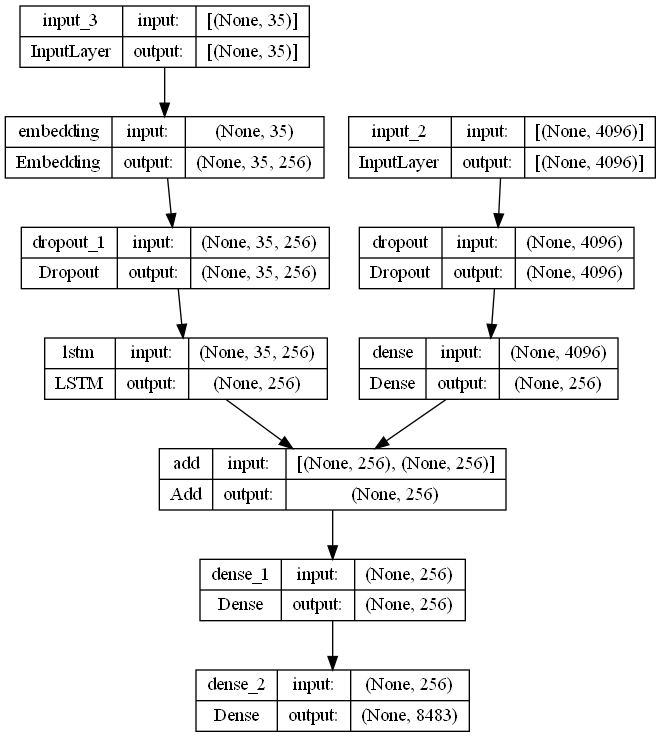

In [58]:
#encoder model
#features layer
inputs1 = Input(shape = (4096,))  #Dense layer of VGG16
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation = 'relu')(fe1)

#sequences layer
inputs2 = Input(shape = (max_length,))
se1 = Embedding(vocab_size, 256, mask_zero = True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)


#decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation = 'relu')(decoder1)
output = Dense(vocab_size, activation = 'softmax')(decoder2)

model = Model(inputs = [inputs1, inputs2], outputs= output)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')


plot_model(model, show_shapes = True)

In [59]:
epochs = 10
batch_size = 64
steps = len(train)//batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    loaded_model.fit(generator, epochs = 1, steps_per_epoch = steps)

101/101 [==============================] - 803s 8s/step - loss: 2.3458


In [23]:
model.save('image_captioning.h5')

In [15]:
loaded_model = load_model('image_captioning.h5')

In [60]:
loaded_model.save('image_captioning2.h5')

In [61]:
loaded_model2 = load_model('image_captioning2.h5')

In [24]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [55]:
def predict_caption(model, image, tokenizer, max_length):
    intext = '<start>'
    
    #predicting word by word & then incrementing it
    for i in range(max_length):
        seq = tokenizer.texts_to_sequences([intext])[0]
        seq = pad_sequences([seq], max_length)
        
        yhat = model.predict([image, seq])
        yhat = np.argmax(yhat)
        
        word = idx_to_word(yhat, tokenizer)
        
        if word == None or word== '<end>':
            break
        
        intext += ' ' + word
        
       # if word == '<end>':
           # break
            
    return intext
    
    

In [62]:
def generate_caption(image_name):
    
    
    image_id = image_name.split('.')[0]
    img_path = os.path.join(base_dir, 'Images', image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('----Actual----')
    for caption in captions:
        print(caption)
        
    ypred = predict_caption(loaded_model2, features[image_id], tokenizer, max_length)
    print('----Predicted----')
    print(ypred)
    plt.imshow(image)

----Actual----
<start> man in pink shirt climbs rock face <end>
<start> man is rock climbing high in the air <end>
<start> person in red shirt climbing up rock face covered in assist handles <end>
<start> rock climber in red shirt <end>
<start> rock climber practices on rock climbing wall <end>
1/1 [==============================] - 0s 28ms/step
----Predicted----
<start> man is climbing up cliff end end end of rock end end end end end end end end end end end end end end end end end end end end end end end end end


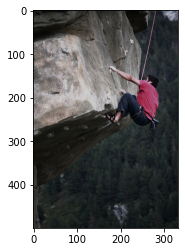

In [63]:
generate_caption('997722733_0cb5439472.jpg')

----Actual----
<start> girl in pool wearing goggles and surrounded by other children <end>
<start> girl in green goggles in pool with three other children <end>
<start> red haired girl making peace sign is wearing neon green glasses and floaties and playing in the pool with other kids <end>
<start> red-headed girl offers the peace sign as she swims in the pool with floaties <end>
<start> young girl with goggles and floaties poses for the camera as she plays in pool <end>
1/1 [==============================] - 0s 23ms/step
----Predicted----
<start> two boys swimming rafts swimming pool end end pool end end end end end into pool end end end end pool end end end end end end end end pool end end as father in


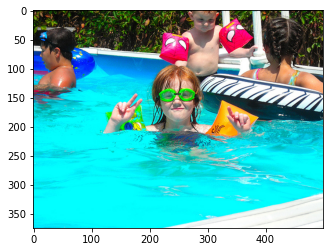

In [64]:
generate_caption('989754491_7e53fb4586.jpg')